In [56]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.signal import find_peaks
import random
import os
from scipy.stats import norm, chisquare
from sklearn.mixture import GaussianMixture

# Enable implicit multi-threading (optional)
ROOT.ROOT.EnableImplicitMT()

%matplotlib widget

In [612]:
file = ROOT.TFile.Open("./g4DL_output_random.root")
if not file or file.IsZombie():
    print("Error opening file.")


# Get the TTree
tree = file.Get("T")
df = ROOT.RDataFrame(tree)

In [613]:
num_table = np.array([
    1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
    7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
    16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
    17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
    17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
    18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
    19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
    19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
    20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
    21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
    22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
    23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
    24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
    25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
    27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
    28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
    32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
    34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37,
    37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
    40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
    44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51,
    51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61,
    61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69, 69, 70, 70, 70, 70, 71, 71, 71, 72, 72, 72, 73, 73, 73, 74, 74, 74, 75, 75, 75, 75, 76, 76, 76, 77, 77, 78, 78, 79, 79, 79, 80, 80, 80, 81, 81, 81, 82, 82, 83, 83, 83, 84, 84, 85, 86, 86, 87, 87, 87, 88, 89, 89, 90, 91, 92, 92,
    93, 94, 94, 95, 96, 96, 97, 97, 98, 98, 99, 100, 101, 102, 103, 103, 104, 105, 107, 108, 108, 109, 110, 111, 111, 113, 113, 114, 115, 116, 117, 119, 119, 120, 121, 126, 128, 130, 131, 133, 133, 137, 138, 139, 140, 143, 144, 148, 150, 154, 156, 157, 160, 164, 166, 168, 169, 172, 176, 179, 183, 185, 187, 189, 191, 194, 195, 199, 205, 208, 214, 217, 226, 232, 236, 240, 246, 257, 261, 262, 282, 287, 298, 311, 316, 329, 345, 354, 372, 381, 397, 405, 425, 456, 479, 517, 533, 552, 846, 965
])

gain_table = np.array([
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
    16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
    16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
    17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
    18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
    19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
    20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
    20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
    21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
    22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
    23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
    24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
    25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
    26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
    27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
    29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
    31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
    33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35,
    35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
    36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
    38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41,
    41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
    43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
    46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
    50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55,
    55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
    61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72,
    72, 72, 72, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 80, 81, 81, 81, 81, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 88, 88, 89, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 95, 95, 96, 97, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 111, 112, 114, 117, 120
])



In [614]:
gain_table = np.array([
    4, 7, 9, 12, 14, 15, 17, 19, 20, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 57, 58, 59, 60, 61, 62, 63, 63, 64, 65, 66, 67, 68, 68, 69, 70, 71, 72, 72, 73, 74, 75, 75, 76, 77, 78, 78, 79, 80, 81, 81, 82, 83, 84, 84, 85, 86, 86, 87, 88, 89, 89, 90, 91, 91, 92, 93, 93, 94, 95, 96, 96, 97, 98, 98, 99, 100, 100,
    101, 102, 102, 103, 103, 104, 105, 105, 106, 107, 107, 108, 109, 109, 110, 110, 111, 112, 112, 113, 114, 114, 115, 115, 116, 117, 117, 118, 119, 119, 120, 120, 121, 122, 122, 123, 123, 124, 124, 125, 126, 126, 127, 127, 128, 129, 129, 130, 130, 131, 131, 132, 133, 133, 134, 134, 135, 135, 136, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158,
    159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 187, 187, 188, 188, 189, 189, 190, 190, 191, 191, 191, 192, 192, 193, 193, 194, 194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 199, 199, 200, 200, 201, 201, 202, 202, 203, 203, 204, 204, 205, 205, 205, 206, 206, 207,
    207, 208, 208, 209, 209, 210, 210, 210, 211, 211, 212, 212, 213, 213, 214, 214, 214, 215, 215, 216, 216, 217, 217, 218, 218, 218, 219, 219, 220, 220, 221, 221, 222, 222, 222, 223, 223, 224, 224, 225, 225, 226, 226, 226, 227, 227, 228, 228, 229, 229, 229, 230, 230, 231, 231, 232, 232, 232, 233, 233, 234, 234, 235, 235, 235, 236, 236, 237, 237, 238, 238, 238, 239, 239, 240, 240, 241, 241, 241, 242, 242, 243, 243, 243, 244, 244, 245, 245, 246, 246, 246, 247, 247, 248, 248, 248, 249, 249, 250, 250,
    251, 251, 251, 252, 252, 253, 253, 253, 254, 254, 255, 255, 256, 256, 256, 257, 257, 258, 258, 258, 259, 259, 260, 260, 260, 261, 261, 262, 262, 262, 263, 263, 264, 264, 264, 265, 265, 266, 266, 266, 267, 267, 268, 268, 268, 269, 269, 270, 270, 270, 271, 271, 272, 272, 272, 273, 273, 274, 274, 274, 275, 275, 276, 276, 276, 277, 277, 278, 278, 278, 279, 279, 280, 280, 280, 281, 281, 281, 282, 282, 283, 283, 283, 284, 284, 285, 285, 285, 286, 286, 287, 287, 287, 288, 288, 288, 289, 289, 290, 290,
    290, 291, 291, 292, 292, 292, 293, 293, 293, 294, 294, 295, 295, 295, 296, 296, 296, 297, 297, 298, 298, 298, 299, 299, 300, 300, 300, 301, 301, 301, 302, 302, 303, 303, 303, 304, 304, 304, 305, 305, 306, 306, 306, 307, 307, 307, 308, 308, 309, 309, 309, 310, 310, 310, 311, 311, 312, 312, 312, 313, 313, 313, 314, 314, 314, 315, 315, 316, 316, 316, 317, 317, 317, 318, 318, 319, 319, 319, 320, 320, 320, 321, 321, 321, 322, 322, 323, 323, 323, 324, 324, 324, 325, 325, 325, 326, 326, 327, 327, 327,
    328, 328, 328, 329, 329, 329, 330, 330, 331, 331, 331, 332, 332, 332, 333, 333, 333, 334, 334, 334, 335, 335, 336, 336, 336, 337, 337, 337, 338, 338, 338, 339, 339, 339, 340, 340, 341, 341, 341, 342, 342, 342, 343, 343, 343, 344, 344, 344, 345, 345, 346, 346, 346, 347, 347, 347, 348, 348, 348, 349, 349, 349, 350, 350, 350, 351, 351, 351, 352, 352, 353, 353, 353, 354, 354, 354, 355, 355, 355, 356, 356, 356, 357, 357, 357, 358, 358, 358, 359, 359, 359, 360, 360, 361, 361, 361, 362, 362, 362, 363,
    363, 363, 364, 364, 364, 365, 365, 365, 366, 366, 366, 367, 367, 367, 368, 368, 368, 369, 369, 369, 370, 370, 370, 371, 371, 371, 372, 372, 373, 373, 373, 374, 374, 374, 375, 375, 375, 376, 376, 376, 377, 377, 377, 378, 378, 378, 379, 379, 379, 380, 380, 380, 381, 381, 381, 382, 382, 382, 383, 383, 383, 384, 384, 384, 385, 385, 385, 386, 386, 386, 387, 387, 387, 388, 388, 388, 389, 389, 389, 390, 390, 390, 391, 391, 391, 392, 392, 392, 393, 393, 393, 394, 394, 394, 395, 395, 395, 396, 396, 396,
    397, 397, 397, 398, 398, 398, 399, 399, 399, 400, 400, 400, 401, 401, 401, 402, 402, 402, 403, 403, 403, 404, 404, 404, 405, 405, 405, 405, 406, 406, 406, 407, 407, 407, 408, 408, 408, 409, 409, 409, 410, 410, 410, 411, 411, 411, 412, 412, 412, 413, 413, 413, 414, 414, 414, 415, 415, 415, 416, 416, 416, 417, 417, 417, 417, 418, 418, 418, 419, 419, 419, 420, 420, 420, 421, 421, 421, 422, 422, 422, 423, 423, 423, 424, 424, 424, 425, 425, 425, 425, 426, 426, 426, 427, 427, 427, 428, 428, 428, 429,
    429, 429, 430, 430, 430, 431, 431, 431, 432, 432, 432, 432, 433, 433, 433, 434, 434, 434, 435, 435, 435, 436, 436, 436, 437, 437, 437, 438, 438, 438, 438, 439, 439, 439, 440, 440, 440, 441, 441, 441, 442, 442, 442, 443, 443, 443, 443, 444, 444, 444, 445, 445, 445, 446, 446, 446, 447, 447, 447, 448, 448, 448, 448, 449, 449, 449, 450, 450, 450, 451, 451, 451, 452, 452, 452, 453, 453, 453, 453, 454, 454, 454, 455, 455, 455, 456, 456, 456, 457, 457, 457, 457, 458, 458, 458, 459, 459, 459, 460, 460,
    460, 461, 461, 461, 461, 462, 462, 462, 463, 463, 463, 464, 464, 464, 465, 465, 465, 465, 466, 466, 466, 467, 467, 467, 468, 468, 468, 468, 469, 469, 469, 470, 470, 470, 471, 471, 471, 472, 472, 472, 472, 473, 473, 473, 474, 474, 474, 475, 475, 475, 475, 476, 476, 476, 477, 477, 477, 478, 478, 478, 478, 479, 479, 479, 480, 480, 480, 481, 481, 481, 482, 482, 482, 482, 483, 483, 483, 484, 484, 484, 485, 485, 485, 485, 486, 486, 486, 487, 487, 487, 488, 488, 488, 488, 489, 489, 489, 490, 490, 490,
    490, 491, 491, 491, 492, 492, 492, 493, 493, 493, 493, 494, 494, 494, 495, 495, 495, 496, 496, 496, 496, 497, 497, 497, 498, 498, 498, 499, 499, 499, 499, 500, 500, 500, 501, 501, 501, 501, 502, 502, 502, 503, 503, 503, 504, 504, 504, 504, 505, 505, 505, 506, 506, 506, 506, 507, 507, 507, 508, 508, 508, 509, 509, 509, 509, 510, 510, 510, 511, 511, 511, 511, 512, 512, 512, 513, 513, 513, 514, 514, 514, 514, 515, 515, 515, 516, 516, 516, 516, 517, 517, 517, 518, 518, 518, 518, 519, 519, 519, 520,
    520, 520, 520, 521, 521, 521, 522, 522, 522, 523, 523, 523, 523, 524, 524, 524, 525, 525, 525, 525, 526, 526, 526, 527, 527, 527, 527, 528, 528, 528, 529, 529, 529, 529, 530, 530, 530, 531, 531, 531, 531, 532, 532, 532, 533, 533, 533, 533, 534, 534, 534, 535, 535, 535, 535, 536, 536, 536, 537, 537, 537, 537, 538, 538, 538, 539, 539, 539, 539, 540, 540, 540, 541, 541, 541, 541, 542, 542, 542, 543, 543, 543, 543, 544, 544, 544, 545, 545, 545, 545, 546, 546, 546, 547, 547, 547, 547, 548, 548, 548,
    549, 549, 549, 549, 550, 550, 550, 551, 551, 551, 551, 552, 552, 552, 553, 553, 553, 553, 554, 554, 554, 555, 555, 555, 555, 556, 556, 556, 556, 557, 557, 557, 558, 558, 558, 558, 559, 559, 559, 560, 560, 560, 560, 561, 561, 561, 562, 562, 562, 562, 563, 563, 563, 563, 564, 564, 564, 565, 565, 565, 565, 566, 566, 566, 567, 567, 567, 567, 568, 568, 568, 569, 569, 569, 569, 570, 570, 570, 570, 571, 571, 571, 572, 572, 572, 572, 573, 573, 573, 574, 574, 574, 574, 575, 575, 575, 575, 576, 576, 576,
    577, 577, 577, 577, 578, 578, 578, 578, 579, 579, 579, 580, 580, 580, 580, 581, 581, 581, 582, 582, 582, 582, 583, 583, 583, 583, 584, 584, 584, 585, 585, 585, 585, 586, 586, 586, 586, 587, 587, 587, 588, 588, 588, 588, 589, 589, 589, 589, 590, 590, 590, 591, 591, 591, 591, 592, 592, 592, 593, 593, 593, 593, 594, 594, 594, 594, 595, 595, 595, 596, 596, 596, 596, 597, 597, 597, 597, 598, 598, 598, 599, 599, 599, 599, 600, 600, 600, 600, 601, 601, 601, 601, 602, 602, 602, 603, 603, 603, 603, 604,
    604, 604, 604, 605, 605, 605, 606, 606, 606, 606, 607, 607, 607, 607, 608, 608, 608, 609, 609, 609, 609, 610, 610, 610, 610, 611, 611, 611, 611, 612, 612, 612, 613, 613, 613, 613, 614, 614, 614, 614, 615, 615, 615, 616, 616, 616, 616, 617, 617, 617, 617, 618, 618, 618, 618, 619, 619, 619, 620, 620, 620, 620, 621, 621, 621, 621, 622, 622, 622, 623, 623, 623, 623, 624, 624, 624, 624, 625, 625, 625, 625, 626, 626, 626, 627, 627, 627, 627, 628, 628, 628, 628, 629, 629, 629, 629, 630, 630, 630, 630,
    631, 631, 631, 632, 632, 632, 632, 633, 633, 633, 633, 634, 634, 634, 634, 635, 635, 635, 636, 636, 636, 636, 637, 637, 637, 637, 638, 638, 638, 638, 639, 639, 639, 639, 640, 640, 640, 641, 641, 641, 641, 642, 642, 642, 642, 643, 643, 643, 643, 644, 644, 644, 645, 645, 645, 645, 646, 646, 646, 646, 647, 647, 647, 647, 648, 648, 648, 648, 649, 649, 649, 649, 650, 650, 650, 651, 651, 651, 651, 652, 652, 652, 652, 653, 653, 653, 653, 654, 654, 654, 654, 655, 655, 655, 656, 656, 656, 656, 657, 657,
    657, 657, 658, 658, 658, 658, 659, 659, 659, 659, 660, 660, 660, 660, 661, 661, 661, 662, 662, 662, 662, 663, 663, 663, 663, 664, 664, 664, 664, 665, 665, 665, 665, 666, 666, 666, 666, 667, 667, 667, 667, 668, 668, 668, 669, 669, 669, 669, 670, 670, 670, 670, 671, 671, 671, 671, 672, 672, 672, 672, 673, 673, 673, 673, 674, 674, 674, 674, 675, 675, 675, 675, 676, 676, 676, 677, 677, 677, 677, 678, 678, 678, 678, 679, 679, 679, 679, 680, 680, 680, 680, 681, 681, 681, 681, 682, 682, 682, 682, 683,
    683, 683, 683, 684, 684, 684, 684, 685, 685, 685, 686, 686, 686, 686, 687, 687, 687, 687, 688, 688, 688, 688, 689, 689, 689, 689, 690, 690, 690, 690, 691, 691, 691, 691, 692, 692, 692, 692, 693, 693, 693, 693, 694, 694, 694, 694, 695, 695, 695, 695, 696, 696, 696, 696, 697, 697, 697, 697, 698, 698, 698, 699, 699, 699, 699, 700, 700, 700, 700, 701, 701, 701, 701, 702, 702, 702, 702, 703, 703, 703, 703, 704, 704, 704, 704, 705, 705, 705, 705, 706, 706, 706, 706, 707, 707, 707, 707, 708, 708, 708,
    708, 709, 709, 709, 709, 710, 710, 710, 710, 711, 711, 711, 711, 712, 712, 712, 712, 713, 713, 713, 713, 714, 714, 714, 714, 715, 715, 715, 715, 716, 716, 716, 716, 717, 717, 717, 717, 718, 718, 718, 718, 719, 719, 719, 719, 720, 720, 720, 720, 721, 721, 721, 721, 722, 722, 722, 722, 723, 723, 723, 723, 724, 724, 724, 724, 725, 725, 725, 725, 726, 726, 726, 726, 727, 727, 727, 727, 728, 728, 728, 728, 729, 729, 729, 729, 730, 730, 730, 730, 731, 731, 731, 731, 732, 732, 732, 732, 733, 733, 733,
    733, 734, 734, 734, 734, 735, 735, 735, 735, 736, 736, 736, 736, 737, 737, 737, 737, 738, 738, 738, 738, 739, 739, 739, 739, 740, 740, 740, 740, 741, 741, 741, 741, 742, 742, 742, 742, 743, 743, 743, 743, 744, 744, 744, 744, 745, 745, 745, 745, 746, 746, 746, 746, 747, 747, 747, 747, 748, 748, 748, 748, 748, 749, 749, 749, 749, 750, 750, 750, 750, 751, 751, 751, 751, 752, 752, 752, 752, 753, 753, 753, 753, 754, 754, 754, 754, 755, 755, 755, 755, 756, 756, 756, 756, 757, 757, 757, 757, 758, 758,
    758, 758, 759, 759, 759, 759, 760, 760, 760, 760, 761, 761, 761, 761, 762, 762, 762, 762, 762, 763, 763, 763, 763, 764, 764, 764, 764, 765, 765, 765, 765, 766, 766, 766, 766, 767, 767, 767, 767, 768, 768, 768, 768, 769, 769, 769, 769, 770, 770, 770, 770, 771, 771, 771, 771, 771, 772, 772, 772, 772, 773, 773, 773, 773, 774, 774, 774, 774, 775, 775, 775, 775, 776, 776, 776, 776, 777, 777, 777, 777, 778, 778, 778, 778, 779, 779, 779, 779, 780, 780, 780, 780, 780, 781, 781, 781, 781, 782, 782, 782,
    782, 783, 783, 783, 783, 784, 784, 784, 784, 785, 785, 785, 785, 786, 786, 786, 786, 787, 787, 787, 787, 787, 788, 788, 788, 788, 789, 789, 789, 789, 790, 790, 790, 790, 791, 791, 791, 791, 792, 792, 792, 792, 793, 793, 793, 793, 793, 794, 794, 794, 794, 795, 795, 795, 795, 796, 796, 796, 796, 797, 797, 797, 797, 798, 798, 798, 798, 799, 799, 799, 799, 799, 800, 800, 800, 800, 801, 801, 801, 801, 802, 802, 802, 802, 803, 803, 803, 803, 804, 804, 804, 804, 805, 805, 805, 805, 805, 806, 806, 806,
    806, 807, 807, 807, 807, 808, 808, 808, 808, 809, 809, 809, 809, 810, 810, 810, 810, 810, 811, 811, 811, 811, 812, 812, 812, 812, 813, 813, 813, 813, 814, 814, 814, 814, 815, 815, 815, 815, 815, 816, 816, 816, 816, 817, 817, 817, 817, 818, 818, 818, 818, 819, 819, 819, 819, 819, 820, 820, 820, 820, 821, 821, 821, 821, 822, 822, 822, 822, 823, 823, 823, 823, 824, 824, 824, 824, 824, 825, 825, 825, 825, 826, 826, 826, 826, 827, 827, 827, 827, 828, 828, 828, 828, 828, 829, 829, 829, 829, 830, 830,
    830, 830, 831, 831, 831, 831, 832, 832, 832, 832, 832, 833, 833, 833, 833, 834, 834, 834, 834, 835, 835, 835, 835, 836, 836, 836, 836, 836, 837, 837, 837, 837, 838, 838, 838, 838, 839, 839, 839, 839, 840, 840, 840, 840, 840, 841, 841, 841, 841, 842, 842, 842, 842, 843, 843, 843, 843, 844, 844, 844, 844, 844, 845, 845, 845, 845, 846, 846, 846, 846, 847, 847, 847, 847, 847, 848, 848, 848, 848, 849, 849, 849, 849, 850, 850, 850, 850, 851, 851, 851, 851, 851, 852, 852, 852, 852, 853, 853, 853, 853,
    854, 854, 854, 854, 854, 855, 855, 855, 855, 856, 856, 856, 856, 857, 857, 857, 857, 857, 858, 858, 858, 858, 859, 859, 859, 859, 860, 860, 860, 860, 861, 861, 861, 861, 861, 862, 862, 862, 862, 863, 863, 863, 863, 864, 864, 864, 864, 864, 865, 865, 865, 865, 866, 866, 866, 866, 867, 867, 867, 867, 867, 868, 868, 868, 868, 869, 869, 869, 869, 870, 870, 870, 870, 870, 871, 871, 871, 871, 872, 872, 872, 872, 873, 873, 873, 873, 873, 874, 874, 874, 874, 875, 875, 875, 875, 876, 876, 876, 876, 876,
    877, 877, 877, 877, 878, 878, 878, 878, 879, 879, 879, 879, 879, 880, 880, 880, 880, 881, 881, 881, 881, 882, 882, 882, 882, 882, 883, 883, 883, 883, 884, 884, 884, 884, 885, 885, 885, 885, 885, 886, 886, 886, 886, 887, 887, 887, 887, 887, 888, 888, 888, 888, 889, 889, 889, 889, 890, 890, 890, 890, 890, 891, 891, 891, 891, 892, 892, 892, 892, 893, 893, 893, 893, 893, 894, 894, 894, 894, 895, 895, 895, 895, 895, 896, 896, 896, 896, 897, 897, 897, 897, 898, 898, 898, 898, 898, 899, 899, 899, 899,
    900, 900, 900, 900, 901, 901, 901, 901, 901, 902, 902, 902, 902, 903, 903, 903, 903, 903, 904, 904, 904, 904, 905, 905, 905, 905, 906, 906, 906, 906, 906, 907, 907, 907, 907, 908, 908, 908, 908, 908, 909, 909, 909, 909, 910, 910, 910, 910, 911, 911, 911, 911, 911, 912, 912, 912, 912, 913, 913, 913, 913, 913, 914, 914, 914, 914, 915, 915, 915, 915, 915, 916, 916, 916, 916, 917, 917, 917, 917, 918, 918, 918, 918, 918, 919, 919, 919, 919, 920, 920, 920, 920, 920, 921, 921, 921, 921, 922, 922, 922,
    922, 922, 923, 923, 923, 923, 924, 924, 924, 924, 925, 925, 925, 925, 925, 926, 926, 926, 926, 927, 927, 927, 927, 927, 928, 928, 928, 928, 929, 929, 929, 929, 929, 930, 930, 930, 930, 931, 931, 931, 931, 931, 932, 932, 932, 932, 933, 933, 933, 933, 934, 934, 934, 934, 934, 935, 935, 935, 935, 936, 936, 936, 936, 936, 937, 937, 937, 937, 938, 938, 938, 938, 938, 939, 939, 939, 939, 940, 940, 940, 940, 940, 941, 941, 941, 941, 942, 942, 942, 942, 942, 943, 943, 943, 943, 944, 944, 944, 944, 944,
    945, 945, 945, 945, 946, 946, 946, 946, 946, 947, 947, 947, 947, 948, 948, 948, 948, 948, 949, 949, 949, 949, 950, 950, 950, 950, 950, 951, 951, 951, 951, 952, 952, 952, 952, 953, 953, 953, 953, 953, 954, 954, 954, 954, 955, 955, 955, 955, 955, 956, 956, 956, 956, 957, 957, 957, 957, 957, 958, 958, 958, 958, 959, 959, 959, 959, 959, 960, 960, 960, 960, 961, 961, 961, 961, 961, 962, 962, 962, 962, 962, 963, 963, 963, 963, 964, 964, 964, 964, 964, 965, 965, 965, 965, 966, 966, 966, 966, 966, 967,
    967, 967, 967, 968, 968, 968, 968, 968, 969, 969, 969, 969, 970, 970, 970, 970, 970, 971, 971, 971, 971, 972, 972, 972, 972, 972, 973, 973, 973, 973, 974, 974, 974, 974, 974, 975, 975, 975, 975, 976, 976, 976, 976, 976, 977, 977, 977, 977, 978, 978, 978, 978, 978, 979, 979, 979, 979, 979, 980, 980, 980, 980, 981, 981, 981, 981, 981, 982, 982, 982, 982, 983, 983, 983, 983, 983, 984, 984, 984, 984, 985, 985, 985, 985, 985, 986, 986, 986, 986, 987, 987, 987, 987, 987, 988, 988, 988, 988, 989, 989,
    989, 989, 989, 990, 990, 990, 990, 990, 991, 991, 991, 991, 992, 992, 992, 992, 992, 993, 993, 993, 993, 994, 994, 994, 994, 994, 995, 995, 995, 995, 996, 996, 996, 996, 996, 997, 997, 997, 997, 997, 998, 998, 998, 998, 999, 999, 999, 999, 999, 1000, 1000, 1000, 1000, 1001, 1001, 1001, 1001, 1001, 1002, 1002, 1002, 1002, 1002, 1003, 1003, 1003, 1003, 1004, 1004, 1004, 1004, 1004, 1005, 1005, 1005, 1005, 1006, 1006, 1006, 1006, 1006, 1007, 1007, 1007, 1007, 1008, 1008, 1008, 1008, 1008, 1009, 1009, 1009, 1009, 1009, 1010, 1010, 1010, 1010, 1011,
    1011, 1011, 1011, 1011, 1012, 1012, 1012, 1012, 1013, 1013, 1013, 1013, 1013, 1014, 1014, 1014, 1014, 1014, 1015, 1015, 1015, 1015, 1016, 1016, 1016, 1016, 1016, 1017, 1017, 1017, 1017, 1017, 1018, 1018, 1018, 1018, 1019, 1019, 1019, 1019, 1019, 1020, 1020, 1020, 1020, 1021, 1021, 1021, 1021, 1021, 1022, 1022, 1022, 1022, 1022, 1023, 1023, 1023, 1023, 1024, 1024, 1024, 1024, 1024, 1025, 1025, 1025, 1025, 1025, 1026, 1026, 1026, 1026, 1027, 1027, 1027, 1027, 1027, 1028, 1028, 1028, 1028, 1029, 1029, 1029, 1029, 1029, 1030, 1030, 1030, 1030, 1030, 1031, 1031, 1031, 1031, 1032, 1032, 1032, 1032,
    1032, 1033, 1033, 1033, 1033, 1033, 1034, 1034, 1034, 1034, 1035, 1035, 1035, 1035, 1035, 1036, 1036, 1036, 1036, 1036, 1037, 1037, 1037, 1037, 1038, 1038, 1038, 1038, 1038, 1039, 1039, 1039, 1039, 1040, 1040, 1040, 1040, 1040, 1041, 1041, 1041, 1041, 1041, 1042, 1042, 1042, 1042, 1043, 1043, 1043, 1043, 1043, 1044, 1044, 1044, 1044, 1044, 1045, 1045, 1045, 1045, 1046, 1046, 1046, 1046, 1046, 1047, 1047, 1047, 1047, 1047, 1048, 1048, 1048, 1048, 1049, 1049, 1049, 1049, 1049, 1050, 1050, 1050, 1050, 1050, 1051, 1051, 1051, 1051, 1052, 1052, 1052, 1052, 1052, 1053, 1053, 1053, 1053, 1053, 1054,
    1054, 1054, 1054, 1055, 1055, 1055, 1055, 1055, 1056, 1056, 1056, 1056, 1056, 1057, 1057, 1057, 1057, 1057, 1058, 1058, 1058, 1058, 1059, 1059, 1059, 1059, 1059, 1060, 1060, 1060, 1060, 1060, 1061, 1061, 1061, 1061, 1062, 1062, 1062, 1062, 1062, 1063, 1063, 1063, 1063, 1063, 1064, 1064, 1064, 1064, 1065, 1065, 1065, 1065, 1065, 1066, 1066, 1066, 1066, 1066, 1067, 1067, 1067, 1067, 1068, 1068, 1068, 1068, 1068, 1069, 1069, 1069, 1069, 1069, 1070, 1070, 1070, 1070, 1070, 1071, 1071, 1071, 1071, 1072, 1072, 1072, 1072, 1072, 1073, 1073, 1073, 1073, 1073, 1074, 1074, 1074, 1074, 1075, 1075, 1075,
    1075, 1075, 1076, 1076, 1076, 1076, 1076, 1077, 1077, 1077, 1077, 1077, 1078, 1078, 1078, 1078, 1079, 1079, 1079, 1079, 1079, 1080, 1080, 1080, 1080, 1080, 1081, 1081, 1081, 1081, 1082, 1082, 1082, 1082, 1082, 1083, 1083, 1083, 1083, 1083, 1084, 1084, 1084, 1084, 1084, 1085, 1085, 1085, 1085, 1086, 1086, 1086, 1086, 1086, 1087, 1087, 1087, 1087, 1087, 1088, 1088, 1088, 1088, 1088, 1089, 1089, 1089, 1089, 1090, 1090, 1090, 1090, 1090, 1091, 1091, 1091, 1091, 1091, 1092, 1092, 1092, 1092, 1092, 1093, 1093, 1093, 1093, 1094, 1094, 1094, 1094, 1094, 1095, 1095, 1095, 1095, 1095, 1096, 1096, 1096,
    1096, 1096, 1097, 1097, 1097, 1097, 1098, 1098, 1098, 1098, 1098, 1099, 1099, 1099, 1099, 1099, 1100, 1100, 1100, 1100, 1100, 1101, 1101, 1101, 1101, 1102, 1102, 1102, 1102, 1102, 1103, 1103, 1103, 1103, 1103, 1104, 1104, 1104, 1104, 1104, 1105, 1105, 1105, 1105, 1106, 1106, 1106, 1106, 1106, 1107, 1107, 1107, 1107, 1107, 1108, 1108, 1108, 1108, 1108, 1109, 1109, 1109, 1109, 1110, 1110, 1110, 1110, 1110, 1111, 1111, 1111, 1111, 1111, 1112, 1112, 1112, 1112, 1112, 1113, 1113, 1113, 1113, 1113, 1114, 1114, 1114, 1114, 1115, 1115, 1115, 1115, 1115, 1116, 1116, 1116, 1116, 1116, 1117, 1117, 1117,
    1117, 1117, 1118, 1118, 1118, 1118, 1118, 1119, 1119, 1119, 1119, 1120, 1120, 1120, 1120, 1120, 1121, 1121, 1121, 1121, 1121, 1122, 1122, 1122, 1122, 1122, 1123, 1123, 1123, 1123, 1124, 1124, 1124, 1124, 1124, 1125, 1125, 1125, 1125, 1125, 1126, 1126, 1126, 1126, 1126, 1127, 1127, 1127, 1127, 1127, 1128, 1128, 1128, 1128, 1129, 1129, 1129, 1129, 1129, 1130, 1130, 1130, 1130, 1130, 1131, 1131, 1131, 1131, 1131, 1132, 1132, 1132, 1132, 1132, 1133, 1133, 1133, 1133, 1133, 1134, 1134, 1134, 1134, 1135, 1135, 1135, 1135, 1135, 1136, 1136, 1136, 1136, 1136, 1137, 1137, 1137, 1137, 1137, 1138, 1138,
    1138, 1138, 1138, 1139, 1139, 1139, 1139, 1140, 1140, 1140, 1140, 1140, 1141, 1141, 1141, 1141, 1141, 1142, 1142, 1142, 1142, 1142, 1143, 1143, 1143, 1143, 1143, 1144, 1144, 1144, 1144, 1144, 1145, 1145, 1145, 1145, 1146, 1146, 1146, 1146, 1146, 1147, 1147, 1147, 1147, 1147, 1148, 1148, 1148, 1148, 1148, 1149, 1149, 1149, 1149, 1149, 1150, 1150, 1150, 1150, 1150, 1151, 1151, 1151, 1151, 1152, 1152, 1152, 1152, 1152, 1153, 1153, 1153, 1153, 1153, 1154, 1154, 1154, 1154, 1154, 1155, 1155, 1155, 1155, 1155, 1156, 1156, 1156, 1156, 1156, 1157, 1157, 1157, 1157, 1158, 1158, 1158, 1158, 1158, 1159,
    1159, 1159, 1159, 1159, 1160, 1160, 1160, 1160, 1160, 1161, 1161, 1161, 1161, 1161, 1162, 1162, 1162, 1162, 1162, 1163, 1163, 1163, 1163, 1163, 1164, 1164, 1164, 1164, 1165, 1165, 1165, 1165, 1165, 1166, 1166, 1166, 1166, 1166, 1167, 1167, 1167, 1167, 1167, 1168, 1168, 1168, 1168, 1168, 1169, 1169, 1169, 1169, 1169, 1170, 1170, 1170, 1170, 1170, 1171, 1171, 1171, 1171, 1171, 1172, 1172, 1172, 1172, 1173, 1173, 1173, 1173, 1173, 1174, 1174, 1174, 1174, 1174, 1175, 1175, 1175, 1175, 1175, 1176, 1176, 1176, 1176, 1176, 1177, 1177, 1177, 1177, 1177, 1178, 1178, 1178, 1178, 1178, 1179, 1179, 1179,
    1179, 1179, 1180, 1180, 1180, 1180, 1181, 1181, 1181, 1181, 1181, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1184, 1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186, 1187, 1187, 1187, 1187, 1187, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1190, 1190, 1190, 1190, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199,
    1200, 1200, 1200, 1200, 1200, 1201, 1201, 1201, 1201, 1202, 1202, 1202, 1202, 1202, 1203, 1203, 1203, 1203, 1203, 1204, 1204, 1204, 1204, 1204, 1205, 1205, 1205, 1205, 1205, 1206, 1206, 1206, 1206, 1206, 1207, 1207, 1207, 1207, 1207, 1208, 1208, 1208, 1208, 1208, 1209, 1209, 1209, 1209, 1209, 1210, 1210, 1210, 1210, 1210, 1211, 1211, 1211, 1211, 1211, 1212, 1212, 1212, 1212, 1212, 1213, 1213, 1213, 1213, 1213, 1214, 1214, 1214, 1214, 1214, 1215, 1215, 1215, 1215, 1216, 1216, 1216, 1216, 1216, 1217, 1217, 1217, 1217, 1217, 1218, 1218, 1218, 1218, 1218, 1219, 1219, 1219, 1219, 1219, 1220, 1220,
    1220, 1220, 1220, 1221, 1221, 1221, 1221, 1221, 1222, 1222, 1222, 1222, 1222, 1223, 1223, 1223, 1223, 1223, 1224, 1224, 1224, 1224, 1224, 1225, 1225, 1225, 1225, 1225, 1226, 1226, 1226, 1226, 1226, 1227, 1227, 1227, 1227, 1227, 1228, 1228, 1228, 1228, 1228, 1229, 1229, 1229, 1229, 1229, 1230, 1230, 1230, 1230, 1230, 1231, 1231, 1231, 1231, 1231, 1232, 1232, 1232, 1232, 1232, 1233, 1233, 1233, 1233, 1233, 1234, 1234, 1234, 1234, 1234, 1235, 1235, 1235, 1235, 1235, 1236, 1236, 1236, 1236, 1236, 1237, 1237, 1237, 1237, 1237, 1238, 1238, 1238, 1238, 1238, 1239, 1239, 1239, 1239, 1239, 1240, 1240,
    1240, 1240, 1241, 1241, 1241, 1241, 1241, 1242, 1242, 1242, 1242, 1242, 1243, 1243, 1243, 1243, 1243, 1244, 1244, 1244, 1244, 1244, 1245, 1245, 1245, 1245, 1245, 1246, 1246, 1246, 1246, 1246, 1247, 1247, 1247, 1247, 1247, 1248, 1248, 1248, 1248, 1248, 1249, 1249, 1249, 1249, 1249, 1250, 1250, 1250, 1250, 1250, 1251, 1251, 1251, 1251, 1251, 1252, 1252, 1252, 1252, 1252, 1253, 1253, 1253, 1253, 1253, 1254, 1254, 1254, 1254, 1254, 1255, 1255, 1255, 1255, 1255, 1256, 1256, 1256, 1256, 1256, 1257, 1257, 1257, 1257, 1257, 1258, 1258, 1258, 1258, 1258, 1259, 1259, 1259, 1259, 1259, 1260, 1260, 1260,
    1260, 1260, 1261, 1261, 1261, 1261, 1261, 1262, 1262, 1262, 1262, 1262, 1263, 1263, 1263, 1263, 1263, 1264, 1264, 1264, 1264, 1264, 1265, 1265, 1265, 1265, 1265, 1266, 1266, 1266, 1266, 1266, 1267, 1267, 1267, 1267, 1267, 1268, 1268, 1268, 1268, 1268, 1269, 1269, 1269, 1269, 1269, 1270, 1270, 1270, 1270, 1270, 1271, 1271, 1271, 1271, 1271, 1271, 1272, 1272, 1272, 1272, 1272, 1273, 1273, 1273, 1273, 1273, 1274, 1274, 1274, 1274, 1274, 1275, 1275, 1275, 1275, 1275, 1276, 1276, 1276, 1276, 1276, 1277, 1277, 1277, 1277, 1277, 1278, 1278, 1278, 1278, 1278, 1279, 1279, 1279, 1279, 1279, 1280, 1280,
    1280, 1280, 1280, 1281, 1281, 1281, 1281, 1281, 1282, 1282, 1282, 1282, 1282, 1283, 1283, 1283, 1283, 1283, 1284, 1284, 1284, 1284, 1284, 1285, 1285, 1285, 1285, 1285, 1286, 1286, 1286, 1286, 1286, 1287, 1287, 1287, 1287, 1287, 1288, 1288, 1288, 1288, 1288, 1289, 1289, 1289, 1289, 1289, 1290, 1290, 1290, 1290, 1290, 1291, 1291, 1291, 1291, 1291, 1292, 1292, 1292, 1292, 1292, 1293, 1293, 1293, 1293, 1293, 1294, 1294, 1294, 1294, 1294, 1295, 1295, 1295, 1295, 1295, 1296, 1296, 1296, 1296, 1296, 1296, 1297, 1297, 1297, 1297, 1297, 1298, 1298, 1298, 1298, 1298, 1299, 1299, 1299, 1299, 1299, 1300,
    1300, 1300, 1300, 1300, 1301, 1301, 1301, 1301, 1301, 1302, 1302, 1302, 1302, 1302, 1303, 1303, 1303, 1303, 1303, 1304, 1304, 1304, 1304, 1304, 1305, 1305, 1305, 1305, 1305, 1306, 1306, 1306, 1306, 1306, 1307, 1307, 1307, 1307, 1307, 1308, 1308, 1308, 1308, 1308, 1309, 1309, 1309, 1309, 1309, 1310, 1310, 1310, 1310, 1310, 1310, 1311, 1311, 1311, 1311, 1311, 1312, 1312, 1312, 1312, 1312, 1313, 1313, 1313, 1313, 1313, 1314, 1314, 1314, 1314, 1314, 1315, 1315, 1315, 1315, 1315, 1316, 1316, 1316, 1316, 1316, 1317, 1317, 1317, 1317, 1317, 1318, 1318, 1318, 1318, 1318, 1319, 1319, 1319, 1319, 1319,
    1320, 1320, 1320, 1320, 1320, 1321, 1321, 1321, 1321, 1321, 1322, 1322, 1322, 1322, 1322, 1322, 1323, 1323, 1323, 1323, 1323, 1324, 1324, 1324, 1324, 1324, 1325, 1325, 1325, 1325, 1325, 1326, 1326, 1326, 1326, 1326, 1327, 1327, 1327, 1327, 1327, 1328, 1328, 1328, 1328, 1328, 1329, 1329, 1329, 1329, 1329, 1330, 1330, 1330, 1330, 1330, 1331, 1331, 1331, 1331, 1331, 1332, 1332, 1332, 1332, 1332, 1332, 1333, 1333, 1333, 1333, 1333, 1334, 1334, 1334, 1334, 1334, 1335, 1335, 1335, 1335, 1335, 1336, 1336, 1336, 1336, 1336, 1337, 1337, 1337, 1337, 1337, 1338, 1338, 1338, 1338, 1338, 1339, 1339, 1339,
    1339, 1339, 1340, 1340, 1340, 1340, 1340, 1341, 1341, 1341, 1341, 1341, 1341, 1342, 1342, 1342, 1342, 1342, 1343, 1343, 1343, 1343, 1343, 1344, 1344, 1344, 1344, 1344, 1345, 1345, 1345, 1345, 1345, 1346, 1346, 1346, 1346, 1346, 1347, 1347, 1347, 1347, 1347, 1348, 1348, 1348, 1348, 1348, 1349, 1349, 1349, 1349, 1349, 1349, 1350, 1350, 1350, 1350, 1350, 1351, 1351, 1351, 1351, 1351, 1352, 1352, 1352, 1352, 1352, 1353, 1353, 1353, 1353, 1353, 1354, 1354, 1354, 1354, 1354, 1355, 1355, 1355, 1355, 1355, 1356, 1356, 1356, 1356, 1356, 1356, 1357, 1357, 1357, 1357, 1357, 1358, 1358, 1358, 1358, 1358,
    1359, 1359, 1359, 1359, 1359, 1360, 1360, 1360, 1360, 1360, 1361, 1361, 1361, 1361, 1361, 1362, 1362, 1362, 1362, 1362, 1363, 1363, 1363, 1363, 1363, 1363, 1364, 1364, 1364, 1364, 1364, 1365, 1365, 1365, 1365, 1365, 1366, 1366, 1366, 1366, 1366, 1367, 1367, 1367, 1367, 1367, 1368, 1368, 1368, 1368, 1368, 1369, 1369, 1369, 1369, 1369, 1369, 1370, 1370, 1370, 1370, 1370, 1371, 1371, 1371, 1371, 1371, 1372, 1372, 1372, 1372, 1372, 1373, 1373, 1373, 1373, 1373, 1374, 1374, 1374, 1374, 1374, 1375, 1375, 1375, 1375, 1375, 1376, 1376, 1376, 1376, 1376, 1376, 1377, 1377, 1377, 1377, 1377, 1378, 1378,
    1378, 1378, 1378, 1379, 1379, 1379, 1379, 1379, 1380, 1380, 1380, 1380, 1380, 1381, 1381, 1381, 1381, 1381, 1382, 1382, 1382, 1382, 1382, 1382, 1383, 1383, 1383, 1383, 1383, 1384, 1384, 1384, 1384, 1384, 1385, 1385, 1385, 1385, 1385, 1386, 1386, 1386, 1386, 1386, 1387, 1387, 1387, 1387, 1387, 1387, 1388, 1388, 1388, 1388, 1388, 1389, 1389, 1389, 1389, 1389, 1390, 1390, 1390, 1390, 1390, 1391, 1391, 1391, 1391, 1391, 1392, 1392, 1392, 1392, 1392, 1393, 1393, 1393, 1393, 1393, 1393, 1394, 1394, 1394, 1394, 1394, 1395, 1395, 1395, 1395, 1395, 1396, 1396, 1396, 1396, 1396, 1397, 1397, 1397, 1397,
    1397, 1398, 1398, 1398, 1398, 1398, 1398, 1399, 1399, 1399, 1399, 1399, 1400, 1400, 1400, 1400, 1400, 1401, 1401, 1401, 1401, 1401, 1402, 1402, 1402, 1402, 1402, 1403, 1403, 1403, 1403, 1403, 1403, 1404, 1404, 1404, 1404, 1404, 1405, 1405, 1405, 1405, 1405, 1406, 1406, 1406, 1406, 1406, 1407, 1407, 1407, 1407, 1407, 1408, 1408, 1408, 1408, 1408, 1408, 1409, 1409, 1409, 1409, 1409, 1410, 1410, 1410, 1410, 1410, 1411, 1411, 1411, 1411, 1411, 1412, 1412, 1412, 1412, 1412, 1412, 1413, 1413, 1413, 1413, 1413, 1414, 1414, 1414, 1414, 1414, 1415, 1415, 1415, 1415, 1415, 1416, 1416, 1416, 1416, 1416,
    1417, 1417, 1417, 1417, 1417, 1417, 1418, 1418, 1418, 1418, 1418, 1419, 1419, 1419, 1419, 1419, 1420, 1420, 1420, 1420, 1420, 1421, 1421, 1421, 1421, 1421, 1422, 1422, 1422, 1422, 1422, 1422, 1423, 1423, 1423, 1423, 1423, 1424, 1424, 1424, 1424, 1424, 1425, 1425, 1425, 1425, 1425, 1426, 1426, 1426, 1426, 1426, 1426, 1427, 1427, 1427, 1427, 1427, 1428, 1428, 1428, 1428, 1428, 1429, 1429, 1429, 1429, 1429, 1430, 1430, 1430, 1430, 1430, 1430, 1431, 1431, 1431, 1431, 1431, 1432, 1432, 1432, 1432, 1432, 1433, 1433, 1433, 1433, 1433, 1434, 1434, 1434, 1434, 1434, 1434, 1435, 1435, 1435, 1435, 1435,
    1436, 1436, 1436, 1436, 1436, 1437, 1437, 1437, 1437, 1437, 1438, 1438, 1438, 1438, 1438, 1439, 1439, 1439, 1439, 1439, 1439, 1440, 1440, 1440, 1440, 1440, 1441, 1441, 1441, 1441, 1441, 1442, 1442, 1442, 1442, 1442, 1443, 1443, 1443, 1443, 1443, 1443, 1444, 1444, 1444, 1444, 1444, 1445, 1445, 1445, 1445, 1445, 1446, 1446, 1446, 1446, 1446, 1446, 1447, 1447, 1447, 1447, 1447, 1448, 1448, 1448, 1448, 1448, 1449, 1449, 1449, 1449, 1449, 1450, 1450, 1450, 1450, 1450, 1450, 1451, 1451, 1451, 1451, 1451, 1452, 1452, 1452, 1452, 1452, 1453, 1453, 1453, 1453, 1453, 1454, 1454, 1454, 1454, 1454, 1454,
    1455, 1455, 1455, 1455, 1455, 1456, 1456, 1456, 1456, 1456, 1457, 1457, 1457, 1457, 1457, 1458, 1458, 1458, 1458, 1458, 1458, 1459, 1459, 1459, 1459, 1459, 1460, 1460, 1460, 1460, 1460, 1461, 1461, 1461, 1461, 1461, 1462, 1462, 1462, 1462, 1462, 1462, 1463, 1463, 1463, 1463, 1463, 1464, 1464, 1464, 1464, 1464, 1465, 1465, 1465, 1465, 1465, 1465, 1466, 1466, 1466, 1466, 1466, 1467, 1467, 1467, 1467, 1467, 1468, 1468, 1468, 1468, 1468, 1469, 1469, 1469, 1469, 1469, 1469, 1470, 1470, 1470, 1470, 1470, 1471, 1471, 1471, 1471, 1471, 1472, 1472, 1472, 1472, 1472, 1472, 1473, 1473, 1473, 1473, 1473,
    1474, 1474, 1474, 1474, 1474, 1475, 1475, 1475, 1475, 1475, 1476, 1476, 1476, 1476, 1476, 1476, 1477, 1477, 1477, 1477, 1477, 1478, 1478, 1478, 1478, 1478, 1479, 1479, 1479, 1479, 1479, 1479, 1480, 1480, 1480, 1480, 1480, 1481, 1481, 1481, 1481, 1481, 1482, 1482, 1482, 1482, 1482, 1482, 1483, 1483, 1483, 1483, 1483, 1484, 1484, 1484, 1484, 1484, 1485, 1485, 1485, 1485, 1485, 1486, 1486, 1486, 1486, 1486, 1486, 1487, 1487, 1487, 1487, 1487, 1488, 1488, 1488, 1488, 1488, 1489, 1489, 1489, 1489, 1489, 1489, 1490, 1490, 1490, 1490, 1490, 1491, 1491, 1491, 1491, 1491, 1492, 1492, 1492, 1492, 1492,
    1492, 1493, 1493, 1493, 1493, 1493, 1494, 1494, 1494, 1494, 1494, 1495, 1495, 1495, 1495, 1495, 1495, 1496, 1496, 1496, 1496, 1496, 1497, 1497, 1497, 1497, 1497, 1498, 1498, 1498, 1498, 1498, 1499, 1499, 1499, 1499, 1499, 1499, 1500, 1500, 1500, 1500, 1500, 1501, 1501, 1501, 1501, 1501, 1502, 1502, 1502, 1502, 1502, 1502, 1503, 1503, 1503, 1503, 1503, 1504, 1504, 1504, 1504, 1504, 1505, 1505, 1505, 1505, 1505, 1505, 1506, 1506, 1506, 1506, 1506, 1507, 1507, 1507, 1507, 1507, 1508, 1508, 1508, 1508, 1508, 1508, 1509, 1509, 1509, 1509, 1509, 1510, 1510, 1510, 1510, 1510, 1511, 1511, 1511, 1511,
    1511, 1511, 1512, 1512, 1512, 1512, 1512, 1513, 1513, 1513, 1513, 1513, 1514, 1514, 1514, 1514, 1514, 1514, 1515, 1515, 1515, 1515, 1515, 1516, 1516, 1516, 1516, 1516, 1517, 1517, 1517, 1517, 1517, 1517, 1518, 1518, 1518, 1518, 1518, 1519, 1519, 1519, 1519, 1519, 1520, 1520, 1520, 1520, 1520, 1520, 1521, 1521, 1521, 1521, 1521, 1522, 1522, 1522, 1522, 1522, 1523, 1523, 1523, 1523, 1523, 1523, 1524, 1524, 1524, 1524, 1524, 1525, 1525, 1525, 1525, 1525, 1525, 1526, 1526, 1526, 1526, 1526, 1527, 1527, 1527, 1527, 1527, 1528, 1528, 1528, 1528, 1528, 1528, 1529, 1529, 1529, 1529, 1529, 1530, 1530,
    1530, 1530, 1530, 1531, 1531, 1531, 1531, 1531, 1531, 1532, 1532, 1532, 1532, 1532, 1533, 1533, 1533, 1533, 1533, 1534, 1534, 1534, 1534, 1534, 1534, 1535, 1535, 1535, 1535, 1535, 1536, 1536, 1536, 1536, 1536, 1537, 1537, 1537, 1537, 1537, 1537, 1538, 1538, 1538, 1538, 1538, 1539, 1539, 1539, 1539, 1539, 1539, 1540, 1540, 1540, 1540, 1540, 1541, 1541, 1541, 1541, 1541, 1542, 1542, 1542, 1542, 1542, 1542, 1543, 1543, 1543, 1543, 1543, 1544, 1544, 1544, 1544, 1544, 1545, 1545, 1545, 1545, 1545, 1545, 1546, 1546, 1546, 1546, 1546, 1547, 1547, 1547, 1547, 1547, 1547, 1548, 1548, 1548, 1548, 1548,
    1549, 1549, 1549, 1549, 1549, 1550, 1550, 1550, 1550, 1550, 1550, 1551, 1551, 1551, 1551, 1551, 1552, 1552, 1552, 1552, 1552, 1553, 1553, 1553, 1553, 1553, 1553, 1554, 1554, 1554, 1554, 1554, 1555, 1555, 1555, 1555, 1555, 1555, 1556, 1556, 1556, 1556, 1556, 1557, 1557, 1557, 1557, 1557, 1558, 1558, 1558, 1558, 1558, 1558, 1559, 1559, 1559, 1559, 1559, 1560, 1560, 1560, 1560, 1560, 1561, 1561, 1561, 1561, 1561, 1561, 1562, 1562, 1562, 1562, 1562, 1563, 1563, 1563, 1563, 1563, 1563, 1564, 1564, 1564, 1564, 1564, 1565, 1565, 1565, 1565, 1565, 1566, 1566, 1566, 1566, 1566, 1566, 1567, 1567, 1567,
    1567, 1567, 1568, 1568, 1568, 1568, 1568, 1568, 1569, 1569, 1569, 1569, 1569, 1570, 1570, 1570, 1570, 1570, 1571, 1571, 1571, 1571, 1571, 1571, 1572, 1572, 1572, 1572, 1572, 1573, 1573, 1573, 1573, 1573, 1573, 1574, 1574, 1574, 1574, 1574, 1575, 1575, 1575, 1575, 1575, 1576, 1576, 1576, 1576, 1576, 1576, 1577, 1577, 1577, 1577, 1577, 1578, 1578, 1578, 1578, 1578, 1578, 1579, 1579, 1579, 1579, 1579, 1580, 1580, 1580, 1580, 1580, 1580, 1581, 1581, 1581, 1581, 1581, 1582, 1582, 1582, 1582, 1582, 1583, 1583, 1583, 1583, 1583, 1583, 1584, 1584, 1584, 1584, 1584, 1585, 1585, 1585, 1585, 1585, 1585,
    1586, 1586, 1586, 1586, 1586, 1587, 1587, 1587, 1587, 1587, 1588, 1588, 1588, 1588, 1588, 1588, 1589, 1589, 1589, 1589, 1589, 1590, 1590, 1590, 1590, 1590, 1590, 1591, 1591, 1591, 1591, 1591, 1592, 1592, 1592, 1592, 1592, 1592, 1593, 1593, 1593, 1593, 1593, 1594, 1594, 1594, 1594, 1594, 1595, 1595, 1595, 1595, 1595, 1595, 1596, 1596, 1596, 1596, 1596, 1597, 1597, 1597, 1597, 1597, 1597, 1598, 1598, 1598, 1598, 1598, 1599, 1599, 1599, 1599, 1599, 1599, 1600, 1600, 1600, 1600, 1600, 1601, 1601, 1601, 1601, 1601, 1602, 1602, 1602, 1602, 1602, 1602, 1603, 1603, 1603, 1603, 1603, 1604, 1604, 1604,
    1604, 1604, 1604, 1605, 1605, 1605, 1605, 1605, 1606, 1606, 1606, 1606, 1606, 1606, 1607, 1607, 1607, 1607, 1607, 1608, 1608, 1608, 1608, 1608, 1609, 1609, 1609, 1609, 1609, 1609, 1610, 1610, 1610, 1610, 1610, 1611, 1611, 1611, 1611, 1611, 1611, 1612, 1612, 1612, 1612, 1612, 1613, 1613, 1613, 1613, 1613, 1613, 1614, 1614, 1614, 1614, 1614, 1615, 1615, 1615, 1615, 1615, 1615, 1616, 1616, 1616, 1616, 1616, 1617, 1617, 1617, 1617, 1617, 1617, 1618, 1618, 1618, 1618, 1618, 1619, 1619, 1619, 1619, 1619, 1620, 1620, 1620, 1620, 1620, 1620, 1621, 1621, 1621, 1621, 1621, 1622, 1622, 1622, 1622, 1622,
    1622, 1623, 1623, 1623, 1623, 1623, 1624, 1624, 1624, 1624, 1624, 1624, 1625, 1625, 1625, 1625, 1625, 1626, 1626, 1626, 1626, 1626, 1626, 1627, 1627, 1627, 1627, 1627, 1628, 1628, 1628, 1628, 1628, 1628, 1629, 1629, 1629, 1629, 1629, 1630, 1630, 1630, 1630, 1630, 1630, 1631, 1631, 1631, 1631, 1631, 1632, 1632, 1632, 1632, 1632, 1633, 1633, 1633, 1633, 1633, 1633, 1634, 1634, 1634, 1634, 1634, 1635, 1635, 1635, 1635, 1635, 1635, 1636, 1636, 1636, 1636, 1636, 1637, 1637, 1637, 1637, 1637, 1637, 1638, 1638, 1638, 1638, 1638, 1639, 1639, 1639, 1639, 1639, 1639, 1640, 1640, 1640, 1640, 1640, 1641,
    1641, 1641, 1641, 1641, 1641, 1642, 1642, 1642, 1642, 1642, 1643, 1643, 1643, 1643, 1643, 1643, 1644, 1644, 1644, 1644, 1644, 1645, 1645, 1645, 1645, 1645, 1645, 1646, 1646, 1646, 1646, 1646, 1647, 1647, 1647, 1647, 1647, 1647, 1648, 1648, 1648, 1648, 1648, 1649, 1649, 1649, 1649, 1649, 1649, 1650, 1650, 1650, 1650, 1650, 1651, 1651, 1651, 1651, 1651, 1651, 1652, 1652, 1652, 1652, 1652, 1653, 1653, 1653, 1653, 1653, 1653, 1654, 1654, 1654, 1654, 1654, 1655, 1655, 1655, 1655, 1655, 1656, 1656, 1656, 1656, 1656, 1656, 1657, 1657, 1657, 1657, 1657, 1658, 1658, 1658, 1658, 1658, 1658, 1659, 1659,
    1659, 1659, 1659, 1660, 1660, 1660, 1660, 1660, 1660, 1661, 1661, 1661, 1661, 1661, 1662, 1662, 1662, 1662, 1662, 1662, 1663, 1663, 1663, 1663, 1663, 1664, 1664, 1664, 1664, 1664, 1664, 1665, 1665, 1665, 1665, 1665, 1666, 1666, 1666, 1666, 1666, 1666, 1667, 1667, 1667, 1667, 1667, 1668, 1668, 1668, 1668, 1668, 1668, 1669, 1669, 1669, 1669, 1669, 1670, 1670, 1670, 1670, 1670, 1670, 1671, 1671, 1671, 1671, 1671, 1671, 1672, 1672, 1672, 1672, 1672, 1673, 1673, 1673, 1673, 1673, 1673, 1674, 1674, 1674, 1674, 1674, 1675, 1675, 1675, 1675, 1675, 1675, 1676, 1676, 1676, 1676, 1676, 1677, 1677, 1677,
    1677, 1677, 1677, 1678, 1678, 1678, 1678, 1678, 1679, 1679, 1679, 1679, 1679, 1679, 1680, 1680, 1680, 1680, 1680, 1681, 1681, 1681, 1681, 1681, 1681, 1682, 1682, 1682, 1682, 1682, 1683, 1683, 1683, 1683, 1683, 1683, 1684, 1684, 1684, 1684, 1684, 1685, 1685, 1685, 1685, 1685, 1685, 1686, 1686, 1686, 1686, 1686, 1687, 1687, 1687, 1687, 1687, 1687, 1688, 1688, 1688, 1688, 1688, 1689, 1689, 1689, 1689, 1689, 1689, 1690, 1690, 1690, 1690, 1690, 1691, 1691, 1691, 1691, 1691, 1691, 1692, 1692, 1692, 1692, 1692, 1693, 1693, 1693, 1693, 1693, 1693, 1694, 1694, 1694, 1694, 1694, 1695, 1695, 1695, 1695,
    1695, 1695, 1696, 1696, 1696, 1696, 1696, 1696, 1697, 1697, 1697, 1697, 1697, 1698, 1698, 1698, 1698, 1698, 1698, 1699, 1699, 1699, 1699, 1699, 1700, 1700, 1700, 1700, 1700, 1700, 1701, 1701, 1701, 1701, 1701, 1702, 1702, 1702, 1702, 1702, 1702, 1703, 1703, 1703, 1703, 1703, 1704, 1704, 1704, 1704, 1704, 1704, 1705, 1705, 1705, 1705, 1705, 1706, 1706, 1706, 1706, 1706, 1706, 1707, 1707, 1707, 1707, 1707, 1708, 1708, 1708, 1708, 1708, 1708, 1709, 1709, 1709, 1709, 1709, 1709, 1710, 1710, 1710, 1710, 1710, 1711, 1711, 1711, 1711, 1711, 1711, 1712, 1712, 1712, 1712, 1712, 1713, 1713, 1713, 1713,
    1713, 1713, 1714, 1714, 1714, 1714, 1714, 1715, 1715, 1715, 1715, 1715, 1715, 1716, 1716, 1716, 1716, 1716, 1717, 1717, 1717, 1717, 1717, 1717, 1718, 1718, 1718, 1718, 1718, 1718, 1719, 1719, 1719, 1719, 1719, 1720, 1720, 1720, 1720, 1720, 1720, 1721, 1721, 1721, 1721, 1721, 1722, 1722, 1722, 1722, 1722, 1722, 1723, 1723, 1723, 1723, 1723, 1724, 1724, 1724, 1724, 1724, 1724, 1725, 1725, 1725, 1725, 1725, 1726, 1726, 1726, 1726, 1726, 1726, 1727, 1727, 1727, 1727, 1727, 1727, 1728, 1728, 1728, 1728, 1728, 1729, 1729, 1729, 1729, 1729, 1729, 1730, 1730, 1730, 1730, 1730, 1731, 1731, 1731, 1731,
    1731, 1731, 1732, 1732, 1732, 1732, 1732, 1733, 1733, 1733, 1733, 1733, 1733, 1734, 1734, 1734, 1734, 1734, 1734, 1735, 1735, 1735, 1735, 1735, 1736, 1736, 1736, 1736, 1736, 1736, 1737, 1737, 1737, 1737, 1737, 1738, 1738, 1738, 1738, 1738, 1738, 1739, 1739, 1739, 1739, 1739, 1740, 1740, 1740, 1740, 1740, 1740, 1741, 1741, 1741, 1741, 1741, 1741, 1742, 1742, 1742, 1742, 1742, 1743, 1743, 1743, 1743, 1743, 1743, 1744, 1744, 1744, 1744, 1744, 1745, 1745, 1745, 1745, 1745, 1745, 1746, 1746, 1746, 1746, 1746, 1747, 1747, 1747, 1747, 1747, 1747, 1748, 1748, 1748, 1748, 1748, 1748, 1749, 1749, 1749,
    1749, 1749, 1750, 1750, 1750, 1750, 1750, 1750, 1751, 1751, 1751, 1751, 1751, 1752, 1752, 1752, 1752, 1752, 1752, 1753, 1753, 1753, 1753, 1753, 1753, 1754, 1754, 1754, 1754, 1754, 1755, 1755, 1755, 1755, 1755, 1755, 1756, 1756, 1756, 1756, 1756, 1757, 1757, 1757, 1757, 1757, 1757, 1758, 1758, 1758, 1758, 1758, 1758, 1759, 1759, 1759, 1759, 1759, 1760, 1760, 1760, 1760, 1760, 1760, 1761, 1761, 1761, 1761, 1761, 1762, 1762, 1762, 1762, 1762, 1762, 1763, 1763, 1763, 1763, 1763, 1763, 1764, 1764, 1764, 1764, 1764, 1765, 1765, 1765, 1765, 1765, 1765, 1766, 1766, 1766, 1766, 1766, 1767, 1767, 1767,
    1767, 1767, 1767, 1768, 1768, 1768, 1768, 1768, 1768, 1769, 1769, 1769, 1769, 1769, 1770, 1770, 1770, 1770, 1770, 1770, 1771, 1771, 1771, 1771, 1771, 1772, 1772, 1772, 1772, 1772, 1772, 1773, 1773, 1773, 1773, 1773, 1773, 1774, 1774, 1774, 1774, 1774, 1775, 1775, 1775, 1775, 1775, 1775, 1776, 1776, 1776, 1776, 1776, 1777, 1777, 1777, 1777, 1777, 1777, 1778, 1778, 1778, 1778, 1778, 1778, 1779, 1779, 1779, 1779, 1779, 1780, 1780, 1780, 1780, 1780, 1780, 1781, 1781, 1781, 1781, 1781, 1782, 1782, 1782, 1782, 1782, 1782, 1783, 1783, 1783, 1783, 1783, 1783, 1784, 1784, 1784, 1784, 1784, 1785, 1785,
    1785, 1785, 1785, 1785, 1786, 1786, 1786, 1786, 1786, 1786, 1787, 1787, 1787, 1787, 1787, 1788, 1788, 1788, 1788, 1788, 1788, 1789, 1789, 1789, 1789, 1789, 1790, 1790, 1790, 1790, 1790, 1790, 1791, 1791, 1791, 1791, 1791, 1791, 1792, 1792, 1792, 1792, 1792, 1793, 1793, 1793, 1793, 1793, 1793, 1794, 1794, 1794, 1794, 1794, 1794, 1795, 1795, 1795, 1795, 1795, 1796, 1796, 1796, 1796, 1796, 1796, 1797, 1797, 1797, 1797, 1797, 1798, 1798, 1798, 1798, 1798, 1798, 1799, 1799, 1799, 1799, 1799, 1799, 1800, 1800, 1800, 1800, 1800, 1801, 1801, 1801, 1801, 1801, 1801, 1802, 1802, 1802, 1802, 1802, 1802,
    1803, 1803, 1803, 1803, 1803, 1804, 1804, 1804, 1804, 1804, 1804, 1805, 1805, 1805, 1805, 1805, 1806, 1806, 1806, 1806, 1806, 1806, 1807, 1807, 1807, 1807, 1807, 1807, 1808, 1808, 1808, 1808, 1808, 1809, 1809, 1809, 1809, 1809, 1809, 1810, 1810, 1810, 1810, 1810, 1810, 1811, 1811, 1811, 1811, 1811, 1812, 1812, 1812, 1812, 1812, 1812, 1813, 1813, 1813, 1813, 1813, 1813, 1814, 1814, 1814, 1814, 1814, 1815, 1815, 1815, 1815, 1815, 1815, 1816, 1816, 1816, 1816, 1816, 1816, 1817, 1817, 1817, 1817, 1817, 1818, 1818, 1818, 1818, 1818, 1818, 1819, 1819, 1819, 1819, 1819, 1819, 1820, 1820, 1820, 1820,
    1820, 1821, 1821, 1821, 1821, 1821, 1821, 1822, 1822, 1822, 1822, 1822, 1823, 1823, 1823, 1823, 1823, 1823, 1824, 1824, 1824, 1824, 1824, 1824, 1825, 1825, 1825, 1825, 1825, 1826, 1826, 1826, 1826, 1826, 1826, 1827, 1827, 1827, 1827, 1827, 1827, 1828, 1828, 1828, 1828, 1828, 1829, 1829, 1829, 1829, 1829, 1829, 1830, 1830, 1830, 1830, 1830, 1830, 1831, 1831, 1831, 1831, 1831, 1832, 1832, 1832, 1832, 1832, 1832, 1833, 1833, 1833, 1833, 1833, 1833, 1834, 1834, 1834, 1834, 1834, 1835, 1835, 1835, 1835, 1835, 1835, 1836, 1836, 1836, 1836, 1836, 1836, 1837, 1837, 1837, 1837, 1837, 1838, 1838, 1838,
    1838, 1838, 1838, 1839, 1839, 1839, 1839, 1839, 1839, 1840, 1840, 1840, 1840, 1840, 1841, 1841, 1841, 1841, 1841, 1841, 1842, 1842, 1842, 1842, 1842, 1842, 1843, 1843, 1843, 1843, 1843, 1844, 1844, 1844, 1844, 1844, 1844, 1845, 1845, 1845, 1845, 1845, 1845, 1846, 1846, 1846, 1846, 1846, 1847, 1847, 1847, 1847, 1847, 1847, 1848, 1848, 1848, 1848, 1848, 1848, 1849, 1849, 1849, 1849, 1849, 1850, 1850, 1850, 1850, 1850, 1850, 1851, 1851, 1851, 1851, 1851, 1851, 1852, 1852, 1852, 1852, 1852, 1853, 1853, 1853, 1853, 1853, 1853, 1854, 1854, 1854, 1854, 1854, 1854, 1855, 1855, 1855, 1855, 1855, 1855,
    1856, 1856, 1856, 1856, 1856, 1857, 1857, 1857, 1857, 1857, 1857, 1858, 1858, 1858, 1858, 1858, 1858, 1859, 1859, 1859, 1859, 1859, 1860, 1860, 1860, 1860, 1860, 1860, 1861, 1861, 1861, 1861, 1861, 1861, 1862, 1862, 1862, 1862, 1862, 1863, 1863, 1863, 1863, 1863, 1863, 1864, 1864, 1864, 1864, 1864, 1864, 1865, 1865, 1865, 1865, 1865, 1866, 1866, 1866, 1866, 1866, 1866, 1867, 1867, 1867, 1867, 1867, 1867, 1868, 1868, 1868, 1868, 1868, 1869, 1869, 1869, 1869, 1869, 1869, 1870, 1870, 1870, 1870, 1870, 1870, 1871, 1871, 1871, 1871, 1871, 1871, 1872, 1872, 1872, 1872, 1872, 1873, 1873, 1873, 1873,
    1873, 1873, 1874, 1874, 1874, 1874, 1874, 1874, 1875, 1875, 1875, 1875, 1875, 1876, 1876, 1876, 1876, 1876, 1876, 1877, 1877, 1877, 1877, 1877, 1877, 1878, 1878, 1878, 1878, 1878, 1879, 1879, 1879, 1879, 1879, 1879, 1880, 1880, 1880, 1880, 1880, 1880, 1881, 1881, 1881, 1881, 1881, 1881, 1882, 1882, 1882, 1882, 1882, 1883, 1883, 1883, 1883, 1883, 1883, 1884, 1884, 1884, 1884, 1884, 1884, 1885, 1885, 1885, 1885, 1885, 1886, 1886, 1886, 1886, 1886, 1886, 1887, 1887, 1887, 1887, 1887, 1887, 1888, 1888, 1888, 1888, 1888, 1889, 1889, 1889, 1889, 1889, 1889, 1890, 1890, 1890, 1890, 1890, 1890, 1891,
    1891, 1891, 1891, 1891, 1891, 1892, 1892, 1892, 1892, 1892, 1893, 1893, 1893, 1893, 1893, 1893, 1894, 1894, 1894, 1894, 1894, 1894, 1895, 1895, 1895, 1895, 1895, 1896, 1896, 1896, 1896, 1896, 1896, 1897, 1897, 1897, 1897, 1897, 1897, 1898, 1898, 1898, 1898, 1898, 1898, 1899, 1899, 1899, 1899, 1899, 1900, 1900, 1900, 1900, 1900, 1900, 1901, 1901, 1901, 1901, 1901, 1901, 1902, 1902, 1902, 1902, 1902, 1902, 1903, 1903, 1903, 1903, 1903, 1904, 1904, 1904, 1904, 1904, 1904, 1905, 1905, 1905, 1905, 1905, 1905, 1906, 1906, 1906, 1906, 1906, 1907, 1907, 1907, 1907, 1907, 1907, 1908, 1908, 1908, 1908,
    1908, 1908, 1909, 1909, 1909, 1909, 1909, 1909, 1910, 1910, 1910, 1910, 1910, 1911, 1911, 1911, 1911, 1911, 1911, 1912, 1912, 1912, 1912, 1912, 1912, 1913, 1913, 1913, 1913, 1913, 1913, 1914, 1914, 1914, 1914, 1914, 1915, 1915, 1915, 1915, 1915, 1915, 1916, 1916, 1916, 1916, 1916, 1916, 1917, 1917, 1917, 1917, 1917, 1918, 1918, 1918, 1918, 1918, 1918, 1919, 1919, 1919, 1919, 1919, 1919, 1920, 1920, 1920, 1920, 1920, 1920, 1921, 1921, 1921, 1921, 1921, 1922, 1922, 1922, 1922, 1922, 1922, 1923, 1923, 1923, 1923, 1923, 1923, 1924, 1924, 1924, 1924, 1924, 1924, 1925, 1925, 1925, 1925, 1925, 1926,
    1926, 1926, 1926, 1926, 1926, 1927, 1927, 1927, 1927, 1927, 1927, 1928, 1928, 1928, 1928, 1928, 1928, 1929, 1929, 1929, 1929, 1929, 1930, 1930, 1930, 1930, 1930, 1930, 1931, 1931, 1931, 1931, 1931, 1931, 1932, 1932, 1932, 1932, 1932, 1932, 1933, 1933, 1933, 1933, 1933, 1934, 1934, 1934, 1934, 1934, 1934, 1935, 1935, 1935, 1935, 1935, 1935, 1936, 1936, 1936, 1936, 1936, 1936, 1937, 1937, 1937, 1937, 1937, 1938, 1938, 1938, 1938, 1938, 1938, 1939, 1939, 1939, 1939, 1939, 1939, 1940, 1940, 1940, 1940, 1940, 1940, 1941, 1941, 1941, 1941, 1941, 1942, 1942, 1942, 1942, 1942, 1942, 1943, 1943, 1943,
    1943, 1943, 1943, 1944, 1944, 1944, 1944, 1944, 1944, 1945, 1945, 1945, 1945, 1945, 1946, 1946, 1946, 1946, 1946, 1946, 1947, 1947, 1947, 1947, 1947, 1947, 1948, 1948, 1948, 1948, 1948, 1948, 1949, 1949, 1949, 1949, 1949, 1950, 1950, 1950, 1950, 1950, 1950, 1951, 1951, 1951, 1951, 1951, 1951, 1952, 1952, 1952, 1952, 1952, 1952, 1953, 1953, 1953, 1953, 1953, 1954, 1954, 1954, 1954, 1954, 1954, 1955, 1955, 1955, 1955, 1955, 1955, 1956, 1956, 1956, 1956, 1956, 1956, 1957, 1957, 1957, 1957, 1957, 1958, 1958, 1958, 1958, 1958, 1958, 1959, 1959, 1959, 1959, 1959, 1959, 1960, 1960, 1960, 1960, 1960,
    1960, 1961, 1961, 1961, 1961, 1961, 1961, 1962, 1962, 1962, 1962, 1962, 1963, 1963, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967, 1967, 1967, 1968, 1968, 1968, 1968, 1968, 1968, 1969, 1969, 1969, 1969, 1969, 1969, 1970, 1970, 1970, 1970, 1970, 1970, 1971, 1971, 1971, 1971, 1971, 1972, 1972, 1972, 1972, 1972, 1972, 1973, 1973, 1973, 1973, 1973, 1973, 1974, 1974, 1974, 1974, 1974, 1974, 1975, 1975, 1975, 1975, 1975, 1976, 1976, 1976, 1976, 1976, 1976, 1977, 1977, 1977, 1977, 1977, 1977, 1978,
    1978, 1978, 1978, 1978, 1978, 1979, 1979, 1979, 1979, 1979, 1979, 1980, 1980, 1980, 1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1988, 1988, 1988, 1989, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995,
    1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012,
    2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2025, 2025, 2025, 2025, 2026, 2026, 2026, 2026, 2026, 2026, 2027, 2027, 2027, 2027, 2027, 2027, 2028, 2028, 2028, 2028, 2028, 2028, 2029, 2029, 2029, 2029, 2029,
    2029, 2030, 2030, 2030, 2030, 2030, 2030, 2031, 2031, 2031, 2031, 2031, 2032, 2032, 2032, 2032, 2032, 2032, 2033, 2033, 2033, 2033, 2033, 2033, 2034, 2034, 2034, 2034, 2034, 2034, 2035, 2035, 2035, 2035, 2035, 2035, 2036, 2036, 2036, 2036, 2036, 2036, 2037, 2037, 2037, 2037, 2037, 2038, 2038, 2038, 2038, 2038, 2038, 2039, 2039, 2039, 2039, 2039, 2039, 2040, 2040, 2040, 2040, 2040, 2040, 2041, 2041, 2041, 2041, 2041, 2041, 2042, 2042, 2042, 2042, 2042, 2043, 2043, 2043, 2043, 2043, 2043, 2044, 2044, 2044, 2044, 2044, 2044, 2045, 2045, 2045, 2045, 2045, 2045, 2046, 2046, 2046, 2046, 2046, 2046,
    2047, 2047, 2047, 2047, 2047, 2047, 2048, 2048, 2048, 2048, 2048, 2049, 2049, 2049, 2049, 2049, 2049, 2050, 2050, 2050, 2050, 2050, 2050, 2051, 2051, 2051, 2051, 2051, 2051, 2052, 2052, 2052, 2052, 2052, 2052, 2053, 2053, 2053, 2053, 2053, 2053, 2054, 2054, 2054, 2054, 2054, 2054, 2055, 2055, 2055, 2055, 2055, 2056, 2056, 2056, 2056, 2056, 2056, 2057, 2057, 2057, 2057, 2057, 2057, 2058, 2058, 2058, 2058, 2058, 2058, 2059, 2059, 2059, 2059, 2059, 2059, 2060, 2060, 2060, 2060, 2060, 2060, 2061, 2061, 2061, 2061, 2061, 2062, 2062, 2062, 2062, 2062, 2062, 2063, 2063, 2063, 2063, 2063, 2063, 2064,
    2064, 2064, 2064, 2064, 2064, 2065, 2065, 2065, 2065, 2065, 2065, 2066, 2066, 2066, 2066, 2066, 2066, 2067, 2067, 2067, 2067, 2067, 2067, 2068, 2068, 2068, 2068, 2068, 2069, 2069, 2069, 2069, 2069, 2069, 2070, 2070, 2070, 2070, 2070, 2070, 2071, 2071, 2071, 2071, 2071, 2071, 2072, 2072, 2072, 2072, 2072, 2072, 2073, 2073, 2073, 2073, 2073, 2073, 2074, 2074, 2074, 2074, 2074, 2075, 2075, 2075, 2075, 2075, 2075, 2076, 2076, 2076, 2076, 2076, 2076, 2077, 2077, 2077, 2077, 2077, 2077, 2078, 2078, 2078, 2078, 2078, 2078, 2079, 2079, 2079, 2079, 2079, 2079, 2080, 2080, 2080, 2080, 2080, 2080, 2081,
    2081, 2081, 2081, 2081, 2081, 2082, 2082, 2082, 2082, 2082, 2083, 2083, 2083, 2083, 2083, 2083, 2084, 2084, 2084, 2084, 2084, 2084, 2085, 2085, 2085, 2085, 2085, 2085, 2086, 2086, 2086, 2086, 2086, 2086, 2087, 2087, 2087, 2087, 2087, 2087, 2088, 2088, 2088, 2088, 2088, 2088, 2089, 2089, 2089, 2089, 2089, 2090, 2090, 2090, 2090, 2090, 2090, 2091, 2091, 2091, 2091, 2091, 2091, 2092, 2092, 2092, 2092, 2092, 2092, 2093, 2093, 2093, 2093, 2093, 2093, 2094, 2094, 2094, 2094, 2094, 2094, 2095, 2095, 2095, 2095, 2095, 2095, 2096, 2096, 2096, 2096, 2096, 2097, 2097, 2097, 2097, 2097, 2097, 2098, 2098,
    2098, 2098, 2098, 2098, 2099, 2099, 2099, 2099, 2099, 2099, 2100, 2100, 2100, 2100, 2100, 2100, 2101, 2101, 2101, 2101, 2101, 2101, 2102, 2102, 2102, 2102, 2102, 2102, 2103, 2103, 2103, 2103, 2103, 2103, 2104, 2104, 2104, 2104, 2104, 2105, 2105, 2105, 2105, 2105, 2105, 2106, 2106, 2106, 2106, 2106, 2106, 2107, 2107, 2107, 2107, 2107, 2107, 2108, 2108, 2108, 2108, 2108, 2108, 2109, 2109, 2109, 2109, 2109, 2109, 2110, 2110, 2110, 2110, 2110, 2110, 2111, 2111, 2111, 2111, 2111, 2111, 2112, 2112, 2112, 2112, 2112, 2112, 2113, 2113, 2113, 2113, 2113, 2114, 2114, 2114, 2114, 2114, 2114, 2115, 2115,
    2115, 2115, 2115, 2115, 2116, 2116, 2116, 2116, 2116, 2116, 2117, 2117, 2117, 2117, 2117, 2117, 2118, 2118, 2118, 2118, 2118, 2118, 2119, 2119, 2119, 2119, 2119, 2119, 2120, 2120, 2120, 2120, 2120, 2120, 2121, 2121, 2121, 2121, 2121, 2122, 2122, 2122, 2122, 2122, 2122, 2123, 2123, 2123, 2123, 2123, 2123, 2124, 2124, 2124, 2124, 2124, 2124, 2125, 2125, 2125, 2125, 2125, 2125, 2126, 2126, 2126, 2126, 2126, 2126, 2127, 2127, 2127, 2127, 2127, 2127, 2128, 2128, 2128, 2128, 2128, 2128, 2129, 2129, 2129, 2129, 2129, 2129, 2130, 2130, 2130, 2130, 2130, 2130, 2131, 2131, 2131, 2131, 2131, 2132, 2132,
    2132, 2132, 2132, 2132, 2133, 2133, 2133, 2133, 2133, 2133, 2134, 2134, 2134, 2134, 2134, 2134, 2135, 2135, 2135, 2135, 2135, 2135, 2136, 2136, 2136, 2136, 2136, 2136, 2137, 2137, 2137, 2137, 2137, 2137, 2138, 2138, 2138, 2138, 2138, 2138, 2139, 2139, 2139, 2139, 2139, 2139, 2140, 2140, 2140, 2140, 2140, 2140, 2141, 2141, 2141, 2141, 2141, 2142, 2142, 2142, 2142, 2142, 2142, 2143, 2143, 2143, 2143, 2143, 2143, 2144, 2144, 2144, 2144, 2144, 2144, 2145, 2145, 2145, 2145, 2145, 2145, 2146, 2146, 2146, 2146, 2146, 2146, 2147, 2147, 2147, 2147, 2147, 2147, 2148, 2148, 2148, 2148, 2148, 2148, 2149,
    2149, 2149, 2149, 2149, 2149, 2150, 2150, 2150, 2150, 2150, 2150, 2151, 2151, 2151, 2151, 2151, 2152, 2152, 2152, 2152, 2152, 2152, 2153, 2153, 2153, 2153, 2153, 2153, 2154, 2154, 2154, 2154, 2154, 2154, 2155, 2155, 2155, 2155, 2155, 2155, 2156, 2156, 2156, 2156, 2156, 2156, 2157, 2157, 2157, 2157, 2157, 2157, 2158, 2158, 2158, 2158, 2158, 2158, 2159, 2159, 2159, 2159, 2159, 2159, 2160, 2160, 2160, 2160, 2160, 2160, 2161, 2161, 2161, 2161, 2161, 2161, 2162, 2162, 2162, 2162, 2162, 2163, 2163, 2163, 2163, 2163, 2163, 2164, 2164, 2164, 2164, 2164, 2164, 2165, 2165, 2165, 2165, 2165, 2165, 2166,
    2166, 2166, 2166, 2166, 2166, 2167, 2167, 2167, 2167, 2167, 2167, 2168, 2168, 2168, 2168, 2168, 2168, 2169, 2169, 2169, 2169, 2169, 2169, 2170, 2170, 2170, 2170, 2170, 2170, 2171, 2171, 2171, 2171, 2171, 2171, 2172, 2172, 2172, 2172, 2172, 2172, 2173, 2173, 2173, 2173, 2173, 2173, 2174, 2174, 2174, 2174, 2174, 2174, 2175, 2175, 2175, 2175, 2175, 2176, 2176, 2176, 2176, 2176, 2176, 2177, 2177, 2177, 2177, 2177, 2177, 2178, 2178, 2178, 2178, 2178, 2178, 2179, 2179, 2179, 2179, 2179, 2179, 2180, 2180, 2180, 2180, 2180, 2180, 2181, 2181, 2181, 2181, 2181, 2181, 2182, 2182, 2182, 2182, 2182, 2182,
    2183, 2183, 2183, 2183, 2183, 2183, 2184, 2184, 2184, 2184, 2184, 2184, 2185, 2185, 2185, 2185, 2185, 2185, 2186, 2186, 2186, 2186, 2186, 2186, 2187, 2187, 2187, 2187, 2187, 2187, 2188, 2188, 2188, 2188, 2188, 2188, 2189, 2189, 2189, 2189, 2189, 2190, 2190, 2190, 2190, 2190, 2190, 2191, 2191, 2191, 2191, 2191, 2191, 2192, 2192, 2192, 2192, 2192, 2192, 2193, 2193, 2193, 2193, 2193, 2193, 2194, 2194, 2194, 2194, 2194, 2194, 2195, 2195, 2195, 2195, 2195, 2195, 2196, 2196, 2196, 2196, 2196, 2196, 2197, 2197, 2197, 2197, 2197, 2197, 2198, 2198, 2198, 2198, 2198, 2198, 2199, 2199, 2199, 2199, 2199,
    2199, 2200, 2200, 2200, 2200, 2200, 2200, 2201, 2201, 2201, 2201, 2201, 2201, 2202, 2202, 2202, 2202, 2202, 2202, 2203, 2203, 2203, 2203, 2203, 2203, 2204, 2204, 2204, 2204, 2204, 2204, 2205, 2205, 2205, 2205, 2205, 2205, 2206, 2206, 2206, 2206, 2206, 2207, 2207, 2207, 2207, 2207, 2207, 2208, 2208, 2208, 2208, 2208, 2208, 2209, 2209, 2209, 2209, 2209, 2209, 2210, 2210, 2210, 2210, 2210, 2210, 2211, 2211, 2211, 2211, 2211, 2211, 2212, 2212, 2212, 2212, 2212, 2212, 2213, 2213, 2213, 2213, 2213, 2213, 2214, 2214, 2214, 2214, 2214, 2214, 2215, 2215, 2215, 2215, 2215, 2215, 2216, 2216, 2216, 2216,
    2216, 2216, 2217, 2217, 2217, 2217, 2217, 2217, 2218, 2218, 2218, 2218, 2218, 2218, 2219, 2219, 2219, 2219, 2219, 2219, 2220, 2220, 2220, 2220, 2220, 2220, 2221, 2221, 2221, 2221, 2221, 2221, 2222, 2222, 2222, 2222, 2222, 2222, 2223, 2223, 2223, 2223, 2223, 2223, 2224, 2224, 2224, 2224, 2224, 2224, 2225, 2225, 2225, 2225, 2225, 2225, 2226, 2226, 2226, 2226, 2226, 2227, 2227, 2227, 2227, 2227, 2227, 2228, 2228, 2228, 2228, 2228, 2228, 2229, 2229, 2229, 2229, 2229, 2229, 2230, 2230, 2230, 2230, 2230, 2230, 2231, 2231, 2231, 2231, 2231, 2231, 2232, 2232, 2232, 2232, 2232, 2232, 2233, 2233, 2233,
    2233, 2233, 2233, 2234, 2234, 2234, 2234, 2234, 2234, 2235, 2235, 2235, 2235, 2235, 2235, 2236, 2236, 2236, 2236, 2236, 2236, 2237, 2237, 2237, 2237, 2237, 2237, 2238, 2238, 2238, 2238, 2238, 2238, 2239, 2239, 2239, 2239, 2239, 2239, 2240, 2240, 2240, 2240, 2240, 2240, 2241, 2241, 2241, 2241, 2241, 2241, 2242, 2242, 2242, 2242, 2242, 2242, 2243, 2243, 2243, 2243, 2243, 2243, 2244, 2244, 2244, 2244, 2244, 2244, 2245, 2245, 2245, 2245, 2245, 2245, 2246, 2246, 2246, 2246, 2246, 2246, 2247, 2247, 2247, 2247, 2247, 2247, 2248, 2248, 2248, 2248, 2248, 2248, 2249, 2249, 2249, 2249, 2249, 2249, 2250,
    2250, 2250, 2250, 2250, 2250, 2251, 2251, 2251, 2251, 2251, 2251, 2252, 2252, 2252, 2252, 2252, 2252, 2253, 2253, 2253, 2253, 2253, 2253, 2254, 2254, 2254, 2254, 2254, 2254, 2255, 2255, 2255, 2255, 2255, 2256, 2256, 2256, 2256, 2256, 2256, 2257, 2257, 2257, 2257, 2257, 2257, 2258, 2258, 2258, 2258, 2258, 2258, 2259, 2259, 2259, 2259, 2259, 2259, 2260, 2260, 2260, 2260, 2260, 2260, 2261, 2261, 2261, 2261, 2261, 2261, 2262, 2262, 2262, 2262, 2262, 2262, 2263, 2263, 2263, 2263, 2263, 2263, 2264, 2264, 2264, 2264, 2264, 2264, 2265, 2265, 2265, 2265, 2265, 2265, 2266, 2266, 2266, 2266, 2266, 2266,
    2267, 2267, 2267, 2267, 2267, 2267, 2268, 2268, 2268, 2268, 2268, 2268, 2269, 2269, 2269, 2269, 2269, 2269, 2270, 2270, 2270, 2270, 2270, 2270, 2271, 2271, 2271, 2271, 2271, 2271, 2272, 2272, 2272, 2272, 2272, 2272, 2273, 2273, 2273, 2273, 2273, 2273, 2274, 2274, 2274, 2274, 2274, 2274, 2275, 2275, 2275, 2275, 2275, 2275, 2276, 2276, 2276, 2276, 2276, 2276, 2277, 2277, 2277, 2277, 2277, 2277, 2278, 2278, 2278, 2278, 2278, 2278, 2279, 2279, 2279, 2279, 2279, 2279, 2280, 2280, 2280, 2280, 2280, 2280, 2281, 2281, 2281, 2281, 2281, 2281, 2282, 2282, 2282, 2282, 2282, 2282, 2283, 2283, 2283, 2283,
    2283, 2283, 2284, 2284, 2284, 2284, 2284, 2284, 2285, 2285, 2285, 2285, 2285, 2285, 2286, 2286, 2286, 2286, 2286, 2286, 2287, 2287, 2287, 2287, 2287, 2287, 2288, 2288, 2288, 2288, 2288, 2288, 2289, 2289, 2289, 2289, 2289, 2289, 2290, 2290, 2290, 2290, 2290, 2290, 2291, 2291, 2291, 2291, 2291, 2291, 2292, 2292, 2292, 2292, 2292, 2292, 2293, 2293, 2293, 2293, 2293, 2293, 2294, 2294, 2294, 2294, 2294, 2294, 2295, 2295, 2295, 2295, 2295, 2295, 2296, 2296, 2296, 2296, 2296, 2296, 2297, 2297, 2297, 2297, 2297, 2297, 2298, 2298, 2298, 2298, 2298, 2298, 2299, 2299, 2299, 2299, 2299, 2299, 2300, 2300,
    2300, 2300, 2300, 2300, 2301, 2301, 2301, 2301, 2301, 2301, 2302, 2302, 2302, 2302, 2302, 2302, 2303, 2303, 2303, 2303, 2303, 2303, 2304, 2304, 2304, 2304, 2304, 2304, 2305, 2305, 2305, 2305, 2305, 2305, 2306, 2306, 2306, 2306, 2306, 2306, 2307, 2307, 2307, 2307, 2307, 2307, 2308, 2308, 2308, 2308, 2308, 2308, 2309, 2309, 2309, 2309, 2309, 2309, 2310, 2310, 2310, 2310, 2310, 2310, 2311, 2311, 2311, 2311, 2311, 2311, 2312, 2312, 2312, 2312, 2312, 2312, 2313, 2313, 2313, 2313, 2313, 2313, 2314, 2314, 2314, 2314, 2314, 2314, 2315, 2315, 2315, 2315, 2315, 2315, 2316, 2316, 2316, 2316, 2316, 2316,
    2317, 2317, 2317, 2317, 2317, 2317, 2318, 2318, 2318, 2318, 2318, 2318, 2319, 2319, 2319, 2319, 2319, 2319, 2320, 2320, 2320, 2320, 2320, 2320, 2321, 2321, 2321, 2321, 2321, 2321, 2322, 2322, 2322, 2322, 2322, 2322, 2323, 2323, 2323, 2323, 2323, 2323, 2324, 2324, 2324, 2324, 2324, 2324, 2325, 2325, 2325, 2325, 2325, 2325, 2326, 2326, 2326, 2326, 2326, 2326, 2327, 2327, 2327, 2327, 2327, 2327, 2328, 2328, 2328, 2328, 2328, 2328, 2329, 2329, 2329, 2329, 2329, 2329, 2330, 2330, 2330, 2330, 2330, 2330, 2331, 2331, 2331, 2331, 2331, 2331, 2332, 2332, 2332, 2332, 2332, 2332, 2333, 2333, 2333, 2333,
    2333, 2333, 2334, 2334, 2334, 2334, 2334, 2334, 2335, 2335, 2335, 2335, 2335, 2335, 2336, 2336, 2336, 2336, 2336, 2336, 2337, 2337, 2337, 2337, 2337, 2337, 2338, 2338, 2338, 2338, 2338, 2338, 2339, 2339, 2339, 2339, 2339, 2339, 2339, 2340, 2340, 2340, 2340, 2340, 2340, 2341, 2341, 2341, 2341, 2341, 2341, 2342, 2342, 2342, 2342, 2342, 2342, 2343, 2343, 2343, 2343, 2343, 2343, 2344, 2344, 2344, 2344, 2344, 2344, 2345, 2345, 2345, 2345, 2345, 2345, 2346, 2346, 2346, 2346, 2346, 2346, 2347, 2347, 2347, 2347, 2347, 2347, 2348, 2348, 2348, 2348, 2348, 2348, 2349, 2349, 2349, 2349, 2349, 2349, 2350,
    2350, 2350, 2350, 2350, 2350, 2351, 2351, 2351, 2351, 2351, 2351, 2352, 2352, 2352, 2352, 2352, 2352, 2353, 2353, 2353, 2353, 2353, 2353, 2354, 2354, 2354, 2354, 2354, 2354, 2355, 2355, 2355, 2355, 2355, 2355, 2356, 2356, 2356, 2356, 2356, 2356, 2357, 2357, 2357, 2357, 2357, 2357, 2358, 2358, 2358, 2358, 2358, 2358, 2359, 2359, 2359, 2359, 2359, 2359, 2360, 2360, 2360, 2360, 2360, 2360, 2361, 2361, 2361, 2361, 2361, 2361, 2362, 2362, 2362, 2362, 2362, 2362, 2363, 2363, 2363, 2363, 2363, 2363, 2364, 2364, 2364, 2364, 2364, 2364, 2365, 2365, 2365, 2365, 2365, 2365, 2366, 2366, 2366, 2366, 2366,
    2366, 2367, 2367, 2367, 2367, 2367, 2367, 2368, 2368, 2368, 2368, 2368, 2368, 2369, 2369, 2369, 2369, 2369, 2369, 2369, 2370, 2370, 2370, 2370, 2370, 2370, 2371, 2371, 2371, 2371, 2371, 2371, 2372, 2372, 2372, 2372, 2372, 2372, 2373, 2373, 2373, 2373, 2373, 2373, 2374, 2374, 2374, 2374, 2374, 2374, 2375, 2375, 2375, 2375, 2375, 2375, 2376, 2376, 2376, 2376, 2376, 2376, 2377, 2377, 2377, 2377, 2377, 2377, 2378, 2378, 2378, 2378, 2378, 2378, 2379, 2379, 2379, 2379, 2379, 2379, 2380, 2380, 2380, 2380, 2380, 2380, 2381, 2381, 2381, 2381, 2381, 2381, 2382, 2382, 2382, 2382, 2382, 2382, 2383, 2383,
    2383, 2383, 2383, 2383, 2384, 2384, 2384, 2384, 2384, 2384, 2385, 2385, 2385, 2385, 2385, 2385, 2386, 2386, 2386, 2386, 2386, 2386, 2387, 2387, 2387, 2387, 2387, 2387, 2388, 2388, 2388, 2388, 2388, 2388, 2389, 2389, 2389, 2389, 2389, 2389, 2390, 2390, 2390, 2390, 2390, 2390, 2391, 2391, 2391, 2391, 2391, 2391, 2391, 2392, 2392, 2392, 2392, 2392, 2392, 2393, 2393, 2393, 2393, 2393, 2393, 2394, 2394, 2394, 2394, 2394, 2394, 2395, 2395, 2395, 2395, 2395, 2395, 2396, 2396, 2396, 2396, 2396, 2396, 2397, 2397, 2397, 2397, 2397, 2397, 2398, 2398, 2398, 2398, 2398, 2398, 2399, 2399, 2399, 2399, 2399,
    2399, 2400, 2400, 2400, 2400, 2400, 2400, 2401, 2401, 2401, 2401, 2401, 2401, 2402, 2402, 2402, 2402, 2402, 2402, 2403, 2403, 2403, 2403, 2403, 2403, 2404, 2404, 2404, 2404, 2404, 2404, 2405, 2405, 2405, 2405, 2405, 2405, 2406, 2406, 2406, 2406, 2406, 2406, 2407, 2407, 2407, 2407, 2407, 2407, 2408, 2408, 2408, 2408, 2408, 2408, 2408, 2409, 2409, 2409, 2409, 2409, 2409, 2410, 2410, 2410, 2410, 2410, 2410, 2411, 2411, 2411, 2411, 2411, 2411, 2412, 2412, 2412, 2412, 2412, 2412, 2413, 2413, 2413, 2413, 2413, 2413, 2414, 2414, 2414, 2414, 2414, 2414, 2415, 2415, 2415, 2415, 2415, 2415, 2416, 2416,
    2416, 2416, 2416, 2416, 2417, 2417, 2417, 2417, 2417, 2417, 2418, 2418, 2418, 2418, 2418, 2418, 2419, 2419, 2419, 2419, 2419, 2419, 2420, 2420, 2420, 2420, 2420, 2420, 2421, 2421, 2421, 2421, 2421, 2421, 2422, 2422, 2422, 2422, 2422, 2422, 2423, 2423, 2423, 2423, 2423, 2423, 2423, 2424, 2424, 2424, 2424, 2424, 2424, 2425, 2425, 2425, 2425, 2425, 2425, 2426, 2426, 2426, 2426, 2426, 2426, 2427, 2427, 2427, 2427, 2427, 2427, 2428, 2428, 2428, 2428, 2428, 2428, 2429, 2429, 2429, 2429, 2429, 2429, 2430, 2430, 2430, 2430, 2430, 2430, 2431, 2431, 2431, 2431, 2431, 2431, 2432, 2432, 2432, 2432, 2432,
    2432, 2433, 2433, 2433, 2433, 2433, 2433, 2434, 2434, 2434, 2434, 2434, 2434, 2435, 2435, 2435, 2435, 2435, 2435, 2436, 2436, 2436, 2436, 2436, 2436, 2437, 2437, 2437, 2437, 2437, 2437, 2437, 2438, 2438, 2438, 2438, 2438, 2438, 2439, 2439, 2439, 2439, 2439, 2439, 2440, 2440, 2440, 2440, 2440, 2440, 2441, 2441, 2441, 2441, 2441, 2441, 2442, 2442, 2442, 2442, 2442, 2442, 2443, 2443, 2443, 2443, 2443, 2443, 2444, 2444, 2444, 2444, 2444, 2444, 2445, 2445, 2445, 2445, 2445, 2445, 2446, 2446, 2446, 2446, 2446, 2446, 2447, 2447, 2447, 2447, 2447, 2447, 2448, 2448, 2448, 2448, 2448, 2448, 2449, 2449,
    2449, 2449, 2449, 2449, 2450, 2450, 2450, 2450, 2450, 2450, 2450, 2451, 2451, 2451, 2451, 2451, 2451, 2452, 2452, 2452, 2452, 2452, 2452, 2453, 2453, 2453, 2453, 2453, 2453, 2454, 2454, 2454, 2454, 2454, 2454, 2455, 2455, 2455, 2455, 2455, 2455, 2456, 2456, 2456, 2456, 2456, 2456, 2457, 2457, 2457, 2457, 2457, 2457, 2458, 2458, 2458, 2458, 2458, 2458, 2459, 2459, 2459, 2459, 2459, 2459, 2460, 2460, 2460, 2460, 2460, 2460, 2461, 2461, 2461, 2461, 2461, 2461, 2461, 2462, 2462, 2462, 2462, 2462, 2462, 2463, 2463, 2463, 2463, 2463, 2463, 2464, 2464, 2464, 2464, 2464, 2464, 2465, 2465, 2465, 2465,
    2465, 2465, 2466, 2466, 2466, 2466, 2466, 2466, 2467, 2467, 2467, 2467, 2467, 2467, 2468, 2468, 2468, 2468, 2468, 2468, 2469, 2469, 2469, 2469, 2469, 2469, 2470, 2470, 2470, 2470, 2470, 2470, 2471, 2471, 2471, 2471, 2471, 2471, 2472, 2472, 2472, 2472, 2472, 2472, 2472, 2473, 2473, 2473, 2473, 2473, 2473, 2474, 2474, 2474, 2474, 2474, 2474, 2475, 2475, 2475, 2475, 2475, 2475, 2476, 2476, 2476, 2476, 2476, 2476, 2477, 2477, 2477, 2477, 2477, 2477, 2478, 2478, 2478, 2478, 2478, 2478, 2479, 2479, 2479, 2479, 2479, 2479, 2480, 2480, 2480, 2480, 2480, 2480, 2481, 2481, 2481, 2481, 2481, 2481, 2482,
    2482, 2482, 2482, 2482, 2482, 2482, 2483, 2483, 2483, 2483, 2483, 2483, 2484, 2484, 2484, 2484, 2484, 2484, 2485, 2485, 2485, 2485, 2485, 2485, 2486, 2486, 2486, 2486, 2486, 2486, 2487, 2487, 2487, 2487, 2487, 2487, 2488, 2488, 2488, 2488, 2488, 2488, 2489, 2489, 2489, 2489, 2489, 2489, 2490, 2490, 2490, 2490, 2490, 2490, 2491, 2491, 2491, 2491, 2491, 2491, 2492, 2492, 2492, 2492, 2492, 2492, 2492, 2493, 2493, 2493, 2493, 2493, 2493, 2494, 2494, 2494, 2494, 2494, 2494, 2495, 2495, 2495, 2495, 2495, 2495, 2496, 2496, 2496, 2496, 2496, 2496, 2497, 2497, 2497, 2497, 2497, 2497, 2498, 2498, 2498,
    2498, 2498, 2498, 2499, 2499, 2499, 2499, 2499, 2499, 2500, 2500, 2500, 2500, 2500, 2500, 2501, 2501, 2501, 2501, 2501, 2501, 2502, 2502, 2502, 2502, 2502, 2502, 2502, 2503, 2503, 2503, 2503, 2503, 2503, 2504, 2504, 2504, 2504, 2504, 2504, 2505, 2505, 2505, 2505, 2505, 2505, 2506, 2506, 2506, 2506, 2506, 2506, 2507, 2507, 2507, 2507, 2507, 2507, 2508, 2508, 2508, 2508, 2508, 2508, 2509, 2509, 2509, 2509, 2509, 2509, 2510, 2510, 2510, 2510, 2510, 2510, 2511, 2511, 2511, 2511, 2511, 2511, 2511, 2512, 2512, 2512, 2512, 2512, 2512, 2513, 2513, 2513, 2513, 2513, 2513, 2514, 2514, 2514, 2514, 2514,
    2514, 2515, 2515, 2515, 2515, 2515, 2515, 2516, 2516, 2516, 2516, 2516, 2516, 2517, 2517, 2517, 2517, 2517, 2517, 2518, 2518, 2518, 2518, 2518, 2518, 2519, 2519, 2519, 2519, 2519, 2519, 2519, 2520, 2520, 2520, 2520, 2520, 2520, 2521, 2521, 2521, 2521, 2521, 2521, 2522, 2522, 2522, 2522, 2522, 2522, 2523, 2523, 2523, 2523, 2523, 2523, 2524, 2524, 2524, 2524, 2524, 2524, 2525, 2525, 2525, 2525, 2525, 2525, 2526, 2526, 2526, 2526, 2526, 2526, 2527, 2527, 2527, 2527, 2527, 2527, 2528, 2528, 2528, 2528, 2528, 2528, 2528, 2529, 2529, 2529, 2529, 2529, 2529, 2530, 2530, 2530, 2530, 2530, 2530, 2531,
    2531, 2531, 2531, 2531, 2531, 2532, 2532, 2532, 2532, 2532, 2532, 2533, 2533, 2533, 2533, 2533, 2533, 2534, 2534, 2534, 2534, 2534, 2534, 2535, 2535, 2535, 2535, 2535, 2535, 2536, 2536, 2536, 2536, 2536, 2536, 2536, 2537, 2537, 2537, 2537, 2537, 2537, 2538, 2538, 2538, 2538, 2538, 2538, 2539, 2539, 2539, 2539, 2539, 2539, 2540, 2540, 2540, 2540, 2540, 2540, 2541, 2541, 2541, 2541, 2541, 2541, 2542, 2542, 2542, 2542, 2542, 2542, 2543, 2543, 2543, 2543, 2543, 2543, 2544, 2544, 2544, 2544, 2544, 2544, 2544, 2545, 2545, 2545, 2545, 2545, 2545, 2546, 2546, 2546, 2546, 2546, 2546, 2547, 2547, 2547,
    2547, 2547, 2547, 2548, 2548, 2548, 2548, 2548, 2548, 2549, 2549, 2549, 2549, 2549, 2549, 2550, 2550, 2550, 2550, 2550, 2550, 2551, 2551, 2551, 2551, 2551, 2551, 2551, 2552, 2552, 2552, 2552, 2552, 2552, 2553, 2553, 2553, 2553, 2553, 2553, 2554, 2554, 2554, 2554, 2554, 2554, 2555, 2555, 2555, 2555, 2555, 2555, 2556, 2556, 2556, 2556, 2556, 2556, 2557, 2557, 2557, 2557, 2557, 2557, 2558, 2558, 2558, 2558, 2558, 2558, 2559, 2559, 2559, 2559, 2559, 2559, 2559, 2560, 2560, 2560, 2560, 2560, 2560, 2561, 2561, 2561, 2561, 2561, 2561, 2562, 2562, 2562, 2562, 2562, 2562, 2563, 2563, 2563, 2563, 2563,
    2563, 2564, 2564, 2564, 2564, 2564, 2564, 2565, 2565, 2565, 2565, 2565, 2565, 2566, 2566, 2566, 2566, 2566, 2566, 2566, 2567, 2567, 2567, 2567, 2567, 2567, 2568, 2568, 2568, 2568, 2568, 2568, 2569, 2569, 2569, 2569, 2569, 2569, 2570, 2570, 2570, 2570, 2570, 2570, 2571, 2571, 2571, 2571, 2571, 2571, 2572, 2572, 2572, 2572, 2572, 2572, 2573, 2573, 2573, 2573, 2573, 2573, 2573, 2574, 2574, 2574, 2574, 2574, 2574, 2575, 2575, 2575, 2575, 2575, 2575, 2576, 2576, 2576, 2576, 2576, 2576, 2577, 2577, 2577, 2577, 2577, 2577, 2578, 2578, 2578, 2578, 2578, 2578, 2579, 2579, 2579, 2579, 2579, 2579, 2580,
    2580, 2580, 2580, 2580, 2580, 2580, 2581, 2581, 2581, 2581, 2581, 2581, 2582, 2582, 2582, 2582, 2582, 2582, 2583, 2583, 2583, 2583, 2583, 2583, 2584, 2584, 2584, 2584, 2584, 2584, 2585, 2585, 2585, 2585, 2585, 2585, 2586, 2586, 2586, 2586, 2586, 2586, 2587, 2587, 2587, 2587, 2587, 2587, 2587, 2588, 2588, 2588, 2588, 2588, 2588, 2589, 2589, 2589, 2589, 2589, 2589, 2590, 2590, 2590, 2590, 2590, 2590, 2591, 2591, 2591, 2591, 2591, 2591, 2592, 2592, 2592, 2592, 2592, 2592, 2593, 2593, 2593, 2593, 2593, 2593, 2594, 2594, 2594, 2594, 2594, 2594, 2594, 2595, 2595, 2595, 2595, 2595, 2595, 2596, 2596,
    2596, 2596, 2596, 2596, 2597, 2597, 2597, 2597, 2597, 2597, 2598, 2598, 2598, 2598, 2598, 2598, 2599, 2599, 2599, 2599, 2599, 2599, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2601, 2601, 2601, 2601, 2601, 2601, 2602, 2602, 2602, 2602, 2602, 2602, 2603, 2603, 2603, 2603, 2603, 2603, 2604, 2604, 2604, 2604, 2604, 2604, 2605, 2605, 2605, 2605, 2605, 2605, 2606, 2606, 2606, 2606, 2606, 2606, 2607, 2607, 2607, 2607, 2607, 2607, 2607, 2608, 2608, 2608, 2608, 2608, 2608, 2609, 2609, 2609, 2609, 2609, 2609, 2610, 2610, 2610, 2610, 2610, 2610, 2611, 2611, 2611, 2611, 2611, 2611, 2612, 2612, 2612, 2612,
    2612, 2612, 2613, 2613, 2613, 2613, 2613, 2613, 2613, 2614, 2614, 2614, 2614, 2614, 2614, 2615, 2615, 2615, 2615, 2615, 2615, 2616, 2616, 2616, 2616, 2616, 2616, 2617, 2617, 2617, 2617, 2617, 2617, 2618, 2618, 2618, 2618, 2618, 2618, 2619, 2619, 2619, 2619, 2619, 2619, 2619, 2620, 2620, 2620, 2620, 2620, 2620, 2621, 2621, 2621, 2621, 2621, 2621, 2622, 2622, 2622, 2622, 2622, 2622, 2623, 2623, 2623, 2623, 2623, 2623, 2624, 2624, 2624, 2624, 2624, 2624, 2625, 2625, 2625, 2625, 2625, 2625, 2625, 2626, 2626, 2626, 2626, 2626, 2626, 2627, 2627, 2627, 2627, 2627, 2627, 2628, 2628, 2628, 2628, 2628,
    2628, 2629, 2629, 2629, 2629, 2629, 2629, 2630, 2630, 2630, 2630, 2630, 2630, 2631, 2631, 2631, 2631, 2631, 2631, 2631, 2632, 2632, 2632, 2632, 2632, 2632, 2633, 2633, 2633, 2633, 2633, 2633, 2634, 2634, 2634, 2634, 2634, 2634, 2635, 2635, 2635, 2635, 2635, 2635, 2636, 2636, 2636, 2636, 2636, 2636, 2637, 2637, 2637, 2637, 2637, 2637, 2637, 2638, 2638, 2638, 2638, 2638, 2638, 2639, 2639, 2639, 2639, 2639, 2639, 2640, 2640, 2640, 2640, 2640, 2640, 2641, 2641, 2641, 2641, 2641, 2641, 2642, 2642, 2642, 2642, 2642, 2642, 2643, 2643, 2643, 2643, 2643, 2643, 2643, 2644, 2644, 2644, 2644, 2644, 2644,
    2645, 2645, 2645, 2645, 2645, 2645, 2646, 2646, 2646, 2646, 2646, 2646, 2647, 2647, 2647, 2647, 2647, 2647, 2648, 2648, 2648, 2648, 2648, 2648, 2649, 2649, 2649, 2649, 2649, 2649, 2649, 2650, 2650, 2650, 2650, 2650, 2650, 2651, 2651, 2651, 2651, 2651, 2651, 2652, 2652, 2652, 2652, 2652, 2652, 2653, 2653, 2653, 2653, 2653, 2653, 2654, 2654, 2654, 2654, 2654, 2654, 2655, 2655, 2655, 2655, 2655, 2655, 2655, 2656, 2656, 2656, 2656, 2656, 2656, 2657, 2657, 2657, 2657, 2657, 2657, 2658, 2658, 2658, 2658, 2658, 2658, 2659, 2659, 2659, 2659, 2659, 2659, 2660, 2660, 2660, 2660, 2660, 2660, 2660, 2661,
    2661, 2661, 2661, 2661, 2661, 2662, 2662, 2662, 2662, 2662, 2662, 2663, 2663, 2663, 2663, 2663, 2663, 2664, 2664, 2664, 2664, 2664, 2664, 2665, 2665, 2665, 2665, 2665, 2665, 2666, 2666, 2666, 2666, 2666, 2666, 2666, 2667, 2667, 2667, 2667, 2667, 2667, 2668, 2668, 2668, 2668, 2668, 2668, 2669, 2669, 2669, 2669, 2669, 2669, 2670, 2670, 2670, 2670, 2670, 2670, 2671, 2671, 2671, 2671, 2671, 2671, 2671, 2672, 2672, 2672, 2672, 2672, 2672, 2673, 2673, 2673, 2673, 2673, 2673, 2674, 2674, 2674, 2674, 2674, 2674, 2675, 2675, 2675, 2675, 2675, 2675, 2676, 2676, 2676, 2676, 2676, 2676, 2677, 2677, 2677,
    2677, 2677, 2677, 2677, 2678, 2678, 2678, 2678, 2678, 2678, 2679, 2679, 2679, 2679, 2679, 2679, 2680, 2680, 2680, 2680, 2680, 2680, 2681, 2681, 2681, 2681, 2681, 2681, 2682, 2682, 2682, 2682, 2682, 2682, 2682, 2683, 2683, 2683, 2683, 2683, 2683, 2684, 2684, 2684, 2684, 2684, 2684, 2685, 2685, 2685, 2685, 2685, 2685, 2686, 2686, 2686, 2686, 2686, 2686, 2687, 2687, 2687, 2687, 2687, 2687, 2688, 2688, 2688, 2688, 2688, 2688, 2688, 2689, 2689, 2689, 2689, 2689, 2689, 2690, 2690, 2690, 2690, 2690, 2690, 2691, 2691, 2691, 2691, 2691, 2691, 2692, 2692, 2692, 2692, 2692, 2692, 2693, 2693, 2693, 2693,
    2693, 2693, 2693, 2694, 2694, 2694, 2694, 2694, 2694, 2695, 2695, 2695, 2695, 2695, 2695, 2696, 2696, 2696, 2696, 2696, 2696, 2697, 2697, 2697, 2697, 2697, 2697, 2698, 2698, 2698, 2698, 2698, 2698, 2698, 2699, 2699, 2699, 2699, 2699, 2699, 2700, 2700, 2700, 2700, 2700, 2700, 2701, 2701, 2701, 2701, 2701, 2701, 2702, 2702, 2702, 2702, 2702, 2702, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2704, 2704, 2704, 2704, 2704, 2704, 2705, 2705, 2705, 2705, 2705, 2705, 2706, 2706, 2706, 2706, 2706, 2706, 2707, 2707, 2707, 2707, 2707, 2707, 2708, 2708, 2708, 2708, 2708, 2708, 2708, 2709, 2709, 2709, 2709,
    2709, 2709, 2710, 2710, 2710, 2710, 2710, 2710, 2711, 2711, 2711, 2711, 2711, 2711, 2712, 2712, 2712, 2712, 2712, 2712, 2713, 2713, 2713, 2713, 2713, 2713, 2713, 2714, 2714, 2714, 2714, 2714, 2714, 2715, 2715, 2715, 2715, 2715, 2715, 2716, 2716, 2716, 2716, 2716, 2716, 2717, 2717, 2717, 2717, 2717, 2717, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2719, 2719, 2719, 2719, 2719, 2719, 2720, 2720, 2720, 2720, 2720, 2720, 2721, 2721, 2721, 2721, 2721, 2721, 2722, 2722, 2722, 2722, 2722, 2722, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2724, 2724, 2724, 2724, 2724, 2724, 2725, 2725, 2725, 2725, 2725,
    2725, 2726, 2726, 2726, 2726, 2726, 2726, 2727, 2727, 2727, 2727, 2727, 2727, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2729, 2729, 2729, 2729, 2729, 2729, 2730, 2730, 2730, 2730, 2730, 2730, 2731, 2731, 2731, 2731, 2731, 2731, 2732, 2732, 2732, 2732, 2732, 2732, 2733, 2733, 2733, 2733, 2733, 2733, 2733, 2734, 2734, 2734, 2734, 2734, 2734, 2735, 2735, 2735, 2735, 2735, 2735, 2736, 2736, 2736, 2736, 2736, 2736, 2737, 2737, 2737, 2737, 2737, 2737, 2738, 2738, 2738, 2738, 2738, 2738, 2738, 2739, 2739, 2739, 2739, 2739, 2739, 2740, 2740, 2740, 2740, 2740, 2740, 2741, 2741, 2741, 2741, 2741, 2741,
    2742, 2742, 2742, 2742, 2742, 2742, 2742, 2743, 2743, 2743, 2743, 2743, 2743, 2744, 2744, 2744, 2744, 2744, 2744, 2745, 2745, 2745, 2745, 2745, 2745, 2746, 2746, 2746, 2746, 2746, 2746, 2747, 2747, 2747, 2747, 2747, 2747, 2747, 2748, 2748, 2748, 2748, 2748, 2748, 2749, 2749, 2749, 2749, 2749, 2749, 2750, 2750, 2750, 2750, 2750, 2750, 2751, 2751, 2751, 2751, 2751, 2751, 2752, 2752, 2752, 2752, 2752, 2752, 2752, 2753, 2753, 2753, 2753, 2753, 2753, 2754, 2754, 2754, 2754, 2754, 2754, 2755, 2755, 2755, 2755, 2755, 2755, 2756, 2756, 2756, 2756, 2756, 2756, 2756, 2757, 2757, 2757, 2757, 2757, 2757,
    2758, 2758, 2758, 2758, 2758, 2758, 2759, 2759, 2759, 2759, 2759, 2759, 2760, 2760, 2760, 2760, 2760, 2760, 2761, 2761, 2761, 2761, 2761, 2761, 2761, 2762, 2762, 2762, 2762, 2762, 2762, 2763, 2763, 2763, 2763, 2763, 2763, 2764, 2764, 2764, 2764, 2764, 2764, 2765, 2765, 2765, 2765, 2765, 2765, 2766, 2766, 2766, 2766, 2766, 2766, 2766, 2767, 2767, 2767, 2767, 2767, 2767, 2768, 2768, 2768, 2768, 2768, 2768, 2769, 2769, 2769, 2769, 2769, 2769, 2770, 2770, 2770, 2770, 2770, 2770, 2770, 2771, 2771, 2771, 2771, 2771, 2771, 2772, 2772, 2772, 2772, 2772, 2772, 2773, 2773, 2773, 2773, 2773, 2773, 2774,
    2774, 2774, 2774, 2774, 2774, 2775, 2775, 2775, 2775, 2775, 2775, 2775, 2776, 2776, 2776, 2776, 2776, 2776, 2777, 2777, 2777, 2777, 2777, 2777, 2778, 2778, 2778, 2778, 2778, 2778, 2779, 2779, 2779, 2779, 2779, 2779, 2779, 2780, 2780, 2780, 2780, 2780, 2780, 2781, 2781, 2781, 2781, 2781, 2781, 2782, 2782, 2782, 2782, 2782, 2782, 2783, 2783, 2783, 2783, 2783, 2783, 2784, 2784, 2784, 2784, 2784, 2784, 2784, 2785, 2785, 2785, 2785, 2785, 2785, 2786, 2786, 2786, 2786, 2786, 2786, 2787, 2787, 2787, 2787, 2787, 2787, 2788, 2788, 2788, 2788, 2788, 2788, 2788, 2789, 2789, 2789, 2789, 2789, 2789, 2790,
    2790, 2790, 2790, 2790, 2790, 2791, 2791, 2791, 2791, 2791, 2791, 2792, 2792, 2792, 2792, 2792, 2792, 2792, 2793, 2793, 2793, 2793, 2793, 2793, 2794, 2794, 2794, 2794, 2794, 2794, 2795, 2795, 2795, 2795, 2795, 2795, 2796, 2796, 2796, 2796, 2796, 2796, 2797, 2797, 2797, 2797, 2797, 2797, 2797, 2798, 2798, 2798, 2798, 2798, 2798, 2799, 2799, 2799, 2799, 2799, 2799, 2800, 2800, 2800, 2800, 2800, 2800, 2801, 2801, 2801, 2801, 2801, 2801, 2801, 2802, 2802, 2802, 2802, 2802, 2802, 2803, 2803, 2803, 2803, 2803, 2803, 2804, 2804, 2804, 2804, 2804, 2804, 2805, 2805, 2805, 2805, 2805, 2805, 2805, 2806,
    2806, 2806, 2806, 2806, 2806, 2807, 2807, 2807, 2807, 2807, 2807, 2808, 2808, 2808, 2808, 2808, 2808, 2809, 2809, 2809, 2809, 2809, 2809, 2810, 2810, 2810, 2810, 2810, 2810, 2810, 2811, 2811, 2811, 2811, 2811, 2811, 2812, 2812, 2812, 2812, 2812, 2812, 2813, 2813, 2813, 2813, 2813, 2813, 2814, 2814, 2814, 2814, 2814, 2814, 2814, 2815, 2815, 2815, 2815, 2815, 2815, 2816, 2816, 2816, 2816, 2816, 2816, 2817, 2817, 2817, 2817, 2817, 2817, 2818, 2818, 2818, 2818, 2818, 2818, 2818, 2819, 2819, 2819, 2819, 2819, 2819, 2820, 2820, 2820, 2820, 2820, 2820, 2821, 2821, 2821, 2821, 2821, 2821, 2822, 2822,
    2822, 2822, 2822, 2822, 2822, 2823, 2823, 2823, 2823, 2823, 2823, 2824, 2824, 2824, 2824, 2824, 2824, 2825, 2825, 2825, 2825, 2825, 2825, 2826, 2826, 2826, 2826, 2826, 2826, 2827, 2827, 2827, 2827, 2827, 2827, 2827, 2828, 2828, 2828, 2828, 2828, 2828, 2829, 2829, 2829, 2829, 2829, 2829, 2830, 2830, 2830, 2830, 2830, 2830, 2831, 2831, 2831, 2831, 2831, 2831, 2831, 2832, 2832, 2832, 2832, 2832, 2832, 2833, 2833, 2833, 2833, 2833, 2833, 2834, 2834, 2834, 2834, 2834, 2834, 2835, 2835, 2835, 2835, 2835, 2835, 2835, 2836, 2836, 2836, 2836, 2836, 2836, 2837, 2837, 2837, 2837, 2837, 2837, 2838, 2838,
    2838, 2838, 2838, 2838, 2839, 2839, 2839, 2839, 2839, 2839, 2839, 2840, 2840, 2840, 2840, 2840, 2840, 2841, 2841, 2841, 2841, 2841, 2841, 2842, 2842, 2842, 2842, 2842, 2842, 2843, 2843, 2843, 2843, 2843, 2843, 2843, 2844, 2844, 2844, 2844, 2844, 2844, 2845, 2845, 2845, 2845, 2845, 2845, 2846, 2846, 2846, 2846, 2846, 2846, 2847, 2847, 2847, 2847, 2847, 2847, 2847, 2848, 2848, 2848, 2848, 2848, 2848, 2849, 2849, 2849, 2849, 2849, 2849, 2850, 2850, 2850, 2850, 2850, 2850, 2851, 2851, 2851, 2851, 2851, 2851, 2851, 2852, 2852, 2852, 2852, 2852, 2852, 2853, 2853, 2853, 2853, 2853, 2853, 2854, 2854,
    2854, 2854, 2854, 2854, 2855, 2855, 2855, 2855, 2855, 2855, 2855, 2856, 2856, 2856, 2856, 2856, 2856, 2857, 2857, 2857, 2857, 2857, 2857, 2858, 2858, 2858, 2858, 2858, 2858, 2859, 2859, 2859, 2859, 2859, 2859, 2859, 2860, 2860, 2860, 2860, 2860, 2860, 2861, 2861, 2861, 2861, 2861, 2861, 2862, 2862, 2862, 2862, 2862, 2862, 2863, 2863, 2863, 2863, 2863, 2863, 2863, 2864, 2864, 2864, 2864, 2864, 2864, 2865, 2865, 2865, 2865, 2865, 2865, 2866, 2866, 2866, 2866, 2866, 2866, 2867, 2867, 2867, 2867, 2867, 2867, 2867, 2868, 2868, 2868, 2868, 2868, 2868, 2869, 2869, 2869, 2869, 2869, 2869, 2870, 2870,
    2870, 2870, 2870, 2870, 2871, 2871, 2871, 2871, 2871, 2871, 2871, 2872, 2872, 2872, 2872, 2872, 2872, 2873, 2873, 2873, 2873, 2873, 2873, 2874, 2874, 2874, 2874, 2874, 2874, 2875, 2875, 2875, 2875, 2875, 2875, 2875, 2876, 2876, 2876, 2876, 2876, 2876, 2877, 2877, 2877, 2877, 2877, 2877, 2878, 2878, 2878, 2878, 2878, 2878, 2879, 2879, 2879, 2879, 2879, 2879, 2879, 2880, 2880, 2880, 2880, 2880, 2880, 2881, 2881, 2881, 2881, 2881, 2881, 2882, 2882, 2882, 2882, 2882, 2882, 2883, 2883, 2883, 2883, 2883, 2883, 2883, 2884, 2884, 2884, 2884, 2884, 2884, 2885, 2885, 2885, 2885, 2885, 2885, 2886, 2886,
    2886, 2886, 2886, 2886, 2887, 2887, 2887, 2887, 2887, 2887, 2887, 2888, 2888, 2888, 2888, 2888, 2888, 2889, 2889, 2889, 2889, 2889, 2889, 2890, 2890, 2890, 2890, 2890, 2890, 2890, 2891, 2891, 2891, 2891, 2891, 2891, 2892, 2892, 2892, 2892, 2892, 2892, 2893, 2893, 2893, 2893, 2893, 2893, 2894, 2894, 2894, 2894, 2894, 2894, 2894, 2895, 2895, 2895, 2895, 2895, 2895, 2896, 2896, 2896, 2896, 2896, 2896, 2897, 2897, 2897, 2897, 2897, 2897, 2898, 2898, 2898, 2898, 2898, 2898, 2898, 2899, 2899, 2899, 2899, 2899, 2899, 2900, 2900, 2900, 2900, 2900, 2900, 2901, 2901, 2901, 2901, 2901, 2901, 2902, 2902,
    2902, 2902, 2902, 2902, 2902, 2903, 2903, 2903, 2903, 2903, 2903, 2904, 2904, 2904, 2904, 2904, 2904, 2905, 2905, 2905, 2905, 2905, 2905, 2906, 2906, 2906, 2906, 2906, 2906, 2906, 2907, 2907, 2907, 2907, 2907, 2907, 2908, 2908, 2908, 2908, 2908, 2908, 2909, 2909, 2909, 2909, 2909, 2909, 2909, 2910, 2910, 2910, 2910, 2910, 2910, 2911, 2911, 2911, 2911, 2911, 2911, 2912, 2912, 2912, 2912, 2912, 2912, 2913, 2913, 2913, 2913, 2913, 2913, 2913, 2914, 2914, 2914, 2914, 2914, 2914, 2915, 2915, 2915, 2915, 2915, 2915, 2916, 2916, 2916, 2916, 2916, 2916, 2917, 2917, 2917, 2917, 2917, 2917, 2917, 2918,
    2918, 2918, 2918, 2918, 2918, 2919, 2919, 2919, 2919, 2919, 2919, 2920, 2920, 2920, 2920, 2920, 2920, 2920, 2921, 2921, 2921, 2921, 2921, 2921, 2922, 2922, 2922, 2922, 2922, 2922, 2923, 2923, 2923, 2923, 2923, 2923, 2924, 2924, 2924, 2924, 2924, 2924, 2924, 2925, 2925, 2925, 2925, 2925, 2925, 2926, 2926, 2926, 2926, 2926, 2926, 2927, 2927, 2927, 2927, 2927, 2927, 2928, 2928, 2928, 2928, 2928, 2928, 2928, 2929, 2929, 2929, 2929, 2929, 2929, 2930, 2930, 2930, 2930, 2930, 2930, 2931, 2931, 2931, 2931, 2931, 2931, 2931, 2932, 2932, 2932, 2932, 2932, 2932, 2933, 2933, 2933, 2933, 2933, 2933, 2934,
    2934, 2934, 2934, 2934, 2934, 2935, 2935, 2935, 2935, 2935, 2935, 2935, 2936, 2936, 2936, 2936, 2936, 2936, 2937, 2937, 2937, 2937, 2937, 2937, 2938, 2938, 2938, 2938, 2938, 2938, 2939, 2939, 2939, 2939, 2939, 2939, 2939, 2940, 2940, 2940, 2940, 2940, 2940, 2941, 2941, 2941, 2941, 2941, 2941, 2942, 2942, 2942, 2942, 2942, 2942, 2942, 2943, 2943, 2943, 2943, 2943, 2943, 2944, 2944, 2944, 2944, 2944, 2944, 2945, 2945, 2945, 2945, 2945, 2945, 2946, 2946, 2946, 2946, 2946, 2946, 2946, 2947, 2947, 2947, 2947, 2947, 2947, 2948, 2948, 2948, 2948, 2948, 2948, 2949, 2949, 2949, 2949, 2949, 2949, 2950,
    2950, 2950, 2950, 2950, 2950, 2950, 2951, 2951, 2951, 2951, 2951, 2951, 2952, 2952, 2952, 2952, 2952, 2952, 2953, 2953, 2953, 2953, 2953, 2953, 2953, 2954, 2954, 2954, 2954, 2954, 2954, 2955, 2955, 2955, 2955, 2955, 2955, 2956, 2956, 2956, 2956, 2956, 2956, 2957, 2957, 2957, 2957, 2957, 2957, 2957, 2958, 2958, 2958, 2958, 2958, 2958, 2959, 2959, 2959, 2959, 2959, 2959, 2960, 2960, 2960, 2960, 2960, 2960, 2960, 2961, 2961, 2961, 2961, 2961, 2961, 2962, 2962, 2962, 2962, 2962, 2962, 2963, 2963, 2963, 2963, 2963, 2963, 2964, 2964, 2964, 2964, 2964, 2964, 2964, 2965, 2965, 2965, 2965, 2965, 2965,
    2966, 2966, 2966, 2966, 2966, 2966, 2967, 2967, 2967, 2967, 2967, 2967, 2967, 2968, 2968, 2968, 2968, 2968, 2968, 2969, 2969, 2969, 2969, 2969, 2969, 2970, 2970, 2970, 2970, 2970, 2970, 2971, 2971, 2971, 2971, 2971, 2971, 2971, 2972, 2972, 2972, 2972, 2972, 2972, 2973, 2973, 2973, 2973, 2973, 2973, 2974, 2974, 2974, 2974, 2974, 2974, 2974, 2975, 2975, 2975, 2975, 2975, 2975, 2976, 2976, 2976, 2976, 2976, 2976, 2977, 2977, 2977, 2977, 2977, 2977, 2978, 2978, 2978, 2978, 2978, 2978, 2978, 2979, 2979, 2979, 2979, 2979, 2979, 2980, 2980, 2980, 2980, 2980, 2980, 2981, 2981, 2981, 2981, 2981, 2981,
    2981, 2982, 2982, 2982, 2982, 2982, 2982, 2983, 2983, 2983, 2983, 2983, 2983, 2984, 2984, 2984, 2984, 2984, 2984, 2985, 2985, 2985, 2985, 2985, 2985, 2985, 2986, 2986, 2986, 2986, 2986, 2986, 2987, 2987, 2987, 2987, 2987, 2987, 2988, 2988, 2988, 2988, 2988, 2988, 2988, 2989, 2989, 2989, 2989, 2989, 2989, 2990, 2990, 2990, 2990, 2990, 2990, 2991, 2991, 2991, 2991, 2991, 2991, 2992, 2992, 2992, 2992, 2992, 2992, 2992, 2993, 2993, 2993, 2993, 2993, 2993, 2994, 2994, 2994, 2994, 2994, 2994, 2995, 2995, 2995, 2995, 2995, 2995, 2995, 2996, 2996, 2996, 2996, 2996, 2996, 2997, 2997, 2997, 2997, 2997,
    2997, 2998, 2998, 2998, 2998, 2998, 2998, 2999, 2999, 2999, 2999, 2999, 2999, 2999, 3000, 3000, 3000, 3000, 3000, 3000, 3001, 3001, 3001, 3001, 3001, 3001, 3002, 3002, 3002, 3002, 3002, 3002, 3002, 3003, 3003, 3003, 3003, 3003, 3003, 3004, 3004, 3004, 3004, 3004, 3004, 3005, 3005, 3005, 3005, 3005, 3005, 3005, 3006, 3006, 3006, 3006, 3006, 3006, 3007, 3007, 3007, 3007, 3007, 3007, 3008, 3008, 3008, 3008, 3008, 3008, 3009, 3009, 3009, 3009, 3009, 3009, 3009, 3010, 3010, 3010, 3010, 3010, 3010, 3011, 3011, 3011, 3011, 3011, 3011, 3012, 3012, 3012, 3012, 3012, 3012, 3012, 3013, 3013, 3013, 3013,
    3013, 3013, 3014, 3014, 3014, 3014, 3014, 3014, 3015, 3015, 3015, 3015, 3015, 3015, 3016, 3016, 3016, 3016, 3016, 3016, 3016, 3017, 3017, 3017, 3017, 3017, 3017, 3018, 3018, 3018, 3018, 3018, 3018, 3019, 3019, 3019, 3019, 3019, 3019, 3019, 3020, 3020, 3020, 3020, 3020, 3020, 3021, 3021, 3021, 3021, 3021, 3021, 3022, 3022, 3022, 3022, 3022, 3022, 3022, 3023, 3023, 3023, 3023, 3023, 3023, 3024, 3024, 3024, 3024, 3024, 3024, 3025, 3025, 3025, 3025, 3025, 3025, 3026, 3026, 3026, 3026, 3026, 3026, 3026, 3027, 3027, 3027, 3027, 3027, 3027, 3028, 3028, 3028, 3028, 3028, 3028, 3029, 3029, 3029, 3029,
    3029, 3029, 3029, 3030, 3030, 3030, 3030, 3030, 3030, 3031, 3031, 3031, 3031, 3031, 3031, 3032, 3032, 3032, 3032, 3032, 3032, 3032, 3033, 3033, 3033, 3033, 3033, 3033, 3034, 3034, 3034, 3034, 3034, 3034, 3035, 3035, 3035, 3035, 3035, 3035, 3036, 3036, 3036, 3036, 3036, 3036, 3036, 3037, 3037, 3037, 3037, 3037, 3037, 3038, 3038, 3038, 3038, 3038, 3038, 3039, 3039, 3039, 3039, 3039, 3039, 3039, 3040, 3040, 3040, 3040, 3040, 3040, 3041, 3041, 3041, 3041, 3041, 3041, 3042, 3042, 3042, 3042, 3042, 3042, 3042, 3043, 3043, 3043, 3043, 3043, 3043, 3044, 3044, 3044, 3044, 3044, 3044, 3045, 3045, 3045,
    3045, 3045, 3045, 3045, 3046, 3046, 3046, 3046, 3046, 3046, 3047, 3047, 3047, 3047, 3047, 3047, 3048, 3048, 3048, 3048, 3048, 3048, 3049, 3049, 3049, 3049, 3049, 3049, 3049, 3050, 3050, 3050, 3050, 3050, 3050, 3051, 3051, 3051, 3051, 3051, 3051, 3052, 3052, 3052, 3052, 3052, 3052, 3052, 3053, 3053, 3053, 3053, 3053, 3053, 3054, 3054, 3054, 3054, 3054, 3054, 3055, 3055, 3055, 3055, 3055, 3055, 3055, 3056, 3056, 3056, 3056, 3056, 3056, 3057, 3057, 3057, 3057, 3057, 3057, 3058, 3058, 3058, 3058, 3058, 3058, 3059, 3059, 3059, 3059, 3059, 3059, 3059, 3060, 3060, 3060, 3060, 3060, 3060, 3061, 3061,
    3061, 3061, 3061, 3061, 3062, 3062, 3062, 3062, 3062, 3062, 3062, 3063, 3063, 3063, 3063, 3063, 3063, 3064, 3064, 3064, 3064, 3064, 3064, 3065, 3065, 3065, 3065, 3065, 3065, 3065, 3066, 3066, 3066, 3066, 3066, 3066, 3067, 3067, 3067, 3067, 3067, 3067, 3068, 3068, 3068, 3068, 3068, 3068, 3068, 3069, 3069, 3069, 3069, 3069, 3069, 3070, 3070, 3070, 3070, 3070, 3070, 3071, 3071, 3071, 3071, 3071, 3071, 3071, 3072, 3072, 3072, 3072, 3072, 3072, 3073, 3073, 3073, 3073, 3073, 3073, 3074, 3074, 3074, 3074, 3074, 3074, 3075, 3075, 3075, 3075, 3075, 3075, 3075, 3076, 3076, 3076, 3076, 3076, 3076, 3077,
    3077, 3077, 3077, 3077, 3077, 3078, 3078, 3078, 3078, 3078, 3078, 3078, 3079, 3079, 3079, 3079, 3079, 3079, 3080, 3080, 3080, 3080, 3080, 3080, 3081, 3081, 3081, 3081, 3081, 3081, 3081, 3082, 3082, 3082, 3082, 3082, 3082, 3083, 3083, 3083, 3083, 3083, 3083, 3084, 3084, 3084, 3084, 3084, 3084, 3084, 3085, 3085, 3085, 3085, 3085, 3085, 3086, 3086, 3086, 3086, 3086, 3086, 3087, 3087, 3087, 3087, 3087, 3087, 3087, 3088, 3088, 3088, 3088, 3088, 3088, 3089, 3089, 3089, 3089, 3089, 3089, 3090, 3090, 3090, 3090, 3090, 3090, 3091, 3091, 3091, 3091, 3091, 3091, 3091, 3092, 3092, 3092, 3092, 3092, 3092,
    3093, 3093, 3093, 3093, 3093, 3093, 3094, 3094, 3094, 3094, 3094, 3094, 3094, 3095, 3095, 3095, 3095, 3095, 3095, 3096, 3096, 3096, 3096, 3096, 3096, 3097, 3097, 3097, 3097, 3097, 3097, 3097, 3098, 3098, 3098, 3098, 3098, 3098, 3099, 3099, 3099, 3099, 3099, 3099, 3100, 3100, 3100, 3100, 3100, 3100, 3100, 3101, 3101, 3101, 3101, 3101, 3101, 3102, 3102, 3102, 3102, 3102, 3102, 3103, 3103, 3103, 3103, 3103, 3103, 3103, 3104, 3104, 3104, 3104, 3104, 3104, 3105, 3105, 3105, 3105, 3105, 3105, 3106, 3106, 3106, 3106, 3106, 3106, 3106, 3107, 3107, 3107, 3107, 3107, 3107, 3108, 3108, 3108, 3108, 3108,
    3108, 3109, 3109, 3109, 3109, 3109, 3109, 3109, 3110, 3110, 3110, 3110, 3110, 3110, 3111, 3111, 3111, 3111, 3111, 3111, 3112, 3112, 3112, 3112, 3112, 3112, 3113, 3113, 3113, 3113, 3113, 3113, 3113, 3114, 3114, 3114, 3114, 3114, 3114, 3115, 3115, 3115, 3115, 3115, 3115, 3116, 3116, 3116, 3116, 3116, 3116, 3116, 3117, 3117, 3117, 3117, 3117, 3117, 3118, 3118, 3118, 3118, 3118, 3118, 3119, 3119, 3119, 3119, 3119, 3119, 3119, 3120, 3120, 3120, 3120, 3120, 3120, 3121, 3121, 3121, 3121, 3121, 3121, 3122, 3122, 3122, 3122, 3122, 3122, 3122, 3123, 3123, 3123, 3123, 3123, 3123, 3124, 3124, 3124, 3124,
    3124, 3124, 3125, 3125, 3125, 3125, 3125, 3125, 3125, 3126, 3126, 3126, 3126, 3126, 3126, 3127, 3127, 3127, 3127, 3127, 3127, 3128, 3128, 3128, 3128, 3128, 3128, 3128, 3129, 3129, 3129, 3129, 3129, 3129, 3130, 3130, 3130, 3130, 3130, 3130, 3131, 3131, 3131, 3131, 3131, 3131, 3131, 3132, 3132, 3132, 3132, 3132, 3132, 3133, 3133, 3133, 3133, 3133, 3133, 3134, 3134, 3134, 3134, 3134, 3134, 3134, 3135, 3135, 3135, 3135, 3135, 3135, 3136, 3136, 3136, 3136, 3136, 3136, 3137, 3137, 3137, 3137, 3137, 3137, 3137, 3138, 3138, 3138, 3138, 3138, 3138, 3139, 3139, 3139, 3139, 3139, 3139, 3140, 3140, 3140,
    3140, 3140, 3140, 3140, 3141, 3141, 3141, 3141, 3141, 3141, 3142, 3142, 3142, 3142, 3142, 3142, 3143, 3143, 3143, 3143, 3143, 3143, 3143, 3144, 3144, 3144, 3144, 3144, 3144, 3145, 3145, 3145, 3145, 3145, 3145, 3146, 3146, 3146, 3146, 3146, 3146, 3146, 3147, 3147, 3147, 3147, 3147, 3147, 3148, 3148, 3148, 3148, 3148, 3148, 3149, 3149, 3149, 3149, 3149, 3149, 3150, 3150, 3150, 3150, 3150, 3150, 3150, 3151, 3151, 3151, 3151, 3151, 3151, 3152, 3152, 3152, 3152, 3152, 3152, 3153, 3153, 3153, 3153, 3153, 3153, 3153, 3154, 3154, 3154, 3154, 3154, 3154, 3155, 3155, 3155, 3155, 3155, 3155, 3156, 3156,
    3156, 3156, 3156, 3156, 3156, 3157, 3157, 3157, 3157, 3157, 3157, 3158, 3158, 3158, 3158, 3158, 3158, 3159, 3159, 3159, 3159, 3159, 3159, 3159, 3160, 3160, 3160, 3160, 3160, 3160, 3161, 3161, 3161, 3161, 3161, 3161, 3162, 3162, 3162, 3162, 3162, 3162, 3162, 3163, 3163, 3163, 3163, 3163, 3163, 3164, 3164, 3164, 3164, 3164, 3164, 3165, 3165, 3165, 3165, 3165, 3165, 3165, 3166, 3166, 3166, 3166, 3166, 3166, 3167, 3167, 3167, 3167, 3167, 3167, 3168, 3168, 3168, 3168, 3168, 3168, 3168, 3169, 3169, 3169, 3169, 3169, 3169, 3170, 3170, 3170, 3170, 3170, 3170, 3171, 3171, 3171, 3171, 3171, 3171, 3171,
    3172, 3172, 3172, 3172, 3172, 3172, 3173, 3173, 3173, 3173, 3173, 3173, 3174, 3174, 3174, 3174, 3174, 3174, 3174, 3175, 3175, 3175, 3175, 3175, 3175, 3176, 3176, 3176, 3176, 3176, 3176, 3177, 3177, 3177, 3177, 3177, 3177, 3177, 3178, 3178, 3178, 3178, 3178, 3178, 3179, 3179, 3179, 3179, 3179, 3179, 3180, 3180, 3180, 3180, 3180, 3180, 3180, 3181, 3181, 3181, 3181, 3181, 3181, 3182, 3182, 3182, 3182, 3182, 3182, 3183, 3183, 3183, 3183, 3183, 3183, 3183, 3184, 3184, 3184, 3184, 3184, 3184, 3185, 3185, 3185, 3185, 3185, 3185, 3186, 3186, 3186, 3186, 3186, 3186, 3186, 3187, 3187, 3187, 3187, 3187,
    3187, 3188, 3188, 3188, 3188, 3188, 3188, 3189, 3189, 3189, 3189, 3189, 3189, 3189, 3190, 3190, 3190, 3190, 3190, 3190, 3191, 3191, 3191, 3191, 3191, 3191, 3191, 3192, 3192, 3192, 3192, 3192, 3192, 3193, 3193, 3193, 3193, 3193, 3193, 3194, 3194, 3194, 3194, 3194, 3194, 3194, 3195, 3195, 3195, 3195, 3195, 3195, 3196, 3196, 3196, 3196, 3196, 3196, 3197, 3197, 3197, 3197, 3197, 3197, 3197, 3198, 3198, 3198, 3198, 3198, 3198, 3199, 3199, 3199, 3199, 3199, 3199, 3200, 3200, 3200, 3200, 3200, 3200, 3200, 3201, 3201, 3201, 3201, 3201, 3201, 3202, 3202, 3202, 3202, 3202, 3202, 3203, 3203, 3203, 3203,
    3203, 3203, 3203, 3204, 3204, 3204, 3204, 3204, 3204, 3205, 3205, 3205, 3205, 3205, 3205, 3206, 3206, 3206, 3206, 3206, 3206, 3206, 3207, 3207, 3207, 3207, 3207, 3207, 3208, 3208, 3208, 3208, 3208, 3208, 3209, 3209, 3209, 3209, 3209, 3209, 3209, 3210, 3210, 3210, 3210, 3210, 3210, 3211, 3211, 3211, 3211, 3211, 3211, 3212, 3212, 3212, 3212, 3212, 3212, 3212, 3213, 3213, 3213, 3213, 3213, 3213, 3214, 3214, 3214, 3214, 3214, 3214, 3215, 3215, 3215, 3215, 3215, 3215, 3215, 3216, 3216, 3216, 3216, 3216, 3216, 3217, 3217, 3217, 3217, 3217, 3217, 3218, 3218, 3218, 3218, 3218, 3218, 3218, 3219, 3219,
    3219, 3219, 3219, 3219, 3220, 3220, 3220, 3220, 3220, 3220, 3221, 3221, 3221, 3221, 3221, 3221, 3221, 3222, 3222, 3222, 3222, 3222, 3222, 3223, 3223, 3223, 3223, 3223, 3223, 3224, 3224, 3224, 3224, 3224, 3224, 3224, 3225, 3225, 3225, 3225, 3225, 3225, 3226, 3226, 3226, 3226, 3226, 3226, 3227, 3227, 3227, 3227, 3227, 3227, 3227, 3228, 3228, 3228, 3228, 3228, 3228, 3229, 3229, 3229, 3229, 3229, 3229, 3230, 3230, 3230, 3230, 3230, 3230, 3230, 3231, 3231, 3231, 3231, 3231, 3231, 3232, 3232, 3232, 3232, 3232, 3232, 3232, 3233, 3233, 3233, 3233, 3233, 3233, 3234, 3234, 3234, 3234, 3234, 3234, 3235,
    3235, 3235, 3235, 3235, 3235, 3235, 3236, 3236, 3236, 3236, 3236, 3236, 3237, 3237, 3237, 3237, 3237, 3237, 3238, 3238, 3238, 3238, 3238, 3238, 3238, 3239, 3239, 3239, 3239, 3239, 3239, 3240, 3240, 3240, 3240, 3240, 3240, 3241, 3241, 3241, 3241, 3241, 3241, 3241, 3242, 3242, 3242, 3242, 3242, 3242, 3243, 3243, 3243, 3243, 3243, 3243, 3244, 3244, 3244, 3244, 3244, 3244, 3244, 3245, 3245, 3245, 3245, 3245, 3245, 3246, 3246, 3246, 3246, 3246, 3246, 3247, 3247, 3247, 3247, 3247, 3247, 3247, 3248, 3248, 3248, 3248, 3248, 3248, 3249, 3249, 3249, 3249, 3249, 3249, 3250, 3250, 3250, 3250, 3250, 3250,
    3250, 3251, 3251, 3251, 3251, 3251, 3251, 3252, 3252, 3252, 3252, 3252, 3252, 3253, 3253, 3253, 3253, 3253, 3253, 3253, 3254, 3254, 3254, 3254, 3254, 3254, 3255, 3255, 3255, 3255, 3255, 3255, 3255, 3256, 3256, 3256, 3256, 3256, 3256, 3257, 3257, 3257, 3257, 3257, 3257, 3258, 3258, 3258, 3258, 3258, 3258, 3258, 3259, 3259, 3259, 3259, 3259, 3259, 3260, 3260, 3260, 3260, 3260, 3260, 3261, 3261, 3261, 3261, 3261, 3261, 3261, 3262, 3262, 3262, 3262, 3262, 3262, 3263, 3263, 3263, 3263, 3263, 3263, 3264, 3264, 3264, 3264, 3264, 3264, 3264, 3265, 3265, 3265, 3265, 3265, 3265, 3266, 3266, 3266, 3266,
    3266, 3266, 3267, 3267, 3267, 3267, 3267, 3267, 3267, 3268, 3268, 3268, 3268, 3268, 3268, 3269, 3269, 3269, 3269, 3269, 3269, 3270, 3270, 3270, 3270, 3270, 3270, 3270, 3271, 3271, 3271, 3271, 3271, 3271, 3272, 3272, 3272, 3272, 3272, 3272, 3272, 3273, 3273, 3273, 3273, 3273, 3273, 3274, 3274, 3274, 3274, 3274, 3274, 3275, 3275, 3275, 3275, 3275, 3275, 3275, 3276, 3276, 3276, 3276, 3276, 3276, 3277, 3277, 3277, 3277, 3277, 3277, 3278, 3278, 3278, 3278, 3278, 3278, 3278, 3279, 3279, 3279, 3279, 3279, 3279, 3280, 3280, 3280, 3280, 3280, 3280, 3281, 3281, 3281, 3281, 3281, 3281, 3281, 3282, 3282,
    3282, 3282, 3282, 3282, 3283, 3283, 3283, 3283, 3283, 3283, 3284, 3284, 3284, 3284, 3284, 3284, 3284, 3285, 3285, 3285, 3285, 3285, 3285, 3286, 3286, 3286, 3286, 3286, 3286, 3287, 3287, 3287, 3287, 3287, 3287, 3287, 3288, 3288, 3288, 3288, 3288, 3288, 3289, 3289, 3289, 3289, 3289, 3289, 3289, 3290, 3290, 3290, 3290, 3290, 3290, 3291, 3291, 3291, 3291, 3291, 3291, 3292, 3292, 3292, 3292, 3292, 3292, 3292, 3293, 3293, 3293, 3293, 3293, 3293, 3294, 3294, 3294, 3294, 3294, 3294, 3295, 3295, 3295, 3295, 3295, 3295, 3295, 3296, 3296, 3296, 3296, 3296, 3296, 3297, 3297, 3297, 3297, 3297, 3297, 3298,
    3298, 3298, 3298, 3298, 3298, 3298, 3299, 3299, 3299, 3299, 3299, 3299, 3300, 3300, 3300, 3300, 3300, 3300, 3301, 3301, 3301, 3301, 3301, 3301, 3301, 3302, 3302, 3302, 3302, 3302, 3302, 3303, 3303, 3303, 3303, 3303, 3303, 3303, 3304, 3304, 3304, 3304, 3304, 3304, 3305, 3305, 3305, 3305, 3305, 3305, 3306, 3306, 3306, 3306, 3306, 3306, 3306, 3307, 3307, 3307, 3307, 3307, 3307, 3308, 3308, 3308, 3308, 3308, 3308, 3309, 3309, 3309, 3309, 3309, 3309, 3309, 3310, 3310, 3310, 3310, 3310, 3310, 3311, 3311, 3311, 3311, 3311, 3311, 3312, 3312, 3312, 3312, 3312, 3312, 3312, 3313, 3313, 3313, 3313, 3313,
    3313, 3314, 3314, 3314, 3314, 3314, 3314, 3314, 3315, 3315, 3315, 3315, 3315, 3315, 3316, 3316, 3316, 3316, 3316, 3316, 3317, 3317, 3317, 3317, 3317, 3317, 3317, 3318, 3318, 3318, 3318, 3318, 3318, 3319, 3319, 3319, 3319, 3319, 3319, 3320, 3320, 3320, 3320, 3320, 3320, 3320, 3321, 3321, 3321, 3321, 3321, 3321, 3322, 3322, 3322, 3322, 3322, 3322, 3323, 3323, 3323, 3323, 3323, 3323, 3323, 3324, 3324, 3324, 3324, 3324, 3324, 3325, 3325, 3325, 3325, 3325, 3325, 3325, 3326, 3326, 3326, 3326, 3326, 3326, 3327, 3327, 3327, 3327, 3327, 3327, 3328, 3328, 3328, 3328, 3328, 3328, 3328, 3329, 3329, 3329,
    3329, 3329, 3329, 3330, 3330, 3330, 3330, 3330, 3330, 3331, 3331, 3331, 3331, 3331, 3331, 3331, 3332, 3332, 3332, 3332, 3332, 3332, 3333, 3333, 3333, 3333, 3333, 3333, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3335, 3335, 3335, 3335, 3335, 3335, 3336, 3336, 3336, 3336, 3336, 3336, 3337, 3337, 3337, 3337, 3337, 3337, 3337, 3338, 3338, 3338, 3338, 3338, 3338, 3339, 3339, 3339, 3339, 3339, 3339, 3339, 3340, 3340, 3340, 3340, 3340, 3340, 3341, 3341, 3341, 3341, 3341, 3341, 3342, 3342, 3342, 3342, 3342, 3342, 3342, 3343, 3343, 3343, 3343, 3343, 3343, 3344, 3344, 3344, 3344, 3344, 3344, 3345, 3345,
    3345, 3345, 3345, 3345, 3345, 3346, 3346, 3346, 3346, 3346, 3346, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3348, 3348, 3348, 3348, 3348, 3348, 3349, 3349, 3349, 3349, 3349, 3349, 3350, 3350, 3350, 3350, 3350, 3350, 3350, 3351, 3351, 3351, 3351, 3351, 3351, 3352, 3352, 3352, 3352, 3352, 3352, 3353, 3353, 3353, 3353, 3353, 3353, 3353, 3354, 3354, 3354, 3354, 3354, 3354, 3355, 3355, 3355, 3355, 3355, 3355, 3356, 3356, 3356, 3356, 3356, 3356, 3356, 3357, 3357, 3357, 3357, 3357, 3357, 3358, 3358, 3358, 3358, 3358, 3358, 3358, 3359, 3359, 3359, 3359, 3359, 3359, 3360, 3360, 3360, 3360, 3360, 3360,
    3361, 3361, 3361, 3361, 3361, 3361, 3361, 3362, 3362, 3362, 3362, 3362, 3362, 3363, 3363, 3363, 3363, 3363, 3363, 3364, 3364, 3364, 3364, 3364, 3364, 3364, 3365, 3365, 3365, 3365, 3365, 3365, 3366, 3366, 3366, 3366, 3366, 3366, 3367, 3367, 3367, 3367, 3367, 3367, 3367, 3368, 3368, 3368, 3368, 3368, 3368, 3369, 3369, 3369, 3369, 3369, 3369, 3369, 3370, 3370, 3370, 3370, 3370, 3370, 3371, 3371, 3371, 3371, 3371, 3371, 3372, 3372, 3372, 3372, 3372, 3372, 3372, 3373, 3373, 3373, 3373, 3373, 3373, 3374, 3374, 3374, 3374, 3374, 3374, 3375, 3375, 3375, 3375, 3375, 3375, 3375, 3376, 3376, 3376, 3376,
    3376, 3376, 3377, 3377, 3377, 3377, 3377, 3377, 3377, 3378, 3378, 3378, 3378, 3378, 3378, 3379, 3379, 3379, 3379, 3379, 3379, 3380, 3380, 3380, 3380, 3380, 3380, 3380, 3381, 3381, 3381, 3381, 3381, 3381, 3382, 3382, 3382, 3382, 3382, 3382, 3383, 3383, 3383, 3383, 3383, 3383, 3383, 3384, 3384, 3384, 3384, 3384, 3384, 3385, 3385, 3385, 3385, 3385, 3385, 3385, 3386, 3386, 3386, 3386, 3386, 3386, 3387, 3387, 3387, 3387, 3387, 3387, 3388, 3388, 3388, 3388, 3388, 3388, 3388, 3389, 3389, 3389, 3389, 3389, 3389, 3390, 3390, 3390, 3390, 3390, 3390, 3391, 3391, 3391, 3391, 3391, 3391, 3391, 3392, 3392,
    3392, 3392, 3392, 3392, 3393, 3393, 3393, 3393, 3393, 3393, 3393, 3394, 3394, 3394, 3394, 3394, 3394, 3395, 3395, 3395, 3395, 3395, 3395, 3396, 3396, 3396, 3396, 3396, 3396, 3396, 3397, 3397, 3397, 3397, 3397, 3397, 3398, 3398, 3398, 3398, 3398, 3398, 3399, 3399, 3399, 3399, 3399, 3399, 3399, 3400, 3400, 3400, 3400, 3400, 3400, 3401, 3401, 3401, 3401, 3401, 3401, 3402, 3402, 3402, 3402, 3402, 3402, 3402, 3403, 3403, 3403, 3403, 3403, 3403, 3404, 3404, 3404, 3404, 3404, 3404, 3404, 3405, 3405, 3405, 3405, 3405, 3405, 3406, 3406, 3406, 3406, 3406, 3406, 3407, 3407, 3407, 3407, 3407, 3407, 3407,
    3408, 3408, 3408, 3408, 3408, 3408, 3409, 3409, 3409, 3409, 3409, 3409, 3410, 3410, 3410, 3410, 3410, 3410, 3410, 3411, 3411, 3411, 3411, 3411, 3411, 3412, 3412, 3412, 3412, 3412, 3412, 3412, 3413, 3413, 3413, 3413, 3413, 3413, 3414, 3414, 3414, 3414, 3414, 3414, 3415, 3415, 3415, 3415, 3415, 3415, 3415, 3416, 3416, 3416, 3416, 3416, 3416, 3417, 3417, 3417, 3417, 3417, 3417, 3418, 3418, 3418, 3418, 3418, 3418, 3418, 3419, 3419, 3419, 3419, 3419, 3419, 3420, 3420, 3420, 3420, 3420, 3420, 3420, 3421, 3421, 3421, 3421, 3421, 3421, 3422, 3422, 3422, 3422, 3422, 3422, 3423, 3423, 3423, 3423, 3423,
    3423, 3423, 3424, 3424, 3424, 3424, 3424, 3424, 3425, 3425, 3425, 3425, 3425, 3425, 3425, 3426, 3426, 3426, 3426, 3426, 3426, 3427, 3427, 3427, 3427, 3427, 3427, 3428, 3428, 3428, 3428, 3428, 3428, 3428, 3429, 3429, 3429, 3429, 3429, 3429, 3430, 3430, 3430, 3430, 3430, 3430, 3431, 3431, 3431, 3431, 3431, 3431, 3431, 3432, 3432, 3432, 3432, 3432, 3432, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3434, 3434, 3434, 3434, 3434, 3434, 3435, 3435, 3435, 3435, 3435, 3435, 3436, 3436, 3436, 3436, 3436, 3436, 3436, 3437, 3437, 3437, 3437, 3437, 3437, 3438, 3438, 3438, 3438, 3438, 3438, 3439, 3439, 3439,
    3439, 3439, 3439, 3439, 3440, 3440, 3440, 3440, 3440, 3440, 3441, 3441, 3441, 3441, 3441, 3441, 3441, 3442, 3442, 3442, 3442, 3442, 3442, 3443, 3443, 3443, 3443, 3443, 3443, 3444, 3444, 3444, 3444, 3444, 3444, 3444, 3445, 3445, 3445, 3445, 3445, 3445, 3446, 3446, 3446, 3446, 3446, 3446, 3447, 3447, 3447, 3447, 3447, 3447, 3447, 3448, 3448, 3448, 3448, 3448, 3448, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3450, 3450, 3450, 3450, 3450, 3450, 3451, 3451, 3451, 3451, 3451, 3451, 3452, 3452, 3452, 3452, 3452, 3452, 3452, 3453, 3453, 3453, 3453, 3453, 3453, 3454, 3454, 3454, 3454, 3454, 3454, 3455,
    3455, 3455, 3455, 3455, 3455, 3455, 3456, 3456, 3456, 3456, 3456, 3456, 3457, 3457, 3457, 3457, 3457, 3457, 3457, 3458, 3458, 3458, 3458, 3458, 3458, 3459, 3459, 3459, 3459, 3459, 3459, 3460, 3460, 3460, 3460, 3460, 3460, 3460, 3461, 3461, 3461, 3461, 3461, 3461, 3462, 3462, 3462, 3462, 3462, 3462, 3462, 3463, 3463, 3463, 3463, 3463, 3463, 3464, 3464, 3464, 3464, 3464, 3464, 3465, 3465, 3465, 3465, 3465, 3465, 3465, 3466, 3466, 3466, 3466, 3466, 3466, 3467, 3467, 3467, 3467, 3467, 3467, 3468, 3468, 3468, 3468, 3468, 3468, 3468, 3469, 3469, 3469, 3469, 3469, 3469, 3470, 3470, 3470, 3470, 3470,
    3470, 3470, 3471, 3471, 3471, 3471, 3471, 3471, 3472, 3472, 3472, 3472, 3472, 3472, 3473, 3473, 3473, 3473, 3473, 3473, 3473, 3474, 3474, 3474, 3474, 3474, 3474, 3475, 3475, 3475, 3475, 3475, 3475, 3475, 3476, 3476, 3476, 3476, 3476, 3476, 3477, 3477, 3477, 3477, 3477, 3477, 3478, 3478, 3478, 3478, 3478, 3478, 3478, 3479, 3479, 3479, 3479, 3479, 3479, 3480, 3480, 3480, 3480, 3480, 3480, 3481, 3481, 3481, 3481, 3481, 3481, 3481, 3482, 3482, 3482, 3482, 3482, 3482, 3483, 3483, 3483, 3483, 3483, 3483, 3483, 3484, 3484, 3484, 3484, 3484, 3484, 3485, 3485, 3485, 3485, 3485, 3485, 3486, 3486, 3486,
    3486, 3486, 3486, 3486, 3487, 3487, 3487, 3487, 3487, 3487, 3488, 3488, 3488, 3488, 3488, 3488, 3488, 3489, 3489, 3489, 3489, 3489, 3489, 3490, 3490, 3490, 3490, 3490, 3490, 3491, 3491, 3491, 3491, 3491, 3491, 3491, 3492, 3492, 3492, 3492, 3492, 3492, 3493, 3493, 3493, 3493, 3493, 3493, 3494, 3494, 3494, 3494, 3494, 3494, 3494, 3495, 3495, 3495, 3495, 3495, 3495, 3496, 3496, 3496, 3496, 3496, 3496, 3496, 3497, 3497, 3497, 3497, 3497, 3497, 3498, 3498, 3498, 3498, 3498, 3498, 3499, 3499, 3499, 3499, 3499, 3499, 3499, 3500, 3500, 3500, 3500, 3500, 3500, 3501, 3501, 3501, 3501, 3501, 3501, 3501,
    3502, 3502, 3502, 3502, 3502, 3502, 3503, 3503, 3503, 3503, 3503, 3503, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3505, 3505, 3505, 3505, 3505, 3505, 3506, 3506, 3506, 3506, 3506, 3506, 3507, 3507, 3507, 3507, 3507, 3507, 3507, 3508, 3508, 3508, 3508, 3508, 3508, 3509, 3509, 3509, 3509, 3509, 3509, 3509, 3510, 3510, 3510, 3510, 3510, 3510, 3511, 3511, 3511, 3511, 3511, 3511, 3512, 3512, 3512, 3512, 3512, 3512, 3512, 3513, 3513, 3513, 3513, 3513, 3513, 3514, 3514, 3514, 3514, 3514, 3514, 3514, 3515, 3515, 3515, 3515, 3515, 3515, 3516, 3516, 3516, 3516, 3516, 3516, 3517, 3517, 3517, 3517, 3517,
    3517, 3517, 3518, 3518, 3518, 3518, 3518, 3518, 3519, 3519, 3519, 3519, 3519, 3519, 3520, 3520, 3520, 3520, 3520, 3520, 3520, 3521, 3521, 3521, 3521, 3521, 3521, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3523, 3523, 3523, 3523, 3523, 3523, 3524, 3524, 3524, 3524, 3524, 3524, 3525, 3525, 3525, 3525, 3525, 3525, 3525, 3526, 3526, 3526, 3526, 3526, 3526, 3527, 3527, 3527, 3527, 3527, 3527, 3527, 3528, 3528, 3528, 3528, 3528, 3528, 3529, 3529, 3529, 3529, 3529, 3529, 3530, 3530, 3530, 3530, 3530, 3530, 3530, 3531, 3531, 3531, 3531, 3531, 3531, 3532, 3532, 3532, 3532, 3532, 3532, 3532, 3533, 3533,
    3533, 3533, 3533, 3533, 3534, 3534, 3534, 3534, 3534, 3534, 3535, 3535, 3535, 3535, 3535, 3535, 3535, 3536, 3536, 3536, 3536, 3536, 3536, 3537, 3537, 3537, 3537, 3537, 3537, 3538, 3538, 3538, 3538, 3538, 3538, 3538, 3539, 3539, 3539, 3539, 3539, 3539, 3540, 3540, 3540, 3540, 3540, 3540, 3540, 3541, 3541, 3541, 3541, 3541, 3541, 3542, 3542, 3542, 3542, 3542, 3542, 3543, 3543, 3543, 3543, 3543, 3543, 3543, 3544, 3544, 3544, 3544, 3544, 3544, 3545, 3545, 3545, 3545, 3545, 3545, 3545, 3546, 3546, 3546, 3546, 3546, 3546, 3547, 3547, 3547, 3547, 3547, 3547, 3548, 3548, 3548, 3548, 3548, 3548, 3548,
    3549, 3549, 3549, 3549, 3549, 3549, 3550, 3550, 3550, 3550, 3550, 3550, 3550, 3551, 3551, 3551, 3551, 3551, 3551, 3552, 3552, 3552, 3552, 3552, 3552, 3553, 3553, 3553, 3553, 3553, 3553, 3553, 3554, 3554, 3554, 3554, 3554, 3554, 3555, 3555, 3555, 3555, 3555, 3555, 3555, 3556, 3556, 3556, 3556, 3556, 3556, 3557, 3557, 3557, 3557, 3557, 3557, 3558, 3558, 3558, 3558, 3558, 3558, 3558, 3559, 3559, 3559, 3559, 3559, 3559, 3560, 3560, 3560, 3560, 3560, 3560, 3561, 3561, 3561, 3561, 3561, 3561, 3561, 3562, 3562, 3562, 3562, 3562, 3562, 3563, 3563, 3563, 3563, 3563, 3563, 3563, 3564, 3564, 3564, 3564,
    3564, 3564, 3565, 3565, 3565, 3565, 3565, 3565, 3566, 3566, 3566, 3566, 3566, 3566, 3566, 3567, 3567, 3567, 3567, 3567, 3567, 3568, 3568, 3568, 3568, 3568, 3568, 3568, 3569, 3569, 3569, 3569, 3569, 3569, 3570, 3570, 3570, 3570, 3570, 3570, 3571, 3571, 3571, 3571, 3571, 3571, 3571, 3572, 3572, 3572, 3572, 3572, 3572, 3573, 3573, 3573, 3573, 3573, 3573, 3573, 3574, 3574, 3574, 3574, 3574, 3574, 3575, 3575, 3575, 3575, 3575, 3575, 3576, 3576, 3576, 3576, 3576, 3576, 3576, 3577, 3577, 3577, 3577, 3577, 3577, 3578, 3578, 3578, 3578, 3578, 3578, 3578, 3579, 3579, 3579, 3579, 3579, 3579, 3580, 3580,
    3580, 3580, 3580, 3580, 3581, 3581, 3581, 3581, 3581, 3581, 3581, 3582, 3582, 3582, 3582, 3582, 3582, 3583, 3583, 3583, 3583, 3583, 3583, 3583, 3584, 3584, 3584, 3584, 3584, 3584, 3585, 3585, 3585, 3585, 3585, 3585, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3587, 3587, 3587, 3587, 3587, 3587, 3588, 3588, 3588, 3588, 3588, 3588, 3588, 3589, 3589, 3589, 3589, 3589, 3589, 3590, 3590, 3590, 3590, 3590, 3590, 3591, 3591, 3591, 3591, 3591, 3591, 3591, 3592, 3592, 3592, 3592, 3592, 3592, 3593, 3593, 3593, 3593, 3593, 3593, 3594, 3594, 3594, 3594, 3594, 3594, 3594, 3595, 3595, 3595, 3595, 3595, 3595,
    3596, 3596, 3596, 3596, 3596, 3596, 3596, 3597, 3597, 3597, 3597, 3597, 3597, 3598, 3598, 3598, 3598, 3598, 3598, 3599, 3599, 3599, 3599, 3599, 3599, 3599, 3600, 3600, 3600, 3600, 3600, 3600, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3602, 3602, 3602, 3602, 3602, 3602, 3603, 3603, 3603, 3603, 3603, 3603, 3604, 3604, 3604, 3604, 3604, 3604, 3604, 3605, 3605, 3605, 3605, 3605, 3605, 3606, 3606, 3606, 3606, 3606, 3606, 3606, 3607, 3607, 3607, 3607, 3607, 3607, 3608, 3608, 3608, 3608, 3608, 3608, 3609, 3609, 3609, 3609, 3609, 3609, 3609, 3610, 3610, 3610, 3610, 3610, 3610, 3611, 3611, 3611, 3611,
    3611, 3611, 3611, 3612, 3612, 3612, 3612, 3612, 3612, 3613, 3613, 3613, 3613, 3613, 3613, 3614, 3614, 3614, 3614, 3614, 3614, 3614, 3615, 3615, 3615, 3615, 3615, 3615, 3616, 3616, 3616, 3616, 3616, 3616, 3616, 3617, 3617, 3617, 3617, 3617, 3617, 3618, 3618, 3618, 3618, 3618, 3618, 3619, 3619, 3619, 3619, 3619, 3619, 3619, 3620, 3620, 3620, 3620, 3620, 3620, 3621, 3621, 3621, 3621, 3621, 3621, 3621, 3622, 3622, 3622, 3622, 3622, 3622, 3623, 3623, 3623, 3623, 3623, 3623, 3624, 3624, 3624, 3624, 3624, 3624, 3624, 3625, 3625, 3625, 3625, 3625, 3625, 3626, 3626, 3626, 3626, 3626, 3626, 3626, 3627,
    3627, 3627, 3627, 3627, 3627, 3628, 3628, 3628, 3628, 3628, 3628, 3629, 3629, 3629, 3629, 3629, 3629, 3629, 3630, 3630, 3630, 3630, 3630, 3630, 3631, 3631, 3631, 3631, 3631, 3631, 3631, 3632, 3632, 3632, 3632, 3632, 3632, 3633, 3633, 3633, 3633, 3633, 3633, 3634, 3634, 3634, 3634, 3634, 3634, 3634, 3635, 3635, 3635, 3635, 3635, 3635, 3636, 3636, 3636, 3636, 3636, 3636, 3636, 3637, 3637, 3637, 3637, 3637, 3637, 3638, 3638, 3638, 3638, 3638, 3638, 3639, 3639, 3639, 3639, 3639, 3639, 3639, 3640, 3640, 3640, 3640, 3640, 3640, 3641, 3641, 3641, 3641, 3641, 3641, 3641, 3642, 3642, 3642, 3642, 3642,
    3642, 3643, 3643, 3643, 3643, 3643, 3643, 3644, 3644, 3644, 3644, 3644, 3644, 3644, 3645, 3645, 3645, 3645, 3645, 3645, 3646, 3646, 3646, 3646, 3646, 3646, 3646, 3647, 3647, 3647, 3647, 3647, 3647, 3648, 3648, 3648, 3648, 3648, 3648, 3649, 3649, 3649, 3649, 3649, 3649, 3649, 3650, 3650, 3650, 3650, 3650, 3650, 3651, 3651, 3651, 3651, 3651, 3651, 3651, 3652, 3652, 3652, 3652, 3652, 3652, 3653, 3653, 3653, 3653, 3653, 3653, 3654, 3654, 3654, 3654, 3654, 3654, 3654, 3655, 3655, 3655, 3655, 3655, 3655, 3656, 3656, 3656, 3656, 3656, 3656, 3656, 3657, 3657, 3657, 3657, 3657, 3657, 3658, 3658, 3658,
    3658, 3658, 3658, 3659, 3659, 3659, 3659, 3659, 3659, 3659, 3660, 3660, 3660, 3660, 3660, 3660, 3661, 3661, 3661, 3661, 3661, 3661, 3661, 3662, 3662, 3662, 3662, 3662, 3662, 3663, 3663, 3663, 3663, 3663, 3663, 3664, 3664, 3664, 3664, 3664, 3664, 3664, 3665, 3665, 3665, 3665, 3665, 3665, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3667, 3667, 3667, 3667, 3667, 3667, 3668, 3668, 3668, 3668, 3668, 3668, 3669, 3669, 3669, 3669, 3669, 3669, 3669, 3670, 3670, 3670, 3670, 3670, 3670, 3671, 3671, 3671, 3671, 3671, 3671, 3671, 3672, 3672, 3672, 3672, 3672, 3672, 3673, 3673, 3673, 3673, 3673, 3673, 3674,
    3674, 3674, 3674, 3674, 3674, 3674, 3675, 3675, 3675, 3675, 3675, 3675, 3676, 3676, 3676, 3676, 3676, 3676, 3676, 3677, 3677, 3677, 3677, 3677, 3677, 3678, 3678, 3678, 3678, 3678, 3678, 3679, 3679, 3679, 3679, 3679, 3679, 3679, 3680, 3680, 3680, 3680, 3680, 3680, 3681, 3681, 3681, 3681, 3681, 3681, 3681, 3682, 3682, 3682, 3682, 3682, 3682, 3683, 3683, 3683, 3683, 3683, 3683, 3684, 3684, 3684, 3684, 3684, 3684, 3684, 3685, 3685, 3685, 3685, 3685, 3685, 3686, 3686, 3686, 3686, 3686, 3686, 3686, 3687, 3687, 3687, 3687, 3687, 3687, 3688, 3688, 3688, 3688, 3688, 3688, 3689, 3689, 3689, 3689, 3689,
    3689, 3689, 3690, 3690, 3690, 3690, 3690, 3690, 3691, 3691, 3691, 3691, 3691, 3691, 3691, 3692, 3692, 3692, 3692, 3692, 3692, 3693, 3693, 3693, 3693, 3693, 3693, 3694, 3694, 3694, 3694, 3694, 3694, 3694, 3695, 3695, 3695, 3695, 3695, 3695, 3696, 3696, 3696, 3696, 3696, 3696, 3696, 3697, 3697, 3697, 3697, 3697, 3697, 3698, 3698, 3698, 3698, 3698, 3698, 3699, 3699, 3699, 3699, 3699, 3699, 3699, 3700, 3700, 3700, 3700, 3700, 3700, 3701, 3701, 3701, 3701, 3701, 3701, 3701, 3702, 3702, 3702, 3702, 3702, 3702, 3703, 3703, 3703, 3703, 3703, 3703, 3704, 3704, 3704, 3704, 3704, 3704, 3704, 3705, 3705,
    3705, 3705, 3705, 3705, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3707, 3707, 3707, 3707, 3707, 3707, 3708, 3708, 3708, 3708, 3708, 3708, 3709, 3709, 3709, 3709, 3709, 3709, 3709, 3710, 3710, 3710, 3710, 3710, 3710, 3711, 3711, 3711, 3711, 3711, 3711, 3711, 3712, 3712, 3712, 3712, 3712, 3712, 3713, 3713, 3713, 3713, 3713, 3713, 3714, 3714, 3714, 3714, 3714, 3714, 3714, 3715, 3715, 3715, 3715, 3715, 3715, 3716, 3716, 3716, 3716, 3716, 3716, 3716, 3717, 3717, 3717, 3717, 3717, 3717, 3718, 3718, 3718, 3718, 3718, 3718, 3719, 3719, 3719, 3719, 3719, 3719, 3719, 3720, 3720, 3720, 3720, 3720, 3720,
    3721, 3721, 3721, 3721, 3721, 3721, 3721, 3722, 3722, 3722, 3722, 3722, 3722, 3723, 3723, 3723, 3723, 3723, 3723, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3725, 3725, 3725, 3725, 3725, 3725, 3726, 3726, 3726, 3726, 3726, 3726, 3726, 3727, 3727, 3727, 3727, 3727, 3727, 3728, 3728, 3728, 3728, 3728, 3728, 3728, 3729, 3729, 3729, 3729, 3729, 3729, 3730, 3730, 3730, 3730, 3730, 3730, 3731, 3731, 3731, 3731, 3731, 3731, 3731, 3732, 3732, 3732, 3732, 3732, 3732, 3733, 3733, 3733, 3733, 3733, 3733, 3733, 3734, 3734, 3734, 3734, 3734, 3734, 3735, 3735, 3735, 3735, 3735, 3735, 3736, 3736, 3736, 3736,
    3736, 3736, 3736, 3737, 3737, 3737, 3737, 3737, 3737, 3738, 3738, 3738, 3738, 3738, 3738, 3738, 3739, 3739, 3739, 3739, 3739, 3739, 3740, 3740, 3740, 3740, 3740, 3740, 3741, 3741, 3741, 3741, 3741, 3741, 3741, 3742, 3742, 3742, 3742, 3742, 3742, 3743, 3743, 3743, 3743, 3743, 3743, 3743, 3744, 3744, 3744, 3744, 3744, 3744, 3745, 3745, 3745, 3745, 3745, 3745, 3746, 3746, 3746, 3746, 3746, 3746, 3746, 3747, 3747, 3747, 3747, 3747, 3747, 3748, 3748, 3748, 3748, 3748, 3748, 3748, 3749, 3749, 3749, 3749, 3749, 3749, 3750, 3750, 3750, 3750, 3750, 3750, 3751, 3751, 3751, 3751, 3751, 3751, 3751, 3752,
    3752, 3752, 3752, 3752, 3752, 3753, 3753, 3753, 3753, 3753, 3753, 3753, 3754, 3754, 3754, 3754, 3754, 3754, 3755, 3755, 3755, 3755, 3755, 3755, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3757, 3757, 3757, 3757, 3757, 3757, 3758, 3758, 3758, 3758, 3758, 3758, 3758, 3759, 3759, 3759, 3759, 3759, 3759, 3760, 3760, 3760, 3760, 3760, 3760, 3761, 3761, 3761, 3761, 3761, 3761, 3761, 3762, 3762, 3762, 3762, 3762, 3762, 3763, 3763, 3763, 3763, 3763, 3763, 3763, 3764, 3764, 3764, 3764, 3764, 3764, 3765, 3765, 3765, 3765, 3765, 3765, 3766, 3766, 3766, 3766, 3766, 3766, 3766, 3767, 3767, 3767, 3767, 3767,
    3767, 3768, 3768, 3768, 3768, 3768, 3768, 3768, 3769, 3769, 3769, 3769, 3769, 3769, 3770, 3770, 3770, 3770, 3770, 3770, 3770, 3771, 3771, 3771, 3771, 3771, 3771, 3772, 3772, 3772, 3772, 3772, 3772, 3773, 3773, 3773, 3773, 3773, 3773, 3773, 3774, 3774, 3774, 3774, 3774, 3774, 3775, 3775, 3775, 3775, 3775, 3775, 3775, 3776, 3776, 3776, 3776, 3776, 3776, 3777, 3777, 3777, 3777, 3777, 3777, 3778, 3778, 3778, 3778, 3778, 3778, 3778, 3779, 3779, 3779, 3779, 3779, 3779, 3780, 3780, 3780, 3780, 3780, 3780, 3780, 3781, 3781, 3781, 3781, 3781, 3781, 3782, 3782, 3782, 3782, 3782, 3782, 3783, 3783, 3783,
    3783, 3783, 3783, 3783, 3784, 3784, 3784, 3784, 3784, 3784, 3785, 3785, 3785, 3785, 3785, 3785, 3785, 3786, 3786, 3786, 3786, 3786, 3786, 3787, 3787, 3787, 3787, 3787, 3787, 3788, 3788, 3788, 3788, 3788, 3788, 3788, 3789, 3789, 3789, 3789, 3789, 3789, 3790, 3790, 3790, 3790, 3790, 3790, 3790, 3791, 3791, 3791, 3791, 3791, 3791, 3792, 3792, 3792, 3792, 3792, 3792, 3793, 3793, 3793, 3793, 3793, 3793, 3793, 3794, 3794, 3794, 3794, 3794, 3794, 3795, 3795, 3795, 3795, 3795, 3795, 3795, 3796, 3796, 3796, 3796, 3796, 3796, 3797, 3797, 3797, 3797, 3797, 3797, 3797, 3798, 3798, 3798, 3798, 3798, 3798,
    3799, 3799, 3799, 3799, 3799, 3799, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3801, 3801, 3801, 3801, 3801, 3801, 3802, 3802, 3802, 3802, 3802, 3802, 3802, 3803, 3803, 3803, 3803, 3803, 3803, 3804, 3804, 3804, 3804, 3804, 3804, 3805, 3805, 3805, 3805, 3805, 3805, 3805, 3806, 3806, 3806, 3806, 3806, 3806, 3807, 3807, 3807, 3807, 3807, 3807, 3807, 3808, 3808, 3808, 3808, 3808, 3808, 3809, 3809, 3809, 3809, 3809, 3809, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3811, 3811, 3811, 3811, 3811, 3811, 3812, 3812, 3812, 3812, 3812, 3812, 3812, 3813, 3813, 3813, 3813, 3813, 3813, 3814, 3814, 3814, 3814,
    3814, 3814, 3815, 3815, 3815, 3815, 3815, 3815, 3815, 3816, 3816, 3816, 3816, 3816, 3816, 3817, 3817, 3817, 3817, 3817, 3817, 3817, 3818, 3818, 3818, 3818, 3818, 3818, 3819, 3819, 3819, 3819, 3819, 3819, 3820, 3820, 3820, 3820, 3820, 3820, 3820, 3821, 3821, 3821, 3821, 3821, 3821, 3822, 3822, 3822, 3822, 3822, 3822, 3822, 3823, 3823, 3823, 3823, 3823, 3823, 3824, 3824, 3824, 3824, 3824, 3824, 3824, 3825, 3825, 3825, 3825, 3825, 3825, 3826, 3826, 3826, 3826, 3826, 3826, 3827, 3827, 3827, 3827, 3827, 3827, 3827, 3828, 3828, 3828, 3828, 3828, 3828, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3830,
    3830, 3830, 3830, 3830, 3830, 3831, 3831, 3831, 3831, 3831, 3831, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3833, 3833, 3833, 3833, 3833, 3833, 3834, 3834, 3834, 3834, 3834, 3834, 3834, 3835, 3835, 3835, 3835, 3835, 3835, 3836, 3836, 3836, 3836, 3836, 3836, 3837, 3837, 3837, 3837, 3837, 3837, 3837, 3838, 3838, 3838, 3838, 3838, 3838, 3839, 3839, 3839, 3839, 3839, 3839, 3839, 3840, 3840, 3840, 3840, 3840, 3840, 3841, 3841, 3841, 3841, 3841, 3841, 3842, 3842, 3842, 3842, 3842, 3842, 3842, 3843, 3843, 3843, 3843, 3843, 3843, 3844, 3844, 3844, 3844, 3844, 3844, 3844, 3845, 3845, 3845, 3845, 3845,
    3845, 3846, 3846, 3846, 3846, 3846, 3846, 3846, 3847, 3847, 3847, 3847, 3847, 3847, 3848, 3848, 3848, 3848, 3848, 3848, 3849, 3849, 3849, 3849, 3849, 3849, 3849, 3850, 3850, 3850, 3850, 3850, 3850, 3851, 3851, 3851, 3851, 3851, 3851, 3851, 3852, 3852, 3852, 3852, 3852, 3852, 3853, 3853, 3853, 3853, 3853, 3853, 3854, 3854, 3854, 3854, 3854, 3854, 3854, 3855, 3855, 3855, 3855, 3855, 3855, 3856, 3856, 3856, 3856, 3856, 3856, 3856, 3857, 3857, 3857, 3857, 3857, 3857, 3858, 3858, 3858, 3858, 3858, 3858, 3859, 3859, 3859, 3859, 3859, 3859, 3859, 3860, 3860, 3860, 3860, 3860, 3860, 3861, 3861, 3861,
    3861, 3861, 3861, 3861, 3862, 3862, 3862, 3862, 3862, 3862, 3863, 3863, 3863, 3863, 3863, 3863, 3864, 3864, 3864, 3864, 3864, 3864, 3864, 3865, 3865, 3865, 3865, 3865, 3865, 3866, 3866, 3866, 3866, 3866, 3866, 3866, 3867, 3867, 3867, 3867, 3867, 3867, 3868, 3868, 3868, 3868, 3868, 3868, 3868, 3869, 3869, 3869, 3869, 3869, 3869, 3870, 3870, 3870, 3870, 3870, 3870, 3871, 3871, 3871, 3871, 3871, 3871, 3871, 3872, 3872, 3872, 3872, 3872, 3872, 3873, 3873, 3873, 3873, 3873, 3873, 3873, 3874, 3874, 3874, 3874, 3874, 3874, 3875, 3875, 3875, 3875, 3875, 3875, 3876, 3876, 3876, 3876, 3876, 3876, 3876,
    3877, 3877, 3877, 3877, 3877, 3877, 3878, 3878, 3878, 3878, 3878, 3878, 3878, 3879, 3879, 3879, 3879, 3879, 3879, 3880, 3880, 3880, 3880, 3880, 3880, 3881, 3881, 3881, 3881, 3881, 3881, 3881, 3882, 3882, 3882, 3882, 3882, 3882, 3883, 3883, 3883, 3883, 3883, 3883, 3883, 3884, 3884, 3884, 3884, 3884, 3884, 3885, 3885, 3885, 3885, 3885, 3885, 3886, 3886, 3886, 3886, 3886, 3886, 3886, 3887, 3887, 3887, 3887, 3887, 3887, 3888, 3888, 3888, 3888, 3888, 3888, 3888, 3889, 3889, 3889, 3889, 3889, 3889, 3890, 3890, 3890, 3890, 3890, 3890, 3890, 3891, 3891, 3891, 3891, 3891, 3891, 3892, 3892, 3892, 3892,
    3892, 3892, 3893, 3893, 3893, 3893, 3893, 3893, 3893, 3894, 3894, 3894, 3894, 3894, 3894, 3895, 3895, 3895, 3895, 3895, 3895, 3895, 3896, 3896, 3896, 3896, 3896, 3896, 3897, 3897, 3897, 3897, 3897, 3897, 3898, 3898, 3898, 3898, 3898, 3898, 3898, 3899, 3899, 3899, 3899, 3899, 3899, 3900, 3900, 3900, 3900, 3900, 3900, 3900, 3901, 3901, 3901, 3901, 3901, 3901, 3902, 3902, 3902, 3902, 3902, 3902, 3903, 3903, 3903, 3903, 3903, 3903, 3903, 3904, 3904, 3904, 3904, 3904, 3904, 3905, 3905, 3905, 3905, 3905, 3905, 3905, 3906, 3906, 3906, 3906, 3906, 3906, 3907, 3907, 3907, 3907, 3907, 3907, 3908, 3908,
    3908, 3908, 3908, 3908, 3908, 3909, 3909, 3909, 3909, 3909, 3909, 3910, 3910, 3910, 3910, 3910, 3910, 3910, 3911, 3911, 3911, 3911, 3911, 3911, 3912, 3912, 3912, 3912, 3912, 3912, 3912, 3913, 3913, 3913, 3913, 3913, 3913, 3914, 3914, 3914, 3914, 3914, 3914, 3915, 3915, 3915, 3915, 3915, 3915, 3915, 3916, 3916, 3916, 3916, 3916, 3916, 3917, 3917, 3917, 3917, 3917, 3917, 3917, 3918, 3918, 3918, 3918, 3918, 3918, 3919, 3919, 3919, 3919, 3919, 3919, 3920, 3920, 3920, 3920, 3920, 3920, 3920, 3921, 3921, 3921, 3921, 3921, 3921, 3922, 3922, 3922, 3922, 3922, 3922, 3922, 3923, 3923, 3923, 3923, 3923,
    3923, 3924, 3924, 3924, 3924, 3924, 3924, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3926, 3926, 3926, 3926, 3926, 3926, 3927, 3927, 3927, 3927, 3927, 3927, 3927, 3928, 3928, 3928, 3928, 3928, 3928, 3929, 3929, 3929, 3929, 3929, 3929, 3930, 3930, 3930, 3930, 3930, 3930, 3930, 3931, 3931, 3931, 3931, 3931, 3931, 3932, 3932, 3932, 3932, 3932, 3932, 3932, 3933, 3933, 3933, 3933, 3933, 3933, 3934, 3934, 3934, 3934, 3934, 3934, 3934, 3935, 3935, 3935, 3935, 3935, 3935, 3936, 3936, 3936, 3936, 3936, 3936, 3937, 3937, 3937, 3937, 3937, 3937, 3937, 3938, 3938, 3938, 3938, 3938, 3938, 3939, 3939, 3939,
    3939, 3939, 3939, 3939, 3940, 3940, 3940, 3940, 3940, 3940, 3941, 3941, 3941, 3941, 3941, 3941, 3942, 3942, 3942, 3942, 3942, 3942, 3942, 3943, 3943, 3943, 3943, 3943, 3943, 3944, 3944, 3944, 3944, 3944, 3944, 3944, 3945, 3945, 3945, 3945, 3945, 3945, 3946, 3946, 3946, 3946, 3946, 3946, 3947, 3947, 3947, 3947, 3947, 3947, 3947, 3948, 3948, 3948, 3948, 3948, 3948, 3949, 3949, 3949, 3949, 3949, 3949, 3949, 3950, 3950, 3950, 3950, 3950, 3950, 3951, 3951, 3951, 3951, 3951, 3951, 3952, 3952, 3952, 3952, 3952, 3952, 3952, 3953, 3953, 3953, 3953, 3953, 3953, 3954, 3954, 3954, 3954, 3954, 3954, 3954,
    3955, 3955, 3955, 3955, 3955, 3955, 3956, 3956, 3956, 3956, 3956, 3956, 3956, 3957, 3957, 3957, 3957, 3957, 3957, 3958, 3958, 3958, 3958, 3958, 3958, 3959, 3959, 3959, 3959, 3959, 3959, 3959, 3960, 3960, 3960, 3960, 3960, 3960, 3961, 3961, 3961, 3961, 3961, 3961, 3961, 3962, 3962, 3962, 3962, 3962, 3962, 3963, 3963, 3963, 3963, 3963, 3963, 3964, 3964, 3964, 3964, 3964, 3964, 3964, 3965, 3965, 3965, 3965, 3965, 3965, 3966, 3966, 3966, 3966, 3966, 3966, 3966, 3967, 3967, 3967, 3967, 3967, 3967, 3968, 3968, 3968, 3968, 3968, 3968, 3969, 3969, 3969, 3969, 3969, 3969, 3969, 3970, 3970, 3970, 3970,
    3970, 3970, 3971, 3971, 3971, 3971, 3971, 3971, 3971, 3972, 3972, 3972, 3972, 3972, 3972, 3973, 3973, 3973, 3973, 3973, 3973, 3973, 3974, 3974, 3974, 3974, 3974, 3974, 3975, 3975, 3975, 3975, 3975, 3975, 3976, 3976, 3976, 3976, 3976, 3976, 3976, 3977, 3977, 3977, 3977, 3977, 3977, 3978, 3978, 3978, 3978, 3978, 3978, 3978, 3979, 3979, 3979, 3979, 3979, 3979, 3980, 3980, 3980, 3980, 3980, 3980, 3981, 3981, 3981, 3981, 3981, 3981, 3981, 3982, 3982, 3982, 3982, 3982, 3982, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3984, 3984, 3984, 3984, 3984, 3984, 3985, 3985, 3985, 3985, 3985, 3985, 3986, 3986,
    3986, 3986, 3986, 3986, 3986, 3987, 3987, 3987, 3987, 3987, 3987, 3988, 3988, 3988, 3988, 3988, 3988, 3988, 3989, 3989, 3989, 3989, 3989, 3989, 3990, 3990, 3990, 3990, 3990, 3990, 3991, 3991, 3991, 3991, 3991, 3991, 3991, 3992, 3992, 3992, 3992, 3992, 3992, 3993, 3993, 3993, 3993, 3993, 3993, 3993, 3994, 3994, 3994, 3994, 3994, 3994, 3995, 3995, 3995, 3995, 3995, 3995, 3995, 3996, 3996, 3996, 3996, 3996, 3996, 3997, 3997, 3997, 3997, 3997, 3997, 3998, 3998, 3998, 3998, 3998, 3998, 3998, 3999, 3999, 3999, 3999, 3999, 3999, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4001, 4001, 4001, 4001, 4001,
    4001, 4002, 4002, 4002, 4002, 4002, 4002, 4003, 4003, 4003, 4003, 4003, 4003, 4003, 4004, 4004, 4004, 4004, 4004, 4004, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4006, 4006, 4006, 4006, 4006, 4006, 4007, 4007, 4007, 4007, 4007, 4007, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4009, 4009, 4009, 4009, 4009, 4009, 4010, 4010, 4010, 4010, 4010, 4010, 4010, 4011, 4011, 4011, 4011, 4011, 4011, 4012, 4012, 4012, 4012, 4012, 4012, 4013, 4013, 4013, 4013, 4013, 4013, 4013, 4014, 4014, 4014, 4014, 4014, 4014, 4015, 4015, 4015, 4015, 4015, 4015, 4015, 4016, 4016, 4016, 4016, 4016, 4016, 4017, 4017, 4017,
    4017, 4017, 4017, 4017, 4018, 4018, 4018, 4018, 4018, 4018, 4019, 4019, 4019, 4019, 4019, 4019, 4020, 4020, 4020, 4020, 4020, 4020, 4020, 4021, 4021, 4021, 4021, 4021, 4021, 4022, 4022, 4022, 4022, 4022, 4022, 4022, 4023, 4023, 4023, 4023, 4023, 4023, 4024, 4024, 4024, 4024, 4024, 4024, 4025, 4025, 4025, 4025, 4025, 4025, 4025, 4026, 4026, 4026, 4026, 4026, 4026, 4027, 4027, 4027, 4027, 4027, 4027, 4027, 4028, 4028, 4028, 4028, 4028, 4028, 4029, 4029, 4029, 4029, 4029, 4029, 4030, 4030, 4030, 4030, 4030, 4030, 4030, 4031, 4031, 4031, 4031, 4031, 4031, 4032, 4032, 4032, 4032, 4032, 4032, 4032,
    4033, 4033, 4033, 4033, 4033, 4033, 4034, 4034, 4034, 4034, 4034, 4034, 4035, 4035, 4035, 4035, 4035, 4035, 4035, 4036, 4036, 4036, 4036, 4036, 4036, 4037, 4037, 4037, 4037, 4037, 4037, 4037, 4038, 4038, 4038, 4038, 4038, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4040, 4040, 4040, 4040, 4040, 4040, 4041, 4041, 4041, 4041, 4041, 4041, 4042, 4042, 4042, 4042, 4042, 4042, 4042, 4043, 4043, 4043, 4043, 4043, 4043, 4044, 4044, 4044, 4044, 4044, 4044, 4044, 4045, 4045, 4045, 4045, 4045, 4045, 4046, 4046, 4046, 4046, 4046, 4046, 4047, 4047, 4047, 4047, 4047, 4047, 4047, 4048, 4048, 4048, 4048,
    4048, 4048, 4049, 4049, 4049, 4049, 4049, 4049, 4049, 4050, 4050, 4050, 4050, 4050, 4050, 4051, 4051, 4051, 4051, 4051, 4051, 4052, 4052, 4052, 4052, 4052, 4052, 4052, 4053, 4053, 4053, 4053, 4053, 4053, 4054, 4054, 4054, 4054, 4054, 4054, 4054, 4055, 4055, 4055, 4055, 4055, 4055, 4056, 4056, 4056, 4056, 4056, 4056, 4057, 4057, 4057, 4057, 4057, 4057, 4057, 4058, 4058, 4058, 4058, 4058, 4058, 4059, 4059, 4059, 4059, 4059, 4059, 4059, 4060, 4060, 4060, 4060, 4060, 4060, 4061, 4061, 4061, 4061, 4061, 4061, 4061, 4062, 4062, 4062, 4062, 4062, 4062, 4063, 4063, 4063, 4063, 4063, 4063, 4064, 4064,
    4064, 4064, 4064, 4064, 4064, 4065, 4065, 4065, 4065, 4065, 4065, 4066, 4066, 4066, 4066, 4066, 4066, 4066, 4067, 4067, 4067, 4067, 4067, 4067, 4068, 4068, 4068, 4068, 4068, 4068, 4069, 4069, 4069, 4069, 4069, 4069, 4069, 4070, 4070, 4070, 4070, 4070, 4070, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4072, 4072, 4072, 4072, 4072, 4072, 4073, 4073, 4073, 4073, 4073, 4073, 4074, 4074, 4074, 4074, 4074, 4074, 4074, 4075, 4075, 4075, 4075, 4075, 4075, 4076, 4076, 4076, 4076, 4076, 4076, 4076, 4077, 4077, 4077, 4077, 4077, 4077, 4078, 4078, 4078, 4078, 4078, 4078, 4079, 4079, 4079, 4079, 4079, 4079,
    4079, 4080, 4080, 4080, 4080, 4080, 4080, 4081, 4081, 4081, 4081, 4081, 4081, 4081, 4082, 4082, 4082, 4082, 4082, 4082, 4083, 4083, 4083, 4083, 4083, 4083, 4084, 4084, 4084, 4084, 4084, 4084, 4084, 4085, 4085, 4085, 4085, 4085, 4085, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4087, 4087, 4087, 4087, 4087, 4087, 4088, 4088, 4088, 4088, 4088, 4088, 4088, 4089, 4089, 4089, 4089, 4089, 4089, 4090, 4090, 4090, 4090, 4090, 4090, 4091, 4091, 4091, 4091, 4091, 4091, 4091, 4092, 4092, 4092, 4092, 4092, 4092, 4093, 4093, 4093, 4093, 4093, 4093, 4093, 4094, 4094, 4094, 4094, 4094, 4094, 4095, 4095, 4095,
    4095, 4095, 4095, 4096, 4096, 4096, 4096, 4096, 4096, 4096, 4097, 4097, 4097, 4097, 4097, 4097, 4098, 4098, 4098, 4098, 4098, 4098, 4098, 4099, 4099, 4099, 4099, 4099, 4099, 4100, 4100, 4100, 4100, 4100, 4100, 4101, 4101, 4101, 4101, 4101, 4101, 4101, 4102, 4102, 4102, 4102, 4102, 4102, 4103, 4103, 4103, 4103, 4103, 4103, 4103, 4104, 4104, 4104, 4104, 4104, 4104, 4105, 4105, 4105, 4105, 4105, 4105, 4106, 4106, 4106, 4106, 4106, 4106, 4106, 4107, 4107, 4107, 4107, 4107, 4107, 4108, 4108, 4108, 4108, 4108, 4108, 4108, 4109, 4109, 4109, 4109, 4109, 4109, 4110, 4110, 4110, 4110, 4110, 4110, 4111,
    4111, 4111, 4111, 4111, 4111, 4111, 4112, 4112, 4112, 4112, 4112, 4112, 4113, 4113, 4113, 4113, 4113, 4113, 4113, 4114, 4114, 4114, 4114, 4114, 4114, 4115, 4115, 4115, 4115, 4115, 4115, 4115, 4116, 4116, 4116, 4116, 4116, 4116, 4117, 4117, 4117, 4117, 4117, 4117, 4118, 4118, 4118, 4118, 4118, 4118, 4118, 4119, 4119, 4119, 4119, 4119, 4119, 4120, 4120, 4120, 4120, 4120, 4120, 4120, 4121, 4121, 4121, 4121, 4121, 4121, 4122, 4122, 4122, 4122, 4122, 4122, 4123, 4123, 4123, 4123, 4123, 4123, 4123, 4124, 4124, 4124, 4124, 4124, 4124, 4125, 4125, 4125, 4125, 4125, 4125, 4125, 4126, 4126, 4126, 4126,
    4126, 4126, 4127, 4127, 4127, 4127, 4127, 4127, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4129, 4129, 4129, 4129, 4129, 4129, 4130, 4130, 4130, 4130, 4130, 4130, 4130, 4131, 4131, 4131, 4131, 4131, 4131, 4132, 4132, 4132, 4132, 4132, 4132, 4133, 4133, 4133, 4133, 4133, 4133, 4133, 4134, 4134, 4134, 4134, 4134, 4134, 4135, 4135, 4135, 4135, 4135, 4135, 4135, 4136, 4136, 4136, 4136, 4136, 4136, 4137, 4137, 4137, 4137, 4137, 4137, 4138, 4138, 4138, 4138, 4138, 4138, 4138, 4139, 4139, 4139, 4139, 4139, 4139, 4140, 4140, 4140, 4140, 4140, 4140, 4140, 4141, 4141, 4141, 4141, 4141, 4141, 4142, 4142,
    4142, 4142, 4142, 4142, 4143, 4143, 4143, 4143, 4143, 4143, 4143, 4144, 4144, 4144, 4144, 4144, 4144, 4145, 4145, 4145, 4145, 4145, 4145, 4145, 4146, 4146, 4146, 4146, 4146, 4146, 4147, 4147, 4147, 4147, 4147, 4147, 4147, 4148, 4148, 4148, 4148, 4148, 4148, 4149, 4149, 4149, 4149, 4149, 4149, 4150, 4150, 4150, 4150, 4150, 4150, 4150, 4151, 4151, 4151, 4151, 4151, 4151, 4152, 4152, 4152, 4152, 4152, 4152, 4152, 4153, 4153, 4153, 4153, 4153, 4153, 4154, 4154, 4154, 4154, 4154, 4154, 4155, 4155, 4155, 4155, 4155, 4155, 4155, 4156, 4156, 4156, 4156, 4156, 4156, 4157, 4157, 4157, 4157, 4157, 4157,
    4157, 4158, 4158, 4158, 4158, 4158, 4158, 4159, 4159, 4159, 4159, 4159, 4159, 4160, 4160, 4160, 4160, 4160, 4160, 4160, 4161, 4161, 4161, 4161, 4161, 4161, 4162, 4162, 4162, 4162, 4162, 4162, 4162, 4163, 4163, 4163, 4163, 4163, 4163, 4164, 4164, 4164, 4164, 4164, 4164, 4165, 4165, 4165, 4165, 4165, 4165, 4165, 4166, 4166, 4166, 4166, 4166, 4166, 4167, 4167, 4167, 4167, 4167, 4167, 4167, 4168, 4168, 4168, 4168, 4168, 4168, 4169, 4169, 4169, 4169, 4169, 4169, 4170, 4170, 4170, 4170, 4170, 4170, 4170, 4171, 4171, 4171, 4171, 4171, 4171, 4172, 4172, 4172, 4172, 4172, 4172, 4172, 4173, 4173, 4173,
    4173, 4173, 4173, 4174, 4174, 4174, 4174, 4174, 4174, 4175, 4175, 4175, 4175, 4175, 4175, 4175, 4176, 4176, 4176, 4176, 4176, 4176, 4177, 4177, 4177, 4177, 4177, 4177, 4177, 4178, 4178, 4178, 4178, 4178, 4178, 4179, 4179, 4179, 4179, 4179, 4179, 4180, 4180, 4180, 4180, 4180, 4180, 4180, 4181, 4181, 4181, 4181, 4181, 4181, 4182, 4182, 4182, 4182, 4182, 4182, 4182, 4183, 4183, 4183, 4183, 4183, 4183, 4184, 4184, 4184, 4184, 4184, 4184, 4185, 4185, 4185, 4185, 4185, 4185, 4185, 4186, 4186, 4186, 4186, 4186, 4186, 4187, 4187, 4187, 4187, 4187, 4187, 4187, 4188, 4188, 4188, 4188, 4188, 4188, 4189,
    4189, 4189, 4189, 4189, 4189, 4189, 4190, 4190, 4190, 4190, 4190, 4190, 4191, 4191, 4191, 4191, 4191, 4191, 4192, 4192, 4192, 4192, 4192, 4192, 4192, 4193, 4193, 4193, 4193, 4193, 4193, 4194, 4194, 4194, 4194, 4194, 4194, 4194, 4195, 4195, 4195, 4195, 4195, 4195, 4196, 4196, 4196, 4196, 4196, 4196, 4197, 4197, 4197, 4197, 4197, 4197, 4197, 4198, 4198, 4198, 4198, 4198, 4198, 4199, 4199, 4199, 4199, 4199, 4199, 4199, 4200, 4200, 4200, 4200, 4200, 4200, 4201, 4201, 4201, 4201, 4201, 4201, 4202, 4202, 4202, 4202, 4202, 4202, 4202, 4203, 4203, 4203, 4203, 4203, 4203, 4204, 4204, 4204, 4204, 4204,
    4204, 4204, 4205, 4205, 4205, 4205, 4205, 4205, 4206, 4206, 4206, 4206, 4206, 4206, 4207, 4207, 4207, 4207, 4207, 4207, 4207, 4208, 4208, 4208, 4208, 4208, 4208, 4209, 4209, 4209, 4209, 4209, 4209, 4209, 4210, 4210, 4210, 4210, 4210, 4210, 4211, 4211, 4211, 4211, 4211, 4211, 4212, 4212, 4212, 4212, 4212, 4212, 4212, 4213, 4213, 4213, 4213, 4213, 4213, 4214, 4214, 4214, 4214, 4214, 4214, 4214, 4215, 4215, 4215, 4215, 4215, 4215, 4216, 4216, 4216, 4216, 4216, 4216, 4217, 4217, 4217, 4217, 4217, 4217, 4217, 4218, 4218, 4218, 4218, 4218, 4218, 4219, 4219, 4219, 4219, 4219, 4219, 4219, 4220, 4220,
    4220, 4220, 4220, 4220, 4221, 4221, 4221, 4221, 4221, 4221, 4222, 4222, 4222, 4222, 4222, 4222, 4222, 4223, 4223, 4223, 4223, 4223, 4223, 4224, 4224, 4224, 4224, 4224, 4224, 4224, 4225, 4225, 4225, 4225, 4225, 4225, 4226, 4226, 4226, 4226, 4226, 4226, 4227, 4227, 4227, 4227, 4227, 4227, 4227, 4228, 4228, 4228, 4228, 4228, 4228, 4229, 4229, 4229, 4229, 4229, 4229, 4229, 4230, 4230, 4230, 4230, 4230, 4230, 4231, 4231, 4231, 4231, 4231, 4231, 4232, 4232, 4232, 4232, 4232, 4232, 4232, 4233, 4233, 4233, 4233, 4233, 4233, 4234, 4234, 4234, 4234, 4234, 4234, 4234, 4235, 4235, 4235, 4235, 4235, 4235,
    4236, 4236, 4236, 4236, 4236, 4236, 4237, 4237, 4237, 4237, 4237, 4237, 4237, 4238, 4238, 4238, 4238, 4238, 4238, 4239, 4239, 4239, 4239, 4239, 4239, 4239, 4240, 4240, 4240, 4240, 4240, 4240, 4241, 4241, 4241, 4241, 4241, 4241, 4242, 4242, 4242, 4242, 4242, 4242, 4242, 4243, 4243, 4243, 4243, 4243, 4243, 4244, 4244, 4244, 4244, 4244, 4244, 4244, 4245, 4245, 4245, 4245, 4245, 4245, 4246, 4246, 4246, 4246, 4246, 4246, 4247, 4247, 4247, 4247, 4247, 4247, 4247, 4248, 4248, 4248, 4248, 4248, 4248, 4249, 4249, 4249, 4249, 4249, 4249, 4249, 4250, 4250, 4250, 4250, 4250, 4250, 4251, 4251, 4251, 4251,
    4251, 4251, 4252, 4252, 4252, 4252, 4252, 4252, 4252, 4253, 4253, 4253, 4253, 4253, 4253, 4254, 4254, 4254, 4254, 4254, 4254, 4254, 4255, 4255, 4255, 4255, 4255, 4255, 4256, 4256, 4256, 4256, 4256, 4256, 4257, 4257, 4257, 4257, 4257, 4257, 4257, 4258, 4258, 4258, 4258, 4258, 4258, 4259, 4259, 4259, 4259, 4259, 4259, 4259, 4260, 4260, 4260, 4260, 4260, 4260, 4261, 4261, 4261, 4261, 4261, 4261, 4262, 4262, 4262, 4262, 4262, 4262, 4262, 4263, 4263, 4263, 4263, 4263, 4263, 4264, 4264, 4264, 4264, 4264, 4264, 4264, 4265, 4265, 4265, 4265, 4265, 4265, 4266, 4266, 4266, 4266, 4266, 4266, 4267, 4267,
    4267, 4267, 4267, 4267, 4267, 4268, 4268, 4268, 4268, 4268, 4268, 4269, 4269, 4269, 4269, 4269, 4269, 4269, 4270, 4270, 4270, 4270, 4270, 4270, 4271, 4271, 4271, 4271, 4271, 4271, 4272, 4272, 4272, 4272, 4272, 4272, 4272, 4273, 4273, 4273, 4273, 4273, 4273, 4274, 4274, 4274, 4274, 4274, 4274, 4274, 4275, 4275, 4275, 4275, 4275, 4275, 4276, 4276, 4276, 4276, 4276, 4276, 4277, 4277, 4277, 4277, 4277, 4277, 4277, 4278, 4278, 4278, 4278, 4278, 4278, 4279, 4279, 4279, 4279, 4279, 4279, 4279, 4280, 4280, 4280, 4280, 4280, 4280, 4281, 4281, 4281, 4281, 4281, 4281, 4282, 4282, 4282, 4282, 4282, 4282,
    4282, 4283, 4283, 4283, 4283, 4283, 4283, 4284, 4284, 4284, 4284, 4284, 4284, 4284, 4285, 4285, 4285, 4285, 4285, 4285, 4286, 4286, 4286, 4286, 4286, 4286, 4287, 4287, 4287, 4287, 4287, 4287, 4287, 4288, 4288, 4288, 4288, 4288, 4288, 4289, 4289, 4289, 4289, 4289, 4289, 4289, 4290, 4290, 4290, 4290, 4290, 4290, 4291, 4291, 4291, 4291, 4291, 4291, 4292, 4292, 4292, 4292, 4292, 4292, 4292, 4293, 4293, 4293, 4293, 4293, 4293, 4294, 4294, 4294, 4294, 4294, 4294, 4294, 4295, 4295, 4295, 4295, 4295, 4295, 4296, 4296, 4296, 4296, 4296, 4296, 4297, 4297, 4297, 4297, 4297, 4297, 4297, 4298, 4298, 4298,
    4298, 4298, 4298, 4299, 4299, 4299, 4299, 4299, 4299, 4299, 4300, 4300, 4300, 4300, 4300, 4300, 4301, 4301, 4301, 4301, 4301, 4301, 4302, 4302, 4302, 4302, 4302, 4302, 4302, 4303, 4303, 4303, 4303, 4303, 4303, 4304, 4304, 4304, 4304, 4304, 4304, 4304, 4305, 4305, 4305, 4305, 4305, 4305, 4306, 4306, 4306, 4306, 4306, 4306, 4307, 4307, 4307, 4307, 4307, 4307, 4307, 4308, 4308, 4308, 4308, 4308, 4308, 4309, 4309, 4309, 4309, 4309, 4309, 4309, 4310, 4310, 4310, 4310, 4310, 4310, 4311, 4311, 4311, 4311, 4311, 4311, 4312, 4312, 4312, 4312, 4312, 4312, 4312, 4313, 4313, 4313, 4313, 4313, 4313, 4314,
    4314, 4314, 4314, 4314, 4314, 4315, 4315, 4315, 4315, 4315, 4315, 4315, 4316, 4316, 4316, 4316, 4316, 4316, 4317, 4317, 4317, 4317, 4317, 4317, 4317, 4318, 4318, 4318, 4318, 4318, 4318, 4319, 4319, 4319, 4319, 4319, 4319, 4320, 4320, 4320, 4320, 4320, 4320, 4320, 4321, 4321, 4321, 4321, 4321, 4321, 4322, 4322, 4322, 4322, 4322, 4322, 4322, 4323, 4323, 4323, 4323, 4323, 4323, 4324, 4324, 4324, 4324, 4324, 4324, 4325, 4325, 4325, 4325, 4325, 4325, 4325, 4326, 4326, 4326, 4326, 4326, 4326, 4327, 4327, 4327, 4327, 4327, 4327, 4327, 4328, 4328, 4328, 4328, 4328, 4328, 4329, 4329, 4329, 4329, 4329,
    4329, 4330, 4330, 4330, 4330, 4330, 4330, 4330, 4331, 4331, 4331, 4331, 4331, 4331, 4332, 4332, 4332, 4332, 4332, 4332, 4332, 4333, 4333, 4333, 4333, 4333, 4333, 4334, 4334, 4334, 4334, 4334, 4334, 4335, 4335, 4335, 4335, 4335, 4335, 4335, 4336, 4336, 4336, 4336, 4336, 4336, 4337, 4337, 4337, 4337, 4337, 4337, 4337, 4338, 4338, 4338, 4338, 4338, 4338, 4339, 4339, 4339, 4339, 4339, 4339, 4340, 4340, 4340, 4340, 4340, 4340, 4340, 4341, 4341, 4341, 4341, 4341, 4341, 4342, 4342, 4342, 4342, 4342, 4342, 4342, 4343, 4343, 4343, 4343, 4343, 4343, 4344, 4344, 4344, 4344, 4344, 4344, 4345, 4345, 4345,
    4345, 4345, 4345, 4345, 4346, 4346, 4346, 4346, 4346, 4346, 4347, 4347, 4347, 4347, 4347, 4347, 4347, 4348, 4348, 4348, 4348, 4348, 4348, 4349, 4349, 4349, 4349, 4349, 4349, 4350, 4350, 4350, 4350, 4350, 4350, 4350, 4351, 4351, 4351, 4351, 4351, 4351, 4352, 4352, 4352, 4352, 4352, 4352, 4353, 4353, 4353, 4353, 4353, 4353, 4353, 4354, 4354, 4354, 4354, 4354, 4354, 4355, 4355, 4355, 4355, 4355, 4355, 4355, 4356, 4356, 4356, 4356, 4356, 4356, 4357, 4357, 4357, 4357, 4357, 4357, 4358, 4358, 4358, 4358, 4358, 4358, 4358, 4359, 4359, 4359, 4359, 4359, 4359, 4360, 4360, 4360, 4360, 4360, 4360, 4360,
    4361, 4361, 4361, 4361, 4361, 4361, 4362, 4362, 4362, 4362, 4362, 4362, 4363, 4363, 4363, 4363, 4363, 4363, 4363, 4364, 4364, 4364, 4364, 4364, 4364, 4365, 4365, 4365, 4365, 4365, 4365, 4365, 4366, 4366, 4366, 4366, 4366, 4366, 4367, 4367, 4367, 4367, 4367, 4367, 4368, 4368, 4368, 4368, 4368, 4368, 4368, 4369, 4369, 4369, 4369, 4369, 4369, 4370, 4370, 4370, 4370, 4370, 4370, 4370, 4371, 4371, 4371, 4371, 4371, 4371, 4372, 4372, 4372, 4372, 4372, 4372, 4373, 4373, 4373, 4373, 4373, 4373, 4373, 4374, 4374, 4374, 4374, 4374, 4374, 4375, 4375, 4375, 4375, 4375, 4375, 4376, 4376, 4376, 4376, 4376,
    4376, 4376, 4377, 4377, 4377, 4377, 4377, 4377, 4378, 4378, 4378, 4378, 4378, 4378, 4378, 4379, 4379, 4379, 4379, 4379, 4379, 4380, 4380, 4380, 4380, 4380, 4380, 4381, 4381, 4381, 4381, 4381, 4381, 4381, 4382, 4382, 4382, 4382, 4382, 4382, 4383, 4383, 4383, 4383, 4383, 4383, 4383, 4384, 4384, 4384, 4384, 4384, 4384, 4385, 4385, 4385, 4385, 4385, 4385, 4386, 4386, 4386, 4386, 4386, 4386, 4386, 4387, 4387, 4387, 4387, 4387, 4387, 4388, 4388, 4388, 4388, 4388, 4388, 4388, 4389, 4389, 4389, 4389, 4389, 4389, 4390, 4390, 4390, 4390, 4390, 4390, 4391, 4391, 4391, 4391, 4391, 4391, 4391, 4392, 4392,
    4392, 4392, 4392, 4392, 4393, 4393, 4393, 4393, 4393, 4393, 4394, 4394, 4394, 4394, 4394, 4394, 4394, 4395, 4395, 4395, 4395, 4395, 4395, 4396, 4396, 4396, 4396, 4396, 4396, 4396, 4397, 4397, 4397, 4397, 4397, 4397, 4398, 4398, 4398, 4398, 4398, 4398, 4399, 4399, 4399, 4399, 4399, 4399, 4399, 4400, 4400, 4400, 4400, 4400, 4400, 4401, 4401, 4401, 4401, 4401, 4401, 4401, 4402, 4402, 4402, 4402, 4402, 4402, 4403, 4403, 4403, 4403, 4403, 4403, 4404, 4404, 4404, 4404, 4404, 4404, 4404, 4405, 4405, 4405, 4405, 4405, 4405, 4406, 4406, 4406, 4406, 4406, 4406, 4406, 4407, 4407, 4407, 4407, 4407, 4407,
    4408, 4408, 4408, 4408, 4408, 4408, 4409, 4409, 4409, 4409, 4409, 4409, 4409, 4410, 4410, 4410, 4410, 4410, 4410, 4411, 4411, 4411, 4411, 4411, 4411, 4412, 4412, 4412, 4412, 4412, 4412, 4412, 4413, 4413, 4413, 4413, 4413, 4413, 4414, 4414, 4414, 4414, 4414, 4414, 4414, 4415, 4415, 4415, 4415, 4415, 4415, 4416, 4416, 4416, 4416, 4416, 4416, 4417, 4417, 4417, 4417, 4417, 4417, 4417, 4418, 4418, 4418, 4418, 4418, 4418, 4419, 4419, 4419, 4419, 4419, 4419, 4419, 4420, 4420, 4420, 4420, 4420, 4420, 4421, 4421, 4421, 4421, 4421, 4421, 4422, 4422, 4422, 4422, 4422, 4422, 4422, 4423, 4423, 4423, 4423,
    4423, 4423, 4424, 4424, 4424, 4424, 4424, 4424, 4424, 4425, 4425, 4425, 4425, 4425, 4425, 4426, 4426, 4426, 4426, 4426, 4426, 4427, 4427, 4427, 4427, 4427, 4427, 4427, 4428, 4428, 4428, 4428, 4428, 4428, 4429, 4429, 4429, 4429, 4429, 4429, 4430, 4430, 4430, 4430, 4430, 4430, 4430, 4431, 4431, 4431, 4431, 4431, 4431, 4432, 4432, 4432, 4432, 4432, 4432, 4432, 4433, 4433, 4433, 4433, 4433, 4433, 4434, 4434, 4434, 4434, 4434, 4434, 4435, 4435, 4435, 4435, 4435, 4435, 4435, 4436, 4436, 4436, 4436, 4436, 4436, 4437, 4437, 4437, 4437, 4437, 4437, 4437, 4438, 4438, 4438, 4438, 4438, 4438, 4439, 4439,
    4439, 4439, 4439, 4439, 4440, 4440, 4440, 4440, 4440, 4440, 4440, 4441, 4441, 4441, 4441, 4441, 4441, 4442, 4442, 4442, 4442, 4442, 4442, 4443, 4443, 4443, 4443, 4443, 4443, 4443, 4444, 4444, 4444, 4444, 4444, 4444, 4445, 4445, 4445, 4445, 4445, 4445, 4445, 4446, 4446, 4446, 4446, 4446, 4446, 4447, 4447, 4447, 4447, 4447, 4447, 4448, 4448, 4448, 4448, 4448, 4448, 4448, 4449, 4449, 4449, 4449, 4449, 4449, 4450, 4450, 4450, 4450, 4450, 4450, 4450, 4451, 4451, 4451, 4451, 4451, 4451, 4452, 4452, 4452, 4452, 4452, 4452, 4453, 4453, 4453, 4453, 4453, 4453, 4453, 4454, 4454, 4454, 4454, 4454, 4454,
    4455, 4455, 4455, 4455, 4455, 4455, 4456, 4456, 4456, 4456, 4456, 4456, 4456, 4457, 4457, 4457, 4457, 4457, 4457, 4458, 4458, 4458, 4458, 4458, 4458, 4458, 4459, 4459, 4459, 4459, 4459, 4459, 4460, 4460, 4460, 4460, 4460, 4460, 4461, 4461, 4461, 4461, 4461, 4461, 4461, 4462, 4462, 4462, 4462, 4462, 4462, 4463, 4463, 4463, 4463, 4463, 4463, 4463, 4464, 4464, 4464, 4464, 4464, 4464, 4465, 4465, 4465, 4465, 4465, 4465, 4466, 4466, 4466, 4466, 4466, 4466, 4466, 4467, 4467, 4467, 4467, 4467, 4467, 4468, 4468, 4468, 4468, 4468, 4468, 4469, 4469, 4469, 4469, 4469, 4469, 4469, 4470, 4470, 4470, 4470,
    4470, 4470, 4471, 4471, 4471, 4471, 4471, 4471, 4471, 4472, 4472, 4472, 4472, 4472, 4472, 4473, 4473, 4473, 4473, 4473, 4473, 4474, 4474, 4474, 4474, 4474, 4474, 4474, 4475, 4475, 4475, 4475, 4475, 4475, 4476, 4476, 4476, 4476, 4476, 4476, 4477, 4477, 4477, 4477, 4477, 4477, 4477, 4478, 4478, 4478, 4478, 4478, 4478, 4479, 4479, 4479, 4479, 4479, 4479, 4479, 4480, 4480, 4480, 4480, 4480, 4480, 4481, 4481, 4481, 4481, 4481, 4481, 4482, 4482, 4482, 4482, 4482, 4482, 4482, 4483, 4483, 4483, 4483, 4483, 4483, 4484, 4484, 4484, 4484, 4484, 4484, 4484, 4485, 4485, 4485, 4485, 4485, 4485, 4486, 4486,
    4486, 4486, 4486, 4486, 4487, 4487, 4487, 4487, 4487, 4487, 4487, 4488, 4488, 4488, 4488, 4488, 4488, 4489, 4489, 4489, 4489, 4489, 4489, 4490, 4490, 4490, 4490, 4490, 4490, 4490, 4491, 4491, 4491, 4491, 4491, 4491, 4492, 4492, 4492, 4492, 4492, 4492, 4492, 4493, 4493, 4493, 4493, 4493, 4493, 4494, 4494, 4494, 4494, 4494, 4494, 4495, 4495, 4495, 4495, 4495, 4495, 4495, 4496, 4496, 4496, 4496, 4496, 4496, 4497, 4497, 4497, 4497, 4497, 4497, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4499, 4499, 4499, 4499, 4499, 4499, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4501, 4501, 4501, 4501, 4501, 4501,
    4502, 4502, 4502, 4502, 4502, 4502, 4503, 4503, 4503, 4503, 4503, 4503, 4503, 4504, 4504, 4504, 4504, 4504, 4504, 4505, 4505, 4505, 4505, 4505, 4505, 4506, 4506, 4506, 4506, 4506, 4506, 4506, 4507, 4507, 4507, 4507, 4507, 4507, 4508, 4508, 4508, 4508, 4508, 4508, 4508, 4509, 4509, 4509, 4509, 4509, 4509, 4510, 4510, 4510, 4510, 4510, 4510, 4511, 4511, 4511, 4511, 4511, 4511, 4511, 4512, 4512, 4512, 4512, 4512, 4512, 4513, 4513, 4513, 4513, 4513, 4513, 4513, 4514, 4514, 4514, 4514, 4514, 4514, 4515, 4515, 4515, 4515, 4515, 4515, 4516, 4516, 4516, 4516, 4516, 4516, 4516, 4517, 4517, 4517, 4517,
    4517, 4517, 4518, 4518, 4518, 4518, 4518, 4518, 4519, 4519, 4519, 4519, 4519, 4519, 4519, 4520, 4520, 4520, 4520, 4520, 4520, 4521, 4521, 4521, 4521, 4521, 4521, 4521, 4522, 4522, 4522, 4522, 4522, 4522, 4523, 4523, 4523, 4523, 4523, 4523, 4524, 4524, 4524, 4524, 4524, 4524, 4524, 4525, 4525, 4525, 4525, 4525, 4525, 4526, 4526, 4526, 4526, 4526, 4526, 4527, 4527, 4527, 4527, 4527, 4527, 4527, 4528, 4528, 4528, 4528, 4528, 4528, 4529, 4529, 4529, 4529, 4529, 4529, 4529, 4530, 4530, 4530, 4530, 4530, 4530, 4531, 4531, 4531, 4531, 4531, 4531, 4532, 4532, 4532, 4532, 4532, 4532, 4532, 4533, 4533,
    4533, 4533, 4533, 4533, 4534, 4534, 4534, 4534, 4534, 4534, 4535, 4535, 4535, 4535, 4535, 4535, 4535, 4536, 4536, 4536, 4536, 4536, 4536, 4537, 4537, 4537, 4537, 4537, 4537, 4537, 4538, 4538, 4538, 4538, 4538, 4538, 4539, 4539, 4539, 4539, 4539, 4539, 4540, 4540, 4540, 4540, 4540, 4540, 4540, 4541, 4541, 4541, 4541, 4541, 4541, 4542, 4542, 4542, 4542, 4542, 4542, 4543, 4543, 4543, 4543, 4543, 4543, 4543, 4544, 4544, 4544, 4544, 4544, 4544, 4545, 4545, 4545, 4545, 4545, 4545, 4545, 4546, 4546, 4546, 4546, 4546, 4546, 4547, 4547, 4547, 4547, 4547, 4547, 4548, 4548, 4548, 4548, 4548, 4548, 4548,
    4549, 4549, 4549, 4549, 4549, 4549, 4550, 4550, 4550, 4550, 4550, 4550, 4551, 4551, 4551, 4551, 4551, 4551, 4551, 4552, 4552, 4552, 4552, 4552, 4552, 4553, 4553, 4553, 4553, 4553, 4553, 4553, 4554, 4554, 4554, 4554, 4554, 4554, 4555, 4555, 4555, 4555, 4555, 4555, 4556, 4556, 4556, 4556, 4556, 4556, 4556, 4557, 4557, 4557, 4557, 4557, 4557, 4558, 4558, 4558, 4558, 4558, 4558, 4559, 4559, 4559, 4559, 4559, 4559, 4559, 4560, 4560, 4560, 4560, 4560, 4560, 4561, 4561, 4561, 4561, 4561, 4561, 4561, 4562, 4562, 4562, 4562, 4562, 4562, 4563, 4563, 4563, 4563, 4563, 4563, 4564, 4564, 4564, 4564, 4564,
    4564, 4564, 4565, 4565, 4565, 4565, 4565, 4565, 4566, 4566, 4566, 4566, 4566, 4566, 4567, 4567, 4567, 4567, 4567, 4567, 4567, 4568, 4568, 4568, 4568, 4568, 4568, 4569, 4569, 4569, 4569, 4569, 4569, 4570, 4570, 4570, 4570, 4570, 4570, 4570, 4571, 4571, 4571, 4571, 4571, 4571, 4572, 4572, 4572, 4572, 4572, 4572, 4572, 4573, 4573, 4573, 4573, 4573, 4573, 4574, 4574, 4574, 4574, 4574, 4574, 4575, 4575, 4575, 4575, 4575, 4575, 4575, 4576, 4576, 4576, 4576, 4576, 4576, 4577, 4577, 4577, 4577, 4577, 4577, 4578, 4578, 4578, 4578, 4578, 4578, 4578, 4579, 4579, 4579, 4579, 4579, 4579, 4580, 4580, 4580,
    4580, 4580, 4580, 4580, 4581, 4581, 4581, 4581, 4581, 4581, 4582, 4582, 4582, 4582, 4582, 4582, 4583, 4583, 4583, 4583, 4583, 4583, 4583, 4584, 4584, 4584, 4584, 4584, 4584, 4585, 4585, 4585, 4585, 4585, 4585, 4586, 4586, 4586, 4586, 4586, 4586, 4586, 4587, 4587, 4587, 4587, 4587, 4587, 4588, 4588, 4588, 4588, 4588, 4588, 4588, 4589, 4589, 4589, 4589, 4589, 4589, 4590, 4590, 4590, 4590, 4590, 4590, 4591, 4591, 4591, 4591, 4591, 4591, 4591, 4592, 4592, 4592, 4592, 4592, 4592, 4593, 4593, 4593, 4593, 4593, 4593, 4594, 4594, 4594, 4594, 4594, 4594, 4594, 4595, 4595, 4595, 4595, 4595, 4595, 4596,
    4596, 4596, 4596, 4596, 4596, 4597, 4597, 4597, 4597, 4597, 4597, 4597, 4598, 4598, 4598, 4598, 4598, 4598, 4599, 4599, 4599, 4599, 4599, 4599, 4599, 4600, 4600, 4600, 4600, 4600, 4600, 4601, 4601, 4601, 4601, 4601, 4601, 4602, 4602, 4602, 4602, 4602, 4602, 4602, 4603, 4603, 4603, 4603, 4603, 4603, 4604, 4604, 4604, 4604, 4604, 4604, 4605, 4605, 4605, 4605, 4605, 4605, 4605, 4606, 4606, 4606, 4606, 4606, 4606, 4607, 4607, 4607, 4607, 4607, 4607, 4608, 4608, 4608, 4608, 4608, 4608, 4608, 4609, 4609, 4609, 4609, 4609, 4609, 4610, 4610, 4610, 4610, 4610, 4610, 4610, 4611, 4611, 4611, 4611, 4611,
    4611, 4612, 4612, 4612, 4612, 4612, 4612, 4613, 4613, 4613, 4613, 4613, 4613, 4613, 4614, 4614, 4614, 4614, 4614, 4614, 4615, 4615, 4615, 4615, 4615, 4615, 4616, 4616, 4616, 4616, 4616, 4616, 4616, 4617, 4617, 4617, 4617, 4617, 4617, 4618, 4618, 4618, 4618, 4618, 4618, 4618, 4619, 4619, 4619, 4619, 4619, 4619, 4620, 4620, 4620, 4620, 4620, 4620, 4621, 4621, 4621, 4621, 4621, 4621, 4621, 4622, 4622, 4622, 4622, 4622, 4622, 4623, 4623, 4623, 4623, 4623, 4623, 4624, 4624, 4624, 4624, 4624, 4624, 4624, 4625, 4625, 4625, 4625, 4625, 4625, 4626, 4626, 4626, 4626, 4626, 4626, 4627, 4627, 4627, 4627,
    4627, 4627, 4627, 4628, 4628, 4628, 4628, 4628, 4628, 4629, 4629, 4629, 4629, 4629, 4629, 4629, 4630, 4630, 4630, 4630, 4630, 4630, 4631, 4631, 4631, 4631, 4631, 4631, 4632, 4632, 4632, 4632, 4632, 4632, 4632, 4633, 4633, 4633, 4633, 4633, 4633, 4634, 4634, 4634, 4634, 4634, 4634, 4635, 4635, 4635, 4635, 4635, 4635, 4635, 4636, 4636, 4636, 4636, 4636, 4636, 4637, 4637, 4637, 4637, 4637, 4637, 4638, 4638, 4638, 4638, 4638, 4638, 4638, 4639, 4639, 4639, 4639, 4639, 4639, 4640, 4640, 4640, 4640, 4640, 4640, 4640, 4641, 4641, 4641, 4641, 4641, 4641, 4642, 4642, 4642, 4642, 4642, 4642, 4643, 4643,
    4643, 4643, 4643, 4643, 4643, 4644, 4644, 4644, 4644, 4644, 4644, 4645, 4645, 4645, 4645, 4645, 4645, 4646, 4646, 4646, 4646, 4646, 4646, 4646, 4647, 4647, 4647, 4647, 4647, 4647, 4648, 4648, 4648, 4648, 4648, 4648, 4649, 4649, 4649, 4649, 4649, 4649, 4649, 4650, 4650, 4650, 4650, 4650, 4650, 4651, 4651, 4651, 4651, 4651, 4651, 4652, 4652, 4652, 4652, 4652, 4652, 4652, 4653, 4653, 4653, 4653, 4653, 4653, 4654, 4654, 4654, 4654, 4654, 4654, 4654, 4655, 4655, 4655, 4655, 4655, 4655, 4656, 4656, 4656, 4656, 4656, 4656, 4657, 4657, 4657, 4657, 4657, 4657, 4657, 4658, 4658, 4658, 4658, 4658, 4658,
    4659, 4659, 4659, 4659, 4659, 4659, 4660, 4660, 4660, 4660, 4660, 4660, 4660, 4661, 4661, 4661, 4661, 4661, 4661, 4662, 4662, 4662, 4662, 4662, 4662, 4663, 4663, 4663, 4663, 4663, 4663, 4663, 4664, 4664, 4664, 4664, 4664, 4664, 4665, 4665, 4665, 4665, 4665, 4665, 4665, 4666, 4666, 4666, 4666, 4666, 4666, 4667, 4667, 4667, 4667, 4667, 4667, 4668, 4668, 4668, 4668, 4668, 4668, 4668, 4669, 4669, 4669, 4669, 4669, 4669, 4670, 4670, 4670, 4670, 4670, 4670, 4671, 4671, 4671, 4671, 4671, 4671, 4671, 4672, 4672, 4672, 4672, 4672, 4672, 4673, 4673, 4673, 4673, 4673, 4673, 4674, 4674, 4674, 4674, 4674,
    4674, 4674, 4675, 4675, 4675, 4675, 4675, 4675, 4676, 4676, 4676, 4676, 4676, 4676, 4677, 4677, 4677, 4677, 4677, 4677, 4677, 4678, 4678, 4678, 4678, 4678, 4678, 4679, 4679, 4679, 4679, 4679, 4679, 4679, 4680, 4680, 4680, 4680, 4680, 4680, 4681, 4681, 4681, 4681, 4681, 4681, 4682, 4682, 4682, 4682, 4682, 4682, 4682, 4683, 4683, 4683, 4683, 4683, 4683, 4684, 4684, 4684, 4684, 4684, 4684, 4685, 4685, 4685, 4685, 4685, 4685, 4685, 4686, 4686, 4686, 4686, 4686, 4686, 4687, 4687, 4687, 4687, 4687, 4687, 4688, 4688, 4688, 4688, 4688, 4688, 4688, 4689, 4689, 4689, 4689, 4689, 4689, 4690, 4690, 4690,
    4690, 4690, 4690, 4691, 4691, 4691, 4691, 4691, 4691, 4691, 4692, 4692, 4692, 4692, 4692, 4692, 4693, 4693, 4693, 4693, 4693, 4693, 4693, 4694, 4694, 4694, 4694, 4694, 4694, 4695, 4695, 4695, 4695, 4695, 4695, 4696, 4696, 4696, 4696, 4696, 4696, 4696, 4697, 4697, 4697, 4697, 4697, 4697, 4698, 4698, 4698, 4698, 4698, 4698, 4699, 4699, 4699, 4699, 4699, 4699, 4699, 4700, 4700, 4700, 4700, 4700, 4700, 4701, 4701, 4701, 4701, 4701, 4701, 4702, 4702, 4702, 4702, 4702, 4702, 4702, 4703, 4703, 4703, 4703, 4703, 4703, 4704, 4704, 4704, 4704, 4704, 4704, 4705, 4705, 4705, 4705, 4705, 4705, 4705, 4706,
    4706, 4706, 4706, 4706, 4706, 4707, 4707, 4707, 4707, 4707, 4707, 4708, 4708, 4708, 4708, 4708, 4708, 4708, 4709, 4709, 4709, 4709, 4709, 4709, 4710, 4710, 4710, 4710, 4710, 4710, 4710, 4711, 4711, 4711, 4711, 4711, 4711, 4712, 4712, 4712, 4712, 4712, 4712, 4713, 4713, 4713, 4713, 4713, 4713, 4713, 4714, 4714, 4714, 4714, 4714, 4714, 4715, 4715, 4715, 4715, 4715, 4715, 4716, 4716, 4716, 4716, 4716, 4716, 4716, 4717, 4717, 4717, 4717, 4717, 4717, 4718, 4718, 4718, 4718, 4718, 4718, 4719, 4719, 4719, 4719, 4719, 4719, 4719, 4720, 4720, 4720, 4720, 4720, 4720, 4721, 4721, 4721, 4721, 4721, 4721,
    4722, 4722, 4722, 4722, 4722, 4722, 4722, 4723, 4723, 4723, 4723, 4723, 4723, 4724, 4724, 4724, 4724, 4724, 4724, 4725, 4725, 4725, 4725, 4725, 4725, 4725, 4726, 4726, 4726, 4726, 4726, 4726, 4727, 4727, 4727, 4727, 4727, 4727, 4727, 4728, 4728, 4728, 4728, 4728, 4728, 4729, 4729, 4729, 4729, 4729, 4729, 4730, 4730, 4730, 4730, 4730, 4730, 4730, 4731, 4731, 4731, 4731, 4731, 4731, 4732, 4732, 4732, 4732, 4732, 4732, 4733, 4733, 4733, 4733, 4733, 4733, 4733, 4734, 4734, 4734, 4734, 4734, 4734, 4735, 4735, 4735, 4735, 4735, 4735, 4736, 4736, 4736, 4736, 4736, 4736, 4736, 4737, 4737, 4737, 4737,
    4737, 4737, 4738, 4738, 4738, 4738, 4738, 4738, 4739, 4739, 4739, 4739, 4739, 4739, 4739, 4740, 4740, 4740, 4740, 4740, 4740, 4741, 4741, 4741, 4741, 4741, 4741, 4742, 4742, 4742, 4742, 4742, 4742, 4742, 4743, 4743, 4743, 4743, 4743, 4743, 4744, 4744, 4744, 4744, 4744, 4744, 4745, 4745, 4745, 4745, 4745, 4745, 4745, 4746, 4746, 4746, 4746, 4746, 4746, 4747, 4747, 4747, 4747, 4747, 4747, 4747, 4748, 4748, 4748, 4748, 4748, 4748, 4749, 4749, 4749, 4749, 4749, 4749, 4750, 4750, 4750, 4750, 4750, 4750, 4750, 4751, 4751, 4751, 4751, 4751, 4751, 4752, 4752, 4752, 4752, 4752, 4752, 4753, 4753, 4753,
    4753, 4753, 4753, 4753, 4754, 4754, 4754, 4754, 4754, 4754, 4755, 4755, 4755, 4755, 4755, 4755, 4756, 4756, 4756, 4756, 4756, 4756, 4756, 4757, 4757, 4757, 4757, 4757, 4757, 4758, 4758, 4758, 4758, 4758, 4758, 4759, 4759, 4759, 4759, 4759, 4759, 4759, 4760, 4760, 4760, 4760, 4760, 4760, 4761, 4761, 4761, 4761, 4761, 4761, 4762, 4762, 4762, 4762, 4762, 4762, 4762, 4763, 4763, 4763, 4763, 4763, 4763, 4764, 4764, 4764, 4764, 4764, 4764, 4765, 4765, 4765, 4765, 4765, 4765, 4765, 4766, 4766, 4766, 4766, 4766, 4766, 4767, 4767, 4767, 4767, 4767, 4767, 4768, 4768, 4768, 4768, 4768, 4768, 4768, 4769,
    4769, 4769, 4769, 4769, 4769, 4770, 4770, 4770, 4770, 4770, 4770, 4771, 4771, 4771, 4771, 4771, 4771, 4771, 4772, 4772, 4772, 4772, 4772, 4772, 4773, 4773, 4773, 4773, 4773, 4773, 4774, 4774, 4774, 4774, 4774, 4774, 4774, 4775, 4775, 4775, 4775, 4775, 4775, 4776, 4776, 4776, 4776, 4776, 4776, 4776, 4777, 4777, 4777, 4777, 4777, 4777, 4778, 4778, 4778, 4778, 4778, 4778, 4779, 4779, 4779, 4779, 4779, 4779, 4779, 4780, 4780, 4780, 4780, 4780, 4780, 4781, 4781, 4781, 4781, 4781, 4781, 4782, 4782, 4782, 4782, 4782, 4782, 4782, 4783, 4783, 4783, 4783, 4783, 4783, 4784, 4784, 4784, 4784, 4784, 4784,
    4785, 4785, 4785, 4785, 4785, 4785, 4785, 4786, 4786, 4786, 4786, 4786, 4786, 4787, 4787, 4787, 4787, 4787, 4787, 4788, 4788, 4788, 4788, 4788, 4788, 4788, 4789, 4789, 4789, 4789, 4789, 4789, 4790, 4790, 4790, 4790, 4790, 4790, 4791, 4791, 4791, 4791, 4791, 4791, 4791, 4792, 4792, 4792, 4792, 4792, 4792, 4793, 4793, 4793, 4793, 4793, 4793, 4794, 4794, 4794, 4794, 4794, 4794, 4794, 4795, 4795, 4795, 4795, 4795, 4795, 4796, 4796, 4796, 4796, 4796, 4796, 4797, 4797, 4797, 4797, 4797, 4797, 4797, 4798, 4798, 4798, 4798, 4798, 4798, 4799, 4799, 4799, 4799, 4799, 4799, 4800, 4800, 4800, 4800, 4800,
    4800, 4800, 4801, 4801, 4801, 4801, 4801, 4801, 4802, 4802, 4802, 4802, 4802, 4802, 4803, 4803, 4803, 4803, 4803, 4803, 4803, 4804, 4804, 4804, 4804, 4804, 4804, 4805, 4805, 4805, 4805, 4805, 4805, 4806, 4806, 4806, 4806, 4806, 4806, 4806, 4807, 4807, 4807, 4807, 4807, 4807, 4808, 4808, 4808, 4808, 4808, 4808, 4809, 4809, 4809, 4809, 4809, 4809, 4809, 4810, 4810, 4810, 4810, 4810, 4810, 4811, 4811, 4811, 4811, 4811, 4811, 4812, 4812, 4812, 4812, 4812, 4812, 4812, 4813, 4813, 4813, 4813, 4813, 4813, 4814, 4814, 4814, 4814, 4814, 4814, 4815, 4815, 4815, 4815, 4815, 4815, 4815, 4816, 4816, 4816,
    4816, 4816, 4816, 4817, 4817, 4817, 4817, 4817, 4817, 4818, 4818, 4818, 4818, 4818, 4818, 4818, 4819, 4819, 4819, 4819, 4819, 4819, 4820, 4820, 4820, 4820, 4820, 4820, 4821, 4821, 4821, 4821, 4821, 4821, 4821, 4822, 4822, 4822, 4822, 4822, 4822, 4823, 4823, 4823, 4823, 4823, 4823, 4824, 4824, 4824, 4824, 4824, 4824, 4824, 4825, 4825, 4825, 4825, 4825, 4825, 4826, 4826, 4826, 4826, 4826, 4826, 4827, 4827, 4827, 4827, 4827, 4827, 4827, 4828, 4828, 4828, 4828, 4828, 4828, 4829, 4829, 4829, 4829, 4829, 4829, 4830, 4830, 4830, 4830, 4830, 4830, 4830, 4831, 4831, 4831, 4831, 4831, 4831, 4832, 4832,
    4832, 4832, 4832, 4832, 4832, 4833, 4833, 4833, 4833, 4833, 4833, 4834, 4834, 4834, 4834, 4834, 4834, 4835, 4835, 4835, 4835, 4835, 4835, 4835, 4836, 4836, 4836, 4836, 4836, 4836, 4837, 4837, 4837, 4837, 4837, 4837, 4838, 4838, 4838, 4838, 4838, 4838, 4838, 4839, 4839, 4839, 4839, 4839, 4839, 4840, 4840, 4840, 4840, 4840, 4840, 4841, 4841, 4841, 4841, 4841, 4841, 4841, 4842, 4842, 4842, 4842, 4842, 4842, 4843, 4843, 4843, 4843, 4843, 4843, 4844, 4844, 4844, 4844, 4844, 4844, 4844, 4845, 4845, 4845, 4845, 4845, 4845, 4846, 4846, 4846, 4846, 4846, 4846, 4847, 4847, 4847, 4847, 4847, 4847, 4847,
    4848, 4848, 4848, 4848, 4848, 4848, 4849, 4849, 4849, 4849, 4849, 4849, 4850, 4850, 4850, 4850, 4850, 4850, 4850, 4851, 4851, 4851, 4851, 4851, 4851, 4852, 4852, 4852, 4852, 4852, 4852, 4853, 4853, 4853, 4853, 4853, 4853, 4854, 4854, 4854, 4854, 4854, 4854, 4854, 4855, 4855, 4855, 4855, 4855, 4855, 4856, 4856, 4856, 4856, 4856, 4856, 4857, 4857, 4857, 4857, 4857, 4857, 4857, 4858, 4858, 4858, 4858, 4858, 4858, 4859, 4859, 4859, 4859, 4859, 4859, 4860, 4860, 4860, 4860, 4860, 4860, 4860, 4861, 4861, 4861, 4861, 4861, 4861, 4862, 4862, 4862, 4862, 4862, 4862, 4863, 4863, 4863, 4863, 4863, 4863,
    4863, 4864, 4864, 4864, 4864, 4864, 4864, 4865, 4865, 4865, 4865, 4865, 4865, 4866, 4866, 4866, 4866, 4866, 4866, 4866, 4867, 4867, 4867, 4867, 4867, 4867, 4868, 4868, 4868, 4868, 4868, 4868, 4869, 4869, 4869, 4869, 4869, 4869, 4869, 4870, 4870, 4870, 4870, 4870, 4870, 4871, 4871, 4871, 4871, 4871, 4871, 4872, 4872, 4872, 4872, 4872, 4872, 4872, 4873, 4873, 4873, 4873, 4873, 4873, 4874, 4874, 4874, 4874, 4874, 4874, 4875, 4875, 4875, 4875, 4875, 4875, 4875, 4876, 4876, 4876, 4876, 4876, 4876, 4877, 4877, 4877, 4877, 4877, 4877, 4878, 4878, 4878, 4878, 4878, 4878, 4878, 4879, 4879, 4879, 4879,
    4879, 4879, 4880, 4880, 4880, 4880, 4880, 4880, 4881, 4881, 4881, 4881, 4881, 4881, 4881, 4882, 4882, 4882, 4882, 4882, 4882, 4883, 4883, 4883, 4883, 4883, 4883, 4884, 4884, 4884, 4884, 4884, 4884, 4884, 4885, 4885, 4885, 4885, 4885, 4885, 4886, 4886, 4886, 4886, 4886, 4886, 4887, 4887, 4887, 4887, 4887, 4887, 4887, 4888, 4888, 4888, 4888, 4888, 4888, 4889, 4889, 4889, 4889, 4889, 4889, 4890, 4890, 4890, 4890, 4890, 4890, 4890, 4891, 4891, 4891, 4891, 4891, 4891, 4892, 4892, 4892, 4892, 4892, 4892, 4893, 4893, 4893, 4893, 4893, 4893, 4893, 4894, 4894, 4894, 4894, 4894, 4894, 4895, 4895, 4895,
    4895, 4895, 4895, 4896, 4896, 4896, 4896, 4896, 4896, 4896, 4897, 4897, 4897, 4897, 4897, 4897, 4898, 4898, 4898, 4898, 4898, 4898, 4899, 4899, 4899, 4899, 4899, 4899, 4899, 4900, 4900, 4900, 4900, 4900, 4900, 4901, 4901, 4901, 4901, 4901, 4901, 4902, 4902, 4902, 4902, 4902, 4902, 4902, 4903, 4903, 4903, 4903, 4903, 4903, 4904, 4904, 4904, 4904, 4904, 4904, 4905, 4905, 4905, 4905, 4905, 4905, 4905, 4906, 4906, 4906, 4906, 4906, 4906, 4907, 4907, 4907, 4907, 4907, 4907, 4908, 4908, 4908, 4908, 4908, 4908, 4909, 4909, 4909, 4909, 4909, 4909, 4909, 4910, 4910, 4910, 4910, 4910, 4910, 4911, 4911,
    4911, 4911, 4911, 4911, 4912, 4912, 4912, 4912, 4912, 4912, 4912, 4913, 4913, 4913, 4913, 4913, 4913, 4914, 4914, 4914, 4914, 4914, 4914, 4915, 4915, 4915, 4915, 4915, 4915, 4915, 4916, 4916, 4916, 4916, 4916, 4916, 4917, 4917, 4917, 4917, 4917, 4917, 4918, 4918, 4918, 4918, 4918, 4918, 4918, 4919, 4919, 4919, 4919, 4919, 4919, 4920, 4920, 4920, 4920, 4920, 4920, 4921, 4921, 4921, 4921, 4921, 4921, 4921, 4922, 4922, 4922, 4922, 4922, 4922, 4923, 4923, 4923, 4923, 4923, 4923, 4924, 4924, 4924, 4924, 4924, 4924, 4924, 4925, 4925, 4925, 4925, 4925, 4925, 4926, 4926, 4926, 4926, 4926, 4926, 4927,
    4927, 4927, 4927, 4927, 4927, 4927, 4928, 4928, 4928, 4928, 4928, 4928, 4929, 4929, 4929, 4929, 4929, 4929, 4930, 4930, 4930, 4930, 4930, 4930, 4930, 4931, 4931, 4931, 4931, 4931, 4931, 4932, 4932, 4932, 4932, 4932, 4932, 4933, 4933, 4933, 4933, 4933, 4933, 4934, 4934, 4934, 4934, 4934, 4934, 4934, 4935, 4935, 4935, 4935, 4935, 4935, 4936, 4936, 4936, 4936, 4936, 4936, 4937, 4937, 4937, 4937, 4937, 4937, 4937, 4938, 4938, 4938, 4938, 4938, 4938, 4939, 4939, 4939, 4939, 4939, 4939, 4940, 4940, 4940, 4940, 4940, 4940, 4940, 4941, 4941, 4941, 4941, 4941, 4941, 4942, 4942, 4942, 4942, 4942, 4942,
    4943, 4943, 4943, 4943, 4943, 4943, 4943, 4944, 4944, 4944, 4944, 4944, 4944, 4945, 4945, 4945, 4945, 4945, 4945, 4946, 4946, 4946, 4946, 4946, 4946, 4946, 4947, 4947, 4947, 4947, 4947, 4947, 4948, 4948, 4948, 4948, 4948, 4948, 4949, 4949, 4949, 4949, 4949, 4949, 4949, 4950, 4950, 4950, 4950, 4950, 4950, 4951, 4951, 4951, 4951, 4951, 4951, 4952, 4952, 4952, 4952, 4952, 4952, 4953, 4953, 4953, 4953, 4953, 4953, 4953, 4954, 4954, 4954, 4954, 4954, 4954, 4955, 4955, 4955, 4955, 4955, 4955, 4956, 4956, 4956, 4956, 4956, 4956, 4956, 4957, 4957, 4957, 4957, 4957, 4957, 4958, 4958, 4958, 4958, 4958,
    4958, 4959, 4959, 4959, 4959, 4959, 4959, 4959, 4960, 4960, 4960, 4960, 4960, 4960, 4961, 4961, 4961, 4961, 4961, 4961, 4962, 4962, 4962, 4962, 4962, 4962, 4962, 4963, 4963, 4963, 4963, 4963, 4963, 4964, 4964, 4964, 4964, 4964, 4964, 4965, 4965, 4965, 4965, 4965, 4965, 4965, 4966, 4966, 4966, 4966, 4966, 4966, 4967, 4967, 4967, 4967, 4967, 4967, 4968, 4968, 4968, 4968, 4968, 4968, 4969, 4969, 4969, 4969, 4969, 4969, 4969, 4970, 4970, 4970, 4970, 4970, 4970, 4971, 4971, 4971, 4971, 4971, 4971, 4972, 4972, 4972, 4972, 4972, 4972, 4972, 4973, 4973, 4973, 4973, 4973, 4973, 4974, 4974, 4974, 4974,
    4974, 4974, 4975, 4975, 4975, 4975, 4975, 4975, 4975, 4976, 4976, 4976, 4976, 4976, 4976, 4977, 4977, 4977, 4977, 4977, 4977, 4978, 4978, 4978, 4978, 4978, 4978, 4978, 4979, 4979, 4979, 4979, 4979, 4979, 4980, 4980, 4980, 4980, 4980, 4980, 4981, 4981, 4981, 4981, 4981, 4981, 4981, 4982, 4982, 4982, 4982, 4982, 4982, 4983, 4983, 4983, 4983, 4983, 4983, 4984, 4984, 4984, 4984, 4984, 4984, 4985, 4985, 4985, 4985, 4985, 4985, 4985, 4986, 4986, 4986, 4986, 4986, 4986, 4987, 4987, 4987, 4987, 4987, 4987, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4989, 4989, 4989, 4989, 4989, 4989, 4990, 4990, 4990,
    4990, 4990, 4990, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4992, 4992, 4992, 4992, 4992, 4992, 4993, 4993, 4993, 4993, 4993, 4993, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4995, 4995, 4995, 4995, 4995, 4995, 4996, 4996, 4996, 4996, 4996, 4996, 4997, 4997, 4997, 4997, 4997, 4997, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4999, 4999, 4999, 4999, 4999, 4999, 5000, 5000, 5000, 5000, 5000, 5000, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5002, 5002, 5002, 5002, 5002, 5002, 5003, 5003, 5003, 5003, 5003, 5003, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5005, 5005, 5005, 5005, 5005, 5005, 5006, 5006,
    5006, 5006, 5006, 5006, 5007, 5007, 5007, 5007, 5007, 5007, 5007, 5008, 5008, 5008, 5008, 5008, 5008, 5009, 5009, 5009, 5009, 5009, 5009, 5010, 5010, 5010, 5010, 5010, 5010, 5011, 5011, 5011, 5011, 5011, 5011, 5011, 5012, 5012, 5012, 5012, 5012, 5012, 5013, 5013, 5013, 5013, 5013, 5013, 5014, 5014, 5014, 5014, 5014, 5014, 5014, 5015, 5015, 5015, 5015, 5015, 5015, 5016, 5016, 5016, 5016, 5016, 5016, 5017, 5017, 5017, 5017, 5017, 5017, 5017, 5018, 5018, 5018, 5018, 5018, 5018, 5019, 5019, 5019, 5019, 5019, 5019, 5020, 5020, 5020, 5020, 5020, 5020, 5021, 5021, 5021, 5021, 5021, 5021, 5021, 5022,
    5022, 5022, 5022, 5022, 5022, 5023, 5023, 5023, 5023, 5023, 5023, 5024, 5024, 5024, 5024, 5024, 5024, 5024, 5025, 5025, 5025, 5025, 5025, 5025, 5026, 5026, 5026, 5026, 5026, 5026, 5027, 5027, 5027, 5027, 5027, 5027, 5027, 5028, 5028, 5028, 5028, 5028, 5028, 5029, 5029, 5029, 5029, 5029, 5029, 5030, 5030, 5030, 5030, 5030, 5030, 5031, 5031, 5031, 5031, 5031, 5031, 5031, 5032, 5032, 5032, 5032, 5032, 5032, 5033, 5033, 5033, 5033, 5033, 5033, 5034, 5034, 5034, 5034, 5034, 5034, 5034, 5035, 5035, 5035, 5035, 5035, 5035, 5036, 5036, 5036, 5036, 5036, 5036, 5037, 5037, 5037, 5037, 5037, 5037, 5037,
    5038, 5038, 5038, 5038, 5038, 5038, 5039, 5039, 5039, 5039, 5039, 5039, 5040, 5040, 5040, 5040, 5040, 5040, 5041, 5041, 5041, 5041, 5041, 5041, 5041, 5042, 5042, 5042, 5042, 5042, 5042, 5043, 5043, 5043, 5043, 5043, 5043, 5044, 5044, 5044, 5044, 5044, 5044, 5044, 5045, 5045, 5045, 5045, 5045, 5045, 5046, 5046, 5046, 5046, 5046, 5046, 5047, 5047, 5047, 5047, 5047, 5047, 5047, 5048, 5048, 5048, 5048, 5048, 5048, 5049, 5049, 5049, 5049, 5049, 5049, 5050, 5050, 5050, 5050, 5050, 5050, 5051, 5051, 5051, 5051, 5051, 5051, 5051, 5052, 5052, 5052, 5052, 5052, 5052, 5053, 5053, 5053, 5053, 5053, 5053,
    5054, 5054, 5054, 5054, 5054, 5054, 5054, 5055, 5055, 5055, 5055, 5055, 5055, 5056, 5056, 5056, 5056, 5056, 5056, 5057, 5057, 5057, 5057, 5057, 5057, 5057, 5058, 5058, 5058, 5058, 5058, 5058, 5059, 5059, 5059, 5059, 5059, 5059, 5060, 5060, 5060, 5060, 5060, 5060, 5061, 5061, 5061, 5061, 5061, 5061, 5061, 5062, 5062, 5062, 5062, 5062, 5062, 5063, 5063, 5063, 5063, 5063, 5063, 5064, 5064, 5064, 5064, 5064, 5064, 5064, 5065, 5065, 5065, 5065, 5065, 5065, 5066, 5066, 5066, 5066, 5066, 5066, 5067, 5067, 5067, 5067, 5067, 5067, 5068, 5068, 5068, 5068, 5068, 5068, 5068, 5069, 5069, 5069, 5069, 5069,
    5069, 5070, 5070, 5070, 5070, 5070, 5070, 5071, 5071, 5071, 5071, 5071, 5071, 5071, 5072, 5072, 5072, 5072, 5072, 5072, 5073, 5073, 5073, 5073, 5073, 5073, 5074, 5074, 5074, 5074, 5074, 5074, 5074, 5075, 5075, 5075, 5075, 5075, 5075, 5076, 5076, 5076, 5076, 5076, 5076, 5077, 5077, 5077, 5077, 5077, 5077, 5078, 5078, 5078, 5078, 5078, 5078, 5078, 5079, 5079, 5079, 5079, 5079, 5079, 5080, 5080, 5080, 5080, 5080, 5080, 5081, 5081, 5081, 5081, 5081, 5081, 5081, 5082, 5082, 5082, 5082, 5082, 5082, 5083, 5083, 5083, 5083, 5083, 5083, 5084, 5084, 5084, 5084, 5084, 5084, 5085, 5085, 5085, 5085, 5085,
    5085, 5085, 5086, 5086, 5086, 5086, 5086, 5086, 5087, 5087, 5087, 5087, 5087, 5087, 5088, 5088, 5088, 5088, 5088, 5088, 5088, 5089, 5089, 5089, 5089, 5089, 5089, 5090, 5090, 5090, 5090, 5090, 5090, 5091, 5091, 5091, 5091, 5091, 5091, 5092, 5092, 5092, 5092, 5092, 5092, 5092, 5093, 5093, 5093, 5093, 5093, 5093, 5094, 5094, 5094, 5094, 5094, 5094, 5095, 5095, 5095, 5095, 5095, 5095, 5095, 5096, 5096, 5096, 5096, 5096, 5096, 5097, 5097, 5097, 5097, 5097, 5097, 5098, 5098, 5098, 5098, 5098, 5098, 5098, 5099, 5099, 5099, 5099, 5099, 5099, 5100, 5100, 5100, 5100, 5100, 5100, 5101, 5101, 5101, 5101,
    5101, 5101, 5102, 5102, 5102, 5102, 5102, 5102, 5102, 5103, 5103, 5103, 5103, 5103, 5103, 5104, 5104, 5104, 5104, 5104, 5104, 5105, 5105, 5105, 5105, 5105, 5105, 5105, 5106, 5106, 5106, 5106, 5106, 5106, 5107, 5107, 5107, 5107, 5107, 5107, 5108, 5108, 5108, 5108, 5108, 5108, 5109, 5109, 5109, 5109, 5109, 5109, 5109, 5110, 5110, 5110, 5110, 5110, 5110, 5111, 5111, 5111, 5111, 5111, 5111, 5112, 5112, 5112, 5112, 5112, 5112, 5112, 5113, 5113, 5113, 5113, 5113, 5113, 5114, 5114, 5114, 5114, 5114, 5114, 5115, 5115, 5115, 5115, 5115, 5115, 5116, 5116, 5116, 5116, 5116, 5116, 5116, 5117, 5117, 5117,
    5117, 5117, 5117, 5118, 5118, 5118, 5118, 5118, 5118, 5119, 5119, 5119, 5119, 5119, 5119, 5119, 5120, 5120, 5120, 5120, 5120, 5120, 5121, 5121, 5121, 5121, 5121, 5121, 5122, 5122, 5122, 5122, 5122, 5122, 5123, 5123, 5123, 5123, 5123, 5123, 5123, 5124, 5124, 5124, 5124, 5124, 5124, 5125, 5125, 5125, 5125, 5125, 5125, 5126, 5126, 5126, 5126, 5126, 5126, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5128, 5128, 5128, 5128, 5128, 5128, 5129, 5129, 5129, 5129, 5129, 5129, 5130, 5130, 5130, 5130, 5130, 5130, 5130, 5131, 5131, 5131, 5131, 5131, 5131, 5132, 5132, 5132, 5132, 5132, 5132, 5133, 5133, 5133,
    5133, 5133, 5133, 5134, 5134, 5134, 5134, 5134, 5134, 5134, 5135, 5135, 5135, 5135, 5135, 5135, 5136, 5136, 5136, 5136, 5136, 5136, 5137, 5137, 5137, 5137, 5137, 5137, 5137, 5138, 5138, 5138, 5138, 5138, 5138, 5139, 5139, 5139, 5139, 5139, 5139, 5140, 5140, 5140, 5140, 5140, 5140, 5141, 5141, 5141, 5141, 5141, 5141, 5141, 5142, 5142, 5142, 5142, 5142, 5142, 5143, 5143, 5143, 5143, 5143, 5143, 5144, 5144, 5144, 5144, 5144, 5144, 5144, 5145, 5145, 5145, 5145, 5145, 5145, 5146, 5146, 5146, 5146, 5146, 5146, 5147, 5147, 5147, 5147, 5147, 5147, 5148, 5148, 5148, 5148, 5148, 5148, 5148, 5149, 5149,
    5149, 5149, 5149, 5149, 5150, 5150, 5150, 5150, 5150, 5150, 5151, 5151, 5151, 5151, 5151, 5151, 5152, 5152, 5152, 5152, 5152, 5152, 5152, 5153, 5153, 5153, 5153, 5153, 5153, 5154, 5154, 5154, 5154, 5154, 5154, 5155, 5155, 5155, 5155, 5155, 5155, 5155, 5156, 5156, 5156, 5156, 5156, 5156, 5157, 5157, 5157, 5157, 5157, 5157, 5158, 5158, 5158, 5158, 5158, 5158, 5159, 5159, 5159, 5159, 5159, 5159, 5159, 5160, 5160, 5160, 5160, 5160, 5160, 5161, 5161, 5161, 5161, 5161, 5161, 5162, 5162, 5162, 5162, 5162, 5162, 5162, 5163, 5163, 5163, 5163, 5163, 5163, 5164, 5164, 5164, 5164, 5164, 5164, 5165, 5165,
    5165, 5165, 5165, 5165, 5166, 5166, 5166, 5166, 5166, 5166, 5166, 5167, 5167, 5167, 5167, 5167, 5167, 5168, 5168, 5168, 5168, 5168, 5168, 5169, 5169, 5169, 5169, 5169, 5169, 5170, 5170, 5170, 5170, 5170, 5170, 5170, 5171, 5171, 5171, 5171, 5171, 5171, 5172, 5172, 5172, 5172, 5172, 5172, 5173, 5173, 5173, 5173, 5173, 5173, 5173, 5174, 5174, 5174, 5174, 5174, 5174, 5175, 5175, 5175, 5175, 5175, 5175, 5176, 5176, 5176, 5176, 5176, 5176, 5177, 5177, 5177, 5177, 5177, 5177, 5177, 5178, 5178, 5178, 5178, 5178, 5178, 5179, 5179, 5179, 5179, 5179, 5179, 5180, 5180, 5180, 5180, 5180, 5180, 5181, 5181,
    5181, 5181, 5181, 5181, 5181, 5182, 5182, 5182, 5182, 5182, 5182, 5183, 5183, 5183, 5183, 5183, 5183, 5184, 5184, 5184, 5184, 5184, 5184, 5184, 5185, 5185, 5185, 5185, 5185, 5185, 5186, 5186, 5186, 5186, 5186, 5186, 5187, 5187, 5187, 5187, 5187, 5187, 5188, 5188, 5188, 5188, 5188, 5188, 5188, 5189, 5189, 5189, 5189, 5189, 5189, 5190, 5190, 5190, 5190, 5190, 5190, 5191, 5191, 5191, 5191, 5191, 5191, 5192, 5192, 5192, 5192, 5192, 5192, 5192, 5193, 5193, 5193, 5193, 5193, 5193, 5194, 5194, 5194, 5194, 5194, 5194, 5195, 5195, 5195, 5195, 5195, 5195, 5196, 5196, 5196, 5196, 5196, 5196, 5196, 5197,
    5197, 5197, 5197, 5197, 5197, 5198, 5198, 5198, 5198, 5198, 5198, 5199, 5199, 5199, 5199, 5199, 5199, 5199, 5200, 5200, 5200, 5200, 5200, 5200, 5201, 5201, 5201, 5201, 5201, 5201, 5202, 5202, 5202, 5202, 5202, 5202, 5203, 5203, 5203, 5203, 5203, 5203, 5203, 5204, 5204, 5204, 5204, 5204, 5204, 5205, 5205, 5205, 5205, 5205, 5205, 5206, 5206, 5206, 5206, 5206, 5206, 5207, 5207, 5207, 5207, 5207, 5207, 5207, 5208, 5208, 5208, 5208, 5208, 5208, 5209, 5209, 5209, 5209, 5209, 5209, 5210, 5210, 5210, 5210, 5210, 5210, 5211, 5211, 5211, 5211, 5211, 5211, 5211, 5212, 5212, 5212, 5212, 5212, 5212, 5213,
    5213, 5213, 5213, 5213, 5213, 5214, 5214, 5214, 5214, 5214, 5214, 5214, 5215, 5215, 5215, 5215, 5215, 5215, 5216, 5216, 5216, 5216, 5216, 5216, 5217, 5217, 5217, 5217, 5217, 5217, 5218, 5218, 5218, 5218, 5218, 5218, 5218, 5219, 5219, 5219, 5219, 5219, 5219, 5220, 5220, 5220, 5220, 5220, 5220, 5221, 5221, 5221, 5221, 5221, 5221, 5222, 5222, 5222, 5222, 5222, 5222, 5222, 5223, 5223, 5223, 5223, 5223, 5223, 5224, 5224, 5224, 5224, 5224, 5224, 5225, 5225, 5225, 5225, 5225, 5225, 5226, 5226, 5226, 5226, 5226, 5226, 5226, 5227, 5227, 5227, 5227, 5227, 5227, 5228, 5228, 5228, 5228, 5228, 5228, 5229,
    5229, 5229, 5229, 5229, 5229, 5229, 5230, 5230, 5230, 5230, 5230, 5230, 5231, 5231, 5231, 5231, 5231, 5231, 5232, 5232, 5232, 5232, 5232, 5232, 5233, 5233, 5233, 5233, 5233, 5233, 5233, 5234, 5234, 5234, 5234, 5234, 5234, 5235, 5235, 5235, 5235, 5235, 5235, 5236, 5236, 5236, 5236, 5236, 5236, 5237, 5237, 5237, 5237, 5237, 5237, 5237, 5238, 5238, 5238, 5238, 5238, 5238, 5239, 5239, 5239, 5239, 5239, 5239, 5240, 5240, 5240, 5240, 5240, 5240, 5241, 5241, 5241, 5241, 5241, 5241, 5241, 5242, 5242, 5242, 5242, 5242, 5242, 5243, 5243, 5243, 5243, 5243, 5243, 5244, 5244, 5244, 5244, 5244, 5244, 5245,
    5245, 5245, 5245, 5245, 5245, 5245, 5246, 5246, 5246, 5246, 5246, 5246, 5247, 5247, 5247, 5247, 5247, 5247, 5248, 5248, 5248, 5248, 5248, 5248, 5249, 5249, 5249, 5249, 5249, 5249, 5249, 5250, 5250, 5250, 5250, 5250, 5250, 5251, 5251, 5251, 5251, 5251, 5251, 5252, 5252, 5252, 5252, 5252, 5252, 5253, 5253, 5253, 5253, 5253, 5253, 5253, 5254, 5254, 5254, 5254, 5254, 5254, 5255, 5255, 5255, 5255, 5255, 5255, 5256, 5256, 5256, 5256, 5256, 5256, 5257, 5257, 5257, 5257, 5257, 5257, 5257, 5258, 5258, 5258, 5258, 5258, 5258, 5259, 5259, 5259, 5259, 5259, 5259, 5260, 5260, 5260, 5260, 5260, 5260, 5260,
    5261, 5261, 5261, 5261, 5261, 5261, 5262, 5262, 5262, 5262, 5262, 5262, 5263, 5263, 5263, 5263, 5263, 5263, 5264, 5264, 5264, 5264, 5264, 5264, 5264, 5265, 5265, 5265, 5265, 5265, 5265, 5266, 5266, 5266, 5266, 5266, 5266, 5267, 5267, 5267, 5267, 5267, 5267, 5268, 5268, 5268, 5268, 5268, 5268, 5268, 5269, 5269, 5269, 5269, 5269, 5269, 5270, 5270, 5270, 5270, 5270, 5270, 5271, 5271, 5271, 5271, 5271, 5271, 5272, 5272, 5272, 5272, 5272, 5272, 5272, 5273, 5273, 5273, 5273, 5273, 5273, 5274, 5274, 5274, 5274, 5274, 5274, 5275, 5275, 5275, 5275, 5275, 5275, 5276, 5276, 5276, 5276, 5276, 5276, 5276,
    5277, 5277, 5277, 5277, 5277, 5277, 5278, 5278, 5278, 5278, 5278, 5278, 5279, 5279, 5279, 5279, 5279, 5279, 5280, 5280, 5280, 5280, 5280, 5280, 5280, 5281, 5281, 5281, 5281, 5281, 5281, 5282, 5282, 5282, 5282, 5282, 5282, 5283, 5283, 5283, 5283, 5283, 5283, 5284, 5284, 5284, 5284, 5284, 5284, 5284, 5285, 5285, 5285, 5285, 5285, 5285, 5286, 5286, 5286, 5286, 5286, 5286, 5287, 5287, 5287, 5287, 5287, 5287, 5288, 5288, 5288, 5288, 5288, 5288, 5288, 5289, 5289, 5289, 5289, 5289, 5289, 5290, 5290, 5290, 5290, 5290, 5290, 5291, 5291, 5291, 5291, 5291, 5291, 5292, 5292, 5292, 5292, 5292, 5292, 5292,
    5293, 5293, 5293, 5293, 5293, 5293, 5294, 5294, 5294, 5294, 5294, 5294, 5295, 5295, 5295, 5295, 5295, 5295, 5296, 5296, 5296, 5296, 5296, 5296, 5296, 5297, 5297, 5297, 5297, 5297, 5297, 5298, 5298, 5298, 5298, 5298, 5298, 5299, 5299, 5299, 5299, 5299, 5299, 5300, 5300, 5300, 5300, 5300, 5300, 5300, 5301, 5301, 5301, 5301, 5301, 5301, 5302, 5302, 5302, 5302, 5302, 5302, 5303, 5303, 5303, 5303, 5303, 5303, 5304, 5304, 5304, 5304, 5304, 5304, 5304, 5305, 5305, 5305, 5305, 5305, 5305, 5306, 5306, 5306, 5306, 5306, 5306, 5307, 5307, 5307, 5307, 5307, 5307, 5308, 5308, 5308, 5308, 5308, 5308, 5308,
    5309, 5309, 5309, 5309, 5309, 5309, 5310, 5310, 5310, 5310, 5310, 5310, 5311, 5311, 5311, 5311, 5311, 5311, 5312, 5312, 5312, 5312, 5312, 5312, 5313, 5313, 5313, 5313, 5313, 5313, 5313, 5314, 5314, 5314, 5314, 5314, 5314, 5315, 5315, 5315, 5315, 5315, 5315, 5316, 5316, 5316, 5316, 5316, 5316, 5317, 5317, 5317, 5317, 5317, 5317, 5317, 5318, 5318, 5318, 5318, 5318, 5318, 5319, 5319, 5319, 5319, 5319, 5319, 5320, 5320, 5320, 5320, 5320, 5320, 5321, 5321, 5321, 5321, 5321, 5321, 5321, 5322, 5322, 5322, 5322, 5322, 5322, 5323, 5323, 5323, 5323, 5323, 5323, 5324, 5324, 5324, 5324, 5324, 5324, 5325,
    5325, 5325, 5325, 5325, 5325, 5325, 5326, 5326, 5326, 5326, 5326, 5326, 5327, 5327, 5327, 5327, 5327, 5327, 5328, 5328, 5328, 5328, 5328, 5328, 5329, 5329, 5329, 5329, 5329, 5329, 5329, 5330, 5330, 5330, 5330, 5330, 5330, 5331, 5331, 5331, 5331, 5331, 5331, 5332, 5332, 5332, 5332, 5332, 5332, 5333, 5333, 5333, 5333, 5333, 5333, 5333, 5334, 5334, 5334, 5334, 5334, 5334, 5335, 5335, 5335, 5335, 5335, 5335, 5336, 5336, 5336, 5336, 5336, 5336, 5337, 5337, 5337, 5337, 5337, 5337, 5337, 5338, 5338, 5338, 5338, 5338, 5338, 5339, 5339, 5339, 5339, 5339, 5339, 5340, 5340, 5340, 5340, 5340, 5340, 5341,
    5341, 5341, 5341, 5341, 5341, 5342, 5342, 5342, 5342, 5342, 5342, 5342, 5343, 5343, 5343, 5343, 5343, 5343, 5344, 5344, 5344, 5344, 5344, 5344, 5345, 5345, 5345, 5345, 5345, 5345, 5346, 5346, 5346, 5346, 5346, 5346, 5346, 5347, 5347, 5347, 5347, 5347, 5347, 5348, 5348, 5348, 5348, 5348, 5348, 5349, 5349, 5349, 5349, 5349, 5349, 5350, 5350, 5350, 5350, 5350, 5350, 5350, 5351, 5351, 5351, 5351, 5351, 5351, 5352, 5352, 5352, 5352, 5352, 5352, 5353, 5353, 5353, 5353, 5353, 5353, 5354, 5354, 5354, 5354, 5354, 5354, 5354, 5355, 5355, 5355, 5355, 5355, 5355, 5356, 5356, 5356, 5356, 5356, 5356, 5357,
    5357, 5357, 5357, 5357, 5357, 5358, 5358, 5358, 5358, 5358, 5358, 5359, 5359, 5359, 5359, 5359, 5359, 5359, 5360, 5360, 5360, 5360, 5360, 5360, 5361, 5361, 5361, 5361, 5361, 5361, 5362, 5362, 5362, 5362, 5362, 5362, 5363, 5363, 5363, 5363, 5363, 5363, 5363, 5364, 5364, 5364, 5364, 5364, 5364, 5365, 5365, 5365, 5365, 5365, 5365, 5366, 5366, 5366, 5366, 5366, 5366, 5367, 5367, 5367, 5367, 5367, 5367, 5367, 5368, 5368, 5368, 5368, 5368, 5368, 5369, 5369, 5369, 5369, 5369, 5369, 5370, 5370, 5370, 5370, 5370, 5370, 5371, 5371, 5371, 5371, 5371, 5371, 5372, 5372, 5372, 5372, 5372, 5372, 5372, 5373,
    5373, 5373, 5373, 5373, 5373, 5374, 5374, 5374, 5374, 5374, 5374, 5375, 5375, 5375, 5375, 5375, 5375, 5376, 5376, 5376, 5376, 5376, 5376, 5376, 5377, 5377, 5377, 5377, 5377, 5377, 5378, 5378, 5378, 5378, 5378, 5378, 5379, 5379, 5379, 5379, 5379, 5379, 5380, 5380, 5380, 5380, 5380, 5380, 5380, 5381, 5381, 5381, 5381, 5381, 5381, 5382, 5382, 5382, 5382, 5382, 5382, 5383, 5383, 5383, 5383, 5383, 5383, 5384, 5384, 5384, 5384, 5384, 5384, 5385, 5385, 5385, 5385, 5385, 5385, 5385, 5386, 5386, 5386, 5386, 5386, 5386, 5387, 5387, 5387, 5387, 5387, 5387, 5388, 5388, 5388, 5388, 5388, 5388, 5389, 5389,
    5389, 5389, 5389, 5389, 5389, 5390, 5390, 5390, 5390, 5390, 5390, 5391, 5391, 5391, 5391, 5391, 5391, 5392, 5392, 5392, 5392, 5392, 5392, 5393, 5393, 5393, 5393, 5393, 5393, 5393, 5394, 5394, 5394, 5394, 5394, 5394, 5395, 5395, 5395, 5395, 5395, 5395, 5396, 5396, 5396, 5396, 5396, 5396, 5397, 5397, 5397, 5397, 5397, 5397, 5398, 5398, 5398, 5398, 5398, 5398, 5398, 5399, 5399, 5399, 5399, 5399, 5399, 5400, 5400, 5400, 5400, 5400, 5400, 5401, 5401, 5401, 5401, 5401, 5401, 5402, 5402, 5402, 5402, 5402, 5402, 5402, 5403, 5403, 5403, 5403, 5403, 5403, 5404, 5404, 5404, 5404, 5404, 5404, 5405, 5405,
    5405, 5405, 5405, 5405, 5406, 5406, 5406, 5406, 5406, 5406, 5407, 5407, 5407, 5407, 5407, 5407, 5407, 5408, 5408, 5408, 5408, 5408, 5408, 5409, 5409, 5409, 5409, 5409, 5409, 5410, 5410, 5410, 5410, 5410, 5410, 5411, 5411, 5411, 5411, 5411, 5411, 5411, 5412, 5412, 5412, 5412, 5412, 5412, 5413, 5413, 5413, 5413, 5413, 5413, 5414, 5414, 5414, 5414, 5414, 5414, 5415, 5415, 5415, 5415, 5415, 5415, 5416, 5416, 5416, 5416, 5416, 5416, 5416, 5417, 5417, 5417, 5417, 5417, 5417, 5418, 5418, 5418, 5418, 5418, 5418, 5419, 5419, 5419, 5419, 5419, 5419, 5420, 5420, 5420, 5420, 5420, 5420, 5420, 5421, 5421,
    5421, 5421, 5421, 5421, 5422, 5422, 5422, 5422, 5422, 5422, 5423, 5423, 5423, 5423, 5423, 5423, 5424, 5424, 5424, 5424, 5424, 5424, 5425, 5425, 5425, 5425, 5425, 5425, 5425, 5426, 5426, 5426, 5426, 5426, 5426, 5427, 5427, 5427, 5427, 5427, 5427, 5428, 5428, 5428, 5428, 5428, 5428, 5429, 5429, 5429, 5429, 5429, 5429, 5430, 5430, 5430, 5430, 5430, 5430, 5430, 5431, 5431, 5431, 5431, 5431, 5431, 5432, 5432, 5432, 5432, 5432, 5432, 5433, 5433, 5433, 5433, 5433, 5433, 5434, 5434, 5434, 5434, 5434, 5434, 5434, 5435, 5435, 5435, 5435, 5435, 5435, 5436, 5436, 5436, 5436, 5436, 5436, 5437, 5437, 5437,
    5437, 5437, 5437, 5438, 5438, 5438, 5438, 5438, 5438, 5439, 5439, 5439, 5439, 5439, 5439, 5439, 5440, 5440, 5440, 5440, 5440, 5440, 5441, 5441, 5441, 5441, 5441, 5441, 5442, 5442, 5442, 5442, 5442, 5442, 5443, 5443, 5443, 5443, 5443, 5443, 5443, 5444, 5444, 5444, 5444, 5444, 5444, 5445, 5445, 5445, 5445, 5445, 5445, 5446, 5446, 5446, 5446, 5446, 5446, 5447, 5447, 5447, 5447, 5447, 5447, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5449, 5449, 5449, 5449, 5449, 5449, 5450, 5450, 5450, 5450, 5450, 5450, 5451, 5451, 5451, 5451, 5451, 5451, 5452, 5452, 5452, 5452, 5452, 5452, 5453, 5453, 5453, 5453,
    5453, 5453, 5453, 5454, 5454, 5454, 5454, 5454, 5454, 5455, 5455, 5455, 5455, 5455, 5455, 5456, 5456, 5456, 5456, 5456, 5456, 5457, 5457, 5457, 5457, 5457, 5457, 5458, 5458, 5458, 5458, 5458, 5458, 5458, 5459, 5459, 5459, 5459, 5459, 5459, 5460, 5460, 5460, 5460, 5460, 5460, 5461, 5461, 5461, 5461, 5461, 5461, 5462, 5462, 5462, 5462, 5462, 5462, 5462, 5463, 5463, 5463, 5463, 5463, 5463, 5464, 5464, 5464, 5464, 5464, 5464, 5465, 5465, 5465, 5465, 5465, 5465, 5466, 5466, 5466, 5466, 5466, 5466, 5467, 5467, 5467, 5467, 5467, 5467, 5467, 5468, 5468, 5468, 5468, 5468, 5468, 5469, 5469, 5469, 5469,
    5469, 5469, 5470, 5470, 5470, 5470, 5470, 5470, 5471, 5471, 5471, 5471, 5471, 5471, 5472, 5472, 5472, 5472, 5472, 5472, 5472, 5473, 5473, 5473, 5473, 5473, 5473, 5474, 5474, 5474, 5474, 5474, 5474, 5475, 5475, 5475, 5475, 5475, 5475, 5476, 5476, 5476, 5476, 5476, 5476, 5477, 5477, 5477, 5477, 5477, 5477, 5477, 5478, 5478, 5478, 5478, 5478, 5478, 5479, 5479, 5479, 5479, 5479, 5479, 5480, 5480, 5480, 5480, 5480, 5480, 5481, 5481, 5481, 5481, 5481, 5481, 5482, 5482, 5482, 5482, 5482, 5482, 5482, 5483, 5483, 5483, 5483, 5483, 5483, 5484, 5484, 5484, 5484, 5484, 5484, 5485, 5485, 5485, 5485, 5485,
    5485, 5486, 5486, 5486, 5486, 5486, 5486, 5487, 5487, 5487, 5487, 5487, 5487, 5487, 5488, 5488, 5488, 5488, 5488, 5488, 5489, 5489, 5489, 5489, 5489, 5489, 5490, 5490, 5490, 5490, 5490, 5490, 5491, 5491, 5491, 5491, 5491, 5491, 5491, 5492, 5492, 5492, 5492, 5492, 5492, 5493, 5493, 5493, 5493, 5493, 5493, 5494, 5494, 5494, 5494, 5494, 5494, 5495, 5495, 5495, 5495, 5495, 5495, 5496, 5496, 5496, 5496, 5496, 5496, 5496, 5497, 5497, 5497, 5497, 5497, 5497, 5498, 5498, 5498, 5498, 5498, 5498, 5499, 5499, 5499, 5499, 5499, 5499, 5500, 5500, 5500, 5500, 5500, 5500, 5501, 5501, 5501, 5501, 5501, 5501,
    5501, 5502, 5502, 5502, 5502, 5502, 5502, 5503, 5503, 5503, 5503, 5503, 5503, 5504, 5504, 5504, 5504, 5504, 5504, 5505, 5505, 5505, 5505, 5505, 5505, 5506, 5506, 5506, 5506, 5506, 5506, 5506, 5507, 5507, 5507, 5507, 5507, 5507, 5508, 5508, 5508, 5508, 5508, 5508, 5509, 5509, 5509, 5509, 5509, 5509, 5510, 5510, 5510, 5510, 5510, 5510, 5511, 5511, 5511, 5511, 5511, 5511, 5511, 5512, 5512, 5512, 5512, 5512, 5512, 5513, 5513, 5513, 5513, 5513, 5513, 5514, 5514, 5514, 5514, 5514, 5514, 5515, 5515, 5515, 5515, 5515, 5515, 5516, 5516, 5516, 5516, 5516, 5516, 5516, 5517, 5517, 5517, 5517, 5517, 5517,
    5518, 5518, 5518, 5518, 5518, 5518, 5519, 5519, 5519, 5519, 5519, 5519, 5520, 5520, 5520, 5520, 5520, 5520, 5521, 5521, 5521, 5521, 5521, 5521, 5522, 5522, 5522, 5522, 5522, 5522, 5522, 5523, 5523, 5523, 5523, 5523, 5523, 5524, 5524, 5524, 5524, 5524, 5524, 5525, 5525, 5525, 5525, 5525, 5525, 5526, 5526, 5526, 5526, 5526, 5526, 5527, 5527, 5527, 5527, 5527, 5527, 5527, 5528, 5528, 5528, 5528, 5528, 5528, 5529, 5529, 5529, 5529, 5529, 5529, 5530, 5530, 5530, 5530, 5530, 5530, 5531, 5531, 5531, 5531, 5531, 5531, 5532, 5532, 5532, 5532, 5532, 5532, 5532, 5533, 5533, 5533, 5533, 5533, 5533, 5534,
    5534, 5534, 5534, 5534, 5534, 5535, 5535, 5535, 5535, 5535, 5535, 5536, 5536, 5536, 5536, 5536, 5536, 5537, 5537, 5537, 5537, 5537, 5537, 5537, 5538, 5538, 5538, 5538, 5538, 5538, 5539, 5539, 5539, 5539, 5539, 5539, 5540, 5540, 5540, 5540, 5540, 5540, 5541, 5541, 5541, 5541, 5541, 5541, 5542, 5542, 5542, 5542, 5542, 5542, 5542, 5543, 5543, 5543, 5543, 5543, 5543, 5544, 5544, 5544, 5544, 5544, 5544, 5545, 5545, 5545, 5545, 5545, 5545, 5546, 5546, 5546, 5546, 5546, 5546, 5547, 5547, 5547, 5547, 5547, 5547, 5547, 5548, 5548, 5548, 5548, 5548, 5548, 5549, 5549, 5549, 5549, 5549, 5549, 5550, 5550,
    5550, 5550, 5550, 5550, 5551, 5551, 5551, 5551, 5551, 5551, 5552, 5552, 5552, 5552, 5552, 5552, 5553, 5553, 5553, 5553, 5553, 5553, 5553, 5554, 5554, 5554, 5554, 5554, 5554, 5555, 5555, 5555, 5555, 5555, 5555, 5556, 5556, 5556, 5556, 5556, 5556, 5557, 5557, 5557, 5557, 5557, 5557, 5558, 5558, 5558, 5558, 5558, 5558, 5558, 5559, 5559, 5559, 5559, 5559, 5559, 5560, 5560, 5560, 5560, 5560, 5560, 5561, 5561, 5561, 5561, 5561, 5561, 5562, 5562, 5562, 5562, 5562, 5562, 5563, 5563, 5563, 5563, 5563, 5563, 5563, 5564, 5564, 5564, 5564, 5564, 5564, 5565, 5565, 5565, 5565, 5565, 5565, 5566, 5566, 5566,
    5566, 5566, 5566, 5567, 5567, 5567, 5567, 5567, 5567, 5568, 5568, 5568, 5568, 5568, 5568, 5569, 5569, 5569, 5569, 5569, 5569, 5569, 5570, 5570, 5570, 5570, 5570, 5570, 5571, 5571, 5571, 5571, 5571, 5571, 5572, 5572, 5572, 5572, 5572, 5572, 5573, 5573, 5573, 5573, 5573, 5573, 5574, 5574, 5574, 5574, 5574, 5574, 5574, 5575, 5575, 5575, 5575, 5575, 5575, 5576, 5576, 5576, 5576, 5576, 5576, 5577, 5577, 5577, 5577, 5577, 5577, 5578, 5578, 5578, 5578, 5578, 5578, 5579, 5579, 5579, 5579, 5579, 5579, 5580, 5580, 5580, 5580, 5580, 5580, 5580, 5581, 5581, 5581, 5581, 5581, 5581, 5582, 5582, 5582, 5582,
    5582, 5582, 5583, 5583, 5583, 5583, 5583, 5583, 5584, 5584, 5584, 5584, 5584, 5584, 5585, 5585, 5585, 5585, 5585, 5585, 5585, 5586, 5586, 5586, 5586, 5586, 5586, 5587, 5587, 5587, 5587, 5587, 5587, 5588, 5588, 5588, 5588, 5588, 5588, 5589, 5589, 5589, 5589, 5589, 5589, 5590, 5590, 5590, 5590, 5590, 5590, 5591, 5591, 5591, 5591, 5591, 5591, 5591, 5592, 5592, 5592, 5592, 5592, 5592, 5593, 5593, 5593, 5593, 5593, 5593, 5594, 5594, 5594, 5594, 5594, 5594, 5595, 5595, 5595, 5595, 5595, 5595, 5596, 5596, 5596, 5596, 5596, 5596, 5596, 5597, 5597, 5597, 5597, 5597, 5597, 5598, 5598, 5598, 5598, 5598,
    5598, 5599, 5599, 5599, 5599, 5599, 5599, 5600, 5600, 5600, 5600, 5600, 5600, 5601, 5601, 5601, 5601, 5601, 5601, 5602, 5602, 5602, 5602, 5602, 5602, 5602, 5603, 5603, 5603, 5603, 5603, 5603, 5604, 5604, 5604, 5604, 5604, 5604, 5605, 5605, 5605, 5605, 5605, 5605, 5606, 5606, 5606, 5606, 5606, 5606, 5607, 5607, 5607, 5607, 5607, 5607, 5608, 5608, 5608, 5608, 5608, 5608, 5608, 5609, 5609, 5609, 5609, 5609, 5609, 5610, 5610, 5610, 5610, 5610, 5610, 5611, 5611, 5611, 5611, 5611, 5611, 5612, 5612, 5612, 5612, 5612, 5612, 5613, 5613, 5613, 5613, 5613, 5613, 5614, 5614, 5614, 5614, 5614, 5614, 5614,
    5615, 5615, 5615, 5615, 5615, 5615, 5616, 5616, 5616, 5616, 5616, 5616, 5617, 5617, 5617, 5617, 5617, 5617, 5618, 5618, 5618, 5618, 5618, 5618, 5619, 5619, 5619, 5619, 5619, 5619, 5619, 5620, 5620, 5620, 5620, 5620, 5620, 5621, 5621, 5621, 5621, 5621, 5621, 5622, 5622, 5622, 5622, 5622, 5622, 5623, 5623, 5623, 5623, 5623, 5623, 5624, 5624, 5624, 5624, 5624, 5624, 5625, 5625, 5625, 5625, 5625, 5625, 5625, 5626, 5626, 5626, 5626, 5626, 5626, 5627, 5627, 5627, 5627, 5627, 5627, 5628, 5628, 5628, 5628, 5628, 5628, 5629, 5629, 5629, 5629, 5629, 5629, 5630, 5630, 5630, 5630, 5630, 5630, 5631, 5631,
    5631, 5631, 5631, 5631, 5631, 5632, 5632, 5632, 5632, 5632, 5632, 5633, 5633, 5633, 5633, 5633, 5633, 5634, 5634, 5634, 5634, 5634, 5634, 5635, 5635, 5635, 5635, 5635, 5635, 5636, 5636, 5636, 5636, 5636, 5636, 5637, 5637, 5637, 5637, 5637, 5637, 5637, 5638, 5638, 5638, 5638, 5638, 5638, 5639, 5639, 5639, 5639, 5639, 5639, 5640, 5640, 5640, 5640, 5640, 5640, 5641, 5641, 5641, 5641, 5641, 5641, 5642, 5642, 5642, 5642, 5642, 5642, 5643, 5643, 5643, 5643, 5643, 5643, 5643, 5644, 5644, 5644, 5644, 5644, 5644, 5645, 5645, 5645, 5645, 5645, 5645, 5646, 5646, 5646, 5646, 5646, 5646, 5647, 5647, 5647,
    5647, 5647, 5647, 5648, 5648, 5648, 5648, 5648, 5648, 5649, 5649, 5649, 5649, 5649, 5649, 5649, 5650, 5650, 5650, 5650, 5650, 5650, 5651, 5651, 5651, 5651, 5651, 5651, 5652, 5652, 5652, 5652, 5652, 5652, 5653, 5653, 5653, 5653, 5653, 5653, 5654, 5654, 5654, 5654, 5654, 5654, 5655, 5655, 5655, 5655, 5655, 5655, 5655, 5656, 5656, 5656, 5656, 5656, 5656, 5657, 5657, 5657, 5657, 5657, 5657, 5658, 5658, 5658, 5658, 5658, 5658, 5659, 5659, 5659, 5659, 5659, 5659, 5660, 5660, 5660, 5660, 5660, 5660, 5661, 5661, 5661, 5661, 5661, 5661, 5661, 5662, 5662, 5662, 5662, 5662, 5662, 5663, 5663, 5663, 5663,
    5663, 5663, 5664, 5664, 5664, 5664, 5664, 5664, 5665, 5665, 5665, 5665, 5665, 5665, 5666, 5666, 5666, 5666, 5666, 5666, 5667, 5667, 5667, 5667, 5667, 5667, 5668, 5668, 5668, 5668, 5668, 5668, 5668, 5669, 5669, 5669, 5669, 5669, 5669, 5670, 5670, 5670, 5670, 5670, 5670, 5671, 5671, 5671, 5671, 5671, 5671, 5672, 5672, 5672, 5672, 5672, 5672, 5673, 5673, 5673, 5673, 5673, 5673, 5674, 5674, 5674, 5674, 5674, 5674, 5674, 5675, 5675, 5675, 5675, 5675, 5675, 5676, 5676, 5676, 5676, 5676, 5676, 5677, 5677, 5677, 5677, 5677, 5677, 5678, 5678, 5678, 5678, 5678, 5678, 5679, 5679, 5679, 5679, 5679, 5679,
    5680, 5680, 5680, 5680, 5680, 5680, 5680, 5681, 5681, 5681, 5681, 5681, 5681, 5682, 5682, 5682, 5682, 5682, 5682, 5683, 5683, 5683, 5683, 5683, 5683, 5684, 5684, 5684, 5684, 5684, 5684, 5685, 5685, 5685, 5685, 5685, 5685, 5686, 5686, 5686, 5686, 5686, 5686, 5687, 5687, 5687, 5687, 5687, 5687, 5687, 5688, 5688, 5688, 5688, 5688, 5688, 5689, 5689, 5689, 5689, 5689, 5689, 5690, 5690, 5690, 5690, 5690, 5690, 5691, 5691, 5691, 5691, 5691, 5691, 5692, 5692, 5692, 5692, 5692, 5692, 5693, 5693, 5693, 5693, 5693, 5693, 5693, 5694, 5694, 5694, 5694, 5694, 5694, 5695, 5695, 5695, 5695, 5695, 5695, 5696,
    5696, 5696, 5696, 5696, 5696, 5697, 5697, 5697, 5697, 5697, 5697, 5698, 5698, 5698, 5698, 5698, 5698, 5699, 5699, 5699, 5699, 5699, 5699, 5700, 5700, 5700, 5700, 5700, 5700, 5700, 5701, 5701, 5701, 5701, 5701, 5701, 5702, 5702, 5702, 5702, 5702, 5702, 5703, 5703, 5703, 5703, 5703, 5703, 5704, 5704, 5704, 5704, 5704, 5704, 5705, 5705, 5705, 5705, 5705, 5705, 5706, 5706, 5706, 5706, 5706, 5706, 5706, 5707, 5707, 5707, 5707, 5707, 5707, 5708, 5708, 5708, 5708, 5708, 5708, 5709, 5709, 5709, 5709, 5709, 5709, 5710, 5710, 5710, 5710, 5710, 5710, 5711, 5711, 5711, 5711, 5711, 5711, 5712, 5712, 5712,
    5712, 5712, 5712, 5713, 5713, 5713, 5713, 5713, 5713, 5713, 5714, 5714, 5714, 5714, 5714, 5714, 5715, 5715, 5715, 5715, 5715, 5715, 5716, 5716, 5716, 5716, 5716, 5716, 5717, 5717, 5717, 5717, 5717, 5717, 5718, 5718, 5718, 5718, 5718, 5718, 5719, 5719, 5719, 5719, 5719, 5719, 5720, 5720, 5720, 5720, 5720, 5720, 5720, 5721, 5721, 5721, 5721, 5721, 5721, 5722, 5722, 5722, 5722, 5722, 5722, 5723, 5723, 5723, 5723, 5723, 5723, 5724, 5724, 5724, 5724, 5724, 5724, 5725, 5725, 5725, 5725, 5725, 5725, 5726, 5726, 5726, 5726, 5726, 5726, 5727, 5727, 5727, 5727, 5727, 5727, 5727, 5728, 5728, 5728, 5728,
    5728, 5728, 5729, 5729, 5729, 5729, 5729, 5729, 5730, 5730, 5730, 5730, 5730, 5730, 5731, 5731, 5731, 5731, 5731, 5731, 5732, 5732, 5732, 5732, 5732, 5732, 5733, 5733, 5733, 5733, 5733, 5733, 5734, 5734, 5734, 5734, 5734, 5734, 5734, 5735, 5735, 5735, 5735, 5735, 5735, 5736, 5736, 5736, 5736, 5736, 5736, 5737, 5737, 5737, 5737, 5737, 5737, 5738, 5738, 5738, 5738, 5738, 5738, 5739, 5739, 5739, 5739, 5739, 5739, 5740, 5740, 5740, 5740, 5740, 5740, 5741, 5741, 5741, 5741, 5741, 5741, 5741, 5742, 5742, 5742, 5742, 5742, 5742, 5743, 5743, 5743, 5743, 5743, 5743, 5744, 5744, 5744, 5744, 5744, 5744,
    5745, 5745, 5745, 5745, 5745, 5745, 5746, 5746, 5746, 5746, 5746, 5746, 5747, 5747, 5747, 5747, 5747, 5747, 5748, 5748, 5748, 5748, 5748, 5748, 5748, 5749, 5749, 5749, 5749, 5749, 5749, 5750, 5750, 5750, 5750, 5750, 5750, 5751, 5751, 5751, 5751, 5751, 5751, 5752, 5752, 5752, 5752, 5752, 5752, 5753, 5753, 5753, 5753, 5753, 5753, 5754, 5754, 5754, 5754, 5754, 5754, 5755, 5755, 5755, 5755, 5755, 5755, 5755, 5756, 5756, 5756, 5756, 5756, 5756, 5757, 5757, 5757, 5757, 5757, 5757, 5758, 5758, 5758, 5758, 5758, 5758, 5759, 5759, 5759, 5759, 5759, 5759, 5760, 5760, 5760, 5760, 5760, 5760, 5761, 5761,
    5761, 5761, 5761, 5761, 5762, 5762, 5762, 5762, 5762, 5762, 5763, 5763, 5763, 5763, 5763, 5763, 5763, 5764, 5764, 5764, 5764, 5764, 5764, 5765, 5765, 5765, 5765, 5765, 5765, 5766, 5766, 5766, 5766, 5766, 5766, 5767, 5767, 5767, 5767, 5767, 5767, 5768, 5768, 5768, 5768, 5768, 5768, 5769, 5769, 5769, 5769, 5769, 5769, 5770, 5770, 5770, 5770, 5770, 5770, 5770, 5771, 5771, 5771, 5771, 5771, 5771, 5772, 5772, 5772, 5772, 5772, 5772, 5773, 5773, 5773, 5773, 5773, 5773, 5774, 5774, 5774, 5774, 5774, 5774, 5775, 5775, 5775, 5775, 5775, 5775, 5776, 5776, 5776, 5776, 5776, 5776, 5777, 5777, 5777, 5777,
    5777, 5777, 5778, 5778, 5778, 5778, 5778, 5778, 5778, 5779, 5779, 5779, 5779, 5779, 5779, 5780, 5780, 5780, 5780, 5780, 5780, 5781, 5781, 5781, 5781, 5781, 5781, 5782, 5782, 5782, 5782, 5782, 5782, 5783, 5783, 5783, 5783, 5783, 5783, 5784, 5784, 5784, 5784, 5784, 5784, 5785, 5785, 5785, 5785, 5785, 5785, 5785, 5786, 5786, 5786, 5786, 5786, 5786, 5787, 5787, 5787, 5787, 5787, 5787, 5788, 5788, 5788, 5788, 5788, 5788, 5789, 5789, 5789, 5789, 5789, 5789, 5790, 5790, 5790, 5790, 5790, 5790, 5791, 5791, 5791, 5791, 5791, 5791, 5792, 5792, 5792, 5792, 5792, 5792, 5793, 5793, 5793, 5793, 5793, 5793,
    5793, 5794, 5794, 5794, 5794, 5794, 5794, 5795, 5795, 5795, 5795, 5795, 5795, 5796, 5796, 5796, 5796, 5796, 5796, 5797, 5797, 5797, 5797, 5797, 5797, 5798, 5798, 5798, 5798, 5798, 5798, 5799, 5799, 5799, 5799, 5799, 5799, 5800, 5800, 5800, 5800, 5800, 5800, 5801, 5801, 5801, 5801, 5801, 5801, 5801, 5802, 5802, 5802, 5802, 5802, 5802, 5803, 5803, 5803, 5803, 5803, 5803, 5804, 5804, 5804, 5804, 5804, 5804, 5805, 5805, 5805, 5805, 5805, 5805, 5806, 5806, 5806, 5806, 5806, 5806, 5807, 5807, 5807, 5807, 5807, 5807, 5808, 5808, 5808, 5808, 5808, 5808, 5809, 5809, 5809, 5809, 5809, 5809, 5809, 5810,
    5810, 5810, 5810, 5810, 5810, 5811, 5811, 5811, 5811, 5811, 5811, 5812, 5812, 5812, 5812, 5812, 5812, 5813, 5813, 5813, 5813, 5813, 5813, 5814, 5814, 5814, 5814, 5814, 5814, 5815, 5815, 5815, 5815, 5815, 5815, 5816, 5816, 5816, 5816, 5816, 5816, 5817, 5817, 5817, 5817, 5817, 5817, 5817, 5818, 5818, 5818, 5818, 5818, 5818, 5819, 5819, 5819, 5819, 5819, 5819, 5820, 5820, 5820, 5820, 5820, 5820, 5821, 5821, 5821, 5821, 5821, 5821, 5822, 5822, 5822, 5822, 5822, 5822, 5823, 5823, 5823, 5823, 5823, 5823, 5824, 5824, 5824, 5824, 5824, 5824, 5825, 5825, 5825, 5825, 5825, 5825, 5826, 5826, 5826, 5826,
    5826, 5826, 5826, 5827, 5827, 5827, 5827, 5827, 5827, 5828, 5828, 5828, 5828, 5828, 5828, 5829, 5829, 5829, 5829, 5829, 5829, 5830, 5830, 5830, 5830, 5830, 5830, 5831, 5831, 5831, 5831, 5831, 5831, 5832, 5832, 5832, 5832, 5832, 5832, 5833, 5833, 5833, 5833, 5833, 5833, 5834, 5834, 5834, 5834, 5834, 5834, 5834, 5835, 5835, 5835, 5835, 5835, 5835, 5836, 5836, 5836, 5836, 5836, 5836, 5837, 5837, 5837, 5837, 5837, 5837, 5838, 5838, 5838, 5838, 5838, 5838, 5839, 5839, 5839, 5839, 5839, 5839, 5840, 5840, 5840, 5840, 5840, 5840, 5841, 5841, 5841, 5841, 5841, 5841, 5842, 5842, 5842, 5842, 5842, 5842,
    5843, 5843, 5843, 5843, 5843, 5843, 5843, 5844, 5844, 5844, 5844, 5844, 5844, 5845, 5845, 5845, 5845, 5845, 5845, 5846, 5846, 5846, 5846, 5846, 5846, 5847, 5847, 5847, 5847, 5847, 5847, 5848, 5848, 5848, 5848, 5848, 5848, 5849, 5849, 5849, 5849, 5849, 5849, 5850, 5850, 5850, 5850, 5850, 5850, 5851, 5851, 5851, 5851, 5851, 5851, 5852, 5852, 5852, 5852, 5852, 5852, 5852, 5853, 5853, 5853, 5853, 5853, 5853, 5854, 5854, 5854, 5854, 5854, 5854, 5855, 5855, 5855, 5855, 5855, 5855, 5856, 5856, 5856, 5856, 5856, 5856, 5857, 5857, 5857, 5857, 5857, 5857, 5858, 5858, 5858, 5858, 5858, 5858, 5859, 5859,
    5859, 5859, 5859, 5859, 5860, 5860, 5860, 5860, 5860, 5860, 5861, 5861, 5861, 5861, 5861, 5861, 5861, 5862, 5862, 5862, 5862, 5862, 5862, 5863, 5863, 5863, 5863, 5863, 5863, 5864, 5864, 5864, 5864, 5864, 5864, 5865, 5865, 5865, 5865, 5865, 5865, 5866, 5866, 5866, 5866, 5866, 5866, 5867, 5867, 5867, 5867, 5867, 5867, 5868, 5868, 5868, 5868, 5868, 5868, 5869, 5869, 5869, 5869, 5869, 5869, 5870, 5870, 5870, 5870, 5870, 5870, 5870, 5871, 5871, 5871, 5871, 5871, 5871, 5872, 5872, 5872, 5872, 5872, 5872, 5873, 5873, 5873, 5873, 5873, 5873, 5874, 5874, 5874, 5874, 5874, 5874, 5875, 5875, 5875, 5875,
    5875, 5875, 5876, 5876, 5876, 5876, 5876, 5876, 5877, 5877, 5877, 5877, 5877, 5877, 5878, 5878, 5878, 5878, 5878, 5878, 5879, 5879, 5879, 5879, 5879, 5879, 5880, 5880, 5880, 5880, 5880, 5880, 5880, 5881, 5881, 5881, 5881, 5881, 5881, 5882, 5882, 5882, 5882, 5882, 5882, 5883, 5883, 5883, 5883, 5883, 5883, 5884, 5884, 5884, 5884, 5884, 5884, 5885, 5885, 5885, 5885, 5885, 5885, 5886, 5886, 5886, 5886, 5886, 5886, 5887, 5887, 5887, 5887, 5887, 5887, 5888, 5888, 5888, 5888, 5888, 5888, 5889, 5889, 5889, 5889, 5889, 5889, 5889, 5890, 5890, 5890, 5890, 5890, 5890, 5891, 5891, 5891, 5891, 5891, 5891,
    5892, 5892, 5892, 5892, 5892, 5892, 5893, 5893, 5893, 5893, 5893, 5893, 5894, 5894, 5894, 5894, 5894, 5894, 5895, 5895, 5895, 5895, 5895, 5895, 5896, 5896, 5896, 5896, 5896, 5896, 5897, 5897, 5897, 5897, 5897, 5897, 5898, 5898, 5898, 5898, 5898, 5898, 5899, 5899, 5899, 5899, 5899, 5899, 5899, 5900, 5900, 5900, 5900, 5900, 5900, 5901, 5901, 5901, 5901, 5901, 5901, 5902, 5902, 5902, 5902, 5902, 5902, 5903, 5903, 5903, 5903, 5903, 5903, 5904, 5904, 5904, 5904, 5904, 5904, 5905, 5905, 5905, 5905, 5905, 5905, 5906, 5906, 5906, 5906, 5906, 5906, 5907, 5907, 5907, 5907, 5907, 5907, 5908, 5908, 5908,
    5908, 5908, 5908, 5909, 5909, 5909, 5909, 5909, 5909, 5910, 5910, 5910, 5910, 5910, 5910, 5910, 5911, 5911, 5911, 5911, 5911, 5911, 5912, 5912, 5912, 5912, 5912, 5912, 5913, 5913, 5913, 5913, 5913, 5913, 5914, 5914, 5914, 5914, 5914, 5914, 5915, 5915, 5915, 5915, 5915, 5915, 5916, 5916, 5916, 5916, 5916, 5916, 5917, 5917, 5917, 5917, 5917, 5917, 5918, 5918, 5918, 5918, 5918, 5918, 5919, 5919, 5919, 5919, 5919, 5919, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5921, 5921, 5921, 5921, 5921, 5921, 5922, 5922, 5922, 5922, 5922, 5922, 5923, 5923, 5923, 5923, 5923, 5923, 5924, 5924, 5924, 5924, 5924,
    5924, 5925, 5925, 5925, 5925, 5925, 5925, 5926, 5926, 5926, 5926, 5926, 5926, 5927, 5927, 5927, 5927, 5927, 5927, 5928, 5928, 5928, 5928, 5928, 5928, 5929, 5929, 5929, 5929, 5929, 5929, 5930, 5930, 5930, 5930, 5930, 5930, 5931, 5931, 5931, 5931, 5931, 5931, 5931, 5932, 5932, 5932, 5932, 5932, 5932, 5933, 5933, 5933, 5933, 5933, 5933, 5934, 5934, 5934, 5934, 5934, 5934, 5935, 5935, 5935, 5935, 5935, 5935, 5936, 5936, 5936, 5936, 5936, 5936, 5937, 5937, 5937, 5937, 5937, 5937, 5938, 5938, 5938, 5938, 5938, 5938, 5939, 5939, 5939, 5939, 5939, 5939, 5940, 5940, 5940, 5940, 5940, 5940, 5941, 5941,
    5941, 5941, 5941, 5941, 5942, 5942, 5942, 5942, 5942, 5942, 5943, 5943, 5943, 5943, 5943, 5943, 5943, 5944, 5944, 5944, 5944, 5944, 5944, 5945, 5945, 5945, 5945, 5945, 5945, 5946, 5946, 5946, 5946, 5946, 5946, 5947, 5947, 5947, 5947, 5947, 5947, 5948, 5948, 5948, 5948, 5948, 5948, 5949, 5949, 5949, 5949, 5949, 5949, 5950, 5950, 5950, 5950, 5950, 5950, 5951, 5951, 5951, 5951, 5951, 5951, 5952, 5952, 5952, 5952, 5952, 5952, 5953, 5953, 5953, 5953, 5953, 5953, 5954, 5954, 5954, 5954, 5954, 5954, 5954, 5955, 5955, 5955, 5955, 5955, 5955, 5956, 5956, 5956, 5956, 5956, 5956, 5957, 5957, 5957, 5957,
    5957, 5957, 5958, 5958, 5958, 5958, 5958, 5958, 5959, 5959, 5959, 5959, 5959, 5959, 5960, 5960, 5960, 5960, 5960, 5960, 5961, 5961, 5961, 5961, 5961, 5961, 5962, 5962, 5962, 5962, 5962, 5962, 5963, 5963, 5963, 5963, 5963, 5963, 5964, 5964, 5964, 5964, 5964, 5964, 5965, 5965, 5965, 5965, 5965, 5965, 5966, 5966, 5966, 5966, 5966, 5966, 5967, 5967, 5967, 5967, 5967, 5967, 5967, 5968, 5968, 5968, 5968, 5968, 5968, 5969, 5969, 5969, 5969, 5969, 5969, 5970, 5970, 5970, 5970, 5970, 5970, 5971, 5971, 5971, 5971, 5971, 5971, 5972, 5972, 5972, 5972, 5972, 5972, 5973, 5973, 5973, 5973, 5973, 5973, 5974,
    5974, 5974, 5974, 5974, 5974, 5975, 5975, 5975, 5975, 5975, 5975, 5976, 5976, 5976, 5976, 5976, 5976, 5977, 5977, 5977, 5977, 5977, 5977, 5978, 5978, 5978, 5978, 5978, 5978, 5979, 5979, 5979, 5979, 5979, 5979, 5980, 5980, 5980, 5980, 5980, 5980, 5980, 5981, 5981, 5981, 5981, 5981, 5981, 5982, 5982, 5982, 5982, 5982, 5982, 5983, 5983, 5983, 5983, 5983, 5983, 5984, 5984, 5984, 5984, 5984, 5984, 5985, 5985, 5985, 5985, 5985, 5985, 5986, 5986, 5986, 5986, 5986, 5986, 5987, 5987, 5987, 5987, 5987, 5987, 5988, 5988, 5988, 5988, 5988, 5988, 5989, 5989, 5989, 5989, 5989, 5989, 5990, 5990, 5990, 5990,
    5990, 5990, 5991, 5991, 5991, 5991, 5991, 5991, 5992, 5992, 5992, 5992, 5992, 5992, 5993, 5993, 5993, 5993, 5993, 5993, 5993, 5994, 5994, 5994, 5994, 5994, 5994, 5995, 5995, 5995, 5995, 5995, 5995, 5996, 5996, 5996, 5996, 5996, 5996, 5997, 5997, 5997, 5997, 5997, 5997, 5998, 5998, 5998, 5998, 5998, 5998, 5999, 5999, 5999, 5999, 5999, 5999, 6000, 6000, 6000, 6000, 6000, 6000, 6001, 6001, 6001, 6001, 6001, 6001, 6002, 6002, 6002, 6002, 6002, 6002, 6003, 6003, 6003, 6003, 6003, 6003, 6004, 6004, 6004, 6004, 6004, 6004, 6005, 6005, 6005, 6005, 6005, 6005, 6006, 6006, 6006, 6006, 6006, 6006, 6007,
    6007, 6007, 6007, 6007, 6007, 6007, 6008, 6008, 6008, 6008, 6008, 6008, 6009, 6009, 6009, 6009, 6009, 6009, 6010, 6010, 6010, 6010, 6010, 6010, 6011, 6011, 6011, 6011, 6011, 6011, 6012, 6012, 6012, 6012, 6012, 6012, 6013, 6013, 6013, 6013, 6013, 6013, 6014, 6014, 6014, 6014, 6014, 6014, 6015, 6015, 6015, 6015, 6015, 6015, 6016, 6016, 6016, 6016, 6016, 6016, 6017, 6017, 6017, 6017, 6017, 6017, 6018, 6018, 6018, 6018, 6018, 6018, 6019, 6019, 6019, 6019, 6019, 6019, 6020, 6020, 6020, 6020, 6020, 6020, 6021, 6021, 6021, 6021, 6021, 6021, 6022, 6022, 6022, 6022, 6022, 6022, 6022, 6023, 6023, 6023,
    6023, 6023, 6023, 6024, 6024, 6024, 6024, 6024, 6024, 6025, 6025, 6025, 6025, 6025, 6025, 6026, 6026, 6026, 6026, 6026, 6026, 6027, 6027, 6027, 6027, 6027, 6027, 6028, 6028, 6028, 6028, 6028, 6028, 6029, 6029, 6029, 6029, 6029, 6029, 6030, 6030, 6030, 6030, 6030, 6030, 6031, 6031, 6031, 6031, 6031, 6031, 6032, 6032, 6032, 6032, 6032, 6032, 6033, 6033, 6033, 6033, 6033, 6033, 6034, 6034, 6034, 6034, 6034, 6034, 6035, 6035, 6035, 6035, 6035, 6035, 6036, 6036, 6036, 6036, 6036, 6036, 6037, 6037, 6037, 6037, 6037, 6037, 6038, 6038, 6038, 6038, 6038, 6038, 6039, 6039, 6039, 6039, 6039, 6039, 6039,
    6040, 6040, 6040, 6040, 6040, 6040, 6041, 6041, 6041, 6041, 6041, 6041, 6042, 6042, 6042, 6042, 6042, 6042, 6043, 6043, 6043, 6043, 6043, 6043, 6044, 6044, 6044, 6044, 6044, 6044, 6045, 6045, 6045, 6045, 6045, 6045, 6046, 6046, 6046, 6046, 6046, 6046, 6047, 6047, 6047, 6047, 6047, 6047, 6048, 6048, 6048, 6048, 6048, 6048, 6049, 6049, 6049, 6049, 6049, 6049, 6050, 6050, 6050, 6050, 6050, 6050, 6051, 6051, 6051, 6051, 6051, 6051, 6052, 6052, 6052, 6052, 6052, 6052, 6053, 6053, 6053, 6053, 6053, 6053, 6054, 6054, 6054, 6054, 6054, 6054, 6055, 6055, 6055, 6055, 6055, 6055, 6056, 6056, 6056, 6056,
    6056, 6056, 6056, 6057, 6057, 6057, 6057, 6057, 6057, 6058, 6058, 6058, 6058, 6058, 6058, 6059, 6059, 6059, 6059, 6059, 6059, 6060, 6060, 6060, 6060, 6060, 6060, 6061, 6061, 6061, 6061, 6061, 6061, 6062, 6062, 6062, 6062, 6062, 6062, 6063, 6063, 6063, 6063, 6063, 6063, 6064, 6064, 6064, 6064, 6064, 6064, 6065, 6065, 6065, 6065, 6065, 6065, 6066, 6066, 6066, 6066, 6066, 6066, 6067, 6067, 6067, 6067, 6067, 6067, 6068, 6068, 6068, 6068, 6068, 6068, 6069, 6069, 6069, 6069, 6069, 6069, 6070, 6070, 6070, 6070, 6070, 6070, 6071, 6071, 6071, 6071, 6071, 6071, 6072, 6072, 6072, 6072, 6072, 6072, 6073,
    6073, 6073, 6073, 6073, 6073, 6074, 6074, 6074, 6074, 6074, 6074, 6075, 6075, 6075, 6075, 6075, 6075, 6075, 6076, 6076, 6076, 6076, 6076, 6076, 6077, 6077, 6077, 6077, 6077, 6077, 6078, 6078, 6078, 6078, 6078, 6078, 6079, 6079, 6079, 6079, 6079, 6079, 6080, 6080, 6080, 6080, 6080, 6080, 6081, 6081, 6081, 6081, 6081, 6081, 6082, 6082, 6082, 6082, 6082, 6082, 6083, 6083, 6083, 6083, 6083, 6083, 6084, 6084, 6084, 6084, 6084, 6084, 6085, 6085, 6085, 6085, 6085, 6085, 6086, 6086, 6086, 6086, 6086, 6086, 6087, 6087, 6087, 6087, 6087, 6087, 6088, 6088, 6088, 6088, 6088, 6088, 6089, 6089, 6089, 6089,
    6089, 6089, 6090, 6090, 6090, 6090, 6090, 6090, 6091, 6091, 6091, 6091, 6091, 6091, 6092, 6092, 6092, 6092, 6092, 6092, 6093, 6093, 6093, 6093, 6093, 6093, 6094, 6094, 6094, 6094, 6094, 6094, 6095, 6095, 6095, 6095, 6095, 6095, 6096, 6096, 6096, 6096, 6096, 6096, 6097, 6097, 6097, 6097, 6097, 6097, 6097, 6098, 6098, 6098, 6098, 6098, 6098, 6099, 6099, 6099, 6099, 6099, 6099, 6100, 6100, 6100, 6100, 6100, 6100, 6101, 6101, 6101, 6101, 6101, 6101, 6102, 6102, 6102, 6102, 6102, 6102, 6103, 6103, 6103, 6103, 6103, 6103, 6104, 6104, 6104, 6104, 6104, 6104, 6105, 6105, 6105, 6105, 6105, 6105, 6106,
    6106, 6106, 6106, 6106, 6106, 6107, 6107, 6107, 6107, 6107, 6107, 6108, 6108, 6108, 6108, 6108, 6108, 6109, 6109, 6109, 6109, 6109, 6109, 6110, 6110, 6110, 6110, 6110, 6110, 6111, 6111, 6111, 6111, 6111, 6111, 6112, 6112, 6112, 6112, 6112, 6112, 6113, 6113, 6113, 6113, 6113, 6113, 6114, 6114, 6114, 6114, 6114, 6114, 6115, 6115, 6115, 6115, 6115, 6115, 6116, 6116, 6116, 6116, 6116, 6116, 6117, 6117, 6117, 6117, 6117, 6117, 6118, 6118, 6118, 6118, 6118, 6118, 6119, 6119, 6119, 6119, 6119, 6119, 6120, 6120, 6120, 6120, 6120, 6120, 6121, 6121, 6121, 6121, 6121, 6121, 6122, 6122, 6122, 6122, 6122,
    6122, 6123, 6123, 6123, 6123, 6123, 6123, 6123, 6124, 6124, 6124, 6124, 6124, 6124, 6125, 6125, 6125, 6125, 6125, 6125, 6126, 6126, 6126, 6126, 6126, 6126, 6127, 6127, 6127, 6127, 6127, 6127, 6128, 6128, 6128, 6128, 6128, 6128, 6129, 6129, 6129, 6129, 6129, 6129, 6130, 6130, 6130, 6130, 6130, 6130, 6131, 6131, 6131, 6131, 6131, 6131, 6132, 6132, 6132, 6132, 6132, 6132, 6133, 6133, 6133, 6133, 6133, 6133, 6134, 6134, 6134, 6134, 6134, 6134, 6135, 6135, 6135, 6135, 6135, 6135, 6136, 6136, 6136, 6136, 6136, 6136, 6137, 6137, 6137, 6137, 6137, 6137, 6138, 6138, 6138, 6138, 6138, 6138, 6139, 6139,
    6139, 6139, 6139, 6139, 6140, 6140, 6140, 6140, 6140, 6140, 6141, 6141, 6141, 6141, 6141, 6141, 6142, 6142, 6142, 6142, 6142, 6142, 6143, 6143, 6143, 6143, 6143, 6143, 6144, 6144, 6144, 6144, 6144, 6144, 6145, 6145, 6145, 6145, 6145, 6145, 6146, 6146, 6146, 6146, 6146, 6146, 6147, 6147, 6147, 6147, 6147, 6147, 6148, 6148, 6148, 6148, 6148, 6148, 6149, 6149, 6149, 6149, 6149, 6149, 6150, 6150, 6150, 6150, 6150, 6150, 6151, 6151, 6151, 6151, 6151, 6151, 6152, 6152, 6152, 6152, 6152, 6152, 6153, 6153, 6153, 6153, 6153, 6153, 6154, 6154, 6154, 6154, 6154, 6154, 6155, 6155, 6155, 6155, 6155, 6155,
    6156, 6156, 6156, 6156, 6156, 6156, 6156, 6157, 6157, 6157, 6157, 6157, 6157, 6158, 6158, 6158, 6158, 6158, 6158, 6159, 6159, 6159, 6159, 6159, 6159, 6160, 6160, 6160, 6160, 6160, 6160, 6161, 6161, 6161, 6161, 6161, 6161, 6162, 6162, 6162, 6162, 6162, 6162, 6163, 6163, 6163, 6163, 6163, 6163, 6164, 6164, 6164, 6164, 6164, 6164, 6165, 6165, 6165, 6165, 6165, 6165, 6166, 6166, 6166, 6166, 6166, 6166, 6167, 6167, 6167, 6167, 6167, 6167, 6168, 6168, 6168, 6168, 6168, 6168, 6169, 6169, 6169, 6169, 6169, 6169, 6170, 6170, 6170, 6170, 6170, 6170, 6171, 6171, 6171, 6171, 6171, 6171, 6172, 6172, 6172,
    6172, 6172, 6172, 6173, 6173, 6173, 6173, 6173, 6173, 6174, 6174, 6174, 6174, 6174, 6174, 6175, 6175, 6175, 6175, 6175, 6175, 6176, 6176, 6176, 6176, 6176, 6176, 6177, 6177, 6177, 6177, 6177, 6177, 6178, 6178, 6178, 6178, 6178, 6178, 6179, 6179, 6179, 6179, 6179, 6179, 6180, 6180, 6180, 6180, 6180, 6180, 6181, 6181, 6181, 6181, 6181, 6181, 6182, 6182, 6182, 6182, 6182, 6182, 6183, 6183, 6183, 6183, 6183, 6183, 6184, 6184, 6184, 6184, 6184, 6184, 6185, 6185, 6185, 6185, 6185, 6185, 6186, 6186, 6186, 6186, 6186, 6186, 6187, 6187, 6187, 6187, 6187, 6187, 6188, 6188, 6188, 6188, 6188, 6188, 6189,
    6189, 6189, 6189, 6189, 6189, 6190, 6190, 6190, 6190, 6190, 6190, 6191, 6191, 6191, 6191, 6191, 6191, 6192, 6192, 6192, 6192, 6192, 6192, 6193, 6193, 6193, 6193, 6193, 6193, 6194, 6194, 6194, 6194, 6194, 6194, 6195, 6195, 6195, 6195, 6195, 6195, 6196, 6196, 6196, 6196, 6196, 6196, 6197, 6197, 6197, 6197, 6197, 6197, 6198, 6198, 6198, 6198, 6198, 6198, 6199, 6199, 6199, 6199, 6199, 6199, 6200, 6200, 6200, 6200, 6200, 6200, 6201, 6201, 6201, 6201, 6201, 6201, 6202, 6202, 6202, 6202, 6202, 6202, 6203, 6203, 6203, 6203, 6203, 6203, 6204, 6204, 6204, 6204, 6204, 6204, 6205, 6205, 6205, 6205, 6205,
    6205, 6206, 6206, 6206, 6206, 6206, 6206, 6207, 6207, 6207, 6207, 6207, 6207, 6208, 6208, 6208, 6208, 6208, 6208, 6209, 6209, 6209, 6209, 6209, 6209, 6210, 6210, 6210, 6210, 6210, 6210, 6211, 6211, 6211, 6211, 6211, 6211, 6212, 6212, 6212, 6212, 6212, 6212, 6213, 6213, 6213, 6213, 6213, 6213, 6214, 6214, 6214, 6214, 6214, 6214, 6215, 6215, 6215, 6215, 6215, 6215, 6216, 6216, 6216, 6216, 6216, 6216, 6217, 6217, 6217, 6217, 6217, 6217, 6217, 6218, 6218, 6218, 6218, 6218, 6218, 6219, 6219, 6219, 6219, 6219, 6219, 6220, 6220, 6220, 6220, 6220, 6220, 6221, 6221, 6221, 6221, 6221, 6221, 6222, 6222,
    6222, 6222, 6222, 6222, 6223, 6223, 6223, 6223, 6223, 6223, 6224, 6224, 6224, 6224, 6224, 6224, 6225, 6225, 6225, 6225, 6225, 6225, 6226, 6226, 6226, 6226, 6226, 6226, 6227, 6227, 6227, 6227, 6227, 6227, 6228, 6228, 6228, 6228, 6228, 6228, 6229, 6229, 6229, 6229, 6229, 6229, 6230, 6230, 6230, 6230, 6230, 6230, 6231, 6231, 6231, 6231, 6231, 6231, 6232, 6232, 6232, 6232, 6232, 6232, 6233, 6233, 6233, 6233, 6233, 6233, 6234, 6234, 6234, 6234, 6234, 6234, 6235, 6235, 6235, 6235, 6235, 6235, 6236, 6236, 6236, 6236, 6236, 6236, 6237, 6237, 6237, 6237, 6237, 6237, 6238, 6238, 6238, 6238, 6238, 6238,
    6239, 6239, 6239, 6239, 6239, 6239, 6240, 6240, 6240, 6240, 6240, 6240, 6241, 6241, 6241, 6241, 6241, 6241, 6242, 6242, 6242, 6242, 6242, 6242, 6243, 6243, 6243, 6243, 6243, 6243, 6244, 6244, 6244, 6244, 6244, 6244, 6245, 6245, 6245, 6245, 6245, 6245, 6246, 6246, 6246, 6246, 6246, 6246, 6247, 6247, 6247, 6247, 6247, 6247, 6248, 6248, 6248, 6248, 6248, 6248, 6249, 6249, 6249, 6249, 6249, 6249, 6250, 6250, 6250, 6250, 6250, 6250, 6251, 6251, 6251, 6251, 6251, 6251, 6252, 6252, 6252, 6252, 6252, 6252, 6253, 6253, 6253, 6253, 6253, 6253, 6254, 6254, 6254, 6254, 6254, 6254, 6255, 6255, 6255, 6255,
    6255, 6255, 6256, 6256, 6256, 6256, 6256, 6256, 6257, 6257, 6257, 6257, 6257, 6257, 6258, 6258, 6258, 6258, 6258, 6258, 6259, 6259, 6259, 6259, 6259, 6259, 6260, 6260, 6260, 6260, 6260, 6260, 6261, 6261, 6261, 6261, 6261, 6261, 6262, 6262, 6262, 6262, 6262, 6262, 6263, 6263, 6263, 6263, 6263, 6263, 6264, 6264, 6264, 6264, 6264, 6264, 6265, 6265, 6265, 6265, 6265, 6265, 6266, 6266, 6266, 6266, 6266, 6267, 6267, 6267, 6267, 6267, 6267, 6268, 6268, 6268, 6268, 6268, 6268, 6269, 6269, 6269, 6269, 6269, 6269, 6270, 6270, 6270, 6270, 6270, 6270, 6271, 6271, 6271, 6271, 6271, 6271, 6272, 6272, 6272,
    6272, 6272, 6272, 6273, 6273, 6273, 6273, 6273, 6273, 6274, 6274, 6274, 6274, 6274, 6274, 6275, 6275, 6275, 6275, 6275, 6275, 6276, 6276, 6276, 6276, 6276, 6276, 6277, 6277, 6277, 6277, 6277, 6277, 6278, 6278, 6278, 6278, 6278, 6278, 6279, 6279, 6279, 6279, 6279, 6279, 6280, 6280, 6280, 6280, 6280, 6280, 6281, 6281, 6281, 6281, 6281, 6281, 6282, 6282, 6282, 6282, 6282, 6282, 6283, 6283, 6283, 6283, 6283, 6283, 6284, 6284, 6284, 6284, 6284, 6284, 6285, 6285, 6285, 6285, 6285, 6285, 6286, 6286, 6286, 6286, 6286, 6286, 6287, 6287, 6287, 6287, 6287, 6287, 6288, 6288, 6288, 6288, 6288, 6288, 6289,
    6289, 6289, 6289, 6289, 6289, 6290, 6290, 6290, 6290, 6290, 6290, 6291, 6291, 6291, 6291, 6291, 6291, 6292, 6292, 6292, 6292, 6292, 6292, 6293, 6293, 6293, 6293, 6293, 6293, 6294, 6294, 6294, 6294, 6294, 6294, 6295, 6295, 6295, 6295, 6295, 6295, 6296, 6296, 6296, 6296, 6296, 6296, 6297, 6297, 6297, 6297, 6297, 6297, 6298, 6298, 6298, 6298, 6298, 6298, 6299, 6299, 6299, 6299, 6299, 6299, 6300, 6300, 6300, 6300, 6300, 6300, 6301, 6301, 6301, 6301, 6301, 6301, 6302, 6302, 6302, 6302, 6302, 6302, 6303, 6303, 6303, 6303, 6303, 6303, 6304, 6304, 6304, 6304, 6304, 6304, 6305, 6305, 6305, 6305, 6305,
    6305, 6306, 6306, 6306, 6306, 6306, 6306, 6307, 6307, 6307, 6307, 6307, 6307, 6308, 6308, 6308, 6308, 6308, 6308, 6309, 6309, 6309, 6309, 6309, 6309, 6310, 6310, 6310, 6310, 6310, 6310, 6311, 6311, 6311, 6311, 6311, 6311, 6312, 6312, 6312, 6312, 6312, 6312, 6313, 6313, 6313, 6313, 6313, 6313, 6314, 6314, 6314, 6314, 6314, 6314, 6315, 6315, 6315, 6315, 6315, 6315, 6316, 6316, 6316, 6316, 6316, 6316, 6317, 6317, 6317, 6317, 6317, 6317, 6318, 6318, 6318, 6318, 6318, 6318, 6319, 6319, 6319, 6319, 6319, 6319, 6320, 6320, 6320, 6320, 6320, 6320, 6321, 6321, 6321, 6321, 6321, 6321, 6322, 6322, 6322,
    6322, 6322, 6322, 6323, 6323, 6323, 6323, 6323, 6323, 6324, 6324, 6324, 6324, 6324, 6324, 6325, 6325, 6325, 6325, 6325, 6325, 6326, 6326, 6326, 6326, 6326, 6326, 6327, 6327, 6327, 6327, 6327, 6328, 6328, 6328, 6328, 6328, 6328, 6329, 6329, 6329, 6329, 6329, 6329, 6330, 6330, 6330, 6330, 6330, 6330, 6331, 6331, 6331, 6331, 6331, 6331, 6332, 6332, 6332, 6332, 6332, 6332, 6333, 6333, 6333, 6333, 6333, 6333, 6334, 6334, 6334, 6334, 6334, 6334, 6335, 6335, 6335, 6335, 6335, 6335, 6336, 6336, 6336, 6336, 6336, 6336, 6337, 6337, 6337, 6337, 6337, 6337, 6338, 6338, 6338, 6338, 6338, 6338, 6339, 6339,
    6339, 6339, 6339, 6339, 6340, 6340, 6340, 6340, 6340, 6340, 6341, 6341, 6341, 6341, 6341, 6341, 6342, 6342, 6342, 6342, 6342, 6342, 6343, 6343, 6343, 6343, 6343, 6343, 6344, 6344, 6344, 6344, 6344, 6344, 6345, 6345, 6345, 6345, 6345, 6345, 6346, 6346, 6346, 6346, 6346, 6346, 6347, 6347, 6347, 6347, 6347, 6347, 6348, 6348, 6348, 6348, 6348, 6348, 6349, 6349, 6349, 6349, 6349, 6349, 6350, 6350, 6350, 6350, 6350, 6350, 6351, 6351, 6351, 6351, 6351, 6351, 6352, 6352, 6352, 6352, 6352, 6352, 6353, 6353, 6353, 6353, 6353, 6353, 6354, 6354, 6354, 6354, 6354, 6354, 6355, 6355, 6355, 6355, 6355, 6355,
    6356, 6356, 6356, 6356, 6356, 6356, 6357, 6357, 6357, 6357, 6357, 6357, 6358, 6358, 6358, 6358, 6358, 6358, 6359, 6359, 6359, 6359, 6359, 6360, 6360, 6360, 6360, 6360, 6360, 6361, 6361, 6361, 6361, 6361, 6361, 6362, 6362, 6362, 6362, 6362, 6362, 6363, 6363, 6363, 6363, 6363, 6363, 6364, 6364, 6364, 6364, 6364, 6364, 6365, 6365, 6365, 6365, 6365, 6365, 6366, 6366, 6366, 6366, 6366, 6366, 6367, 6367, 6367, 6367, 6367, 6367, 6368, 6368, 6368, 6368, 6368, 6368, 6369, 6369, 6369, 6369, 6369, 6369, 6370, 6370, 6370, 6370, 6370, 6370, 6371, 6371, 6371, 6371, 6371, 6371, 6372, 6372, 6372, 6372, 6372,
    6372, 6373, 6373, 6373, 6373, 6373, 6373, 6374, 6374, 6374, 6374, 6374, 6374, 6375, 6375, 6375, 6375, 6375, 6375, 6376, 6376, 6376, 6376, 6376, 6376, 6377, 6377, 6377, 6377, 6377, 6377, 6378, 6378, 6378, 6378, 6378, 6378, 6379, 6379, 6379, 6379, 6379, 6379, 6380, 6380, 6380, 6380, 6380, 6380, 6381, 6381, 6381, 6381, 6381, 6381, 6382, 6382, 6382, 6382, 6382, 6382, 6383, 6383, 6383, 6383, 6383, 6383, 6384, 6384, 6384, 6384, 6384, 6385, 6385, 6385, 6385, 6385, 6385, 6386, 6386, 6386, 6386, 6386, 6386, 6387, 6387, 6387, 6387, 6387, 6387, 6388, 6388, 6388, 6388, 6388, 6388, 6389, 6389, 6389, 6389,
    6389, 6389, 6390, 6390, 6390, 6390, 6390, 6390, 6391, 6391, 6391, 6391, 6391, 6391, 6392, 6392, 6392, 6392, 6392, 6392, 6393, 6393, 6393, 6393, 6393, 6393, 6394, 6394, 6394, 6394, 6394, 6394, 6395, 6395, 6395, 6395, 6395, 6395, 6396, 6396, 6396, 6396, 6396, 6396, 6397, 6397, 6397, 6397, 6397, 6397, 6398, 6398, 6398, 6398, 6398, 6398, 6399, 6399, 6399, 6399, 6399, 6399, 6400, 6400, 6400, 6400, 6400, 6400, 6401, 6401, 6401, 6401, 6401, 6401, 6402, 6402, 6402, 6402, 6402, 6402, 6403, 6403, 6403, 6403, 6403, 6403, 6404, 6404, 6404, 6404, 6404, 6404, 6405, 6405, 6405, 6405, 6405, 6405, 6406, 6406,
    6406, 6406, 6406, 6407, 6407, 6407, 6407, 6407, 6407, 6408, 6408, 6408, 6408, 6408, 6408, 6409, 6409, 6409, 6409, 6409, 6409, 6410, 6410, 6410, 6410, 6410, 6410, 6411, 6411, 6411, 6411, 6411, 6411, 6412, 6412, 6412, 6412, 6412, 6412, 6413, 6413, 6413, 6413, 6413, 6413, 6414, 6414, 6414, 6414, 6414, 6414, 6415, 6415, 6415, 6415, 6415, 6415, 6416, 6416, 6416, 6416, 6416, 6416, 6417, 6417, 6417, 6417, 6417, 6417, 6418, 6418, 6418, 6418, 6418, 6418, 6419, 6419, 6419, 6419, 6419, 6419, 6420, 6420, 6420, 6420, 6420, 6420, 6421, 6421, 6421, 6421, 6421, 6421, 6422, 6422, 6422, 6422, 6422, 6422, 6423,
    6423, 6423, 6423, 6423, 6423, 6424, 6424, 6424, 6424, 6424, 6424, 6425, 6425, 6425, 6425, 6425, 6426, 6426, 6426, 6426, 6426, 6426, 6427, 6427, 6427, 6427, 6427, 6427, 6428, 6428, 6428, 6428, 6428, 6428, 6429, 6429, 6429, 6429, 6429, 6429, 6430, 6430, 6430, 6430, 6430, 6430, 6431, 6431, 6431, 6431, 6431, 6431, 6432, 6432, 6432, 6432, 6432, 6432, 6433, 6433, 6433, 6433, 6433, 6433, 6434, 6434, 6434, 6434, 6434, 6434, 6435, 6435, 6435, 6435, 6435, 6435, 6436, 6436, 6436, 6436, 6436, 6436, 6437, 6437, 6437, 6437, 6437, 6437, 6438, 6438, 6438, 6438, 6438, 6438, 6439, 6439, 6439, 6439, 6439, 6439,
    6440, 6440, 6440, 6440, 6440, 6440, 6441, 6441, 6441, 6441, 6441, 6441, 6442, 6442, 6442, 6442, 6442, 6443, 6443, 6443, 6443, 6443, 6443, 6444, 6444, 6444, 6444, 6444, 6444, 6445, 6445, 6445, 6445, 6445, 6445, 6446, 6446, 6446, 6446, 6446, 6446, 6447, 6447, 6447, 6447, 6447, 6447, 6448, 6448, 6448, 6448, 6448, 6448, 6449, 6449, 6449, 6449, 6449, 6449, 6450, 6450, 6450, 6450, 6450, 6450, 6451, 6451, 6451, 6451, 6451, 6451, 6452, 6452, 6452, 6452, 6452, 6452, 6453, 6453, 6453, 6453, 6453, 6453, 6454, 6454, 6454, 6454, 6454, 6454, 6455, 6455, 6455, 6455, 6455, 6455, 6456, 6456, 6456, 6456, 6456,
    6456, 6457, 6457, 6457, 6457, 6457, 6458, 6458, 6458, 6458, 6458, 6458, 6459, 6459, 6459, 6459, 6459, 6459, 6460, 6460, 6460, 6460, 6460, 6460, 6461, 6461, 6461, 6461, 6461, 6461, 6462, 6462, 6462, 6462, 6462, 6462, 6463, 6463, 6463, 6463, 6463, 6463, 6464, 6464, 6464, 6464, 6464, 6464, 6465, 6465, 6465, 6465, 6465, 6465, 6466, 6466, 6466, 6466, 6466, 6466, 6467, 6467, 6467, 6467, 6467, 6467, 6468, 6468, 6468, 6468, 6468, 6468, 6469, 6469, 6469, 6469, 6469, 6469, 6470, 6470, 6470, 6470, 6470, 6470, 6471, 6471, 6471, 6471, 6471, 6471, 6472, 6472, 6472, 6472, 6472, 6473, 6473, 6473, 6473, 6473,
    6473, 6474, 6474, 6474, 6474, 6474, 6474, 6475, 6475, 6475, 6475, 6475, 6475, 6476, 6476, 6476, 6476, 6476, 6476, 6477, 6477, 6477, 6477, 6477, 6477, 6478, 6478, 6478, 6478, 6478, 6478, 6479, 6479, 6479, 6479, 6479, 6479, 6480, 6480, 6480, 6480, 6480, 6480, 6481, 6481, 6481, 6481, 6481, 6481, 6482, 6482, 6482, 6482, 6482, 6482, 6483, 6483, 6483, 6483, 6483, 6483, 6484, 6484, 6484, 6484, 6484, 6484, 6485, 6485, 6485, 6485, 6485, 6485, 6486, 6486, 6486, 6486, 6486, 6487, 6487, 6487, 6487, 6487, 6487, 6488, 6488, 6488, 6488, 6488, 6488, 6489, 6489, 6489, 6489, 6489, 6489, 6490, 6490, 6490, 6490,
    6490, 6490, 6491, 6491, 6491, 6491, 6491, 6491, 6492, 6492, 6492, 6492, 6492, 6492, 6493, 6493, 6493, 6493, 6493, 6493, 6494, 6494, 6494, 6494, 6494, 6494, 6495, 6495, 6495, 6495, 6495, 6495, 6496, 6496, 6496, 6496, 6496, 6496, 6497, 6497, 6497, 6497, 6497, 6497, 6498, 6498, 6498, 6498, 6498, 6498, 6499, 6499, 6499, 6499, 6499, 6500, 6500, 6500, 6500, 6500, 6500, 6501, 6501, 6501, 6501, 6501, 6501, 6502, 6502, 6502, 6502, 6502, 6502, 6503, 6503, 6503, 6503, 6503, 6503, 6504, 6504, 6504, 6504, 6504, 6504, 6505, 6505, 6505, 6505, 6505, 6505, 6506, 6506, 6506, 6506, 6506, 6506, 6507, 6507, 6507,
    6507, 6507, 6507, 6508, 6508, 6508, 6508, 6508, 6508, 6509, 6509, 6509, 6509, 6509, 6509, 6510, 6510, 6510, 6510, 6510, 6510, 6511, 6511, 6511, 6511, 6511, 6512, 6512, 6512, 6512, 6512, 6512, 6513, 6513, 6513, 6513, 6513, 6513, 6514, 6514, 6514, 6514, 6514, 6514, 6515, 6515, 6515, 6515, 6515, 6515, 6516, 6516, 6516, 6516, 6516, 6516, 6517, 6517, 6517, 6517, 6517, 6517, 6518, 6518, 6518, 6518, 6518, 6518, 6519, 6519, 6519, 6519, 6519, 6519, 6520, 6520, 6520, 6520, 6520, 6520, 6521, 6521, 6521, 6521, 6521, 6521, 6522, 6522, 6522, 6522, 6522, 6522, 6523, 6523, 6523, 6523, 6523, 6524, 6524, 6524,
    6524, 6524, 6524, 6525, 6525, 6525, 6525, 6525, 6525, 6526, 6526, 6526, 6526, 6526, 6526, 6527, 6527, 6527, 6527, 6527, 6527, 6528, 6528, 6528, 6528, 6528, 6528, 6529, 6529, 6529, 6529, 6529, 6529, 6530, 6530, 6530, 6530, 6530, 6530, 6531, 6531, 6531, 6531, 6531, 6531, 6532, 6532, 6532, 6532, 6532, 6532, 6533, 6533, 6533, 6533, 6533, 6533, 6534, 6534, 6534, 6534, 6534, 6535, 6535, 6535, 6535, 6535, 6535, 6536, 6536, 6536, 6536, 6536, 6536, 6537, 6537, 6537, 6537, 6537, 6537, 6538, 6538, 6538, 6538, 6538, 6538, 6539, 6539, 6539, 6539, 6539, 6539, 6540, 6540, 6540, 6540, 6540, 6540, 6541, 6541,
    6541, 6541, 6541, 6541, 6542, 6542, 6542, 6542, 6542, 6542, 6543, 6543, 6543, 6543, 6543, 6543, 6544, 6544, 6544, 6544, 6544, 6544, 6545, 6545, 6545, 6545, 6545, 6546, 6546, 6546, 6546, 6546, 6546, 6547, 6547, 6547, 6547, 6547, 6547, 6548, 6548, 6548, 6548, 6548, 6548, 6549, 6549, 6549, 6549, 6549, 6549, 6550, 6550, 6550, 6550, 6550, 6550, 6551, 6551, 6551, 6551, 6551, 6551, 6552, 6552, 6552, 6552, 6552, 6552, 6553, 6553, 6553, 6553, 6553, 6553, 6554, 6554, 6554, 6554, 6554, 6554, 6555, 6555, 6555, 6555, 6555, 6556, 6556, 6556, 6556, 6556, 6556, 6557, 6557, 6557, 6557, 6557, 6557, 6558, 6558,
    6558, 6558, 6558, 6558, 6559, 6559, 6559, 6559, 6559, 6559, 6560, 6560, 6560, 6560, 6560, 6560, 6561, 6561, 6561, 6561, 6561, 6561, 6562, 6562, 6562, 6562, 6562, 6562, 6563, 6563, 6563, 6563, 6563, 6563, 6564, 6564, 6564, 6564, 6564, 6564, 6565, 6565, 6565, 6565, 6565, 6566, 6566, 6566, 6566, 6566, 6566, 6567, 6567, 6567, 6567, 6567, 6567, 6568, 6568, 6568, 6568, 6568, 6568, 6569, 6569, 6569, 6569, 6569, 6569, 6570, 6570, 6570, 6570, 6570, 6570, 6571, 6571, 6571, 6571, 6571, 6571, 6572, 6572, 6572, 6572, 6572, 6572, 6573, 6573, 6573, 6573, 6573, 6573, 6574, 6574, 6574, 6574, 6574, 6574, 6575,
    6575, 6575, 6575, 6575, 6576, 6576, 6576, 6576, 6576, 6576, 6577, 6577, 6577, 6577, 6577, 6577, 6578, 6578, 6578, 6578, 6578, 6578, 6579, 6579, 6579, 6579, 6579, 6579, 6580, 6580, 6580, 6580, 6580, 6580, 6581, 6581, 6581, 6581, 6581, 6581, 6582, 6582, 6582, 6582, 6582, 6582, 6583, 6583, 6583, 6583, 6583, 6583, 6584, 6584, 6584, 6584, 6584, 6584, 6585, 6585, 6585, 6585, 6585, 6586, 6586, 6586, 6586, 6586, 6586, 6587, 6587, 6587, 6587, 6587, 6587, 6588, 6588, 6588, 6588, 6588, 6588, 6589, 6589, 6589, 6589, 6589, 6589, 6590, 6590, 6590, 6590, 6590, 6590, 6591, 6591, 6591, 6591, 6591, 6591, 6592,
    6592, 6592, 6592, 6592, 6592, 6593, 6593, 6593, 6593, 6593, 6593, 6594, 6594, 6594, 6594, 6594, 6595, 6595, 6595, 6595, 6595, 6595, 6596, 6596, 6596, 6596, 6596, 6596, 6597, 6597, 6597, 6597, 6597, 6597, 6598, 6598, 6598, 6598, 6598, 6598, 6599, 6599, 6599, 6599, 6599, 6599, 6600, 6600, 6600, 6600, 6600, 6600, 6601, 6601, 6601, 6601, 6601, 6601, 6602, 6602, 6602, 6602, 6602, 6602, 6603, 6603, 6603, 6603, 6603, 6604, 6604, 6604, 6604, 6604, 6604, 6605, 6605, 6605, 6605, 6605, 6605, 6606, 6606, 6606, 6606, 6606, 6606, 6607, 6607, 6607, 6607, 6607, 6607, 6608, 6608, 6608, 6608, 6608, 6608, 6609,
    6609, 6609, 6609, 6609, 6609, 6610, 6610, 6610, 6610, 6610, 6610, 6611, 6611, 6611, 6611, 6611, 6611, 6612, 6612, 6612, 6612, 6612, 6613, 6613, 6613, 6613, 6613, 6613, 6614, 6614, 6614, 6614, 6614, 6614, 6615, 6615, 6615, 6615, 6615, 6615, 6616, 6616, 6616, 6616, 6616, 6616, 6617, 6617, 6617, 6617, 6617, 6617, 6618, 6618, 6618, 6618, 6618, 6618, 6619, 6619, 6619, 6619, 6619, 6619, 6620, 6620, 6620, 6620, 6620, 6621, 6621, 6621, 6621, 6621, 6621, 6622, 6622, 6622, 6622, 6622, 6622, 6623, 6623, 6623, 6623, 6623, 6623, 6624, 6624, 6624, 6624, 6624, 6624, 6625, 6625, 6625, 6625, 6625, 6625, 6626,
    6626, 6626, 6626, 6626, 6626, 6627, 6627, 6627, 6627, 6627, 6627, 6628, 6628, 6628, 6628, 6628, 6628, 6629, 6629, 6629, 6629, 6629, 6630, 6630, 6630, 6630, 6630, 6630, 6631, 6631, 6631, 6631, 6631, 6631, 6632, 6632, 6632, 6632, 6632, 6632, 6633, 6633, 6633, 6633, 6633, 6633, 6634, 6634, 6634, 6634, 6634, 6634, 6635, 6635, 6635, 6635, 6635, 6635, 6636, 6636, 6636, 6636, 6636, 6636, 6637, 6637, 6637, 6637, 6637, 6638, 6638, 6638, 6638, 6638, 6638, 6639, 6639, 6639, 6639, 6639, 6639, 6640, 6640, 6640, 6640, 6640, 6640, 6641, 6641, 6641, 6641, 6641, 6641, 6642, 6642, 6642, 6642, 6642, 6642, 6643,
    6643, 6643, 6643, 6643, 6643, 6644, 6644, 6644, 6644, 6644, 6644, 6645, 6645, 6645, 6645, 6645, 6646, 6646, 6646, 6646, 6646, 6646, 6647, 6647, 6647, 6647, 6647, 6647, 6648, 6648, 6648, 6648, 6648, 6648, 6649, 6649, 6649, 6649, 6649, 6649, 6650, 6650, 6650, 6650, 6650, 6650, 6651, 6651, 6651, 6651, 6651, 6651, 6652, 6652, 6652, 6652, 6652, 6652, 6653, 6653, 6653, 6653, 6653, 6654, 6654, 6654, 6654, 6654, 6654, 6655, 6655, 6655, 6655, 6655, 6655, 6656, 6656, 6656, 6656, 6656, 6656, 6657, 6657, 6657, 6657, 6657, 6657, 6658, 6658, 6658, 6658, 6658, 6658, 6659, 6659, 6659, 6659, 6659, 6659, 6660,
    6660, 6660, 6660, 6660, 6660, 6661, 6661, 6661, 6661, 6661, 6662, 6662, 6662, 6662, 6662, 6662, 6663, 6663, 6663, 6663, 6663, 6663, 6664, 6664, 6664, 6664, 6664, 6664, 6665, 6665, 6665, 6665, 6665, 6665, 6666, 6666, 6666, 6666, 6666, 6666, 6667, 6667, 6667, 6667, 6667, 6667, 6668, 6668, 6668, 6668, 6668, 6669, 6669, 6669, 6669, 6669, 6669, 6670, 6670, 6670, 6670, 6670, 6670, 6671, 6671, 6671, 6671, 6671, 6671, 6672, 6672, 6672, 6672, 6672, 6672, 6673, 6673, 6673, 6673, 6673, 6673, 6674, 6674, 6674, 6674, 6674, 6674, 6675, 6675, 6675, 6675, 6675, 6675, 6676, 6676, 6676, 6676, 6676, 6677, 6677,
    6677, 6677, 6677, 6677, 6678, 6678, 6678, 6678, 6678, 6678, 6679, 6679, 6679, 6679, 6679, 6679, 6680, 6680, 6680, 6680, 6680, 6680, 6681, 6681, 6681, 6681, 6681, 6681, 6682, 6682, 6682, 6682, 6682, 6682, 6683, 6683, 6683, 6683, 6683, 6684, 6684, 6684, 6684, 6684, 6684, 6685, 6685, 6685, 6685, 6685, 6685, 6686, 6686, 6686, 6686, 6686, 6686, 6687, 6687, 6687, 6687, 6687, 6687, 6688, 6688, 6688, 6688, 6688, 6688, 6689, 6689, 6689, 6689, 6689, 6689, 6690, 6690, 6690, 6690, 6690, 6691, 6691, 6691, 6691, 6691, 6691, 6692, 6692, 6692, 6692, 6692, 6692, 6693, 6693, 6693, 6693, 6693, 6693, 6694, 6694,
    6694, 6694, 6694, 6694, 6695, 6695, 6695, 6695, 6695, 6695, 6696, 6696, 6696, 6696, 6696, 6696, 6697, 6697, 6697, 6697, 6697, 6698, 6698, 6698, 6698, 6698, 6698, 6699, 6699, 6699, 6699, 6699, 6699, 6700, 6700, 6700, 6700, 6700, 6700, 6701, 6701, 6701, 6701, 6701, 6701, 6702, 6702, 6702, 6702, 6702, 6702, 6703, 6703, 6703, 6703, 6703, 6703, 6704, 6704, 6704, 6704, 6704, 6705, 6705, 6705, 6705, 6705, 6705, 6706, 6706, 6706, 6706, 6706, 6706, 6707, 6707, 6707, 6707, 6707, 6707, 6708, 6708, 6708, 6708, 6708, 6708, 6709, 6709, 6709, 6709, 6709, 6709, 6710, 6710, 6710, 6710, 6710, 6710, 6711, 6711,
    6711, 6711, 6711, 6712, 6712, 6712, 6712, 6712, 6712, 6713, 6713, 6713, 6713, 6713, 6713, 6714, 6714, 6714, 6714, 6714, 6714, 6715, 6715, 6715, 6715, 6715, 6715, 6716, 6716, 6716, 6716, 6716, 6716, 6717, 6717, 6717, 6717, 6717, 6717, 6718, 6718, 6718, 6718, 6718, 6719, 6719, 6719, 6719, 6719, 6719, 6720, 6720, 6720, 6720, 6720, 6720, 6721, 6721, 6721, 6721, 6721, 6721, 6722, 6722, 6722, 6722, 6722, 6722, 6723, 6723, 6723, 6723, 6723, 6723, 6724, 6724, 6724, 6724, 6724, 6725, 6725, 6725, 6725, 6725, 6725, 6726, 6726, 6726, 6726, 6726, 6726, 6727, 6727, 6727, 6727, 6727, 6727, 6728, 6728, 6728,
    6728, 6728, 6728, 6729, 6729, 6729, 6729, 6729, 6729, 6730, 6730, 6730, 6730, 6730, 6730, 6731, 6731, 6731, 6731, 6731, 6732, 6732, 6732, 6732, 6732, 6732, 6733, 6733, 6733, 6733, 6733, 6733, 6734, 6734, 6734, 6734, 6734, 6734, 6735, 6735, 6735, 6735, 6735, 6735, 6736, 6736, 6736, 6736, 6736, 6736, 6737, 6737, 6737, 6737, 6737, 6738, 6738, 6738, 6738, 6738, 6738, 6739, 6739, 6739, 6739, 6739, 6739, 6740, 6740, 6740, 6740, 6740, 6740, 6741, 6741, 6741, 6741, 6741, 6741, 6742, 6742, 6742, 6742, 6742, 6742, 6743, 6743, 6743, 6743, 6743, 6743, 6744, 6744, 6744, 6744, 6744, 6745, 6745, 6745, 6745,
    6745, 6745, 6746, 6746, 6746, 6746, 6746, 6746, 6747, 6747, 6747, 6747, 6747, 6747, 6748, 6748, 6748, 6748, 6748, 6748, 6749, 6749, 6749, 6749, 6749, 6749, 6750, 6750, 6750, 6750, 6750, 6751, 6751, 6751, 6751, 6751, 6751, 6752, 6752, 6752, 6752, 6752, 6752, 6753, 6753, 6753, 6753, 6753, 6753, 6754, 6754, 6754, 6754, 6754, 6754, 6755, 6755, 6755, 6755, 6755, 6755, 6756, 6756, 6756, 6756, 6756, 6757, 6757, 6757, 6757, 6757, 6757, 6758, 6758, 6758, 6758, 6758, 6758, 6759, 6759, 6759, 6759, 6759, 6759, 6760, 6760, 6760, 6760, 6760, 6760, 6761, 6761, 6761, 6761, 6761, 6761, 6762, 6762, 6762, 6762,
    6762, 6763, 6763, 6763, 6763, 6763, 6763, 6764, 6764, 6764, 6764, 6764, 6764, 6765, 6765, 6765, 6765, 6765, 6765, 6766, 6766, 6766, 6766, 6766, 6766, 6767, 6767, 6767, 6767, 6767, 6767, 6768, 6768, 6768, 6768, 6768, 6769, 6769, 6769, 6769, 6769, 6769, 6770, 6770, 6770, 6770, 6770, 6770, 6771, 6771, 6771, 6771, 6771, 6771, 6772, 6772, 6772, 6772, 6772, 6772, 6773, 6773, 6773, 6773, 6773, 6773, 6774, 6774, 6774, 6774, 6774, 6775, 6775, 6775, 6775, 6775, 6775, 6776, 6776, 6776, 6776, 6776, 6776, 6777, 6777, 6777, 6777, 6777, 6777, 6778, 6778, 6778, 6778, 6778, 6778, 6779, 6779, 6779, 6779, 6779,
    6779, 6780, 6780, 6780, 6780, 6780, 6781, 6781, 6781, 6781, 6781, 6781, 6782, 6782, 6782, 6782, 6782, 6782, 6783, 6783, 6783, 6783, 6783, 6783, 6784, 6784, 6784, 6784, 6784, 6784, 6785, 6785, 6785, 6785, 6785, 6785, 6786, 6786, 6786, 6786, 6786, 6787, 6787, 6787, 6787, 6787, 6787, 6788, 6788, 6788, 6788, 6788, 6788, 6789, 6789, 6789, 6789, 6789, 6789, 6790, 6790, 6790, 6790, 6790, 6790, 6791, 6791, 6791, 6791, 6791, 6791, 6792, 6792, 6792, 6792, 6792, 6793, 6793, 6793, 6793, 6793, 6793, 6794, 6794, 6794, 6794, 6794, 6794, 6795, 6795, 6795, 6795, 6795, 6795, 6796, 6796, 6796, 6796, 6796, 6796,
    6797, 6797, 6797, 6797, 6797, 6798, 6798, 6798, 6798, 6798, 6798, 6799, 6799, 6799, 6799, 6799, 6799, 6800, 6800, 6800, 6800, 6800, 6800, 6801, 6801, 6801, 6801, 6801, 6801, 6802, 6802, 6802, 6802, 6802, 6802, 6803, 6803, 6803, 6803, 6803, 6804, 6804, 6804, 6804, 6804, 6804, 6805, 6805, 6805, 6805, 6805, 6805, 6806, 6806, 6806, 6806, 6806, 6806, 6807, 6807, 6807, 6807, 6807, 6807, 6808, 6808, 6808, 6808, 6808, 6808, 6809, 6809, 6809, 6809, 6809, 6810, 6810, 6810, 6810, 6810, 6810, 6811, 6811, 6811, 6811, 6811, 6811, 6812, 6812, 6812, 6812, 6812, 6812, 6813, 6813, 6813, 6813, 6813, 6813, 6814,
    6814, 6814, 6814, 6814, 6815, 6815, 6815, 6815, 6815, 6815, 6816, 6816, 6816, 6816, 6816, 6816, 6817, 6817, 6817, 6817, 6817, 6817, 6818, 6818, 6818, 6818, 6818, 6818, 6819, 6819, 6819, 6819, 6819, 6819, 6820, 6820, 6820, 6820, 6820, 6821, 6821, 6821, 6821, 6821, 6821, 6822, 6822, 6822, 6822, 6822, 6822, 6823, 6823, 6823, 6823, 6823, 6823, 6824, 6824, 6824, 6824, 6824, 6824, 6825, 6825, 6825, 6825, 6825, 6826, 6826, 6826, 6826, 6826, 6826, 6827, 6827, 6827, 6827, 6827, 6827, 6828, 6828, 6828, 6828, 6828, 6828, 6829, 6829, 6829, 6829, 6829, 6829, 6830, 6830, 6830, 6830, 6830, 6831, 6831, 6831,
    6831, 6831, 6831, 6832, 6832, 6832, 6832, 6832, 6832, 6833, 6833, 6833, 6833, 6833, 6833, 6834, 6834, 6834, 6834, 6834, 6834, 6835, 6835, 6835, 6835, 6835, 6835, 6836, 6836, 6836, 6836, 6836, 6837, 6837, 6837, 6837, 6837, 6837, 6838, 6838, 6838, 6838, 6838, 6838, 6839, 6839, 6839, 6839, 6839, 6839, 6840, 6840, 6840, 6840, 6840, 6840, 6841, 6841, 6841, 6841, 6841, 6842, 6842, 6842, 6842, 6842, 6842, 6843, 6843, 6843, 6843, 6843, 6843, 6844, 6844, 6844, 6844, 6844, 6844, 6845, 6845, 6845, 6845, 6845, 6845, 6846, 6846, 6846, 6846, 6846, 6847, 6847, 6847, 6847, 6847, 6847, 6848, 6848, 6848, 6848,
    6848, 6848, 6849, 6849, 6849, 6849, 6849, 6849, 6850, 6850, 6850, 6850, 6850, 6850, 6851, 6851, 6851, 6851, 6851, 6852, 6852, 6852, 6852, 6852, 6852, 6853, 6853, 6853, 6853, 6853, 6853, 6854, 6854, 6854, 6854, 6854, 6854, 6855, 6855, 6855, 6855, 6855, 6855, 6856, 6856, 6856, 6856, 6856, 6856, 6857, 6857, 6857, 6857, 6857, 6858, 6858, 6858, 6858, 6858, 6858, 6859, 6859, 6859, 6859, 6859, 6859, 6860, 6860, 6860, 6860, 6860, 6860, 6861, 6861, 6861, 6861, 6861, 6861, 6862, 6862, 6862, 6862, 6862, 6863, 6863, 6863, 6863, 6863, 6863, 6864, 6864, 6864, 6864, 6864, 6864, 6865, 6865, 6865, 6865, 6865,
    6865, 6866, 6866, 6866, 6866, 6866, 6866, 6867, 6867, 6867, 6867, 6867, 6868, 6868, 6868, 6868, 6868, 6868, 6869, 6869, 6869, 6869, 6869, 6869, 6870, 6870, 6870, 6870, 6870, 6870, 6871, 6871, 6871, 6871, 6871, 6871, 6872, 6872, 6872, 6872, 6872, 6873, 6873, 6873, 6873, 6873, 6873, 6874, 6874, 6874, 6874, 6874, 6874, 6875, 6875, 6875, 6875, 6875, 6875, 6876, 6876, 6876, 6876, 6876, 6876, 6877, 6877, 6877, 6877, 6877, 6878, 6878, 6878, 6878, 6878, 6878, 6879, 6879, 6879, 6879, 6879, 6879, 6880, 6880, 6880, 6880, 6880, 6880, 6881, 6881, 6881, 6881, 6881, 6881, 6882, 6882, 6882, 6882, 6882, 6883,
    6883, 6883, 6883, 6883, 6883, 6884, 6884, 6884, 6884, 6884, 6884, 6885, 6885, 6885, 6885, 6885, 6885, 6886, 6886, 6886, 6886, 6886, 6887, 6887, 6887, 6887, 6887, 6887, 6888, 6888, 6888, 6888, 6888, 6888, 6889, 6889, 6889, 6889, 6889, 6889, 6890, 6890, 6890, 6890, 6890, 6890, 6891, 6891, 6891, 6891, 6891, 6892, 6892, 6892, 6892, 6892, 6892, 6893, 6893, 6893, 6893, 6893, 6893, 6894, 6894, 6894, 6894, 6894, 6894, 6895, 6895, 6895, 6895, 6895, 6895, 6896, 6896, 6896, 6896, 6896, 6897, 6897, 6897, 6897, 6897, 6897, 6898, 6898, 6898, 6898, 6898, 6898, 6899, 6899, 6899, 6899, 6899, 6899, 6900, 6900,
    6900, 6900, 6900, 6900, 6901, 6901, 6901, 6901, 6901, 6902, 6902, 6902, 6902, 6902, 6902, 6903, 6903, 6903, 6903, 6903, 6903, 6904, 6904, 6904, 6904, 6904, 6904, 6905, 6905, 6905, 6905, 6905, 6905, 6906, 6906, 6906, 6906, 6906, 6907, 6907, 6907, 6907, 6907, 6907, 6908, 6908, 6908, 6908, 6908, 6908, 6909, 6909, 6909, 6909, 6909, 6909, 6910, 6910, 6910, 6910, 6910, 6911, 6911, 6911, 6911, 6911, 6911, 6912, 6912, 6912, 6912, 6912, 6912, 6913, 6913, 6913, 6913, 6913, 6913, 6914, 6914, 6914, 6914, 6914, 6914, 6915, 6915, 6915, 6915, 6915, 6916, 6916, 6916, 6916, 6916, 6916, 6917, 6917, 6917, 6917,
    6917, 6917, 6918, 6918, 6918, 6918, 6918, 6918, 6919, 6919, 6919, 6919, 6919, 6919, 6920, 6920, 6920, 6920, 6920, 6921, 6921, 6921, 6921, 6921, 6921, 6922, 6922, 6922, 6922, 6922, 6922, 6923, 6923, 6923, 6923, 6923, 6923, 6924, 6924, 6924, 6924, 6924, 6925, 6925, 6925, 6925, 6925, 6925, 6926, 6926, 6926, 6926, 6926, 6926, 6927, 6927, 6927, 6927, 6927, 6927, 6928, 6928, 6928, 6928, 6928, 6928, 6929, 6929, 6929, 6929, 6929, 6930, 6930, 6930, 6930, 6930, 6930, 6931, 6931, 6931, 6931, 6931, 6931, 6932, 6932, 6932, 6932, 6932, 6932, 6933, 6933, 6933, 6933, 6933, 6934, 6934, 6934, 6934, 6934, 6934,
    6935, 6935, 6935, 6935, 6935, 6935, 6936, 6936, 6936, 6936, 6936, 6936, 6937, 6937, 6937, 6937, 6937, 6937, 6938, 6938, 6938, 6938, 6938, 6939, 6939, 6939, 6939, 6939, 6939, 6940, 6940, 6940, 6940, 6940, 6940, 6941, 6941, 6941, 6941, 6941, 6941, 6942, 6942, 6942, 6942, 6942, 6943, 6943, 6943, 6943, 6943, 6943, 6944, 6944, 6944, 6944, 6944, 6944, 6945, 6945, 6945, 6945, 6945, 6945, 6946, 6946, 6946, 6946, 6946, 6946, 6947, 6947, 6947, 6947, 6947, 6948, 6948, 6948, 6948, 6948, 6948, 6949, 6949, 6949, 6949, 6949, 6949, 6950, 6950, 6950, 6950, 6950, 6950, 6951, 6951, 6951, 6951, 6951, 6952, 6952,
    6952, 6952, 6952, 6952, 6953, 6953, 6953, 6953, 6953, 6953, 6954, 6954, 6954, 6954, 6954, 6954, 6955, 6955, 6955, 6955, 6955, 6956, 6956, 6956, 6956, 6956, 6956, 6957, 6957, 6957, 6957, 6957, 6957, 6958, 6958, 6958, 6958, 6958, 6958, 6959, 6959, 6959, 6959, 6959, 6959, 6960, 6960, 6960, 6960, 6960, 6961, 6961, 6961, 6961, 6961, 6961, 6962, 6962, 6962, 6962, 6962, 6962, 6963, 6963, 6963, 6963, 6963, 6963, 6964, 6964, 6964, 6964, 6964, 6965, 6965, 6965, 6965, 6965, 6965, 6966, 6966, 6966, 6966, 6966, 6966, 6967, 6967, 6967, 6967, 6967, 6967, 6968, 6968, 6968, 6968, 6968, 6969, 6969, 6969, 6969,
    6969, 6969, 6970, 6970, 6970, 6970, 6970, 6970, 6971, 6971, 6971, 6971, 6971, 6971, 6972, 6972, 6972, 6972, 6972, 6972, 6973, 6973, 6973, 6973, 6973, 6974, 6974, 6974, 6974, 6974, 6974, 6975, 6975, 6975, 6975, 6975, 6975, 6976, 6976, 6976, 6976, 6976, 6976, 6977, 6977, 6977, 6977, 6977, 6978, 6978, 6978, 6978, 6978, 6978, 6979, 6979, 6979, 6979, 6979, 6979, 6980, 6980, 6980, 6980, 6980, 6980, 6981, 6981, 6981, 6981, 6981, 6982, 6982, 6982, 6982, 6982, 6982, 6983, 6983, 6983, 6983, 6983, 6983, 6984, 6984, 6984, 6984, 6984, 6984, 6985, 6985, 6985, 6985, 6985, 6986, 6986, 6986, 6986, 6986, 6986,
    6987, 6987, 6987, 6987, 6987, 6987, 6988, 6988, 6988, 6988, 6988, 6988, 6989, 6989, 6989, 6989, 6989, 6990, 6990, 6990, 6990, 6990, 6990, 6991, 6991, 6991, 6991, 6991, 6991, 6992, 6992, 6992, 6992, 6992, 6992, 6993, 6993, 6993, 6993, 6993, 6993, 6994, 6994, 6994, 6994, 6994, 6995, 6995, 6995, 6995, 6995, 6995, 6996, 6996, 6996, 6996, 6996, 6996, 6997, 6997, 6997, 6997, 6997, 6997, 6998, 6998, 6998, 6998, 6998, 6999, 6999, 6999, 6999, 6999, 6999, 7000, 7000, 7000, 7000, 7000, 7000, 7001, 7001, 7001, 7001, 7001, 7001, 7002, 7002, 7002, 7002, 7002, 7003, 7003, 7003, 7003, 7003, 7003, 7004, 7004,
    7004, 7004, 7004, 7004, 7005, 7005, 7005, 7005, 7005, 7005, 7006, 7006, 7006, 7006, 7006, 7007, 7007, 7007, 7007, 7007, 7007, 7008, 7008, 7008, 7008, 7008, 7008, 7009, 7009, 7009, 7009, 7009, 7009, 7010, 7010, 7010, 7010, 7010, 7011, 7011, 7011, 7011, 7011, 7011, 7012, 7012, 7012, 7012, 7012, 7012, 7013, 7013, 7013, 7013, 7013, 7013, 7014, 7014, 7014, 7014, 7014, 7015, 7015, 7015, 7015, 7015, 7015, 7016, 7016, 7016, 7016, 7016, 7016, 7017, 7017, 7017, 7017, 7017, 7017, 7018, 7018, 7018, 7018, 7018, 7019, 7019, 7019, 7019, 7019, 7019, 7020, 7020, 7020, 7020, 7020, 7020, 7021, 7021, 7021, 7021,
    7021, 7021, 7022, 7022, 7022, 7022, 7022, 7023, 7023, 7023, 7023, 7023, 7023, 7024, 7024, 7024, 7024, 7024, 7024, 7025, 7025, 7025, 7025, 7025, 7025, 7026, 7026, 7026, 7026, 7026, 7027, 7027, 7027, 7027, 7027, 7027, 7028, 7028, 7028, 7028, 7028, 7028, 7029, 7029, 7029, 7029, 7029, 7029, 7030, 7030, 7030, 7030, 7030, 7031, 7031, 7031, 7031, 7031, 7031, 7032, 7032, 7032, 7032, 7032, 7032, 7033, 7033, 7033, 7033, 7033, 7033, 7034, 7034, 7034, 7034, 7034, 7035, 7035, 7035, 7035, 7035, 7035, 7036, 7036, 7036, 7036, 7036, 7036, 7037, 7037, 7037, 7037, 7037, 7037, 7038, 7038, 7038, 7038, 7038, 7039,
    7039, 7039, 7039, 7039, 7039, 7040, 7040, 7040, 7040, 7040, 7040, 7041, 7041, 7041, 7041, 7041, 7041, 7042, 7042, 7042, 7042, 7042, 7043, 7043, 7043, 7043, 7043, 7043, 7044, 7044, 7044, 7044, 7044, 7044, 7045, 7045, 7045, 7045, 7045, 7046, 7046, 7046, 7046, 7046, 7046, 7047, 7047, 7047, 7047, 7047, 7047, 7048, 7048, 7048, 7048, 7048, 7048, 7049, 7049, 7049, 7049, 7049, 7050, 7050, 7050, 7050, 7050, 7050, 7051, 7051, 7051, 7051, 7051, 7051, 7052, 7052, 7052, 7052, 7052, 7052, 7053, 7053, 7053, 7053, 7053, 7054, 7054, 7054, 7054, 7054, 7054, 7055, 7055, 7055, 7055, 7055, 7055, 7056, 7056, 7056,
    7056, 7056, 7056, 7057, 7057, 7057, 7057, 7057, 7058, 7058, 7058, 7058, 7058, 7058, 7059, 7059, 7059, 7059, 7059, 7059, 7060, 7060, 7060, 7060, 7060, 7060, 7061, 7061, 7061, 7061, 7061, 7062, 7062, 7062, 7062, 7062, 7062, 7063, 7063, 7063, 7063, 7063, 7063, 7064, 7064, 7064, 7064, 7064, 7065, 7065, 7065, 7065, 7065, 7065, 7066, 7066, 7066, 7066, 7066, 7066, 7067, 7067, 7067, 7067, 7067, 7067, 7068, 7068, 7068, 7068, 7068, 7069, 7069, 7069, 7069, 7069, 7069, 7070, 7070, 7070, 7070, 7070, 7070, 7071, 7071, 7071, 7071, 7071, 7071, 7072, 7072, 7072, 7072, 7072, 7073, 7073, 7073, 7073, 7073, 7073,
    7074, 7074, 7074, 7074, 7074, 7074, 7075, 7075, 7075, 7075, 7075, 7075, 7076, 7076, 7076, 7076, 7076, 7077, 7077, 7077, 7077, 7077, 7077, 7078, 7078, 7078, 7078, 7078, 7078, 7079, 7079, 7079, 7079, 7079, 7080, 7080, 7080, 7080, 7080, 7080, 7081, 7081, 7081, 7081, 7081, 7081, 7082, 7082, 7082, 7082, 7082, 7082, 7083, 7083, 7083, 7083, 7083, 7084, 7084, 7084, 7084, 7084, 7084, 7085, 7085, 7085, 7085, 7085, 7085, 7086, 7086, 7086, 7086, 7086, 7086, 7087, 7087, 7087, 7087, 7087, 7088, 7088, 7088, 7088, 7088, 7088, 7089, 7089, 7089, 7089, 7089, 7089, 7090, 7090, 7090, 7090, 7090, 7091, 7091, 7091,
    7091, 7091, 7091, 7092, 7092, 7092, 7092, 7092, 7092, 7093, 7093, 7093, 7093, 7093, 7093, 7094, 7094, 7094, 7094, 7094, 7095, 7095, 7095, 7095, 7095, 7095, 7096, 7096, 7096, 7096, 7096, 7096, 7097, 7097, 7097, 7097, 7097, 7097, 7098, 7098, 7098, 7098, 7098, 7099, 7099, 7099, 7099, 7099, 7099, 7100, 7100, 7100, 7100, 7100, 7100, 7101, 7101, 7101, 7101, 7101, 7102, 7102, 7102, 7102, 7102, 7102, 7103, 7103, 7103, 7103, 7103, 7103, 7104, 7104, 7104, 7104, 7104, 7104, 7105, 7105, 7105, 7105, 7105, 7106, 7106, 7106, 7106, 7106, 7106, 7107, 7107, 7107, 7107, 7107, 7107, 7108, 7108, 7108, 7108, 7108,
    7109, 7109, 7109, 7109, 7109, 7109, 7110, 7110, 7110, 7110, 7110, 7110, 7111, 7111, 7111, 7111, 7111, 7111, 7112, 7112, 7112, 7112, 7112, 7113, 7113, 7113, 7113, 7113, 7113, 7114, 7114, 7114, 7114, 7114, 7114, 7115, 7115, 7115, 7115, 7115, 7116, 7116, 7116, 7116, 7116, 7116, 7117, 7117, 7117, 7117, 7117, 7117, 7118, 7118, 7118, 7118, 7118, 7118, 7119, 7119, 7119, 7119, 7119, 7120, 7120, 7120, 7120, 7120, 7120, 7121, 7121, 7121, 7121, 7121, 7121, 7122, 7122, 7122, 7122, 7122, 7123, 7123, 7123, 7123, 7123, 7123, 7124, 7124, 7124, 7124, 7124, 7124, 7125, 7125, 7125, 7125, 7125, 7125, 7126, 7126,
    7126, 7126, 7126, 7127, 7127, 7127, 7127, 7127, 7127, 7128, 7128, 7128, 7128, 7128, 7128, 7129, 7129, 7129, 7129, 7129, 7130, 7130, 7130, 7130, 7130, 7130, 7131, 7131, 7131, 7131, 7131, 7131, 7132, 7132, 7132, 7132, 7132, 7132, 7133, 7133, 7133, 7133, 7133, 7134, 7134, 7134, 7134, 7134, 7134, 7135, 7135, 7135, 7135, 7135, 7135, 7136, 7136, 7136, 7136, 7136, 7137, 7137, 7137, 7137, 7137, 7137, 7138, 7138, 7138, 7138, 7138, 7138, 7139, 7139, 7139, 7139, 7139, 7139, 7140, 7140, 7140, 7140, 7140, 7141, 7141, 7141, 7141, 7141, 7141, 7142, 7142, 7142, 7142, 7142, 7142, 7143, 7143, 7143, 7143, 7143,
    7144, 7144, 7144, 7144, 7144, 7144, 7145, 7145, 7145, 7145, 7145, 7145, 7146, 7146, 7146, 7146, 7146, 7147, 7147, 7147, 7147, 7147, 7147, 7148, 7148, 7148, 7148, 7148, 7148, 7149, 7149, 7149, 7149, 7149, 7149, 7150, 7150, 7150, 7150, 7150, 7151, 7151, 7151, 7151, 7151, 7151, 7152, 7152, 7152, 7152, 7152, 7152, 7153, 7153, 7153, 7153, 7153, 7154, 7154, 7154, 7154, 7154, 7154, 7155, 7155, 7155, 7155, 7155, 7155, 7156, 7156, 7156, 7156, 7156, 7156, 7157, 7157, 7157, 7157, 7157, 7158, 7158, 7158, 7158, 7158, 7158, 7159, 7159, 7159, 7159, 7159, 7159, 7160, 7160, 7160, 7160, 7160, 7161, 7161, 7161,
    7161, 7161, 7161, 7162, 7162, 7162, 7162, 7162, 7162, 7163, 7163, 7163, 7163, 7163, 7164, 7164, 7164, 7164, 7164, 7164, 7165, 7165, 7165, 7165, 7165, 7165, 7166, 7166, 7166, 7166, 7166, 7166, 7167, 7167, 7167, 7167, 7167, 7168, 7168, 7168, 7168, 7168, 7168, 7169, 7169, 7169, 7169, 7169, 7169, 7170, 7170, 7170, 7170, 7170, 7171, 7171, 7171, 7171, 7171, 7171, 7172, 7172, 7172, 7172, 7172, 7172, 7173, 7173, 7173, 7173, 7173, 7174, 7174, 7174, 7174, 7174, 7174, 7175, 7175, 7175, 7175, 7175, 7175, 7176, 7176, 7176, 7176, 7176, 7177, 7177, 7177, 7177, 7177, 7177, 7178, 7178, 7178, 7178, 7178, 7178,
    7179, 7179, 7179, 7179, 7179, 7179, 7180, 7180, 7180, 7180, 7180, 7181, 7181, 7181, 7181, 7181, 7181, 7182, 7182, 7182, 7182, 7182, 7182, 7183, 7183, 7183, 7183, 7183, 7184, 7184, 7184, 7184, 7184, 7184, 7185, 7185, 7185, 7185, 7185, 7185, 7186, 7186, 7186, 7186, 7186, 7187, 7187, 7187, 7187, 7187, 7187, 7188, 7188, 7188, 7188, 7188, 7188, 7189, 7189, 7189, 7189, 7189, 7190, 7190, 7190, 7190, 7190, 7190, 7191, 7191, 7191, 7191, 7191, 7191, 7192, 7192, 7192, 7192, 7192, 7192, 7193, 7193, 7193, 7193, 7193, 7194, 7194, 7194, 7194, 7194, 7194, 7195, 7195, 7195, 7195, 7195, 7195, 7196, 7196, 7196,
    7196, 7196, 7197, 7197, 7197, 7197, 7197, 7197, 7198, 7198, 7198, 7198, 7198, 7198, 7199, 7199, 7199, 7199, 7199, 7200, 7200, 7200, 7200, 7200, 7200, 7201, 7201, 7201, 7201, 7201, 7201, 7202, 7202, 7202, 7202, 7202, 7203, 7203, 7203, 7203, 7203, 7203, 7204, 7204, 7204, 7204, 7204, 7204, 7205, 7205, 7205, 7205, 7205, 7206, 7206, 7206, 7206, 7206, 7206, 7207, 7207, 7207, 7207, 7207, 7207, 7208, 7208, 7208, 7208, 7208, 7208, 7209, 7209, 7209, 7209, 7209, 7210, 7210, 7210, 7210, 7210, 7210, 7211, 7211, 7211, 7211, 7211, 7211, 7212, 7212, 7212, 7212, 7212, 7213, 7213, 7213, 7213, 7213, 7213, 7214,
    7214, 7214, 7214, 7214, 7214, 7215, 7215, 7215, 7215, 7215, 7216, 7216, 7216, 7216, 7216, 7216, 7217, 7217, 7217, 7217, 7217, 7217, 7218, 7218, 7218, 7218, 7218, 7219, 7219, 7219, 7219, 7219, 7219, 7220, 7220, 7220, 7220, 7220, 7220, 7221, 7221, 7221, 7221, 7221, 7222, 7222, 7222, 7222, 7222, 7222, 7223, 7223, 7223, 7223, 7223, 7223, 7224, 7224, 7224, 7224, 7224, 7225, 7225, 7225, 7225, 7225, 7225, 7226, 7226, 7226, 7226, 7226, 7226, 7227, 7227, 7227, 7227, 7227, 7228, 7228, 7228, 7228, 7228, 7228, 7229, 7229, 7229, 7229, 7229, 7229, 7230, 7230, 7230, 7230, 7230, 7230, 7231, 7231, 7231, 7231,
    7231, 7232, 7232, 7232, 7232, 7232, 7232, 7233, 7233, 7233, 7233, 7233, 7233, 7234, 7234, 7234, 7234, 7234, 7235, 7235, 7235, 7235, 7235, 7235, 7236, 7236, 7236, 7236, 7236, 7236, 7237, 7237, 7237, 7237, 7237, 7238, 7238, 7238, 7238, 7238, 7238, 7239, 7239, 7239, 7239, 7239, 7239, 7240, 7240, 7240, 7240, 7240, 7241, 7241, 7241, 7241, 7241, 7241, 7242, 7242, 7242, 7242, 7242, 7242, 7243, 7243, 7243, 7243, 7243, 7244, 7244, 7244, 7244, 7244, 7244, 7245, 7245, 7245, 7245, 7245, 7245, 7246, 7246, 7246, 7246, 7246, 7247, 7247, 7247, 7247, 7247, 7247, 7248, 7248, 7248, 7248, 7248, 7248, 7249, 7249,
    7249, 7249, 7249, 7250, 7250, 7250, 7250, 7250, 7250, 7251, 7251, 7251, 7251, 7251, 7251, 7252, 7252, 7252, 7252, 7252, 7253, 7253, 7253, 7253, 7253, 7253, 7254, 7254, 7254, 7254, 7254, 7254, 7255, 7255, 7255, 7255, 7255, 7256, 7256, 7256, 7256, 7256, 7256, 7257, 7257, 7257, 7257, 7257, 7257, 7258, 7258, 7258, 7258, 7258, 7259, 7259, 7259, 7259, 7259, 7259, 7260, 7260, 7260, 7260, 7260, 7260, 7261, 7261, 7261, 7261, 7261, 7262, 7262, 7262, 7262, 7262, 7262, 7263, 7263, 7263, 7263, 7263, 7263, 7264, 7264, 7264, 7264, 7264, 7265, 7265, 7265, 7265, 7265, 7265, 7266, 7266, 7266, 7266, 7266, 7266,
    7267, 7267, 7267, 7267, 7267, 7268, 7268, 7268, 7268, 7268, 7268, 7269, 7269, 7269, 7269, 7269, 7269, 7270, 7270, 7270, 7270, 7270, 7271, 7271, 7271, 7271, 7271, 7271, 7272, 7272, 7272, 7272, 7272, 7272, 7273, 7273, 7273, 7273, 7273, 7274, 7274, 7274, 7274, 7274, 7274, 7275, 7275, 7275, 7275, 7275, 7275, 7276, 7276, 7276, 7276, 7276, 7277, 7277, 7277, 7277, 7277, 7277, 7278, 7278, 7278, 7278, 7278, 7278, 7279, 7279, 7279, 7279, 7279, 7280, 7280, 7280, 7280, 7280, 7280, 7281, 7281, 7281, 7281, 7281, 7281, 7282, 7282, 7282, 7282, 7282, 7283, 7283, 7283, 7283, 7283, 7283, 7284, 7284, 7284, 7284,
    7284, 7285, 7285, 7285, 7285, 7285, 7285, 7286, 7286, 7286, 7286, 7286, 7286, 7287, 7287, 7287, 7287, 7287, 7288, 7288, 7288, 7288, 7288, 7288, 7289, 7289, 7289, 7289, 7289, 7289, 7290, 7290, 7290, 7290, 7290, 7291, 7291, 7291, 7291, 7291, 7291, 7292, 7292, 7292, 7292, 7292, 7292, 7293, 7293, 7293, 7293, 7293, 7294, 7294, 7294, 7294, 7294, 7294, 7295, 7295, 7295, 7295, 7295, 7295, 7296, 7296, 7296, 7296, 7296, 7297, 7297, 7297, 7297, 7297, 7297, 7298, 7298, 7298, 7298, 7298, 7298, 7299, 7299, 7299, 7299, 7299, 7300, 7300, 7300, 7300, 7300, 7300, 7301, 7301, 7301, 7301, 7301, 7301, 7302, 7302,
    7302, 7302, 7302, 7303, 7303, 7303, 7303, 7303, 7303, 7304, 7304, 7304, 7304, 7304, 7304, 7305, 7305, 7305, 7305, 7305, 7306, 7306, 7306, 7306, 7306, 7306, 7307, 7307, 7307, 7307, 7307, 7307, 7308, 7308, 7308, 7308, 7308, 7309, 7309, 7309, 7309, 7309, 7309, 7310, 7310, 7310, 7310, 7310, 7311, 7311, 7311, 7311, 7311, 7311, 7312, 7312, 7312, 7312, 7312, 7312, 7313, 7313, 7313, 7313, 7313, 7314, 7314, 7314, 7314, 7314, 7314, 7315, 7315, 7315, 7315, 7315, 7315, 7316, 7316, 7316, 7316, 7316, 7317, 7317, 7317, 7317, 7317, 7317, 7318, 7318, 7318, 7318, 7318, 7318, 7319, 7319, 7319, 7319, 7319, 7320,
    7320, 7320, 7320, 7320, 7320, 7321, 7321, 7321, 7321, 7321, 7321, 7322, 7322, 7322, 7322, 7322, 7323, 7323, 7323, 7323, 7323, 7323, 7324, 7324, 7324, 7324, 7324, 7325, 7325, 7325, 7325, 7325, 7325, 7326, 7326, 7326, 7326, 7326, 7326, 7327, 7327, 7327, 7327, 7327, 7328, 7328, 7328, 7328, 7328, 7328, 7329, 7329, 7329, 7329, 7329, 7329, 7330, 7330, 7330, 7330, 7330, 7331, 7331, 7331, 7331, 7331, 7331, 7332, 7332, 7332, 7332, 7332, 7332, 7333, 7333, 7333, 7333, 7333, 7334, 7334, 7334, 7334, 7334, 7334, 7335, 7335, 7335, 7335, 7335, 7335, 7336, 7336, 7336, 7336, 7336, 7337, 7337, 7337, 7337, 7337,
    7337, 7338, 7338, 7338, 7338, 7338, 7339, 7339, 7339, 7339, 7339, 7339, 7340, 7340, 7340, 7340, 7340, 7340, 7341, 7341, 7341, 7341, 7341, 7342, 7342, 7342, 7342, 7342, 7342, 7343, 7343, 7343, 7343, 7343, 7343, 7344, 7344, 7344, 7344, 7344, 7345, 7345, 7345, 7345, 7345, 7345, 7346, 7346, 7346, 7346, 7346, 7346, 7347, 7347, 7347, 7347, 7347, 7348, 7348, 7348, 7348, 7348, 7348, 7349, 7349, 7349, 7349, 7349, 7350, 7350, 7350, 7350, 7350, 7350, 7351, 7351, 7351, 7351, 7351, 7351, 7352, 7352, 7352, 7352, 7352, 7353, 7353, 7353, 7353, 7353, 7353, 7354, 7354, 7354, 7354, 7354, 7354, 7355, 7355, 7355,
    7355, 7355, 7356, 7356, 7356, 7356, 7356, 7356, 7357, 7357, 7357, 7357, 7357, 7357, 7358, 7358, 7358, 7358, 7358, 7359, 7359, 7359, 7359, 7359, 7359, 7360, 7360, 7360, 7360, 7360, 7361, 7361, 7361, 7361, 7361, 7361, 7362, 7362, 7362, 7362, 7362, 7362, 7363, 7363, 7363, 7363, 7363, 7364, 7364, 7364, 7364, 7364, 7364, 7365, 7365, 7365, 7365, 7365, 7365, 7366, 7366, 7366, 7366, 7366, 7367, 7367, 7367, 7367, 7367, 7367, 7368, 7368, 7368, 7368, 7368, 7369, 7369, 7369, 7369, 7369, 7369, 7370, 7370, 7370, 7370, 7370, 7370, 7371, 7371, 7371, 7371, 7371, 7372, 7372, 7372, 7372, 7372, 7372, 7373, 7373,
    7373, 7373, 7373, 7373, 7374, 7374, 7374, 7374, 7374, 7375, 7375, 7375, 7375, 7375, 7375, 7376, 7376, 7376, 7376, 7376, 7377, 7377, 7377, 7377, 7377, 7377, 7378, 7378, 7378, 7378, 7378, 7378, 7379, 7379, 7379, 7379, 7379, 7380, 7380, 7380, 7380, 7380, 7380, 7381, 7381, 7381, 7381, 7381, 7381, 7382, 7382, 7382, 7382, 7382, 7383, 7383, 7383, 7383, 7383, 7383, 7384, 7384, 7384, 7384, 7384, 7385, 7385, 7385, 7385, 7385, 7385, 7386, 7386, 7386, 7386, 7386, 7386, 7387, 7387, 7387, 7387, 7387, 7388, 7388, 7388, 7388, 7388, 7388, 7389, 7389, 7389, 7389, 7389, 7389, 7390, 7390, 7390, 7390, 7390, 7391,
    7391, 7391, 7391, 7391, 7391, 7392, 7392, 7392, 7392, 7392, 7393, 7393, 7393, 7393, 7393, 7393, 7394, 7394, 7394, 7394, 7394, 7394, 7395, 7395, 7395, 7395, 7395, 7396, 7396, 7396, 7396, 7396, 7396, 7397, 7397, 7397, 7397, 7397, 7398, 7398, 7398, 7398, 7398, 7398, 7399, 7399, 7399, 7399, 7399, 7399, 7400, 7400, 7400, 7400, 7400, 7401, 7401, 7401, 7401, 7401, 7401, 7402, 7402, 7402, 7402, 7402, 7402, 7403, 7403, 7403, 7403, 7403, 7404, 7404, 7404, 7404, 7404, 7404, 7405, 7405, 7405, 7405, 7405, 7406, 7406, 7406, 7406, 7406, 7406, 7407, 7407, 7407, 7407, 7407, 7407, 7408, 7408, 7408, 7408, 7408,
    7409, 7409, 7409, 7409, 7409, 7409, 7410, 7410, 7410, 7410, 7410, 7411, 7411, 7411, 7411, 7411, 7411, 7412, 7412, 7412, 7412, 7412, 7412, 7413, 7413, 7413, 7413, 7413, 7414, 7414, 7414, 7414, 7414, 7414, 7415, 7415, 7415, 7415, 7415, 7415, 7416, 7416, 7416, 7416, 7416, 7417, 7417, 7417, 7417, 7417, 7417, 7418, 7418, 7418, 7418, 7418, 7419, 7419, 7419, 7419, 7419, 7419, 7420, 7420, 7420, 7420, 7420, 7420, 7421, 7421, 7421, 7421, 7421, 7422, 7422, 7422, 7422, 7422, 7422, 7423, 7423, 7423, 7423, 7423, 7424, 7424, 7424, 7424, 7424, 7424, 7425, 7425, 7425, 7425, 7425, 7425, 7426, 7426, 7426, 7426,
    7426, 7427, 7427, 7427, 7427, 7427, 7427, 7428, 7428, 7428, 7428, 7428, 7429, 7429, 7429, 7429, 7429, 7429, 7430, 7430, 7430, 7430, 7430, 7430, 7431, 7431, 7431, 7431, 7431, 7432, 7432, 7432, 7432, 7432, 7432, 7433, 7433, 7433, 7433, 7433, 7434, 7434, 7434, 7434, 7434, 7434, 7435, 7435, 7435, 7435, 7435, 7435, 7436, 7436, 7436, 7436, 7436, 7437, 7437, 7437, 7437, 7437, 7437, 7438, 7438, 7438, 7438, 7438, 7439, 7439, 7439, 7439, 7439, 7439, 7440, 7440, 7440, 7440, 7440, 7440, 7441, 7441, 7441, 7441, 7441, 7442, 7442, 7442, 7442, 7442, 7442, 7443, 7443, 7443, 7443, 7443, 7444, 7444, 7444, 7444,
    7444, 7444, 7445, 7445, 7445, 7445, 7445, 7445, 7446, 7446, 7446, 7446, 7446, 7447, 7447, 7447, 7447, 7447, 7447, 7448, 7448, 7448, 7448, 7448, 7449, 7449, 7449, 7449, 7449, 7449, 7450, 7450, 7450, 7450, 7450, 7450, 7451, 7451, 7451, 7451, 7451, 7452, 7452, 7452, 7452, 7452, 7452, 7453, 7453, 7453, 7453, 7453, 7454, 7454, 7454, 7454, 7454, 7454, 7455, 7455, 7455, 7455, 7455, 7455, 7456, 7456, 7456, 7456, 7456, 7457, 7457, 7457, 7457, 7457, 7457, 7458, 7458, 7458, 7458, 7458, 7459, 7459, 7459, 7459, 7459, 7459, 7460, 7460, 7460, 7460, 7460, 7460, 7461, 7461, 7461, 7461, 7461, 7462, 7462, 7462,
    7462, 7462, 7462, 7463, 7463, 7463, 7463, 7463, 7464, 7464, 7464, 7464, 7464, 7464, 7465, 7465, 7465, 7465, 7465, 7465, 7466, 7466, 7466, 7466, 7466, 7467, 7467, 7467, 7467, 7467, 7467, 7468, 7468, 7468, 7468, 7468, 7469, 7469, 7469, 7469, 7469, 7469, 7470, 7470, 7470, 7470, 7470, 7470, 7471, 7471, 7471, 7471, 7471, 7472, 7472, 7472, 7472, 7472, 7472, 7473, 7473, 7473, 7473, 7473, 7474, 7474, 7474, 7474, 7474, 7474, 7475, 7475, 7475, 7475, 7475, 7475, 7476, 7476, 7476, 7476, 7476, 7477, 7477, 7477, 7477, 7477, 7477, 7478, 7478, 7478, 7478, 7478, 7479, 7479, 7479, 7479, 7479, 7479, 7480, 7480,
    7480, 7480, 7480, 7481, 7481, 7481, 7481, 7481, 7481, 7482, 7482, 7482, 7482, 7482, 7482, 7483, 7483, 7483, 7483, 7483, 7484, 7484, 7484, 7484, 7484, 7484, 7485, 7485, 7485, 7485, 7485, 7486, 7486, 7486, 7486, 7486, 7486, 7487, 7487, 7487, 7487, 7487, 7487, 7488, 7488, 7488, 7488, 7488, 7489, 7489, 7489, 7489, 7489, 7489, 7490, 7490, 7490, 7490, 7490, 7491, 7491, 7491, 7491, 7491, 7491, 7492, 7492, 7492, 7492, 7492, 7493, 7493, 7493, 7493, 7493, 7493, 7494, 7494, 7494, 7494, 7494, 7494, 7495, 7495, 7495, 7495, 7495, 7496, 7496, 7496, 7496, 7496, 7496, 7497, 7497, 7497, 7497, 7497, 7498, 7498,
    7498, 7498, 7498, 7498, 7499, 7499, 7499, 7499, 7499, 7499, 7500, 7500, 7500, 7500, 7500, 7501, 7501, 7501, 7501, 7501, 7501, 7502, 7502, 7502, 7502, 7502, 7503, 7503, 7503, 7503, 7503, 7503, 7504, 7504, 7504, 7504, 7504, 7505, 7505, 7505, 7505, 7505, 7505, 7506, 7506, 7506, 7506, 7506, 7506, 7507, 7507, 7507, 7507, 7507, 7508, 7508, 7508, 7508, 7508, 7508, 7509, 7509, 7509, 7509, 7509, 7510, 7510, 7510, 7510, 7510, 7510, 7511, 7511, 7511, 7511, 7511, 7511, 7512, 7512, 7512, 7512, 7512, 7513, 7513, 7513, 7513, 7513, 7513, 7514, 7514, 7514, 7514, 7514, 7515, 7515, 7515, 7515, 7515, 7515, 7516,
    7516, 7516, 7516, 7516, 7517, 7517, 7517, 7517, 7517, 7517, 7518, 7518, 7518, 7518, 7518, 7518, 7519, 7519, 7519, 7519, 7519, 7520, 7520, 7520, 7520, 7520, 7520, 7521, 7521, 7521, 7521, 7521, 7522, 7522, 7522, 7522, 7522, 7522, 7523, 7523, 7523, 7523, 7523, 7524, 7524, 7524, 7524, 7524, 7524, 7525, 7525, 7525, 7525, 7525, 7525, 7526, 7526, 7526, 7526, 7526, 7527, 7527, 7527, 7527, 7527, 7527, 7528, 7528, 7528, 7528, 7528, 7529, 7529, 7529, 7529, 7529, 7529, 7530, 7530, 7530, 7530, 7530, 7531, 7531, 7531, 7531, 7531, 7531, 7532, 7532, 7532, 7532, 7532, 7532, 7533, 7533, 7533, 7533, 7533, 7534,
    7534, 7534, 7534, 7534, 7534, 7535, 7535, 7535, 7535, 7535, 7536, 7536, 7536, 7536, 7536, 7536, 7537, 7537, 7537, 7537, 7537, 7538, 7538, 7538, 7538, 7538, 7538, 7539, 7539, 7539, 7539, 7539, 7539, 7540, 7540, 7540, 7540, 7540, 7541, 7541, 7541, 7541, 7541, 7541, 7542, 7542, 7542, 7542, 7542, 7543, 7543, 7543, 7543, 7543, 7543, 7544, 7544, 7544, 7544, 7544, 7545, 7545, 7545, 7545, 7545, 7545, 7546, 7546, 7546, 7546, 7546, 7547, 7547, 7547, 7547, 7547, 7547, 7548, 7548, 7548, 7548, 7548, 7548, 7549, 7549, 7549, 7549, 7549, 7550, 7550, 7550, 7550, 7550, 7550, 7551, 7551, 7551, 7551, 7551, 7552,
    7552, 7552, 7552, 7552, 7552, 7553, 7553, 7553, 7553, 7553, 7554, 7554, 7554, 7554, 7554, 7554, 7555, 7555, 7555, 7555, 7555, 7555, 7556, 7556, 7556, 7556, 7556, 7557, 7557, 7557, 7557, 7557, 7557, 7558, 7558, 7558, 7558, 7558, 7559, 7559, 7559, 7559, 7559, 7559, 7560, 7560, 7560, 7560, 7560, 7561, 7561, 7561, 7561, 7561, 7561, 7562, 7562, 7562, 7562, 7562, 7563, 7563, 7563, 7563, 7563, 7563, 7564, 7564, 7564, 7564, 7564, 7564, 7565, 7565, 7565, 7565, 7565, 7566, 7566, 7566, 7566, 7566, 7566, 7567, 7567, 7567, 7567, 7567, 7568, 7568, 7568, 7568, 7568, 7568, 7569, 7569, 7569, 7569, 7569, 7570,
    7570, 7570, 7570, 7570, 7570, 7571, 7571, 7571, 7571, 7571, 7572, 7572, 7572, 7572, 7572, 7572, 7573, 7573, 7573, 7573, 7573, 7573, 7574, 7574, 7574, 7574, 7574, 7575, 7575, 7575, 7575, 7575, 7575, 7576, 7576, 7576, 7576, 7576, 7577, 7577, 7577, 7577, 7577, 7577, 7578, 7578, 7578, 7578, 7578, 7579, 7579, 7579, 7579, 7579, 7579, 7580, 7580, 7580, 7580, 7580, 7581, 7581, 7581, 7581, 7581, 7581, 7582, 7582, 7582, 7582, 7582, 7582, 7583, 7583, 7583, 7583, 7583, 7584, 7584, 7584, 7584, 7584, 7584, 7585, 7585, 7585, 7585, 7585, 7586, 7586, 7586, 7586, 7586, 7586, 7587, 7587, 7587, 7587, 7587, 7588,
    7588, 7588, 7588, 7588, 7588, 7589, 7589, 7589, 7589, 7589, 7590, 7590, 7590, 7590, 7590, 7590, 7591, 7591, 7591, 7591, 7591, 7592, 7592, 7592, 7592, 7592, 7592, 7593, 7593, 7593, 7593, 7593, 7593, 7594, 7594, 7594, 7594, 7594, 7595, 7595, 7595, 7595, 7595, 7595, 7596, 7596, 7596, 7596, 7596, 7597, 7597, 7597, 7597, 7597, 7597, 7598, 7598, 7598, 7598, 7598, 7599, 7599, 7599, 7599, 7599, 7599, 7600, 7600, 7600, 7600, 7600, 7601, 7601, 7601, 7601, 7601, 7601, 7602, 7602, 7602, 7602, 7602, 7603, 7603, 7603, 7603, 7603, 7603, 7604, 7604, 7604, 7604, 7604, 7604, 7605, 7605, 7605, 7605, 7605, 7606,
    7606, 7606, 7606, 7606, 7606, 7607, 7607, 7607, 7607, 7607, 7608, 7608, 7608, 7608, 7608, 7608, 7609, 7609, 7609, 7609, 7609, 7610, 7610, 7610, 7610, 7610, 7610, 7611, 7611, 7611, 7611, 7611, 7612, 7612, 7612, 7612, 7612, 7612, 7613, 7613, 7613, 7613, 7613, 7614, 7614, 7614, 7614, 7614, 7614, 7615, 7615, 7615, 7615, 7615, 7616, 7616, 7616, 7616, 7616, 7616, 7617, 7617, 7617, 7617, 7617, 7617, 7618, 7618, 7618, 7618, 7618, 7619, 7619, 7619, 7619, 7619, 7619, 7620, 7620, 7620, 7620, 7620, 7621, 7621, 7621, 7621, 7621, 7621, 7622, 7622, 7622, 7622, 7622, 7623, 7623, 7623, 7623, 7623, 7623, 7624,
    7624, 7624, 7624, 7624, 7625, 7625, 7625, 7625, 7625, 7625, 7626, 7626, 7626, 7626, 7626, 7627, 7627, 7627, 7627, 7627, 7627, 7628, 7628, 7628, 7628, 7628, 7629, 7629, 7629, 7629, 7629, 7629, 7630, 7630, 7630, 7630, 7630, 7630, 7631, 7631, 7631, 7631, 7631, 7632, 7632, 7632, 7632, 7632, 7632, 7633, 7633, 7633, 7633, 7633, 7634, 7634, 7634, 7634, 7634, 7634, 7635, 7635, 7635, 7635, 7635, 7636, 7636, 7636, 7636, 7636, 7636, 7637, 7637, 7637, 7637, 7637, 7638, 7638, 7638, 7638, 7638, 7638, 7639, 7639, 7639, 7639, 7639, 7640, 7640, 7640, 7640, 7640, 7640, 7641, 7641, 7641, 7641, 7641, 7642, 7642,
    7642, 7642, 7642, 7642, 7643, 7643, 7643, 7643, 7643, 7644, 7644, 7644, 7644, 7644, 7644, 7645, 7645, 7645, 7645, 7645, 7646, 7646, 7646, 7646, 7646, 7646, 7647, 7647, 7647, 7647, 7647, 7647, 7648, 7648, 7648, 7648, 7648, 7649, 7649, 7649, 7649, 7649, 7649, 7650, 7650, 7650, 7650, 7650, 7651, 7651, 7651, 7651, 7651, 7651, 7652, 7652, 7652, 7652, 7652, 7653, 7653, 7653, 7653, 7653, 7653, 7654, 7654, 7654, 7654, 7654, 7655, 7655, 7655, 7655, 7655, 7655, 7656, 7656, 7656, 7656, 7656, 7657, 7657, 7657, 7657, 7657, 7657, 7658, 7658, 7658, 7658, 7658, 7659, 7659, 7659, 7659, 7659, 7659, 7660, 7660,
    7660, 7660, 7660, 7661, 7661, 7661, 7661, 7661, 7661, 7662, 7662, 7662, 7662, 7662, 7663, 7663, 7663, 7663, 7663, 7663, 7664, 7664, 7664, 7664, 7664, 7665, 7665, 7665, 7665, 7665, 7665, 7666, 7666, 7666, 7666, 7666, 7667, 7667, 7667, 7667, 7667, 7667, 7668, 7668, 7668, 7668, 7668, 7668, 7669, 7669, 7669, 7669, 7669, 7670, 7670, 7670, 7670, 7670, 7670, 7671, 7671, 7671, 7671, 7671, 7672, 7672, 7672, 7672, 7672, 7672, 7673, 7673, 7673, 7673, 7673, 7674, 7674, 7674, 7674, 7674, 7674, 7675, 7675, 7675, 7675, 7675, 7676, 7676, 7676, 7676, 7676, 7676, 7677, 7677, 7677, 7677, 7677, 7678, 7678, 7678,
    7678, 7678, 7678, 7679, 7679, 7679, 7679, 7679, 7680, 7680, 7680, 7680, 7680, 7680, 7681, 7681, 7681, 7681, 7681, 7682, 7682, 7682, 7682, 7682, 7682, 7683, 7683, 7683, 7683, 7683, 7684, 7684, 7684, 7684, 7684, 7684, 7685, 7685, 7685, 7685, 7685, 7686, 7686, 7686, 7686, 7686, 7686, 7687, 7687, 7687, 7687, 7687, 7688, 7688, 7688, 7688, 7688, 7688, 7689, 7689, 7689, 7689, 7689, 7690, 7690, 7690, 7690, 7690, 7690, 7691, 7691, 7691, 7691, 7691, 7692, 7692, 7692, 7692, 7692, 7692, 7693, 7693, 7693, 7693, 7693, 7694, 7694, 7694, 7694, 7694, 7694, 7695, 7695, 7695, 7695, 7695, 7696, 7696, 7696, 7696,
    7696, 7696, 7697, 7697, 7697, 7697, 7697, 7698, 7698, 7698, 7698, 7698, 7698, 7699, 7699, 7699, 7699, 7699, 7700, 7700, 7700, 7700, 7700, 7700, 7701, 7701, 7701, 7701, 7701, 7702, 7702, 7702, 7702, 7702, 7702, 7703, 7703, 7703, 7703, 7703, 7704, 7704, 7704, 7704, 7704, 7704, 7705, 7705, 7705, 7705, 7705, 7706, 7706, 7706, 7706, 7706, 7706, 7707, 7707, 7707, 7707, 7707, 7707, 7708, 7708, 7708, 7708, 7708, 7709, 7709, 7709, 7709, 7709, 7709, 7710, 7710, 7710, 7710, 7710, 7711, 7711, 7711, 7711, 7711, 7711, 7712, 7712, 7712, 7712, 7712, 7713, 7713, 7713, 7713, 7713, 7713, 7714, 7714, 7714, 7714,
    7714, 7715, 7715, 7715, 7715, 7715, 7715, 7716, 7716, 7716, 7716, 7716, 7717, 7717, 7717, 7717, 7717, 7717, 7718, 7718, 7718, 7718, 7718, 7719, 7719, 7719, 7719, 7719, 7719, 7720, 7720, 7720, 7720, 7720, 7721, 7721, 7721, 7721, 7721, 7721, 7722, 7722, 7722, 7722, 7722, 7723, 7723, 7723, 7723, 7723, 7723, 7724, 7724, 7724, 7724, 7724, 7725, 7725, 7725, 7725, 7725, 7725, 7726, 7726, 7726, 7726, 7726, 7727, 7727, 7727, 7727, 7727, 7727, 7728, 7728, 7728, 7728, 7728, 7729, 7729, 7729, 7729, 7729, 7729, 7730, 7730, 7730, 7730, 7730, 7731, 7731, 7731, 7731, 7731, 7731, 7732, 7732, 7732, 7732, 7732,
    7733, 7733, 7733, 7733, 7733, 7733, 7734, 7734, 7734, 7734, 7734, 7735, 7735, 7735, 7735, 7735, 7735, 7736, 7736, 7736, 7736, 7736, 7737, 7737, 7737, 7737, 7737, 7738, 7738, 7738, 7738, 7738, 7738, 7739, 7739, 7739, 7739, 7739, 7740, 7740, 7740, 7740, 7740, 7740, 7741, 7741, 7741, 7741, 7741, 7742, 7742, 7742, 7742, 7742, 7742, 7743, 7743, 7743, 7743, 7743, 7744, 7744, 7744, 7744, 7744, 7744, 7745, 7745, 7745, 7745, 7745, 7746, 7746, 7746, 7746, 7746, 7746, 7747, 7747, 7747, 7747, 7747, 7748, 7748, 7748, 7748, 7748, 7748, 7749, 7749, 7749, 7749, 7749, 7750, 7750, 7750, 7750, 7750, 7750, 7751,
    7751, 7751, 7751, 7751, 7752, 7752, 7752, 7752, 7752, 7752, 7753, 7753, 7753, 7753, 7753, 7754, 7754, 7754, 7754, 7754, 7754, 7755, 7755, 7755, 7755, 7755, 7756, 7756, 7756, 7756, 7756, 7756, 7757, 7757, 7757, 7757, 7757, 7758, 7758, 7758, 7758, 7758, 7758, 7759, 7759, 7759, 7759, 7759, 7760, 7760, 7760, 7760, 7760, 7760, 7761, 7761, 7761, 7761, 7761, 7762, 7762, 7762, 7762, 7762, 7762, 7763, 7763, 7763, 7763, 7763, 7764, 7764, 7764, 7764, 7764, 7764, 7765, 7765, 7765, 7765, 7765, 7766, 7766, 7766, 7766, 7766, 7766, 7767, 7767, 7767, 7767, 7767, 7768, 7768, 7768, 7768, 7768, 7768, 7769, 7769,
    7769, 7769, 7769, 7770, 7770, 7770, 7770, 7770, 7770, 7771, 7771, 7771, 7771, 7771, 7772, 7772, 7772, 7772, 7772, 7772, 7773, 7773, 7773, 7773, 7773, 7774, 7774, 7774, 7774, 7774, 7774, 7775, 7775, 7775, 7775, 7775, 7776, 7776, 7776, 7776, 7776, 7777, 7777, 7777, 7777, 7777, 7777, 7778, 7778, 7778, 7778, 7778, 7779, 7779, 7779, 7779, 7779, 7779, 7780, 7780, 7780, 7780, 7780, 7781, 7781, 7781, 7781, 7781, 7781, 7782, 7782, 7782, 7782, 7782, 7783, 7783, 7783, 7783, 7783, 7783, 7784, 7784, 7784, 7784, 7784, 7785, 7785, 7785, 7785, 7785, 7785, 7786, 7786, 7786, 7786, 7786, 7787, 7787, 7787, 7787,
    7787, 7787, 7788, 7788, 7788, 7788, 7788, 7789, 7789, 7789, 7789, 7789, 7789, 7790, 7790, 7790, 7790, 7790, 7791, 7791, 7791, 7791, 7791, 7791, 7792, 7792, 7792, 7792, 7792, 7793, 7793, 7793, 7793, 7793, 7793, 7794, 7794, 7794, 7794, 7794, 7795, 7795, 7795, 7795, 7795, 7795, 7796, 7796, 7796, 7796, 7796, 7797, 7797, 7797, 7797, 7797, 7798, 7798, 7798, 7798, 7798, 7798, 7799, 7799, 7799, 7799, 7799, 7800, 7800, 7800, 7800, 7800, 7800, 7801, 7801, 7801, 7801, 7801, 7802, 7802, 7802, 7802, 7802, 7802, 7803, 7803, 7803, 7803, 7803, 7804, 7804, 7804, 7804, 7804, 7804, 7805, 7805, 7805, 7805, 7805,
    7806, 7806, 7806, 7806, 7806, 7806, 7807, 7807, 7807, 7807, 7807, 7808, 7808, 7808, 7808, 7808, 7808, 7809, 7809, 7809, 7809, 7809, 7810, 7810, 7810, 7810, 7810, 7810, 7811, 7811, 7811, 7811, 7811, 7812, 7812, 7812, 7812, 7812, 7812, 7813, 7813, 7813, 7813, 7813, 7814, 7814, 7814, 7814, 7814, 7815, 7815, 7815, 7815, 7815, 7815, 7816, 7816, 7816, 7816, 7816, 7817, 7817, 7817, 7817, 7817, 7817, 7818, 7818, 7818, 7818, 7818, 7819, 7819, 7819, 7819, 7819, 7819, 7820, 7820, 7820, 7820, 7820, 7821, 7821, 7821, 7821, 7821, 7821, 7822, 7822, 7822, 7822, 7822, 7823, 7823, 7823, 7823, 7823, 7823, 7824,
    7824, 7824, 7824, 7824, 7825, 7825, 7825, 7825, 7825, 7825, 7826, 7826, 7826, 7826, 7826, 7827, 7827, 7827, 7827, 7827, 7828, 7828, 7828, 7828, 7828, 7828, 7829, 7829, 7829, 7829, 7829, 7830, 7830, 7830, 7830, 7830, 7830, 7831, 7831, 7831, 7831, 7831, 7832, 7832, 7832, 7832, 7832, 7832, 7833, 7833, 7833, 7833, 7833, 7834, 7834, 7834, 7834, 7834, 7834, 7835, 7835, 7835, 7835, 7835, 7836, 7836, 7836, 7836, 7836, 7836, 7837, 7837, 7837, 7837, 7837, 7838, 7838, 7838, 7838, 7838, 7838, 7839, 7839, 7839, 7839, 7839, 7840, 7840, 7840, 7840, 7840, 7841, 7841, 7841, 7841, 7841, 7841, 7842, 7842, 7842,
    7842, 7842, 7843, 7843, 7843, 7843, 7843, 7843, 7844, 7844, 7844, 7844, 7844, 7845, 7845, 7845, 7845, 7845, 7845, 7846, 7846, 7846, 7846, 7846, 7847, 7847, 7847, 7847, 7847, 7847, 7848, 7848, 7848, 7848, 7848, 7849, 7849, 7849, 7849, 7849, 7849, 7850, 7850, 7850, 7850, 7850, 7851, 7851, 7851, 7851, 7851, 7852, 7852, 7852, 7852, 7852, 7852, 7853, 7853, 7853, 7853, 7853, 7854, 7854, 7854, 7854, 7854, 7854, 7855, 7855, 7855, 7855, 7855, 7856, 7856, 7856, 7856, 7856, 7856, 7857, 7857, 7857, 7857, 7857, 7858, 7858, 7858, 7858, 7858, 7858, 7859, 7859, 7859, 7859, 7859, 7860, 7860, 7860, 7860, 7860,
    7860, 7861, 7861, 7861, 7861, 7861, 7862, 7862, 7862, 7862, 7862, 7863, 7863, 7863, 7863, 7863, 7863, 7864, 7864, 7864, 7864, 7864, 7865, 7865, 7865, 7865, 7865, 7865, 7866, 7866, 7866, 7866, 7866, 7867, 7867, 7867, 7867, 7867, 7867, 7868, 7868, 7868, 7868, 7868, 7869, 7869, 7869, 7869, 7869, 7869, 7870, 7870, 7870, 7870, 7870, 7871, 7871, 7871, 7871, 7871, 7872, 7872, 7872, 7872, 7872, 7872, 7873, 7873, 7873, 7873, 7873, 7874, 7874, 7874, 7874, 7874, 7874, 7875, 7875, 7875, 7875, 7875, 7876, 7876, 7876, 7876, 7876, 7876, 7877, 7877, 7877, 7877, 7877, 7878, 7878, 7878, 7878, 7878, 7878, 7879,
    7879, 7879, 7879, 7879, 7880, 7880, 7880, 7880, 7880, 7881, 7881, 7881, 7881, 7881, 7881, 7882, 7882, 7882, 7882, 7882, 7883, 7883, 7883, 7883, 7883, 7883, 7884, 7884, 7884, 7884, 7884, 7885, 7885, 7885, 7885, 7885, 7885, 7886, 7886, 7886, 7886, 7886, 7887, 7887, 7887, 7887, 7887, 7887, 7888, 7888, 7888, 7888, 7888, 7889, 7889, 7889, 7889, 7889, 7890, 7890, 7890, 7890, 7890, 7890, 7891, 7891, 7891, 7891, 7891, 7892, 7892, 7892, 7892, 7892, 7892, 7893, 7893, 7893, 7893, 7893, 7894, 7894, 7894, 7894, 7894, 7894, 7895, 7895, 7895, 7895, 7895, 7896, 7896, 7896, 7896, 7896, 7897, 7897, 7897, 7897,
    7897, 7897, 7898, 7898, 7898, 7898, 7898, 7899, 7899, 7899, 7899, 7899, 7899, 7900, 7900, 7900, 7900, 7900, 7901, 7901, 7901, 7901, 7901, 7901, 7902, 7902, 7902, 7902, 7902, 7903, 7903, 7903, 7903, 7903, 7904, 7904, 7904, 7904, 7904, 7904, 7905, 7905, 7905, 7905, 7905, 7906, 7906, 7906, 7906, 7906, 7906, 7907, 7907, 7907, 7907, 7907, 7908, 7908, 7908, 7908, 7908, 7908, 7909, 7909, 7909, 7909, 7909, 7910, 7910, 7910, 7910, 7910, 7910, 7911, 7911, 7911, 7911, 7911, 7912, 7912, 7912, 7912, 7912, 7913, 7913, 7913, 7913, 7913, 7913, 7914, 7914, 7914, 7914, 7914, 7915, 7915, 7915, 7915, 7915, 7915,
    7916, 7916, 7916, 7916, 7916, 7917, 7917, 7917, 7917, 7917, 7917, 7918, 7918, 7918, 7918, 7918, 7919, 7919, 7919, 7919, 7919, 7920, 7920, 7920, 7920, 7920, 7920, 7921, 7921, 7921, 7921, 7921, 7922, 7922, 7922, 7922, 7922, 7922, 7923, 7923, 7923, 7923, 7923, 7924, 7924, 7924, 7924, 7924, 7925, 7925, 7925, 7925, 7925, 7925, 7926, 7926, 7926, 7926, 7926, 7927, 7927, 7927, 7927, 7927, 7927, 7928, 7928, 7928, 7928, 7928, 7929, 7929, 7929, 7929, 7929, 7929, 7930, 7930, 7930, 7930, 7930, 7931, 7931, 7931, 7931, 7931, 7932, 7932, 7932, 7932, 7932, 7932, 7933, 7933, 7933, 7933, 7933, 7934, 7934, 7934,
    7934, 7934, 7934, 7935, 7935, 7935, 7935, 7935, 7936, 7936, 7936, 7936, 7936, 7936, 7937, 7937, 7937, 7937, 7937, 7938, 7938, 7938, 7938, 7938, 7939, 7939, 7939, 7939, 7939, 7939, 7940, 7940, 7940, 7940, 7940, 7941, 7941, 7941, 7941, 7941, 7941, 7942, 7942, 7942, 7942, 7942, 7943, 7943, 7943, 7943, 7943, 7943, 7944, 7944, 7944, 7944, 7944, 7945, 7945, 7945, 7945, 7945, 7946, 7946, 7946, 7946, 7946, 7946, 7947, 7947, 7947, 7947, 7947, 7948, 7948, 7948, 7948, 7948, 7948, 7949, 7949, 7949, 7949, 7949, 7950, 7950, 7950, 7950, 7950, 7951, 7951, 7951, 7951, 7951, 7951, 7952, 7952, 7952, 7952, 7952,
    7953, 7953, 7953, 7953, 7953, 7953, 7954, 7954, 7954, 7954, 7954, 7955, 7955, 7955, 7955, 7955, 7955, 7956, 7956, 7956, 7956, 7956, 7957, 7957, 7957, 7957, 7957, 7958, 7958, 7958, 7958, 7958, 7958, 7959, 7959, 7959, 7959, 7959, 7960, 7960, 7960, 7960, 7960, 7960, 7961, 7961, 7961, 7961, 7961, 7962, 7962, 7962, 7962, 7962, 7963, 7963, 7963, 7963, 7963, 7963, 7964, 7964, 7964, 7964, 7964, 7965, 7965, 7965, 7965, 7965, 7965, 7966, 7966, 7966, 7966, 7966, 7967, 7967, 7967, 7967, 7967, 7968, 7968, 7968, 7968, 7968, 7968, 7969, 7969, 7969, 7969, 7969, 7970, 7970, 7970, 7970, 7970, 7970, 7971, 7971,
    7971, 7971, 7971, 7972, 7972, 7972, 7972, 7972, 7973, 7973, 7973, 7973, 7973, 7973, 7974, 7974, 7974, 7974, 7974, 7975, 7975, 7975, 7975, 7975, 7975, 7976, 7976, 7976, 7976, 7976, 7977, 7977, 7977, 7977, 7977, 7977, 7978, 7978, 7978, 7978, 7978, 7979, 7979, 7979, 7979, 7979, 7980, 7980, 7980, 7980, 7980, 7980, 7981, 7981, 7981, 7981, 7981, 7982, 7982, 7982, 7982, 7982, 7982, 7983, 7983, 7983, 7983, 7983, 7984, 7984, 7984, 7984, 7984, 7985, 7985, 7985, 7985, 7985, 7985, 7986, 7986, 7986, 7986, 7986, 7987, 7987, 7987, 7987, 7987, 7987, 7988, 7988, 7988, 7988, 7988, 7989, 7989, 7989, 7989, 7989,
    7990, 7990, 7990, 7990, 7990, 7990, 7991, 7991, 7991, 7991, 7991, 7992, 7992, 7992, 7992, 7992, 7992, 7993, 7993, 7993, 7993, 7993, 7994, 7994, 7994, 7994, 7994, 7995, 7995, 7995, 7995, 7995, 7995, 7996, 7996, 7996, 7996, 7996, 7997, 7997, 7997, 7997, 7997, 7997, 7998, 7998, 7998, 7998, 7998, 7999, 7999, 7999, 7999, 7999, 8000, 8000, 8000, 8000, 8000, 8000, 8001, 8001, 8001, 8001, 8001, 8002, 8002, 8002, 8002, 8002, 8002, 8003, 8003, 8003, 8003, 8003, 8004, 8004, 8004, 8004, 8004, 8005, 8005, 8005, 8005, 8005, 8005, 8006, 8006, 8006, 8006, 8006, 8007, 8007, 8007, 8007, 8007, 8007, 8008, 8008,
    8008, 8008, 8008, 8009, 8009, 8009, 8009, 8009, 8010, 8010, 8010, 8010, 8010, 8010, 8011, 8011, 8011, 8011, 8011, 8012, 8012, 8012, 8012, 8012, 8013, 8013, 8013, 8013, 8013, 8013, 8014, 8014, 8014, 8014, 8014, 8015, 8015, 8015, 8015, 8015, 8015, 8016, 8016, 8016, 8016, 8016, 8017, 8017, 8017, 8017, 8017, 8018, 8018, 8018, 8018, 8018, 8018, 8019, 8019, 8019, 8019, 8019, 8020, 8020, 8020, 8020, 8020, 8020, 8021, 8021, 8021, 8021, 8021, 8022, 8022, 8022, 8022, 8022, 8023, 8023, 8023, 8023, 8023, 8023, 8024, 8024, 8024, 8024, 8024, 8025, 8025, 8025, 8025, 8025, 8025, 8026, 8026, 8026, 8026, 8026,
    8027, 8027, 8027, 8027, 8027, 8028, 8028, 8028, 8028, 8028, 8028, 8029, 8029, 8029, 8029, 8029, 8030, 8030, 8030, 8030, 8030, 8030, 8031, 8031, 8031, 8031, 8031, 8032, 8032, 8032, 8032, 8032, 8033, 8033, 8033, 8033, 8033, 8033, 8034, 8034, 8034, 8034, 8034, 8035, 8035, 8035, 8035, 8035, 8036, 8036, 8036, 8036, 8036, 8036, 8037, 8037, 8037, 8037, 8037, 8038, 8038, 8038, 8038, 8038, 8038, 8039, 8039, 8039, 8039, 8039, 8040, 8040, 8040, 8040, 8040, 8041, 8041, 8041, 8041, 8041, 8041, 8042, 8042, 8042, 8042, 8042, 8043, 8043, 8043, 8043, 8043, 8044, 8044, 8044, 8044, 8044, 8044, 8045, 8045, 8045,
    8045, 8045, 8046, 8046, 8046, 8046, 8046, 8046, 8047, 8047, 8047, 8047, 8047, 8048, 8048, 8048, 8048, 8048, 8049, 8049, 8049, 8049, 8049, 8049, 8050, 8050, 8050, 8050, 8050, 8051, 8051, 8051, 8051, 8051, 8051, 8052, 8052, 8052, 8052, 8052, 8053, 8053, 8053, 8053, 8053, 8054, 8054, 8054, 8054, 8054, 8054, 8055, 8055, 8055, 8055, 8055, 8056, 8056, 8056, 8056, 8056, 8057, 8057, 8057, 8057, 8057, 8057, 8058, 8058, 8058, 8058, 8058, 8059, 8059, 8059, 8059, 8059, 8059, 8060, 8060, 8060, 8060, 8060, 8061, 8061, 8061, 8061, 8061, 8062, 8062, 8062, 8062, 8062, 8062, 8063, 8063, 8063, 8063, 8063, 8064,
    8064, 8064, 8064, 8064, 8065, 8065, 8065, 8065, 8065, 8065, 8066, 8066, 8066, 8066, 8066, 8067, 8067, 8067, 8067, 8067, 8067, 8068, 8068, 8068, 8068, 8068, 8069, 8069, 8069, 8069, 8069, 8070, 8070, 8070, 8070, 8070, 8070, 8071, 8071, 8071, 8071, 8071, 8072, 8072, 8072, 8072, 8072, 8073, 8073, 8073, 8073, 8073, 8073, 8074, 8074, 8074, 8074, 8074, 8075, 8075, 8075, 8075, 8075, 8075, 8076, 8076, 8076, 8076, 8076, 8077, 8077, 8077, 8077, 8077, 8078, 8078, 8078, 8078, 8078, 8078, 8079, 8079, 8079, 8079, 8079, 8080, 8080, 8080, 8080, 8080, 8081, 8081, 8081, 8081, 8081, 8081, 8082, 8082, 8082, 8082,
    8082, 8083, 8083, 8083, 8083, 8083, 8084, 8084, 8084, 8084, 8084, 8084, 8085, 8085, 8085, 8085, 8085, 8086, 8086, 8086, 8086, 8086, 8086, 8087, 8087, 8087, 8087, 8087, 8088, 8088, 8088, 8088, 8088, 8089, 8089, 8089, 8089, 8089, 8089, 8090, 8090, 8090, 8090, 8090, 8091, 8091, 8091, 8091, 8091, 8092, 8092, 8092, 8092, 8092, 8092, 8093, 8093, 8093, 8093, 8093, 8094, 8094, 8094, 8094, 8094, 8095, 8095, 8095, 8095, 8095, 8095, 8096, 8096, 8096, 8096, 8096, 8097, 8097, 8097, 8097, 8097, 8097, 8098, 8098, 8098, 8098, 8098, 8099, 8099, 8099, 8099, 8099, 8100, 8100, 8100, 8100, 8100, 8100, 8101, 8101,
    8101, 8101, 8101, 8102, 8102, 8102, 8102, 8102, 8103, 8103, 8103, 8103, 8103, 8103, 8104, 8104, 8104, 8104, 8104, 8105, 8105, 8105, 8105, 8105, 8106, 8106, 8106, 8106, 8106, 8106, 8107, 8107, 8107, 8107, 8107, 8108, 8108, 8108, 8108, 8108, 8109, 8109, 8109, 8109, 8109, 8109, 8110, 8110, 8110, 8110, 8110, 8111, 8111, 8111, 8111, 8111, 8111, 8112, 8112, 8112, 8112, 8112, 8113, 8113, 8113, 8113, 8113, 8114, 8114, 8114, 8114, 8114, 8114, 8115, 8115, 8115, 8115, 8115, 8116, 8116, 8116, 8116, 8116, 8117, 8117, 8117, 8117, 8117, 8117, 8118, 8118, 8118, 8118, 8118, 8119, 8119, 8119, 8119, 8119, 8120,
    8120, 8120, 8120, 8120, 8120, 8121, 8121, 8121, 8121, 8121, 8122, 8122, 8122, 8122, 8122, 8123, 8123, 8123, 8123, 8123, 8123, 8124, 8124, 8124, 8124, 8124, 8125, 8125, 8125, 8125, 8125, 8125, 8126, 8126, 8126, 8126, 8126, 8127, 8127, 8127, 8127, 8127, 8128, 8128, 8128, 8128, 8128, 8128, 8129, 8129, 8129, 8129, 8129, 8130, 8130, 8130, 8130, 8130, 8131, 8131, 8131, 8131, 8131, 8131, 8132, 8132, 8132, 8132, 8132, 8133, 8133, 8133, 8133, 8133, 8134, 8134, 8134, 8134, 8134, 8134, 8135, 8135, 8135, 8135, 8135, 8136, 8136, 8136, 8136, 8136, 8137, 8137, 8137, 8137, 8137, 8137, 8138, 8138, 8138, 8138,
    8138, 8139, 8139, 8139, 8139, 8139, 8140, 8140, 8140, 8140, 8140, 8140, 8141, 8141, 8141, 8141, 8141, 8142, 8142, 8142, 8142, 8142, 8143, 8143, 8143, 8143, 8143, 8143, 8144, 8144, 8144, 8144, 8144, 8145, 8145, 8145, 8145, 8145, 8146, 8146, 8146, 8146, 8146, 8146, 8147, 8147, 8147, 8147, 8147, 8148, 8148, 8148, 8148, 8148, 8149, 8149, 8149, 8149, 8149, 8149, 8150, 8150, 8150, 8150, 8150, 8151, 8151, 8151, 8151, 8151, 8152, 8152, 8152, 8152, 8152, 8152, 8153, 8153, 8153, 8153, 8153, 8154, 8154, 8154, 8154, 8154, 8154, 8155, 8155, 8155, 8155, 8155, 8156, 8156, 8156, 8156, 8156, 8157, 8157, 8157,
    8157, 8157, 8157, 8158, 8158, 8158, 8158, 8158, 8159, 8159, 8159, 8159, 8159, 8160, 8160, 8160, 8160, 8160, 8160, 8161, 8161, 8161, 8161, 8161, 8162, 8162, 8162, 8162, 8162, 8163, 8163, 8163, 8163, 8163, 8163, 8164, 8164, 8164, 8164, 8164, 8165, 8165, 8165, 8165, 8165, 8166, 8166, 8166, 8166, 8166, 8166, 8167, 8167, 8167, 8167, 8167, 8168, 8168, 8168, 8168, 8168, 8169, 8169, 8169, 8169, 8169, 8169, 8170, 8170, 8170, 8170, 8170, 8171, 8171, 8171, 8171, 8171, 8172, 8172, 8172, 8172, 8172, 8172, 8173, 8173, 8173, 8173, 8173, 8174, 8174, 8174, 8174, 8174, 8175, 8175, 8175, 8175, 8175, 8175, 8176,
    8176, 8176, 8176, 8176, 8177, 8177, 8177, 8177, 8177, 8178, 8178, 8178, 8178, 8178, 8178, 8179, 8179, 8179, 8179, 8179, 8180, 8180, 8180, 8180, 8180, 8181, 8181, 8181, 8181, 8181, 8181, 8182, 8182, 8182, 8182, 8182, 8183, 8183, 8183, 8183, 8183, 8184, 8184, 8184, 8184, 8184, 8184, 8185, 8185, 8185, 8185, 8185, 8186, 8186, 8186, 8186, 8186, 8187, 8187, 8187, 8187, 8187, 8187, 8188, 8188, 8188, 8188, 8188, 8189, 8189, 8189, 8189, 8189, 8190, 8190, 8190, 8190, 8190, 8190, 8191, 8191, 8191, 8191, 8191, 8192, 8192, 8192, 8192, 8192, 8193, 8193, 8193, 8193, 8193, 8194, 8194, 8194, 8194, 8194, 8194,
    8195, 8195, 8195, 8195, 8195, 8196, 8196, 8196, 8196, 8196, 8197, 8197, 8197, 8197, 8197, 8197, 8198, 8198, 8198, 8198, 8198, 8199, 8199, 8199, 8199, 8199, 8200, 8200, 8200, 8200, 8200, 8200, 8201, 8201, 8201, 8201, 8201, 8202, 8202, 8202, 8202, 8202, 8203, 8203, 8203, 8203, 8203, 8203, 8204, 8204, 8204, 8204, 8204, 8205, 8205, 8205, 8205, 8205, 8206, 8206, 8206, 8206, 8206, 8206, 8207, 8207, 8207, 8207, 8207, 8208, 8208, 8208, 8208, 8208, 8209, 8209, 8209, 8209, 8209, 8209, 8210, 8210, 8210, 8210, 8210, 8211, 8211, 8211, 8211, 8211, 8212, 8212, 8212, 8212, 8212, 8212, 8213, 8213, 8213, 8213,
    8213, 8214, 8214, 8214, 8214, 8214, 8215, 8215, 8215, 8215, 8215, 8215, 8216, 8216, 8216, 8216, 8216, 8217, 8217, 8217, 8217, 8217, 8218, 8218, 8218, 8218, 8218, 8219, 8219, 8219, 8219, 8219, 8219, 8220, 8220, 8220, 8220, 8220, 8221, 8221, 8221, 8221, 8221, 8222, 8222, 8222, 8222, 8222, 8222, 8223, 8223, 8223, 8223, 8223, 8224, 8224, 8224, 8224, 8224, 8225, 8225, 8225, 8225, 8225, 8225, 8226, 8226, 8226, 8226, 8226, 8227, 8227, 8227, 8227, 8227, 8228, 8228, 8228, 8228, 8228, 8228, 8229, 8229, 8229, 8229, 8229, 8230, 8230, 8230, 8230, 8230, 8231, 8231, 8231, 8231, 8231, 8231, 8232, 8232, 8232,
    8232, 8232, 8233, 8233, 8233, 8233, 8233, 8234, 8234, 8234, 8234, 8234, 8235, 8235, 8235, 8235, 8235, 8235, 8236, 8236, 8236, 8236, 8236, 8237, 8237, 8237, 8237, 8237, 8238, 8238, 8238, 8238, 8238, 8238, 8239, 8239, 8239, 8239, 8239, 8240, 8240, 8240, 8240, 8240, 8241, 8241, 8241, 8241, 8241, 8241, 8242, 8242, 8242, 8242, 8242, 8243, 8243, 8243, 8243, 8243, 8244, 8244, 8244, 8244, 8244, 8244, 8245, 8245, 8245, 8245, 8245, 8246, 8246, 8246, 8246, 8246, 8247, 8247, 8247, 8247, 8247, 8248, 8248, 8248, 8248, 8248, 8248, 8249, 8249, 8249, 8249, 8249, 8250, 8250, 8250, 8250, 8250, 8251, 8251, 8251,
    8251, 8251, 8251, 8252, 8252, 8252, 8252, 8252, 8253, 8253, 8253, 8253, 8253, 8254, 8254, 8254, 8254, 8254, 8254, 8255, 8255, 8255, 8255, 8255, 8256, 8256, 8256, 8256, 8256, 8257, 8257, 8257, 8257, 8257, 8257, 8258, 8258, 8258, 8258, 8258, 8259, 8259, 8259, 8259, 8259, 8260, 8260, 8260, 8260, 8260, 8261, 8261, 8261, 8261, 8261, 8261, 8262, 8262, 8262, 8262, 8262, 8263, 8263, 8263, 8263, 8263, 8264, 8264, 8264, 8264, 8264, 8264, 8265, 8265, 8265, 8265, 8265, 8266, 8266, 8266, 8266, 8266, 8267, 8267, 8267, 8267, 8267, 8267, 8268, 8268, 8268, 8268, 8268, 8269, 8269, 8269, 8269, 8269, 8270, 8270,
    8270, 8270, 8270, 8271, 8271, 8271, 8271, 8271, 8271, 8272, 8272, 8272, 8272, 8272, 8273, 8273, 8273, 8273, 8273, 8274, 8274, 8274, 8274, 8274, 8274, 8275, 8275, 8275, 8275, 8275, 8276, 8276, 8276, 8276, 8276, 8277, 8277, 8277, 8277, 8277, 8278, 8278, 8278, 8278, 8278, 8278, 8279, 8279, 8279, 8279, 8279, 8280, 8280, 8280, 8280, 8280, 8281, 8281, 8281, 8281, 8281, 8281, 8282, 8282, 8282, 8282, 8282, 8283, 8283, 8283, 8283, 8283, 8284, 8284, 8284, 8284, 8284, 8284, 8285, 8285, 8285, 8285, 8285, 8286, 8286, 8286, 8286, 8286, 8287, 8287, 8287, 8287, 8287, 8288, 8288, 8288, 8288, 8288, 8288, 8289,
    8289, 8289, 8289, 8289, 8290, 8290, 8290, 8290, 8290, 8291, 8291, 8291, 8291, 8291, 8291, 8292, 8292, 8292, 8292, 8292, 8293, 8293, 8293, 8293, 8293, 8294, 8294, 8294, 8294, 8294, 8295, 8295, 8295, 8295, 8295, 8295, 8296, 8296, 8296, 8296, 8296, 8297, 8297, 8297, 8297, 8297, 8298, 8298, 8298, 8298, 8298, 8298, 8299, 8299, 8299, 8299, 8299, 8300, 8300, 8300, 8300, 8300, 8301, 8301, 8301, 8301, 8301, 8302, 8302, 8302, 8302, 8302, 8302, 8303, 8303, 8303, 8303, 8303, 8304, 8304, 8304, 8304, 8304, 8305, 8305, 8305, 8305, 8305, 8305, 8306, 8306, 8306, 8306, 8306, 8307, 8307, 8307, 8307, 8307, 8308,
    8308, 8308, 8308, 8308, 8309, 8309, 8309, 8309, 8309, 8309, 8310, 8310, 8310, 8310, 8310, 8311, 8311, 8311, 8311, 8311, 8312, 8312, 8312, 8312, 8312, 8312, 8313, 8313, 8313, 8313, 8313, 8314, 8314, 8314, 8314, 8314, 8315, 8315, 8315, 8315, 8315, 8316, 8316, 8316, 8316, 8316, 8316, 8317, 8317, 8317, 8317, 8317, 8318, 8318, 8318, 8318, 8318, 8319, 8319, 8319, 8319, 8319, 8320, 8320, 8320, 8320, 8320, 8320, 8321, 8321, 8321, 8321, 8321, 8322, 8322, 8322, 8322, 8322, 8323, 8323, 8323, 8323, 8323, 8323, 8324, 8324, 8324, 8324, 8324, 8325, 8325, 8325, 8325, 8325, 8326, 8326, 8326, 8326, 8326, 8327,
    8327, 8327, 8327, 8327, 8327, 8328, 8328, 8328, 8328, 8328, 8329, 8329, 8329, 8329, 8329, 8330, 8330, 8330, 8330, 8330, 8330, 8331, 8331, 8331, 8331, 8331, 8332, 8332, 8332, 8332, 8332, 8333, 8333, 8333, 8333, 8333, 8334, 8334, 8334, 8334, 8334, 8334, 8335, 8335, 8335, 8335, 8335, 8336, 8336, 8336, 8336, 8336, 8337, 8337, 8337, 8337, 8337, 8338, 8338, 8338, 8338, 8338, 8338, 8339, 8339, 8339, 8339, 8339, 8340, 8340, 8340, 8340, 8340, 8341, 8341, 8341, 8341, 8341, 8342, 8342, 8342, 8342, 8342, 8342, 8343, 8343, 8343, 8343, 8343, 8344, 8344, 8344, 8344, 8344, 8345, 8345, 8345, 8345, 8345, 8345,
    8346, 8346, 8346, 8346, 8346, 8347, 8347, 8347, 8347, 8347, 8348, 8348, 8348, 8348, 8348, 8349, 8349, 8349, 8349, 8349, 8349, 8350, 8350, 8350, 8350, 8350, 8351, 8351, 8351, 8351, 8351, 8352, 8352, 8352, 8352, 8352, 8353, 8353, 8353, 8353, 8353, 8353, 8354, 8354, 8354, 8354, 8354, 8355, 8355, 8355, 8355, 8355, 8356, 8356, 8356, 8356, 8356, 8357, 8357, 8357, 8357, 8357, 8357, 8358, 8358, 8358, 8358, 8358, 8359, 8359, 8359, 8359, 8359, 8360, 8360, 8360, 8360, 8360, 8360, 8361, 8361, 8361, 8361, 8361, 8362, 8362, 8362, 8362, 8362, 8363, 8363, 8363, 8363, 8363, 8364, 8364, 8364, 8364, 8364, 8364,
    8365, 8365, 8365, 8365, 8365, 8366, 8366, 8366, 8366, 8366, 8367, 8367, 8367, 8367, 8367, 8368, 8368, 8368, 8368, 8368, 8368, 8369, 8369, 8369, 8369, 8369, 8370, 8370, 8370, 8370, 8370, 8371, 8371, 8371, 8371, 8371, 8372, 8372, 8372, 8372, 8372, 8372, 8373, 8373, 8373, 8373, 8373, 8374, 8374, 8374, 8374, 8374, 8375, 8375, 8375, 8375, 8375, 8376, 8376, 8376, 8376, 8376, 8376, 8377, 8377, 8377, 8377, 8377, 8378, 8378, 8378, 8378, 8378, 8379, 8379, 8379, 8379, 8379, 8380, 8380, 8380, 8380, 8380, 8380, 8381, 8381, 8381, 8381, 8381, 8382, 8382, 8382, 8382, 8382, 8383, 8383, 8383, 8383, 8383, 8384,
    8384, 8384, 8384, 8384, 8384, 8385, 8385, 8385, 8385, 8385, 8386, 8386, 8386, 8386, 8386, 8387, 8387, 8387, 8387, 8387, 8388, 8388, 8388, 8388, 8388, 8388, 8389, 8389, 8389, 8389, 8389, 8390, 8390, 8390, 8390, 8390, 8391, 8391, 8391, 8391, 8391, 8392, 8392, 8392, 8392, 8392, 8392, 8393, 8393, 8393, 8393, 8393, 8394, 8394, 8394, 8394, 8394, 8395, 8395, 8395, 8395, 8395, 8396, 8396, 8396, 8396, 8396, 8396, 8397, 8397, 8397, 8397, 8397, 8398, 8398, 8398, 8398, 8398, 8399, 8399, 8399, 8399, 8399, 8400, 8400, 8400, 8400, 8400, 8400, 8401, 8401, 8401, 8401, 8401, 8402, 8402, 8402, 8402, 8402, 8403,
    8403, 8403, 8403, 8403, 8404, 8404, 8404, 8404, 8404, 8404, 8405, 8405, 8405, 8405, 8405, 8406, 8406, 8406, 8406, 8406, 8407, 8407, 8407, 8407, 8407, 8408, 8408, 8408, 8408, 8408, 8408, 8409, 8409, 8409, 8409, 8409, 8410, 8410, 8410, 8410, 8410, 8411, 8411, 8411, 8411, 8411, 8412, 8412, 8412, 8412, 8412, 8412, 8413, 8413, 8413, 8413, 8413, 8414, 8414, 8414, 8414, 8414, 8415, 8415, 8415, 8415, 8415, 8416, 8416, 8416, 8416, 8416, 8416, 8417, 8417, 8417, 8417, 8417, 8418, 8418, 8418, 8418, 8418, 8419, 8419, 8419, 8419, 8419, 8420, 8420, 8420, 8420, 8420, 8420, 8421, 8421, 8421, 8421, 8421, 8422,
    8422, 8422, 8422, 8422, 8423, 8423, 8423, 8423, 8423, 8424, 8424, 8424, 8424, 8424, 8424, 8425, 8425, 8425, 8425, 8425, 8426, 8426, 8426, 8426, 8426, 8427, 8427, 8427, 8427, 8427, 8428, 8428, 8428, 8428, 8428, 8428, 8429, 8429, 8429, 8429, 8429, 8430, 8430, 8430, 8430, 8430, 8431, 8431, 8431, 8431, 8431, 8432, 8432, 8432, 8432, 8432, 8433, 8433, 8433, 8433, 8433, 8433, 8434, 8434, 8434, 8434, 8434, 8435, 8435, 8435, 8435, 8435, 8436, 8436, 8436, 8436, 8436, 8437, 8437, 8437, 8437, 8437, 8437, 8438, 8438, 8438, 8438, 8438, 8439, 8439, 8439, 8439, 8439, 8440, 8440, 8440, 8440, 8440, 8441, 8441,
    8441, 8441, 8441, 8441, 8442, 8442, 8442, 8442, 8442, 8443, 8443, 8443, 8443, 8443, 8444, 8444, 8444, 8444, 8444, 8445, 8445, 8445, 8445, 8445, 8446, 8446, 8446, 8446, 8446, 8446, 8447, 8447, 8447, 8447, 8447, 8448, 8448, 8448, 8448, 8448, 8449, 8449, 8449, 8449, 8449, 8450, 8450, 8450, 8450, 8450, 8450, 8451, 8451, 8451, 8451, 8451, 8452, 8452, 8452, 8452, 8452, 8453, 8453, 8453, 8453, 8453, 8454, 8454, 8454, 8454, 8454, 8454, 8455, 8455, 8455, 8455, 8455, 8456, 8456, 8456, 8456, 8456, 8457, 8457, 8457, 8457, 8457, 8458, 8458, 8458, 8458, 8458, 8459, 8459, 8459, 8459, 8459, 8459, 8460, 8460,
    8460, 8460, 8460, 8461, 8461, 8461, 8461, 8461, 8462, 8462, 8462, 8462, 8462, 8463, 8463, 8463, 8463, 8463, 8463, 8464, 8464, 8464, 8464, 8464, 8465, 8465, 8465, 8465, 8465, 8466, 8466, 8466, 8466, 8466, 8467, 8467, 8467, 8467, 8467, 8468, 8468, 8468, 8468, 8468, 8468, 8469, 8469, 8469, 8469, 8469, 8470, 8470, 8470, 8470, 8470, 8471, 8471, 8471, 8471, 8471, 8472, 8472, 8472, 8472, 8472, 8472, 8473, 8473, 8473, 8473, 8473, 8474, 8474, 8474, 8474, 8474, 8475, 8475, 8475, 8475, 8475, 8476, 8476, 8476, 8476, 8476, 8477, 8477, 8477, 8477, 8477, 8477, 8478, 8478, 8478, 8478, 8478, 8479, 8479, 8479,
    8479, 8479, 8480, 8480, 8480, 8480, 8480, 8481, 8481, 8481, 8481, 8481, 8481, 8482, 8482, 8482, 8482, 8482, 8483, 8483, 8483, 8483, 8483, 8484, 8484, 8484, 8484, 8484, 8485, 8485, 8485, 8485, 8485, 8486, 8486, 8486, 8486, 8486, 8486, 8487, 8487, 8487, 8487, 8487, 8488, 8488, 8488, 8488, 8488, 8489, 8489, 8489, 8489, 8489, 8490, 8490, 8490, 8490, 8490, 8491, 8491, 8491, 8491, 8491, 8491, 8492, 8492, 8492, 8492, 8492, 8493, 8493, 8493, 8493, 8493, 8494, 8494, 8494, 8494, 8494, 8495, 8495, 8495, 8495, 8495, 8495, 8496, 8496, 8496, 8496, 8496, 8497, 8497, 8497, 8497, 8497, 8498, 8498, 8498, 8498,
    8498, 8499, 8499, 8499, 8499, 8499, 8500, 8500, 8500, 8500, 8500, 8500, 8501, 8501, 8501, 8501, 8501, 8502, 8502, 8502, 8502, 8502, 8503, 8503, 8503, 8503, 8503, 8504, 8504, 8504, 8504, 8504, 8505, 8505, 8505, 8505, 8505, 8505, 8506, 8506, 8506, 8506, 8506, 8507, 8507, 8507, 8507, 8507, 8508, 8508, 8508, 8508, 8508, 8509, 8509, 8509, 8509, 8509, 8510, 8510, 8510, 8510, 8510, 8510, 8511, 8511, 8511, 8511, 8511, 8512, 8512, 8512, 8512, 8512, 8513, 8513, 8513, 8513, 8513, 8514, 8514, 8514, 8514, 8514, 8515, 8515, 8515, 8515, 8515, 8515, 8516, 8516, 8516, 8516, 8516, 8517, 8517, 8517, 8517, 8517,
    8518, 8518, 8518, 8518, 8518, 8519, 8519, 8519, 8519, 8519, 8520, 8520, 8520, 8520, 8520, 8520, 8521, 8521, 8521, 8521, 8521, 8522, 8522, 8522, 8522, 8522, 8523, 8523, 8523, 8523, 8523, 8524, 8524, 8524, 8524, 8524, 8525, 8525, 8525, 8525, 8525, 8525, 8526, 8526, 8526, 8526, 8526, 8527, 8527, 8527, 8527, 8527, 8528, 8528, 8528, 8528, 8528, 8529, 8529, 8529, 8529, 8529, 8530, 8530, 8530, 8530, 8530, 8530, 8531, 8531, 8531, 8531, 8531, 8532, 8532, 8532, 8532, 8532, 8533, 8533, 8533, 8533, 8533, 8534, 8534, 8534, 8534, 8534, 8535, 8535, 8535, 8535, 8535, 8535, 8536, 8536, 8536, 8536, 8536, 8537,
    8537, 8537, 8537, 8537, 8538, 8538, 8538, 8538, 8538, 8539, 8539, 8539, 8539, 8539, 8540, 8540, 8540, 8540, 8540, 8540, 8541, 8541, 8541, 8541, 8541, 8542, 8542, 8542, 8542, 8542, 8543, 8543, 8543, 8543, 8543, 8544, 8544, 8544, 8544, 8544, 8545, 8545, 8545, 8545, 8545, 8545, 8546, 8546, 8546, 8546, 8546, 8547, 8547, 8547, 8547, 8547, 8548, 8548, 8548, 8548, 8548, 8549, 8549, 8549, 8549, 8549, 8550, 8550, 8550, 8550, 8550, 8550, 8551, 8551, 8551, 8551, 8551, 8552, 8552, 8552, 8552, 8552, 8553, 8553, 8553, 8553, 8553, 8554, 8554, 8554, 8554, 8554, 8555, 8555, 8555, 8555, 8555, 8556, 8556, 8556,
    8556, 8556, 8556, 8557, 8557, 8557, 8557, 8557, 8558, 8558, 8558, 8558, 8558, 8559, 8559, 8559, 8559, 8559, 8560, 8560, 8560, 8560, 8560, 8561, 8561, 8561, 8561, 8561, 8561, 8562, 8562, 8562, 8562, 8562, 8563, 8563, 8563, 8563, 8563, 8564, 8564, 8564, 8564, 8564, 8565, 8565, 8565, 8565, 8565, 8566, 8566, 8566, 8566, 8566, 8566, 8567, 8567, 8567, 8567, 8567, 8568, 8568, 8568, 8568, 8568, 8569, 8569, 8569, 8569, 8569, 8570, 8570, 8570, 8570, 8570, 8571, 8571, 8571, 8571, 8571, 8572, 8572, 8572, 8572, 8572, 8572, 8573, 8573, 8573, 8573, 8573, 8574, 8574, 8574, 8574, 8574, 8575, 8575, 8575, 8575,
    8575, 8576, 8576, 8576, 8576, 8576, 8577, 8577, 8577, 8577, 8577, 8577, 8578, 8578, 8578, 8578, 8578, 8579, 8579, 8579, 8579, 8579, 8580, 8580, 8580, 8580, 8580, 8581, 8581, 8581, 8581, 8581, 8582, 8582, 8582, 8582, 8582, 8583, 8583, 8583, 8583, 8583, 8583, 8584, 8584, 8584, 8584, 8584, 8585, 8585, 8585, 8585, 8585, 8586, 8586, 8586, 8586, 8586, 8587, 8587, 8587, 8587, 8587, 8588, 8588, 8588, 8588, 8588, 8588, 8589, 8589, 8589, 8589, 8589, 8590, 8590, 8590, 8590, 8590, 8591, 8591, 8591, 8591, 8591, 8592, 8592, 8592, 8592, 8592, 8593, 8593, 8593, 8593, 8593, 8594, 8594, 8594, 8594, 8594, 8594,
    8595, 8595, 8595, 8595, 8595, 8596, 8596, 8596, 8596, 8596, 8597, 8597, 8597, 8597, 8597, 8598, 8598, 8598, 8598, 8598, 8599, 8599, 8599, 8599, 8599, 8600, 8600, 8600, 8600, 8600, 8600, 8601, 8601, 8601, 8601, 8601, 8602, 8602, 8602, 8602, 8602, 8603, 8603, 8603, 8603, 8603, 8604, 8604, 8604, 8604, 8604, 8605, 8605, 8605, 8605, 8605, 8606, 8606, 8606, 8606, 8606, 8606, 8607, 8607, 8607, 8607, 8607, 8608, 8608, 8608, 8608, 8608, 8609, 8609, 8609, 8609, 8609, 8610, 8610, 8610, 8610, 8610, 8611, 8611, 8611, 8611, 8611, 8612, 8612, 8612, 8612, 8612, 8612, 8613, 8613, 8613, 8613, 8613, 8614, 8614,
    8614, 8614, 8614, 8615, 8615, 8615, 8615, 8615, 8616, 8616, 8616, 8616, 8616, 8617, 8617, 8617, 8617, 8617, 8618, 8618, 8618, 8618, 8618, 8618, 8619, 8619, 8619, 8619, 8619, 8620, 8620, 8620, 8620, 8620, 8621, 8621, 8621, 8621, 8621, 8622, 8622, 8622, 8622, 8622, 8623, 8623, 8623, 8623, 8623, 8624, 8624, 8624, 8624, 8624, 8624, 8625, 8625, 8625, 8625, 8625, 8626, 8626, 8626, 8626, 8626, 8627, 8627, 8627, 8627, 8627, 8628, 8628, 8628, 8628, 8628, 8629, 8629, 8629, 8629, 8629, 8630, 8630, 8630, 8630, 8630, 8630, 8631, 8631, 8631, 8631, 8631, 8632, 8632, 8632, 8632, 8632, 8633, 8633, 8633, 8633,
    8633, 8634, 8634, 8634, 8634, 8634, 8635, 8635, 8635, 8635, 8635, 8636, 8636, 8636, 8636, 8636, 8636, 8637, 8637, 8637, 8637, 8637, 8638, 8638, 8638, 8638, 8638, 8639, 8639, 8639, 8639, 8639, 8640, 8640, 8640, 8640, 8640, 8641, 8641, 8641, 8641, 8641, 8642, 8642, 8642, 8642, 8642, 8643, 8643, 8643, 8643, 8643, 8643, 8644, 8644, 8644, 8644, 8644, 8645, 8645, 8645, 8645, 8645, 8646, 8646, 8646, 8646, 8646, 8647, 8647, 8647, 8647, 8647, 8648, 8648, 8648, 8648, 8648, 8649, 8649, 8649, 8649, 8649, 8649, 8650, 8650, 8650, 8650, 8650, 8651, 8651, 8651, 8651, 8651, 8652, 8652, 8652, 8652, 8652, 8653,
    8653, 8653, 8653, 8653, 8654, 8654, 8654, 8654, 8654, 8655, 8655, 8655, 8655, 8655, 8656, 8656, 8656, 8656, 8656, 8656, 8657, 8657, 8657, 8657, 8657, 8658, 8658, 8658, 8658, 8658, 8659, 8659, 8659, 8659, 8659, 8660, 8660, 8660, 8660, 8660, 8661, 8661, 8661, 8661, 8661, 8662, 8662, 8662, 8662, 8662, 8663, 8663, 8663, 8663, 8663, 8663, 8664, 8664, 8664, 8664, 8664, 8665, 8665, 8665, 8665, 8665, 8666, 8666, 8666, 8666, 8666, 8667, 8667, 8667, 8667, 8667, 8668, 8668, 8668, 8668, 8668, 8669, 8669, 8669, 8669, 8669, 8669, 8670, 8670, 8670, 8670, 8670, 8671, 8671, 8671, 8671, 8671, 8672, 8672, 8672,
    8672, 8672, 8673, 8673, 8673, 8673, 8673, 8674, 8674, 8674, 8674, 8674, 8675, 8675, 8675, 8675, 8675, 8676, 8676, 8676, 8676, 8676, 8676, 8677, 8677, 8677, 8677, 8677, 8678, 8678, 8678, 8678, 8678, 8679, 8679, 8679, 8679, 8679, 8680, 8680, 8680, 8680, 8680, 8681, 8681, 8681, 8681, 8681, 8682, 8682, 8682, 8682, 8682, 8683, 8683, 8683, 8683, 8683, 8683, 8684, 8684, 8684, 8684, 8684, 8685, 8685, 8685, 8685, 8685, 8686, 8686, 8686, 8686, 8686, 8687, 8687, 8687, 8687, 8687, 8688, 8688, 8688, 8688, 8688, 8689, 8689, 8689, 8689, 8689, 8690, 8690, 8690, 8690, 8690, 8691, 8691, 8691, 8691, 8691, 8691,
    8692, 8692, 8692, 8692, 8692, 8693, 8693, 8693, 8693, 8693, 8694, 8694, 8694, 8694, 8694, 8695, 8695, 8695, 8695, 8695, 8696, 8696, 8696, 8696, 8696, 8697, 8697, 8697, 8697, 8697, 8698, 8698, 8698, 8698, 8698, 8698, 8699, 8699, 8699, 8699, 8699, 8700, 8700, 8700, 8700, 8700, 8701, 8701, 8701, 8701, 8701, 8702, 8702, 8702, 8702, 8702, 8703, 8703, 8703, 8703, 8703, 8704, 8704, 8704, 8704, 8704, 8705, 8705, 8705, 8705, 8705, 8706, 8706, 8706, 8706, 8706, 8706, 8707, 8707, 8707, 8707, 8707, 8708, 8708, 8708, 8708, 8708, 8709, 8709, 8709, 8709, 8709, 8710, 8710, 8710, 8710, 8710, 8711, 8711, 8711,
    8711, 8711, 8712, 8712, 8712, 8712, 8712, 8713, 8713, 8713, 8713, 8713, 8713, 8714, 8714, 8714, 8714, 8714, 8715, 8715, 8715, 8715, 8715, 8716, 8716, 8716, 8716, 8716, 8717, 8717, 8717, 8717, 8717, 8718, 8718, 8718, 8718, 8718, 8719, 8719, 8719, 8719, 8719, 8720, 8720, 8720, 8720, 8720, 8721, 8721, 8721, 8721, 8721, 8721, 8722, 8722, 8722, 8722, 8722, 8723, 8723, 8723, 8723, 8723, 8724, 8724, 8724, 8724, 8724, 8725, 8725, 8725, 8725, 8725, 8726, 8726, 8726, 8726, 8726, 8727, 8727, 8727, 8727, 8727, 8728, 8728, 8728, 8728, 8728, 8729, 8729, 8729, 8729, 8729, 8729, 8730, 8730, 8730, 8730, 8730,
    8731, 8731, 8731, 8731, 8731, 8732, 8732, 8732, 8732, 8732, 8733, 8733, 8733, 8733, 8733, 8734, 8734, 8734, 8734, 8734, 8735, 8735, 8735, 8735, 8735, 8736, 8736, 8736, 8736, 8736, 8737, 8737, 8737, 8737, 8737, 8738, 8738, 8738, 8738, 8738, 8738, 8739, 8739, 8739, 8739, 8739, 8740, 8740, 8740, 8740, 8740, 8741, 8741, 8741, 8741, 8741, 8742, 8742, 8742, 8742, 8742, 8743, 8743, 8743, 8743, 8743, 8744, 8744, 8744, 8744, 8744, 8745, 8745, 8745, 8745, 8745, 8746, 8746, 8746, 8746, 8746, 8746, 8747, 8747, 8747, 8747, 8747, 8748, 8748, 8748, 8748, 8748, 8749, 8749, 8749, 8749, 8749, 8750, 8750, 8750,
    8750, 8750, 8751, 8751, 8751, 8751, 8751, 8752, 8752, 8752, 8752, 8752, 8753, 8753, 8753, 8753, 8753, 8754, 8754, 8754, 8754, 8754, 8755, 8755, 8755, 8755, 8755, 8755, 8756, 8756, 8756, 8756, 8756, 8757, 8757, 8757, 8757, 8757, 8758, 8758, 8758, 8758, 8758, 8759, 8759, 8759, 8759, 8759, 8760, 8760, 8760, 8760, 8760, 8761, 8761, 8761, 8761, 8761, 8762, 8762, 8762, 8762, 8762, 8763, 8763, 8763, 8763, 8763, 8764, 8764, 8764, 8764, 8764, 8764, 8765, 8765, 8765, 8765, 8765, 8766, 8766, 8766, 8766, 8766, 8767, 8767, 8767, 8767, 8767, 8768, 8768, 8768, 8768, 8768, 8769, 8769, 8769, 8769, 8769, 8770,
    8770, 8770, 8770, 8770, 8771, 8771, 8771, 8771, 8771, 8772, 8772, 8772, 8772, 8772, 8773, 8773, 8773, 8773, 8773, 8773, 8774, 8774, 8774, 8774, 8774, 8775, 8775, 8775, 8775, 8775, 8776, 8776, 8776, 8776, 8776, 8777, 8777, 8777, 8777, 8777, 8778, 8778, 8778, 8778, 8778, 8779, 8779, 8779, 8779, 8779, 8780, 8780, 8780, 8780, 8780, 8781, 8781, 8781, 8781, 8781, 8782, 8782, 8782, 8782, 8782, 8783, 8783, 8783, 8783, 8783, 8783, 8784, 8784, 8784, 8784, 8784, 8785, 8785, 8785, 8785, 8785, 8786, 8786, 8786, 8786, 8786, 8787, 8787, 8787, 8787, 8787, 8788, 8788, 8788, 8788, 8788, 8789, 8789, 8789, 8789,
    8789, 8790, 8790, 8790, 8790, 8790, 8791, 8791, 8791, 8791, 8791, 8792, 8792, 8792, 8792, 8792, 8793, 8793, 8793, 8793, 8793, 8793, 8794, 8794, 8794, 8794, 8794, 8795, 8795, 8795, 8795, 8795, 8796, 8796, 8796, 8796, 8796, 8797, 8797, 8797, 8797, 8797, 8798, 8798, 8798, 8798, 8798, 8799, 8799, 8799, 8799, 8799, 8800, 8800, 8800, 8800, 8800, 8801, 8801, 8801, 8801, 8801, 8802, 8802, 8802, 8802, 8802, 8803, 8803, 8803, 8803, 8803, 8803, 8804, 8804, 8804, 8804, 8804, 8805, 8805, 8805, 8805, 8805, 8806, 8806, 8806, 8806, 8806, 8807, 8807, 8807, 8807, 8807, 8808, 8808, 8808, 8808, 8808, 8809, 8809,
    8809, 8809, 8809, 8810, 8810, 8810, 8810, 8810, 8811, 8811, 8811, 8811, 8811, 8812, 8812, 8812, 8812, 8812, 8813, 8813, 8813, 8813, 8813, 8814, 8814, 8814, 8814, 8814, 8814, 8815, 8815, 8815, 8815, 8815, 8816, 8816, 8816, 8816, 8816, 8817, 8817, 8817, 8817, 8817, 8818, 8818, 8818, 8818, 8818, 8819, 8819, 8819, 8819, 8819, 8820, 8820, 8820, 8820, 8820, 8821, 8821, 8821, 8821, 8821, 8822, 8822, 8822, 8822, 8822, 8823, 8823, 8823, 8823, 8823, 8824, 8824, 8824, 8824, 8824, 8825, 8825, 8825, 8825, 8825, 8825, 8826, 8826, 8826, 8826, 8826, 8827, 8827, 8827, 8827, 8827, 8828, 8828, 8828, 8828, 8828,
    8829, 8829, 8829, 8829, 8829, 8830, 8830, 8830, 8830, 8830, 8831, 8831, 8831, 8831, 8831, 8832, 8832, 8832, 8832, 8832, 8833, 8833, 8833, 8833, 8833, 8834, 8834, 8834, 8834, 8834, 8835, 8835, 8835, 8835, 8835, 8836, 8836, 8836, 8836, 8836, 8837, 8837, 8837, 8837, 8837, 8837, 8838, 8838, 8838, 8838, 8838, 8839, 8839, 8839, 8839, 8839, 8840, 8840, 8840, 8840, 8840, 8841, 8841, 8841, 8841, 8841, 8842, 8842, 8842, 8842, 8842, 8843, 8843, 8843, 8843, 8843, 8844, 8844, 8844, 8844, 8844, 8845, 8845, 8845, 8845, 8845, 8846, 8846, 8846, 8846, 8846, 8847, 8847, 8847, 8847, 8847, 8848, 8848, 8848, 8848,
    8848, 8849, 8849, 8849, 8849, 8849, 8850, 8850, 8850, 8850, 8850, 8850, 8851, 8851, 8851, 8851, 8851, 8852, 8852, 8852, 8852, 8852, 8853, 8853, 8853, 8853, 8853, 8854, 8854, 8854, 8854, 8854, 8855, 8855, 8855, 8855, 8855, 8856, 8856, 8856, 8856, 8856, 8857, 8857, 8857, 8857, 8857, 8858, 8858, 8858, 8858, 8858, 8859, 8859, 8859, 8859, 8859, 8860, 8860, 8860, 8860, 8860, 8861, 8861, 8861, 8861, 8861, 8862, 8862, 8862, 8862, 8862, 8863, 8863, 8863, 8863, 8863, 8864, 8864, 8864, 8864, 8864, 8864, 8865, 8865, 8865, 8865, 8865, 8866, 8866, 8866, 8866, 8866, 8867, 8867, 8867, 8867, 8867, 8868, 8868,
    8868, 8868, 8868, 8869, 8869, 8869, 8869, 8869, 8870, 8870, 8870, 8870, 8870, 8871, 8871, 8871, 8871, 8871, 8872, 8872, 8872, 8872, 8872, 8873, 8873, 8873, 8873, 8873, 8874, 8874, 8874, 8874, 8874, 8875, 8875, 8875, 8875, 8875, 8876, 8876, 8876, 8876, 8876, 8877, 8877, 8877, 8877, 8877, 8878, 8878, 8878, 8878, 8878, 8878, 8879, 8879, 8879, 8879, 8879, 8880, 8880, 8880, 8880, 8880, 8881, 8881, 8881, 8881, 8881, 8882, 8882, 8882, 8882, 8882, 8883, 8883, 8883, 8883, 8883, 8884, 8884, 8884, 8884, 8884, 8885, 8885, 8885, 8885, 8885, 8886, 8886, 8886, 8886, 8886, 8887, 8887, 8887, 8887, 8887, 8888,
    8888, 8888, 8888, 8888, 8889, 8889, 8889, 8889, 8889, 8890, 8890, 8890, 8890, 8890, 8891, 8891, 8891, 8891, 8891, 8892, 8892, 8892, 8892, 8892, 8893, 8893, 8893, 8893, 8893, 8894, 8894, 8894, 8894, 8894, 8894, 8895, 8895, 8895, 8895, 8895, 8896, 8896, 8896, 8896, 8896, 8897, 8897, 8897, 8897, 8897, 8898, 8898, 8898, 8898, 8898, 8899, 8899, 8899, 8899, 8899, 8900, 8900, 8900, 8900, 8900, 8901, 8901, 8901, 8901, 8901, 8902, 8902, 8902, 8902, 8902, 8903, 8903, 8903, 8903, 8903, 8904, 8904, 8904, 8904, 8904, 8905, 8905, 8905, 8905, 8905, 8906, 8906, 8906, 8906, 8906, 8907, 8907, 8907, 8907, 8907,
    8908, 8908, 8908, 8908, 8908, 8909, 8909, 8909, 8909, 8909, 8910, 8910, 8910, 8910, 8910, 8911, 8911, 8911, 8911, 8911, 8912, 8912, 8912, 8912, 8912, 8912, 8913, 8913, 8913, 8913, 8913, 8914, 8914, 8914, 8914, 8914, 8915, 8915, 8915, 8915, 8915, 8916, 8916, 8916, 8916, 8916, 8917, 8917, 8917, 8917, 8917, 8918, 8918, 8918, 8918, 8918, 8919, 8919, 8919, 8919, 8919, 8920, 8920, 8920, 8920, 8920, 8921, 8921, 8921, 8921, 8921, 8922, 8922, 8922, 8922, 8922, 8923, 8923, 8923, 8923, 8923, 8924, 8924, 8924, 8924, 8924, 8925, 8925, 8925, 8925, 8925, 8926, 8926, 8926, 8926, 8926, 8927, 8927, 8927, 8927,
    8927, 8928, 8928, 8928, 8928, 8928, 8929, 8929, 8929, 8929, 8929, 8930, 8930, 8930, 8930, 8930, 8931, 8931, 8931, 8931, 8931, 8932, 8932, 8932, 8932, 8932, 8933, 8933, 8933, 8933, 8933, 8933, 8934, 8934, 8934, 8934, 8934, 8935, 8935, 8935, 8935, 8935, 8936, 8936, 8936, 8936, 8936, 8937, 8937, 8937, 8937, 8937, 8938, 8938, 8938, 8938, 8938, 8939, 8939, 8939, 8939, 8939, 8940, 8940, 8940, 8940, 8940, 8941, 8941, 8941, 8941, 8941, 8942, 8942, 8942, 8942, 8942, 8943, 8943, 8943, 8943, 8943, 8944, 8944, 8944, 8944, 8944, 8945, 8945, 8945, 8945, 8945, 8946, 8946, 8946, 8946, 8946, 8947, 8947, 8947,
    8947, 8947, 8948, 8948, 8948, 8948, 8948, 8949, 8949, 8949, 8949, 8949, 8950, 8950, 8950, 8950, 8950, 8951, 8951, 8951, 8951, 8951, 8952, 8952, 8952, 8952, 8952, 8953, 8953, 8953, 8953, 8953, 8954, 8954, 8954, 8954, 8954, 8955, 8955, 8955, 8955, 8955, 8956, 8956, 8956, 8956, 8956, 8957, 8957, 8957, 8957, 8957, 8958, 8958, 8958, 8958, 8958, 8958, 8959, 8959, 8959, 8959, 8959, 8960, 8960, 8960, 8960, 8960, 8961, 8961, 8961, 8961, 8961, 8962, 8962, 8962, 8962, 8962, 8963, 8963, 8963, 8963, 8963, 8964, 8964, 8964, 8964, 8964, 8965, 8965, 8965, 8965, 8965, 8966, 8966, 8966, 8966, 8966, 8967, 8967,
    8967, 8967, 8967, 8968, 8968, 8968, 8968, 8968, 8969, 8969, 8969, 8969, 8969, 8970, 8970, 8970, 8970, 8970, 8971, 8971, 8971, 8971, 8971, 8972, 8972, 8972, 8972, 8972, 8973, 8973, 8973, 8973, 8973, 8974, 8974, 8974, 8974, 8974, 8975, 8975, 8975, 8975, 8975, 8976, 8976, 8976, 8976, 8976, 8977, 8977, 8977, 8977, 8977, 8978, 8978, 8978, 8978, 8978, 8979, 8979, 8979, 8979, 8979, 8980, 8980, 8980, 8980, 8980, 8981, 8981, 8981, 8981, 8981, 8982, 8982, 8982, 8982, 8982, 8983, 8983, 8983, 8983, 8983, 8984, 8984, 8984, 8984, 8984, 8985, 8985, 8985, 8985, 8985, 8986, 8986, 8986, 8986, 8986, 8987, 8987,
    8987, 8987, 8987, 8988, 8988, 8988, 8988, 8988, 8989, 8989, 8989, 8989, 8989, 8990, 8990, 8990, 8990, 8990, 8991, 8991, 8991, 8991, 8991, 8992, 8992, 8992, 8992, 8992, 8993, 8993, 8993, 8993, 8993, 8994, 8994, 8994, 8994, 8994, 8994, 8995, 8995, 8995, 8995, 8995, 8996, 8996, 8996, 8996, 8996, 8997, 8997, 8997, 8997, 8997, 8998, 8998, 8998, 8998, 8998, 8999, 8999, 8999, 8999, 8999, 9000, 9000, 9000, 9000, 9000, 9001, 9001, 9001, 9001, 9001, 9002, 9002, 9002, 9002, 9002, 9003, 9003, 9003, 9003, 9003, 9004, 9004, 9004, 9004, 9004, 9005, 9005, 9005, 9005, 9005, 9006, 9006, 9006, 9006, 9006, 9007,
    9007, 9007, 9007, 9007, 9008, 9008, 9008, 9008, 9008, 9009, 9009, 9009, 9009, 9009, 9010, 9010, 9010, 9010, 9010, 9011, 9011, 9011, 9011, 9011, 9012, 9012, 9012, 9012, 9012, 9013, 9013, 9013, 9013, 9013, 9014, 9014, 9014, 9014, 9014, 9015, 9015, 9015, 9015, 9015, 9016, 9016, 9016, 9016, 9016, 9017, 9017, 9017, 9017, 9017, 9018, 9018, 9018, 9018, 9018, 9019, 9019, 9019, 9019, 9019, 9020, 9020, 9020, 9020, 9020, 9021, 9021, 9021, 9021, 9021, 9022, 9022, 9022, 9022, 9022, 9023, 9023, 9023, 9023, 9023, 9024, 9024, 9024, 9024, 9024, 9025, 9025, 9025, 9025, 9025, 9026, 9026, 9026, 9026, 9026, 9027,
    9027, 9027, 9027, 9027, 9028, 9028, 9028, 9028, 9028, 9029, 9029, 9029, 9029, 9029, 9030, 9030, 9030, 9030, 9030, 9031, 9031, 9031, 9031, 9031, 9032, 9032, 9032, 9032, 9032, 9033, 9033, 9033, 9033, 9033, 9034, 9034, 9034, 9034, 9034, 9035, 9035, 9035, 9035, 9035, 9036, 9036, 9036, 9036, 9036, 9037, 9037, 9037, 9037, 9037, 9038, 9038, 9038, 9038, 9038, 9039, 9039, 9039, 9039, 9039, 9040, 9040, 9040, 9040, 9040, 9041, 9041, 9041, 9041, 9041, 9042, 9042, 9042, 9042, 9042, 9043, 9043, 9043, 9043, 9043, 9044, 9044, 9044, 9044, 9044, 9045, 9045, 9045, 9045, 9045, 9046, 9046, 9046, 9046, 9046, 9047,
    9047, 9047, 9047, 9047, 9048, 9048, 9048, 9048, 9048, 9049, 9049, 9049, 9049, 9049, 9050, 9050, 9050, 9050, 9050, 9051, 9051, 9051, 9051, 9051, 9052, 9052, 9052, 9052, 9052, 9053, 9053, 9053, 9053, 9053, 9054, 9054, 9054, 9054, 9054, 9055, 9055, 9055, 9055, 9055, 9056, 9056, 9056, 9056, 9056, 9057, 9057, 9057, 9057, 9057, 9058, 9058, 9058, 9058, 9058, 9059, 9059, 9059, 9059, 9059, 9060, 9060, 9060, 9060, 9060, 9061, 9061, 9061, 9061, 9061, 9062, 9062, 9062, 9062, 9062, 9063, 9063, 9063, 9063, 9063, 9064, 9064, 9064, 9064, 9064, 9065, 9065, 9065, 9065, 9065, 9066, 9066, 9066, 9066, 9066, 9067,
    9067, 9067, 9067, 9067, 9068, 9068, 9068, 9068, 9068, 9069, 9069, 9069, 9069, 9069, 9070, 9070, 9070, 9070, 9070, 9071, 9071, 9071, 9071, 9071, 9072, 9072, 9072, 9072, 9072, 9073, 9073, 9073, 9073, 9073, 9074, 9074, 9074, 9074, 9074, 9075, 9075, 9075, 9075, 9075, 9076, 9076, 9076, 9076, 9076, 9077, 9077, 9077, 9077, 9077, 9078, 9078, 9078, 9078, 9078, 9079, 9079, 9079, 9079, 9079, 9080, 9080, 9080, 9080, 9080, 9081, 9081, 9081, 9081, 9081, 9082, 9082, 9082, 9082, 9082, 9083, 9083, 9083, 9083, 9083, 9084, 9084, 9084, 9084, 9084, 9085, 9085, 9085, 9085, 9085, 9086, 9086, 9086, 9086, 9086, 9087,
    9087, 9087, 9087, 9087, 9088, 9088, 9088, 9088, 9088, 9089, 9089, 9089, 9089, 9089, 9090, 9090, 9090, 9090, 9090, 9091, 9091, 9091, 9091, 9091, 9092, 9092, 9092, 9092, 9092, 9093, 9093, 9093, 9093, 9093, 9094, 9094, 9094, 9094, 9094, 9095, 9095, 9095, 9095, 9095, 9096, 9096, 9096, 9096, 9096, 9097, 9097, 9097, 9097, 9097, 9098, 9098, 9098, 9098, 9098, 9099, 9099, 9099, 9099, 9099, 9100, 9100, 9100, 9100, 9100, 9101, 9101, 9101, 9101, 9101, 9102, 9102, 9102, 9102, 9102, 9103, 9103, 9103, 9103, 9103, 9104, 9104, 9104, 9104, 9105, 9105, 9105, 9105, 9105, 9106, 9106, 9106, 9106, 9106, 9107, 9107,
    9107, 9107, 9107, 9108, 9108, 9108, 9108, 9108, 9109, 9109, 9109, 9109, 9109, 9110, 9110, 9110, 9110, 9110, 9111, 9111, 9111, 9111, 9111, 9112, 9112, 9112, 9112, 9112, 9113, 9113, 9113, 9113, 9113, 9114, 9114, 9114, 9114, 9114, 9115, 9115, 9115, 9115, 9115, 9116, 9116, 9116, 9116, 9116, 9117, 9117, 9117, 9117, 9117, 9118, 9118, 9118, 9118, 9118, 9119, 9119, 9119, 9119, 9119, 9120, 9120, 9120, 9120, 9120, 9121, 9121, 9121, 9121, 9121, 9122, 9122, 9122, 9122, 9122, 9123, 9123, 9123, 9123, 9123, 9124, 9124, 9124, 9124, 9124, 9125, 9125, 9125, 9125, 9125, 9126, 9126, 9126, 9126, 9126, 9127, 9127,
    9127, 9127, 9127, 9128, 9128, 9128, 9128, 9128, 9129, 9129, 9129, 9129, 9129, 9130, 9130, 9130, 9130, 9130, 9131, 9131, 9131, 9131, 9131, 9132, 9132, 9132, 9132, 9132, 9133, 9133, 9133, 9133, 9133, 9134, 9134, 9134, 9134, 9134, 9135, 9135, 9135, 9135, 9135, 9136, 9136, 9136, 9136, 9136, 9137, 9137, 9137, 9137, 9137, 9138, 9138, 9138, 9138, 9138, 9139, 9139, 9139, 9139, 9139, 9140, 9140, 9140, 9140, 9141, 9141, 9141, 9141, 9141, 9142, 9142, 9142, 9142, 9142, 9143, 9143, 9143, 9143, 9143, 9144, 9144, 9144, 9144, 9144, 9145, 9145, 9145, 9145, 9145, 9146, 9146, 9146, 9146, 9146, 9147, 9147, 9147,
    9147, 9147, 9148, 9148, 9148, 9148, 9148, 9149, 9149, 9149, 9149, 9149, 9150, 9150, 9150, 9150, 9150, 9151, 9151, 9151, 9151, 9151, 9152, 9152, 9152, 9152, 9152, 9153, 9153, 9153, 9153, 9153, 9154, 9154, 9154, 9154, 9154, 9155, 9155, 9155, 9155, 9155, 9156, 9156, 9156, 9156, 9156, 9157, 9157, 9157, 9157, 9157, 9158, 9158, 9158, 9158, 9158, 9159, 9159, 9159, 9159, 9159, 9160, 9160, 9160, 9160, 9160, 9161, 9161, 9161, 9161, 9161, 9162, 9162, 9162, 9162, 9162, 9163, 9163, 9163, 9163, 9163, 9164, 9164, 9164, 9164, 9164, 9165, 9165, 9165, 9165, 9166, 9166, 9166, 9166, 9166, 9167, 9167, 9167, 9167,
    9167, 9168, 9168, 9168, 9168, 9168, 9169, 9169, 9169, 9169, 9169, 9170, 9170, 9170, 9170, 9170, 9171, 9171, 9171, 9171, 9171, 9172, 9172, 9172, 9172, 9172, 9173, 9173, 9173, 9173, 9173, 9174, 9174, 9174, 9174, 9174, 9175, 9175, 9175, 9175, 9175, 9176, 9176, 9176, 9176, 9176, 9177, 9177, 9177, 9177, 9177, 9178, 9178, 9178, 9178, 9178, 9179, 9179, 9179, 9179, 9179, 9180, 9180, 9180, 9180, 9180, 9181, 9181, 9181, 9181, 9181, 9182, 9182, 9182, 9182, 9182, 9183, 9183, 9183, 9183, 9183, 9184, 9184, 9184, 9184, 9184, 9185, 9185, 9185, 9185, 9185, 9186, 9186, 9186, 9186, 9187, 9187, 9187, 9187, 9187,
    9188, 9188, 9188, 9188, 9188, 9189, 9189, 9189, 9189, 9189, 9190, 9190, 9190, 9190, 9190, 9191, 9191, 9191, 9191, 9191, 9192, 9192, 9192, 9192, 9192, 9193, 9193, 9193, 9193, 9193, 9194, 9194, 9194, 9194, 9194, 9195, 9195, 9195, 9195, 9195, 9196, 9196, 9196, 9196, 9196, 9197, 9197, 9197, 9197, 9197, 9198, 9198, 9198, 9198, 9198, 9199, 9199, 9199, 9199, 9199, 9200, 9200, 9200, 9200, 9200, 9201, 9201, 9201, 9201, 9201, 9202, 9202, 9202, 9202, 9202, 9203, 9203, 9203, 9203, 9203, 9204, 9204, 9204, 9204, 9205, 9205, 9205, 9205, 9205, 9206, 9206, 9206, 9206, 9206, 9207, 9207, 9207, 9207, 9207, 9208,
    9208, 9208, 9208, 9208, 9209, 9209, 9209, 9209, 9209, 9210, 9210, 9210, 9210, 9210, 9211, 9211, 9211, 9211, 9211, 9212, 9212, 9212, 9212, 9212, 9213, 9213, 9213, 9213, 9213, 9214, 9214, 9214, 9214, 9214, 9215, 9215, 9215, 9215, 9215, 9216, 9216, 9216, 9216, 9216, 9217, 9217, 9217, 9217, 9217, 9218, 9218, 9218, 9218, 9218, 9219, 9219, 9219, 9219, 9219, 9220, 9220, 9220, 9220, 9221, 9221, 9221, 9221, 9221, 9222, 9222, 9222, 9222, 9222, 9223, 9223, 9223, 9223, 9223, 9224, 9224, 9224, 9224, 9224, 9225, 9225, 9225, 9225, 9225, 9226, 9226, 9226, 9226, 9226, 9227, 9227, 9227, 9227, 9227, 9228, 9228,
    9228, 9228, 9228, 9229, 9229, 9229, 9229, 9229, 9230, 9230, 9230, 9230, 9230, 9231, 9231, 9231, 9231, 9231, 9232, 9232, 9232, 9232, 9232, 9233, 9233, 9233, 9233, 9233, 9234, 9234, 9234, 9234, 9234, 9235, 9235, 9235, 9235, 9236, 9236, 9236, 9236, 9236, 9237, 9237, 9237, 9237, 9237, 9238, 9238, 9238, 9238, 9238, 9239, 9239, 9239, 9239, 9239, 9240, 9240, 9240, 9240, 9240, 9241, 9241, 9241, 9241, 9241, 9242, 9242, 9242, 9242, 9242, 9243, 9243, 9243, 9243, 9243, 9244, 9244, 9244, 9244, 9244, 9245, 9245, 9245, 9245, 9245, 9246, 9246, 9246, 9246, 9246, 9247, 9247, 9247, 9247, 9247, 9248, 9248, 9248,
    9248, 9249, 9249, 9249, 9249, 9249, 9250, 9250, 9250, 9250, 9250, 9251, 9251, 9251, 9251, 9251, 9252, 9252, 9252, 9252, 9252, 9253, 9253, 9253, 9253, 9253, 9254, 9254, 9254, 9254, 9254, 9255, 9255, 9255, 9255, 9255, 9256, 9256, 9256, 9256, 9256, 9257, 9257, 9257, 9257, 9257, 9258, 9258, 9258, 9258, 9258, 9259, 9259, 9259, 9259, 9259, 9260, 9260, 9260, 9260, 9260, 9261, 9261, 9261, 9261, 9262, 9262, 9262, 9262, 9262, 9263, 9263, 9263, 9263, 9263, 9264, 9264, 9264, 9264, 9264, 9265, 9265, 9265, 9265, 9265, 9266, 9266, 9266, 9266, 9266, 9267, 9267, 9267, 9267, 9267, 9268, 9268, 9268, 9268, 9268,
    9269, 9269, 9269, 9269, 9269, 9270, 9270, 9270, 9270, 9270, 9271, 9271, 9271, 9271, 9271, 9272, 9272, 9272, 9272, 9272, 9273, 9273, 9273, 9273, 9274, 9274, 9274, 9274, 9274, 9275, 9275, 9275, 9275, 9275, 9276, 9276, 9276, 9276, 9276, 9277, 9277, 9277, 9277, 9277, 9278, 9278, 9278, 9278, 9278, 9279, 9279, 9279, 9279, 9279, 9280, 9280, 9280, 9280, 9280, 9281, 9281, 9281, 9281, 9281, 9282, 9282, 9282, 9282, 9282, 9283, 9283, 9283, 9283, 9283, 9284, 9284, 9284, 9284, 9285, 9285, 9285, 9285, 9285, 9286, 9286, 9286, 9286, 9286, 9287, 9287, 9287, 9287, 9287, 9288, 9288, 9288, 9288, 9288, 9289, 9289,
    9289, 9289, 9289, 9290, 9290, 9290, 9290, 9290, 9291, 9291, 9291, 9291, 9291, 9292, 9292, 9292, 9292, 9292, 9293, 9293, 9293, 9293, 9293, 9294, 9294, 9294, 9294, 9294, 9295, 9295, 9295, 9295, 9296, 9296, 9296, 9296, 9296, 9297, 9297, 9297, 9297, 9297, 9298, 9298, 9298, 9298, 9298, 9299, 9299, 9299, 9299, 9299, 9300, 9300, 9300, 9300, 9300, 9301, 9301, 9301, 9301, 9301, 9302, 9302, 9302, 9302, 9302, 9303, 9303, 9303, 9303, 9303, 9304, 9304, 9304, 9304, 9304, 9305, 9305, 9305, 9305, 9306, 9306, 9306, 9306, 9306, 9307, 9307, 9307, 9307, 9307, 9308, 9308, 9308, 9308, 9308, 9309, 9309, 9309, 9309,
    9309, 9310, 9310, 9310, 9310, 9310, 9311, 9311, 9311, 9311, 9311, 9312, 9312, 9312, 9312, 9312, 9313, 9313, 9313, 9313, 9313, 9314, 9314, 9314, 9314, 9314, 9315, 9315, 9315, 9315, 9316, 9316, 9316, 9316, 9316, 9317, 9317, 9317, 9317, 9317, 9318, 9318, 9318, 9318, 9318, 9319, 9319, 9319, 9319, 9319, 9320, 9320, 9320, 9320, 9320, 9321, 9321, 9321, 9321, 9321, 9322, 9322, 9322, 9322, 9322, 9323, 9323, 9323, 9323, 9323, 9324, 9324, 9324, 9324, 9324, 9325, 9325, 9325, 9325, 9326, 9326, 9326, 9326, 9326, 9327, 9327, 9327, 9327, 9327, 9328, 9328, 9328, 9328, 9328, 9329, 9329, 9329, 9329, 9329, 9330,
    9330, 9330, 9330, 9330, 9331, 9331, 9331, 9331, 9331, 9332, 9332, 9332, 9332, 9332, 9333, 9333, 9333, 9333, 9333, 9334, 9334, 9334, 9334, 9335, 9335, 9335, 9335, 9335, 9336, 9336, 9336, 9336, 9336, 9337, 9337, 9337, 9337, 9337, 9338, 9338, 9338, 9338, 9338, 9339, 9339, 9339, 9339, 9339, 9340, 9340, 9340, 9340, 9340, 9341, 9341, 9341, 9341, 9341, 9342, 9342, 9342, 9342, 9342, 9343, 9343, 9343, 9343, 9344, 9344, 9344, 9344, 9344, 9345, 9345, 9345, 9345, 9345, 9346, 9346, 9346, 9346, 9346, 9347, 9347, 9347, 9347, 9347, 9348, 9348, 9348, 9348, 9348, 9349, 9349, 9349, 9349, 9349, 9350, 9350, 9350,
    9350, 9350, 9351, 9351, 9351, 9351, 9351, 9352, 9352, 9352, 9352, 9353, 9353, 9353, 9353, 9353, 9354, 9354, 9354, 9354, 9354, 9355, 9355, 9355, 9355, 9355, 9356, 9356, 9356, 9356, 9356, 9357, 9357, 9357, 9357, 9357, 9358, 9358, 9358, 9358, 9358, 9359, 9359, 9359, 9359, 9359, 9360, 9360, 9360, 9360, 9360, 9361, 9361, 9361, 9361, 9362, 9362, 9362, 9362, 9362, 9363, 9363, 9363, 9363, 9363, 9364, 9364, 9364, 9364, 9364, 9365, 9365, 9365, 9365, 9365, 9366, 9366, 9366, 9366, 9366, 9367, 9367, 9367, 9367, 9367, 9368, 9368, 9368, 9368, 9368, 9369, 9369, 9369, 9369, 9370, 9370, 9370, 9370, 9370, 9371,
    9371, 9371, 9371, 9371, 9372, 9372, 9372, 9372, 9372, 9373, 9373, 9373, 9373, 9373, 9374, 9374, 9374, 9374, 9374, 9375, 9375, 9375, 9375, 9375, 9376, 9376, 9376, 9376, 9376, 9377, 9377, 9377, 9377, 9378, 9378, 9378, 9378, 9378, 9379, 9379, 9379, 9379, 9379, 9380, 9380, 9380, 9380, 9380, 9381, 9381, 9381, 9381, 9381, 9382, 9382, 9382, 9382, 9382, 9383, 9383, 9383, 9383, 9383, 9384, 9384, 9384, 9384, 9384, 9385, 9385, 9385, 9385, 9386, 9386, 9386, 9386, 9386, 9387, 9387, 9387, 9387, 9387, 9388, 9388, 9388, 9388, 9388, 9389, 9389, 9389, 9389, 9389, 9390, 9390, 9390, 9390, 9390, 9391, 9391, 9391,
    9391, 9391, 9392, 9392, 9392, 9392, 9393, 9393, 9393, 9393, 9393, 9394, 9394, 9394, 9394, 9394, 9395, 9395, 9395, 9395, 9395, 9396, 9396, 9396, 9396, 9396, 9397, 9397, 9397, 9397, 9397, 9398, 9398, 9398, 9398, 9398, 9399, 9399, 9399, 9399, 9399, 9400, 9400, 9400, 9400, 9401, 9401, 9401, 9401, 9401, 9402, 9402, 9402, 9402, 9402, 9403, 9403, 9403, 9403, 9403, 9404, 9404, 9404, 9404, 9404, 9405, 9405, 9405, 9405, 9405, 9406, 9406, 9406, 9406, 9406, 9407, 9407, 9407, 9407, 9408, 9408, 9408, 9408, 9408, 9409, 9409, 9409, 9409, 9409, 9410, 9410, 9410, 9410, 9410, 9411, 9411, 9411, 9411, 9411, 9412,
    9412, 9412, 9412, 9412, 9413, 9413, 9413, 9413, 9413, 9414, 9414, 9414, 9414, 9415, 9415, 9415, 9415, 9415, 9416, 9416, 9416, 9416, 9416, 9417, 9417, 9417, 9417, 9417, 9418, 9418, 9418, 9418, 9418, 9419, 9419, 9419, 9419, 9419, 9420, 9420, 9420, 9420, 9420, 9421, 9421, 9421, 9421, 9421, 9422, 9422, 9422, 9422, 9423, 9423, 9423, 9423, 9423, 9424, 9424, 9424, 9424, 9424, 9425, 9425, 9425, 9425, 9425, 9426, 9426, 9426, 9426, 9426, 9427, 9427, 9427, 9427, 9427, 9428, 9428, 9428, 9428, 9429, 9429, 9429, 9429, 9429, 9430, 9430, 9430, 9430, 9430, 9431, 9431, 9431, 9431, 9431, 9432, 9432, 9432, 9432,
    9432, 9433, 9433, 9433, 9433, 9433, 9434, 9434, 9434, 9434, 9434, 9435, 9435, 9435, 9435, 9436, 9436, 9436, 9436, 9436, 9437, 9437, 9437, 9437, 9437, 9438, 9438, 9438, 9438, 9438, 9439, 9439, 9439, 9439, 9439, 9440, 9440, 9440, 9440, 9440, 9441, 9441, 9441, 9441, 9441, 9442, 9442, 9442, 9442, 9443, 9443, 9443, 9443, 9443, 9444, 9444, 9444, 9444, 9444, 9445, 9445, 9445, 9445, 9445, 9446, 9446, 9446, 9446, 9446, 9447, 9447, 9447, 9447, 9447, 9448, 9448, 9448, 9448, 9448, 9449, 9449, 9449, 9449, 9450, 9450, 9450, 9450, 9450, 9451, 9451, 9451, 9451, 9451, 9452, 9452, 9452, 9452, 9452, 9453, 9453,
    9453, 9453, 9453, 9454, 9454, 9454, 9454, 9454, 9455, 9455, 9455, 9455, 9456, 9456, 9456, 9456, 9456, 9457, 9457, 9457, 9457, 9457, 9458, 9458, 9458, 9458, 9458, 9459, 9459, 9459, 9459, 9459, 9460, 9460, 9460, 9460, 9460, 9461, 9461, 9461, 9461, 9462, 9462, 9462, 9462, 9462, 9463, 9463, 9463, 9463, 9463, 9464, 9464, 9464, 9464, 9464, 9465, 9465, 9465, 9465, 9465, 9466, 9466, 9466, 9466, 9466, 9467, 9467, 9467, 9467, 9467, 9468, 9468, 9468, 9468, 9469, 9469, 9469, 9469, 9469, 9470, 9470, 9470, 9470, 9470, 9471, 9471, 9471, 9471, 9471, 9472, 9472, 9472, 9472, 9472, 9473, 9473, 9473, 9473, 9473,
    9474, 9474, 9474, 9474, 9475, 9475, 9475, 9475, 9475, 9476, 9476, 9476, 9476, 9476, 9477, 9477, 9477, 9477, 9477, 9478, 9478, 9478, 9478, 9478, 9479, 9479, 9479, 9479, 9479, 9480, 9480, 9480, 9480, 9481, 9481, 9481, 9481, 9481, 9482, 9482, 9482, 9482, 9482, 9483, 9483, 9483, 9483, 9483, 9484, 9484, 9484, 9484, 9484, 9485, 9485, 9485, 9485, 9485, 9486, 9486, 9486, 9486, 9487, 9487, 9487, 9487, 9487, 9488, 9488, 9488, 9488, 9488, 9489, 9489, 9489, 9489, 9489, 9490, 9490, 9490, 9490, 9490, 9491, 9491, 9491, 9491, 9491, 9492, 9492, 9492, 9492, 9493, 9493, 9493, 9493, 9493, 9494, 9494, 9494, 9494,
    9494, 9495, 9495, 9495, 9495, 9495, 9496, 9496, 9496, 9496, 9496, 9497, 9497, 9497, 9497, 9497, 9498, 9498, 9498, 9498, 9499, 9499, 9499, 9499, 9499, 9500, 9500, 9500, 9500, 9500, 9501, 9501, 9501, 9501, 9501, 9502, 9502, 9502, 9502, 9502, 9503, 9503, 9503, 9503, 9503, 9504, 9504, 9504, 9504, 9505, 9505, 9505, 9505, 9505, 9506, 9506, 9506, 9506, 9506, 9507, 9507, 9507, 9507, 9507, 9508, 9508, 9508, 9508, 9508, 9509, 9509, 9509, 9509, 9510, 9510, 9510, 9510, 9510, 9511, 9511, 9511, 9511, 9511, 9512, 9512, 9512, 9512, 9512, 9513, 9513, 9513, 9513, 9513, 9514, 9514, 9514, 9514, 9514, 9515, 9515,
    9515, 9515, 9516, 9516, 9516, 9516, 9516, 9517, 9517, 9517, 9517, 9517, 9518, 9518, 9518, 9518, 9518, 9519, 9519, 9519, 9519, 9519, 9520, 9520, 9520, 9520, 9521, 9521, 9521, 9521, 9521, 9522, 9522, 9522, 9522, 9522, 9523, 9523, 9523, 9523, 9523, 9524, 9524, 9524, 9524, 9524, 9525, 9525, 9525, 9525, 9525, 9526, 9526, 9526, 9526, 9527, 9527, 9527, 9527, 9527, 9528, 9528, 9528, 9528, 9528, 9529, 9529, 9529, 9529, 9529, 9530, 9530, 9530, 9530, 9530, 9531, 9531, 9531, 9531, 9532, 9532, 9532, 9532, 9532, 9533, 9533, 9533, 9533, 9533, 9534, 9534, 9534, 9534, 9534, 9535, 9535, 9535, 9535, 9535, 9536,
    9536, 9536, 9536, 9536, 9537, 9537, 9537, 9537, 9538, 9538, 9538, 9538, 9538, 9539, 9539, 9539, 9539, 9539, 9540, 9540, 9540, 9540, 9540, 9541, 9541, 9541, 9541, 9541, 9542, 9542, 9542, 9542, 9543, 9543, 9543, 9543, 9543, 9544, 9544, 9544, 9544, 9544, 9545, 9545, 9545, 9545, 9545, 9546, 9546, 9546, 9546, 9546, 9547, 9547, 9547, 9547, 9548, 9548, 9548, 9548, 9548, 9549, 9549, 9549, 9549, 9549, 9550, 9550, 9550, 9550, 9550, 9551, 9551, 9551, 9551, 9551, 9552, 9552, 9552, 9552, 9552, 9553, 9553, 9553, 9553, 9554, 9554, 9554, 9554, 9554, 9555, 9555, 9555, 9555, 9555, 9556, 9556, 9556, 9556, 9556,
    9557, 9557, 9557, 9557, 9557, 9558, 9558, 9558, 9558, 9559, 9559, 9559, 9559, 9559, 9560, 9560, 9560, 9560, 9560, 9561, 9561, 9561, 9561, 9561, 9562, 9562, 9562, 9562, 9562, 9563, 9563, 9563, 9563, 9564, 9564, 9564, 9564, 9564, 9565, 9565, 9565, 9565, 9565, 9566, 9566, 9566, 9566, 9566, 9567, 9567, 9567, 9567, 9567, 9568, 9568, 9568, 9568, 9569, 9569, 9569, 9569, 9569, 9570, 9570, 9570, 9570, 9570, 9571, 9571, 9571, 9571, 9571, 9572, 9572, 9572, 9572, 9572, 9573, 9573, 9573, 9573, 9574, 9574, 9574, 9574, 9574, 9575, 9575, 9575, 9575, 9575, 9576, 9576, 9576, 9576, 9576, 9577, 9577, 9577, 9577,
    9577, 9578, 9578, 9578, 9578, 9579, 9579, 9579, 9579, 9579, 9580, 9580, 9580, 9580, 9580, 9581, 9581, 9581, 9581, 9581, 9582, 9582, 9582, 9582, 9582, 9583, 9583, 9583, 9583, 9584, 9584, 9584, 9584, 9584, 9585, 9585, 9585, 9585, 9585, 9586, 9586, 9586, 9586, 9586, 9587, 9587, 9587, 9587, 9587, 9588, 9588, 9588, 9588, 9589, 9589, 9589, 9589, 9589, 9590, 9590, 9590, 9590, 9590, 9591, 9591, 9591, 9591, 9591, 9592, 9592, 9592, 9592, 9593, 9593, 9593, 9593, 9593, 9594, 9594, 9594, 9594, 9594, 9595, 9595, 9595, 9595, 9595, 9596, 9596, 9596, 9596, 9596, 9597, 9597, 9597, 9597, 9598, 9598, 9598, 9598,
    9598, 9599, 9599, 9599, 9599, 9599, 9600, 9600, 9600, 9600, 9600, 9601, 9601, 9601, 9601, 9601, 9602, 9602, 9602, 9602, 9603, 9603, 9603, 9603, 9603, 9604, 9604, 9604, 9604, 9604, 9605, 9605, 9605, 9605, 9605, 9606, 9606, 9606, 9606, 9606, 9607, 9607, 9607, 9607, 9608, 9608, 9608, 9608, 9608, 9609, 9609, 9609, 9609, 9609, 9610, 9610, 9610, 9610, 9610, 9611, 9611, 9611, 9611, 9612, 9612, 9612, 9612, 9612, 9613, 9613, 9613, 9613, 9613, 9614, 9614, 9614, 9614, 9614, 9615, 9615, 9615, 9615, 9615, 9616, 9616, 9616, 9616, 9617, 9617, 9617, 9617, 9617, 9618, 9618, 9618, 9618, 9618, 9619, 9619, 9619,
    9619, 9619, 9620, 9620, 9620, 9620, 9620, 9621, 9621, 9621, 9621, 9622, 9622, 9622, 9622, 9622, 9623, 9623, 9623, 9623, 9623, 9624, 9624, 9624, 9624, 9624, 9625, 9625, 9625, 9625, 9626, 9626, 9626, 9626, 9626, 9627, 9627, 9627, 9627, 9627, 9628, 9628, 9628, 9628, 9628, 9629, 9629, 9629, 9629, 9629, 9630, 9630, 9630, 9630, 9631, 9631, 9631, 9631, 9631, 9632, 9632, 9632, 9632, 9632, 9633, 9633, 9633, 9633, 9633, 9634, 9634, 9634, 9634, 9635, 9635, 9635, 9635, 9635, 9636, 9636, 9636, 9636, 9636, 9637, 9637, 9637, 9637, 9637, 9638, 9638, 9638, 9638, 9639, 9639, 9639, 9639, 9639, 9640, 9640, 9640,
    9640, 9640, 9641, 9641, 9641, 9641, 9641, 9642, 9642, 9642, 9642, 9642, 9643, 9643, 9643, 9643, 9644, 9644, 9644, 9644, 9644, 9645, 9645, 9645, 9645, 9645, 9646, 9646, 9646, 9646, 9646, 9647, 9647, 9647, 9647, 9648, 9648, 9648, 9648, 9648, 9649, 9649, 9649, 9649, 9649, 9650, 9650, 9650, 9650, 9650, 9651, 9651, 9651, 9651, 9651, 9652, 9652, 9652, 9652, 9653, 9653, 9653, 9653, 9653, 9654, 9654, 9654, 9654, 9654, 9655, 9655, 9655, 9655, 9655, 9656, 9656, 9656, 9656, 9657, 9657, 9657, 9657, 9657, 9658, 9658, 9658, 9658, 9658, 9659, 9659, 9659, 9659, 9659, 9660, 9660, 9660, 9660, 9661, 9661, 9661,
    9661, 9661, 9662, 9662, 9662, 9662, 9662, 9663, 9663, 9663, 9663, 9663, 9664, 9664, 9664, 9664, 9665, 9665, 9665, 9665, 9665, 9666, 9666, 9666, 9666, 9666, 9667, 9667, 9667, 9667, 9667, 9668, 9668, 9668, 9668, 9668, 9669, 9669, 9669, 9669, 9670, 9670, 9670, 9670, 9670, 9671, 9671, 9671, 9671, 9671, 9672, 9672, 9672, 9672, 9672, 9673, 9673, 9673, 9673, 9674, 9674, 9674, 9674, 9674, 9675, 9675, 9675, 9675, 9675, 9676, 9676, 9676, 9676, 9676, 9677, 9677, 9677, 9677, 9678, 9678, 9678, 9678, 9678, 9679, 9679, 9679, 9679, 9679, 9680, 9680, 9680, 9680, 9680, 9681, 9681, 9681, 9681, 9682, 9682, 9682,
    9682, 9682, 9683, 9683, 9683, 9683, 9683, 9684, 9684, 9684, 9684, 9684, 9685, 9685, 9685, 9685, 9686, 9686, 9686, 9686, 9686, 9687, 9687, 9687, 9687, 9687, 9688, 9688, 9688, 9688, 9688, 9689, 9689, 9689, 9689, 9690, 9690, 9690, 9690, 9690, 9691, 9691, 9691, 9691, 9691, 9692, 9692, 9692, 9692, 9692, 9693, 9693, 9693, 9693, 9694, 9694, 9694, 9694, 9694, 9695, 9695, 9695, 9695, 9695, 9696, 9696, 9696, 9696, 9696, 9697, 9697, 9697, 9697, 9698, 9698, 9698, 9698, 9698, 9699, 9699, 9699, 9699, 9699, 9700, 9700, 9700, 9700, 9700, 9701, 9701, 9701, 9701, 9701, 9702, 9702, 9702, 9702, 9703, 9703, 9703,
    9703, 9703, 9704, 9704, 9704, 9704, 9704, 9705, 9705, 9705, 9705, 9706, 9706, 9706, 9706, 9706, 9707, 9707, 9707, 9707, 9707, 9708, 9708, 9708, 9708, 9708, 9709, 9709, 9709, 9709, 9710, 9710, 9710, 9710, 9710, 9711, 9711, 9711, 9711, 9711, 9712, 9712, 9712, 9712, 9712, 9713, 9713, 9713, 9713, 9714, 9714, 9714, 9714, 9714, 9715, 9715, 9715, 9715, 9715, 9716, 9716, 9716, 9716, 9716, 9717, 9717, 9717, 9717, 9718, 9718, 9718, 9718, 9718, 9719, 9719, 9719, 9719, 9719, 9720, 9720, 9720, 9720, 9720, 9721, 9721, 9721, 9721, 9722, 9722, 9722, 9722, 9722, 9723, 9723, 9723, 9723, 9723, 9724, 9724, 9724,
    9724, 9724, 9725, 9725, 9725, 9725, 9726, 9726, 9726, 9726, 9726, 9727, 9727, 9727, 9727, 9727, 9728, 9728, 9728, 9728, 9728, 9729, 9729, 9729, 9729, 9730, 9730, 9730, 9730, 9730, 9731, 9731, 9731, 9731, 9731, 9732, 9732, 9732, 9732, 9732, 9733, 9733, 9733, 9733, 9734, 9734, 9734, 9734, 9734, 9735, 9735, 9735, 9735, 9735, 9736, 9736, 9736, 9736, 9736, 9737, 9737, 9737, 9737, 9738, 9738, 9738, 9738, 9738, 9739, 9739, 9739, 9739, 9739, 9740, 9740, 9740, 9740, 9741, 9741, 9741, 9741, 9741, 9742, 9742, 9742, 9742, 9742, 9743, 9743, 9743, 9743, 9743, 9744, 9744, 9744, 9744, 9745, 9745, 9745, 9745,
    9745, 9746, 9746, 9746, 9746, 9746, 9747, 9747, 9747, 9747, 9747, 9748, 9748, 9748, 9748, 9749, 9749, 9749, 9749, 9749, 9750, 9750, 9750, 9750, 9750, 9751, 9751, 9751, 9751, 9751, 9752, 9752, 9752, 9752, 9753, 9753, 9753, 9753, 9753, 9754, 9754, 9754, 9754, 9754, 9755, 9755, 9755, 9755, 9756, 9756, 9756, 9756, 9756, 9757, 9757, 9757, 9757, 9757, 9758, 9758, 9758, 9758, 9758, 9759, 9759, 9759, 9759, 9760, 9760, 9760, 9760, 9760, 9761, 9761, 9761, 9761, 9761, 9762, 9762, 9762, 9762, 9762, 9763, 9763, 9763, 9763, 9764, 9764, 9764, 9764, 9764, 9765, 9765, 9765, 9765, 9765, 9766, 9766, 9766, 9766,
    9767, 9767, 9767, 9767, 9767, 9768, 9768, 9768, 9768, 9768, 9769, 9769, 9769, 9769, 9769, 9770, 9770, 9770, 9770, 9771, 9771, 9771, 9771, 9771, 9772, 9772, 9772, 9772, 9772, 9773, 9773, 9773, 9773, 9773, 9774, 9774, 9774, 9774, 9775, 9775, 9775, 9775, 9775, 9776, 9776, 9776, 9776, 9776, 9777, 9777, 9777, 9777, 9778, 9778, 9778, 9778, 9778, 9779, 9779, 9779, 9779, 9779, 9780, 9780, 9780, 9780, 9780, 9781, 9781, 9781, 9781, 9782, 9782, 9782, 9782, 9782, 9783, 9783, 9783, 9783, 9783, 9784, 9784, 9784, 9784, 9785, 9785, 9785, 9785, 9785, 9786, 9786, 9786, 9786, 9786, 9787, 9787, 9787, 9787, 9787,
    9788, 9788, 9788, 9788, 9789, 9789, 9789, 9789, 9789, 9790, 9790, 9790, 9790, 9790, 9791, 9791, 9791, 9791, 9792, 9792, 9792, 9792, 9792, 9793, 9793, 9793, 9793, 9793, 9794, 9794, 9794, 9794, 9794, 9795, 9795, 9795, 9795, 9796, 9796, 9796, 9796, 9796, 9797, 9797, 9797, 9797, 9797, 9798, 9798, 9798, 9798, 9799, 9799, 9799, 9799, 9799, 9800, 9800, 9800, 9800, 9800, 9801, 9801, 9801, 9801, 9801, 9802, 9802, 9802, 9802, 9803, 9803, 9803, 9803, 9803, 9804, 9804, 9804, 9804, 9804, 9805, 9805, 9805, 9805, 9806, 9806, 9806, 9806, 9806, 9807, 9807, 9807, 9807, 9807, 9808, 9808, 9808, 9808, 9808, 9809,
    9809, 9809, 9809, 9810, 9810, 9810, 9810, 9810, 9811, 9811, 9811, 9811, 9811, 9812, 9812, 9812, 9812, 9813, 9813, 9813, 9813, 9813, 9814, 9814, 9814, 9814, 9814, 9815, 9815, 9815, 9815, 9815, 9816, 9816, 9816, 9816, 9817, 9817, 9817, 9817, 9817, 9818, 9818, 9818, 9818, 9818, 9819, 9819, 9819, 9819, 9820, 9820, 9820, 9820, 9820, 9821, 9821, 9821, 9821, 9821, 9822, 9822, 9822, 9822, 9823, 9823, 9823, 9823, 9823, 9824, 9824, 9824, 9824, 9824, 9825, 9825, 9825, 9825, 9825, 9826, 9826, 9826, 9826, 9827, 9827, 9827, 9827, 9827, 9828, 9828, 9828, 9828, 9828, 9829, 9829, 9829, 9829, 9830, 9830, 9830,
    9830, 9830, 9831, 9831, 9831, 9831, 9831, 9832, 9832, 9832, 9832, 9833, 9833, 9833, 9833, 9833, 9834, 9834, 9834, 9834, 9834, 9835, 9835, 9835, 9835, 9835, 9836, 9836, 9836, 9836, 9837, 9837, 9837, 9837, 9837, 9838, 9838, 9838, 9838, 9838, 9839, 9839, 9839, 9839, 9840, 9840, 9840, 9840, 9840, 9841, 9841, 9841, 9841, 9841, 9842, 9842, 9842, 9842, 9843, 9843, 9843, 9843, 9843, 9844, 9844, 9844, 9844, 9844, 9845, 9845, 9845, 9845, 9845, 9846, 9846, 9846, 9846, 9847, 9847, 9847, 9847, 9847, 9848, 9848, 9848, 9848, 9848, 9849, 9849, 9849, 9849, 9850, 9850, 9850, 9850, 9850, 9851, 9851, 9851, 9851,
    9851, 9852, 9852, 9852, 9852, 9853, 9853, 9853, 9853, 9853, 9854, 9854, 9854, 9854, 9854, 9855, 9855, 9855, 9855, 9856, 9856, 9856, 9856, 9856, 9857, 9857, 9857, 9857, 9857, 9858, 9858, 9858, 9858, 9858, 9859, 9859, 9859, 9859, 9860, 9860, 9860, 9860, 9860, 9861, 9861, 9861, 9861, 9861, 9862, 9862, 9862, 9862, 9863, 9863, 9863, 9863, 9863, 9864, 9864, 9864, 9864, 9864, 9865, 9865, 9865, 9865, 9866, 9866, 9866, 9866, 9866, 9867, 9867, 9867, 9867, 9867, 9868, 9868, 9868, 9868, 9869, 9869, 9869, 9869, 9869, 9870, 9870, 9870, 9870, 9870, 9871, 9871, 9871, 9871, 9872, 9872, 9872, 9872, 9872, 9873,
    9873, 9873, 9873, 9873, 9874, 9874, 9874, 9874, 9874, 9875, 9875, 9875, 9875, 9876, 9876, 9876, 9876, 9876, 9877, 9877, 9877, 9877, 9877, 9878, 9878, 9878, 9878, 9879, 9879, 9879, 9879, 9879, 9880, 9880, 9880, 9880, 9880, 9881, 9881, 9881, 9881, 9882, 9882, 9882, 9882, 9882, 9883, 9883, 9883, 9883, 9883, 9884, 9884, 9884, 9884, 9885, 9885, 9885, 9885, 9885, 9886, 9886, 9886, 9886, 9886, 9887, 9887, 9887, 9887, 9888, 9888, 9888, 9888, 9888, 9889, 9889, 9889, 9889, 9889, 9890, 9890, 9890, 9890, 9891, 9891, 9891, 9891, 9891, 9892, 9892, 9892, 9892, 9892, 9893, 9893, 9893, 9893, 9894, 9894, 9894,
    9894, 9894, 9895, 9895, 9895, 9895, 9895, 9896, 9896, 9896, 9896, 9897, 9897, 9897, 9897, 9897, 9898, 9898, 9898, 9898, 9898, 9899, 9899, 9899, 9899, 9900, 9900, 9900, 9900, 9900, 9901, 9901, 9901, 9901, 9901, 9902, 9902, 9902, 9902, 9902, 9903, 9903, 9903, 9903, 9904, 9904, 9904, 9904, 9904, 9905, 9905, 9905, 9905, 9905, 9906, 9906, 9906, 9906, 9907, 9907, 9907, 9907, 9907, 9908, 9908, 9908, 9908, 9908, 9909, 9909, 9909, 9909, 9910, 9910, 9910, 9910, 9910, 9911, 9911, 9911, 9911, 9911, 9912, 9912, 9912, 9912, 9913, 9913, 9913, 9913, 9913, 9914, 9914, 9914, 9914, 9914, 9915, 9915, 9915, 9915,
    9916, 9916, 9916, 9916, 9916, 9917, 9917, 9917, 9917, 9917, 9918, 9918, 9918, 9918, 9919, 9919, 9919, 9919, 9919, 9920, 9920, 9920, 9920, 9920, 9921, 9921, 9921, 9921, 9922, 9922, 9922, 9922, 9922, 9923, 9923, 9923, 9923, 9923, 9924, 9924, 9924, 9924, 9925, 9925, 9925, 9925, 9925, 9926, 9926, 9926, 9926, 9926, 9927, 9927, 9927, 9927, 9928, 9928, 9928, 9928, 9928, 9929, 9929, 9929, 9929, 9929, 9930, 9930, 9930, 9930, 9931, 9931, 9931, 9931, 9931, 9932, 9932, 9932, 9932, 9932, 9933, 9933, 9933, 9933, 9934, 9934, 9934, 9934, 9934, 9935, 9935, 9935, 9935, 9935, 9936, 9936, 9936, 9936, 9937, 9937,
    9937, 9937, 9937, 9938, 9938, 9938, 9938, 9939, 9939, 9939, 9939, 9939, 9940, 9940, 9940, 9940, 9940, 9941, 9941, 9941, 9941, 9942, 9942, 9942, 9942, 9942, 9943, 9943, 9943, 9943, 9943, 9944, 9944, 9944, 9944, 9945, 9945, 9945, 9945, 9945, 9946, 9946, 9946, 9946, 9946, 9947, 9947, 9947, 9947, 9948, 9948, 9948, 9948, 9948, 9949, 9949, 9949, 9949, 9949, 9950, 9950, 9950, 9950, 9951, 9951, 9951, 9951, 9951, 9952, 9952, 9952, 9952, 9952, 9953, 9953, 9953, 9953, 9954, 9954, 9954, 9954, 9954, 9955, 9955, 9955, 9955, 9955, 9956, 9956, 9956, 9956, 9957, 9957, 9957, 9957, 9957, 9958, 9958, 9958, 9958,
    9958, 9959, 9959, 9959, 9959, 9960, 9960, 9960, 9960, 9960, 9961, 9961, 9961, 9961, 9961, 9962, 9962, 9962, 9962, 9963, 9963, 9963, 9963, 9963, 9964, 9964, 9964, 9964, 9965, 9965, 9965, 9965, 9965, 9966, 9966, 9966, 9966, 9966, 9967, 9967, 9967, 9967, 9968, 9968, 9968, 9968, 9968, 9969, 9969, 9969, 9969, 9969, 9970, 9970, 9970, 9970, 9971, 9971, 9971, 9971, 9971, 9972, 9972, 9972, 9972, 9972, 9973, 9973, 9973, 9973, 9974, 9974, 9974, 9974, 9974, 9975, 9975, 9975, 9975, 9975, 9976, 9976, 9976, 9976, 9977, 9977, 9977, 9977, 9977, 9978, 9978, 9978, 9978, 9978, 9979, 9979, 9979, 9979, 9980, 9980,
    9980, 9980, 9980, 9981, 9981, 9981, 9981, 9982, 9982, 9982, 9982, 9982, 9983, 9983, 9983, 9983, 9983, 9984, 9984, 9984, 9984, 9985, 9985, 9985, 9985, 9985, 9986, 9986, 9986, 9986, 9986, 9987, 9987, 9987, 9987, 9988, 9988, 9988, 9988, 9988, 9989, 9989, 9989, 9989, 9989, 9990, 9990, 9990, 9990, 9991, 9991, 9991, 9991, 9991, 9992, 9992, 9992, 9992, 9992, 9993, 9993, 9993, 9993, 9994, 9994, 9994, 9994, 9994, 9995, 9995, 9995, 9995, 9996, 9996, 9996, 9996, 9996, 9997, 9997, 9997, 9997, 9997, 9998, 9998, 9998, 9998, 9999, 9999, 9999, 9999, 9999, 10000, 10000, 10000, 10000, 10000, 10001, 10001, 10001, 10001,
    10002, 10002, 10002, 10002, 10002, 10003, 10003, 10003, 10003, 10003, 10004, 10004, 10004, 10004, 10005, 10005, 10005, 10005, 10005, 10006, 10006, 10006, 10006, 10007, 10007, 10007, 10007, 10007, 10008, 10008, 10008, 10008, 10008, 10009, 10009, 10009, 10009, 10010, 10010, 10010, 10010, 10010, 10011, 10011, 10011, 10011, 10011, 10012, 10012, 10012, 10012, 10013, 10013, 10013, 10013, 10013, 10014, 10014, 10014, 10014, 10015, 10015, 10015, 10015, 10015, 10016, 10016, 10016, 10016, 10016, 10017, 10017, 10017, 10017, 10018, 10018, 10018, 10018, 10018, 10019, 10019, 10019, 10019, 10019, 10020, 10020, 10020, 10020, 10021, 10021, 10021, 10021, 10021, 10022, 10022, 10022, 10022, 10022, 10023, 10023,
    10023, 10023, 10024, 10024, 10024, 10024, 10024, 10025, 10025, 10025, 10025, 10026, 10026, 10026, 10026, 10026, 10027, 10027, 10027, 10027, 10027, 10028, 10028, 10028, 10028, 10029, 10029, 10029, 10029, 10029, 10030, 10030, 10030, 10030, 10030, 10031, 10031, 10031, 10031, 10032, 10032, 10032, 10032, 10032, 10033, 10033, 10033, 10033, 10034, 10034, 10034, 10034, 10034, 10035, 10035, 10035, 10035, 10035, 10036, 10036, 10036, 10036, 10037, 10037, 10037, 10037, 10037, 10038, 10038, 10038, 10038, 10038, 10039, 10039, 10039, 10039, 10040, 10040, 10040, 10040, 10040, 10041, 10041, 10041, 10041, 10042, 10042, 10042, 10042, 10042, 10043, 10043, 10043, 10043, 10043, 10044, 10044, 10044, 10044, 10045,
    10045, 10045, 10045, 10045, 10046, 10046, 10046, 10046, 10047, 10047, 10047, 10047, 10047, 10048, 10048, 10048, 10048, 10048, 10049, 10049, 10049, 10049, 10050, 10050, 10050, 10050, 10050, 10051, 10051, 10051, 10051, 10051, 10052, 10052, 10052, 10052, 10053, 10053, 10053, 10053, 10053, 10054, 10054, 10054, 10054, 10055, 10055, 10055, 10055, 10055, 10056, 10056, 10056, 10056, 10056, 10057, 10057, 10057, 10057, 10058, 10058, 10058, 10058, 10058, 10059, 10059, 10059, 10059, 10060, 10060, 10060, 10060, 10060, 10061, 10061, 10061, 10061, 10061, 10062, 10062, 10062, 10062, 10063, 10063, 10063, 10063, 10063, 10064, 10064, 10064, 10064, 10064, 10065, 10065, 10065, 10065, 10066, 10066, 10066, 10066,
    10066, 10067, 10067, 10067, 10067, 10068, 10068, 10068, 10068, 10068, 10069, 10069, 10069, 10069, 10069, 10070, 10070, 10070, 10070, 10071, 10071, 10071, 10071, 10071, 10072, 10072, 10072, 10072, 10073, 10073, 10073, 10073, 10073, 10074, 10074, 10074, 10074, 10074, 10075, 10075, 10075, 10075, 10076, 10076, 10076, 10076, 10076, 10077, 10077, 10077, 10077, 10078, 10078, 10078, 10078, 10078, 10079, 10079, 10079, 10079, 10079, 10080, 10080, 10080, 10080, 10081, 10081, 10081, 10081, 10081, 10082, 10082, 10082, 10082, 10083, 10083, 10083, 10083, 10083, 10084, 10084, 10084, 10084, 10084, 10085, 10085, 10085, 10085, 10086, 10086, 10086, 10086, 10086, 10087, 10087, 10087, 10087, 10088, 10088, 10088,
    10088, 10088, 10089, 10089, 10089, 10089, 10089, 10090, 10090, 10090, 10090, 10091, 10091, 10091, 10091, 10091, 10092, 10092, 10092, 10092, 10093, 10093, 10093, 10093, 10093, 10094, 10094, 10094, 10094, 10094, 10095, 10095, 10095, 10095, 10096, 10096, 10096, 10096, 10096, 10097, 10097, 10097, 10097, 10098, 10098, 10098, 10098, 10098, 10099, 10099, 10099, 10099, 10099, 10100, 10100, 10100, 10100, 10101, 10101, 10101, 10101, 10101, 10102, 10102, 10102, 10102, 10103, 10103, 10103, 10103, 10103, 10104, 10104, 10104, 10104, 10104, 10105, 10105, 10105, 10105, 10106, 10106, 10106, 10106, 10106, 10107, 10107, 10107, 10107, 10108, 10108, 10108, 10108, 10108, 10109, 10109, 10109, 10109, 10109, 10110,
    10110, 10110, 10110, 10111, 10111, 10111, 10111, 10111, 10112, 10112, 10112, 10112, 10113, 10113, 10113, 10113, 10113, 10114, 10114, 10114, 10114, 10114, 10115, 10115, 10115, 10115, 10116, 10116, 10116, 10116, 10116, 10117, 10117, 10117, 10117, 10118, 10118, 10118, 10118, 10118, 10119, 10119, 10119, 10119, 10119, 10120, 10120, 10120, 10120, 10121, 10121, 10121, 10121, 10121, 10122, 10122, 10122, 10122, 10123, 10123, 10123, 10123, 10123, 10124, 10124, 10124, 10124, 10124, 10125, 10125, 10125, 10125, 10126, 10126, 10126, 10126, 10126, 10127, 10127, 10127, 10127, 10128, 10128, 10128, 10128, 10128, 10129, 10129, 10129, 10129, 10130, 10130, 10130, 10130, 10130, 10131, 10131, 10131, 10131, 10131,
    10132, 10132, 10132, 10132, 10133, 10133, 10133, 10133, 10133, 10134, 10134, 10134, 10134, 10135, 10135, 10135, 10135, 10135, 10136, 10136, 10136, 10136, 10136, 10137, 10137, 10137, 10137, 10138, 10138, 10138, 10138, 10138, 10139, 10139, 10139, 10139, 10140, 10140, 10140, 10140, 10140, 10141, 10141, 10141, 10141, 10142, 10142, 10142, 10142, 10142, 10143, 10143, 10143, 10143, 10143, 10144, 10144, 10144, 10144, 10145, 10145, 10145, 10145, 10145, 10146, 10146, 10146, 10146, 10147, 10147, 10147, 10147, 10147, 10148, 10148, 10148, 10148, 10148, 10149, 10149, 10149, 10149, 10150, 10150, 10150, 10150, 10150, 10151, 10151, 10151, 10151, 10152, 10152, 10152, 10152, 10152, 10153, 10153, 10153, 10153,
    10154, 10154, 10154, 10154, 10154, 10155, 10155, 10155, 10155, 10155, 10156, 10156, 10156, 10156, 10157, 10157, 10157, 10157, 10157, 10158, 10158, 10158, 10158, 10159, 10159, 10159, 10159, 10159, 10160, 10160, 10160, 10160, 10161, 10161, 10161, 10161, 10161, 10162, 10162, 10162, 10162, 10162, 10163, 10163, 10163, 10163, 10164, 10164, 10164, 10164, 10164, 10165, 10165, 10165, 10165, 10166, 10166, 10166, 10166, 10166, 10167, 10167, 10167, 10167, 10168, 10168, 10168, 10168, 10168, 10169, 10169, 10169, 10169, 10169, 10170, 10170, 10170, 10170, 10171, 10171, 10171, 10171, 10171, 10172, 10172, 10172, 10172, 10173, 10173, 10173, 10173, 10173, 10174, 10174, 10174, 10174, 10175, 10175, 10175, 10175,
    10175, 10176, 10176, 10176, 10176, 10176, 10177, 10177, 10177, 10177, 10178, 10178, 10178, 10178, 10178, 10179, 10179, 10179, 10179, 10180, 10180, 10180, 10180, 10180, 10181, 10181, 10181, 10181, 10182, 10182, 10182, 10182, 10182, 10183, 10183, 10183, 10183, 10183, 10184, 10184, 10184, 10184, 10185, 10185, 10185, 10185, 10185, 10186, 10186, 10186, 10186, 10187, 10187, 10187, 10187, 10187, 10188, 10188, 10188, 10188, 10189, 10189, 10189, 10189, 10189, 10190, 10190, 10190, 10190, 10190, 10191, 10191, 10191, 10191, 10192, 10192, 10192, 10192, 10192, 10193, 10193, 10193, 10193, 10194, 10194, 10194, 10194, 10194, 10195, 10195, 10195, 10195, 10196, 10196, 10196, 10196, 10196, 10197, 10197, 10197,
    10197, 10198, 10198, 10198, 10198, 10198, 10199, 10199, 10199, 10199, 10199, 10200, 10200, 10200, 10200, 10201, 10201, 10201, 10201, 10201, 10202, 10202, 10202, 10202, 10203, 10203, 10203, 10203, 10203, 10204, 10204, 10204, 10204, 10205, 10205, 10205, 10205, 10205, 10206, 10206, 10206, 10206, 10207, 10207, 10207, 10207, 10207, 10208, 10208, 10208, 10208, 10208, 10209, 10209, 10209, 10209, 10210, 10210, 10210, 10210, 10210, 10211, 10211, 10211, 10211, 10212, 10212, 10212, 10212, 10212, 10213, 10213, 10213, 10213, 10214, 10214, 10214, 10214, 10214, 10215, 10215, 10215, 10215, 10216, 10216, 10216, 10216, 10216, 10217, 10217, 10217, 10217, 10217, 10218, 10218, 10218, 10218, 10219, 10219, 10219,
    10219, 10219, 10220, 10220, 10220, 10220, 10221, 10221, 10221, 10221, 10221, 10222, 10222, 10222, 10222, 10223, 10223, 10223, 10223, 10223, 10224, 10224, 10224, 10224, 10225, 10225, 10225, 10225, 10225, 10226, 10226, 10226, 10226, 10226, 10227, 10227, 10227, 10227, 10228, 10228, 10228, 10228, 10228, 10229, 10229, 10229, 10229, 10230, 10230, 10230, 10230, 10230, 10231, 10231, 10231, 10231, 10232, 10232, 10232, 10232, 10232, 10233, 10233, 10233, 10233, 10234, 10234, 10234, 10234, 10234, 10235, 10235, 10235, 10235, 10236, 10236, 10236, 10236, 10236, 10237, 10237, 10237, 10237, 10237, 10238, 10238, 10238, 10238, 10239, 10239, 10239, 10239, 10239, 10240, 10240, 10240, 10240, 10241, 10241, 10241,
    10241, 10241, 10242, 10242, 10242, 10242, 10243, 10243, 10243, 10243, 10243, 10244, 10244, 10244, 10244, 10245, 10245, 10245, 10245, 10245, 10246, 10246, 10246, 10246, 10247, 10247, 10247, 10247, 10247, 10248, 10248, 10248, 10248, 10248, 10249, 10249, 10249, 10249, 10250, 10250, 10250, 10250, 10250, 10251, 10251, 10251, 10251, 10252, 10252, 10252, 10252, 10252, 10253, 10253, 10253, 10253, 10254, 10254, 10254, 10254, 10254, 10255, 10255, 10255, 10255, 10256, 10256, 10256, 10256, 10256, 10257, 10257, 10257, 10257, 10258, 10258, 10258, 10258, 10258, 10259, 10259, 10259, 10259, 10260, 10260, 10260, 10260, 10260, 10261, 10261, 10261, 10261, 10261, 10262, 10262, 10262, 10262, 10263, 10263, 10263,
    10263, 10263, 10264, 10264, 10264, 10264, 10265, 10265, 10265, 10265, 10265, 10266, 10266, 10266, 10266, 10267, 10267, 10267, 10267, 10267, 10268, 10268, 10268, 10268, 10269, 10269, 10269, 10269, 10269, 10270, 10270, 10270, 10270, 10271, 10271, 10271, 10271, 10271, 10272, 10272, 10272, 10272, 10273, 10273, 10273, 10273, 10273, 10274, 10274, 10274, 10274, 10275, 10275, 10275, 10275, 10275, 10276, 10276, 10276, 10276, 10276, 10277, 10277, 10277, 10277, 10278, 10278, 10278, 10278, 10278, 10279, 10279, 10279, 10279, 10280, 10280, 10280, 10280, 10280, 10281, 10281, 10281, 10281, 10282, 10282, 10282, 10282, 10282, 10283, 10283, 10283, 10283, 10284, 10284, 10284, 10284, 10284, 10285, 10285, 10285,
    10285, 10286, 10286, 10286, 10286, 10286, 10287, 10287, 10287, 10287, 10288, 10288, 10288, 10288, 10288, 10289, 10289, 10289, 10289, 10290, 10290, 10290, 10290, 10290, 10291, 10291, 10291, 10291, 10292, 10292, 10292, 10292, 10292, 10293, 10293, 10293, 10293, 10293, 10294, 10294, 10294, 10294, 10295, 10295, 10295, 10295, 10295, 10296, 10296, 10296, 10296, 10297, 10297, 10297, 10297, 10297, 10298, 10298, 10298, 10298, 10299, 10299, 10299, 10299, 10299, 10300, 10300, 10300, 10300, 10301, 10301, 10301, 10301, 10301, 10302, 10302, 10302, 10302, 10303, 10303, 10303, 10303, 10303, 10304, 10304, 10304, 10304, 10305, 10305, 10305, 10305, 10305, 10306, 10306, 10306, 10306, 10307, 10307, 10307, 10307,
    10307, 10308, 10308, 10308, 10308, 10309, 10309, 10309, 10309, 10309, 10310, 10310, 10310, 10310, 10311, 10311, 10311, 10311, 10311, 10312, 10312, 10312, 10312, 10313, 10313, 10313, 10313, 10313, 10314, 10314, 10314, 10314, 10315, 10315, 10315, 10315, 10315, 10316, 10316, 10316, 10316, 10317, 10317, 10317, 10317, 10317, 10318, 10318, 10318, 10318, 10318, 10319, 10319, 10319, 10319, 10320, 10320, 10320, 10320, 10320, 10321, 10321, 10321, 10321, 10322, 10322, 10322, 10322, 10322, 10323, 10323, 10323, 10323, 10324, 10324, 10324, 10324, 10324, 10325, 10325, 10325, 10325, 10326, 10326, 10326, 10326, 10326, 10327, 10327, 10327, 10327, 10328, 10328, 10328, 10328, 10328, 10329, 10329, 10329, 10329,
    10330, 10330, 10330, 10330, 10330, 10331, 10331, 10331, 10331, 10332, 10332, 10332, 10332, 10332, 10333, 10333, 10333, 10333, 10334, 10334, 10334, 10334, 10334, 10335, 10335, 10335, 10335, 10336, 10336, 10336, 10336, 10336, 10337, 10337, 10337, 10337, 10338, 10338, 10338, 10338, 10338, 10339, 10339, 10339, 10339, 10340, 10340, 10340, 10340, 10340, 10341, 10341, 10341, 10341, 10342, 10342, 10342, 10342, 10342, 10343, 10343, 10343, 10343, 10344, 10344, 10344, 10344, 10344, 10345, 10345, 10345, 10345, 10346, 10346, 10346, 10346, 10346, 10347, 10347, 10347, 10347, 10348, 10348, 10348, 10348, 10348, 10349, 10349, 10349, 10349, 10350, 10350, 10350, 10350, 10350, 10351, 10351, 10351, 10351, 10352,
    10352, 10352, 10352, 10352, 10353, 10353, 10353, 10353, 10354, 10354, 10354, 10354, 10354, 10355, 10355, 10355, 10355, 10356, 10356, 10356, 10356, 10356, 10357, 10357, 10357, 10357, 10358, 10358, 10358, 10358, 10358, 10359, 10359, 10359, 10359, 10360, 10360, 10360, 10360, 10360, 10361, 10361, 10361, 10361, 10362, 10362, 10362, 10362, 10362, 10363, 10363, 10363, 10363, 10364, 10364, 10364, 10364, 10364, 10365, 10365, 10365, 10365, 10366, 10366, 10366, 10366, 10366, 10367, 10367, 10367, 10367, 10368, 10368, 10368, 10368, 10368, 10369, 10369, 10369, 10369, 10370, 10370, 10370, 10370, 10370, 10371, 10371, 10371, 10371, 10372, 10372, 10372, 10372, 10372, 10373, 10373, 10373, 10373, 10374, 10374,
    10374, 10374, 10374, 10375, 10375, 10375, 10375, 10376, 10376, 10376, 10376, 10376, 10377, 10377, 10377, 10377, 10378, 10378, 10378, 10378, 10378, 10379, 10379, 10379, 10379, 10380, 10380, 10380, 10380, 10380, 10381, 10381, 10381, 10381, 10382, 10382, 10382, 10382, 10382, 10383, 10383, 10383, 10383, 10384, 10384, 10384, 10384, 10384, 10385, 10385, 10385, 10385, 10386, 10386, 10386, 10386, 10386, 10387, 10387, 10387, 10387, 10388, 10388, 10388, 10388, 10388, 10389, 10389, 10389, 10389, 10390, 10390, 10390, 10390, 10390, 10391, 10391, 10391, 10391, 10392, 10392, 10392, 10392, 10392, 10393, 10393, 10393, 10393, 10394, 10394, 10394, 10394, 10394, 10395, 10395, 10395, 10395, 10396, 10396, 10396,
    10396, 10396, 10397, 10397, 10397, 10397, 10398, 10398, 10398, 10398, 10399, 10399, 10399, 10399, 10399, 10400, 10400, 10400, 10400, 10401, 10401, 10401, 10401, 10401, 10402, 10402, 10402, 10402, 10403, 10403, 10403, 10403, 10403, 10404, 10404, 10404, 10404, 10405, 10405, 10405, 10405, 10405, 10406, 10406, 10406, 10406, 10407, 10407, 10407, 10407, 10407, 10408, 10408, 10408, 10408, 10409, 10409, 10409, 10409, 10409, 10410, 10410, 10410, 10410, 10411, 10411, 10411, 10411, 10411, 10412, 10412, 10412, 10412, 10413, 10413, 10413, 10413, 10413, 10414, 10414, 10414, 10414, 10415, 10415, 10415, 10415, 10415, 10416, 10416, 10416, 10416, 10417, 10417, 10417, 10417, 10417, 10418, 10418, 10418, 10418,
    10419, 10419, 10419, 10419, 10419, 10420, 10420, 10420, 10420, 10421, 10421, 10421, 10421, 10421, 10422, 10422, 10422, 10422, 10423, 10423, 10423, 10423, 10424, 10424, 10424, 10424, 10424, 10425, 10425, 10425, 10425, 10426, 10426, 10426, 10426, 10426, 10427, 10427, 10427, 10427, 10428, 10428, 10428, 10428, 10428, 10429, 10429, 10429, 10429, 10430, 10430, 10430, 10430, 10430, 10431, 10431, 10431, 10431, 10432, 10432, 10432, 10432, 10432, 10433, 10433, 10433, 10433, 10434, 10434, 10434, 10434, 10434, 10435, 10435, 10435, 10435, 10436, 10436, 10436, 10436, 10436, 10437, 10437, 10437, 10437, 10438, 10438, 10438, 10438, 10438, 10439, 10439, 10439, 10439, 10440, 10440, 10440, 10440, 10441, 10441,
    10441, 10441, 10441, 10442, 10442, 10442, 10442, 10443, 10443, 10443, 10443, 10443, 10444, 10444, 10444, 10444, 10445, 10445, 10445, 10445, 10445, 10446, 10446, 10446, 10446, 10447, 10447, 10447, 10447, 10447, 10448, 10448, 10448, 10448, 10449, 10449, 10449, 10449, 10449, 10450, 10450, 10450, 10450, 10451, 10451, 10451, 10451, 10451, 10452, 10452, 10452, 10452, 10453, 10453, 10453, 10453, 10453, 10454, 10454, 10454, 10454, 10455, 10455, 10455, 10455, 10456, 10456, 10456, 10456, 10456, 10457, 10457, 10457, 10457, 10458, 10458, 10458, 10458, 10458, 10459, 10459, 10459, 10459, 10460, 10460, 10460, 10460, 10460, 10461, 10461, 10461, 10461, 10462, 10462, 10462, 10462, 10462, 10463, 10463, 10463,
    10463, 10464, 10464, 10464, 10464, 10464, 10465, 10465, 10465, 10465, 10466, 10466, 10466, 10466, 10466, 10467, 10467, 10467, 10467, 10468, 10468, 10468, 10468, 10469, 10469, 10469, 10469, 10469, 10470, 10470, 10470, 10470, 10471, 10471, 10471, 10471, 10471, 10472, 10472, 10472, 10472, 10473, 10473, 10473, 10473, 10473, 10474, 10474, 10474, 10474, 10475, 10475, 10475, 10475, 10475, 10476, 10476, 10476, 10476, 10477, 10477, 10477, 10477, 10477, 10478, 10478, 10478, 10478, 10479, 10479, 10479, 10479, 10480, 10480, 10480, 10480, 10480, 10481, 10481, 10481, 10481, 10482, 10482, 10482, 10482, 10482, 10483, 10483, 10483, 10483, 10484, 10484, 10484, 10484, 10484, 10485, 10485, 10485, 10485, 10486,
    10486, 10486, 10486, 10486, 10487, 10487, 10487, 10487, 10488, 10488, 10488, 10488, 10488, 10489, 10489, 10489, 10489, 10490, 10490, 10490, 10490, 10491, 10491, 10491, 10491, 10491, 10492, 10492, 10492, 10492, 10493, 10493, 10493, 10493, 10493, 10494, 10494, 10494, 10494, 10495, 10495, 10495, 10495, 10495, 10496, 10496, 10496, 10496, 10497, 10497, 10497, 10497, 10497, 10498, 10498, 10498, 10498, 10499, 10499, 10499, 10499, 10500, 10500, 10500, 10500, 10500, 10501, 10501, 10501, 10501, 10502, 10502, 10502, 10502, 10502, 10503, 10503, 10503, 10503, 10504, 10504, 10504, 10504, 10504, 10505, 10505, 10505, 10505, 10506, 10506, 10506, 10506, 10506, 10507, 10507, 10507, 10507, 10508, 10508, 10508,
    10508, 10509, 10509, 10509, 10509, 10509, 10510, 10510, 10510, 10510, 10511, 10511, 10511, 10511, 10511, 10512, 10512, 10512, 10512, 10513, 10513, 10513, 10513, 10513, 10514, 10514, 10514, 10514, 10515, 10515, 10515, 10515, 10515, 10516, 10516, 10516, 10516, 10517, 10517, 10517, 10517, 10518, 10518, 10518, 10518, 10518, 10519, 10519, 10519, 10519, 10520, 10520, 10520, 10520, 10520, 10521, 10521, 10521, 10521, 10522, 10522, 10522, 10522, 10522, 10523, 10523, 10523, 10523, 10524, 10524, 10524, 10524, 10524, 10525, 10525, 10525, 10525, 10526, 10526, 10526, 10526, 10527, 10527, 10527, 10527, 10527, 10528, 10528, 10528, 10528, 10529, 10529, 10529, 10529, 10529, 10530, 10530, 10530, 10530, 10531,
    10531, 10531, 10531, 10531, 10532, 10532, 10532, 10532, 10533, 10533, 10533, 10533, 10534, 10534, 10534, 10534, 10534, 10535, 10535, 10535, 10535, 10536, 10536, 10536, 10536, 10536, 10537, 10537, 10537, 10537, 10538, 10538, 10538, 10538, 10538, 10539, 10539, 10539, 10539, 10540, 10540, 10540, 10540, 10541, 10541, 10541, 10541, 10541, 10542, 10542, 10542, 10542, 10543, 10543, 10543, 10543, 10543, 10544, 10544, 10544, 10544, 10545, 10545, 10545, 10545, 10545, 10546, 10546, 10546, 10546, 10547, 10547, 10547, 10547, 10548, 10548, 10548, 10548, 10548, 10549, 10549, 10549, 10549, 10550, 10550, 10550, 10550, 10550, 10551, 10551, 10551, 10551, 10552, 10552, 10552, 10552, 10552, 10553, 10553, 10553,
    10553, 10554, 10554, 10554, 10554, 10555, 10555, 10555, 10555, 10555, 10556, 10556, 10556, 10556, 10557, 10557, 10557, 10557, 10557, 10558, 10558, 10558, 10558, 10559, 10559, 10559, 10559, 10559, 10560, 10560, 10560, 10560, 10561, 10561, 10561, 10561, 10562, 10562, 10562, 10562, 10562, 10563, 10563, 10563, 10563, 10564, 10564, 10564, 10564, 10564, 10565, 10565, 10565, 10565, 10566, 10566, 10566, 10566, 10566, 10567, 10567, 10567, 10567, 10568, 10568, 10568, 10568, 10569, 10569, 10569, 10569, 10569, 10570, 10570, 10570, 10570, 10571, 10571, 10571, 10571, 10571, 10572, 10572, 10572, 10572, 10573, 10573, 10573, 10573, 10574, 10574, 10574, 10574, 10574, 10575, 10575, 10575, 10575, 10576, 10576,
    10576, 10576, 10576, 10577, 10577, 10577, 10577, 10578, 10578, 10578, 10578, 10578, 10579, 10579, 10579, 10579, 10580, 10580, 10580, 10580, 10581, 10581, 10581, 10581, 10581, 10582, 10582, 10582, 10582, 10583, 10583, 10583, 10583, 10583, 10584, 10584, 10584, 10584, 10585, 10585, 10585, 10585, 10586, 10586, 10586, 10586, 10586, 10587, 10587, 10587, 10587, 10588, 10588, 10588, 10588, 10588, 10589, 10589, 10589, 10589, 10590, 10590, 10590, 10590, 10590, 10591, 10591, 10591, 10591, 10592, 10592, 10592, 10592, 10593, 10593, 10593, 10593, 10593, 10594, 10594, 10594, 10594, 10595, 10595, 10595, 10595, 10595, 10596, 10596, 10596, 10596, 10597, 10597, 10597, 10597, 10598, 10598, 10598, 10598, 10598,
    10599, 10599, 10599, 10599, 10600, 10600, 10600, 10600, 10600, 10601, 10601, 10601, 10601, 10602, 10602, 10602, 10602, 10603, 10603, 10603, 10603, 10603, 10604, 10604, 10604, 10604, 10605, 10605, 10605, 10605, 10605, 10606, 10606, 10606, 10606, 10607, 10607, 10607, 10607, 10608, 10608, 10608, 10608, 10608, 10609, 10609, 10609, 10609, 10610, 10610, 10610, 10610, 10610, 10611, 10611, 10611, 10611, 10612, 10612, 10612, 10612, 10612, 10613, 10613, 10613, 10613, 10614, 10614, 10614, 10614, 10615, 10615, 10615, 10615, 10615, 10616, 10616, 10616, 10616, 10617, 10617, 10617, 10617, 10617, 10618, 10618, 10618, 10618, 10619, 10619, 10619, 10619, 10620, 10620, 10620, 10620, 10620, 10621, 10621, 10621,
    10621, 10622, 10622, 10622, 10622, 10622, 10623, 10623, 10623, 10623, 10624, 10624, 10624, 10624, 10625, 10625, 10625, 10625, 10625, 10626, 10626, 10626, 10626, 10627, 10627, 10627, 10627, 10627, 10628, 10628, 10628, 10628, 10629, 10629, 10629, 10629, 10630, 10630, 10630, 10630, 10630, 10631, 10631, 10631, 10631, 10632, 10632, 10632, 10632, 10632, 10633, 10633, 10633, 10633, 10634, 10634, 10634, 10634, 10635, 10635, 10635, 10635, 10635, 10636, 10636, 10636, 10636, 10637, 10637, 10637, 10637, 10638, 10638, 10638, 10638, 10638, 10639, 10639, 10639, 10639, 10640, 10640, 10640, 10640, 10640, 10641, 10641, 10641, 10641, 10642, 10642, 10642, 10642, 10643, 10643, 10643, 10643, 10643, 10644, 10644,
    10644, 10644, 10645, 10645, 10645, 10645, 10645, 10646, 10646, 10646, 10646, 10647, 10647, 10647, 10647, 10648, 10648, 10648, 10648, 10648, 10649, 10649, 10649, 10649, 10650, 10650, 10650, 10650, 10650, 10651, 10651, 10651, 10651, 10652, 10652, 10652, 10652, 10653, 10653, 10653, 10653, 10653, 10654, 10654, 10654, 10654, 10655, 10655, 10655, 10655, 10655, 10656, 10656, 10656, 10656, 10657, 10657, 10657, 10657, 10658, 10658, 10658, 10658, 10658, 10659, 10659, 10659, 10659, 10660, 10660, 10660, 10660, 10661, 10661, 10661, 10661, 10661, 10662, 10662, 10662, 10662, 10663, 10663, 10663, 10663, 10663, 10664, 10664, 10664, 10664, 10665, 10665, 10665, 10665, 10666, 10666, 10666, 10666, 10666, 10667,
    10667, 10667, 10667, 10668, 10668, 10668, 10668, 10668, 10669, 10669, 10669, 10669, 10670, 10670, 10670, 10670, 10671, 10671, 10671, 10671, 10671, 10672, 10672, 10672, 10672, 10673, 10673, 10673, 10673, 10674, 10674, 10674, 10674, 10674, 10675, 10675, 10675, 10675, 10676, 10676, 10676, 10676, 10676, 10677, 10677, 10677, 10677, 10678, 10678, 10678, 10678, 10679, 10679, 10679, 10679, 10679, 10680, 10680, 10680, 10680, 10681, 10681, 10681, 10681, 10682, 10682, 10682, 10682, 10682, 10683, 10683, 10683, 10683, 10684, 10684, 10684, 10684, 10684, 10685, 10685, 10685, 10685, 10686, 10686, 10686, 10686, 10687, 10687, 10687, 10687, 10687, 10688, 10688, 10688, 10688, 10689, 10689, 10689, 10689, 10690,
    10690, 10690, 10690, 10690, 10691, 10691, 10691, 10691, 10692, 10692, 10692, 10692, 10692, 10693, 10693, 10693, 10693, 10694, 10694, 10694, 10694, 10695, 10695, 10695, 10695, 10695, 10696, 10696, 10696, 10696, 10697, 10697, 10697, 10697, 10698, 10698, 10698, 10698, 10698, 10699, 10699, 10699, 10699, 10700, 10700, 10700, 10700, 10700, 10701, 10701, 10701, 10701, 10702, 10702, 10702, 10702, 10703, 10703, 10703, 10703, 10703, 10704, 10704, 10704, 10704, 10705, 10705, 10705, 10705, 10706, 10706, 10706, 10706, 10706, 10707, 10707, 10707, 10707, 10708, 10708, 10708, 10708, 10708, 10709, 10709, 10709, 10709, 10710, 10710, 10710, 10710, 10711, 10711, 10711, 10711, 10711, 10712, 10712, 10712, 10712,
    10713, 10713, 10713, 10713, 10714, 10714, 10714, 10714, 10714, 10715, 10715, 10715, 10715, 10716, 10716, 10716, 10716, 10717, 10717, 10717, 10717, 10717, 10718, 10718, 10718, 10718, 10719, 10719, 10719, 10719, 10719, 10720, 10720, 10720, 10720, 10721, 10721, 10721, 10721, 10722, 10722, 10722, 10722, 10722, 10723, 10723, 10723, 10723, 10724, 10724, 10724, 10724, 10725, 10725, 10725, 10725, 10725, 10726, 10726, 10726, 10726, 10727, 10727, 10727, 10727, 10728, 10728, 10728, 10728, 10728, 10729, 10729, 10729, 10729, 10730, 10730, 10730, 10730, 10730, 10731, 10731, 10731, 10731, 10732, 10732, 10732, 10732, 10733, 10733, 10733, 10733, 10733, 10734, 10734, 10734, 10734, 10735, 10735, 10735, 10735,
    10736, 10736, 10736, 10736, 10736, 10737, 10737, 10737, 10737, 10738, 10738, 10738, 10738, 10739, 10739, 10739, 10739, 10739, 10740, 10740, 10740, 10740, 10741, 10741, 10741, 10741, 10742, 10742, 10742, 10742, 10742, 10743, 10743, 10743, 10743, 10744, 10744, 10744, 10744, 10744, 10745, 10745, 10745, 10745, 10746, 10746, 10746, 10746, 10747, 10747, 10747, 10747, 10747, 10748, 10748, 10748, 10748, 10749, 10749, 10749, 10749, 10750, 10750, 10750, 10750, 10750, 10751, 10751, 10751, 10751, 10752, 10752, 10752, 10752, 10753, 10753, 10753, 10753, 10753, 10754, 10754, 10754, 10754, 10755, 10755, 10755, 10755, 10756, 10756, 10756, 10756, 10756, 10757, 10757, 10757, 10757, 10758, 10758, 10758, 10758,
    10759, 10759, 10759, 10759, 10759, 10760, 10760, 10760, 10760, 10761, 10761, 10761, 10761, 10761, 10762, 10762, 10762, 10762, 10763, 10763, 10763, 10763, 10764, 10764, 10764, 10764, 10764, 10765, 10765, 10765, 10765, 10766, 10766, 10766, 10766, 10767, 10767, 10767, 10767, 10767, 10768, 10768, 10768, 10768, 10769, 10769, 10769, 10769, 10770, 10770, 10770, 10770, 10770, 10771, 10771, 10771, 10771, 10772, 10772, 10772, 10772, 10773, 10773, 10773, 10773, 10773, 10774, 10774, 10774, 10774, 10775, 10775, 10775, 10775, 10776, 10776, 10776, 10776, 10776, 10777, 10777, 10777, 10777, 10778, 10778, 10778, 10778, 10779, 10779, 10779, 10779, 10779, 10780, 10780, 10780, 10780, 10781, 10781, 10781, 10781,
    10782, 10782, 10782, 10782, 10782, 10783, 10783, 10783, 10783, 10784, 10784, 10784, 10784, 10785, 10785, 10785, 10785, 10785, 10786, 10786, 10786, 10786, 10787, 10787, 10787, 10787, 10788, 10788, 10788, 10788, 10788, 10789, 10789, 10789, 10789, 10790, 10790, 10790, 10790, 10791, 10791, 10791, 10791, 10791, 10792, 10792, 10792, 10792, 10793, 10793, 10793, 10793, 10794, 10794, 10794, 10794, 10794, 10795, 10795, 10795, 10795, 10796, 10796, 10796, 10796, 10797, 10797, 10797, 10797, 10797, 10798, 10798, 10798, 10798, 10799, 10799, 10799, 10799, 10800, 10800, 10800, 10800, 10800, 10801, 10801, 10801, 10801, 10802, 10802, 10802, 10802, 10803, 10803, 10803, 10803, 10803, 10804, 10804, 10804, 10804,
    10805, 10805, 10805, 10805, 10806, 10806, 10806, 10806, 10806, 10807, 10807, 10807, 10807, 10808, 10808, 10808, 10808, 10809, 10809, 10809, 10809, 10809, 10810, 10810, 10810, 10810, 10811, 10811, 10811, 10811, 10812, 10812, 10812, 10812, 10812, 10813, 10813, 10813, 10813, 10814, 10814, 10814, 10814, 10815, 10815, 10815, 10815, 10815, 10816, 10816, 10816, 10816, 10817, 10817, 10817, 10817, 10818, 10818, 10818, 10818, 10818, 10819, 10819, 10819, 10819, 10820, 10820, 10820, 10820, 10821, 10821, 10821, 10821, 10821, 10822, 10822, 10822, 10822, 10823, 10823, 10823, 10823, 10824, 10824, 10824, 10824, 10824, 10825, 10825, 10825, 10825, 10826, 10826, 10826, 10826, 10827, 10827, 10827, 10827, 10827,
    10828, 10828, 10828, 10828, 10829, 10829, 10829, 10829, 10830, 10830, 10830, 10830, 10830, 10831, 10831, 10831, 10831, 10832, 10832, 10832, 10832, 10833, 10833, 10833, 10833, 10833, 10834, 10834, 10834, 10834, 10835, 10835, 10835, 10835, 10836, 10836, 10836, 10836, 10836, 10837, 10837, 10837, 10837, 10838, 10838, 10838, 10838, 10839, 10839, 10839, 10839, 10839, 10840, 10840, 10840, 10840, 10841, 10841, 10841, 10841, 10842, 10842, 10842, 10842, 10843, 10843, 10843, 10843, 10843, 10844, 10844, 10844, 10844, 10845, 10845, 10845, 10845, 10846, 10846, 10846, 10846, 10846, 10847, 10847, 10847, 10847, 10848, 10848, 10848, 10848, 10849, 10849, 10849, 10849, 10849, 10850, 10850, 10850, 10850, 10851,
    10851, 10851, 10851, 10852, 10852, 10852, 10852, 10852, 10853, 10853, 10853, 10853, 10854, 10854, 10854, 10854, 10855, 10855, 10855, 10855, 10855, 10856, 10856, 10856, 10856, 10857, 10857, 10857, 10857, 10858, 10858, 10858, 10858, 10858, 10859, 10859, 10859, 10859, 10860, 10860, 10860, 10860, 10861, 10861, 10861, 10861, 10862, 10862, 10862, 10862, 10862, 10863, 10863, 10863, 10863, 10864, 10864, 10864, 10864, 10865, 10865, 10865, 10865, 10865, 10866, 10866, 10866, 10866, 10867, 10867, 10867, 10867, 10868, 10868, 10868, 10868, 10868, 10869, 10869, 10869, 10869, 10870, 10870, 10870, 10870, 10871, 10871, 10871, 10871, 10871, 10872, 10872, 10872, 10872, 10873, 10873, 10873, 10873, 10874, 10874,
    10874, 10874, 10875, 10875, 10875, 10875, 10875, 10876, 10876, 10876, 10876, 10877, 10877, 10877, 10877, 10878, 10878, 10878, 10878, 10878, 10879, 10879, 10879, 10879, 10880, 10880, 10880, 10880, 10881, 10881, 10881, 10881, 10881, 10882, 10882, 10882, 10882, 10883, 10883, 10883, 10883, 10884, 10884, 10884, 10884, 10885, 10885, 10885, 10885, 10885, 10886, 10886, 10886, 10886, 10887, 10887, 10887, 10887, 10888, 10888, 10888, 10888, 10888, 10889, 10889, 10889, 10889, 10890, 10890, 10890, 10890, 10891, 10891, 10891, 10891, 10891, 10892, 10892, 10892, 10892, 10893, 10893, 10893, 10893, 10894, 10894, 10894, 10894, 10895, 10895, 10895, 10895, 10895, 10896, 10896, 10896, 10896, 10897, 10897, 10897,
    10897, 10898, 10898, 10898, 10898, 10898, 10899, 10899, 10899, 10899, 10900, 10900, 10900, 10900, 10901, 10901, 10901, 10901, 10901, 10902, 10902, 10902, 10902, 10903, 10903, 10903, 10903, 10904, 10904, 10904, 10904, 10905, 10905, 10905, 10905, 10905, 10906, 10906, 10906, 10906, 10907, 10907, 10907, 10907, 10908, 10908, 10908, 10908, 10908, 10909, 10909, 10909, 10909, 10910, 10910, 10910, 10910, 10911, 10911, 10911, 10911, 10912, 10912, 10912, 10912, 10912, 10913, 10913, 10913, 10913, 10914, 10914, 10914, 10914, 10915, 10915, 10915, 10915, 10915, 10916, 10916, 10916, 10916, 10917, 10917, 10917, 10917, 10918, 10918, 10918, 10918, 10918, 10919, 10919, 10919, 10919, 10920, 10920, 10920, 10920,
    10921, 10921, 10921, 10921, 10922, 10922, 10922, 10922, 10922, 10923, 10923, 10923, 10923, 10924, 10924, 10924, 10924, 10925, 10925, 10925, 10925, 10925, 10926, 10926, 10926, 10926, 10927, 10927, 10927, 10927, 10928, 10928, 10928, 10928, 10929, 10929, 10929, 10929, 10929, 10930, 10930, 10930, 10930, 10931, 10931, 10931, 10931, 10932, 10932, 10932, 10932, 10932, 10933, 10933, 10933, 10933, 10934, 10934, 10934, 10934, 10935, 10935, 10935, 10935, 10936, 10936, 10936, 10936, 10936, 10937, 10937, 10937, 10937, 10938, 10938, 10938, 10938, 10939, 10939, 10939, 10939, 10939, 10940, 10940, 10940, 10940, 10941, 10941, 10941, 10941, 10942, 10942, 10942, 10942, 10943, 10943, 10943, 10943, 10943, 10944,
    10944, 10944, 10944, 10945, 10945, 10945, 10945, 10946, 10946, 10946, 10946, 10947, 10947, 10947, 10947, 10947, 10948, 10948, 10948, 10948, 10949, 10949, 10949, 10949, 10950, 10950, 10950, 10950, 10950, 10951, 10951, 10951, 10951, 10952, 10952, 10952, 10952, 10953, 10953, 10953, 10953, 10954, 10954, 10954, 10954, 10954, 10955, 10955, 10955, 10955, 10956, 10956, 10956, 10956, 10957, 10957, 10957, 10957, 10957, 10958, 10958, 10958, 10958, 10959, 10959, 10959, 10959, 10960, 10960, 10960, 10960, 10961, 10961, 10961, 10961, 10961, 10962, 10962, 10962, 10962, 10963, 10963, 10963, 10963, 10964, 10964, 10964, 10964, 10965, 10965, 10965, 10965, 10965, 10966, 10966, 10966, 10966, 10967, 10967, 10967,
    10967, 10968, 10968, 10968, 10968, 10968, 10969, 10969, 10969, 10969, 10970, 10970, 10970, 10970, 10971, 10971, 10971, 10971, 10972, 10972, 10972, 10972, 10972, 10973, 10973, 10973, 10973, 10974, 10974, 10974, 10974, 10975, 10975, 10975, 10975, 10976, 10976, 10976, 10976, 10976, 10977, 10977, 10977, 10977, 10978, 10978, 10978, 10978, 10979, 10979, 10979, 10979, 10980, 10980, 10980, 10980, 10980, 10981, 10981, 10981, 10981, 10982, 10982, 10982, 10982, 10983, 10983, 10983, 10983, 10983, 10984, 10984, 10984, 10984, 10985, 10985, 10985, 10985, 10986, 10986, 10986, 10986, 10987, 10987, 10987, 10987, 10987, 10988, 10988, 10988, 10988, 10989, 10989, 10989, 10989, 10990, 10990, 10990, 10990, 10991,
    10991, 10991, 10991, 10991, 10992, 10992, 10992, 10992, 10993, 10993, 10993, 10993, 10994, 10994, 10994, 10994, 10995, 10995, 10995, 10995, 10995, 10996, 10996, 10996, 10996, 10997, 10997, 10997, 10997, 10998, 10998, 10998, 10998, 10999, 10999, 10999, 10999, 10999, 11000, 11000, 11000, 11000, 11001, 11001, 11001, 11001, 11002, 11002, 11002, 11002, 11002, 11003, 11003, 11003, 11003, 11004, 11004, 11004, 11004, 11005, 11005, 11005, 11005, 11006, 11006, 11006, 11006, 11006, 11007, 11007, 11007, 11007, 11008, 11008, 11008, 11008, 11009, 11009, 11009, 11009, 11010, 11010, 11010, 11010, 11010, 11011, 11011, 11011, 11011, 11012, 11012, 11012, 11012, 11013, 11013, 11013, 11013, 11014, 11014, 11014,
    11014, 11014, 11015, 11015, 11015, 11015, 11016, 11016, 11016, 11016, 11017, 11017, 11017, 11017, 11018, 11018, 11018, 11018, 11018, 11019, 11019, 11019, 11019, 11020, 11020, 11020, 11020, 11021, 11021, 11021, 11021, 11022, 11022, 11022, 11022, 11022, 11023, 11023, 11023, 11023, 11024, 11024, 11024, 11024, 11025, 11025, 11025, 11025, 11026, 11026, 11026, 11026, 11026, 11027, 11027, 11027, 11027, 11028, 11028, 11028, 11028, 11029, 11029, 11029, 11029, 11030, 11030, 11030, 11030, 11030, 11031, 11031, 11031, 11031, 11032, 11032, 11032, 11032, 11033, 11033, 11033, 11033, 11034, 11034, 11034, 11034, 11034, 11035, 11035, 11035, 11035, 11036, 11036, 11036, 11036, 11037, 11037, 11037, 11037, 11038,
    11038, 11038, 11038, 11038, 11039, 11039, 11039, 11039, 11040, 11040, 11040, 11040, 11041, 11041, 11041, 11041, 11042, 11042, 11042, 11042, 11042, 11043, 11043, 11043, 11043, 11044, 11044, 11044, 11044, 11045, 11045, 11045, 11045, 11046, 11046, 11046, 11046, 11046, 11047, 11047, 11047, 11047, 11048, 11048, 11048, 11048, 11049, 11049, 11049, 11049, 11050, 11050, 11050, 11050, 11051, 11051, 11051, 11051, 11051, 11052, 11052, 11052, 11052, 11053, 11053, 11053, 11053, 11054, 11054, 11054, 11054, 11055, 11055, 11055, 11055, 11055, 11056, 11056, 11056, 11056, 11057, 11057, 11057, 11057, 11058, 11058, 11058, 11058, 11059, 11059, 11059, 11059, 11059, 11060, 11060, 11060, 11060, 11061, 11061, 11061,
    11061, 11062, 11062, 11062, 11062, 11063, 11063, 11063, 11063, 11063, 11064, 11064, 11064, 11064, 11065, 11065, 11065, 11065, 11066, 11066, 11066, 11066, 11067, 11067, 11067, 11067, 11067, 11068, 11068, 11068, 11068, 11069, 11069, 11069, 11069, 11070, 11070, 11070, 11070, 11071, 11071, 11071, 11071, 11072, 11072, 11072, 11072, 11072, 11073, 11073, 11073, 11073, 11074, 11074, 11074, 11074, 11075, 11075, 11075, 11075, 11076, 11076, 11076, 11076, 11076, 11077, 11077, 11077, 11077, 11078, 11078, 11078, 11078, 11079, 11079, 11079, 11079, 11080, 11080, 11080, 11080, 11080, 11081, 11081, 11081, 11081, 11082, 11082, 11082, 11082, 11083, 11083, 11083, 11083, 11084, 11084, 11084, 11084, 11085, 11085,
    11085, 11085, 11085, 11086, 11086, 11086, 11086, 11087, 11087, 11087, 11087, 11088, 11088, 11088, 11088, 11089, 11089, 11089, 11089, 11089, 11090, 11090, 11090, 11090, 11091, 11091, 11091, 11091, 11092, 11092, 11092, 11092, 11093, 11093, 11093, 11093, 11094, 11094, 11094, 11094, 11094, 11095, 11095, 11095, 11095, 11096, 11096, 11096, 11096, 11097, 11097, 11097, 11097, 11098, 11098, 11098, 11098, 11098, 11099, 11099, 11099, 11099, 11100, 11100, 11100, 11100, 11101, 11101, 11101, 11101, 11102, 11102, 11102, 11102, 11103, 11103, 11103, 11103, 11103, 11104, 11104, 11104, 11104, 11105, 11105, 11105, 11105, 11106, 11106, 11106, 11106, 11107, 11107, 11107, 11107, 11107, 11108, 11108, 11108, 11108,
    11109, 11109, 11109, 11109, 11110, 11110, 11110, 11110, 11111, 11111, 11111, 11111, 11112, 11112, 11112, 11112, 11112, 11113, 11113, 11113, 11113, 11114, 11114, 11114, 11114, 11115, 11115, 11115, 11115, 11116, 11116, 11116, 11116, 11116, 11117, 11117, 11117, 11117, 11118, 11118, 11118, 11118, 11119, 11119, 11119, 11119, 11120, 11120, 11120, 11120, 11121, 11121, 11121, 11121, 11121, 11122, 11122, 11122, 11122, 11123, 11123, 11123, 11123, 11124, 11124, 11124, 11124, 11125, 11125, 11125, 11125, 11126, 11126, 11126, 11126, 11126, 11127, 11127, 11127, 11127, 11128, 11128, 11128, 11128, 11129, 11129, 11129, 11129, 11130, 11130, 11130, 11130, 11130, 11131, 11131, 11131, 11131, 11132, 11132, 11132,
    11132, 11133, 11133, 11133, 11133, 11134, 11134, 11134, 11134, 11135, 11135, 11135, 11135, 11135, 11136, 11136, 11136, 11136, 11137, 11137, 11137, 11137, 11138, 11138, 11138, 11138, 11139, 11139, 11139, 11139, 11140, 11140, 11140, 11140, 11140, 11141, 11141, 11141, 11141, 11142, 11142, 11142, 11142, 11143, 11143, 11143, 11143, 11144, 11144, 11144, 11144, 11145, 11145, 11145, 11145, 11145, 11146, 11146, 11146, 11146, 11147, 11147, 11147, 11147, 11148, 11148, 11148, 11148, 11149, 11149, 11149, 11149, 11150, 11150, 11150, 11150, 11150, 11151, 11151, 11151, 11151, 11152, 11152, 11152, 11152, 11153, 11153, 11153, 11153, 11154, 11154, 11154, 11154, 11155, 11155, 11155, 11155, 11155, 11156, 11156,
    11156, 11156, 11157, 11157, 11157, 11157, 11158, 11158, 11158, 11158, 11159, 11159, 11159, 11159, 11160, 11160, 11160, 11160, 11160, 11161, 11161, 11161, 11161, 11162, 11162, 11162, 11162, 11163, 11163, 11163, 11163, 11164, 11164, 11164, 11164, 11165, 11165, 11165, 11165, 11165, 11166, 11166, 11166, 11166, 11167, 11167, 11167, 11167, 11168, 11168, 11168, 11168, 11169, 11169, 11169, 11169, 11170, 11170, 11170, 11170, 11170, 11171, 11171, 11171, 11171, 11172, 11172, 11172, 11172, 11173, 11173, 11173, 11173, 11174, 11174, 11174, 11174, 11175, 11175, 11175, 11175, 11175, 11176, 11176, 11176, 11176, 11177, 11177, 11177, 11177, 11178, 11178, 11178, 11178, 11179, 11179, 11179, 11179, 11180, 11180,
    11180, 11180, 11180, 11181, 11181, 11181, 11181, 11182, 11182, 11182, 11182, 11183, 11183, 11183, 11183, 11184, 11184, 11184, 11184, 11185, 11185, 11185, 11185, 11185, 11186, 11186, 11186, 11186, 11187, 11187, 11187, 11187, 11188, 11188, 11188, 11188, 11189, 11189, 11189, 11189, 11190, 11190, 11190, 11190, 11190, 11191, 11191, 11191, 11191, 11192, 11192, 11192, 11192, 11193, 11193, 11193, 11193, 11194, 11194, 11194, 11194, 11195, 11195, 11195, 11195, 11196, 11196, 11196, 11196, 11196, 11197, 11197, 11197, 11197, 11198, 11198, 11198, 11198, 11199, 11199, 11199, 11199, 11200, 11200, 11200, 11200, 11201, 11201, 11201, 11201, 11201, 11202, 11202, 11202, 11202, 11203, 11203, 11203, 11203, 11204,
    11204, 11204, 11204, 11205, 11205, 11205, 11205, 11206, 11206, 11206, 11206, 11207, 11207, 11207, 11207, 11207, 11208, 11208, 11208, 11208, 11209, 11209, 11209, 11209, 11210, 11210, 11210, 11210, 11211, 11211, 11211, 11211, 11212, 11212, 11212, 11212, 11212, 11213, 11213, 11213, 11213, 11214, 11214, 11214, 11214, 11215, 11215, 11215, 11215, 11216, 11216, 11216, 11216, 11217, 11217, 11217, 11217, 11218, 11218, 11218, 11218, 11218, 11219, 11219, 11219, 11219, 11220, 11220, 11220, 11220, 11221, 11221, 11221, 11221, 11222, 11222, 11222, 11222, 11223, 11223, 11223, 11223, 11223, 11224, 11224, 11224, 11224, 11225, 11225, 11225, 11225, 11226, 11226, 11226, 11226, 11227, 11227, 11227, 11227, 11228,
    11228, 11228, 11228, 11229, 11229, 11229, 11229, 11229, 11230, 11230, 11230, 11230, 11231, 11231, 11231, 11231, 11232, 11232, 11232, 11232, 11233, 11233, 11233, 11233, 11234, 11234, 11234, 11234, 11235, 11235, 11235, 11235, 11235, 11236, 11236, 11236, 11236, 11237, 11237, 11237, 11237, 11238, 11238, 11238, 11238, 11239, 11239, 11239, 11239, 11240, 11240, 11240, 11240, 11241, 11241, 11241, 11241, 11241, 11242, 11242, 11242, 11242, 11243, 11243, 11243, 11243, 11244, 11244, 11244, 11244, 11245, 11245, 11245, 11245, 11246, 11246, 11246, 11246, 11247, 11247, 11247, 11247, 11247, 11248, 11248, 11248, 11248, 11249, 11249, 11249, 11249, 11250, 11250, 11250, 11250, 11251, 11251, 11251, 11251, 11252,
    11252, 11252, 11252, 11253, 11253, 11253, 11253, 11253, 11254, 11254, 11254, 11254, 11255, 11255, 11255, 11255, 11256, 11256, 11256, 11256, 11257, 11257, 11257, 11257, 11258, 11258, 11258, 11258, 11259, 11259, 11259, 11259, 11259, 11260, 11260, 11260, 11260, 11261, 11261, 11261, 11261, 11262, 11262, 11262, 11262, 11263, 11263, 11263, 11263, 11264, 11264, 11264, 11264, 11265, 11265, 11265, 11265, 11265, 11266, 11266, 11266, 11266, 11267, 11267, 11267, 11267, 11268, 11268, 11268, 11268, 11269, 11269, 11269, 11269, 11270, 11270, 11270, 11270, 11271, 11271, 11271, 11271, 11271, 11272, 11272, 11272, 11272, 11273, 11273, 11273, 11273, 11274, 11274, 11274, 11274, 11275, 11275, 11275, 11275, 11276,
    11276, 11276, 11276, 11277, 11277, 11277, 11277, 11277, 11278, 11278, 11278, 11278, 11279, 11279, 11279, 11279, 11280, 11280, 11280, 11280, 11281, 11281, 11281, 11281, 11282, 11282, 11282, 11282, 11283, 11283, 11283, 11283, 11284, 11284, 11284, 11284, 11284, 11285, 11285, 11285, 11285, 11286, 11286, 11286, 11286, 11287, 11287, 11287, 11287, 11288, 11288, 11288, 11288, 11289, 11289, 11289, 11289, 11290, 11290, 11290, 11290, 11290, 11291, 11291, 11291, 11291, 11292, 11292, 11292, 11292, 11293, 11293, 11293, 11293, 11294, 11294, 11294, 11294, 11295, 11295, 11295, 11295, 11296, 11296, 11296, 11296, 11297, 11297, 11297, 11297, 11297, 11298, 11298, 11298, 11298, 11299, 11299, 11299, 11299, 11300,
    11300, 11300, 11300, 11301, 11301, 11301, 11301, 11302, 11302, 11302, 11302, 11303, 11303, 11303, 11303, 11304, 11304, 11304, 11304, 11304, 11305, 11305, 11305, 11305, 11306, 11306, 11306, 11306, 11307, 11307, 11307, 11307, 11308, 11308, 11308, 11308, 11309, 11309, 11309, 11309, 11310, 11310, 11310, 11310, 11311, 11311, 11311, 11311, 11311, 11312, 11312, 11312, 11312, 11313, 11313, 11313, 11313, 11314, 11314, 11314, 11314, 11315, 11315, 11315, 11315, 11316, 11316, 11316, 11316, 11317, 11317, 11317, 11317, 11318, 11318, 11318, 11318, 11318, 11319, 11319, 11319, 11319, 11320, 11320, 11320, 11320, 11321, 11321, 11321, 11321, 11322, 11322, 11322, 11322, 11323, 11323, 11323, 11323, 11324, 11324,
    11324, 11324, 11325, 11325, 11325, 11325, 11325, 11326, 11326, 11326, 11326, 11327, 11327, 11327, 11327, 11328, 11328, 11328, 11328, 11329, 11329, 11329, 11329, 11330, 11330, 11330, 11330, 11331, 11331, 11331, 11331, 11332, 11332, 11332, 11332, 11332, 11333, 11333, 11333, 11333, 11334, 11334, 11334, 11334, 11335, 11335, 11335, 11335, 11336, 11336, 11336, 11336, 11337, 11337, 11337, 11337, 11338, 11338, 11338, 11338, 11339, 11339, 11339, 11339, 11339, 11340, 11340, 11340, 11340, 11341, 11341, 11341, 11341, 11342, 11342, 11342, 11342, 11343, 11343, 11343, 11343, 11344, 11344, 11344, 11344, 11345, 11345, 11345, 11345, 11346, 11346, 11346, 11346, 11347, 11347, 11347, 11347, 11347, 11348, 11348,
    11348, 11348, 11349, 11349, 11349, 11349, 11350, 11350, 11350, 11350, 11351, 11351, 11351, 11351, 11352, 11352, 11352, 11352, 11353, 11353, 11353, 11353, 11354, 11354, 11354, 11354, 11355, 11355, 11355, 11355, 11355, 11356, 11356, 11356, 11356, 11357, 11357, 11357, 11357, 11358, 11358, 11358, 11358, 11359, 11359, 11359, 11359, 11360, 11360, 11360, 11360, 11361, 11361, 11361, 11361, 11362, 11362, 11362, 11362, 11363, 11363, 11363, 11363, 11363, 11364, 11364, 11364, 11364, 11365, 11365, 11365, 11365, 11366, 11366, 11366, 11366, 11367, 11367, 11367, 11367, 11368, 11368, 11368, 11368, 11369, 11369, 11369, 11369, 11370, 11370, 11370, 11370, 11371, 11371, 11371, 11371, 11371, 11372, 11372, 11372,
    11372, 11373, 11373, 11373, 11373, 11374, 11374, 11374, 11374, 11375, 11375, 11375, 11375, 11376, 11376, 11376, 11376, 11377, 11377, 11377, 11377, 11378, 11378, 11378, 11378, 11379, 11379, 11379, 11379, 11379, 11380, 11380, 11380, 11380, 11381, 11381, 11381, 11381, 11382, 11382, 11382, 11382, 11383, 11383, 11383, 11383, 11384, 11384, 11384, 11384, 11385, 11385, 11385, 11385, 11386, 11386, 11386, 11386, 11387, 11387, 11387, 11387, 11387, 11388, 11388, 11388, 11388, 11389, 11389, 11389, 11389, 11390, 11390, 11390, 11390, 11391, 11391, 11391, 11391, 11392, 11392, 11392, 11392, 11393, 11393, 11393, 11393, 11394, 11394, 11394, 11394, 11395, 11395, 11395, 11395, 11396, 11396, 11396, 11396, 11396,
    11397, 11397, 11397, 11397, 11398, 11398, 11398, 11398, 11399, 11399, 11399, 11399, 11400, 11400, 11400, 11400, 11401, 11401, 11401, 11401, 11402, 11402, 11402, 11402, 11403, 11403, 11403, 11403, 11404, 11404, 11404, 11404, 11405, 11405, 11405, 11405, 11405, 11406, 11406, 11406, 11406, 11407, 11407, 11407, 11407, 11408, 11408, 11408, 11408, 11409, 11409, 11409, 11409, 11410, 11410, 11410, 11410, 11411, 11411, 11411, 11411, 11412, 11412, 11412, 11412, 11413, 11413, 11413, 11413, 11414, 11414, 11414, 11414, 11414, 11415, 11415, 11415, 11415, 11416, 11416, 11416, 11416, 11417, 11417, 11417, 11417, 11418, 11418, 11418, 11418, 11419, 11419, 11419, 11419, 11420, 11420, 11420, 11420, 11421, 11421,
    11421, 11421, 11422, 11422, 11422, 11422, 11423, 11423, 11423, 11423, 11424, 11424, 11424, 11424, 11424, 11425, 11425, 11425, 11425, 11426, 11426, 11426, 11426, 11427, 11427, 11427, 11427, 11428, 11428, 11428, 11428, 11429, 11429, 11429, 11429, 11430, 11430, 11430, 11430, 11431, 11431, 11431, 11431, 11432, 11432, 11432, 11432, 11433, 11433, 11433, 11433, 11434, 11434, 11434, 11434, 11434, 11435, 11435, 11435, 11435, 11436, 11436, 11436, 11436, 11437, 11437, 11437, 11437, 11438, 11438, 11438, 11438, 11439, 11439, 11439, 11439, 11440, 11440, 11440, 11440, 11441, 11441, 11441, 11441, 11442, 11442, 11442, 11442, 11443, 11443, 11443, 11443, 11444, 11444, 11444, 11444, 11444, 11445, 11445, 11445,
    11445, 11446, 11446, 11446, 11446, 11447, 11447, 11447, 11447, 11448, 11448, 11448, 11448, 11449, 11449, 11449, 11449, 11450, 11450, 11450, 11450, 11451, 11451, 11451, 11451, 11452, 11452, 11452, 11452, 11453, 11453, 11453, 11453, 11454, 11454, 11454, 11454, 11455, 11455, 11455, 11455, 11455, 11456, 11456, 11456, 11456, 11457, 11457, 11457, 11457, 11458, 11458, 11458, 11458, 11459, 11459, 11459, 11459, 11460, 11460, 11460, 11460, 11461, 11461, 11461, 11461, 11462, 11462, 11462, 11462, 11463, 11463, 11463, 11463, 11464, 11464, 11464, 11464, 11465, 11465, 11465, 11465, 11466, 11466, 11466, 11466, 11466, 11467, 11467, 11467, 11467, 11468, 11468, 11468, 11468, 11469, 11469, 11469, 11469, 11470,
    11470, 11470, 11470, 11471, 11471, 11471, 11471, 11472, 11472, 11472, 11472, 11473, 11473, 11473, 11473, 11474, 11474, 11474, 11474, 11475, 11475, 11475, 11475, 11476, 11476, 11476, 11476, 11477, 11477, 11477, 11477, 11477, 11478, 11478, 11478, 11478, 11479, 11479, 11479, 11479, 11480, 11480, 11480, 11480, 11481, 11481, 11481, 11481, 11482, 11482, 11482, 11482, 11483, 11483, 11483, 11483, 11484, 11484, 11484, 11484, 11485, 11485, 11485, 11485, 11486, 11486, 11486, 11486, 11487, 11487, 11487, 11487, 11488, 11488, 11488, 11488, 11489, 11489, 11489, 11489, 11490, 11490, 11490, 11490, 11490, 11491, 11491, 11491, 11491, 11492, 11492, 11492, 11492, 11493, 11493, 11493, 11493, 11494, 11494, 11494,
    11494, 11495, 11495, 11495, 11495, 11496, 11496, 11496, 11496, 11497, 11497, 11497, 11497, 11498, 11498, 11498, 11498, 11499, 11499, 11499, 11499, 11500, 11500, 11500, 11500, 11501, 11501, 11501, 11501, 11502, 11502, 11502, 11502, 11503, 11503, 11503, 11503, 11503, 11504, 11504, 11504, 11504, 11505, 11505, 11505, 11505, 11506, 11506, 11506, 11506, 11507, 11507, 11507, 11507, 11508, 11508, 11508, 11508, 11509, 11509, 11509, 11509, 11510, 11510, 11510, 11510, 11511, 11511, 11511, 11511, 11512, 11512, 11512, 11512, 11513, 11513, 11513, 11513, 11514, 11514, 11514, 11514, 11515, 11515, 11515, 11515, 11516, 11516, 11516, 11516, 11517, 11517, 11517, 11517, 11517, 11518, 11518, 11518, 11518, 11519,
    11519, 11519, 11519, 11520, 11520, 11520, 11520, 11521, 11521, 11521, 11521, 11522, 11522, 11522, 11522, 11523, 11523, 11523, 11523, 11524, 11524, 11524, 11524, 11525, 11525, 11525, 11525, 11526, 11526, 11526, 11526, 11527, 11527, 11527, 11527, 11528, 11528, 11528, 11528, 11529, 11529, 11529, 11529, 11530, 11530, 11530, 11530, 11531, 11531, 11531, 11531, 11532, 11532, 11532, 11532, 11532, 11533, 11533, 11533, 11533, 11534, 11534, 11534, 11534, 11535, 11535, 11535, 11535, 11536, 11536, 11536, 11536, 11537, 11537, 11537, 11537, 11538, 11538, 11538, 11538, 11539, 11539, 11539, 11539, 11540, 11540, 11540, 11540, 11541, 11541, 11541, 11541, 11542, 11542, 11542, 11542, 11543, 11543, 11543, 11543,
    11544, 11544, 11544, 11544, 11545, 11545, 11545, 11545, 11546, 11546, 11546, 11546, 11547, 11547, 11547, 11547, 11548, 11548, 11548, 11548, 11548, 11549, 11549, 11549, 11549, 11550, 11550, 11550, 11550, 11551, 11551, 11551, 11551, 11552, 11552, 11552, 11552, 11553, 11553, 11553, 11553, 11554, 11554, 11554, 11554, 11555, 11555, 11555, 11555, 11556, 11556, 11556, 11556, 11557, 11557, 11557, 11557, 11558, 11558, 11558, 11558, 11559, 11559, 11559, 11559, 11560, 11560, 11560, 11560, 11561, 11561, 11561, 11561, 11562, 11562, 11562, 11562, 11563, 11563, 11563, 11563, 11564, 11564, 11564, 11564, 11565, 11565, 11565, 11565, 11566, 11566, 11566, 11566, 11567, 11567, 11567, 11567, 11567, 11568, 11568,
    11568, 11568, 11569, 11569, 11569, 11569, 11570, 11570, 11570, 11570, 11571, 11571, 11571, 11571, 11572, 11572, 11572, 11572, 11573, 11573, 11573, 11573, 11574, 11574, 11574, 11574, 11575, 11575, 11575, 11575, 11576, 11576, 11576, 11576, 11577, 11577, 11577, 11577, 11578, 11578, 11578, 11578, 11579, 11579, 11579, 11579, 11580, 11580, 11580, 11580, 11581, 11581, 11581, 11581, 11582, 11582, 11582, 11582, 11583, 11583, 11583, 11583, 11584, 11584, 11584, 11584, 11585, 11585, 11585, 11585, 11586, 11586, 11586, 11586, 11587, 11587, 11587, 11587, 11588, 11588, 11588, 11588, 11588, 11589, 11589, 11589, 11589, 11590, 11590, 11590, 11590, 11591, 11591, 11591, 11591, 11592, 11592, 11592, 11592, 11593,
    11593, 11593, 11593, 11594, 11594, 11594, 11594, 11595, 11595, 11595, 11595, 11596, 11596, 11596, 11596, 11597, 11597, 11597, 11597, 11598, 11598, 11598, 11598, 11599, 11599, 11599, 11599, 11600, 11600, 11600, 11600, 11601, 11601, 11601, 11601, 11602, 11602, 11602, 11602, 11603, 11603, 11603, 11603, 11604, 11604, 11604, 11604, 11605, 11605, 11605, 11605, 11606, 11606, 11606, 11606, 11607, 11607, 11607, 11607, 11608, 11608, 11608, 11608, 11609, 11609, 11609, 11609, 11610, 11610, 11610, 11610, 11611, 11611, 11611, 11611, 11612, 11612, 11612, 11612, 11613, 11613, 11613, 11613, 11614, 11614, 11614, 11614, 11614, 11615, 11615, 11615, 11615, 11616, 11616, 11616, 11616, 11617, 11617, 11617, 11617,
    11618, 11618, 11618, 11618, 11619, 11619, 11619, 11619, 11620, 11620, 11620, 11620, 11621, 11621, 11621, 11621, 11622, 11622, 11622, 11622, 11623, 11623, 11623, 11623, 11624, 11624, 11624, 11624, 11625, 11625, 11625, 11625, 11626, 11626, 11626, 11626, 11627, 11627, 11627, 11627, 11628, 11628, 11628, 11628, 11629, 11629, 11629, 11629, 11630, 11630, 11630, 11630, 11631, 11631, 11631, 11631, 11632, 11632, 11632, 11632, 11633, 11633, 11633, 11633, 11634, 11634, 11634, 11634, 11635, 11635, 11635, 11635, 11636, 11636, 11636, 11636, 11637, 11637, 11637, 11637, 11638, 11638, 11638, 11638, 11639, 11639, 11639, 11639, 11640, 11640, 11640, 11640, 11641, 11641, 11641, 11641, 11642, 11642, 11642, 11642,
    11643, 11643, 11643, 11643, 11644, 11644, 11644, 11644, 11645, 11645, 11645, 11645, 11646, 11646, 11646, 11646, 11647, 11647, 11647, 11647, 11648, 11648, 11648, 11648, 11649, 11649, 11649, 11649, 11650, 11650, 11650, 11650, 11650, 11651, 11651, 11651, 11651, 11652, 11652, 11652, 11652, 11653, 11653, 11653, 11653, 11654, 11654, 11654, 11654, 11655, 11655, 11655, 11655, 11656, 11656, 11656, 11656, 11657, 11657, 11657, 11657, 11658, 11658, 11658, 11658, 11659, 11659, 11659, 11659, 11660, 11660, 11660, 11660, 11661, 11661, 11661, 11661, 11662, 11662, 11662, 11662, 11663, 11663, 11663, 11663, 11664, 11664, 11664, 11664, 11665, 11665, 11665, 11665, 11666, 11666, 11666, 11666, 11667, 11667, 11667,
    11667, 11668, 11668, 11668, 11668, 11669, 11669, 11669, 11669, 11670, 11670, 11670, 11670, 11671, 11671, 11671, 11671, 11672, 11672, 11672, 11672, 11673, 11673, 11673, 11673, 11674, 11674, 11674, 11674, 11675, 11675, 11675, 11675, 11676, 11676, 11676, 11676, 11677, 11677, 11677, 11677, 11678, 11678, 11678, 11678, 11679, 11679, 11679, 11679, 11680, 11680, 11680, 11680, 11681, 11681, 11681, 11681, 11682, 11682, 11682, 11682, 11683, 11683, 11683, 11683, 11684, 11684, 11684, 11684, 11685, 11685, 11685, 11685, 11686, 11686, 11686, 11686, 11687, 11687, 11687, 11687, 11688, 11688, 11688, 11688, 11689, 11689, 11689, 11689, 11690, 11690, 11690, 11690, 11691, 11691, 11691, 11691, 11692, 11692, 11692,
    11692, 11693, 11693, 11693, 11693, 11694, 11694, 11694, 11694, 11695, 11695, 11695, 11695, 11696, 11696, 11696, 11696, 11697, 11697, 11697, 11697, 11698, 11698, 11698, 11698, 11699, 11699, 11699, 11699, 11700, 11700, 11700, 11700, 11701, 11701, 11701, 11701, 11702, 11702, 11702, 11702, 11703, 11703, 11703, 11703, 11704, 11704, 11704, 11704, 11705, 11705, 11705, 11705, 11706, 11706, 11706, 11706, 11707, 11707, 11707, 11707, 11708, 11708, 11708, 11708, 11709, 11709, 11709, 11709, 11710, 11710, 11710, 11710, 11711, 11711, 11711, 11711, 11712, 11712, 11712, 11712, 11713, 11713, 11713, 11713, 11714, 11714, 11714, 11714, 11715, 11715, 11715, 11715, 11716, 11716, 11716, 11716, 11717, 11717, 11717,
    11717, 11718, 11718, 11718, 11718, 11719, 11719, 11719, 11719, 11720, 11720, 11720, 11720, 11721, 11721, 11721, 11721, 11722, 11722, 11722, 11722, 11723, 11723, 11723, 11723, 11724, 11724, 11724, 11724, 11725, 11725, 11725, 11725, 11726, 11726, 11726, 11726, 11727, 11727, 11727, 11727, 11728, 11728, 11728, 11728, 11729, 11729, 11729, 11729, 11730, 11730, 11730, 11730, 11731, 11731, 11731, 11731, 11732, 11732, 11732, 11732, 11733, 11733, 11733, 11733, 11734, 11734, 11734, 11734, 11735, 11735, 11735, 11735, 11736, 11736, 11736, 11736, 11737, 11737, 11737, 11737, 11738, 11738, 11738, 11738, 11739, 11739, 11739, 11739, 11740, 11740, 11740, 11740, 11741, 11741, 11741, 11741, 11742, 11742, 11742,
    11742, 11743, 11743, 11743, 11743, 11744, 11744, 11744, 11744, 11745, 11745, 11745, 11745, 11746, 11746, 11746, 11746, 11747, 11747, 11747, 11747, 11748, 11748, 11748, 11748, 11749, 11749, 11749, 11749, 11750, 11750, 11750, 11750, 11751, 11751, 11751, 11751, 11752, 11752, 11752, 11752, 11753, 11753, 11753, 11753, 11754, 11754, 11754, 11754, 11755, 11755, 11755, 11755, 11756, 11756, 11756, 11756, 11757, 11757, 11757, 11757, 11758, 11758, 11758, 11758, 11759, 11759, 11759, 11759, 11760, 11760, 11760, 11760, 11761, 11761, 11761, 11761, 11762, 11762, 11762, 11762, 11763, 11763, 11763, 11763, 11764, 11764, 11764, 11764, 11765, 11765, 11765, 11765, 11766, 11766, 11766, 11767, 11767, 11767, 11767,
    11768, 11768, 11768, 11768, 11769, 11769, 11769, 11769, 11770, 11770, 11770, 11770, 11771, 11771, 11771, 11771, 11772, 11772, 11772, 11772, 11773, 11773, 11773, 11773, 11774, 11774, 11774, 11774, 11775, 11775, 11775, 11775, 11776, 11776, 11776, 11776, 11777, 11777, 11777, 11777, 11778, 11778, 11778, 11778, 11779, 11779, 11779, 11779, 11780, 11780, 11780, 11780, 11781, 11781, 11781, 11781, 11782, 11782, 11782, 11782, 11783, 11783, 11783, 11783, 11784, 11784, 11784, 11784, 11785, 11785, 11785, 11785, 11786, 11786, 11786, 11786, 11787, 11787, 11787, 11787, 11788, 11788, 11788, 11788, 11789, 11789, 11789, 11789, 11790, 11790, 11790, 11790, 11791, 11791, 11791, 11791, 11792, 11792, 11792, 11792,
    11793, 11793, 11793, 11793, 11794, 11794, 11794, 11794, 11795, 11795, 11795, 11795, 11796, 11796, 11796, 11796, 11797, 11797, 11797, 11797, 11798, 11798, 11798, 11798, 11799, 11799, 11799, 11799, 11800, 11800, 11800, 11800, 11801, 11801, 11801, 11801, 11802, 11802, 11802, 11803, 11803, 11803, 11803, 11804, 11804, 11804, 11804, 11805, 11805, 11805, 11805, 11806, 11806, 11806, 11806, 11807, 11807, 11807, 11807, 11808, 11808, 11808, 11808, 11809, 11809, 11809, 11809, 11810, 11810, 11810, 11810, 11811, 11811, 11811, 11811, 11812, 11812, 11812, 11812, 11813, 11813, 11813, 11813, 11814, 11814, 11814, 11814, 11815, 11815, 11815, 11815, 11816, 11816, 11816, 11816, 11817, 11817, 11817, 11817, 11818,
    11818, 11818, 11818, 11819, 11819, 11819, 11819, 11820, 11820, 11820, 11820, 11821, 11821, 11821, 11821, 11822, 11822, 11822, 11822, 11823, 11823, 11823, 11823, 11824, 11824, 11824, 11824, 11825, 11825, 11825, 11825, 11826, 11826, 11826, 11826, 11827, 11827, 11827, 11827, 11828, 11828, 11828, 11829, 11829, 11829, 11829, 11830, 11830, 11830, 11830, 11831, 11831, 11831, 11831, 11832, 11832, 11832, 11832, 11833, 11833, 11833, 11833, 11834, 11834, 11834, 11834, 11835, 11835, 11835, 11835, 11836, 11836, 11836, 11836, 11837, 11837, 11837, 11837, 11838, 11838, 11838, 11838, 11839, 11839, 11839, 11839, 11840, 11840, 11840, 11840, 11841, 11841, 11841, 11841, 11842, 11842, 11842, 11842, 11843, 11843,
    11843, 11843, 11844, 11844, 11844, 11844, 11845, 11845, 11845, 11845, 11846, 11846, 11846, 11846, 11847, 11847, 11847, 11847, 11848, 11848, 11848, 11848, 11849, 11849, 11849, 11850, 11850, 11850, 11850, 11851, 11851, 11851, 11851, 11852, 11852, 11852, 11852, 11853, 11853, 11853, 11853, 11854, 11854, 11854, 11854, 11855, 11855, 11855, 11855, 11856, 11856, 11856, 11856, 11857, 11857, 11857, 11857, 11858, 11858, 11858, 11858, 11859, 11859, 11859, 11859, 11860, 11860, 11860, 11860, 11861, 11861, 11861, 11861, 11862, 11862, 11862, 11862, 11863, 11863, 11863, 11863, 11864, 11864, 11864, 11864, 11865, 11865, 11865, 11865, 11866, 11866, 11866, 11866, 11867, 11867, 11867, 11867, 11868, 11868, 11868,
    11869, 11869, 11869, 11869, 11870, 11870, 11870, 11870, 11871, 11871, 11871, 11871, 11872, 11872, 11872, 11872, 11873, 11873, 11873, 11873, 11874, 11874, 11874, 11874, 11875, 11875, 11875, 11875, 11876, 11876, 11876, 11876, 11877, 11877, 11877, 11877, 11878, 11878, 11878, 11878, 11879, 11879, 11879, 11879, 11880, 11880, 11880, 11880, 11881, 11881, 11881, 11881, 11882, 11882, 11882, 11882, 11883, 11883, 11883, 11883, 11884, 11884, 11884, 11885, 11885, 11885, 11885, 11886, 11886, 11886, 11886, 11887, 11887, 11887, 11887, 11888, 11888, 11888, 11888, 11889, 11889, 11889, 11889, 11890, 11890, 11890, 11890, 11891, 11891, 11891, 11891, 11892, 11892, 11892, 11892, 11893, 11893, 11893, 11893, 11894,
    11894, 11894, 11894, 11895, 11895, 11895, 11895, 11896, 11896, 11896, 11896, 11897, 11897, 11897, 11897, 11898, 11898, 11898, 11898, 11899, 11899, 11899, 11899, 11900, 11900, 11900, 11901, 11901, 11901, 11901, 11902, 11902, 11902, 11902, 11903, 11903, 11903, 11903, 11904, 11904, 11904, 11904, 11905, 11905, 11905, 11905, 11906, 11906, 11906, 11906, 11907, 11907, 11907, 11907, 11908, 11908, 11908, 11908, 11909, 11909, 11909, 11909, 11910, 11910, 11910, 11910, 11911, 11911, 11911, 11911, 11912, 11912, 11912, 11912, 11913, 11913, 11913, 11913, 11914, 11914, 11914, 11915, 11915, 11915, 11915, 11916, 11916, 11916, 11916, 11917, 11917, 11917, 11917, 11918, 11918, 11918, 11918, 11919, 11919, 11919,
    11919, 11920, 11920, 11920, 11920, 11921, 11921, 11921, 11921, 11922, 11922, 11922, 11922, 11923, 11923, 11923, 11923, 11924, 11924, 11924, 11924, 11925, 11925, 11925, 11925, 11926, 11926, 11926, 11926, 11927, 11927, 11927, 11928, 11928, 11928, 11928, 11929, 11929, 11929, 11929, 11930, 11930, 11930, 11930, 11931, 11931, 11931, 11931, 11932, 11932, 11932, 11932, 11933, 11933, 11933, 11933, 11934, 11934, 11934, 11934, 11935, 11935, 11935, 11935, 11936, 11936, 11936, 11936, 11937, 11937, 11937, 11937, 11938, 11938, 11938, 11938, 11939, 11939, 11939, 11940, 11940, 11940, 11940, 11941, 11941, 11941, 11941, 11942, 11942, 11942, 11942, 11943, 11943, 11943, 11943, 11944, 11944, 11944, 11944, 11945,
    11945, 11945, 11945, 11946, 11946, 11946, 11946, 11947, 11947, 11947, 11947, 11948, 11948, 11948, 11948, 11949, 11949, 11949, 11949, 11950, 11950, 11950, 11950, 11951, 11951, 11951, 11952, 11952, 11952, 11952, 11953, 11953, 11953, 11953, 11954, 11954, 11954, 11954, 11955, 11955, 11955, 11955, 11956, 11956, 11956, 11956, 11957, 11957, 11957, 11957, 11958, 11958, 11958, 11958, 11959, 11959, 11959, 11959, 11960, 11960, 11960, 11960, 11961, 11961, 11961, 11961, 11962, 11962, 11962, 11963, 11963, 11963, 11963, 11964, 11964, 11964, 11964, 11965, 11965, 11965, 11965, 11966, 11966, 11966, 11966, 11967, 11967, 11967, 11967, 11968, 11968, 11968, 11968, 11969, 11969, 11969, 11969, 11970, 11970, 11970,
    11970, 11971, 11971, 11971, 11971, 11972, 11972, 11972, 11972, 11973, 11973, 11973, 11974, 11974, 11974, 11974, 11975, 11975, 11975, 11975, 11976, 11976, 11976, 11976, 11977, 11977, 11977, 11977, 11978, 11978, 11978, 11978, 11979, 11979, 11979, 11979, 11980, 11980, 11980, 11980, 11981, 11981, 11981, 11981, 11982, 11982, 11982, 11982, 11983, 11983, 11983, 11984, 11984, 11984, 11984, 11985, 11985, 11985, 11985, 11986, 11986, 11986, 11986, 11987, 11987, 11987, 11987, 11988, 11988, 11988, 11988, 11989, 11989, 11989, 11989, 11990, 11990, 11990, 11990, 11991, 11991, 11991, 11991, 11992, 11992, 11992, 11992, 11993, 11993, 11993, 11994, 11994, 11994, 11994, 11995, 11995, 11995, 11995, 11996, 11996,
    11996, 11996, 11997, 11997, 11997, 11997, 11998, 11998, 11998, 11998, 11999, 11999, 11999, 11999, 12000, 12000, 12000, 12000, 12001, 12001, 12001, 12001, 12002, 12002, 12002, 12002, 12003, 12003, 12003, 12004, 12004, 12004, 12004, 12005, 12005, 12005, 12005, 12006, 12006, 12006, 12006, 12007, 12007, 12007, 12007, 12008, 12008, 12008, 12008, 12009, 12009, 12009, 12009, 12010, 12010, 12010, 12010, 12011, 12011, 12011, 12011, 12012, 12012, 12012, 12013, 12013, 12013, 12013, 12014, 12014, 12014, 12014, 12015, 12015, 12015, 12015, 12016, 12016, 12016, 12016, 12017, 12017, 12017, 12017, 12018, 12018, 12018, 12018, 12019, 12019, 12019, 12019, 12020, 12020, 12020, 12020, 12021, 12021, 12021, 12022,
    12022, 12022, 12022, 12023, 12023, 12023, 12023, 12024, 12024, 12024, 12024, 12025, 12025, 12025, 12025, 12026, 12026, 12026, 12026, 12027, 12027, 12027, 12027, 12028, 12028, 12028, 12028, 12029, 12029, 12029, 12029, 12030, 12030, 12030, 12031, 12031, 12031, 12031, 12032, 12032, 12032, 12032, 12033, 12033, 12033, 12033, 12034, 12034, 12034, 12034, 12035, 12035, 12035, 12035, 12036, 12036, 12036, 12036, 12037, 12037, 12037, 12037, 12038, 12038, 12038, 12038, 12039, 12039, 12039, 12040, 12040, 12040, 12040, 12041, 12041, 12041, 12041, 12042, 12042, 12042, 12042, 12043, 12043, 12043, 12043, 12044, 12044, 12044, 12044, 12045, 12045, 12045, 12045, 12046, 12046, 12046, 12046, 12047, 12047, 12047,
    12048, 12048, 12048, 12048, 12049, 12049, 12049, 12049, 12050, 12050, 12050, 12050, 12051, 12051, 12051, 12051, 12052, 12052, 12052, 12052, 12053, 12053, 12053, 12053, 12054, 12054, 12054, 12054, 12055, 12055, 12055, 12056, 12056, 12056, 12056, 12057, 12057, 12057, 12057, 12058, 12058, 12058, 12058, 12059, 12059, 12059, 12059, 12060, 12060, 12060, 12060, 12061, 12061, 12061, 12061, 12062, 12062, 12062, 12062, 12063, 12063, 12063, 12064, 12064, 12064, 12064, 12065, 12065, 12065, 12065, 12066, 12066, 12066, 12066, 12067, 12067, 12067, 12067, 12068, 12068, 12068, 12068, 12069, 12069, 12069, 12069, 12070, 12070, 12070, 12070, 12071, 12071, 12071, 12072, 12072, 12072, 12072, 12073, 12073, 12073,
    12073, 12074, 12074, 12074, 12074, 12075, 12075, 12075, 12075, 12076, 12076, 12076, 12076, 12077, 12077, 12077, 12077, 12078, 12078, 12078, 12078, 12079, 12079, 12079, 12080, 12080, 12080, 12080, 12081, 12081, 12081, 12081, 12082, 12082, 12082, 12082, 12083, 12083, 12083, 12083, 12084, 12084, 12084, 12084, 12085, 12085, 12085, 12085, 12086, 12086, 12086, 12087, 12087, 12087, 12087, 12088, 12088, 12088, 12088, 12089, 12089, 12089, 12089, 12090, 12090, 12090, 12090, 12091, 12091, 12091, 12091, 12092, 12092, 12092, 12092, 12093, 12093, 12093, 12094, 12094, 12094, 12094, 12095, 12095, 12095, 12095, 12096, 12096, 12096, 12096, 12097, 12097, 12097, 12097, 12098, 12098, 12098, 12098, 12099, 12099,
    12099, 12099, 12100, 12100, 12100, 12100, 12101, 12101, 12101, 12102, 12102, 12102, 12102, 12103, 12103, 12103, 12103, 12104, 12104, 12104, 12104, 12105, 12105, 12105, 12105, 12106, 12106, 12106, 12106, 12107, 12107, 12107, 12107, 12108, 12108, 12108, 12109, 12109, 12109, 12109, 12110, 12110, 12110, 12110, 12111, 12111, 12111, 12111, 12112, 12112, 12112, 12112, 12113, 12113, 12113, 12113, 12114, 12114, 12114, 12114, 12115, 12115, 12115, 12116, 12116, 12116, 12116, 12117, 12117, 12117, 12117, 12118, 12118, 12118, 12118, 12119, 12119, 12119, 12119, 12120, 12120, 12120, 12120, 12121, 12121, 12121, 12122, 12122, 12122, 12122, 12123, 12123, 12123, 12123, 12124, 12124, 12124, 12124, 12125, 12125,
    12125, 12125, 12126, 12126, 12126, 12126, 12127, 12127, 12127, 12127, 12128, 12128, 12128, 12129, 12129, 12129, 12129, 12130, 12130, 12130, 12130, 12131, 12131, 12131, 12131, 12132, 12132, 12132, 12132, 12133, 12133, 12133, 12133, 12134, 12134, 12134, 12134, 12135, 12135, 12135, 12136, 12136, 12136, 12136, 12137, 12137, 12137, 12137, 12138, 12138, 12138, 12138, 12139, 12139, 12139, 12139, 12140, 12140, 12140, 12140, 12141, 12141, 12141, 12142, 12142, 12142, 12142, 12143, 12143, 12143, 12143, 12144, 12144, 12144, 12144, 12145, 12145, 12145, 12145, 12146, 12146, 12146, 12146, 12147, 12147, 12147, 12147, 12148, 12148, 12148, 12149, 12149, 12149, 12149, 12150, 12150, 12150, 12150, 12151, 12151,
    12151, 12151, 12152, 12152, 12152, 12152, 12153, 12153, 12153, 12153, 12154, 12154, 12154, 12155, 12155, 12155, 12155, 12156, 12156, 12156, 12156, 12157, 12157, 12157, 12157, 12158, 12158, 12158, 12158, 12159, 12159, 12159, 12159, 12160, 12160, 12160, 12161, 12161, 12161, 12161, 12162, 12162, 12162, 12162, 12163, 12163, 12163, 12163, 12164, 12164, 12164, 12164, 12165, 12165, 12165, 12165, 12166, 12166, 12166, 12167, 12167, 12167, 12167, 12168, 12168, 12168, 12168, 12169, 12169, 12169, 12169, 12170, 12170, 12170, 12170, 12171, 12171, 12171, 12171, 12172, 12172, 12172, 12172, 12173, 12173, 12173, 12174, 12174, 12174, 12174, 12175, 12175, 12175, 12175, 12176, 12176, 12176, 12176, 12177, 12177,
    12177, 12177, 12178, 12178, 12178, 12178, 12179, 12179, 12179, 12180, 12180, 12180, 12180, 12181, 12181, 12181, 12181, 12182, 12182, 12182, 12182, 12183, 12183, 12183, 12183, 12184, 12184, 12184, 12185, 12185, 12185, 12185, 12186, 12186, 12186, 12186, 12187, 12187, 12187, 12187, 12188, 12188, 12188, 12188, 12189, 12189, 12189, 12189, 12190, 12190, 12190, 12191, 12191, 12191, 12191, 12192, 12192, 12192, 12192, 12193, 12193, 12193, 12193, 12194, 12194, 12194, 12194, 12195, 12195, 12195, 12195, 12196, 12196, 12196, 12197, 12197, 12197, 12197, 12198, 12198, 12198, 12198, 12199, 12199, 12199, 12199, 12200, 12200, 12200, 12200, 12201, 12201, 12201, 12201, 12202, 12202, 12202, 12203, 12203, 12203,
    12203, 12204, 12204, 12204, 12204, 12205, 12205, 12205, 12205, 12206, 12206, 12206, 12206, 12207, 12207, 12207, 12208, 12208, 12208, 12208, 12209, 12209, 12209, 12209, 12210, 12210, 12210, 12210, 12211, 12211, 12211, 12211, 12212, 12212, 12212, 12212, 12213, 12213, 12213, 12214, 12214, 12214, 12214, 12215, 12215, 12215, 12215, 12216, 12216, 12216, 12216, 12217, 12217, 12217, 12217, 12218, 12218, 12218, 12218, 12219, 12219, 12219, 12220, 12220, 12220, 12220, 12221, 12221, 12221, 12221, 12222, 12222, 12222, 12222, 12223, 12223, 12223, 12223, 12224, 12224, 12224, 12225, 12225, 12225, 12225, 12226, 12226, 12226, 12226, 12227, 12227, 12227, 12227, 12228, 12228, 12228, 12228, 12229, 12229, 12229,
    12230, 12230, 12230, 12230, 12231, 12231, 12231, 12231, 12232, 12232, 12232, 12232, 12233, 12233, 12233, 12233, 12234, 12234, 12234, 12234, 12235, 12235, 12235, 12236, 12236, 12236, 12236, 12237, 12237, 12237, 12237, 12238, 12238, 12238, 12238, 12239, 12239, 12239, 12239, 12240, 12240, 12240, 12241, 12241, 12241, 12241, 12242, 12242, 12242, 12242, 12243, 12243, 12243, 12243, 12244, 12244, 12244, 12244, 12245, 12245, 12245, 12246, 12246, 12246, 12246, 12247, 12247, 12247, 12247, 12248, 12248, 12248, 12248, 12249, 12249, 12249, 12249, 12250, 12250, 12250, 12250, 12251, 12251, 12251, 12252, 12252, 12252, 12252, 12253, 12253, 12253, 12253, 12254, 12254, 12254, 12254, 12255, 12255, 12255, 12255,
    12256, 12256, 12256, 12257, 12257, 12257, 12257, 12258, 12258, 12258, 12258, 12259, 12259, 12259, 12259, 12260, 12260, 12260, 12260, 12261, 12261, 12261, 12262, 12262, 12262, 12262, 12263, 12263, 12263, 12263, 12264, 12264, 12264, 12264, 12265, 12265, 12265, 12265, 12266, 12266, 12266, 12267, 12267, 12267, 12267, 12268, 12268, 12268, 12268, 12269, 12269, 12269, 12269, 12270, 12270, 12270, 12270, 12271, 12271, 12271, 12272, 12272, 12272, 12272, 12273, 12273, 12273, 12273, 12274, 12274, 12274, 12274, 12275, 12275, 12275, 12275, 12276, 12276, 12276, 12277, 12277, 12277, 12277, 12278, 12278, 12278, 12278, 12279, 12279, 12279, 12279, 12280, 12280, 12280, 12280, 12281, 12281, 12281, 12282, 12282,
    12282, 12282, 12283, 12283, 12283, 12283, 12284, 12284, 12284, 12284, 12285, 12285, 12285, 12285, 12286, 12286, 12286, 12287, 12287, 12287, 12287, 12288, 12288, 12288, 12288, 12289, 12289, 12289, 12289, 12290, 12290, 12290, 12290, 12291, 12291, 12291, 12292, 12292, 12292, 12292, 12293, 12293, 12293, 12293, 12294, 12294, 12294, 12294, 12295, 12295, 12295, 12296, 12296, 12296, 12296, 12297, 12297, 12297, 12297, 12298, 12298, 12298, 12298, 12299, 12299, 12299, 12299, 12300, 12300, 12300, 12301, 12301, 12301, 12301, 12302, 12302, 12302, 12302, 12303, 12303, 12303, 12303, 12304, 12304, 12304, 12304, 12305, 12305, 12305, 12306, 12306, 12306, 12306, 12307, 12307, 12307, 12307, 12308, 12308, 12308,
    12308, 12309, 12309, 12309, 12309, 12310, 12310, 12310, 12311, 12311, 12311, 12311, 12312, 12312, 12312, 12312, 12313, 12313, 12313, 12313, 12314, 12314, 12314, 12315, 12315, 12315, 12315, 12316, 12316, 12316, 12316, 12317, 12317, 12317, 12317, 12318, 12318, 12318, 12318, 12319, 12319, 12319, 12320, 12320, 12320, 12320, 12321, 12321, 12321, 12321, 12322, 12322, 12322, 12322, 12323, 12323, 12323, 12323, 12324, 12324, 12324, 12325, 12325, 12325, 12325, 12326, 12326, 12326, 12326, 12327, 12327, 12327, 12327, 12328, 12328, 12328, 12329, 12329, 12329, 12329, 12330, 12330, 12330, 12330, 12331, 12331, 12331, 12331, 12332, 12332, 12332, 12332, 12333, 12333, 12333, 12334, 12334, 12334, 12334, 12335,
    12335, 12335, 12335, 12336, 12336, 12336, 12336, 12337, 12337, 12337, 12338, 12338, 12338, 12338, 12339, 12339, 12339, 12339, 12340, 12340, 12340, 12340, 12341, 12341, 12341, 12341, 12342, 12342, 12342, 12343, 12343, 12343, 12343, 12344, 12344, 12344, 12344, 12345, 12345, 12345, 12345, 12346, 12346, 12346, 12347, 12347, 12347, 12347, 12348, 12348, 12348, 12348, 12349, 12349, 12349, 12349, 12350, 12350, 12350, 12351, 12351, 12351, 12351, 12352, 12352, 12352, 12352, 12353, 12353, 12353, 12353, 12354, 12354, 12354, 12354, 12355, 12355, 12355, 12356, 12356, 12356, 12356, 12357, 12357, 12357, 12357, 12358, 12358, 12358, 12358, 12359, 12359, 12359, 12360, 12360, 12360, 12360, 12361, 12361, 12361,
    12361, 12362, 12362, 12362, 12362, 12363, 12363, 12363, 12364, 12364, 12364, 12364, 12365, 12365, 12365, 12365, 12366, 12366, 12366, 12366, 12367, 12367, 12367, 12367, 12368, 12368, 12368, 12369, 12369, 12369, 12369, 12370, 12370, 12370, 12370, 12371, 12371, 12371, 12371, 12372, 12372, 12372, 12373, 12373, 12373, 12373, 12374, 12374, 12374, 12374, 12375, 12375, 12375, 12375, 12376, 12376, 12376, 12377, 12377, 12377, 12377, 12378, 12378, 12378, 12378, 12379, 12379, 12379, 12379, 12380, 12380, 12380, 12381, 12381, 12381, 12381, 12382, 12382, 12382, 12382, 12383, 12383, 12383, 12383, 12384, 12384, 12384, 12384, 12385, 12385, 12385, 12386, 12386, 12386, 12386, 12387, 12387, 12387, 12387, 12388,
    12388, 12388, 12388, 12389, 12389, 12389, 12390, 12390, 12390, 12390, 12391, 12391, 12391, 12391, 12392, 12392, 12392, 12392, 12393, 12393, 12393, 12394, 12394, 12394, 12394, 12395, 12395, 12395, 12395, 12396, 12396, 12396, 12396, 12397, 12397, 12397, 12398, 12398, 12398, 12398, 12399, 12399, 12399, 12399, 12400, 12400, 12400, 12400, 12401, 12401, 12401, 12402, 12402, 12402, 12402, 12403, 12403, 12403, 12403, 12404, 12404, 12404, 12404, 12405, 12405, 12405, 12406, 12406, 12406, 12406, 12407, 12407, 12407, 12407, 12408, 12408, 12408, 12408, 12409, 12409, 12409, 12410, 12410, 12410, 12410, 12411, 12411, 12411, 12411, 12412, 12412, 12412, 12412, 12413, 12413, 12413, 12414, 12414, 12414, 12414,
    12415, 12415, 12415, 12415, 12416, 12416, 12416, 12416, 12417, 12417, 12417, 12418, 12418, 12418, 12418, 12419, 12419, 12419, 12419, 12420, 12420, 12420, 12420, 12421, 12421, 12421, 12422, 12422, 12422, 12422, 12423, 12423, 12423, 12423, 12424, 12424, 12424, 12424, 12425, 12425, 12425, 12426, 12426, 12426, 12426, 12427, 12427, 12427, 12427, 12428, 12428, 12428, 12428, 12429, 12429, 12429, 12430, 12430, 12430, 12430, 12431, 12431, 12431, 12431, 12432, 12432, 12432, 12432, 12433, 12433, 12433, 12434, 12434, 12434, 12434, 12435, 12435, 12435, 12435, 12436, 12436, 12436, 12436, 12437, 12437, 12437, 12438, 12438, 12438, 12438, 12439, 12439, 12439, 12439, 12440, 12440, 12440, 12440, 12441, 12441,
    12441, 12442, 12442, 12442, 12442, 12443, 12443, 12443, 12443, 12444, 12444, 12444, 12444, 12445, 12445, 12445, 12446, 12446, 12446, 12446, 12447, 12447, 12447, 12447, 12448, 12448, 12448, 12449, 12449, 12449, 12449, 12450, 12450, 12450, 12450, 12451, 12451, 12451, 12451, 12452, 12452, 12452, 12453, 12453, 12453, 12453, 12454, 12454, 12454, 12454, 12455, 12455, 12455, 12455, 12456, 12456, 12456, 12457, 12457, 12457, 12457, 12458, 12458, 12458, 12458, 12459, 12459, 12459, 12459, 12460, 12460, 12460, 12461, 12461, 12461, 12461, 12462, 12462, 12462, 12462, 12463, 12463, 12463, 12464, 12464, 12464, 12464, 12465, 12465, 12465, 12465, 12466, 12466, 12466, 12466, 12467, 12467, 12467, 12468, 12468,
    12468, 12468, 12469, 12469, 12469, 12469, 12470, 12470, 12470, 12470, 12471, 12471, 12471, 12472, 12472, 12472, 12472, 12473, 12473, 12473, 12473, 12474, 12474, 12474, 12474, 12475, 12475, 12475, 12476, 12476, 12476, 12476, 12477, 12477, 12477, 12477, 12478, 12478, 12478, 12479, 12479, 12479, 12479, 12480, 12480, 12480, 12480, 12481, 12481, 12481, 12481, 12482, 12482, 12482, 12483, 12483, 12483, 12483, 12484, 12484, 12484, 12484, 12485, 12485, 12485, 12485, 12486, 12486, 12486, 12487, 12487, 12487, 12487, 12488, 12488, 12488, 12488, 12489, 12489, 12489, 12490, 12490, 12490, 12490, 12491, 12491, 12491, 12491, 12492, 12492, 12492, 12492, 12493, 12493, 12493, 12494, 12494, 12494, 12494, 12495,
    12495, 12495, 12495, 12496, 12496, 12496, 12497, 12497, 12497, 12497, 12498, 12498, 12498, 12498, 12499, 12499, 12499, 12499, 12500, 12500, 12500, 12501, 12501, 12501, 12501, 12502, 12502, 12502, 12502, 12503, 12503, 12503, 12503, 12504, 12504, 12504, 12505, 12505, 12505, 12505, 12506, 12506, 12506, 12506, 12507, 12507, 12507, 12508, 12508, 12508, 12508, 12509, 12509, 12509, 12509, 12510, 12510, 12510, 12510, 12511, 12511, 12511, 12512, 12512, 12512, 12512, 12513, 12513, 12513, 12513, 12514, 12514, 12514, 12515, 12515, 12515, 12515, 12516, 12516, 12516, 12516, 12517, 12517, 12517, 12517, 12518, 12518, 12518, 12519, 12519, 12519, 12519, 12520, 12520, 12520, 12520, 12521, 12521, 12521, 12522,
    12522, 12522, 12522, 12523, 12523, 12523, 12523, 12524, 12524, 12524, 12524, 12525, 12525, 12525, 12526, 12526, 12526, 12526, 12527, 12527, 12527, 12527, 12528, 12528, 12528, 12529, 12529, 12529, 12529, 12530, 12530, 12530, 12530, 12531, 12531, 12531, 12531, 12532, 12532, 12532, 12533, 12533, 12533, 12533, 12534, 12534, 12534, 12534, 12535, 12535, 12535, 12536, 12536, 12536, 12536, 12537, 12537, 12537, 12537, 12538, 12538, 12538, 12539, 12539, 12539, 12539, 12540, 12540, 12540, 12540, 12541, 12541, 12541, 12541, 12542, 12542, 12542, 12543, 12543, 12543, 12543, 12544, 12544, 12544, 12544, 12545, 12545, 12545, 12546, 12546, 12546, 12546, 12547, 12547, 12547, 12547, 12548, 12548, 12548, 12548,
    12549, 12549, 12549, 12550, 12550, 12550, 12550, 12551, 12551, 12551, 12551, 12552, 12552, 12552, 12553, 12553, 12553, 12553, 12554, 12554, 12554, 12554, 12555, 12555, 12555, 12556, 12556, 12556, 12556, 12557, 12557, 12557, 12557, 12558, 12558, 12558, 12558, 12559, 12559, 12559, 12560, 12560, 12560, 12560, 12561, 12561, 12561, 12561, 12562, 12562, 12562, 12563, 12563, 12563, 12563, 12564, 12564, 12564, 12564, 12565, 12565, 12565, 12566, 12566, 12566, 12566, 12567, 12567, 12567, 12567, 12568, 12568, 12568, 12568, 12569, 12569, 12569, 12570, 12570, 12570, 12570, 12571, 12571, 12571, 12571, 12572, 12572, 12572, 12573, 12573, 12573, 12573, 12574, 12574, 12574, 12574, 12575, 12575, 12575, 12576,
    12576, 12576, 12576, 12577, 12577, 12577, 12577, 12578, 12578, 12578, 12579, 12579, 12579, 12579, 12580, 12580, 12580, 12580, 12581, 12581, 12581, 12581, 12582, 12582, 12582, 12583, 12583, 12583, 12583, 12584, 12584, 12584, 12584, 12585, 12585, 12585, 12586, 12586, 12586, 12586, 12587, 12587, 12587, 12587, 12588, 12588, 12588, 12589, 12589, 12589, 12589, 12590, 12590, 12590, 12590, 12591, 12591, 12591, 12592, 12592, 12592, 12592, 12593, 12593, 12593, 12593, 12594, 12594, 12594, 12594, 12595, 12595, 12595, 12596, 12596, 12596, 12596, 12597, 12597, 12597, 12597, 12598, 12598, 12598, 12599, 12599, 12599, 12599, 12600, 12600, 12600, 12600, 12601, 12601, 12601, 12602, 12602, 12602, 12602, 12603,
    12603, 12603, 12603, 12604, 12604, 12604, 12605, 12605, 12605, 12605, 12606, 12606, 12606, 12606, 12607, 12607, 12607, 12608, 12608, 12608, 12608, 12609, 12609, 12609, 12609, 12610, 12610, 12610, 12611, 12611, 12611, 12611, 12612, 12612, 12612, 12612, 12613, 12613, 12613, 12613, 12614, 12614, 12614, 12615, 12615, 12615, 12615, 12616, 12616, 12616, 12616, 12617, 12617, 12617, 12618, 12618, 12618, 12618, 12619, 12619, 12619, 12619, 12620, 12620, 12620, 12621, 12621, 12621, 12621, 12622, 12622, 12622, 12622, 12623, 12623, 12623, 12624, 12624, 12624, 12624, 12625, 12625, 12625, 12625, 12626, 12626, 12626, 12627, 12627, 12627, 12627, 12628, 12628, 12628, 12628, 12629, 12629, 12629, 12630, 12630,
    12630, 12630, 12631, 12631, 12631, 12631, 12632, 12632, 12632, 12633, 12633, 12633, 12633, 12634, 12634, 12634, 12634, 12635, 12635, 12635, 12636, 12636, 12636, 12636, 12637, 12637, 12637, 12637, 12638, 12638, 12638, 12639, 12639, 12639, 12639, 12640, 12640, 12640, 12640, 12641, 12641, 12641, 12642, 12642, 12642, 12642, 12643, 12643, 12643, 12643, 12644, 12644, 12644, 12645, 12645, 12645, 12645, 12646, 12646, 12646, 12646, 12647, 12647, 12647, 12648, 12648, 12648, 12648, 12649, 12649, 12649, 12649, 12650, 12650, 12650, 12651, 12651, 12651, 12651, 12652, 12652, 12652, 12652, 12653, 12653, 12653, 12654, 12654, 12654, 12654, 12655, 12655, 12655, 12655, 12656, 12656, 12656, 12657, 12657, 12657,
    12657, 12658, 12658, 12658, 12658, 12659, 12659, 12659, 12660, 12660, 12660, 12660, 12661, 12661, 12661, 12661, 12662, 12662, 12662, 12663, 12663, 12663, 12663, 12664, 12664, 12664, 12664, 12665, 12665, 12665, 12666, 12666, 12666, 12666, 12667, 12667, 12667, 12667, 12668, 12668, 12668, 12669, 12669, 12669, 12669, 12670, 12670, 12670, 12670, 12671, 12671, 12671, 12672, 12672, 12672, 12672, 12673, 12673, 12673, 12673, 12674, 12674, 12674, 12675, 12675, 12675, 12675, 12676, 12676, 12676, 12676, 12677, 12677, 12677, 12678, 12678, 12678, 12678, 12679, 12679, 12679, 12679, 12680, 12680, 12680, 12681, 12681, 12681, 12681, 12682, 12682, 12682, 12682, 12683, 12683, 12683, 12684, 12684, 12684, 12684,
    12685, 12685, 12685, 12685, 12686, 12686, 12686, 12687, 12687, 12687, 12687, 12688, 12688, 12688, 12688, 12689, 12689, 12689, 12690, 12690, 12690, 12690, 12691, 12691, 12691, 12691, 12692, 12692, 12692, 12693, 12693, 12693, 12693, 12694, 12694, 12694, 12694, 12695, 12695, 12695, 12696, 12696, 12696, 12696, 12697, 12697, 12697, 12697, 12698, 12698, 12698, 12699, 12699, 12699, 12699, 12700, 12700, 12700, 12701, 12701, 12701, 12701, 12702, 12702, 12702, 12702, 12703, 12703, 12703, 12704, 12704, 12704, 12704, 12705, 12705, 12705, 12705, 12706, 12706, 12706, 12707, 12707, 12707, 12707, 12708, 12708, 12708, 12708, 12709, 12709, 12709, 12710, 12710, 12710, 12710, 12711, 12711, 12711, 12711, 12712,
    12712, 12712, 12713, 12713, 12713, 12713, 12714, 12714, 12714, 12714, 12715, 12715, 12715, 12716, 12716, 12716, 12716, 12717, 12717, 12717, 12717, 12718, 12718, 12718, 12719, 12719, 12719, 12719, 12720, 12720, 12720, 12721, 12721, 12721, 12721, 12722, 12722, 12722, 12722, 12723, 12723, 12723, 12724, 12724, 12724, 12724, 12725, 12725, 12725, 12725, 12726, 12726, 12726, 12727, 12727, 12727, 12727, 12728, 12728, 12728, 12728, 12729, 12729, 12729, 12730, 12730, 12730, 12730, 12731, 12731, 12731, 12731, 12732, 12732, 12732, 12733, 12733, 12733, 12733, 12734, 12734, 12734, 12735, 12735, 12735, 12735, 12736, 12736, 12736, 12736, 12737, 12737, 12737, 12738, 12738, 12738, 12738, 12739, 12739, 12739,
    12739, 12740, 12740, 12740, 12741, 12741, 12741, 12741, 12742, 12742, 12742, 12742, 12743, 12743, 12743, 12744, 12744, 12744, 12744, 12745, 12745, 12745, 12746, 12746, 12746, 12746, 12747, 12747, 12747, 12747, 12748, 12748, 12748, 12749, 12749, 12749, 12749, 12750, 12750, 12750, 12750, 12751, 12751, 12751, 12752, 12752, 12752, 12752, 12753, 12753, 12753, 12753, 12754, 12754, 12754, 12755, 12755, 12755, 12755, 12756, 12756, 12756, 12757, 12757, 12757, 12757, 12758, 12758, 12758, 12758, 12759, 12759, 12759, 12760, 12760, 12760, 12760, 12761, 12761, 12761, 12761, 12762, 12762, 12762, 12763, 12763, 12763, 12763, 12764, 12764, 12764, 12765, 12765, 12765, 12765, 12766, 12766, 12766, 12766, 12767,
    12767, 12767, 12768, 12768, 12768, 12768, 12769, 12769, 12769, 12769, 12770, 12770, 12770, 12771, 12771, 12771, 12771, 12772, 12772, 12772, 12773, 12773, 12773, 12773, 12774, 12774, 12774, 12774, 12775, 12775, 12775, 12776, 12776, 12776, 12776, 12777, 12777, 12777, 12777, 12778, 12778, 12778, 12779, 12779, 12779, 12779, 12780, 12780, 12780, 12781, 12781, 12781, 12781, 12782, 12782, 12782, 12782, 12783, 12783, 12783, 12784, 12784, 12784, 12784, 12785, 12785, 12785, 12785, 12786, 12786, 12786, 12787, 12787, 12787, 12787, 12788, 12788, 12788, 12789, 12789, 12789, 12789, 12790, 12790, 12790, 12790, 12791, 12791, 12791, 12792, 12792, 12792, 12792, 12793, 12793, 12793, 12793, 12794, 12794, 12794,
    12795, 12795, 12795, 12795, 12796, 12796, 12796, 12797, 12797, 12797, 12797, 12798, 12798, 12798, 12798, 12799, 12799, 12799, 12800, 12800, 12800, 12800, 12801, 12801, 12801, 12801, 12802, 12802, 12802, 12803, 12803, 12803, 12803, 12804, 12804, 12804, 12805, 12805, 12805, 12805, 12806, 12806, 12806, 12806, 12807, 12807, 12807, 12808, 12808, 12808, 12808, 12809, 12809, 12809, 12810, 12810, 12810, 12810, 12811, 12811, 12811, 12811, 12812, 12812, 12812, 12813, 12813, 12813, 12813, 12814, 12814, 12814, 12815, 12815, 12815, 12815, 12816, 12816, 12816, 12816, 12817, 12817, 12817, 12818, 12818, 12818, 12818, 12819, 12819, 12819, 12819, 12820, 12820, 12820, 12821, 12821, 12821, 12821, 12822, 12822,
    12822, 12823, 12823, 12823, 12823, 12824, 12824, 12824, 12824, 12825, 12825, 12825, 12826, 12826, 12826, 12826, 12827, 12827, 12827, 12828, 12828, 12828, 12828, 12829, 12829, 12829, 12829, 12830, 12830, 12830, 12831, 12831, 12831, 12831, 12832, 12832, 12832, 12833, 12833, 12833, 12833, 12834, 12834, 12834, 12834, 12835, 12835, 12835, 12836, 12836, 12836, 12836, 12837, 12837, 12837, 12838, 12838, 12838, 12838, 12839, 12839, 12839, 12839, 12840, 12840, 12840, 12841, 12841, 12841, 12841, 12842, 12842, 12842, 12842, 12843, 12843, 12843, 12844, 12844, 12844, 12844, 12845, 12845, 12845, 12846, 12846, 12846, 12846, 12847, 12847, 12847, 12847, 12848, 12848, 12848, 12849, 12849, 12849, 12849, 12850,
    12850, 12850, 12851, 12851, 12851, 12851, 12852, 12852, 12852, 12852, 12853, 12853, 12853, 12854, 12854, 12854, 12854, 12855, 12855, 12855, 12856, 12856, 12856, 12856, 12857, 12857, 12857, 12857, 12858, 12858, 12858, 12859, 12859, 12859, 12859, 12860, 12860, 12860, 12861, 12861, 12861, 12861, 12862, 12862, 12862, 12862, 12863, 12863, 12863, 12864, 12864, 12864, 12864, 12865, 12865, 12865, 12866, 12866, 12866, 12866, 12867, 12867, 12867, 12868, 12868, 12868, 12868, 12869, 12869, 12869, 12869, 12870, 12870, 12870, 12871, 12871, 12871, 12871, 12872, 12872, 12872, 12873, 12873, 12873, 12873, 12874, 12874, 12874, 12874, 12875, 12875, 12875, 12876, 12876, 12876, 12876, 12877, 12877, 12877, 12878,
    12878, 12878, 12878, 12879, 12879, 12879, 12879, 12880, 12880, 12880, 12881, 12881, 12881, 12881, 12882, 12882, 12882, 12883, 12883, 12883, 12883, 12884, 12884, 12884, 12884, 12885, 12885, 12885, 12886, 12886, 12886, 12886, 12887, 12887, 12887, 12888, 12888, 12888, 12888, 12889, 12889, 12889, 12890, 12890, 12890, 12890, 12891, 12891, 12891, 12891, 12892, 12892, 12892, 12893, 12893, 12893, 12893, 12894, 12894, 12894, 12895, 12895, 12895, 12895, 12896, 12896, 12896, 12896, 12897, 12897, 12897, 12898, 12898, 12898, 12898, 12899, 12899, 12899, 12900, 12900, 12900, 12900, 12901, 12901, 12901, 12902, 12902, 12902, 12902, 12903, 12903, 12903, 12903, 12904, 12904, 12904, 12905, 12905, 12905, 12905,
    12906, 12906, 12906, 12907, 12907, 12907, 12907, 12908, 12908, 12908, 12908, 12909, 12909, 12909, 12910, 12910, 12910, 12910, 12911, 12911, 12911, 12912, 12912, 12912, 12912, 12913, 12913, 12913, 12914, 12914, 12914, 12914, 12915, 12915, 12915, 12915, 12916, 12916, 12916, 12917, 12917, 12917, 12917, 12918, 12918, 12918, 12919, 12919, 12919, 12919, 12920, 12920, 12920, 12920, 12921, 12921, 12921, 12922, 12922, 12922, 12922, 12923, 12923, 12923, 12924, 12924, 12924, 12924, 12925, 12925, 12925, 12926, 12926, 12926, 12926, 12927, 12927, 12927, 12927, 12928, 12928, 12928, 12929, 12929, 12929, 12929, 12930, 12930, 12930, 12931, 12931, 12931, 12931, 12932, 12932, 12932, 12933, 12933, 12933, 12933,
    12934, 12934, 12934, 12934, 12935, 12935, 12935, 12936, 12936, 12936, 12936, 12937, 12937, 12937, 12938, 12938, 12938, 12938, 12939, 12939, 12939, 12940, 12940, 12940, 12940, 12941, 12941, 12941, 12941, 12942, 12942, 12942, 12943, 12943, 12943, 12943, 12944, 12944, 12944, 12945, 12945, 12945, 12945, 12946, 12946, 12946, 12947, 12947, 12947, 12947, 12948, 12948, 12948, 12948, 12949, 12949, 12949, 12950, 12950, 12950, 12950, 12951, 12951, 12951, 12952, 12952, 12952, 12952, 12953, 12953, 12953, 12954, 12954, 12954, 12954, 12955, 12955, 12955, 12956, 12956, 12956, 12956, 12957, 12957, 12957, 12957, 12958, 12958, 12958, 12959, 12959, 12959, 12959, 12960, 12960, 12960, 12961, 12961, 12961, 12961,
    12962, 12962, 12962, 12963, 12963, 12963, 12963, 12964, 12964, 12964, 12964, 12965, 12965, 12965, 12966, 12966, 12966, 12966, 12967, 12967, 12967, 12968, 12968, 12968, 12968, 12969, 12969, 12969, 12970, 12970, 12970, 12970, 12971, 12971, 12971, 12972, 12972, 12972, 12972, 12973, 12973, 12973, 12973, 12974, 12974, 12974, 12975, 12975, 12975, 12975, 12976, 12976, 12976, 12977, 12977, 12977, 12977, 12978, 12978, 12978, 12979, 12979, 12979, 12979, 12980, 12980, 12980, 12981, 12981, 12981, 12981, 12982, 12982, 12982, 12982, 12983, 12983, 12983, 12984, 12984, 12984, 12984, 12985, 12985, 12985, 12986, 12986, 12986, 12986, 12987, 12987, 12987, 12988, 12988, 12988, 12988, 12989, 12989, 12989, 12990,
    12990, 12990, 12990, 12991, 12991, 12991, 12991, 12992, 12992, 12992, 12993, 12993, 12993, 12993, 12994, 12994, 12994, 12995, 12995, 12995, 12995, 12996, 12996, 12996, 12997, 12997, 12997, 12997, 12998, 12998, 12998, 12999, 12999, 12999, 12999, 13000, 13000, 13000, 13000, 13001, 13001, 13001, 13002, 13002, 13002, 13002, 13003, 13003, 13003, 13004, 13004, 13004, 13004, 13005, 13005, 13005, 13006, 13006, 13006, 13006, 13007, 13007, 13007, 13008, 13008, 13008, 13008, 13009, 13009, 13009, 13010, 13010, 13010, 13010, 13011, 13011, 13011, 13011, 13012, 13012, 13012, 13013, 13013, 13013, 13013, 13014, 13014, 13014, 13015, 13015, 13015, 13015, 13016, 13016, 13016, 13017, 13017, 13017, 13017, 13018,
    13018, 13018, 13019, 13019, 13019, 13019, 13020, 13020, 13020, 13021, 13021, 13021, 13021, 13022, 13022, 13022, 13022, 13023, 13023, 13023, 13024, 13024, 13024, 13024, 13025, 13025, 13025, 13026, 13026, 13026, 13026, 13027, 13027, 13027, 13028, 13028, 13028, 13028, 13029, 13029, 13029, 13030, 13030, 13030, 13030, 13031, 13031, 13031, 13032, 13032, 13032, 13032, 13033, 13033, 13033, 13034, 13034, 13034, 13034, 13035, 13035, 13035, 13035, 13036, 13036, 13036, 13037, 13037, 13037, 13037, 13038, 13038, 13038, 13039, 13039, 13039, 13039, 13040, 13040, 13040, 13041, 13041, 13041, 13041, 13042, 13042, 13042, 13043, 13043, 13043, 13043, 13044, 13044, 13044, 13045, 13045, 13045, 13045, 13046, 13046,
    13046, 13047, 13047, 13047, 13047, 13048, 13048, 13048, 13048, 13049, 13049, 13049, 13050, 13050, 13050, 13050, 13051, 13051, 13051, 13052, 13052, 13052, 13052, 13053, 13053, 13053, 13054, 13054, 13054, 13054, 13055, 13055, 13055, 13056, 13056, 13056, 13056, 13057, 13057, 13057, 13058, 13058, 13058, 13058, 13059, 13059, 13059, 13060, 13060, 13060, 13060, 13061, 13061, 13061, 13062, 13062, 13062, 13062, 13063, 13063, 13063, 13064, 13064, 13064, 13064, 13065, 13065, 13065, 13065, 13066, 13066, 13066, 13067, 13067, 13067, 13067, 13068, 13068, 13068, 13069, 13069, 13069, 13069, 13070, 13070, 13070, 13071, 13071, 13071, 13071, 13072, 13072, 13072, 13073, 13073, 13073, 13073, 13074, 13074, 13074,
    13075, 13075, 13075, 13075, 13076, 13076, 13076, 13077, 13077, 13077, 13077, 13078, 13078, 13078, 13079, 13079, 13079, 13079, 13080, 13080, 13080, 13081, 13081, 13081, 13081, 13082, 13082, 13082, 13083, 13083, 13083, 13083, 13084, 13084, 13084, 13084, 13085, 13085, 13085, 13086, 13086, 13086, 13086, 13087, 13087, 13087, 13088, 13088, 13088, 13088, 13089, 13089, 13089, 13090, 13090, 13090, 13090, 13091, 13091, 13091, 13092, 13092, 13092, 13092, 13093, 13093, 13093, 13094, 13094, 13094, 13094, 13095, 13095, 13095, 13096, 13096, 13096, 13096, 13097, 13097, 13097, 13098, 13098, 13098, 13098, 13099, 13099, 13099, 13100, 13100, 13100, 13100, 13101, 13101, 13101, 13102, 13102, 13102, 13102, 13103,
    13103, 13103, 13104, 13104, 13104, 13104, 13105, 13105, 13105, 13106, 13106, 13106, 13106, 13107, 13107, 13107, 13108, 13108, 13108, 13108, 13109, 13109, 13109, 13110, 13110, 13110, 13110, 13111, 13111, 13111, 13112, 13112, 13112, 13112, 13113, 13113, 13113, 13114, 13114, 13114, 13114, 13115, 13115, 13115, 13115, 13116, 13116, 13116, 13117, 13117, 13117, 13117, 13118, 13118, 13118, 13119, 13119, 13119, 13119, 13120, 13120, 13120, 13121, 13121, 13121, 13121, 13122, 13122, 13122, 13123, 13123, 13123, 13123, 13124, 13124, 13124, 13125, 13125, 13125, 13125, 13126, 13126, 13126, 13127, 13127, 13127, 13127, 13128, 13128, 13128, 13129, 13129, 13129, 13129, 13130, 13130, 13130, 13131, 13131, 13131,
    13131, 13132, 13132, 13132, 13133, 13133, 13133, 13133, 13134, 13134, 13134, 13135, 13135, 13135, 13135, 13136, 13136, 13136, 13137, 13137, 13137, 13137, 13138, 13138, 13138, 13139, 13139, 13139, 13139, 13140, 13140, 13140, 13141, 13141, 13141, 13141, 13142, 13142, 13142, 13143, 13143, 13143, 13143, 13144, 13144, 13144, 13145, 13145, 13145, 13145, 13146, 13146, 13146, 13147, 13147, 13147, 13147, 13148, 13148, 13148, 13149, 13149, 13149, 13149, 13150, 13150, 13150, 13151, 13151, 13151, 13151, 13152, 13152, 13152, 13153, 13153, 13153, 13153, 13154, 13154, 13154, 13155, 13155, 13155, 13155, 13156, 13156, 13156, 13157, 13157, 13157, 13157, 13158, 13158, 13158, 13159, 13159, 13159, 13159, 13160,
    13160, 13160, 13161, 13161, 13161, 13161, 13162, 13162, 13162, 13163, 13163, 13163, 13163, 13164, 13164, 13164, 13165, 13165, 13165, 13165, 13166, 13166, 13166, 13167, 13167, 13167, 13167, 13168, 13168, 13168, 13169, 13169, 13169, 13169, 13170, 13170, 13170, 13171, 13171, 13171, 13171, 13172, 13172, 13172, 13173, 13173, 13173, 13173, 13174, 13174, 13174, 13175, 13175, 13175, 13175, 13176, 13176, 13176, 13177, 13177, 13177, 13177, 13178, 13178, 13178, 13179, 13179, 13179, 13179, 13180, 13180, 13180, 13181, 13181, 13181, 13181, 13182, 13182, 13182, 13183, 13183, 13183, 13184, 13184, 13184, 13184, 13185, 13185, 13185, 13186, 13186, 13186, 13186, 13187, 13187, 13187, 13188, 13188, 13188, 13188,
    13189, 13189, 13189, 13190, 13190, 13190, 13190, 13191, 13191, 13191, 13192, 13192, 13192, 13192, 13193, 13193, 13193, 13194, 13194, 13194, 13194, 13195, 13195, 13195, 13196, 13196, 13196, 13196, 13197, 13197, 13197, 13198, 13198, 13198, 13198, 13199, 13199, 13199, 13200, 13200, 13200, 13200, 13201, 13201, 13201, 13202, 13202, 13202, 13202, 13203, 13203, 13203, 13204, 13204, 13204, 13204, 13205, 13205, 13205, 13206, 13206, 13206, 13206, 13207, 13207, 13207, 13208, 13208, 13208, 13208, 13209, 13209, 13209, 13210, 13210, 13210, 13210, 13211, 13211, 13211, 13212, 13212, 13212, 13212, 13213, 13213, 13213, 13214, 13214, 13214, 13215, 13215, 13215, 13215, 13216, 13216, 13216, 13217, 13217, 13217,
    13217, 13218, 13218, 13218, 13219, 13219, 13219, 13219, 13220, 13220, 13220, 13221, 13221, 13221, 13221, 13222, 13222, 13222, 13223, 13223, 13223, 13223, 13224, 13224, 13224, 13225, 13225, 13225, 13225, 13226, 13226, 13226, 13227, 13227, 13227, 13227, 13228, 13228, 13228, 13229, 13229, 13229, 13229, 13230, 13230, 13230, 13231, 13231, 13231, 13231, 13232, 13232, 13232, 13233, 13233, 13233, 13233, 13234, 13234, 13234, 13235, 13235, 13235, 13236, 13236, 13236, 13236, 13237, 13237, 13237, 13238, 13238, 13238, 13238, 13239, 13239, 13239, 13240, 13240, 13240, 13240, 13241, 13241, 13241, 13242, 13242, 13242, 13242, 13243, 13243, 13243, 13244, 13244, 13244, 13244, 13245, 13245, 13245, 13246, 13246,
    13246, 13246, 13247, 13247, 13247, 13248, 13248, 13248, 13248, 13249, 13249, 13249, 13250, 13250, 13250, 13251, 13251, 13251, 13251, 13252, 13252, 13252, 13253, 13253, 13253, 13253, 13254, 13254, 13254, 13255, 13255, 13255, 13255, 13256, 13256, 13256, 13257, 13257, 13257, 13257, 13258, 13258, 13258, 13259, 13259, 13259, 13259, 13260, 13260, 13260, 13261, 13261, 13261, 13261, 13262, 13262, 13262, 13263, 13263, 13263, 13263, 13264, 13264, 13264, 13265, 13265, 13265, 13266, 13266, 13266, 13266, 13267, 13267, 13267, 13268, 13268, 13268, 13268, 13269, 13269, 13269, 13270, 13270, 13270, 13270, 13271, 13271, 13271, 13272, 13272, 13272, 13272, 13273, 13273, 13273, 13274, 13274, 13274, 13274, 13275,
    13275, 13275, 13276, 13276, 13276, 13277, 13277, 13277, 13277, 13278, 13278, 13278, 13279, 13279, 13279, 13279, 13280, 13280, 13280, 13281, 13281, 13281, 13281, 13282, 13282, 13282, 13283, 13283, 13283, 13283, 13284, 13284, 13284, 13285, 13285, 13285, 13285, 13286, 13286, 13286, 13287, 13287, 13287, 13288, 13288, 13288, 13288, 13289, 13289, 13289, 13290, 13290, 13290, 13290, 13291, 13291, 13291, 13292, 13292, 13292, 13292, 13293, 13293, 13293, 13294, 13294, 13294, 13294, 13295, 13295, 13295, 13296, 13296, 13296, 13296, 13297, 13297, 13297, 13298, 13298, 13298, 13299, 13299, 13299, 13299, 13300, 13300, 13300, 13301, 13301, 13301, 13301, 13302, 13302, 13302, 13303, 13303, 13303, 13303, 13304,
    13304, 13304, 13305, 13305, 13305, 13305, 13306, 13306, 13306, 13307, 13307, 13307, 13307, 13308, 13308, 13308, 13309, 13309, 13309, 13310, 13310, 13310, 13310, 13311, 13311, 13311, 13312, 13312, 13312, 13312, 13313, 13313, 13313, 13314, 13314, 13314, 13314, 13315, 13315, 13315, 13316, 13316, 13316, 13316, 13317, 13317, 13317, 13318, 13318, 13318, 13319, 13319, 13319, 13319, 13320, 13320, 13320, 13321, 13321, 13321, 13321, 13322, 13322, 13322, 13323, 13323, 13323, 13323, 13324, 13324, 13324, 13325, 13325, 13325, 13325, 13326, 13326, 13326, 13327, 13327, 13327, 13328, 13328, 13328, 13328, 13329, 13329, 13329, 13330, 13330, 13330, 13330, 13331, 13331, 13331, 13332, 13332, 13332, 13332, 13333,
    13333, 13333, 13334, 13334, 13334, 13335, 13335, 13335, 13335, 13336, 13336, 13336, 13337, 13337, 13337, 13337, 13338, 13338, 13338, 13339, 13339, 13339, 13339, 13340, 13340, 13340, 13341, 13341, 13341, 13341, 13342, 13342, 13342, 13343, 13343, 13343, 13344, 13344, 13344, 13344, 13345, 13345, 13345, 13346, 13346, 13346, 13346, 13347, 13347, 13347, 13348, 13348, 13348, 13348, 13349, 13349, 13349, 13350, 13350, 13350, 13351, 13351, 13351, 13351, 13352, 13352, 13352, 13353, 13353, 13353, 13353, 13354, 13354, 13354, 13355, 13355, 13355, 13355, 13356, 13356, 13356, 13357, 13357, 13357, 13358, 13358, 13358, 13358, 13359, 13359, 13359, 13360, 13360, 13360, 13360, 13361, 13361, 13361, 13362, 13362,
    13362, 13362, 13363, 13363, 13363, 13364, 13364, 13364, 13365, 13365, 13365, 13365, 13366, 13366, 13366, 13367, 13367, 13367, 13367, 13368, 13368, 13368, 13369, 13369, 13369, 13369, 13370, 13370, 13370, 13371, 13371, 13371, 13372, 13372, 13372, 13372, 13373, 13373, 13373, 13374, 13374, 13374, 13374, 13375, 13375, 13375, 13376, 13376, 13376, 13376, 13377, 13377, 13377, 13378, 13378, 13378, 13379, 13379, 13379, 13379, 13380, 13380, 13380, 13381, 13381, 13381, 13381, 13382, 13382, 13382, 13383, 13383, 13383, 13383, 13384, 13384, 13384, 13385, 13385, 13385, 13386, 13386, 13386, 13386, 13387, 13387, 13387, 13388, 13388, 13388, 13388, 13389, 13389, 13389, 13390, 13390, 13390, 13390, 13391, 13391,
    13391, 13392, 13392, 13392, 13393, 13393, 13393, 13393, 13394, 13394, 13394, 13395, 13395, 13395, 13395, 13396, 13396, 13396, 13397, 13397, 13397, 13398, 13398, 13398, 13398, 13399, 13399, 13399, 13400, 13400, 13400, 13400, 13401, 13401, 13401, 13402, 13402, 13402, 13402, 13403, 13403, 13403, 13404, 13404, 13404, 13405, 13405, 13405, 13405, 13406, 13406, 13406, 13407, 13407, 13407, 13407, 13408, 13408, 13408, 13409, 13409, 13409, 13410, 13410, 13410, 13410, 13411, 13411, 13411, 13412, 13412, 13412, 13412, 13413, 13413, 13413, 13414, 13414, 13414, 13415, 13415, 13415, 13415, 13416, 13416, 13416, 13417, 13417, 13417, 13417, 13418, 13418, 13418, 13419, 13419, 13419, 13419, 13420, 13420, 13420,
    13421, 13421, 13421, 13422, 13422, 13422, 13422, 13423, 13423, 13423, 13424, 13424, 13424, 13424, 13425, 13425, 13425, 13426, 13426, 13426, 13427, 13427, 13427, 13427, 13428, 13428, 13428, 13429, 13429, 13429, 13429, 13430, 13430, 13430, 13431, 13431, 13431, 13432, 13432, 13432, 13432, 13433, 13433, 13433, 13434, 13434, 13434, 13434, 13435, 13435, 13435, 13436, 13436, 13436, 13437, 13437, 13437, 13437, 13438, 13438, 13438, 13439, 13439, 13439, 13439, 13440, 13440, 13440, 13441, 13441, 13441, 13441, 13442, 13442, 13442, 13443, 13443, 13443, 13444, 13444, 13444, 13444, 13445, 13445, 13445, 13446, 13446, 13446, 13446, 13447, 13447, 13447, 13448, 13448, 13448, 13449, 13449, 13449, 13449, 13450,
    13450, 13450, 13451, 13451, 13451, 13451, 13452, 13452, 13452, 13453, 13453, 13453, 13454, 13454, 13454, 13454, 13455, 13455, 13455, 13456, 13456, 13456, 13456, 13457, 13457, 13457, 13458, 13458, 13458, 13459, 13459, 13459, 13459, 13460, 13460, 13460, 13461, 13461, 13461, 13461, 13462, 13462, 13462, 13463, 13463, 13463, 13464, 13464, 13464, 13464, 13465, 13465, 13465, 13466, 13466, 13466, 13467, 13467, 13467, 13467, 13468, 13468, 13468, 13469, 13469, 13469, 13469, 13470, 13470, 13470, 13471, 13471, 13471, 13472, 13472, 13472, 13472, 13473, 13473, 13473, 13474, 13474, 13474, 13474, 13475, 13475, 13475, 13476, 13476, 13476, 13477, 13477, 13477, 13477, 13478, 13478, 13478, 13479, 13479, 13479,
    13479, 13480, 13480, 13480, 13481, 13481, 13481, 13482, 13482, 13482, 13482, 13483, 13483, 13483, 13484, 13484, 13484, 13484, 13485, 13485, 13485, 13486, 13486, 13486, 13487, 13487, 13487, 13487, 13488, 13488, 13488, 13489, 13489, 13489, 13490, 13490, 13490, 13490, 13491, 13491, 13491, 13492, 13492, 13492, 13492, 13493, 13493, 13493, 13494, 13494, 13494, 13495, 13495, 13495, 13495, 13496, 13496, 13496, 13497, 13497, 13497, 13497, 13498, 13498, 13498, 13499, 13499, 13499, 13500, 13500, 13500, 13500, 13501, 13501, 13501, 13502, 13502, 13502, 13502, 13503, 13503, 13503, 13504, 13504, 13504, 13505, 13505, 13505, 13505, 13506, 13506, 13506, 13507, 13507, 13507, 13508, 13508, 13508, 13508, 13509,
    13509, 13509, 13510, 13510, 13510, 13510, 13511, 13511, 13511, 13512, 13512, 13512, 13513, 13513, 13513, 13513, 13514, 13514, 13514, 13515, 13515, 13515, 13516, 13516, 13516, 13516, 13517, 13517, 13517, 13518, 13518, 13518, 13518, 13519, 13519, 13519, 13520, 13520, 13520, 13521, 13521, 13521, 13521, 13522, 13522, 13522, 13523, 13523, 13523, 13524, 13524, 13524, 13524, 13525, 13525, 13525, 13526, 13526, 13526, 13526, 13527, 13527, 13527, 13528, 13528, 13528, 13529, 13529, 13529, 13529, 13530, 13530, 13530, 13531, 13531, 13531, 13532, 13532, 13532, 13532, 13533, 13533, 13533, 13534, 13534, 13534, 13534, 13535, 13535, 13535, 13536, 13536, 13536, 13537, 13537, 13537, 13537, 13538, 13538, 13538,
    13539, 13539, 13539, 13540, 13540, 13540, 13540, 13541, 13541, 13541, 13542, 13542, 13542, 13542, 13543, 13543, 13543, 13544, 13544, 13544, 13545, 13545, 13545, 13545, 13546, 13546, 13546, 13547, 13547, 13547, 13548, 13548, 13548, 13548, 13549, 13549, 13549, 13550, 13550, 13550, 13550, 13551, 13551, 13551, 13552, 13552, 13552, 13553, 13553, 13553, 13553, 13554, 13554, 13554, 13555, 13555, 13555, 13556, 13556, 13556, 13556, 13557, 13557, 13557, 13558, 13558, 13558, 13559, 13559, 13559, 13559, 13560, 13560, 13560, 13561, 13561, 13561, 13561, 13562, 13562, 13562, 13563, 13563, 13563, 13564, 13564, 13564, 13564, 13565, 13565, 13565, 13566, 13566, 13566, 13567, 13567, 13567, 13567, 13568, 13568,
    13568, 13569, 13569, 13569, 13570, 13570, 13570, 13570, 13571, 13571, 13571, 13572, 13572, 13572, 13572, 13573, 13573, 13573, 13574, 13574, 13574, 13575, 13575, 13575, 13575, 13576, 13576, 13576, 13577, 13577, 13577, 13578, 13578, 13578, 13578, 13579, 13579, 13579, 13580, 13580, 13580, 13581, 13581, 13581, 13581, 13582, 13582, 13582, 13583, 13583, 13583, 13583, 13584, 13584, 13584, 13585, 13585, 13585, 13586, 13586, 13586, 13586, 13587, 13587, 13587, 13588, 13588, 13588, 13589, 13589, 13589, 13589, 13590, 13590, 13590, 13591, 13591, 13591, 13592, 13592, 13592, 13592, 13593, 13593, 13593, 13594, 13594, 13594, 13595, 13595, 13595, 13595, 13596, 13596, 13596, 13597, 13597, 13597, 13598, 13598,
    13598, 13598, 13599, 13599, 13599, 13600, 13600, 13600, 13600, 13601, 13601, 13601, 13602, 13602, 13602, 13603, 13603, 13603, 13603, 13604, 13604, 13604, 13605, 13605, 13605, 13606, 13606, 13606, 13606, 13607, 13607, 13607, 13608, 13608, 13608, 13609, 13609, 13609, 13609, 13610, 13610, 13610, 13611, 13611, 13611, 13612, 13612, 13612, 13612, 13613, 13613, 13613, 13614, 13614, 13614, 13615, 13615, 13615, 13615, 13616, 13616, 13616, 13617, 13617, 13617, 13618, 13618, 13618, 13618, 13619, 13619, 13619, 13620, 13620, 13620, 13620, 13621, 13621, 13621, 13622, 13622, 13622, 13623, 13623, 13623, 13623, 13624, 13624, 13624, 13625, 13625, 13625, 13626, 13626, 13626, 13626, 13627, 13627, 13627, 13628,
    13628, 13628, 13629, 13629, 13629, 13629, 13630, 13630, 13630, 13631, 13631, 13631, 13632, 13632, 13632, 13632, 13633, 13633, 13633, 13634, 13634, 13634, 13635, 13635, 13635, 13635, 13636, 13636, 13636, 13637, 13637, 13637, 13638, 13638, 13638, 13638, 13639, 13639, 13639, 13640, 13640, 13640, 13641, 13641, 13641, 13641, 13642, 13642, 13642, 13643, 13643, 13643, 13644, 13644, 13644, 13644, 13645, 13645, 13645, 13646, 13646, 13646, 13647, 13647, 13647, 13647, 13648, 13648, 13648, 13649, 13649, 13649, 13650, 13650, 13650, 13650, 13651, 13651, 13651, 13652, 13652, 13652, 13653, 13653, 13653, 13653, 13654, 13654, 13654, 13655, 13655, 13655, 13656, 13656, 13656, 13656, 13657, 13657, 13657, 13658,
    13658, 13658, 13659, 13659, 13659, 13659, 13660, 13660, 13660, 13661, 13661, 13661, 13662, 13662, 13662, 13662, 13663, 13663, 13663, 13664, 13664, 13664, 13665, 13665, 13665, 13665, 13666, 13666, 13666, 13667, 13667, 13667, 13668, 13668, 13668, 13668, 13669, 13669, 13669, 13670, 13670, 13670, 13671, 13671, 13671, 13671, 13672, 13672, 13672, 13673, 13673, 13673, 13674, 13674, 13674, 13674, 13675, 13675, 13675, 13676, 13676, 13676, 13677, 13677, 13677, 13677, 13678, 13678, 13678, 13679, 13679, 13679, 13680, 13680, 13680, 13680, 13681, 13681, 13681, 13682, 13682, 13682, 13683, 13683, 13683, 13683, 13684, 13684, 13684, 13685, 13685, 13685, 13686, 13686, 13686, 13686, 13687, 13687, 13687, 13688,
    13688, 13688, 13689, 13689, 13689, 13689, 13690, 13690, 13690, 13691, 13691, 13691, 13692, 13692, 13692, 13692, 13693, 13693, 13693, 13694, 13694, 13694, 13695, 13695, 13695, 13696, 13696, 13696, 13696, 13697, 13697, 13697, 13698, 13698, 13698, 13699, 13699, 13699, 13699, 13700, 13700, 13700, 13701, 13701, 13701, 13702, 13702, 13702, 13702, 13703, 13703, 13703, 13704, 13704, 13704, 13705, 13705, 13705, 13705, 13706, 13706, 13706, 13707, 13707, 13707, 13708, 13708, 13708, 13708, 13709, 13709, 13709, 13710, 13710, 13710, 13711, 13711, 13711, 13711, 13712, 13712, 13712, 13713, 13713, 13713, 13714, 13714, 13714, 13714, 13715, 13715, 13715, 13716, 13716, 13716, 13717, 13717, 13717, 13718, 13718,
    13718, 13718, 13719, 13719, 13719, 13720, 13720, 13720, 13721, 13721, 13721, 13721, 13722, 13722, 13722, 13723, 13723, 13723, 13724, 13724, 13724, 13724, 13725, 13725, 13725, 13726, 13726, 13726, 13727, 13727, 13727, 13727, 13728, 13728, 13728, 13729, 13729, 13729, 13730, 13730, 13730, 13730, 13731, 13731, 13731, 13732, 13732, 13732, 13733, 13733, 13733, 13734, 13734, 13734, 13734, 13735, 13735, 13735, 13736, 13736, 13736, 13737, 13737, 13737, 13737, 13738, 13738, 13738, 13739, 13739, 13739, 13740, 13740, 13740, 13740, 13741, 13741, 13741, 13742, 13742, 13742, 13743, 13743, 13743, 13743, 13744, 13744, 13744, 13745, 13745, 13745, 13746, 13746, 13746, 13747, 13747, 13747, 13747, 13748, 13748,
    13748, 13749, 13749, 13749, 13750, 13750, 13750, 13750, 13751, 13751, 13751, 13752, 13752, 13752, 13753, 13753, 13753, 13753, 13754, 13754, 13754, 13755, 13755, 13755, 13756, 13756, 13756, 13757, 13757, 13757, 13757, 13758, 13758, 13758, 13759, 13759, 13759, 13760, 13760, 13760, 13760, 13761, 13761, 13761, 13762, 13762, 13762, 13763, 13763, 13763, 13763, 13764, 13764, 13764, 13765, 13765, 13765, 13766, 13766, 13766, 13767, 13767, 13767, 13767, 13768, 13768, 13768, 13769, 13769, 13769, 13770, 13770, 13770, 13770, 13771, 13771, 13771, 13772, 13772, 13772, 13773, 13773, 13773, 13773, 13774, 13774, 13774, 13775, 13775, 13775, 13776, 13776, 13776, 13777, 13777, 13777, 13777, 13778, 13778, 13778,
    13779, 13779, 13779, 13780, 13780, 13780, 13780, 13781, 13781, 13781, 13782, 13782, 13782, 13783, 13783, 13783, 13783, 13784, 13784, 13784, 13785, 13785, 13785, 13786, 13786, 13786, 13787, 13787, 13787, 13787, 13788, 13788, 13788, 13789, 13789, 13789, 13790, 13790, 13790, 13790, 13791, 13791, 13791, 13792, 13792, 13792, 13793, 13793, 13793, 13794, 13794, 13794, 13794, 13795, 13795, 13795, 13796, 13796, 13796, 13797, 13797, 13797, 13797, 13798, 13798, 13798, 13799, 13799, 13799, 13800, 13800, 13800, 13801, 13801, 13801, 13801, 13802, 13802, 13802, 13803, 13803, 13803, 13804, 13804, 13804, 13804, 13805, 13805, 13805, 13806, 13806, 13806, 13807, 13807, 13807, 13808, 13808, 13808, 13808, 13809,
    13809, 13809, 13810, 13810, 13810, 13811, 13811, 13811, 13811, 13812, 13812, 13812, 13813, 13813, 13813, 13814, 13814, 13814, 13815, 13815, 13815, 13815, 13816, 13816, 13816, 13817, 13817, 13817, 13818, 13818, 13818, 13818, 13819, 13819, 13819, 13820, 13820, 13820, 13821, 13821, 13821, 13822, 13822, 13822, 13822, 13823, 13823, 13823, 13824, 13824, 13824, 13825, 13825, 13825, 13825, 13826, 13826, 13826, 13827, 13827, 13827, 13828, 13828, 13828, 13829, 13829, 13829, 13829, 13830, 13830, 13830, 13831, 13831, 13831, 13832, 13832, 13832, 13833, 13833, 13833, 13833, 13834, 13834, 13834, 13835, 13835, 13835, 13836, 13836, 13836, 13836, 13837, 13837, 13837, 13838, 13838, 13838, 13839, 13839, 13839,
    13840, 13840, 13840, 13840, 13841, 13841, 13841, 13842, 13842, 13842, 13843, 13843, 13843, 13843, 13844, 13844, 13844, 13845, 13845, 13845, 13846, 13846, 13846, 13847, 13847, 13847, 13847, 13848, 13848, 13848, 13849, 13849, 13849, 13850, 13850, 13850, 13851, 13851, 13851, 13851, 13852, 13852, 13852, 13853, 13853, 13853, 13854, 13854, 13854, 13855, 13855, 13855, 13855, 13856, 13856, 13856, 13857, 13857, 13857, 13858, 13858, 13858, 13858, 13859, 13859, 13859, 13860, 13860, 13860, 13861, 13861, 13861, 13862, 13862, 13862, 13862, 13863, 13863, 13863, 13864, 13864, 13864, 13865, 13865, 13865, 13866, 13866, 13866, 13866, 13867, 13867, 13867, 13868, 13868, 13868, 13869, 13869, 13869, 13869, 13870,
    13870, 13870, 13871, 13871, 13871, 13872, 13872, 13872, 13873, 13873, 13873, 13873, 13874, 13874, 13874, 13875, 13875, 13875, 13876, 13876, 13876, 13877, 13877, 13877, 13877, 13878, 13878, 13878, 13879, 13879, 13879, 13880, 13880, 13880, 13881, 13881, 13881, 13881, 13882, 13882, 13882, 13883, 13883, 13883, 13884, 13884, 13884, 13885, 13885, 13885, 13885, 13886, 13886, 13886, 13887, 13887, 13887, 13888, 13888, 13888, 13888, 13889, 13889, 13889, 13890, 13890, 13890, 13891, 13891, 13891, 13892, 13892, 13892, 13892, 13893, 13893, 13893, 13894, 13894, 13894, 13895, 13895, 13895, 13896, 13896, 13896, 13896, 13897, 13897, 13897, 13898, 13898, 13898, 13899, 13899, 13899, 13900, 13900, 13900, 13900,
    13901, 13901, 13901, 13902, 13902, 13902, 13903, 13903, 13903, 13904, 13904, 13904, 13904, 13905, 13905, 13905, 13906, 13906, 13906, 13907, 13907, 13907, 13908, 13908, 13908, 13908, 13909, 13909, 13909, 13910, 13910, 13910, 13911, 13911, 13911, 13912, 13912, 13912, 13912, 13913, 13913, 13913, 13914, 13914, 13914, 13915, 13915, 13915, 13916, 13916, 13916, 13916, 13917, 13917, 13917, 13918, 13918, 13918, 13919, 13919, 13919, 13920, 13920, 13920, 13920, 13921, 13921, 13921, 13922, 13922, 13922, 13923, 13923, 13923, 13924, 13924, 13924, 13924, 13925, 13925, 13925, 13926, 13926, 13926, 13927, 13927, 13927, 13928, 13928, 13928, 13928, 13929, 13929, 13929, 13930, 13930, 13930, 13931, 13931, 13931,
    13932, 13932, 13932, 13932, 13933, 13933, 13933, 13934, 13934, 13934, 13935, 13935, 13935, 13936, 13936, 13936, 13936, 13937, 13937, 13937, 13938, 13938, 13938, 13939, 13939, 13939, 13940, 13940, 13940, 13940, 13941, 13941, 13941, 13942, 13942, 13942, 13943, 13943, 13943, 13944, 13944, 13944, 13944, 13945, 13945, 13945, 13946, 13946, 13946, 13947, 13947, 13947, 13948, 13948, 13948, 13948, 13949, 13949, 13949, 13950, 13950, 13950, 13951, 13951, 13951, 13952, 13952, 13952, 13953, 13953, 13953, 13953, 13954, 13954, 13954, 13955, 13955, 13955, 13956, 13956, 13956, 13957, 13957, 13957, 13957, 13958, 13958, 13958, 13959, 13959, 13959, 13960, 13960, 13960, 13961, 13961, 13961, 13961, 13962, 13962,
    13962, 13963, 13963, 13963, 13964, 13964, 13964, 13965, 13965, 13965, 13965, 13966, 13966, 13966, 13967, 13967, 13967, 13968, 13968, 13968, 13969, 13969, 13969, 13970, 13970, 13970, 13970, 13971, 13971, 13971, 13972, 13972, 13972, 13973, 13973, 13973, 13974, 13974, 13974, 13974, 13975, 13975, 13975, 13976, 13976, 13976, 13977, 13977, 13977, 13978, 13978, 13978, 13978, 13979, 13979, 13979, 13980, 13980, 13980, 13981, 13981, 13981, 13982, 13982, 13982, 13982, 13983, 13983, 13983, 13984, 13984, 13984, 13985, 13985, 13985, 13986, 13986, 13986, 13987, 13987, 13987, 13987, 13988, 13988, 13988, 13989, 13989, 13989, 13990, 13990, 13990, 13991, 13991, 13991, 13991, 13992, 13992, 13992, 13993, 13993,
    13993, 13994, 13994, 13994, 13995, 13995, 13995, 13996, 13996, 13996, 13996, 13997, 13997, 13997, 13998, 13998, 13998, 13999, 13999, 13999, 14000, 14000, 14000, 14000, 14001, 14001, 14001, 14002, 14002, 14002, 14003, 14003, 14003, 14004, 14004, 14004, 14005, 14005, 14005, 14005, 14006, 14006, 14006, 14007, 14007, 14007, 14008, 14008, 14008, 14009, 14009, 14009, 14009, 14010, 14010, 14010, 14011, 14011, 14011, 14012, 14012, 14012, 14013, 14013, 14013, 14014, 14014, 14014, 14014, 14015, 14015, 14015, 14016, 14016, 14016, 14017, 14017, 14017, 14018, 14018, 14018, 14018, 14019, 14019, 14019, 14020, 14020, 14020, 14021, 14021, 14021, 14022, 14022, 14022, 14023, 14023, 14023, 14023, 14024, 14024,
    14024, 14025, 14025, 14025, 14026, 14026, 14026, 14027, 14027, 14027, 14027, 14028, 14028, 14028, 14029, 14029, 14029, 14030, 14030, 14030, 14031, 14031, 14031, 14032, 14032, 14032, 14032, 14033, 14033, 14033, 14034, 14034, 14034, 14035, 14035, 14035, 14036, 14036, 14036, 14037, 14037, 14037, 14037, 14038, 14038, 14038, 14039, 14039, 14039, 14040, 14040, 14040, 14041, 14041, 14041, 14041, 14042, 14042, 14042, 14043, 14043, 14043, 14044, 14044, 14044, 14045, 14045, 14045, 14046, 14046, 14046, 14046, 14047, 14047, 14047, 14048, 14048, 14048, 14049, 14049, 14049, 14050, 14050, 14050, 14051, 14051, 14051, 14051, 14052, 14052, 14052, 14053, 14053, 14053, 14054, 14054, 14054, 14055, 14055, 14055,
    14056, 14056, 14056, 14056, 14057, 14057, 14057, 14058, 14058, 14058, 14059, 14059, 14059, 14060, 14060, 14060, 14061, 14061, 14061, 14061, 14062, 14062, 14062, 14063, 14063, 14063, 14064, 14064, 14064, 14065, 14065, 14065, 14066, 14066, 14066, 14066, 14067, 14067, 14067, 14068, 14068, 14068, 14069, 14069, 14069, 14070, 14070, 14070, 14070, 14071, 14071, 14071, 14072, 14072, 14072, 14073, 14073, 14073, 14074, 14074, 14074, 14075, 14075, 14075, 14075, 14076, 14076, 14076, 14077, 14077, 14077, 14078, 14078, 14078, 14079, 14079, 14079, 14080, 14080, 14080, 14080, 14081, 14081, 14081, 14082, 14082, 14082, 14083, 14083, 14083, 14084, 14084, 14084, 14085, 14085, 14085, 14085, 14086, 14086, 14086,
    14087, 14087, 14087, 14088, 14088, 14088, 14089, 14089, 14089, 14090, 14090, 14090, 14091, 14091, 14091, 14091, 14092, 14092, 14092, 14093, 14093, 14093, 14094, 14094, 14094, 14095, 14095, 14095, 14096, 14096, 14096, 14096, 14097, 14097, 14097, 14098, 14098, 14098, 14099, 14099, 14099, 14100, 14100, 14100, 14101, 14101, 14101, 14101, 14102, 14102, 14102, 14103, 14103, 14103, 14104, 14104, 14104, 14105, 14105, 14105, 14106, 14106, 14106, 14106, 14107, 14107, 14107, 14108, 14108, 14108, 14109, 14109, 14109, 14110, 14110, 14110, 14111, 14111, 14111, 14111, 14112, 14112, 14112, 14113, 14113, 14113, 14114, 14114, 14114, 14115, 14115, 14115, 14116, 14116, 14116, 14117, 14117, 14117, 14117, 14118,
    14118, 14118, 14119, 14119, 14119, 14120, 14120, 14120, 14121, 14121, 14121, 14122, 14122, 14122, 14122, 14123, 14123, 14123, 14124, 14124, 14124, 14125, 14125, 14125, 14126, 14126, 14126, 14127, 14127, 14127, 14127, 14128, 14128, 14128, 14129, 14129, 14129, 14130, 14130, 14130, 14131, 14131, 14131, 14132, 14132, 14132, 14133, 14133, 14133, 14133, 14134, 14134, 14134, 14135, 14135, 14135, 14136, 14136, 14136, 14137, 14137, 14137, 14138, 14138, 14138, 14138, 14139, 14139, 14139, 14140, 14140, 14140, 14141, 14141, 14141, 14142, 14142, 14142, 14143, 14143, 14143, 14144, 14144, 14144, 14144, 14145, 14145, 14145, 14146, 14146, 14146, 14147, 14147, 14147, 14148, 14148, 14148, 14149, 14149, 14149,
    14149, 14150, 14150, 14150, 14151, 14151, 14151, 14152, 14152, 14152, 14153, 14153, 14153, 14154, 14154, 14154, 14155, 14155, 14155, 14155, 14156, 14156, 14156, 14157, 14157, 14157, 14158, 14158, 14158, 14159, 14159, 14159, 14160, 14160, 14160, 14161, 14161, 14161, 14161, 14162, 14162, 14162, 14163, 14163, 14163, 14164, 14164, 14164, 14165, 14165, 14165, 14166, 14166, 14166, 14167, 14167, 14167, 14167, 14168, 14168, 14168, 14169, 14169, 14169, 14170, 14170, 14170, 14171, 14171, 14171, 14172, 14172, 14172, 14172, 14173, 14173, 14173, 14174, 14174, 14174, 14175, 14175, 14175, 14176, 14176, 14176, 14177, 14177, 14177, 14178, 14178, 14178, 14178, 14179, 14179, 14179, 14180, 14180, 14180, 14181,
    14181, 14181, 14182, 14182, 14182, 14183, 14183, 14183, 14184, 14184, 14184, 14184, 14185, 14185, 14185, 14186, 14186, 14186, 14187, 14187, 14187, 14188, 14188, 14188, 14189, 14189, 14189, 14190, 14190, 14190, 14190, 14191, 14191, 14191, 14192, 14192, 14192, 14193, 14193, 14193, 14194, 14194, 14194, 14195, 14195, 14195, 14196, 14196, 14196, 14196, 14197, 14197, 14197, 14198, 14198, 14198, 14199, 14199, 14199, 14200, 14200, 14200, 14201, 14201, 14201, 14202, 14202, 14202, 14203, 14203, 14203, 14203, 14204, 14204, 14204, 14205, 14205, 14205, 14206, 14206, 14206, 14207, 14207, 14207, 14208, 14208, 14208, 14209, 14209, 14209, 14209, 14210, 14210, 14210, 14211, 14211, 14211, 14212, 14212, 14212,
    14213, 14213, 14213, 14214, 14214, 14214, 14215, 14215, 14215, 14215, 14216, 14216, 14216, 14217, 14217, 14217, 14218, 14218, 14218, 14219, 14219, 14219, 14220, 14220, 14220, 14221, 14221, 14221, 14222, 14222, 14222, 14222, 14223, 14223, 14223, 14224, 14224, 14224, 14225, 14225, 14225, 14226, 14226, 14226, 14227, 14227, 14227, 14228, 14228, 14228, 14228, 14229, 14229, 14229, 14230, 14230, 14230, 14231, 14231, 14231, 14232, 14232, 14232, 14233, 14233, 14233, 14234, 14234, 14234, 14235, 14235, 14235, 14235, 14236, 14236, 14236, 14237, 14237, 14237, 14238, 14238, 14238, 14239, 14239, 14239, 14240, 14240, 14240, 14241, 14241, 14241, 14241, 14242, 14242, 14242, 14243, 14243, 14243, 14244, 14244,
    14244, 14245, 14245, 14245, 14246, 14246, 14246, 14247, 14247, 14247, 14248, 14248, 14248, 14248, 14249, 14249, 14249, 14250, 14250, 14250, 14251, 14251, 14251, 14252, 14252, 14252, 14253, 14253, 14253, 14254, 14254, 14254, 14255, 14255, 14255, 14255, 14256, 14256, 14256, 14257, 14257, 14257, 14258, 14258, 14258, 14259, 14259, 14259, 14260, 14260, 14260, 14261, 14261, 14261, 14262, 14262, 14262, 14262, 14263, 14263, 14263, 14264, 14264, 14264, 14265, 14265, 14265, 14266, 14266, 14266, 14267, 14267, 14267, 14268, 14268, 14268, 14269, 14269, 14269, 14269, 14270, 14270, 14270, 14271, 14271, 14271, 14272, 14272, 14272, 14273, 14273, 14273, 14274, 14274, 14274, 14275, 14275, 14275, 14276, 14276,
    14276, 14276, 14277, 14277, 14277, 14278, 14278, 14278, 14279, 14279, 14279, 14280, 14280, 14280, 14281, 14281, 14281, 14282, 14282, 14282, 14283, 14283, 14283, 14283, 14284, 14284, 14284, 14285, 14285, 14285, 14286, 14286, 14286, 14287, 14287, 14287, 14288, 14288, 14288, 14289, 14289, 14289, 14290, 14290, 14290, 14291, 14291, 14291, 14291, 14292, 14292, 14292, 14293, 14293, 14293, 14294, 14294, 14294, 14295, 14295, 14295, 14296, 14296, 14296, 14297, 14297, 14297, 14298, 14298, 14298, 14298, 14299, 14299, 14299, 14300, 14300, 14300, 14301, 14301, 14301, 14302, 14302, 14302, 14303, 14303, 14303, 14304, 14304, 14304, 14305, 14305, 14305, 14306, 14306, 14306, 14306, 14307, 14307, 14307, 14308,
    14308, 14308, 14309, 14309, 14309, 14310, 14310, 14310, 14311, 14311, 14311, 14312, 14312, 14312, 14313, 14313, 14313, 14314, 14314, 14314, 14314, 14315, 14315, 14315, 14316, 14316, 14316, 14317, 14317, 14317, 14318, 14318, 14318, 14319, 14319, 14319, 14320, 14320, 14320, 14321, 14321, 14321, 14322, 14322, 14322, 14322, 14323, 14323, 14323, 14324, 14324, 14324, 14325, 14325, 14325, 14326, 14326, 14326, 14327, 14327, 14327, 14328, 14328, 14328, 14329, 14329, 14329, 14330, 14330, 14330, 14330, 14331, 14331, 14331, 14332, 14332, 14332, 14333, 14333, 14333, 14334, 14334, 14334, 14335, 14335, 14335, 14336, 14336, 14336, 14337, 14337, 14337, 14338, 14338, 14338, 14338, 14339, 14339, 14339, 14340,
    14340, 14340, 14341, 14341, 14341, 14342, 14342, 14342, 14343, 14343, 14343, 14344, 14344, 14344, 14345, 14345, 14345, 14346, 14346, 14346, 14347, 14347, 14347, 14347, 14348, 14348, 14348, 14349, 14349, 14349, 14350, 14350, 14350, 14351, 14351, 14351, 14352, 14352, 14352, 14353, 14353, 14353, 14354, 14354, 14354, 14355, 14355, 14355, 14356, 14356, 14356, 14356, 14357, 14357, 14357, 14358, 14358, 14358, 14359, 14359, 14359, 14360, 14360, 14360, 14361, 14361, 14361, 14362, 14362, 14362, 14363, 14363, 14363, 14364, 14364, 14364, 14364, 14365, 14365, 14365, 14366, 14366, 14366, 14367, 14367, 14367, 14368, 14368, 14368, 14369, 14369, 14369, 14370, 14370, 14370, 14371, 14371, 14371, 14372, 14372,
    14372, 14373, 14373, 14373, 14374, 14374, 14374, 14374, 14375, 14375, 14375, 14376, 14376, 14376, 14377, 14377, 14377, 14378, 14378, 14378, 14379, 14379, 14379, 14380, 14380, 14380, 14381, 14381, 14381, 14382, 14382, 14382, 14383, 14383, 14383, 14383, 14384, 14384, 14384, 14385, 14385, 14385, 14386, 14386, 14386, 14387, 14387, 14387, 14388, 14388, 14388, 14389, 14389, 14389, 14390, 14390, 14390, 14391, 14391, 14391, 14392, 14392, 14392, 14393, 14393, 14393, 14393, 14394, 14394, 14394, 14395, 14395, 14395, 14396, 14396, 14396, 14397, 14397, 14397, 14398, 14398, 14398, 14399, 14399, 14399, 14400, 14400, 14400, 14401, 14401, 14401, 14402, 14402, 14402, 14402, 14403, 14403, 14403, 14404, 14404,
    14404, 14405, 14405, 14405, 14406, 14406, 14406, 14407, 14407, 14407, 14408, 14408, 14408, 14409, 14409, 14409, 14410, 14410, 14410, 14411, 14411, 14411, 14412, 14412, 14412, 14413, 14413, 14413, 14413, 14414, 14414, 14414, 14415, 14415, 14415, 14416, 14416, 14416, 14417, 14417, 14417, 14418, 14418, 14418, 14419, 14419, 14419, 14420, 14420, 14420, 14421, 14421, 14421, 14422, 14422, 14422, 14423, 14423, 14423, 14423, 14424, 14424, 14424, 14425, 14425, 14425, 14426, 14426, 14426, 14427, 14427, 14427, 14428, 14428, 14428, 14429, 14429, 14429, 14430, 14430, 14430, 14431, 14431, 14431, 14432, 14432, 14432, 14433, 14433, 14433, 14434, 14434, 14434, 14434, 14435, 14435, 14435, 14436, 14436, 14436,
    14437, 14437, 14437, 14438, 14438, 14438, 14439, 14439, 14439, 14440, 14440, 14440, 14441, 14441, 14441, 14442, 14442, 14442, 14443, 14443, 14443, 14444, 14444, 14444, 14445, 14445, 14445, 14446, 14446, 14446, 14446, 14447, 14447, 14447, 14448, 14448, 14448, 14449, 14449, 14449, 14450, 14450, 14450, 14451, 14451, 14451, 14452, 14452, 14452, 14453, 14453, 14453, 14454, 14454, 14454, 14455, 14455, 14455, 14456, 14456, 14456, 14457, 14457, 14457, 14457, 14458, 14458, 14458, 14459, 14459, 14459, 14460, 14460, 14460, 14461, 14461, 14461, 14462, 14462, 14462, 14463, 14463, 14463, 14464, 14464, 14464, 14465, 14465, 14465, 14466, 14466, 14466, 14467, 14467, 14467, 14468, 14468, 14468, 14469, 14469,
    14469, 14470, 14470, 14470, 14470, 14471, 14471, 14471, 14472, 14472, 14472, 14473, 14473, 14473, 14474, 14474, 14474, 14475, 14475, 14475, 14476, 14476, 14476, 14477, 14477, 14477, 14478, 14478, 14478, 14479, 14479, 14479, 14480, 14480, 14480, 14481, 14481, 14481, 14482, 14482, 14482, 14483, 14483, 14483, 14483, 14484, 14484, 14484, 14485, 14485, 14485, 14486, 14486, 14486, 14487, 14487, 14487, 14488, 14488, 14488, 14489, 14489, 14489, 14490, 14490, 14490, 14491, 14491, 14491, 14492, 14492, 14492, 14493, 14493, 14493, 14494, 14494, 14494, 14495, 14495, 14495, 14496, 14496, 14496, 14496, 14497, 14497, 14497, 14498, 14498, 14498, 14499, 14499, 14499, 14500, 14500, 14500, 14501, 14501, 14501,
    14502, 14502, 14502, 14503, 14503, 14503, 14504, 14504, 14504, 14505, 14505, 14505, 14506, 14506, 14506, 14507, 14507, 14507, 14508, 14508, 14508, 14509, 14509, 14509, 14510, 14510, 14510, 14511, 14511, 14511, 14511, 14512, 14512, 14512, 14513, 14513, 14513, 14514, 14514, 14514, 14515, 14515, 14515, 14516, 14516, 14516, 14517, 14517, 14517, 14518, 14518, 14518, 14519, 14519, 14519, 14520, 14520, 14520, 14521, 14521, 14521, 14522, 14522, 14522, 14523, 14523, 14523, 14524, 14524, 14524, 14525, 14525, 14525, 14526, 14526, 14526, 14527, 14527, 14527, 14527, 14528, 14528, 14528, 14529, 14529, 14529, 14530, 14530, 14530, 14531, 14531, 14531, 14532, 14532, 14532, 14533, 14533, 14533, 14534, 14534,
    14534, 14535, 14535, 14535, 14536, 14536, 14536, 14537, 14537, 14537, 14538, 14538, 14538, 14539, 14539, 14539, 14540, 14540, 14540, 14541, 14541, 14541, 14542, 14542, 14542, 14543, 14543, 14543, 14544, 14544, 14544, 14544, 14545, 14545, 14545, 14546, 14546, 14546, 14547, 14547, 14547, 14548, 14548, 14548, 14549, 14549, 14549, 14550, 14550, 14550, 14551, 14551, 14551, 14552, 14552, 14552, 14553, 14553, 14553, 14554, 14554, 14554, 14555, 14555, 14555, 14556, 14556, 14556, 14557, 14557, 14557, 14558, 14558, 14558, 14559, 14559, 14559, 14560, 14560, 14560, 14561, 14561, 14561, 14562, 14562, 14562, 14562, 14563, 14563, 14563, 14564, 14564, 14564, 14565, 14565, 14565, 14566, 14566, 14566, 14567,
    14567, 14567, 14568, 14568, 14568, 14569, 14569, 14569, 14570, 14570, 14570, 14571, 14571, 14571, 14572, 14572, 14572, 14573, 14573, 14573, 14574, 14574, 14574, 14575, 14575, 14575, 14576, 14576, 14576, 14577, 14577, 14577, 14578, 14578, 14578, 14579, 14579, 14579, 14580, 14580, 14580, 14581, 14581, 14581, 14582, 14582, 14582, 14583, 14583, 14583, 14583, 14584, 14584, 14584, 14585, 14585, 14585, 14586, 14586, 14586, 14587, 14587, 14587, 14588, 14588, 14588, 14589, 14589, 14589, 14590, 14590, 14590, 14591, 14591, 14591, 14592, 14592, 14592, 14593, 14593, 14593, 14594, 14594, 14594, 14595, 14595, 14595, 14596, 14596, 14596, 14597, 14597, 14597, 14598, 14598, 14598, 14599, 14599, 14599, 14600,
    14600, 14600, 14601, 14601, 14601, 14602, 14602, 14602, 14603, 14603, 14603, 14604, 14604, 14604, 14605, 14605, 14605, 14606, 14606, 14606, 14607, 14607, 14607, 14608, 14608, 14608, 14608, 14609, 14609, 14609, 14610, 14610, 14610, 14611, 14611, 14611, 14612, 14612, 14612, 14613, 14613, 14613, 14614, 14614, 14614, 14615, 14615, 14615, 14616, 14616, 14616, 14617, 14617, 14617, 14618, 14618, 14618, 14619, 14619, 14619, 14620, 14620, 14620, 14621, 14621, 14621, 14622, 14622, 14622, 14623, 14623, 14623, 14624, 14624, 14624, 14625, 14625, 14625, 14626, 14626, 14626, 14627, 14627, 14627, 14628, 14628, 14628, 14629, 14629, 14629, 14630, 14630, 14630, 14631, 14631, 14631, 14632, 14632, 14632, 14633,
    14633, 14633, 14634, 14634, 14634, 14635, 14635, 14635, 14636, 14636, 14636, 14637, 14637, 14637, 14638, 14638, 14638, 14638, 14639, 14639, 14639, 14640, 14640, 14640, 14641, 14641, 14641, 14642, 14642, 14642, 14643, 14643, 14643, 14644, 14644, 14644, 14645, 14645, 14645, 14646, 14646, 14646, 14647, 14647, 14647, 14648, 14648, 14648, 14649, 14649, 14649, 14650, 14650, 14650, 14651, 14651, 14651, 14652, 14652, 14652, 14653, 14653, 14653, 14654, 14654, 14654, 14655, 14655, 14655, 14656, 14656, 14656, 14657, 14657, 14657, 14658, 14658, 14658, 14659, 14659, 14659, 14660, 14660, 14660, 14661, 14661, 14661, 14662, 14662, 14662, 14663, 14663, 14663, 14664, 14664, 14664, 14665, 14665, 14665, 14666,
    14666, 14666, 14667, 14667, 14667, 14668, 14668, 14668, 14669, 14669, 14669, 14670, 14670, 14670, 14671, 14671, 14671, 14672, 14672, 14672, 14673, 14673, 14673, 14674, 14674, 14674, 14675, 14675, 14675, 14676, 14676, 14676, 14677, 14677, 14677, 14678, 14678, 14678, 14679, 14679, 14679, 14680, 14680, 14680, 14681, 14681, 14681, 14682, 14682, 14682, 14683, 14683, 14683, 14684, 14684, 14684, 14685, 14685, 14685, 14686, 14686, 14686, 14687, 14687, 14687, 14687, 14688, 14688, 14688, 14689, 14689, 14689, 14690, 14690, 14690, 14691, 14691, 14691, 14692, 14692, 14692, 14693, 14693, 14693, 14694, 14694, 14694, 14695, 14695, 14695, 14696, 14696, 14696, 14697, 14697, 14697, 14698, 14698, 14698, 14699,
    14699, 14699, 14700, 14700, 14700, 14701, 14701, 14701, 14702, 14702, 14702, 14703, 14703, 14703, 14704, 14704, 14704, 14705, 14705, 14705, 14706, 14706, 14706, 14707, 14707, 14707, 14708, 14708, 14708, 14709, 14709, 14709, 14710, 14710, 14710, 14711, 14711, 14711, 14712, 14712, 14712, 14713, 14713, 14713, 14714, 14714, 14714, 14715, 14715, 14715, 14716, 14716, 14716, 14717, 14717, 14717, 14718, 14718, 14718, 14719, 14719, 14719, 14720, 14720, 14720, 14721, 14721, 14721, 14722, 14722, 14722, 14723, 14723, 14723, 14724, 14724, 14724, 14725, 14725, 14725, 14726, 14726, 14726, 14727, 14727, 14727, 14728, 14728, 14728, 14729, 14729, 14729, 14730, 14730, 14730, 14731, 14731, 14731, 14732, 14732,
    14732, 14733, 14733, 14733, 14734, 14734, 14734, 14735, 14735, 14735, 14736, 14736, 14736, 14737, 14737, 14737, 14738, 14738, 14738, 14739, 14739, 14739, 14740, 14740, 14740, 14741, 14741, 14741, 14742, 14742, 14742, 14743, 14743, 14743, 14744, 14744, 14744, 14745, 14745, 14745, 14746, 14746, 14746, 14747, 14747, 14747, 14748, 14748, 14748, 14749, 14749, 14749, 14750, 14750, 14750, 14751, 14751, 14751, 14752, 14752, 14752, 14753, 14753, 14753, 14754, 14754, 14754, 14755, 14755, 14755, 14756, 14756, 14756, 14757, 14757, 14757, 14758, 14758, 14758, 14759, 14759, 14759, 14760, 14760, 14760, 14761, 14761, 14761, 14762, 14762, 14762, 14763, 14763, 14763, 14764, 14764, 14764, 14765, 14765, 14765,
    14766, 14766, 14766, 14767, 14767, 14767, 14768, 14768, 14768, 14769, 14769, 14769, 14770, 14770, 14770, 14771, 14771, 14771, 14772, 14772, 14772, 14773, 14773, 14773, 14774, 14774, 14774, 14775, 14775, 14775, 14776, 14776, 14776, 14777, 14777, 14778, 14778, 14778, 14779, 14779, 14779, 14780, 14780, 14780, 14781, 14781, 14781, 14782, 14782, 14782, 14783, 14783, 14783, 14784, 14784, 14784, 14785, 14785, 14785, 14786, 14786, 14786, 14787, 14787, 14787, 14788, 14788, 14788, 14789, 14789, 14789, 14790, 14790, 14790, 14791, 14791, 14791, 14792, 14792, 14792, 14793, 14793, 14793, 14794, 14794, 14794, 14795, 14795, 14795, 14796, 14796, 14796, 14797, 14797, 14797, 14798, 14798, 14798, 14799, 14799,
    14799, 14800, 14800, 14800, 14801, 14801, 14801, 14802, 14802, 14802, 14803, 14803, 14803, 14804, 14804, 14804, 14805, 14805, 14805, 14806, 14806, 14806, 14807, 14807, 14807, 14808, 14808, 14808, 14809, 14809, 14809, 14810, 14810, 14810, 14811, 14811, 14811, 14812, 14812, 14812, 14813, 14813, 14813, 14814, 14814, 14814, 14815, 14815, 14815, 14816, 14816, 14816, 14817, 14817, 14817, 14818, 14818, 14818, 14819, 14819, 14819, 14820, 14820, 14820, 14821, 14821, 14821, 14822, 14822, 14822, 14823, 14823, 14823, 14824, 14824, 14824, 14825, 14825, 14826, 14826, 14826, 14827, 14827, 14827, 14828, 14828, 14828, 14829, 14829, 14829, 14830, 14830, 14830, 14831, 14831, 14831, 14832, 14832, 14832, 14833,
    14833, 14833, 14834, 14834, 14834, 14835, 14835, 14835, 14836, 14836, 14836, 14837, 14837, 14837, 14838, 14838, 14838, 14839, 14839, 14839, 14840, 14840, 14840, 14841, 14841, 14841, 14842, 14842, 14842, 14843, 14843, 14843, 14844, 14844, 14844, 14845, 14845, 14845, 14846, 14846, 14846, 14847, 14847, 14847, 14848, 14848, 14848, 14849, 14849, 14849, 14850, 14850, 14850, 14851, 14851, 14851, 14852, 14852, 14852, 14853, 14853, 14853, 14854, 14854, 14854, 14855, 14855, 14855, 14856, 14856, 14857, 14857, 14857, 14858, 14858, 14858, 14859, 14859, 14859, 14860, 14860, 14860, 14861, 14861, 14861, 14862, 14862, 14862, 14863, 14863, 14863, 14864, 14864, 14864, 14865, 14865, 14865, 14866, 14866, 14866,
    14867, 14867, 14867, 14868, 14868, 14868, 14869, 14869, 14869, 14870, 14870, 14870, 14871, 14871, 14871, 14872, 14872, 14872, 14873, 14873, 14873, 14874, 14874, 14874, 14875, 14875, 14875, 14876, 14876, 14876, 14877, 14877, 14877, 14878, 14878, 14878, 14879, 14879, 14879, 14880, 14880, 14880, 14881, 14881, 14882, 14882, 14882, 14883, 14883, 14883, 14884, 14884, 14884, 14885, 14885, 14885, 14886, 14886, 14886, 14887, 14887, 14887, 14888, 14888, 14888, 14889, 14889, 14889, 14890, 14890, 14890, 14891, 14891, 14891, 14892, 14892, 14892, 14893, 14893, 14893, 14894, 14894, 14894, 14895, 14895, 14895, 14896, 14896, 14896, 14897, 14897, 14897, 14898, 14898, 14898, 14899, 14899, 14899, 14900, 14900,
    14900, 14901, 14901, 14901, 14902, 14902, 14903, 14903, 14903, 14904, 14904, 14904, 14905, 14905, 14905, 14906, 14906, 14906, 14907, 14907, 14907, 14908, 14908, 14908, 14909, 14909, 14909, 14910, 14910, 14910, 14911, 14911, 14911, 14912, 14912, 14912, 14913, 14913, 14913, 14914, 14914, 14914, 14915, 14915, 14915, 14916, 14916, 14916, 14917, 14917, 14917, 14918, 14918, 14918, 14919, 14919, 14919, 14920, 14920, 14920, 14921, 14921, 14922, 14922, 14922, 14923, 14923, 14923, 14924, 14924, 14924, 14925, 14925, 14925, 14926, 14926, 14926, 14927, 14927, 14927, 14928, 14928, 14928, 14929, 14929, 14929, 14930, 14930, 14930, 14931, 14931, 14931, 14932, 14932, 14932, 14933, 14933, 14933, 14934, 14934,
    14934, 14935, 14935, 14935, 14936, 14936, 14936, 14937, 14937, 14937, 14938, 14938, 14939, 14939, 14939, 14940, 14940, 14940, 14941, 14941, 14941, 14942, 14942, 14942, 14943, 14943, 14943, 14944, 14944, 14944, 14945, 14945, 14945, 14946, 14946, 14946, 14947, 14947, 14947, 14948, 14948, 14948, 14949, 14949, 14949, 14950, 14950, 14950, 14951, 14951, 14951, 14952, 14952, 14952, 14953, 14953, 14954, 14954, 14954, 14955, 14955, 14955, 14956, 14956, 14956, 14957, 14957, 14957, 14958, 14958, 14958, 14959, 14959, 14959, 14960, 14960, 14960, 14961, 14961, 14961, 14962, 14962, 14962, 14963, 14963, 14963, 14964, 14964, 14964, 14965, 14965, 14965, 14966, 14966, 14966, 14967, 14967, 14967, 14968, 14968,
    14969, 14969, 14969, 14970, 14970, 14970, 14971, 14971, 14971, 14972, 14972, 14972, 14973, 14973, 14973, 14974, 14974, 14974, 14975, 14975, 14975, 14976, 14976, 14976, 14977, 14977, 14977, 14978, 14978, 14978, 14979, 14979, 14979, 14980, 14980, 14980, 14981, 14981, 14981, 14982, 14982, 14983, 14983, 14983, 14984, 14984, 14984, 14985, 14985, 14985, 14986, 14986, 14986, 14987, 14987, 14987, 14988, 14988, 14988, 14989, 14989, 14989, 14990, 14990, 14990, 14991, 14991, 14991, 14992, 14992, 14992, 14993, 14993, 14993, 14994, 14994, 14994, 14995, 14995, 14996, 14996, 14996, 14997, 14997, 14997, 14998, 14998, 14998, 14999, 14999, 14999, 15000, 15000, 15000, 15001, 15001, 15001, 15002, 15002, 15002,
    15003, 15003, 15003, 15004, 15004, 15004, 15005, 15005, 15005, 15006, 15006, 15006, 15007, 15007, 15007, 15008, 15008, 15009, 15009, 15009, 15010, 15010, 15010, 15011, 15011, 15011, 15012, 15012, 15012, 15013, 15013, 15013, 15014, 15014, 15014, 15015, 15015, 15015, 15016, 15016, 15016, 15017, 15017, 15017, 15018, 15018, 15018, 15019, 15019, 15019, 15020, 15020, 15021, 15021, 15021, 15022, 15022, 15022, 15023, 15023, 15023, 15024, 15024, 15024, 15025, 15025, 15025, 15026, 15026, 15026, 15027, 15027, 15027, 15028, 15028, 15028, 15029, 15029, 15029, 15030, 15030, 15030, 15031, 15031, 15032, 15032, 15032, 15033, 15033, 15033, 15034, 15034, 15034, 15035, 15035, 15035, 15036, 15036, 15036, 15037,
    15037, 15037, 15038, 15038, 15038, 15039, 15039, 15039, 15040, 15040, 15040, 15041, 15041, 15041, 15042, 15042, 15043, 15043, 15043, 15044, 15044, 15044, 15045, 15045, 15045, 15046, 15046, 15046, 15047, 15047, 15047, 15048, 15048, 15048, 15049, 15049, 15049, 15050, 15050, 15050, 15051, 15051, 15051, 15052, 15052, 15052, 15053, 15053, 15054, 15054, 15054, 15055, 15055, 15055, 15056, 15056, 15056, 15057, 15057, 15057, 15058, 15058, 15058, 15059, 15059, 15059, 15060, 15060, 15060, 15061, 15061, 15061, 15062, 15062, 15062, 15063, 15063, 15063, 15064, 15064, 15065, 15065, 15065, 15066, 15066, 15066, 15067, 15067, 15067, 15068, 15068, 15068, 15069, 15069, 15069, 15070, 15070, 15070, 15071, 15071,
    15071, 15072, 15072, 15072, 15073, 15073, 15073, 15074, 15074, 15075, 15075, 15075, 15076, 15076, 15076, 15077, 15077, 15077, 15078, 15078, 15078, 15079, 15079, 15079, 15080, 15080, 15080, 15081, 15081, 15081, 15082, 15082, 15082, 15083, 15083, 15084, 15084, 15084, 15085, 15085, 15085, 15086, 15086, 15086, 15087, 15087, 15087, 15088, 15088, 15088, 15089, 15089, 15089, 15090, 15090, 15090, 15091, 15091, 15091, 15092, 15092, 15092, 15093, 15093, 15094, 15094, 15094, 15095, 15095, 15095, 15096, 15096, 15096, 15097, 15097, 15097, 15098, 15098, 15098, 15099, 15099, 15099, 15100, 15100, 15100, 15101, 15101, 15101, 15102, 15102, 15103, 15103, 15103, 15104, 15104, 15104, 15105, 15105, 15105, 15106,
    15106, 15106, 15107, 15107, 15107, 15108, 15108, 15108, 15109, 15109, 15109, 15110, 15110, 15110, 15111, 15111, 15112, 15112, 15112, 15113, 15113, 15113, 15114, 15114, 15114, 15115, 15115, 15115, 15116, 15116, 15116, 15117, 15117, 15117, 15118, 15118, 15118, 15119, 15119, 15119, 15120, 15120, 15121, 15121, 15121, 15122, 15122, 15122, 15123, 15123, 15123, 15124, 15124, 15124, 15125, 15125, 15125, 15126, 15126, 15126, 15127, 15127, 15127, 15128, 15128, 15128, 15129, 15129, 15130, 15130, 15130, 15131, 15131, 15131, 15132, 15132, 15132, 15133, 15133, 15133, 15134, 15134, 15134, 15135, 15135, 15135, 15136, 15136, 15136, 15137, 15137, 15138, 15138, 15138, 15139, 15139, 15139, 15140, 15140, 15140,
    15141, 15141, 15141, 15142, 15142, 15142, 15143, 15143, 15143, 15144, 15144, 15144, 15145, 15145, 15145, 15146, 15146, 15147, 15147, 15147, 15148, 15148, 15148, 15149, 15149, 15149, 15150, 15150, 15150, 15151, 15151, 15151, 15152, 15152, 15152, 15153, 15153, 15153, 15154, 15154, 15155, 15155, 15155, 15156, 15156, 15156, 15157, 15157, 15157, 15158, 15158, 15158, 15159, 15159, 15159, 15160, 15160, 15160, 15161, 15161, 15161, 15162, 15162, 15163, 15163, 15163, 15164, 15164, 15164, 15165, 15165, 15165, 15166, 15166, 15166, 15167, 15167, 15167, 15168, 15168, 15168, 15169, 15169, 15169, 15170, 15170, 15171, 15171, 15171, 15172, 15172, 15172, 15173, 15173, 15173, 15174, 15174, 15174, 15175, 15175,
    15175, 15176, 15176, 15176, 15177, 15177, 15178, 15178, 15178, 15179, 15179, 15179, 15180, 15180, 15180, 15181, 15181, 15181, 15182, 15182, 15182, 15183, 15183, 15183, 15184, 15184, 15184, 15185, 15185, 15186, 15186, 15186, 15187, 15187, 15187, 15188, 15188, 15188, 15189, 15189, 15189, 15190, 15190, 15190, 15191, 15191, 15191, 15192, 15192, 15193, 15193, 15193, 15194, 15194, 15194, 15195, 15195, 15195, 15196, 15196, 15196, 15197, 15197, 15197, 15198, 15198, 15198, 15199, 15199, 15199, 15200, 15200, 15201, 15201, 15201, 15202, 15202, 15202, 15203, 15203, 15203, 15204, 15204, 15204, 15205, 15205, 15205, 15206, 15206, 15206, 15207, 15207, 15208, 15208, 15208, 15209, 15209, 15209, 15210, 15210,
    15210, 15211, 15211, 15211, 15212, 15212, 15212, 15213, 15213, 15213, 15214, 15214, 15215, 15215, 15215, 15216, 15216, 15216, 15217, 15217, 15217, 15218, 15218, 15218, 15219, 15219, 15219, 15220, 15220, 15220, 15221, 15221, 15222, 15222, 15222, 15223, 15223, 15223, 15224, 15224, 15224, 15225, 15225, 15225, 15226, 15226, 15226, 15227, 15227, 15227, 15228, 15228, 15229, 15229, 15229, 15230, 15230, 15230, 15231, 15231, 15231, 15232, 15232, 15232, 15233, 15233, 15233, 15234, 15234, 15234, 15235, 15235, 15236, 15236, 15236, 15237, 15237, 15237, 15238, 15238, 15238, 15239, 15239, 15239, 15240, 15240, 15240, 15241, 15241, 15241, 15242, 15242, 15243, 15243, 15243, 15244, 15244, 15244, 15245, 15245,
    15245, 15246, 15246, 15246, 15247, 15247, 15247, 15248, 15248, 15249, 15249, 15249, 15250, 15250, 15250, 15251, 15251, 15251, 15252, 15252, 15252, 15253, 15253, 15253, 15254, 15254, 15254, 15255, 15255, 15256, 15256, 15256, 15257, 15257, 15257, 15258, 15258, 15258, 15259, 15259, 15259, 15260, 15260, 15260, 15261, 15261, 15262, 15262, 15262, 15263, 15263, 15263, 15264, 15264, 15264, 15265, 15265, 15265, 15266, 15266, 15266, 15267, 15267, 15267, 15268, 15268, 15269, 15269, 15269, 15270, 15270, 15270, 15271, 15271, 15271, 15272, 15272, 15272, 15273, 15273, 15273, 15274, 15274, 15275, 15275, 15275, 15276, 15276, 15276, 15277, 15277, 15277, 15278, 15278, 15278, 15279, 15279, 15279, 15280, 15280,
    15281, 15281, 15281, 15282, 15282, 15282, 15283, 15283, 15283, 15284, 15284, 15284, 15285, 15285, 15285, 15286, 15286, 15287, 15287, 15287, 15288, 15288, 15288, 15289, 15289, 15289, 15290, 15290, 15290, 15291, 15291, 15291, 15292, 15292, 15292, 15293, 15293, 15294, 15294, 15294, 15295, 15295, 15295, 15296, 15296, 15296, 15297, 15297, 15297, 15298, 15298, 15298, 15299, 15299, 15300, 15300, 15300, 15301, 15301, 15301, 15302, 15302, 15302, 15303, 15303, 15303, 15304, 15304, 15304, 15305, 15305, 15306, 15306, 15306, 15307, 15307, 15307, 15308, 15308, 15308, 15309, 15309, 15309, 15310, 15310, 15310, 15311, 15311, 15312, 15312, 15312, 15313, 15313, 15313, 15314, 15314, 15314, 15315, 15315, 15315,
    15316, 15316, 15316, 15317, 15317, 15318, 15318, 15318, 15319, 15319, 15319, 15320, 15320, 15320, 15321, 15321, 15321, 15322, 15322, 15323, 15323, 15323, 15324, 15324, 15324, 15325, 15325, 15325, 15326, 15326, 15326, 15327, 15327, 15327, 15328, 15328, 15329, 15329, 15329, 15330, 15330, 15330, 15331, 15331, 15331, 15332, 15332, 15332, 15333, 15333, 15333, 15334, 15334, 15335, 15335, 15335, 15336, 15336, 15336, 15337, 15337, 15337, 15338, 15338, 15338, 15339, 15339, 15339, 15340, 15340, 15341, 15341, 15341, 15342, 15342, 15342, 15343, 15343, 15343, 15344, 15344, 15344, 15345, 15345, 15346, 15346, 15346, 15347, 15347, 15347, 15348, 15348, 15348, 15349, 15349, 15349, 15350, 15350, 15350, 15351,
    15351, 15352, 15352, 15352, 15353, 15353, 15353, 15354, 15354, 15354, 15355, 15355, 15355, 15356, 15356, 15357, 15357, 15357, 15358, 15358, 15358, 15359, 15359, 15359, 15360, 15360, 15360, 15361, 15361, 15361, 15362, 15362, 15363, 15363, 15363, 15364, 15364, 15364, 15365, 15365, 15365, 15366, 15366, 15366, 15367, 15367, 15368, 15368, 15368, 15369, 15369, 15369, 15370, 15370, 15370, 15371, 15371, 15371, 15372, 15372, 15373, 15373, 15373, 15374, 15374, 15374, 15375, 15375, 15375, 15376, 15376, 15376, 15377, 15377, 15377, 15378, 15378, 15379, 15379, 15379, 15380, 15380, 15380, 15381, 15381, 15381, 15382, 15382, 15382, 15383, 15383, 15384, 15384, 15384, 15385, 15385, 15385, 15386, 15386, 15386,
    15387, 15387, 15387, 15388, 15388, 15389, 15389, 15389, 15390, 15390, 15390, 15391, 15391, 15391, 15392, 15392, 15392, 15393, 15393, 15393, 15394, 15394, 15395, 15395, 15395, 15396, 15396, 15396, 15397, 15397, 15397, 15398, 15398, 15398, 15399, 15399, 15400, 15400, 15400, 15401, 15401, 15401, 15402, 15402, 15402, 15403, 15403, 15403, 15404, 15404, 15405, 15405, 15405, 15406, 15406, 15406, 15407, 15407, 15407, 15408, 15408, 15408, 15409, 15409, 15410, 15410, 15410, 15411, 15411, 15411, 15412, 15412, 15412, 15413, 15413, 15413, 15414, 15414, 15415, 15415, 15415, 15416, 15416, 15416, 15417, 15417, 15417, 15418, 15418, 15418, 15419, 15419, 15420, 15420, 15420, 15421, 15421, 15421, 15422, 15422,
    15422, 15423, 15423, 15423, 15424, 15424, 15425, 15425, 15425, 15426, 15426, 15426, 15427, 15427, 15427, 15428, 15428, 15428, 15429, 15429, 15430, 15430, 15430, 15431, 15431, 15431, 15432, 15432, 15432, 15433, 15433, 15433, 15434, 15434, 15435, 15435, 15435, 15436, 15436, 15436, 15437, 15437, 15437, 15438, 15438, 15438, 15439, 15439, 15440, 15440, 15440, 15441, 15441, 15441, 15442, 15442, 15442, 15443, 15443, 15443, 15444, 15444, 15445, 15445, 15445, 15446, 15446, 15446, 15447, 15447, 15447, 15448, 15448, 15449, 15449, 15449, 15450, 15450, 15450, 15451, 15451, 15451, 15452, 15452, 15452, 15453, 15453, 15454, 15454, 15454, 15455, 15455, 15455, 15456, 15456, 15456, 15457, 15457, 15457, 15458,
    15458, 15459, 15459, 15459, 15460, 15460, 15460, 15461, 15461, 15461, 15462, 15462, 15462, 15463, 15463, 15464, 15464, 15464, 15465, 15465, 15465, 15466, 15466, 15466, 15467, 15467, 15468, 15468, 15468, 15469, 15469, 15469, 15470, 15470, 15470, 15471, 15471, 15471, 15472, 15472, 15473, 15473, 15473, 15474, 15474, 15474, 15475, 15475, 15475, 15476, 15476, 15476, 15477, 15477, 15478, 15478, 15478, 15479, 15479, 15479, 15480, 15480, 15480, 15481, 15481, 15482, 15482, 15482, 15483, 15483, 15483, 15484, 15484, 15484, 15485, 15485, 15485, 15486, 15486, 15487, 15487, 15487, 15488, 15488, 15488, 15489, 15489, 15489, 15490, 15490, 15491, 15491, 15491, 15492, 15492, 15492, 15493, 15493, 15493, 15494,
    15494, 15494, 15495, 15495, 15496, 15496, 15496, 15497, 15497, 15497, 15498, 15498, 15498, 15499, 15499, 15499, 15500, 15500, 15501, 15501, 15501, 15502, 15502, 15502, 15503, 15503, 15503, 15504, 15504, 15505, 15505, 15505, 15506, 15506, 15506, 15507, 15507, 15507, 15508, 15508, 15509, 15509, 15509, 15510, 15510, 15510, 15511, 15511, 15511, 15512, 15512, 15512, 15513, 15513, 15514, 15514, 15514, 15515, 15515, 15515, 15516, 15516, 15516, 15517, 15517, 15518, 15518, 15518, 15519, 15519, 15519, 15520, 15520, 15520, 15521, 15521, 15521, 15522, 15522, 15523, 15523, 15523, 15524, 15524, 15524, 15525, 15525, 15525, 15526, 15526, 15527, 15527, 15527, 15528, 15528, 15528, 15529, 15529, 15529, 15530,
    15530, 15531, 15531, 15531, 15532, 15532, 15532, 15533, 15533, 15533, 15534, 15534, 15534, 15535, 15535, 15536, 15536, 15536, 15537, 15537, 15537, 15538, 15538, 15538, 15539, 15539, 15540, 15540, 15540, 15541, 15541, 15541, 15542, 15542, 15542, 15543, 15543, 15544, 15544, 15544, 15545, 15545, 15545, 15546, 15546, 15546, 15547, 15547, 15548, 15548, 15548, 15549, 15549, 15549, 15550, 15550, 15550, 15551, 15551, 15551, 15552, 15552, 15553, 15553, 15553, 15554, 15554, 15554, 15555, 15555, 15555, 15556, 15556, 15557, 15557, 15557, 15558, 15558, 15558, 15559, 15559, 15559, 15560, 15560, 15561, 15561, 15561, 15562, 15562, 15562, 15563, 15563, 15563, 15564, 15564, 15565, 15565, 15565, 15566, 15566,
    15566, 15567, 15567, 15567, 15568, 15568, 15569, 15569, 15569, 15570, 15570, 15570, 15571, 15571, 15571, 15572, 15572, 15572, 15573, 15573, 15574, 15574, 15574, 15575, 15575, 15575, 15576, 15576, 15576, 15577, 15577, 15578, 15578, 15578, 15579, 15579, 15579, 15580, 15580, 15580, 15581, 15581, 15582, 15582, 15582, 15583, 15583, 15583, 15584, 15584, 15584, 15585, 15585, 15586, 15586, 15586, 15587, 15587, 15587, 15588, 15588, 15588, 15589, 15589, 15590, 15590, 15590, 15591, 15591, 15591, 15592, 15592, 15592, 15593, 15593, 15594, 15594, 15594, 15595, 15595, 15595, 15596, 15596, 15596, 15597, 15597, 15598, 15598, 15598, 15599, 15599, 15599, 15600, 15600, 15600, 15601, 15601, 15602, 15602, 15602,
    15603, 15603, 15603, 15604, 15604, 15604, 15605, 15605, 15606, 15606, 15606, 15607, 15607, 15607, 15608, 15608, 15608, 15609, 15609, 15610, 15610, 15610, 15611, 15611, 15611, 15612, 15612, 15612, 15613, 15613, 15614, 15614, 15614, 15615, 15615, 15615, 15616, 15616, 15616, 15617, 15617, 15618, 15618, 15618, 15619, 15619, 15619, 15620, 15620, 15620, 15621, 15621, 15622, 15622, 15622, 15623, 15623, 15623, 15624, 15624, 15625, 15625, 15625, 15626, 15626, 15626, 15627, 15627, 15627, 15628, 15628, 15629, 15629, 15629, 15630, 15630, 15630, 15631, 15631, 15631, 15632, 15632, 15633, 15633, 15633, 15634, 15634, 15634, 15635, 15635, 15635, 15636, 15636, 15637, 15637, 15637, 15638, 15638, 15638, 15639,
    15639, 15639, 15640, 15640, 15641, 15641, 15641, 15642, 15642, 15642, 15643, 15643, 15643, 15644, 15644, 15645, 15645, 15645, 15646, 15646, 15646, 15647, 15647, 15648, 15648, 15648, 15649, 15649, 15649, 15650, 15650, 15650, 15651, 15651, 15652, 15652, 15652, 15653, 15653, 15653, 15654, 15654, 15654, 15655, 15655, 15656, 15656, 15656, 15657, 15657, 15657, 15658, 15658, 15658, 15659, 15659, 15660, 15660, 15660, 15661, 15661, 15661, 15662, 15662, 15662, 15663, 15663, 15664, 15664, 15664, 15665, 15665, 15665, 15666, 15666, 15667, 15667, 15667, 15668, 15668, 15668, 15669, 15669, 15669, 15670, 15670, 15671, 15671, 15671, 15672, 15672, 15672, 15673, 15673, 15673, 15674, 15674, 15675, 15675, 15675,
    15676, 15676, 15676, 15677, 15677, 15678, 15678, 15678, 15679, 15679, 15679, 15680, 15680, 15680, 15681, 15681, 15682, 15682, 15682, 15683, 15683, 15683, 15684, 15684, 15684, 15685, 15685, 15686, 15686, 15686, 15687, 15687, 15687, 15688, 15688, 15689, 15689, 15689, 15690, 15690, 15690, 15691, 15691, 15691, 15692, 15692, 15693, 15693, 15693, 15694, 15694, 15694, 15695, 15695, 15695, 15696, 15696, 15697, 15697, 15697, 15698, 15698, 15698, 15699, 15699, 15700, 15700, 15700, 15701, 15701, 15701, 15702, 15702, 15702, 15703, 15703, 15704, 15704, 15704, 15705, 15705, 15705, 15706, 15706, 15707, 15707, 15707, 15708, 15708, 15708, 15709, 15709, 15709, 15710, 15710, 15711, 15711, 15711, 15712, 15712,
    15712, 15713, 15713, 15714, 15714, 15714, 15715, 15715, 15715, 15716, 15716, 15716, 15717, 15717, 15718, 15718, 15718, 15719, 15719, 15719, 15720, 15720, 15721, 15721, 15721, 15722, 15722, 15722, 15723, 15723, 15723, 15724, 15724, 15725, 15725, 15725, 15726, 15726, 15726, 15727, 15727, 15728, 15728, 15728, 15729, 15729, 15729, 15730, 15730, 15730, 15731, 15731, 15732, 15732, 15732, 15733, 15733, 15733, 15734, 15734, 15735, 15735, 15735, 15736, 15736, 15736, 15737, 15737, 15737, 15738, 15738, 15739, 15739, 15739, 15740, 15740, 15740, 15741, 15741, 15742, 15742, 15742, 15743, 15743, 15743, 15744, 15744, 15744, 15745, 15745, 15746, 15746, 15746, 15747, 15747, 15747, 15748, 15748, 15749, 15749,
    15749, 15750, 15750, 15750, 15751, 15751, 15751, 15752, 15752, 15753, 15753, 15753, 15754, 15754, 15754, 15755, 15755, 15756, 15756, 15756, 15757, 15757, 15757, 15758, 15758, 15759, 15759, 15759, 15760, 15760, 15760, 15761, 15761, 15761, 15762, 15762, 15763, 15763, 15763, 15764, 15764, 15764, 15765, 15765, 15766, 15766, 15766, 15767, 15767, 15767, 15768, 15768, 15768, 15769, 15769, 15770, 15770, 15770, 15771, 15771, 15771, 15772, 15772, 15773, 15773, 15773, 15774, 15774, 15774, 15775, 15775, 15776, 15776, 15776, 15777, 15777, 15777, 15778, 15778, 15778, 15779, 15779, 15780, 15780, 15780, 15781, 15781, 15781, 15782, 15782, 15783, 15783, 15783, 15784, 15784, 15784, 15785, 15785, 15786, 15786,
    15786, 15787, 15787, 15787, 15788, 15788, 15788, 15789, 15789, 15790, 15790, 15790, 15791, 15791, 15791, 15792, 15792, 15793, 15793, 15793, 15794, 15794, 15794, 15795, 15795, 15796, 15796, 15796, 15797, 15797, 15797, 15798, 15798, 15799, 15799, 15799, 15800, 15800, 15800, 15801, 15801, 15801, 15802, 15802, 15803, 15803, 15803, 15804, 15804, 15804, 15805, 15805, 15806, 15806, 15806, 15807, 15807, 15807, 15808, 15808, 15809, 15809, 15809, 15810, 15810, 15810, 15811, 15811, 15812, 15812, 15812, 15813, 15813, 15813, 15814, 15814, 15814, 15815, 15815, 15816, 15816, 15816, 15817, 15817, 15817, 15818, 15818, 15819, 15819, 15819, 15820, 15820, 15820, 15821, 15821, 15822, 15822, 15822, 15823, 15823,
    15823, 15824, 15824, 15825, 15825, 15825, 15826, 15826, 15826, 15827, 15827, 15828, 15828, 15828, 15829, 15829, 15829, 15830, 15830, 15830, 15831, 15831, 15832, 15832, 15832, 15833, 15833, 15833, 15834, 15834, 15835, 15835, 15835, 15836, 15836, 15836, 15837, 15837, 15838, 15838, 15838, 15839, 15839, 15839, 15840, 15840, 15841, 15841, 15841, 15842, 15842, 15842, 15843, 15843, 15844, 15844, 15844, 15845, 15845, 15845, 15846, 15846, 15847, 15847, 15847, 15848, 15848, 15848, 15849, 15849, 15849, 15850, 15850, 15851, 15851, 15851, 15852, 15852, 15852, 15853, 15853, 15854, 15854, 15854, 15855, 15855, 15855, 15856, 15856, 15857, 15857, 15857, 15858, 15858, 15858, 15859, 15859, 15860, 15860, 15860,
    15861, 15861, 15861, 15862, 15862, 15863, 15863, 15863, 15864, 15864, 15864, 15865, 15865, 15866, 15866, 15866, 15867, 15867, 15867, 15868, 15868, 15869, 15869, 15869, 15870, 15870, 15870, 15871, 15871, 15872, 15872, 15872, 15873, 15873, 15873, 15874, 15874, 15875, 15875, 15875, 15876, 15876, 15876, 15877, 15877, 15878, 15878, 15878, 15879, 15879, 15879, 15880, 15880, 15881, 15881, 15881, 15882, 15882, 15882, 15883, 15883, 15883, 15884, 15884, 15885, 15885, 15885, 15886, 15886, 15886, 15887, 15887, 15888, 15888, 15888, 15889, 15889, 15889, 15890, 15890, 15891, 15891, 15891, 15892, 15892, 15892, 15893, 15893, 15894, 15894, 15894, 15895, 15895, 15895, 15896, 15896, 15897, 15897, 15897, 15898,
    15898, 15898, 15899, 15899, 15900, 15900, 15900, 15901, 15901, 15901, 15902, 15902, 15903, 15903, 15903, 15904, 15904, 15904, 15905, 15905, 15906, 15906, 15906, 15907, 15907, 15907, 15908, 15908, 15909, 15909, 15909, 15910, 15910, 15910, 15911, 15911, 15912, 15912, 15912, 15913, 15913, 15913, 15914, 15914, 15915, 15915, 15915, 15916, 15916, 15917, 15917, 15917, 15918, 15918, 15918, 15919, 15919, 15920, 15920, 15920, 15921, 15921, 15921, 15922, 15922, 15923, 15923, 15923, 15924, 15924, 15924, 15925, 15925, 15926, 15926, 15926, 15927, 15927, 15927, 15928, 15928, 15929, 15929, 15929, 15930, 15930, 15930, 15931, 15931, 15932, 15932, 15932, 15933, 15933, 15933, 15934, 15934, 15935, 15935, 15935,
    15936, 15936, 15936, 15937, 15937, 15938, 15938, 15938, 15939, 15939, 15939, 15940, 15940, 15941, 15941, 15941, 15942, 15942, 15942, 15943, 15943, 15944, 15944, 15944, 15945, 15945, 15945, 15946, 15946, 15947, 15947, 15947, 15948, 15948, 15948, 15949, 15949, 15950, 15950, 15950, 15951, 15951, 15951, 15952, 15952, 15953, 15953, 15953, 15954, 15954, 15955, 15955, 15955, 15956, 15956, 15956, 15957, 15957, 15958, 15958, 15958, 15959, 15959, 15959, 15960, 15960, 15961, 15961, 15961, 15962, 15962, 15962, 15963, 15963, 15964, 15964, 15964, 15965, 15965, 15965, 15966, 15966, 15967, 15967, 15967, 15968, 15968, 15968, 15969, 15969, 15970, 15970, 15970, 15971, 15971, 15972, 15972, 15972, 15973, 15973,
    15973, 15974, 15974, 15975, 15975, 15975, 15976, 15976, 15976, 15977, 15977, 15978, 15978, 15978, 15979, 15979, 15979, 15980, 15980, 15981, 15981, 15981, 15982, 15982, 15982, 15983, 15983, 15984, 15984, 15984, 15985, 15985, 15985, 15986, 15986, 15987, 15987, 15987, 15988, 15988, 15989, 15989, 15989, 15990, 15990, 15990, 15991, 15991, 15992, 15992, 15992, 15993, 15993, 15993, 15994, 15994, 15995, 15995, 15995, 15996, 15996, 15996, 15997, 15997, 15998, 15998, 15998, 15999, 15999, 15999, 16000, 16000, 16001, 16001, 16001, 16002, 16002, 16003, 16003, 16003, 16004, 16004, 16004, 16005, 16005, 16006, 16006, 16006, 16007, 16007, 16007, 16008, 16008, 16009, 16009, 16009, 16010, 16010, 16010, 16011,
    16011, 16012, 16012, 16012, 16013, 16013, 16014, 16014, 16014, 16015, 16015, 16015, 16016, 16016, 16017, 16017, 16017, 16018, 16018, 16018, 16019, 16019, 16020, 16020, 16020, 16021, 16021, 16021, 16022, 16022, 16023, 16023, 16023, 16024, 16024, 16025, 16025, 16025, 16026, 16026, 16026, 16027, 16027, 16028, 16028, 16028, 16029, 16029, 16029, 16030, 16030, 16031, 16031, 16031, 16032, 16032, 16033, 16033, 16033, 16034, 16034, 16034, 16035, 16035, 16036, 16036, 16036, 16037, 16037, 16037, 16038, 16038, 16039, 16039, 16039, 16040, 16040, 16040, 16041, 16041, 16042, 16042, 16042, 16043, 16043, 16044, 16044, 16044, 16045, 16045, 16045, 16046, 16046, 16047, 16047, 16047, 16048, 16048, 16048, 16049,
    16049, 16050, 16050, 16050, 16051, 16051, 16052, 16052, 16052, 16053, 16053, 16053, 16054, 16054, 16055, 16055, 16055, 16056, 16056, 16056, 16057, 16057, 16058, 16058, 16058, 16059, 16059, 16060, 16060, 16060, 16061, 16061, 16061, 16062, 16062, 16063, 16063, 16063, 16064, 16064, 16064, 16065, 16065, 16066, 16066, 16066, 16067, 16067, 16068, 16068, 16068, 16069, 16069, 16069, 16070, 16070, 16071, 16071, 16071, 16072, 16072, 16073, 16073, 16073, 16074, 16074, 16074, 16075, 16075, 16076, 16076, 16076, 16077, 16077, 16077, 16078, 16078, 16079, 16079, 16079, 16080, 16080, 16081, 16081, 16081, 16082, 16082, 16082, 16083, 16083, 16084, 16084, 16084, 16085, 16085, 16085, 16086, 16086, 16087, 16087,
    16087, 16088, 16088, 16089, 16089, 16089, 16090, 16090, 16090, 16091, 16091, 16092, 16092, 16092, 16093, 16093, 16094, 16094, 16094, 16095, 16095, 16095, 16096, 16096, 16097, 16097, 16097, 16098, 16098, 16098, 16099, 16099, 16100, 16100, 16100, 16101, 16101, 16102, 16102, 16102, 16103, 16103, 16103, 16104, 16104, 16105, 16105, 16105, 16106, 16106, 16107, 16107, 16107, 16108, 16108, 16108, 16109, 16109, 16110, 16110, 16110, 16111, 16111, 16112, 16112, 16112, 16113, 16113, 16113, 16114, 16114, 16115, 16115, 16115, 16116, 16116, 16117, 16117, 16117, 16118, 16118, 16118, 16119, 16119, 16120, 16120, 16120, 16121, 16121, 16121, 16122, 16122, 16123, 16123, 16123, 16124, 16124, 16125, 16125, 16125,
    16126, 16126, 16126, 16127, 16127, 16128, 16128, 16128, 16129, 16129, 16130, 16130, 16130, 16131, 16131, 16131, 16132, 16132, 16133, 16133, 16133, 16134, 16134, 16135, 16135, 16135, 16136, 16136, 16136, 16137, 16137, 16138, 16138, 16138, 16139, 16139, 16140, 16140, 16140, 16141, 16141, 16141, 16142, 16142, 16143, 16143, 16143, 16144, 16144, 16145, 16145, 16145, 16146, 16146, 16146, 16147, 16147, 16148, 16148, 16148, 16149, 16149, 16150, 16150, 16150, 16151, 16151, 16151, 16152, 16152, 16153, 16153, 16153, 16154, 16154, 16155, 16155, 16155, 16156, 16156, 16156, 16157, 16157, 16158, 16158, 16158, 16159, 16159, 16160, 16160, 16160, 16161, 16161, 16161, 16162, 16162, 16163, 16163, 16163, 16164,
    16164, 16165, 16165, 16165, 16166, 16166, 16166, 16167, 16167, 16168, 16168, 16168, 16169, 16169, 16170, 16170, 16170, 16171, 16171, 16171, 16172, 16172, 16173, 16173, 16173, 16174, 16174, 16175, 16175, 16175, 16176, 16176, 16177, 16177, 16177, 16178, 16178, 16178, 16179, 16179, 16180, 16180, 16180, 16181, 16181, 16182, 16182, 16182, 16183, 16183, 16183, 16184, 16184, 16185, 16185, 16185, 16186, 16186, 16187, 16187, 16187, 16188, 16188, 16188, 16189, 16189, 16190, 16190, 16190, 16191, 16191, 16192, 16192, 16192, 16193, 16193, 16193, 16194, 16194, 16195, 16195, 16195, 16196, 16196, 16197, 16197, 16197, 16198, 16198, 16199, 16199, 16199, 16200, 16200, 16200, 16201, 16201, 16202, 16202, 16202,
    16203, 16203, 16204, 16204, 16204, 16205, 16205, 16205, 16206, 16206, 16207, 16207, 16207, 16208, 16208, 16209, 16209, 16209, 16210, 16210, 16211, 16211, 16211, 16212, 16212, 16212, 16213, 16213, 16214, 16214, 16214, 16215, 16215, 16216, 16216, 16216, 16217, 16217, 16217, 16218, 16218, 16219, 16219, 16219, 16220, 16220, 16221, 16221, 16221, 16222, 16222, 16223, 16223, 16223, 16224, 16224, 16224, 16225, 16225, 16226, 16226, 16226, 16227, 16227, 16228, 16228, 16228, 16229, 16229, 16229, 16230, 16230, 16231, 16231, 16231, 16232, 16232, 16233, 16233, 16233, 16234, 16234, 16235, 16235, 16235, 16236, 16236, 16236, 16237, 16237, 16238, 16238, 16238, 16239, 16239, 16240, 16240, 16240, 16241, 16241,
    16242, 16242, 16242, 16243, 16243, 16243, 16244, 16244, 16245, 16245, 16245, 16246, 16246, 16247, 16247, 16247, 16248, 16248, 16249, 16249, 16249, 16250, 16250, 16250, 16251, 16251, 16252, 16252, 16252, 16253, 16253, 16254, 16254, 16254, 16255, 16255, 16256, 16256, 16256, 16257, 16257, 16257, 16258, 16258, 16259, 16259, 16259, 16260, 16260, 16261, 16261, 16261, 16262, 16262, 16263, 16263, 16263, 16264, 16264, 16264, 16265, 16265, 16266, 16266, 16266, 16267, 16267, 16268, 16268, 16268, 16269, 16269, 16270, 16270, 16270, 16271, 16271, 16271, 16272, 16272, 16273, 16273, 16273, 16274, 16274, 16275, 16275, 16275, 16276, 16276, 16277, 16277, 16277, 16278, 16278, 16278, 16279, 16279, 16280, 16280,
    16280, 16281, 16281, 16282, 16282, 16282, 16283, 16283, 16284, 16284, 16284, 16285, 16285, 16286, 16286, 16286, 16287, 16287, 16287, 16288, 16288, 16289, 16289, 16289, 16290, 16290, 16291, 16291, 16291, 16292, 16292, 16293, 16293, 16293, 16294, 16294, 16294, 16295, 16295, 16296, 16296, 16296, 16297, 16297, 16298, 16298, 16298, 16299, 16299, 16300, 16300, 16300, 16301, 16301, 16302, 16302, 16302, 16303, 16303, 16303, 16304, 16304, 16305, 16305, 16305, 16306, 16306, 16307, 16307, 16307, 16308, 16308, 16309, 16309, 16309, 16310, 16310, 16311, 16311, 16311, 16312, 16312, 16312, 16313, 16313, 16314, 16314, 16314, 16315, 16315, 16316, 16316, 16316, 16317, 16317, 16318, 16318, 16318, 16319, 16319,
    16320, 16320, 16320, 16321, 16321, 16321, 16322, 16322, 16323, 16323, 16323, 16324, 16324, 16325, 16325, 16325, 16326, 16326, 16327, 16327, 16327, 16328, 16328, 16329, 16329, 16329, 16330, 16330, 16330, 16331, 16331, 16332, 16332, 16332, 16333, 16333, 16334, 16334, 16334, 16335, 16335, 16336, 16336, 16336, 16337, 16337, 16338, 16338, 16338, 16339, 16339, 16340, 16340, 16340, 16341, 16341, 16341, 16342, 16342, 16343, 16343, 16343, 16344, 16344, 16345, 16345, 16345, 16346, 16346, 16347, 16347, 16347, 16348, 16348, 16349, 16349, 16349, 16350, 16350, 16350, 16351, 16351, 16352, 16352, 16352, 16353, 16353, 16354, 16354, 16354, 16355, 16355, 16356, 16356, 16356, 16357, 16357, 16358, 16358, 16358,
    16359, 16359, 16360, 16360, 16360, 16361, 16361, 16362, 16362, 16362, 16363, 16363, 16363, 16364, 16364, 16365, 16365, 16365, 16366, 16366, 16367, 16367, 16367, 16368, 16368, 16369, 16369, 16369, 16370, 16370, 16371, 16371, 16371, 16372, 16372, 16373, 16373, 16373, 16374, 16374, 16374, 16375, 16375, 16376, 16376, 16376, 16377, 16377, 16378, 16378, 16378, 16379, 16379, 16380, 16380, 16380, 16381, 16381, 16382, 16382, 16382, 16383, 16383, 16384, 16384, 16384, 16385, 16385, 16386, 16386, 16386, 16387, 16387, 16387, 16388, 16388, 16389, 16389, 16389, 16390, 16390, 16391, 16391, 16391, 16392, 16392, 16393, 16393, 16393, 16394, 16394, 16395, 16395, 16395, 16396, 16396, 16397, 16397, 16397, 16398,
    16398, 16399, 16399, 16399, 16400, 16400, 16401, 16401, 16401, 16402, 16402, 16402, 16403, 16403, 16404, 16404, 16404, 16405, 16405, 16406, 16406, 16406, 16407, 16407, 16408, 16408, 16408, 16409, 16409, 16410, 16410, 16410, 16411, 16411, 16412, 16412, 16412, 16413, 16413, 16414, 16414, 16414, 16415, 16415, 16416, 16416, 16416, 16417, 16417, 16417, 16418, 16418, 16419, 16419, 16419, 16420, 16420, 16421, 16421, 16421, 16422, 16422, 16423, 16423, 16423, 16424, 16424, 16425, 16425, 16425, 16426, 16426, 16427, 16427, 16427, 16428, 16428, 16429, 16429, 16429, 16430, 16430, 16431, 16431, 16431, 16432, 16432, 16433, 16433, 16433, 16434, 16434, 16435, 16435, 16435, 16436, 16436, 16437, 16437, 16437,
    16438, 16438, 16438, 16439, 16439, 16440, 16440, 16440, 16441, 16441, 16442, 16442, 16442, 16443, 16443, 16444, 16444, 16444, 16445, 16445, 16446, 16446, 16446, 16447, 16447, 16448, 16448, 16448, 16449, 16449, 16450, 16450, 16450, 16451, 16451, 16452, 16452, 16452, 16453, 16453, 16454, 16454, 16454, 16455, 16455, 16456, 16456, 16456, 16457, 16457, 16458, 16458, 16458, 16459, 16459, 16460, 16460, 16460, 16461, 16461, 16461, 16462, 16462, 16463, 16463, 16463, 16464, 16464, 16465, 16465, 16465, 16466, 16466, 16467, 16467, 16467, 16468, 16468, 16469, 16469, 16469, 16470, 16470, 16471, 16471, 16471, 16472, 16472, 16473, 16473, 16473, 16474, 16474, 16475, 16475, 16475, 16476, 16476, 16477, 16477,
    16477, 16478, 16478, 16479, 16479, 16479, 16480, 16480, 16481, 16481, 16481, 16482, 16482, 16483, 16483, 16483, 16484, 16484, 16485, 16485, 16485, 16486, 16486, 16487, 16487, 16487, 16488, 16488, 16489, 16489, 16489, 16490, 16490, 16491, 16491, 16491, 16492, 16492, 16493, 16493, 16493, 16494, 16494, 16495, 16495, 16495, 16496, 16496, 16497, 16497, 16497, 16498, 16498, 16499, 16499, 16499, 16500, 16500, 16501, 16501, 16501, 16502, 16502, 16503, 16503, 16503, 16504, 16504, 16504, 16505, 16505, 16506, 16506, 16506, 16507, 16507, 16508, 16508, 16508, 16509, 16509, 16510, 16510, 16510, 16511, 16511, 16512, 16512, 16512, 16513, 16513, 16514, 16514, 16514, 16515, 16515, 16516, 16516, 16516, 16517,
    16517, 16518, 16518, 16518, 16519, 16519, 16520, 16520, 16520, 16521, 16521, 16522, 16522, 16522, 16523, 16523, 16524, 16524, 16524, 16525, 16525, 16526, 16526, 16526, 16527, 16527, 16528, 16528, 16528, 16529, 16529, 16530, 16530, 16530, 16531, 16531, 16532, 16532, 16532, 16533, 16533, 16534, 16534, 16534, 16535, 16535, 16536, 16536, 16536, 16537, 16537, 16538, 16538, 16538, 16539, 16539, 16540, 16540, 16540, 16541, 16541, 16542, 16542, 16542, 16543, 16543, 16544, 16544, 16544, 16545, 16545, 16546, 16546, 16546, 16547, 16547, 16548, 16548, 16548, 16549, 16549, 16550, 16550, 16551, 16551, 16551, 16552, 16552, 16553, 16553, 16553, 16554, 16554, 16555, 16555, 16555, 16556, 16556, 16557, 16557,
    16557, 16558, 16558, 16559, 16559, 16559, 16560, 16560, 16561, 16561, 16561, 16562, 16562, 16563, 16563, 16563, 16564, 16564, 16565, 16565, 16565, 16566, 16566, 16567, 16567, 16567, 16568, 16568, 16569, 16569, 16569, 16570, 16570, 16571, 16571, 16571, 16572, 16572, 16573, 16573, 16573, 16574, 16574, 16575, 16575, 16575, 16576, 16576, 16577, 16577, 16577, 16578, 16578, 16579, 16579, 16579, 16580, 16580, 16581, 16581, 16581, 16582, 16582, 16583, 16583, 16583, 16584, 16584, 16585, 16585, 16585, 16586, 16586, 16587, 16587, 16587, 16588, 16588, 16589, 16589, 16589, 16590, 16590, 16591, 16591, 16591, 16592, 16592, 16593, 16593, 16593, 16594, 16594, 16595, 16595, 16596, 16596, 16596, 16597, 16597,
    16598, 16598, 16598, 16599, 16599, 16600, 16600, 16600, 16601, 16601, 16602, 16602, 16602, 16603, 16603, 16604, 16604, 16604, 16605, 16605, 16606, 16606, 16606, 16607, 16607, 16608, 16608, 16608, 16609, 16609, 16610, 16610, 16610, 16611, 16611, 16612, 16612, 16612, 16613, 16613, 16614, 16614, 16614, 16615, 16615, 16616, 16616, 16616, 16617, 16617, 16618, 16618, 16619, 16619, 16619, 16620, 16620, 16621, 16621, 16621, 16622, 16622, 16623, 16623, 16623, 16624, 16624, 16625, 16625, 16625, 16626, 16626, 16627, 16627, 16627, 16628, 16628, 16629, 16629, 16629, 16630, 16630, 16631, 16631, 16631, 16632, 16632, 16633, 16633, 16633, 16634, 16634, 16635, 16635, 16635, 16636, 16636, 16637, 16637, 16637,
    16638, 16638, 16639, 16639, 16640, 16640, 16640, 16641, 16641, 16642, 16642, 16642, 16643, 16643, 16644, 16644, 16644, 16645, 16645, 16646, 16646, 16646, 16647, 16647, 16648, 16648, 16648, 16649, 16649, 16650, 16650, 16650, 16651, 16651, 16652, 16652, 16652, 16653, 16653, 16654, 16654, 16655, 16655, 16655, 16656, 16656, 16657, 16657, 16657, 16658, 16658, 16659, 16659, 16659, 16660, 16660, 16661, 16661, 16661, 16662, 16662, 16663, 16663, 16663, 16664, 16664, 16665, 16665, 16665, 16666, 16666, 16667, 16667, 16667, 16668, 16668, 16669, 16669, 16670, 16670, 16670, 16671, 16671, 16672, 16672, 16672, 16673, 16673, 16674, 16674, 16674, 16675, 16675, 16676, 16676, 16676, 16677, 16677, 16678, 16678,
    16678, 16679, 16679, 16680, 16680, 16680, 16681, 16681, 16682, 16682, 16683, 16683, 16683, 16684, 16684, 16685, 16685, 16685, 16686, 16686, 16687, 16687, 16687, 16688, 16688, 16689, 16689, 16689, 16690, 16690, 16691, 16691, 16691, 16692, 16692, 16693, 16693, 16693, 16694, 16694, 16695, 16695, 16696, 16696, 16696, 16697, 16697, 16698, 16698, 16698, 16699, 16699, 16700, 16700, 16700, 16701, 16701, 16702, 16702, 16702, 16703, 16703, 16704, 16704, 16704, 16705, 16705, 16706, 16706, 16707, 16707, 16707, 16708, 16708, 16709, 16709, 16709, 16710, 16710, 16711, 16711, 16711, 16712, 16712, 16713, 16713, 16713, 16714, 16714, 16715, 16715, 16715, 16716, 16716, 16717, 16717, 16718, 16718, 16718, 16719,
    16719, 16720, 16720, 16720, 16721, 16721, 16722, 16722, 16722, 16723, 16723, 16724, 16724, 16724, 16725, 16725, 16726, 16726, 16727, 16727, 16727, 16728, 16728, 16729, 16729, 16729, 16730, 16730, 16731, 16731, 16731, 16732, 16732, 16733, 16733, 16733, 16734, 16734, 16735, 16735, 16736, 16736, 16736, 16737, 16737, 16738, 16738, 16738, 16739, 16739, 16740, 16740, 16740, 16741, 16741, 16742, 16742, 16742, 16743, 16743, 16744, 16744, 16744, 16745, 16745, 16746, 16746, 16747, 16747, 16747, 16748, 16748, 16749, 16749, 16749, 16750, 16750, 16751, 16751, 16751, 16752, 16752, 16753, 16753, 16754, 16754, 16754, 16755, 16755, 16756, 16756, 16756, 16757, 16757, 16758, 16758, 16758, 16759, 16759, 16760,
    16760, 16760, 16761, 16761, 16762, 16762, 16763, 16763, 16763, 16764, 16764, 16765, 16765, 16765, 16766, 16766, 16767, 16767, 16767, 16768, 16768, 16769, 16769, 16769, 16770, 16770, 16771, 16771, 16772, 16772, 16772, 16773, 16773, 16774, 16774, 16774, 16775, 16775, 16776, 16776, 16776, 16777, 16777, 16778, 16778, 16779, 16779, 16779, 16780, 16780, 16781, 16781, 16781, 16782, 16782, 16783, 16783, 16783, 16784, 16784, 16785, 16785, 16785, 16786, 16786, 16787, 16787, 16788, 16788, 16788, 16789, 16789, 16790, 16790, 16790, 16791, 16791, 16792, 16792, 16792, 16793, 16793, 16794, 16794, 16795, 16795, 16795, 16796, 16796, 16797, 16797, 16797, 16798, 16798, 16799, 16799, 16799, 16800, 16800, 16801,
    16801, 16802, 16802, 16802, 16803, 16803, 16804, 16804, 16804, 16805, 16805, 16806, 16806, 16806, 16807, 16807, 16808, 16808, 16809, 16809, 16809, 16810, 16810, 16811, 16811, 16811, 16812, 16812, 16813, 16813, 16813, 16814, 16814, 16815, 16815, 16816, 16816, 16816, 16817, 16817, 16818, 16818, 16818, 16819, 16819, 16820, 16820, 16820, 16821, 16821, 16822, 16822, 16823, 16823, 16823, 16824, 16824, 16825, 16825, 16825, 16826, 16826, 16827, 16827, 16827, 16828, 16828, 16829, 16829, 16830, 16830, 16830, 16831, 16831, 16832, 16832, 16832, 16833, 16833, 16834, 16834, 16835, 16835, 16835, 16836, 16836, 16837, 16837, 16837, 16838, 16838, 16839, 16839, 16839, 16840, 16840, 16841, 16841, 16842, 16842,
    16842, 16843, 16843, 16844, 16844, 16844, 16845, 16845, 16846, 16846, 16846, 16847, 16847, 16848, 16848, 16849, 16849, 16849, 16850, 16850, 16851, 16851, 16851, 16852, 16852, 16853, 16853, 16854, 16854, 16854, 16855, 16855, 16856, 16856, 16856, 16857, 16857, 16858, 16858, 16858, 16859, 16859, 16860, 16860, 16861, 16861, 16861, 16862, 16862, 16863, 16863, 16863, 16864, 16864, 16865, 16865, 16866, 16866, 16866, 16867, 16867, 16868, 16868, 16868, 16869, 16869, 16870, 16870, 16871, 16871, 16871, 16872, 16872, 16873, 16873, 16873, 16874, 16874, 16875, 16875, 16875, 16876, 16876, 16877, 16877, 16878, 16878, 16878, 16879, 16879, 16880, 16880, 16880, 16881, 16881, 16882, 16882, 16883, 16883, 16883,
    16884, 16884, 16885, 16885, 16885, 16886, 16886, 16887, 16887, 16888, 16888, 16888, 16889, 16889, 16890, 16890, 16890, 16891, 16891, 16892, 16892, 16892, 16893, 16893, 16894, 16894, 16895, 16895, 16895, 16896, 16896, 16897, 16897, 16897, 16898, 16898, 16899, 16899, 16900, 16900, 16900, 16901, 16901, 16902, 16902, 16902, 16903, 16903, 16904, 16904, 16905, 16905, 16905, 16906, 16906, 16907, 16907, 16907, 16908, 16908, 16909, 16909, 16910, 16910, 16910, 16911, 16911, 16912, 16912, 16912, 16913, 16913, 16914, 16914, 16915, 16915, 16915, 16916, 16916, 16917, 16917, 16917, 16918, 16918, 16919, 16919, 16920, 16920, 16920, 16921, 16921, 16922, 16922, 16922, 16923, 16923, 16924, 16924, 16925, 16925,
    16925, 16926, 16926, 16927, 16927, 16927, 16928, 16928, 16929, 16929, 16930, 16930, 16930, 16931, 16931, 16932, 16932, 16932, 16933, 16933, 16934, 16934, 16935, 16935, 16935, 16936, 16936, 16937, 16937, 16937, 16938, 16938, 16939, 16939, 16940, 16940, 16940, 16941, 16941, 16942, 16942, 16942, 16943, 16943, 16944, 16944, 16945, 16945, 16945, 16946, 16946, 16947, 16947, 16947, 16948, 16948, 16949, 16949, 16950, 16950, 16950, 16951, 16951, 16952, 16952, 16953, 16953, 16953, 16954, 16954, 16955, 16955, 16955, 16956, 16956, 16957, 16957, 16958, 16958, 16958, 16959, 16959, 16960, 16960, 16960, 16961, 16961, 16962, 16962, 16963, 16963, 16963, 16964, 16964, 16965, 16965, 16965, 16966, 16966, 16967,
    16967, 16968, 16968, 16968, 16969, 16969, 16970, 16970, 16971, 16971, 16971, 16972, 16972, 16973, 16973, 16973, 16974, 16974, 16975, 16975, 16976, 16976, 16976, 16977, 16977, 16978, 16978, 16978, 16979, 16979, 16980, 16980, 16981, 16981, 16981, 16982, 16982, 16983, 16983, 16983, 16984, 16984, 16985, 16985, 16986, 16986, 16986, 16987, 16987, 16988, 16988, 16989, 16989, 16989, 16990, 16990, 16991, 16991, 16991, 16992, 16992, 16993, 16993, 16994, 16994, 16994, 16995, 16995, 16996, 16996, 16997, 16997, 16997, 16998, 16998, 16999, 16999, 16999, 17000, 17000, 17001, 17001, 17002, 17002, 17002, 17003, 17003, 17004, 17004, 17004, 17005, 17005, 17006, 17006, 17007, 17007, 17007, 17008, 17008, 17009,
    17009, 17010, 17010, 17010, 17011, 17011, 17012, 17012, 17012, 17013, 17013, 17014, 17014, 17015, 17015, 17015, 17016, 17016, 17017, 17017, 17018, 17018, 17018, 17019, 17019, 17020, 17020, 17020, 17021, 17021, 17022, 17022, 17023, 17023, 17023, 17024, 17024, 17025, 17025, 17026, 17026, 17026, 17027, 17027, 17028, 17028, 17028, 17029, 17029, 17030, 17030, 17031, 17031, 17031, 17032, 17032, 17033, 17033, 17034, 17034, 17034, 17035, 17035, 17036, 17036, 17036, 17037, 17037, 17038, 17038, 17039, 17039, 17039, 17040, 17040, 17041, 17041, 17042, 17042, 17042, 17043, 17043, 17044, 17044, 17045, 17045, 17045, 17046, 17046, 17047, 17047, 17047, 17048, 17048, 17049, 17049, 17050, 17050, 17050, 17051,
    17051, 17052, 17052, 17053, 17053, 17053, 17054, 17054, 17055, 17055, 17055, 17056, 17056, 17057, 17057, 17058, 17058, 17058, 17059, 17059, 17060, 17060, 17061, 17061, 17061, 17062, 17062, 17063, 17063, 17064, 17064, 17064, 17065, 17065, 17066, 17066, 17066, 17067, 17067, 17068, 17068, 17069, 17069, 17069, 17070, 17070, 17071, 17071, 17072, 17072, 17072, 17073, 17073, 17074, 17074, 17075, 17075, 17075, 17076, 17076, 17077, 17077, 17077, 17078, 17078, 17079, 17079, 17080, 17080, 17080, 17081, 17081, 17082, 17082, 17083, 17083, 17083, 17084, 17084, 17085, 17085, 17086, 17086, 17086, 17087, 17087, 17088, 17088, 17089, 17089, 17089, 17090, 17090, 17091, 17091, 17091, 17092, 17092, 17093, 17093,
    17094, 17094, 17094, 17095, 17095, 17096, 17096, 17097, 17097, 17097, 17098, 17098, 17099, 17099, 17100, 17100, 17100, 17101, 17101, 17102, 17102, 17103, 17103, 17103, 17104, 17104, 17105, 17105, 17105, 17106, 17106, 17107, 17107, 17108, 17108, 17108, 17109, 17109, 17110, 17110, 17111, 17111, 17111, 17112, 17112, 17113, 17113, 17114, 17114, 17114, 17115, 17115, 17116, 17116, 17117, 17117, 17117, 17118, 17118, 17119, 17119, 17120, 17120, 17120, 17121, 17121, 17122, 17122, 17122, 17123, 17123, 17124, 17124, 17125, 17125, 17125, 17126, 17126, 17127, 17127, 17128, 17128, 17128, 17129, 17129, 17130, 17130, 17131, 17131, 17131, 17132, 17132, 17133, 17133, 17134, 17134, 17134, 17135, 17135, 17136,
    17136, 17137, 17137, 17137, 17138, 17138, 17139, 17139, 17140, 17140, 17140, 17141, 17141, 17142, 17142, 17143, 17143, 17143, 17144, 17144, 17145, 17145, 17145, 17146, 17146, 17147, 17147, 17148, 17148, 17148, 17149, 17149, 17150, 17150, 17151, 17151, 17151, 17152, 17152, 17153, 17153, 17154, 17154, 17154, 17155, 17155, 17156, 17156, 17157, 17157, 17157, 17158, 17158, 17159, 17159, 17160, 17160, 17160, 17161, 17161, 17162, 17162, 17163, 17163, 17163, 17164, 17164, 17165, 17165, 17166, 17166, 17166, 17167, 17167, 17168, 17168, 17169, 17169, 17169, 17170, 17170, 17171, 17171, 17172, 17172, 17172, 17173, 17173, 17174, 17174, 17175, 17175, 17175, 17176, 17176, 17177, 17177, 17178, 17178, 17178,
    17179, 17179, 17180, 17180, 17181, 17181, 17181, 17182, 17182, 17183, 17183, 17184, 17184, 17184, 17185, 17185, 17186, 17186, 17187, 17187, 17187, 17188, 17188, 17189, 17189, 17190, 17190, 17190, 17191, 17191, 17192, 17192, 17193, 17193, 17193, 17194, 17194, 17195, 17195, 17196, 17196, 17196, 17197, 17197, 17198, 17198, 17199, 17199, 17199, 17200, 17200, 17201, 17201, 17202, 17202, 17202, 17203, 17203, 17204, 17204, 17205, 17205, 17205, 17206, 17206, 17207, 17207, 17208, 17208, 17208, 17209, 17209, 17210, 17210, 17211, 17211, 17211, 17212, 17212, 17213, 17213, 17214, 17214, 17214, 17215, 17215, 17216, 17216, 17217, 17217, 17217, 17218, 17218, 17219, 17219, 17220, 17220, 17220, 17221, 17221,
    17222, 17222, 17223, 17223, 17223, 17224, 17224, 17225, 17225, 17226, 17226, 17226, 17227, 17227, 17228, 17228, 17229, 17229, 17229, 17230, 17230, 17231, 17231, 17232, 17232, 17232, 17233, 17233, 17234, 17234, 17235, 17235, 17235, 17236, 17236, 17237, 17237, 17238, 17238, 17239, 17239, 17239, 17240, 17240, 17241, 17241, 17242, 17242, 17242, 17243, 17243, 17244, 17244, 17245, 17245, 17245, 17246, 17246, 17247, 17247, 17248, 17248, 17248, 17249, 17249, 17250, 17250, 17251, 17251, 17251, 17252, 17252, 17253, 17253, 17254, 17254, 17254, 17255, 17255, 17256, 17256, 17257, 17257, 17257, 17258, 17258, 17259, 17259, 17260, 17260, 17261, 17261, 17261, 17262, 17262, 17263, 17263, 17264, 17264, 17264,
    17265, 17265, 17266, 17266, 17267, 17267, 17267, 17268, 17268, 17269, 17269, 17270, 17270, 17270, 17271, 17271, 17272, 17272, 17273, 17273, 17273, 17274, 17274, 17275, 17275, 17276, 17276, 17276, 17277, 17277, 17278, 17278, 17279, 17279, 17280, 17280, 17280, 17281, 17281, 17282, 17282, 17283, 17283, 17283, 17284, 17284, 17285, 17285, 17286, 17286, 17286, 17287, 17287, 17288, 17288, 17289, 17289, 17289, 17290, 17290, 17291, 17291, 17292, 17292, 17293, 17293, 17293, 17294, 17294, 17295, 17295, 17296, 17296, 17296, 17297, 17297, 17298, 17298, 17299, 17299, 17299, 17300, 17300, 17301, 17301, 17302, 17302, 17302, 17303, 17303, 17304, 17304, 17305, 17305, 17306, 17306, 17306, 17307, 17307, 17308,
    17308, 17309, 17309, 17309, 17310, 17310, 17311, 17311, 17312, 17312, 17312, 17313, 17313, 17314, 17314, 17315, 17315, 17315, 17316, 17316, 17317, 17317, 17318, 17318, 17319, 17319, 17319, 17320, 17320, 17321, 17321, 17322, 17322, 17322, 17323, 17323, 17324, 17324, 17325, 17325, 17325, 17326, 17326, 17327, 17327, 17328, 17328, 17329, 17329, 17329, 17330, 17330, 17331, 17331, 17332, 17332, 17332, 17333, 17333, 17334, 17334, 17335, 17335, 17335, 17336, 17336, 17337, 17337, 17338, 17338, 17339, 17339, 17339, 17340, 17340, 17341, 17341, 17342, 17342, 17342, 17343, 17343, 17344, 17344, 17345, 17345, 17346, 17346, 17346, 17347, 17347, 17348, 17348, 17349, 17349, 17349, 17350, 17350, 17351, 17351,
    17352, 17352, 17352, 17353, 17353, 17354, 17354, 17355, 17355, 17356, 17356, 17356, 17357, 17357, 17358, 17358, 17359, 17359, 17359, 17360, 17360, 17361, 17361, 17362, 17362, 17363, 17363, 17363, 17364, 17364, 17365, 17365, 17366, 17366, 17366, 17367, 17367, 17368, 17368, 17369, 17369, 17369, 17370, 17370, 17371, 17371, 17372, 17372, 17373, 17373, 17373, 17374, 17374, 17375, 17375, 17376, 17376, 17376, 17377, 17377, 17378, 17378, 17379, 17379, 17380, 17380, 17380, 17381, 17381, 17382, 17382, 17383, 17383, 17383, 17384, 17384, 17385, 17385, 17386, 17386, 17387, 17387, 17387, 17388, 17388, 17389, 17389, 17390, 17390, 17390, 17391, 17391, 17392, 17392, 17393, 17393, 17394, 17394, 17394, 17395,
    17395, 17396, 17396, 17397, 17397, 17397, 17398, 17398, 17399, 17399, 17400, 17400, 17401, 17401, 17401, 17402, 17402, 17403, 17403, 17404, 17404, 17404, 17405, 17405, 17406, 17406, 17407, 17407, 17408, 17408, 17408, 17409, 17409, 17410, 17410, 17411, 17411, 17412, 17412, 17412, 17413, 17413, 17414, 17414, 17415, 17415, 17415, 17416, 17416, 17417, 17417, 17418, 17418, 17419, 17419, 17419, 17420, 17420, 17421, 17421, 17422, 17422, 17422, 17423, 17423, 17424, 17424, 17425, 17425, 17426, 17426, 17426, 17427, 17427, 17428, 17428, 17429, 17429, 17430, 17430, 17430, 17431, 17431, 17432, 17432, 17433, 17433, 17433, 17434, 17434, 17435, 17435, 17436, 17436, 17437, 17437, 17437, 17438, 17438, 17439,
    17439, 17440, 17440, 17441, 17441, 17441, 17442, 17442, 17443, 17443, 17444, 17444, 17444, 17445, 17445, 17446, 17446, 17447, 17447, 17448, 17448, 17448, 17449, 17449, 17450, 17450, 17451, 17451, 17452, 17452, 17452, 17453, 17453, 17454, 17454, 17455, 17455, 17455, 17456, 17456, 17457, 17457, 17458, 17458, 17459, 17459, 17459, 17460, 17460, 17461, 17461, 17462, 17462, 17463, 17463, 17463, 17464, 17464, 17465, 17465, 17466, 17466, 17466, 17467, 17467, 17468, 17468, 17469, 17469, 17470, 17470, 17470, 17471, 17471, 17472, 17472, 17473, 17473, 17474, 17474, 17474, 17475, 17475, 17476, 17476, 17477, 17477, 17478, 17478, 17478, 17479, 17479, 17480, 17480, 17481, 17481, 17482, 17482, 17482, 17483,
    17483, 17484, 17484, 17485, 17485, 17485, 17486, 17486, 17487, 17487, 17488, 17488, 17489, 17489, 17489, 17490, 17490, 17491, 17491, 17492, 17492, 17493, 17493, 17493, 17494, 17494, 17495, 17495, 17496, 17496, 17497, 17497, 17497, 17498, 17498, 17499, 17499, 17500, 17500, 17501, 17501, 17501, 17502, 17502, 17503, 17503, 17504, 17504, 17505, 17505, 17505, 17506, 17506, 17507, 17507, 17508, 17508, 17509, 17509, 17509, 17510, 17510, 17511, 17511, 17512, 17512, 17512, 17513, 17513, 17514, 17514, 17515, 17515, 17516, 17516, 17516, 17517, 17517, 17518, 17518, 17519, 17519, 17520, 17520, 17520, 17521, 17521, 17522, 17522, 17523, 17523, 17524, 17524, 17524, 17525, 17525, 17526, 17526, 17527, 17527,
    17528, 17528, 17528, 17529, 17529, 17530, 17530, 17531, 17531, 17532, 17532, 17532, 17533, 17533, 17534, 17534, 17535, 17535, 17536, 17536, 17536, 17537, 17537, 17538, 17538, 17539, 17539, 17540, 17540, 17540, 17541, 17541, 17542, 17542, 17543, 17543, 17544, 17544, 17544, 17545, 17545, 17546, 17546, 17547, 17547, 17548, 17548, 17548, 17549, 17549, 17550, 17550, 17551, 17551, 17552, 17552, 17552, 17553, 17553, 17554, 17554, 17555, 17555, 17556, 17556, 17556, 17557, 17557, 17558, 17558, 17559, 17559, 17560, 17560, 17560, 17561, 17561, 17562, 17562, 17563, 17563, 17564, 17564, 17565, 17565, 17565, 17566, 17566, 17567, 17567, 17568, 17568, 17569, 17569, 17569, 17570, 17570, 17571, 17571, 17572,
    17572, 17573, 17573, 17573, 17574, 17574, 17575, 17575, 17576, 17576, 17577, 17577, 17577, 17578, 17578, 17579, 17579, 17580, 17580, 17581, 17581, 17581, 17582, 17582, 17583, 17583, 17584, 17584, 17585, 17585, 17585, 17586, 17586, 17587, 17587, 17588, 17588, 17589, 17589, 17589, 17590, 17590, 17591, 17591, 17592, 17592, 17593, 17593, 17594, 17594, 17594, 17595, 17595, 17596, 17596, 17597, 17597, 17598, 17598, 17598, 17599, 17599, 17600, 17600, 17601, 17601, 17602, 17602, 17602, 17603, 17603, 17604, 17604, 17605, 17605, 17606, 17606, 17606, 17607, 17607, 17608, 17608, 17609, 17609, 17610, 17610, 17611, 17611, 17611, 17612, 17612, 17613, 17613, 17614, 17614, 17615, 17615, 17615, 17616, 17616,
    17617, 17617, 17618, 17618, 17619, 17619, 17619, 17620, 17620, 17621, 17621, 17622, 17622, 17623, 17623, 17624, 17624, 17624, 17625, 17625, 17626, 17626, 17627, 17627, 17628, 17628, 17628, 17629, 17629, 17630, 17630, 17631, 17631, 17632, 17632, 17632, 17633, 17633, 17634, 17634, 17635, 17635, 17636, 17636, 17637, 17637, 17637, 17638, 17638, 17639, 17639, 17640, 17640, 17641, 17641, 17641, 17642, 17642, 17643, 17643, 17644, 17644, 17645, 17645, 17646, 17646, 17646, 17647, 17647, 17648, 17648, 17649, 17649, 17650, 17650, 17650, 17651, 17651, 17652, 17652, 17653, 17653, 17654, 17654, 17655, 17655, 17655, 17656, 17656, 17657, 17657, 17658, 17658, 17659, 17659, 17659, 17660, 17660, 17661, 17661,
    17662, 17662, 17663, 17663, 17664, 17664, 17664, 17665, 17665, 17666, 17666, 17667, 17667, 17668, 17668, 17668, 17669, 17669, 17670, 17670, 17671, 17671, 17672, 17672, 17673, 17673, 17673, 17674, 17674, 17675, 17675, 17676, 17676, 17677, 17677, 17677, 17678, 17678, 17679, 17679, 17680, 17680, 17681, 17681, 17682, 17682, 17682, 17683, 17683, 17684, 17684, 17685, 17685, 17686, 17686, 17687, 17687, 17687, 17688, 17688, 17689, 17689, 17690, 17690, 17691, 17691, 17691, 17692, 17692, 17693, 17693, 17694, 17694, 17695, 17695, 17696, 17696, 17696, 17697, 17697, 17698, 17698, 17699, 17699, 17700, 17700, 17701, 17701, 17701, 17702, 17702, 17703, 17703, 17704, 17704, 17705, 17705, 17706, 17706, 17706,
    17707, 17707, 17708, 17708, 17709, 17709, 17710, 17710, 17710, 17711, 17711, 17712, 17712, 17713, 17713, 17714, 17714, 17715, 17715, 17715, 17716, 17716, 17717, 17717, 17718, 17718, 17719, 17719, 17720, 17720, 17720, 17721, 17721, 17722, 17722, 17723, 17723, 17724, 17724, 17725, 17725, 17725, 17726, 17726, 17727, 17727, 17728, 17728, 17729, 17729, 17730, 17730, 17730, 17731, 17731, 17732, 17732, 17733, 17733, 17734, 17734, 17735, 17735, 17735, 17736, 17736, 17737, 17737, 17738, 17738, 17739, 17739, 17740, 17740, 17740, 17741, 17741, 17742, 17742, 17743, 17743, 17744, 17744, 17744, 17745, 17745, 17746, 17746, 17747, 17747, 17748, 17748, 17749, 17749, 17749, 17750, 17750, 17751, 17751, 17752,
    17752, 17753, 17753, 17754, 17754, 17754, 17755, 17755, 17756, 17756, 17757, 17757, 17758, 17758, 17759, 17759, 17760, 17760, 17760, 17761, 17761, 17762, 17762, 17763, 17763, 17764, 17764, 17765, 17765, 17765, 17766, 17766, 17767, 17767, 17768, 17768, 17769, 17769, 17770, 17770, 17770, 17771, 17771, 17772, 17772, 17773, 17773, 17774, 17774, 17775, 17775, 17775, 17776, 17776, 17777, 17777, 17778, 17778, 17779, 17779, 17780, 17780, 17780, 17781, 17781, 17782, 17782, 17783, 17783, 17784, 17784, 17785, 17785, 17785, 17786, 17786, 17787, 17787, 17788, 17788, 17789, 17789, 17790, 17790, 17790, 17791, 17791, 17792, 17792, 17793, 17793, 17794, 17794, 17795, 17795, 17796, 17796, 17796, 17797, 17797,
    17798, 17798, 17799, 17799, 17800, 17800, 17801, 17801, 17801, 17802, 17802, 17803, 17803, 17804, 17804, 17805, 17805, 17806, 17806, 17806, 17807, 17807, 17808, 17808, 17809, 17809, 17810, 17810, 17811, 17811, 17812, 17812, 17812, 17813, 17813, 17814, 17814, 17815, 17815, 17816, 17816, 17817, 17817, 17817, 17818, 17818, 17819, 17819, 17820, 17820, 17821, 17821, 17822, 17822, 17823, 17823, 17823, 17824, 17824, 17825, 17825, 17826, 17826, 17827, 17827, 17828, 17828, 17828, 17829, 17829, 17830, 17830, 17831, 17831, 17832, 17832, 17833, 17833, 17834, 17834, 17834, 17835, 17835, 17836, 17836, 17837, 17837, 17838, 17838, 17839, 17839, 17839, 17840, 17840, 17841, 17841, 17842, 17842, 17843, 17843,
    17844, 17844, 17845, 17845, 17845, 17846, 17846, 17847, 17847, 17848, 17848, 17849, 17849, 17850, 17850, 17850, 17851, 17851, 17852, 17852, 17853, 17853, 17854, 17854, 17855, 17855, 17856, 17856, 17856, 17857, 17857, 17858, 17858, 17859, 17859, 17860, 17860, 17861, 17861, 17862, 17862, 17862, 17863, 17863, 17864, 17864, 17865, 17865, 17866, 17866, 17867, 17867, 17868, 17868, 17868, 17869, 17869, 17870, 17870, 17871, 17871, 17872, 17872, 17873, 17873, 17873, 17874, 17874, 17875, 17875, 17876, 17876, 17877, 17877, 17878, 17878, 17879, 17879, 17879, 17880, 17880, 17881, 17881, 17882, 17882, 17883, 17883, 17884, 17884, 17885, 17885, 17885, 17886, 17886, 17887, 17887, 17888, 17888, 17889, 17889,
    17890, 17890, 17891, 17891, 17891, 17892, 17892, 17893, 17893, 17894, 17894, 17895, 17895, 17896, 17896, 17897, 17897, 17897, 17898, 17898, 17899, 17899, 17900, 17900, 17901, 17901, 17902, 17902, 17903, 17903, 17903, 17904, 17904, 17905, 17905, 17906, 17906, 17907, 17907, 17908, 17908, 17909, 17909, 17909, 17910, 17910, 17911, 17911, 17912, 17912, 17913, 17913, 17914, 17914, 17915, 17915, 17915, 17916, 17916, 17917, 17917, 17918, 17918, 17919, 17919, 17920, 17920, 17921, 17921, 17922, 17922, 17922, 17923, 17923, 17924, 17924, 17925, 17925, 17926, 17926, 17927, 17927, 17928, 17928, 17928, 17929, 17929, 17930, 17930, 17931, 17931, 17932, 17932, 17933, 17933, 17934, 17934, 17934, 17935, 17935,
    17936, 17936, 17937, 17937, 17938, 17938, 17939, 17939, 17940, 17940, 17941, 17941, 17941, 17942, 17942, 17943, 17943, 17944, 17944, 17945, 17945, 17946, 17946, 17947, 17947, 17947, 17948, 17948, 17949, 17949, 17950, 17950, 17951, 17951, 17952, 17952, 17953, 17953, 17953, 17954, 17954, 17955, 17955, 17956, 17956, 17957, 17957, 17958, 17958, 17959, 17959, 17960, 17960, 17960, 17961, 17961, 17962, 17962, 17963, 17963, 17964, 17964, 17965, 17965, 17966, 17966, 17967, 17967, 17967, 17968, 17968, 17969, 17969, 17970, 17970, 17971, 17971, 17972, 17972, 17973, 17973, 17973, 17974, 17974, 17975, 17975, 17976, 17976, 17977, 17977, 17978, 17978, 17979, 17979, 17980, 17980, 17980, 17981, 17981, 17982,
    17982, 17983, 17983, 17984, 17984, 17985, 17985, 17986, 17986, 17987, 17987, 17987, 17988, 17988, 17989, 17989, 17990, 17990, 17991, 17991, 17992, 17992, 17993, 17993, 17994, 17994, 17994, 17995, 17995, 17996, 17996, 17997, 17997, 17998, 17998, 17999, 17999, 18000, 18000, 18001, 18001, 18001, 18002, 18002, 18003, 18003, 18004, 18004, 18005, 18005, 18006, 18006, 18007, 18007, 18008, 18008, 18008, 18009, 18009, 18010, 18010, 18011, 18011, 18012, 18012, 18013, 18013, 18014, 18014, 18015, 18015, 18015, 18016, 18016, 18017, 18017, 18018, 18018, 18019, 18019, 18020, 18020, 18021, 18021, 18022, 18022, 18022, 18023, 18023, 18024, 18024, 18025, 18025, 18026, 18026, 18027, 18027, 18028, 18028, 18029,
    18029, 18030, 18030, 18030, 18031, 18031, 18032, 18032, 18033, 18033, 18034, 18034, 18035, 18035, 18036, 18036, 18037, 18037, 18037, 18038, 18038, 18039, 18039, 18040, 18040, 18041, 18041, 18042, 18042, 18043, 18043, 18044, 18044, 18045, 18045, 18045, 18046, 18046, 18047, 18047, 18048, 18048, 18049, 18049, 18050, 18050, 18051, 18051, 18052, 18052, 18052, 18053, 18053, 18054, 18054, 18055, 18055, 18056, 18056, 18057, 18057, 18058, 18058, 18059, 18059, 18060, 18060, 18060, 18061, 18061, 18062, 18062, 18063, 18063, 18064, 18064, 18065, 18065, 18066, 18066, 18067, 18067, 18068, 18068, 18068, 18069, 18069, 18070, 18070, 18071, 18071, 18072, 18072, 18073, 18073, 18074, 18074, 18075, 18075, 18076,
    18076, 18076, 18077, 18077, 18078, 18078, 18079, 18079, 18080, 18080, 18081, 18081, 18082, 18082, 18083, 18083, 18084, 18084, 18084, 18085, 18085, 18086, 18086, 18087, 18087, 18088, 18088, 18089, 18089, 18090, 18090, 18091, 18091, 18092, 18092, 18092, 18093, 18093, 18094, 18094, 18095, 18095, 18096, 18096, 18097, 18097, 18098, 18098, 18099, 18099, 18100, 18100, 18100, 18101, 18101, 18102, 18102, 18103, 18103, 18104, 18104, 18105, 18105, 18106, 18106, 18107, 18107, 18108, 18108, 18109, 18109, 18109, 18110, 18110, 18111, 18111, 18112, 18112, 18113, 18113, 18114, 18114, 18115, 18115, 18116, 18116, 18117, 18117, 18117, 18118, 18118, 18119, 18119, 18120, 18120, 18121, 18121, 18122, 18122, 18123,
    18123, 18124, 18124, 18125, 18125, 18126, 18126, 18126, 18127, 18127, 18128, 18128, 18129, 18129, 18130, 18130, 18131, 18131, 18132, 18132, 18133, 18133, 18134, 18134, 18135, 18135, 18135, 18136, 18136, 18137, 18137, 18138, 18138, 18139, 18139, 18140, 18140, 18141, 18141, 18142, 18142, 18143, 18143, 18144, 18144, 18144, 18145, 18145, 18146, 18146, 18147, 18147, 18148, 18148, 18149, 18149, 18150, 18150, 18151, 18151, 18152, 18152, 18153, 18153, 18153, 18154, 18154, 18155, 18155, 18156, 18156, 18157, 18157, 18158, 18158, 18159, 18159, 18160, 18160, 18161, 18161, 18162, 18162, 18162, 18163, 18163, 18164, 18164, 18165, 18165, 18166, 18166, 18167, 18167, 18168, 18168, 18169, 18169, 18170, 18170,
    18171, 18171, 18172, 18172, 18172, 18173, 18173, 18174, 18174, 18175, 18175, 18176, 18176, 18177, 18177, 18178, 18178, 18179, 18179, 18180, 18180, 18181, 18181, 18181, 18182, 18182, 18183, 18183, 18184, 18184, 18185, 18185, 18186, 18186, 18187, 18187, 18188, 18188, 18189, 18189, 18190, 18190, 18191, 18191, 18191, 18192, 18192, 18193, 18193, 18194, 18194, 18195, 18195, 18196, 18196, 18197, 18197, 18198, 18198, 18199, 18199, 18200, 18200, 18201, 18201, 18202, 18202, 18202, 18203, 18203, 18204, 18204, 18205, 18205, 18206, 18206, 18207, 18207, 18208, 18208, 18209, 18209, 18210, 18210, 18211, 18211, 18212, 18212, 18212, 18213, 18213, 18214, 18214, 18215, 18215, 18216, 18216, 18217, 18217, 18218,
    18218, 18219, 18219, 18220, 18220, 18221, 18221, 18222, 18222, 18223, 18223, 18223, 18224, 18224, 18225, 18225, 18226, 18226, 18227, 18227, 18228, 18228, 18229, 18229, 18230, 18230, 18231, 18231, 18232, 18232, 18233, 18233, 18234, 18234, 18234, 18235, 18235, 18236, 18236, 18237, 18237, 18238, 18238, 18239, 18239, 18240, 18240, 18241, 18241, 18242, 18242, 18243, 18243, 18244, 18244, 18245, 18245, 18245, 18246, 18246, 18247, 18247, 18248, 18248, 18249, 18249, 18250, 18250, 18251, 18251, 18252, 18252, 18253, 18253, 18254, 18254, 18255, 18255, 18256, 18256, 18257, 18257, 18257, 18258, 18258, 18259, 18259, 18260, 18260, 18261, 18261, 18262, 18262, 18263, 18263, 18264, 18264, 18265, 18265, 18266,
    18266, 18267, 18267, 18268, 18268, 18269, 18269, 18269, 18270, 18270, 18271, 18271, 18272, 18272, 18273, 18273, 18274, 18274, 18275, 18275, 18276, 18276, 18277, 18277, 18278, 18278, 18279, 18279, 18280, 18280, 18281, 18281, 18281, 18282, 18282, 18283, 18283, 18284, 18284, 18285, 18285, 18286, 18286, 18287, 18287, 18288, 18288, 18289, 18289, 18290, 18290, 18291, 18291, 18292, 18292, 18293, 18293, 18294, 18294, 18294, 18295, 18295, 18296, 18296, 18297, 18297, 18298, 18298, 18299, 18299, 18300, 18300, 18301, 18301, 18302, 18302, 18303, 18303, 18304, 18304, 18305, 18305, 18306, 18306, 18307, 18307, 18307, 18308, 18308, 18309, 18309, 18310, 18310, 18311, 18311, 18312, 18312, 18313, 18313, 18314,
    18314, 18315, 18315, 18316, 18316, 18317, 18317, 18318, 18318, 18319, 18319, 18320, 18320, 18321, 18321, 18321, 18322, 18322, 18323, 18323, 18324, 18324, 18325, 18325, 18326, 18326, 18327, 18327, 18328, 18328, 18329, 18329, 18330, 18330, 18331, 18331, 18332, 18332, 18333, 18333, 18334, 18334, 18335, 18335, 18335, 18336, 18336, 18337, 18337, 18338, 18338, 18339, 18339, 18340, 18340, 18341, 18341, 18342, 18342, 18343, 18343, 18344, 18344, 18345, 18345, 18346, 18346, 18347, 18347, 18348, 18348, 18349, 18349, 18350, 18350, 18351, 18351, 18351, 18352, 18352, 18353, 18353, 18354, 18354, 18355, 18355, 18356, 18356, 18357, 18357, 18358, 18358, 18359, 18359, 18360, 18360, 18361, 18361, 18362, 18362,
    18363, 18363, 18364, 18364, 18365, 18365, 18366, 18366, 18367, 18367, 18367, 18368, 18368, 18369, 18369, 18370, 18370, 18371, 18371, 18372, 18372, 18373, 18373, 18374, 18374, 18375, 18375, 18376, 18376, 18377, 18377, 18378, 18378, 18379, 18379, 18380, 18380, 18381, 18381, 18382, 18382, 18383, 18383, 18384, 18384, 18384, 18385, 18385, 18386, 18386, 18387, 18387, 18388, 18388, 18389, 18389, 18390, 18390, 18391, 18391, 18392, 18392, 18393, 18393, 18394, 18394, 18395, 18395, 18396, 18396, 18397, 18397, 18398, 18398, 18399, 18399, 18400, 18400, 18401, 18401, 18402, 18402, 18402, 18403, 18403, 18404, 18404, 18405, 18405, 18406, 18406, 18407, 18407, 18408, 18408, 18409, 18409, 18410, 18410, 18411,
    18411, 18412, 18412, 18413, 18413, 18414, 18414, 18415, 18415, 18416, 18416, 18417, 18417, 18418, 18418, 18419, 18419, 18420, 18420, 18421, 18421, 18422, 18422, 18422, 18423, 18423, 18424, 18424, 18425, 18425, 18426, 18426, 18427, 18427, 18428, 18428, 18429, 18429, 18430, 18430, 18431, 18431, 18432, 18432, 18433, 18433, 18434, 18434, 18435, 18435, 18436, 18436, 18437, 18437, 18438, 18438, 18439, 18439, 18440, 18440, 18441, 18441, 18442, 18442, 18443, 18443, 18444, 18444, 18444, 18445, 18445, 18446, 18446, 18447, 18447, 18448, 18448, 18449, 18449, 18450, 18450, 18451, 18451, 18452, 18452, 18453, 18453, 18454, 18454, 18455, 18455, 18456, 18456, 18457, 18457, 18458, 18458, 18459, 18459, 18460,
    18460, 18461, 18461, 18462, 18462, 18463, 18463, 18464, 18464, 18465, 18465, 18466, 18466, 18467, 18467, 18468, 18468, 18468, 18469, 18469, 18470, 18470, 18471, 18471, 18472, 18472, 18473, 18473, 18474, 18474, 18475, 18475, 18476, 18476, 18477, 18477, 18478, 18478, 18479, 18479, 18480, 18480, 18481, 18481, 18482, 18482, 18483, 18483, 18484, 18484, 18485, 18485, 18486, 18486, 18487, 18487, 18488, 18488, 18489, 18489, 18490, 18490, 18491, 18491, 18492, 18492, 18493, 18493, 18494, 18494, 18495, 18495, 18496, 18496, 18496, 18497, 18497, 18498, 18498, 18499, 18499, 18500, 18500, 18501, 18501, 18502, 18502, 18503, 18503, 18504, 18504, 18505, 18505, 18506, 18506, 18507, 18507, 18508, 18508, 18509,
    18509, 18510, 18510, 18511, 18511, 18512, 18512, 18513, 18513, 18514, 18514, 18515, 18515, 18516, 18516, 18517, 18517, 18518, 18518, 18519, 18519, 18520, 18520, 18521, 18521, 18522, 18522, 18523, 18523, 18524, 18524, 18525, 18525, 18526, 18526, 18527, 18527, 18528, 18528, 18529, 18529, 18530, 18530, 18531, 18531, 18532, 18532, 18532, 18533, 18533, 18534, 18534, 18535, 18535, 18536, 18536, 18537, 18537, 18538, 18538, 18539, 18539, 18540, 18540, 18541, 18541, 18542, 18542, 18543, 18543, 18544, 18544, 18545, 18545, 18546, 18546, 18547, 18547, 18548, 18548, 18549, 18549, 18550, 18550, 18551, 18551, 18552, 18552, 18553, 18553, 18554, 18554, 18555, 18555, 18556, 18556, 18557, 18557, 18558, 18558,
    18559, 18559, 18560, 18560, 18561, 18561, 18562, 18562, 18563, 18563, 18564, 18564, 18565, 18565, 18566, 18566, 18567, 18567, 18568, 18568, 18569, 18569, 18570, 18570, 18571, 18571, 18572, 18572, 18573, 18573, 18574, 18574, 18575, 18575, 18576, 18576, 18577, 18577, 18578, 18578, 18579, 18579, 18580, 18580, 18581, 18581, 18582, 18582, 18583, 18583, 18584, 18584, 18585, 18585, 18585, 18586, 18586, 18587, 18587, 18588, 18588, 18589, 18589, 18590, 18590, 18591, 18591, 18592, 18592, 18593, 18593, 18594, 18594, 18595, 18595, 18596, 18596, 18597, 18597, 18598, 18598, 18599, 18599, 18600, 18600, 18601, 18601, 18602, 18602, 18603, 18603, 18604, 18604, 18605, 18605, 18606, 18606, 18607, 18607, 18608,
    18608, 18609, 18609, 18610, 18610, 18611, 18611, 18612, 18612, 18613, 18613, 18614, 18614, 18615, 18615, 18616, 18616, 18617, 18617, 18618, 18618, 18619, 18619, 18620, 18620, 18621, 18621, 18622, 18622, 18623, 18623, 18624, 18624, 18625, 18625, 18626, 18626, 18627, 18627, 18628, 18628, 18629, 18629, 18630, 18630, 18631, 18631, 18632, 18632, 18633, 18633, 18634, 18634, 18635, 18635, 18636, 18636, 18637, 18637, 18638, 18638, 18639, 18639, 18640, 18640, 18641, 18641, 18642, 18642, 18643, 18643, 18644, 18644, 18645, 18645, 18646, 18646, 18647, 18647, 18648, 18648, 18649, 18649, 18650, 18650, 18651, 18651, 18652, 18652, 18653, 18653, 18654, 18654, 18655, 18655, 18656, 18656, 18657, 18657, 18658,
    18658, 18659, 18659, 18660, 18660, 18661, 18661, 18662, 18662, 18663, 18663, 18664, 18664, 18665, 18665, 18666, 18666, 18667, 18667, 18668, 18668, 18669, 18669, 18670, 18670, 18671, 18671, 18672, 18672, 18673, 18673, 18674, 18674, 18675, 18675, 18676, 18676, 18677, 18677, 18678, 18678, 18679, 18679, 18680, 18680, 18681, 18681, 18682, 18682, 18683, 18683, 18684, 18684, 18685, 18685, 18686, 18686, 18687, 18687, 18688, 18688, 18689, 18689, 18690, 18690, 18691, 18691, 18692, 18692, 18693, 18693, 18694, 18694, 18695, 18695, 18696, 18696, 18697, 18697, 18698, 18698, 18699, 18699, 18700, 18700, 18701, 18701, 18702, 18702, 18703, 18703, 18704, 18704, 18705, 18706, 18706, 18707, 18707, 18708, 18708,
    18709, 18709, 18710, 18710, 18711, 18711, 18712, 18712, 18713, 18713, 18714, 18714, 18715, 18715, 18716, 18716, 18717, 18717, 18718, 18718, 18719, 18719, 18720, 18720, 18721, 18721, 18722, 18722, 18723, 18723, 18724, 18724, 18725, 18725, 18726, 18726, 18727, 18727, 18728, 18728, 18729, 18729, 18730, 18730, 18731, 18731, 18732, 18732, 18733, 18733, 18734, 18734, 18735, 18735, 18736, 18736, 18737, 18737, 18738, 18738, 18739, 18739, 18740, 18740, 18741, 18741, 18742, 18742, 18743, 18743, 18744, 18744, 18745, 18745, 18746, 18746, 18747, 18747, 18748, 18748, 18749, 18749, 18750, 18750, 18751, 18751, 18752, 18752, 18753, 18753, 18754, 18754, 18755, 18755, 18756, 18756, 18757, 18757, 18758, 18758,
    18759, 18760, 18760, 18761, 18761, 18762, 18762, 18763, 18763, 18764, 18764, 18765, 18765, 18766, 18766, 18767, 18767, 18768, 18768, 18769, 18769, 18770, 18770, 18771, 18771, 18772, 18772, 18773, 18773, 18774, 18774, 18775, 18775, 18776, 18776, 18777, 18777, 18778, 18778, 18779, 18779, 18780, 18780, 18781, 18781, 18782, 18782, 18783, 18783, 18784, 18784, 18785, 18785, 18786, 18786, 18787, 18787, 18788, 18788, 18789, 18789, 18790, 18790, 18791, 18791, 18792, 18792, 18793, 18793, 18794, 18794, 18795, 18796, 18796, 18797, 18797, 18798, 18798, 18799, 18799, 18800, 18800, 18801, 18801, 18802, 18802, 18803, 18803, 18804, 18804, 18805, 18805, 18806, 18806, 18807, 18807, 18808, 18808, 18809, 18809,
    18810, 18810, 18811, 18811, 18812, 18812, 18813, 18813, 18814, 18814, 18815, 18815, 18816, 18816, 18817, 18817, 18818, 18818, 18819, 18819, 18820, 18820, 18821, 18821, 18822, 18822, 18823, 18823, 18824, 18825, 18825, 18826, 18826, 18827, 18827, 18828, 18828, 18829, 18829, 18830, 18830, 18831, 18831, 18832, 18832, 18833, 18833, 18834, 18834, 18835, 18835, 18836, 18836, 18837, 18837, 18838, 18838, 18839, 18839, 18840, 18840, 18841, 18841, 18842, 18842, 18843, 18843, 18844, 18844, 18845, 18845, 18846, 18846, 18847, 18847, 18848, 18849, 18849, 18850, 18850, 18851, 18851, 18852, 18852, 18853, 18853, 18854, 18854, 18855, 18855, 18856, 18856, 18857, 18857, 18858, 18858, 18859, 18859, 18860, 18860,
    18861, 18861, 18862, 18862, 18863, 18863, 18864, 18864, 18865, 18865, 18866, 18866, 18867, 18867, 18868, 18868, 18869, 18869, 18870, 18871, 18871, 18872, 18872, 18873, 18873, 18874, 18874, 18875, 18875, 18876, 18876, 18877, 18877, 18878, 18878, 18879, 18879, 18880, 18880, 18881, 18881, 18882, 18882, 18883, 18883, 18884, 18884, 18885, 18885, 18886, 18886, 18887, 18887, 18888, 18888, 18889, 18889, 18890, 18891, 18891, 18892, 18892, 18893, 18893, 18894, 18894, 18895, 18895, 18896, 18896, 18897, 18897, 18898, 18898, 18899, 18899, 18900, 18900, 18901, 18901, 18902, 18902, 18903, 18903, 18904, 18904, 18905, 18905, 18906, 18906, 18907, 18907, 18908, 18908, 18909, 18910, 18910, 18911, 18911, 18912,
    18912, 18913, 18913, 18914, 18914, 18915, 18915, 18916, 18916, 18917, 18917, 18918, 18918, 18919, 18919, 18920, 18920, 18921, 18921, 18922, 18922, 18923, 18923, 18924, 18924, 18925, 18925, 18926, 18927, 18927, 18928, 18928, 18929, 18929, 18930, 18930, 18931, 18931, 18932, 18932, 18933, 18933, 18934, 18934, 18935, 18935, 18936, 18936, 18937, 18937, 18938, 18938, 18939, 18939, 18940, 18940, 18941, 18941, 18942, 18942, 18943, 18944, 18944, 18945, 18945, 18946, 18946, 18947, 18947, 18948, 18948, 18949, 18949, 18950, 18950, 18951, 18951, 18952, 18952, 18953, 18953, 18954, 18954, 18955, 18955, 18956, 18956, 18957, 18957, 18958, 18959, 18959, 18960, 18960, 18961, 18961, 18962, 18962, 18963, 18963,
    18964, 18964, 18965, 18965, 18966, 18966, 18967, 18967, 18968, 18968, 18969, 18969, 18970, 18970, 18971, 18971, 18972, 18972, 18973, 18974, 18974, 18975, 18975, 18976, 18976, 18977, 18977, 18978, 18978, 18979, 18979, 18980, 18980, 18981, 18981, 18982, 18982, 18983, 18983, 18984, 18984, 18985, 18985, 18986, 18986, 18987, 18988, 18988, 18989, 18989, 18990, 18990, 18991, 18991, 18992, 18992, 18993, 18993, 18994, 18994, 18995, 18995, 18996, 18996, 18997, 18997, 18998, 18998, 18999, 18999, 19000, 19000, 19001, 19002, 19002, 19003, 19003, 19004, 19004, 19005, 19005, 19006, 19006, 19007, 19007, 19008, 19008, 19009, 19009, 19010, 19010, 19011, 19011, 19012, 19012, 19013, 19013, 19014, 19015, 19015,
    19016, 19016, 19017, 19017, 19018, 19018, 19019, 19019, 19020, 19020, 19021, 19021, 19022, 19022, 19023, 19023, 19024, 19024, 19025, 19025, 19026, 19026, 19027, 19028, 19028, 19029, 19029, 19030, 19030, 19031, 19031, 19032, 19032, 19033, 19033, 19034, 19034, 19035, 19035, 19036, 19036, 19037, 19037, 19038, 19038, 19039, 19040, 19040, 19041, 19041, 19042, 19042, 19043, 19043, 19044, 19044, 19045, 19045, 19046, 19046, 19047, 19047, 19048, 19048, 19049, 19049, 19050, 19050, 19051, 19052, 19052, 19053, 19053, 19054, 19054, 19055, 19055, 19056, 19056, 19057, 19057, 19058, 19058, 19059, 19059, 19060, 19060, 19061, 19061, 19062, 19063, 19063, 19064, 19064, 19065, 19065, 19066, 19066, 19067, 19067,
    19068, 19068, 19069, 19069, 19070, 19070, 19071, 19071, 19072, 19072, 19073, 19073, 19074, 19075, 19075, 19076, 19076, 19077, 19077, 19078, 19078, 19079, 19079, 19080, 19080, 19081, 19081, 19082, 19082, 19083, 19083, 19084, 19084, 19085, 19086, 19086, 19087, 19087, 19088, 19088, 19089, 19089, 19090, 19090, 19091, 19091, 19092, 19092, 19093, 19093, 19094, 19094, 19095, 19096, 19096, 19097, 19097, 19098, 19098, 19099, 19099, 19100, 19100, 19101, 19101, 19102, 19102, 19103, 19103, 19104, 19104, 19105, 19105, 19106, 19107, 19107, 19108, 19108, 19109, 19109, 19110, 19110, 19111, 19111, 19112, 19112, 19113, 19113, 19114, 19114, 19115, 19115, 19116, 19117, 19117, 19118, 19118, 19119, 19119, 19120,
    19120, 19121, 19121, 19122, 19122, 19123, 19123, 19124, 19124, 19125, 19125, 19126, 19127, 19127, 19128, 19128, 19129, 19129, 19130, 19130, 19131, 19131, 19132, 19132, 19133, 19133, 19134, 19134, 19135, 19135, 19136, 19137, 19137, 19138, 19138, 19139, 19139, 19140, 19140, 19141, 19141, 19142, 19142, 19143, 19143, 19144, 19144, 19145, 19146, 19146, 19147, 19147, 19148, 19148, 19149, 19149, 19150, 19150, 19151, 19151, 19152, 19152, 19153, 19153, 19154, 19154, 19155, 19156, 19156, 19157, 19157, 19158, 19158, 19159, 19159, 19160, 19160, 19161, 19161, 19162, 19162, 19163, 19163, 19164, 19165, 19165, 19166, 19166, 19167, 19167, 19168, 19168, 19169, 19169, 19170, 19170, 19171, 19171, 19172, 19172,
    19173, 19174, 19174, 19175, 19175, 19176, 19176, 19177, 19177, 19178, 19178, 19179, 19179, 19180, 19180, 19181, 19181, 19182, 19183, 19183, 19184, 19184, 19185, 19185, 19186, 19186, 19187, 19187, 19188, 19188, 19189, 19189, 19190, 19190, 19191, 19192, 19192, 19193, 19193, 19194, 19194, 19195, 19195, 19196, 19196, 19197, 19197, 19198, 19198, 19199, 19199, 19200, 19201, 19201, 19202, 19202, 19203, 19203, 19204, 19204, 19205, 19205, 19206, 19206, 19207, 19207, 19208, 19209, 19209, 19210, 19210, 19211, 19211, 19212, 19212, 19213, 19213, 19214, 19214, 19215, 19215, 19216, 19216, 19217, 19218, 19218, 19219, 19219, 19220, 19220, 19221, 19221, 19222, 19222, 19223, 19223, 19224, 19224, 19225, 19226,
    19226, 19227, 19227, 19228, 19228, 19229, 19229, 19230, 19230, 19231, 19231, 19232, 19232, 19233, 19234, 19234, 19235, 19235, 19236, 19236, 19237, 19237, 19238, 19238, 19239, 19239, 19240, 19240, 19241, 19241, 19242, 19243, 19243, 19244, 19244, 19245, 19245, 19246, 19246, 19247, 19247, 19248, 19248, 19249, 19249, 19250, 19251, 19251, 19252, 19252, 19253, 19253, 19254, 19254, 19255, 19255, 19256, 19256, 19257, 19258, 19258, 19259, 19259, 19260, 19260, 19261, 19261, 19262, 19262, 19263, 19263, 19264, 19264, 19265, 19266, 19266, 19267, 19267, 19268, 19268, 19269, 19269, 19270, 19270, 19271, 19271, 19272, 19272, 19273, 19274, 19274, 19275, 19275, 19276, 19276, 19277, 19277, 19278, 19278, 19279,
    19279, 19280, 19280, 19281, 19282, 19282, 19283, 19283, 19284, 19284, 19285, 19285, 19286, 19286, 19287, 19287, 19288, 19289, 19289, 19290, 19290, 19291, 19291, 19292, 19292, 19293, 19293, 19294, 19294, 19295, 19295, 19296, 19297, 19297, 19298, 19298, 19299, 19299, 19300, 19300, 19301, 19301, 19302, 19302, 19303, 19304, 19304, 19305, 19305, 19306, 19306, 19307, 19307, 19308, 19308, 19309, 19309, 19310, 19311, 19311, 19312, 19312, 19313, 19313, 19314, 19314, 19315, 19315, 19316, 19316, 19317, 19318, 19318, 19319, 19319, 19320, 19320, 19321, 19321, 19322, 19322, 19323, 19323, 19324, 19324, 19325, 19326, 19326, 19327, 19327, 19328, 19328, 19329, 19329, 19330, 19330, 19331, 19331, 19332, 19333,
    19333, 19334, 19334, 19335, 19335, 19336, 19336, 19337, 19337, 19338, 19338, 19339, 19340, 19340, 19341, 19341, 19342, 19342, 19343, 19343, 19344, 19344, 19345, 19346, 19346, 19347, 19347, 19348, 19348, 19349, 19349, 19350, 19350, 19351, 19351, 19352, 19353, 19353, 19354, 19354, 19355, 19355, 19356, 19356, 19357, 19357, 19358, 19358, 19359, 19360, 19360, 19361, 19361, 19362, 19362, 19363, 19363, 19364, 19364, 19365, 19365, 19366, 19367, 19367, 19368, 19368, 19369, 19369, 19370, 19370, 19371, 19371, 19372, 19372, 19373, 19374, 19374, 19375, 19375, 19376, 19376, 19377, 19377, 19378, 19378, 19379, 19380, 19380, 19381, 19381, 19382, 19382, 19383, 19383, 19384, 19384, 19385, 19385, 19386, 19387,
    19387, 19388, 19388, 19389, 19389, 19390, 19390, 19391, 19391, 19392, 19393, 19393, 19394, 19394, 19395, 19395, 19396, 19396, 19397, 19397, 19398, 19398, 19399, 19400, 19400, 19401, 19401, 19402, 19402, 19403, 19403, 19404, 19404, 19405, 19406, 19406, 19407, 19407, 19408, 19408, 19409, 19409, 19410, 19410, 19411, 19412, 19412, 19413, 19413, 19414, 19414, 19415, 19415, 19416, 19416, 19417, 19417, 19418, 19419, 19419, 19420, 19420, 19421, 19421, 19422, 19422, 19423, 19423, 19424, 19425, 19425, 19426, 19426, 19427, 19427, 19428, 19428, 19429, 19429, 19430, 19431, 19431, 19432, 19432, 19433, 19433, 19434, 19434, 19435, 19435, 19436, 19437, 19437, 19438, 19438, 19439, 19439, 19440, 19440, 19441,
    19441, 19442, 19443, 19443, 19444, 19444, 19445, 19445, 19446, 19446, 19447, 19447, 19448, 19449, 19449, 19450, 19450, 19451, 19451, 19452, 19452, 19453, 19453, 19454, 19455, 19455, 19456, 19456, 19457, 19457, 19458, 19458, 19459, 19459, 19460, 19461, 19461, 19462, 19462, 19463, 19463, 19464, 19464, 19465, 19465, 19466, 19467, 19467, 19468, 19468, 19469, 19469, 19470, 19470, 19471, 19471, 19472, 19473, 19473, 19474, 19474, 19475, 19475, 19476, 19476, 19477, 19477, 19478, 19479, 19479, 19480, 19480, 19481, 19481, 19482, 19482, 19483, 19483, 19484, 19485, 19485, 19486, 19486, 19487, 19487, 19488, 19488, 19489, 19489, 19490, 19491, 19491, 19492, 19492, 19493, 19493, 19494, 19494, 19495, 19496,
    19496, 19497, 19497, 19498, 19498, 19499, 19499, 19500, 19500, 19501, 19502, 19502, 19503, 19503, 19504, 19504, 19505, 19505, 19506, 19506, 19507, 19508, 19508, 19509, 19509, 19510, 19510, 19511, 19511, 19512, 19513, 19513, 19514, 19514, 19515, 19515, 19516, 19516, 19517, 19517, 19518, 19519, 19519, 19520, 19520, 19521, 19521, 19522, 19522, 19523, 19524, 19524, 19525, 19525, 19526, 19526, 19527, 19527, 19528, 19528, 19529, 19530, 19530, 19531, 19531, 19532, 19532, 19533, 19533, 19534, 19535, 19535, 19536, 19536, 19537, 19537, 19538, 19538, 19539, 19539, 19540, 19541, 19541, 19542, 19542, 19543, 19543, 19544, 19544, 19545, 19546, 19546, 19547, 19547, 19548, 19548, 19549, 19549, 19550, 19550,
    19551, 19552, 19552, 19553, 19553, 19554, 19554, 19555, 19555, 19556, 19557, 19557, 19558, 19558, 19559, 19559, 19560, 19560, 19561, 19562, 19562, 19563, 19563, 19564, 19564, 19565, 19565, 19566, 19566, 19567, 19568, 19568, 19569, 19569, 19570, 19570, 19571, 19571, 19572, 19573, 19573, 19574, 19574, 19575, 19575, 19576, 19576, 19577, 19578, 19578, 19579, 19579, 19580, 19580, 19581, 19581, 19582, 19583, 19583, 19584, 19584, 19585, 19585, 19586, 19586, 19587, 19587, 19588, 19589, 19589, 19590, 19590, 19591, 19591, 19592, 19592, 19593, 19594, 19594, 19595, 19595, 19596, 19596, 19597, 19597, 19598, 19599, 19599, 19600, 19600, 19601, 19601, 19602, 19602, 19603, 19604, 19604, 19605, 19605, 19606,
    19606, 19607, 19607, 19608, 19609, 19609, 19610, 19610, 19611, 19611, 19612, 19612, 19613, 19614, 19614, 19615, 19615, 19616, 19616, 19617, 19617, 19618, 19619, 19619, 19620, 19620, 19621, 19621, 19622, 19622, 19623, 19624, 19624, 19625, 19625, 19626, 19626, 19627, 19627, 19628, 19629, 19629, 19630, 19630, 19631, 19631, 19632, 19632, 19633, 19634, 19634, 19635, 19635, 19636, 19636, 19637, 19637, 19638, 19639, 19639, 19640, 19640, 19641, 19641, 19642, 19642, 19643, 19644, 19644, 19645, 19645, 19646, 19646, 19647, 19647, 19648, 19649, 19649, 19650, 19650, 19651, 19651, 19652, 19652, 19653, 19654, 19654, 19655, 19655, 19656, 19656, 19657, 19657, 19658, 19659, 19659, 19660, 19660, 19661, 19661,
    19662, 19663, 19663, 19664, 19664, 19665, 19665, 19666, 19666, 19667, 19668, 19668, 19669, 19669, 19670, 19670, 19671, 19671, 19672, 19673, 19673, 19674, 19674, 19675, 19675, 19676, 19676, 19677, 19678, 19678, 19679, 19679, 19680, 19680, 19681, 19681, 19682, 19683, 19683, 19684, 19684, 19685, 19685, 19686, 19687, 19687, 19688, 19688, 19689, 19689, 19690, 19690, 19691, 19692, 19692, 19693, 19693, 19694, 19694, 19695, 19695, 19696, 19697, 19697, 19698, 19698, 19699, 19699, 19700, 19701, 19701, 19702, 19702, 19703, 19703, 19704, 19704, 19705, 19706, 19706, 19707, 19707, 19708, 19708, 19709, 19709, 19710, 19711, 19711, 19712, 19712, 19713, 19713, 19714, 19715, 19715, 19716, 19716, 19717, 19717,
    19718, 19718, 19719, 19720, 19720, 19721, 19721, 19722, 19722, 19723, 19724, 19724, 19725, 19725, 19726, 19726, 19727, 19727, 19728, 19729, 19729, 19730, 19730, 19731, 19731, 19732, 19733, 19733, 19734, 19734, 19735, 19735, 19736, 19736, 19737, 19738, 19738, 19739, 19739, 19740, 19740, 19741, 19742, 19742, 19743, 19743, 19744, 19744, 19745, 19745, 19746, 19747, 19747, 19748, 19748, 19749, 19749, 19750, 19751, 19751, 19752, 19752, 19753, 19753, 19754, 19754, 19755, 19756, 19756, 19757, 19757, 19758, 19758, 19759, 19760, 19760, 19761, 19761, 19762, 19762, 19763, 19763, 19764, 19765, 19765, 19766, 19766, 19767, 19767, 19768, 19769, 19769, 19770, 19770, 19771, 19771, 19772, 19773, 19773, 19774,
    19774, 19775, 19775, 19776, 19776, 19777, 19778, 19778, 19779, 19779, 19780, 19780, 19781, 19782, 19782, 19783, 19783, 19784, 19784, 19785, 19786, 19786, 19787, 19787, 19788, 19788, 19789, 19789, 19790, 19791, 19791, 19792, 19792, 19793, 19793, 19794, 19795, 19795, 19796, 19796, 19797, 19797, 19798, 19799, 19799, 19800, 19800, 19801, 19801, 19802, 19803, 19803, 19804, 19804, 19805, 19805, 19806, 19806, 19807, 19808, 19808, 19809, 19809, 19810, 19810, 19811, 19812, 19812, 19813, 19813, 19814, 19814, 19815, 19816, 19816, 19817, 19817, 19818, 19818, 19819, 19820, 19820, 19821, 19821, 19822, 19822, 19823, 19823, 19824, 19825, 19825, 19826, 19826, 19827, 19827, 19828, 19829, 19829, 19830, 19830,
    19831, 19831, 19832, 19833, 19833, 19834, 19834, 19835, 19835, 19836, 19837, 19837, 19838, 19838, 19839, 19839, 19840, 19841, 19841, 19842, 19842, 19843, 19843, 19844, 19845, 19845, 19846, 19846, 19847, 19847, 19848, 19849, 19849, 19850, 19850, 19851, 19851, 19852, 19852, 19853, 19854, 19854, 19855, 19855, 19856, 19856, 19857, 19858, 19858, 19859, 19859, 19860, 19860, 19861, 19862, 19862, 19863, 19863, 19864, 19864, 19865, 19866, 19866, 19867, 19867, 19868, 19868, 19869, 19870, 19870, 19871, 19871, 19872, 19872, 19873, 19874, 19874, 19875, 19875, 19876, 19876, 19877, 19878, 19878, 19879, 19879, 19880, 19880, 19881, 19882, 19882, 19883, 19883, 19884, 19884, 19885, 19886, 19886, 19887, 19887,
    19888, 19888, 19889, 19890, 19890, 19891, 19891, 19892, 19892, 19893, 19894, 19894, 19895, 19895, 19896, 19896, 19897, 19898, 19898, 19899, 19899, 19900, 19900, 19901, 19902, 19902, 19903, 19903, 19904, 19904, 19905, 19906, 19906, 19907, 19907, 19908, 19908, 19909, 19910, 19910, 19911, 19911, 19912, 19913, 19913, 19914, 19914, 19915, 19915, 19916, 19917, 19917, 19918, 19918, 19919, 19919, 19920, 19921, 19921, 19922, 19922, 19923, 19923, 19924, 19925, 19925, 19926, 19926, 19927, 19927, 19928, 19929, 19929, 19930, 19930, 19931, 19931, 19932, 19933, 19933, 19934, 19934, 19935, 19935, 19936, 19937, 19937, 19938, 19938, 19939, 19939, 19940, 19941, 19941, 19942, 19942, 19943, 19944, 19944, 19945,
    19945, 19946, 19946, 19947, 19948, 19948, 19949, 19949, 19950, 19950, 19951, 19952, 19952, 19953, 19953, 19954, 19954, 19955, 19956, 19956, 19957, 19957, 19958, 19958, 19959, 19960, 19960, 19961, 19961, 19962, 19963, 19963, 19964, 19964, 19965, 19965, 19966, 19967, 19967, 19968, 19968, 19969, 19969, 19970, 19971, 19971, 19972, 19972, 19973, 19973, 19974, 19975, 19975, 19976, 19976, 19977, 19978, 19978, 19979, 19979, 19980, 19980, 19981, 19982, 19982, 19983, 19983, 19984, 19984, 19985, 19986, 19986, 19987, 19987, 19988, 19989, 19989, 19990, 19990, 19991, 19991, 19992, 19993, 19993, 19994, 19994, 19995, 19995, 19996, 19997, 19997, 19998, 19998, 19999, 19999, 20000, 20001, 20001, 20002, 20002,
    20003, 20004, 20004, 20005, 20005, 20006, 20006, 20007, 20008, 20008, 20009, 20009, 20010, 20011, 20011, 20012, 20012, 20013, 20013, 20014, 20015, 20015, 20016, 20016, 20017, 20017, 20018, 20019, 20019, 20020, 20020, 20021, 20022, 20022, 20023, 20023, 20024, 20024, 20025, 20026, 20026, 20027, 20027, 20028, 20028, 20029, 20030, 20030, 20031, 20031, 20032, 20033, 20033, 20034, 20034, 20035, 20035, 20036, 20037, 20037, 20038, 20038, 20039, 20040, 20040, 20041, 20041, 20042, 20042, 20043, 20044, 20044, 20045, 20045, 20046, 20047, 20047, 20048, 20048, 20049, 20049, 20050, 20051, 20051, 20052, 20052, 20053, 20053, 20054, 20055, 20055, 20056, 20056, 20057, 20058, 20058, 20059, 20059, 20060, 20060,
    20061, 20062, 20062, 20063, 20063, 20064, 20065, 20065, 20066, 20066, 20067, 20067, 20068, 20069, 20069, 20070, 20070, 20071, 20072, 20072, 20073, 20073, 20074, 20074, 20075, 20076, 20076, 20077, 20077, 20078, 20079, 20079, 20080, 20080, 20081, 20081, 20082, 20083, 20083, 20084, 20084, 20085, 20086, 20086, 20087, 20087, 20088, 20088, 20089, 20090, 20090, 20091, 20091, 20092, 20093, 20093, 20094, 20094, 20095, 20096, 20096, 20097, 20097, 20098, 20098, 20099, 20100, 20100, 20101, 20101, 20102, 20103, 20103, 20104, 20104, 20105, 20105, 20106, 20107, 20107, 20108, 20108, 20109, 20110, 20110, 20111, 20111, 20112, 20112, 20113, 20114, 20114, 20115, 20115, 20116, 20117, 20117, 20118, 20118, 20119,
    20120, 20120, 20121, 20121, 20122, 20122, 20123, 20124, 20124, 20125, 20125, 20126, 20127, 20127, 20128, 20128, 20129, 20129, 20130, 20131, 20131, 20132, 20132, 20133, 20134, 20134, 20135, 20135, 20136, 20137, 20137, 20138, 20138, 20139, 20139, 20140, 20141, 20141, 20142, 20142, 20143, 20144, 20144, 20145, 20145, 20146, 20147, 20147, 20148, 20148, 20149, 20149, 20150, 20151, 20151, 20152, 20152, 20153, 20154, 20154, 20155, 20155, 20156, 20157, 20157, 20158, 20158, 20159, 20159, 20160, 20161, 20161, 20162, 20162, 20163, 20164, 20164, 20165, 20165, 20166, 20167, 20167, 20168, 20168, 20169, 20170, 20170, 20171, 20171, 20172, 20172, 20173, 20174, 20174, 20175, 20175, 20176, 20177, 20177, 20178,
    20178, 20179, 20180, 20180, 20181, 20181, 20182, 20182, 20183, 20184, 20184, 20185, 20185, 20186, 20187, 20187, 20188, 20188, 20189, 20190, 20190, 20191, 20191, 20192, 20193, 20193, 20194, 20194, 20195, 20195, 20196, 20197, 20197, 20198, 20198, 20199, 20200, 20200, 20201, 20201, 20202, 20203, 20203, 20204, 20204, 20205, 20206, 20206, 20207, 20207, 20208, 20209, 20209, 20210, 20210, 20211, 20211, 20212, 20213, 20213, 20214, 20214, 20215, 20216, 20216, 20217, 20217, 20218, 20219, 20219, 20220, 20220, 20221, 20222, 20222, 20223, 20223, 20224, 20225, 20225, 20226, 20226, 20227, 20227, 20228, 20229, 20229, 20230, 20230, 20231, 20232, 20232, 20233, 20233, 20234, 20235, 20235, 20236, 20236, 20237,
    20238, 20238, 20239, 20239, 20240, 20241, 20241, 20242, 20242, 20243, 20244, 20244, 20245, 20245, 20246, 20246, 20247, 20248, 20248, 20249, 20249, 20250, 20251, 20251, 20252, 20252, 20253, 20254, 20254, 20255, 20255, 20256, 20257, 20257, 20258, 20258, 20259, 20260, 20260, 20261, 20261, 20262, 20263, 20263, 20264, 20264, 20265, 20266, 20266, 20267, 20267, 20268, 20269, 20269, 20270, 20270, 20271, 20271, 20272, 20273, 20273, 20274, 20274, 20275, 20276, 20276, 20277, 20277, 20278, 20279, 20279, 20280, 20280, 20281, 20282, 20282, 20283, 20283, 20284, 20285, 20285, 20286, 20286, 20287, 20288, 20288, 20289, 20289, 20290, 20291, 20291, 20292, 20292, 20293, 20294, 20294, 20295, 20295, 20296, 20297,
    20297, 20298, 20298, 20299, 20300, 20300, 20301, 20301, 20302, 20303, 20303, 20304, 20304, 20305, 20306, 20306, 20307, 20307, 20308, 20309, 20309, 20310, 20310, 20311, 20312, 20312, 20313, 20313, 20314, 20315, 20315, 20316, 20316, 20317, 20318, 20318, 20319, 20319, 20320, 20321, 20321, 20322, 20322, 20323, 20324, 20324, 20325, 20325, 20326, 20327, 20327, 20328, 20328, 20329, 20330, 20330, 20331, 20331, 20332, 20333, 20333, 20334, 20334, 20335, 20336, 20336, 20337, 20337, 20338, 20339, 20339, 20340, 20340, 20341, 20342, 20342, 20343, 20343, 20344, 20345, 20345, 20346, 20346, 20347, 20348, 20348, 20349, 20349, 20350, 20351, 20351, 20352, 20352, 20353, 20354, 20354, 20355, 20355, 20356, 20357,
    20357, 20358, 20358, 20359, 20360, 20360, 20361, 20361, 20362, 20363, 20363, 20364, 20364, 20365, 20366, 20366, 20367, 20367, 20368, 20369, 20369, 20370, 20370, 20371, 20372, 20372, 20373, 20373, 20374, 20375, 20375, 20376, 20376, 20377, 20378, 20378, 20379, 20379, 20380, 20381, 20381, 20382, 20382, 20383, 20384, 20384, 20385, 20386, 20386, 20387, 20387, 20388, 20389, 20389, 20390, 20390, 20391, 20392, 20392, 20393, 20393, 20394, 20395, 20395, 20396, 20396, 20397, 20398, 20398, 20399, 20399, 20400, 20401, 20401, 20402, 20402, 20403, 20404, 20404, 20405, 20405, 20406, 20407, 20407, 20408, 20408, 20409, 20410, 20410, 20411, 20411, 20412, 20413, 20413, 20414, 20415, 20415, 20416, 20416, 20417,
    20418, 20418, 20419, 20419, 20420, 20421, 20421, 20422, 20422, 20423, 20424, 20424, 20425, 20425, 20426, 20427, 20427, 20428, 20428, 20429, 20430, 20430, 20431, 20432, 20432, 20433, 20433, 20434, 20435, 20435, 20436, 20436, 20437, 20438, 20438, 20439, 20439, 20440, 20441, 20441, 20442, 20442, 20443, 20444, 20444, 20445, 20445, 20446, 20447, 20447, 20448, 20449, 20449, 20450, 20450, 20451, 20452, 20452, 20453, 20453, 20454, 20455, 20455, 20456, 20456, 20457, 20458, 20458, 20459, 20459, 20460, 20461, 20461, 20462, 20463, 20463, 20464, 20464, 20465, 20466, 20466, 20467, 20467, 20468, 20469, 20469, 20470, 20470, 20471, 20472, 20472, 20473, 20473, 20474, 20475, 20475, 20476, 20477, 20477, 20478,
    20478, 20479, 20480, 20480, 20481, 20481, 20482, 20483, 20483, 20484, 20484, 20485, 20486, 20486, 20487, 20488, 20488, 20489, 20489, 20490, 20491, 20491, 20492, 20492, 20493, 20494, 20494, 20495, 20495, 20496, 20497, 20497, 20498, 20499, 20499, 20500, 20500, 20501, 20502, 20502, 20503, 20503, 20504, 20505, 20505, 20506, 20506, 20507, 20508, 20508, 20509, 20510, 20510, 20511, 20511, 20512, 20513, 20513, 20514, 20514, 20515, 20516, 20516, 20517, 20517, 20518, 20519, 20519, 20520, 20521, 20521, 20522, 20522, 20523, 20524, 20524, 20525, 20525, 20526, 20527, 20527, 20528, 20529, 20529, 20530, 20530, 20531, 20532, 20532, 20533, 20533, 20534, 20535, 20535, 20536, 20536, 20537, 20538, 20538, 20539,
    20540, 20540, 20541, 20541, 20542, 20543, 20543, 20544, 20544, 20545, 20546, 20546, 20547, 20548, 20548, 20549, 20549, 20550, 20551, 20551, 20552, 20552, 20553, 20554, 20554, 20555, 20556, 20556, 20557, 20557, 20558, 20559, 20559, 20560, 20560, 20561, 20562, 20562, 20563, 20564, 20564, 20565, 20565, 20566, 20567, 20567, 20568, 20568, 20569, 20570, 20570, 20571, 20572, 20572, 20573, 20573, 20574, 20575, 20575, 20576, 20576, 20577, 20578, 20578, 20579, 20580, 20580, 20581, 20581, 20582, 20583, 20583, 20584, 20584, 20585, 20586, 20586, 20587, 20588, 20588, 20589, 20589, 20590, 20591, 20591, 20592, 20593, 20593, 20594, 20594, 20595, 20596, 20596, 20597, 20597, 20598, 20599, 20599, 20600, 20601,
    20601, 20602, 20602, 20603, 20604, 20604, 20605, 20605, 20606, 20607, 20607, 20608, 20609, 20609, 20610, 20610, 20611, 20612, 20612, 20613, 20614, 20614, 20615, 20615, 20616, 20617, 20617, 20618, 20618, 20619, 20620, 20620, 20621, 20622, 20622, 20623, 20623, 20624, 20625, 20625, 20626, 20627, 20627, 20628, 20628, 20629, 20630, 20630, 20631, 20632, 20632, 20633, 20633, 20634, 20635, 20635, 20636, 20636, 20637, 20638, 20638, 20639, 20640, 20640, 20641, 20641, 20642, 20643, 20643, 20644, 20645, 20645, 20646, 20646, 20647, 20648, 20648, 20649, 20650, 20650, 20651, 20651, 20652, 20653, 20653, 20654, 20654, 20655, 20656, 20656, 20657, 20658, 20658, 20659, 20659, 20660, 20661, 20661, 20662, 20663,
    20663, 20664, 20664, 20665, 20666, 20666, 20667, 20668, 20668, 20669, 20669, 20670, 20671, 20671, 20672, 20673, 20673, 20674, 20674, 20675, 20676, 20676, 20677, 20678, 20678, 20679, 20679, 20680, 20681, 20681, 20682, 20683, 20683, 20684, 20684, 20685, 20686, 20686, 20687, 20688, 20688, 20689, 20689, 20690, 20691, 20691, 20692, 20693, 20693, 20694, 20694, 20695, 20696, 20696, 20697, 20698, 20698, 20699, 20699, 20700, 20701, 20701, 20702, 20703, 20703, 20704, 20704, 20705, 20706, 20706, 20707, 20708, 20708, 20709, 20709, 20710, 20711, 20711, 20712, 20713, 20713, 20714, 20714, 20715, 20716, 20716, 20717, 20718, 20718, 20719, 20719, 20720, 20721, 20721, 20722, 20723, 20723, 20724, 20724, 20725,
    20726, 20726, 20727, 20728, 20728, 20729, 20729, 20730, 20731, 20731, 20732, 20733, 20733, 20734, 20734, 20735, 20736, 20736, 20737, 20738, 20738, 20739, 20739, 20740, 20741, 20741, 20742, 20743, 20743, 20744, 20744, 20745, 20746, 20746, 20747, 20748, 20748, 20749, 20750, 20750, 20751, 20751, 20752, 20753, 20753, 20754, 20755, 20755, 20756, 20756, 20757, 20758, 20758, 20759, 20760, 20760, 20761, 20761, 20762, 20763, 20763, 20764, 20765, 20765, 20766, 20766, 20767, 20768, 20768, 20769, 20770, 20770, 20771, 20772, 20772, 20773, 20773, 20774, 20775, 20775, 20776, 20777, 20777, 20778, 20778, 20779, 20780, 20780, 20781, 20782, 20782, 20783, 20784, 20784, 20785, 20785, 20786, 20787, 20787, 20788,
    20789, 20789, 20790, 20790, 20791, 20792, 20792, 20793, 20794, 20794, 20795, 20796, 20796, 20797, 20797, 20798, 20799, 20799, 20800, 20801, 20801, 20802, 20802, 20803, 20804, 20804, 20805, 20806, 20806, 20807, 20808, 20808, 20809, 20809, 20810, 20811, 20811, 20812, 20813, 20813, 20814, 20814, 20815, 20816, 20816, 20817, 20818, 20818, 20819, 20820, 20820, 20821, 20821, 20822, 20823, 20823, 20824, 20825, 20825, 20826, 20827, 20827, 20828, 20828, 20829, 20830, 20830, 20831, 20832, 20832, 20833, 20833, 20834, 20835, 20835, 20836, 20837, 20837, 20838, 20839, 20839, 20840, 20840, 20841, 20842, 20842, 20843, 20844, 20844, 20845, 20846, 20846, 20847, 20847, 20848, 20849, 20849, 20850, 20851, 20851,
    20852, 20853, 20853, 20854, 20854, 20855, 20856, 20856, 20857, 20858, 20858, 20859, 20860, 20860, 20861, 20861, 20862, 20863, 20863, 20864, 20865, 20865, 20866, 20867, 20867, 20868, 20868, 20869, 20870, 20870, 20871, 20872, 20872, 20873, 20874, 20874, 20875, 20875, 20876, 20877, 20877, 20878, 20879, 20879, 20880, 20881, 20881, 20882, 20882, 20883, 20884, 20884, 20885, 20886, 20886, 20887, 20888, 20888, 20889, 20889, 20890, 20891, 20891, 20892, 20893, 20893, 20894, 20895, 20895, 20896, 20896, 20897, 20898, 20898, 20899, 20900, 20900, 20901, 20902, 20902, 20903, 20904, 20904, 20905, 20905, 20906, 20907, 20907, 20908, 20909, 20909, 20910, 20911, 20911, 20912, 20912, 20913, 20914, 20914, 20915,
    20916, 20916, 20917, 20918, 20918, 20919, 20920, 20920, 20921, 20921, 20922, 20923, 20923, 20924, 20925, 20925, 20926, 20927, 20927, 20928, 20928, 20929, 20930, 20930, 20931, 20932, 20932, 20933, 20934, 20934, 20935, 20936, 20936, 20937, 20937, 20938, 20939, 20939, 20940, 20941, 20941, 20942, 20943, 20943, 20944, 20945, 20945, 20946, 20946, 20947, 20948, 20948, 20949, 20950, 20950, 20951, 20952, 20952, 20953, 20954, 20954, 20955, 20955, 20956, 20957, 20957, 20958, 20959, 20959, 20960, 20961, 20961, 20962, 20963, 20963, 20964, 20964, 20965, 20966, 20966, 20967, 20968, 20968, 20969, 20970, 20970, 20971, 20972, 20972, 20973, 20973, 20974, 20975, 20975, 20976, 20977, 20977, 20978, 20979, 20979,
    20980, 20981, 20981, 20982, 20982, 20983, 20984, 20984, 20985, 20986, 20986, 20987, 20988, 20988, 20989, 20990, 20990, 20991, 20992, 20992, 20993, 20993, 20994, 20995, 20995, 20996, 20997, 20997, 20998, 20999, 20999, 21000, 21001, 21001, 21002, 21002, 21003, 21004, 21004, 21005, 21006, 21006, 21007, 21008, 21008, 21009, 21010, 21010, 21011, 21012, 21012, 21013, 21013, 21014, 21015, 21015, 21016, 21017, 21017, 21018, 21019, 21019, 21020, 21021, 21021, 21022, 21023, 21023, 21024, 21024, 21025, 21026, 21026, 21027, 21028, 21028, 21029, 21030, 21030, 21031, 21032, 21032, 21033, 21034, 21034, 21035, 21035, 21036, 21037, 21037, 21038, 21039, 21039, 21040, 21041, 21041, 21042, 21043, 21043, 21044,
    21045, 21045, 21046, 21047, 21047, 21048, 21048, 21049, 21050, 21050, 21051, 21052, 21052, 21053, 21054, 21054, 21055, 21056, 21056, 21057, 21058, 21058, 21059, 21060, 21060, 21061, 21061, 21062, 21063, 21063, 21064, 21065, 21065, 21066, 21067, 21067, 21068, 21069, 21069, 21070, 21071, 21071, 21072, 21073, 21073, 21074, 21074, 21075, 21076, 21076, 21077, 21078, 21078, 21079, 21080, 21080, 21081, 21082, 21082, 21083, 21084, 21084, 21085, 21086, 21086, 21087, 21088, 21088, 21089, 21089, 21090, 21091, 21091, 21092, 21093, 21093, 21094, 21095, 21095, 21096, 21097, 21097, 21098, 21099, 21099, 21100, 21101, 21101, 21102, 21103, 21103, 21104, 21105, 21105, 21106, 21106, 21107, 21108, 21108, 21109,
    21110, 21110, 21111, 21112, 21112, 21113, 21114, 21114, 21115, 21116, 21116, 21117, 21118, 21118, 21119, 21120, 21120, 21121, 21122, 21122, 21123, 21123, 21124, 21125, 21125, 21126, 21127, 21127, 21128, 21129, 21129, 21130, 21131, 21131, 21132, 21133, 21133, 21134, 21135, 21135, 21136, 21137, 21137, 21138, 21139, 21139, 21140, 21141, 21141, 21142, 21142, 21143, 21144, 21144, 21145, 21146, 21146, 21147, 21148, 21148, 21149, 21150, 21150, 21151, 21152, 21152, 21153, 21154, 21154, 21155, 21156, 21156, 21157, 21158, 21158, 21159, 21160, 21160, 21161, 21162, 21162, 21163, 21164, 21164, 21165, 21165, 21166, 21167, 21167, 21168, 21169, 21169, 21170, 21171, 21171, 21172, 21173, 21173, 21174, 21175,
    21175, 21176, 21177, 21177, 21178, 21179, 21179, 21180, 21181, 21181, 21182, 21183, 21183, 21184, 21185, 21185, 21186, 21187, 21187, 21188, 21189, 21189, 21190, 21191, 21191, 21192, 21192, 21193, 21194, 21194, 21195, 21196, 21196, 21197, 21198, 21198, 21199, 21200, 21200, 21201, 21202, 21202, 21203, 21204, 21204, 21205, 21206, 21206, 21207, 21208, 21208, 21209, 21210, 21210, 21211, 21212, 21212, 21213, 21214, 21214, 21215, 21216, 21216, 21217, 21218, 21218, 21219, 21220, 21220, 21221, 21222, 21222, 21223, 21224, 21224, 21225, 21226, 21226, 21227, 21228, 21228, 21229, 21230, 21230, 21231, 21232, 21232, 21233, 21234, 21234, 21235, 21235, 21236, 21237, 21237, 21238, 21239, 21239, 21240, 21241,
    21241, 21242, 21243, 21243, 21244, 21245, 21245, 21246, 21247, 21247, 21248, 21249, 21249, 21250, 21251, 21251, 21252, 21253, 21253, 21254, 21255, 21255, 21256, 21257, 21257, 21258, 21259, 21259, 21260, 21261, 21261, 21262, 21263, 21263, 21264, 21265, 21265, 21266, 21267, 21267, 21268, 21269, 21269, 21270, 21271, 21271, 21272, 21273, 21273, 21274, 21275, 21275, 21276, 21277, 21277, 21278, 21279, 21279, 21280, 21281, 21281, 21282, 21283, 21283, 21284, 21285, 21285, 21286, 21287, 21287, 21288, 21289, 21289, 21290, 21291, 21291, 21292, 21293, 21293, 21294, 21295, 21295, 21296, 21297, 21297, 21298, 21299, 21299, 21300, 21301, 21301, 21302, 21303, 21303, 21304, 21305, 21305, 21306, 21307, 21307,
    21308, 21309, 21309, 21310, 21311, 21311, 21312, 21313, 21313, 21314, 21315, 21315, 21316, 21317, 21317, 21318, 21319, 21319, 21320, 21321, 21321, 21322, 21323, 21323, 21324, 21325, 21325, 21326, 21327, 21327, 21328, 21329, 21329, 21330, 21331, 21331, 21332, 21333, 21333, 21334, 21335, 21335, 21336, 21337, 21338, 21338, 21339, 21340, 21340, 21341, 21342, 21342, 21343, 21344, 21344, 21345, 21346, 21346, 21347, 21348, 21348, 21349, 21350, 21350, 21351, 21352, 21352, 21353, 21354, 21354, 21355, 21356, 21356, 21357, 21358, 21358, 21359, 21360, 21360, 21361, 21362, 21362, 21363, 21364, 21364, 21365, 21366, 21366, 21367, 21368, 21368, 21369, 21370, 21370, 21371, 21372, 21372, 21373, 21374, 21374,
    21375, 21376, 21376, 21377, 21378, 21379, 21379, 21380, 21381, 21381, 21382, 21383, 21383, 21384, 21385, 21385, 21386, 21387, 21387, 21388, 21389, 21389, 21390, 21391, 21391, 21392, 21393, 21393, 21394, 21395, 21395, 21396, 21397, 21397, 21398, 21399, 21399, 21400, 21401, 21401, 21402, 21403, 21403, 21404, 21405, 21405, 21406, 21407, 21408, 21408, 21409, 21410, 21410, 21411, 21412, 21412, 21413, 21414, 21414, 21415, 21416, 21416, 21417, 21418, 21418, 21419, 21420, 21420, 21421, 21422, 21422, 21423, 21424, 21424, 21425, 21426, 21426, 21427, 21428, 21428, 21429, 21430, 21431, 21431, 21432, 21433, 21433, 21434, 21435, 21435, 21436, 21437, 21437, 21438, 21439, 21439, 21440, 21441, 21441, 21442,
    21443, 21443, 21444, 21445, 21445, 21446, 21447, 21447, 21448, 21449, 21450, 21450, 21451, 21452, 21452, 21453, 21454, 21454, 21455, 21456, 21456, 21457, 21458, 21458, 21459, 21460, 21460, 21461, 21462, 21462, 21463, 21464, 21464, 21465, 21466, 21467, 21467, 21468, 21469, 21469, 21470, 21471, 21471, 21472, 21473, 21473, 21474, 21475, 21475, 21476, 21477, 21477, 21478, 21479, 21479, 21480, 21481, 21481, 21482, 21483, 21484, 21484, 21485, 21486, 21486, 21487, 21488, 21488, 21489, 21490, 21490, 21491, 21492, 21492, 21493, 21494, 21494, 21495, 21496, 21496, 21497, 21498, 21499, 21499, 21500, 21501, 21501, 21502, 21503, 21503, 21504, 21505, 21505, 21506, 21507, 21507, 21508, 21509, 21509, 21510,
    21511, 21512, 21512, 21513, 21514, 21514, 21515, 21516, 21516, 21517, 21518, 21518, 21519, 21520, 21520, 21521, 21522, 21522, 21523, 21524, 21525, 21525, 21526, 21527, 21527, 21528, 21529, 21529, 21530, 21531, 21531, 21532, 21533, 21533, 21534, 21535, 21535, 21536, 21537, 21538, 21538, 21539, 21540, 21540, 21541, 21542, 21542, 21543, 21544, 21544, 21545, 21546, 21546, 21547, 21548, 21548, 21549, 21550, 21551, 21551, 21552, 21553, 21553, 21554, 21555, 21555, 21556, 21557, 21557, 21558, 21559, 21559, 21560, 21561, 21562, 21562, 21563, 21564, 21564, 21565, 21566, 21566, 21567, 21568, 21568, 21569, 21570, 21570, 21571, 21572, 21573, 21573, 21574, 21575, 21575, 21576, 21577, 21577, 21578, 21579,
    21579, 21580, 21581, 21582, 21582, 21583, 21584, 21584, 21585, 21586, 21586, 21587, 21588, 21588, 21589, 21590, 21590, 21591, 21592, 21593, 21593, 21594, 21595, 21595, 21596, 21597, 21597, 21598, 21599, 21599, 21600, 21601, 21602, 21602, 21603, 21604, 21604, 21605, 21606, 21606, 21607, 21608, 21608, 21609, 21610, 21610, 21611, 21612, 21613, 21613, 21614, 21615, 21615, 21616, 21617, 21617, 21618, 21619, 21619, 21620, 21621, 21622, 21622, 21623, 21624, 21624, 21625, 21626, 21626, 21627, 21628, 21628, 21629, 21630, 21631, 21631, 21632, 21633, 21633, 21634, 21635, 21635, 21636, 21637, 21637, 21638, 21639, 21640, 21640, 21641, 21642, 21642, 21643, 21644, 21644, 21645, 21646, 21647, 21647, 21648,
    21649, 21649, 21650, 21651, 21651, 21652, 21653, 21653, 21654, 21655, 21656, 21656, 21657, 21658, 21658, 21659, 21660, 21660, 21661, 21662, 21662, 21663, 21664, 21665, 21665, 21666, 21667, 21667, 21668, 21669, 21669, 21670, 21671, 21672, 21672, 21673, 21674, 21674, 21675, 21676, 21676, 21677, 21678, 21678, 21679, 21680, 21681, 21681, 21682, 21683, 21683, 21684, 21685, 21685, 21686, 21687, 21688, 21688, 21689, 21690, 21690, 21691, 21692, 21692, 21693, 21694, 21695, 21695, 21696, 21697, 21697, 21698, 21699, 21699, 21700, 21701, 21701, 21702, 21703, 21704, 21704, 21705, 21706, 21706, 21707, 21708, 21708, 21709, 21710, 21711, 21711, 21712, 21713, 21713, 21714, 21715, 21715, 21716, 21717, 21718,
    21718, 21719, 21720, 21720, 21721, 21722, 21722, 21723, 21724, 21725, 21725, 21726, 21727, 21727, 21728, 21729, 21729, 21730, 21731, 21732, 21732, 21733, 21734, 21734, 21735, 21736, 21736, 21737, 21738, 21739, 21739, 21740, 21741, 21741, 21742, 21743, 21743, 21744, 21745, 21746, 21746, 21747, 21748, 21748, 21749, 21750, 21750, 21751, 21752, 21753, 21753, 21754, 21755, 21755, 21756, 21757, 21758, 21758, 21759, 21760, 21760, 21761, 21762, 21762, 21763, 21764, 21765, 21765, 21766, 21767, 21767, 21768, 21769, 21769, 21770, 21771, 21772, 21772, 21773, 21774, 21774, 21775, 21776, 21777, 21777, 21778, 21779, 21779, 21780, 21781, 21781, 21782, 21783, 21784, 21784, 21785, 21786, 21786, 21787, 21788,
    21788, 21789, 21790, 21791, 21791, 21792, 21793, 21793, 21794, 21795, 21796, 21796, 21797, 21798, 21798, 21799, 21800, 21800, 21801, 21802, 21803, 21803, 21804, 21805, 21805, 21806, 21807, 21808, 21808, 21809, 21810, 21810, 21811, 21812, 21812, 21813, 21814, 21815, 21815, 21816, 21817, 21817, 21818, 21819, 21820, 21820, 21821, 21822, 21822, 21823, 21824, 21825, 21825, 21826, 21827, 21827, 21828, 21829, 21829, 21830, 21831, 21832, 21832, 21833, 21834, 21834, 21835, 21836, 21837, 21837, 21838, 21839, 21839, 21840, 21841, 21842, 21842, 21843, 21844, 21844, 21845, 21846, 21846, 21847, 21848, 21849, 21849, 21850, 21851, 21851, 21852, 21853, 21854, 21854, 21855, 21856, 21856, 21857, 21858, 21859,
    21859, 21860, 21861, 21861, 21862, 21863, 21864, 21864, 21865, 21866, 21866, 21867, 21868, 21869, 21869, 21870, 21871, 21871, 21872, 21873, 21873, 21874, 21875, 21876, 21876, 21877, 21878, 21878, 21879, 21880, 21881, 21881, 21882, 21883, 21883, 21884, 21885, 21886, 21886, 21887, 21888, 21888, 21889, 21890, 21891, 21891, 21892, 21893, 21893, 21894, 21895, 21896, 21896, 21897, 21898, 21898, 21899, 21900, 21901, 21901, 21902, 21903, 21903, 21904, 21905, 21906, 21906, 21907, 21908, 21908, 21909, 21910, 21911, 21911, 21912, 21913, 21913, 21914, 21915, 21916, 21916, 21917, 21918, 21918, 21919, 21920, 21921, 21921, 21922, 21923, 21923, 21924, 21925, 21926, 21926, 21927, 21928, 21928, 21929, 21930,
    21931, 21931, 21932, 21933, 21933, 21934, 21935, 21936, 21936, 21937, 21938, 21938, 21939, 21940, 21941, 21941, 21942, 21943, 21944, 21944, 21945, 21946, 21946, 21947, 21948, 21949, 21949, 21950, 21951, 21951, 21952, 21953, 21954, 21954, 21955, 21956, 21956, 21957, 21958, 21959, 21959, 21960, 21961, 21961, 21962, 21963, 21964, 21964, 21965, 21966, 21966, 21967, 21968, 21969, 21969, 21970, 21971, 21972, 21972, 21973, 21974, 21974, 21975, 21976, 21977, 21977, 21978, 21979, 21979, 21980, 21981, 21982, 21982, 21983, 21984, 21984, 21985, 21986, 21987, 21987, 21988, 21989, 21990, 21990, 21991, 21992, 21992, 21993, 21994, 21995, 21995, 21996, 21997, 21997, 21998, 21999, 22000, 22000, 22001, 22002,
    22003, 22003, 22004, 22005, 22005, 22006, 22007, 22008, 22008, 22009, 22010, 22010, 22011, 22012, 22013, 22013, 22014, 22015, 22016, 22016, 22017, 22018, 22018, 22019, 22020, 22021, 22021, 22022, 22023, 22023, 22024, 22025, 22026, 22026, 22027, 22028, 22029, 22029, 22030, 22031, 22031, 22032, 22033, 22034, 22034, 22035, 22036, 22037, 22037, 22038, 22039, 22039, 22040, 22041, 22042, 22042, 22043, 22044, 22044, 22045, 22046, 22047, 22047, 22048, 22049, 22050, 22050, 22051, 22052, 22052, 22053, 22054, 22055, 22055, 22056, 22057, 22058, 22058, 22059, 22060, 22060, 22061, 22062, 22063, 22063, 22064, 22065, 22066, 22066, 22067, 22068, 22068, 22069, 22070, 22071, 22071, 22072, 22073, 22074, 22074,
    22075, 22076, 22076, 22077, 22078, 22079, 22079, 22080, 22081, 22082, 22082, 22083, 22084, 22084, 22085, 22086, 22087, 22087, 22088, 22089, 22090, 22090, 22091, 22092, 22092, 22093, 22094, 22095, 22095, 22096, 22097, 22098, 22098, 22099, 22100, 22101, 22101, 22102, 22103, 22103, 22104, 22105, 22106, 22106, 22107, 22108, 22109, 22109, 22110, 22111, 22111, 22112, 22113, 22114, 22114, 22115, 22116, 22117, 22117, 22118, 22119, 22120, 22120, 22121, 22122, 22122, 22123, 22124, 22125, 22125, 22126, 22127, 22128, 22128, 22129, 22130, 22130, 22131, 22132, 22133, 22133, 22134, 22135, 22136, 22136, 22137, 22138, 22139, 22139, 22140, 22141, 22141, 22142, 22143, 22144, 22144, 22145, 22146, 22147, 22147,
    22148, 22149, 22150, 22150, 22151, 22152, 22152, 22153, 22154, 22155, 22155, 22156, 22157, 22158, 22158, 22159, 22160, 22161, 22161, 22162, 22163, 22164, 22164, 22165, 22166, 22166, 22167, 22168, 22169, 22169, 22170, 22171, 22172, 22172, 22173, 22174, 22175, 22175, 22176, 22177, 22177, 22178, 22179, 22180, 22180, 22181, 22182, 22183, 22183, 22184, 22185, 22186, 22186, 22187, 22188, 22189, 22189, 22190, 22191, 22191, 22192, 22193, 22194, 22194, 22195, 22196, 22197, 22197, 22198, 22199, 22200, 22200, 22201, 22202, 22203, 22203, 22204, 22205, 22206, 22206, 22207, 22208, 22208, 22209, 22210, 22211, 22211, 22212, 22213, 22214, 22214, 22215, 22216, 22217, 22217, 22218, 22219, 22220, 22220, 22221,
    22222, 22223, 22223, 22224, 22225, 22225, 22226, 22227, 22228, 22228, 22229, 22230, 22231, 22231, 22232, 22233, 22234, 22234, 22235, 22236, 22237, 22237, 22238, 22239, 22240, 22240, 22241, 22242, 22243, 22243, 22244, 22245, 22245, 22246, 22247, 22248, 22248, 22249, 22250, 22251, 22251, 22252, 22253, 22254, 22254, 22255, 22256, 22257, 22257, 22258, 22259, 22260, 22260, 22261, 22262, 22263, 22263, 22264, 22265, 22266, 22266, 22267, 22268, 22269, 22269, 22270, 22271, 22271, 22272, 22273, 22274, 22274, 22275, 22276, 22277, 22277, 22278, 22279, 22280, 22280, 22281, 22282, 22283, 22283, 22284, 22285, 22286, 22286, 22287, 22288, 22289, 22289, 22290, 22291, 22292, 22292, 22293, 22294, 22295, 22295,
    22296, 22297, 22298, 22298, 22299, 22300, 22301, 22301, 22302, 22303, 22304, 22304, 22305, 22306, 22307, 22307, 22308, 22309, 22310, 22310, 22311, 22312, 22312, 22313, 22314, 22315, 22315, 22316, 22317, 22318, 22318, 22319, 22320, 22321, 22321, 22322, 22323, 22324, 22324, 22325, 22326, 22327, 22327, 22328, 22329, 22330, 22330, 22331, 22332, 22333, 22333, 22334, 22335, 22336, 22336, 22337, 22338, 22339, 22339, 22340, 22341, 22342, 22342, 22343, 22344, 22345, 22345, 22346, 22347, 22348, 22348, 22349, 22350, 22351, 22351, 22352, 22353, 22354, 22354, 22355, 22356, 22357, 22357, 22358, 22359, 22360, 22360, 22361, 22362, 22363, 22363, 22364, 22365, 22366, 22366, 22367, 22368, 22369, 22369, 22370,
    22371, 22372, 22372, 22373, 22374, 22375, 22375, 22376, 22377, 22378, 22379, 22379, 22380, 22381, 22382, 22382, 22383, 22384, 22385, 22385, 22386, 22387, 22388, 22388, 22389, 22390, 22391, 22391, 22392, 22393, 22394, 22394, 22395, 22396, 22397, 22397, 22398, 22399, 22400, 22400, 22401, 22402, 22403, 22403, 22404, 22405, 22406, 22406, 22407, 22408, 22409, 22409, 22410, 22411, 22412, 22412, 22413, 22414, 22415, 22415, 22416, 22417, 22418, 22419, 22419, 22420, 22421, 22422, 22422, 22423, 22424, 22425, 22425, 22426, 22427, 22428, 22428, 22429, 22430, 22431, 22431, 22432, 22433, 22434, 22434, 22435, 22436, 22437, 22437, 22438, 22439, 22440, 22440, 22441, 22442, 22443, 22443, 22444, 22445, 22446,
    22447, 22447, 22448, 22449, 22450, 22450, 22451, 22452, 22453, 22453, 22454, 22455, 22456, 22456, 22457, 22458, 22459, 22459, 22460, 22461, 22462, 22462, 22463, 22464, 22465, 22466, 22466, 22467, 22468, 22469, 22469, 22470, 22471, 22472, 22472, 22473, 22474, 22475, 22475, 22476, 22477, 22478, 22478, 22479, 22480, 22481, 22482, 22482, 22483, 22484, 22485, 22485, 22486, 22487, 22488, 22488, 22489, 22490, 22491, 22491, 22492, 22493, 22494, 22494, 22495, 22496, 22497, 22498, 22498, 22499, 22500, 22501, 22501, 22502, 22503, 22504, 22504, 22505, 22506, 22507, 22507, 22508, 22509, 22510, 22510, 22511, 22512, 22513, 22514, 22514, 22515, 22516, 22517, 22517, 22518, 22519, 22520, 22520, 22521, 22522,
    22523, 22523, 22524, 22525, 22526, 22527, 22527, 22528, 22529, 22530, 22530, 22531, 22532, 22533, 22533, 22534, 22535, 22536, 22537, 22537, 22538, 22539, 22540, 22540, 22541, 22542, 22543, 22543, 22544, 22545, 22546, 22546, 22547, 22548, 22549, 22550, 22550, 22551, 22552, 22553, 22553, 22554, 22555, 22556, 22556, 22557, 22558, 22559, 22560, 22560, 22561, 22562, 22563, 22563, 22564, 22565, 22566, 22566, 22567, 22568, 22569, 22570, 22570, 22571, 22572, 22573, 22573, 22574, 22575, 22576, 22576, 22577, 22578, 22579, 22580, 22580, 22581, 22582, 22583, 22583, 22584, 22585, 22586, 22586, 22587, 22588, 22589, 22590, 22590, 22591, 22592, 22593, 22593, 22594, 22595, 22596, 22596, 22597, 22598, 22599,
    22600, 22600, 22601, 22602, 22603, 22603, 22604, 22605, 22606, 22607, 22607, 22608, 22609, 22610, 22610, 22611, 22612, 22613, 22613, 22614, 22615, 22616, 22617, 22617, 22618, 22619, 22620, 22620, 22621, 22622, 22623, 22624, 22624, 22625, 22626, 22627, 22627, 22628, 22629, 22630, 22631, 22631, 22632, 22633, 22634, 22634, 22635, 22636, 22637, 22637, 22638, 22639, 22640, 22641, 22641, 22642, 22643, 22644, 22644, 22645, 22646, 22647, 22648, 22648, 22649, 22650, 22651, 22651, 22652, 22653, 22654, 22655, 22655, 22656, 22657, 22658, 22658, 22659, 22660, 22661, 22662, 22662, 22663, 22664, 22665, 22665, 22666, 22667, 22668, 22669, 22669, 22670, 22671, 22672, 22672, 22673, 22674, 22675, 22676, 22676,
    22677, 22678, 22679, 22679, 22680, 22681, 22682, 22683, 22683, 22684, 22685, 22686, 22686, 22687, 22688, 22689, 22690, 22690, 22691, 22692, 22693, 22693, 22694, 22695, 22696, 22697, 22697, 22698, 22699, 22700, 22700, 22701, 22702, 22703, 22704, 22704, 22705, 22706, 22707, 22708, 22708, 22709, 22710, 22711, 22711, 22712, 22713, 22714, 22715, 22715, 22716, 22717, 22718, 22718, 22719, 22720, 22721, 22722, 22722, 22723, 22724, 22725, 22726, 22726, 22727, 22728, 22729, 22729, 22730, 22731, 22732, 22733, 22733, 22734, 22735, 22736, 22736, 22737, 22738, 22739, 22740, 22740, 22741, 22742, 22743, 22744, 22744, 22745, 22746, 22747, 22747, 22748, 22749, 22750, 22751, 22751, 22752, 22753, 22754, 22755,
    22755, 22756, 22757, 22758, 22758, 22759, 22760, 22761, 22762, 22762, 22763, 22764, 22765, 22766, 22766, 22767, 22768, 22769, 22769, 22770, 22771, 22772, 22773, 22773, 22774, 22775, 22776, 22777, 22777, 22778, 22779, 22780, 22780, 22781, 22782, 22783, 22784, 22784, 22785, 22786, 22787, 22788, 22788, 22789, 22790, 22791, 22792, 22792, 22793, 22794, 22795, 22795, 22796, 22797, 22798, 22799, 22799, 22800, 22801, 22802, 22803, 22803, 22804, 22805, 22806, 22807, 22807, 22808, 22809, 22810, 22810, 22811, 22812, 22813, 22814, 22814, 22815, 22816, 22817, 22818, 22818, 22819, 22820, 22821, 22822, 22822, 22823, 22824, 22825, 22825, 22826, 22827, 22828, 22829, 22829, 22830, 22831, 22832, 22833, 22833,
    22834, 22835, 22836, 22837, 22837, 22838, 22839, 22840, 22841, 22841, 22842, 22843, 22844, 22845, 22845, 22846, 22847, 22848, 22848, 22849, 22850, 22851, 22852, 22852, 22853, 22854, 22855, 22856, 22856, 22857, 22858, 22859, 22860, 22860, 22861, 22862, 22863, 22864, 22864, 22865, 22866, 22867, 22868, 22868, 22869, 22870, 22871, 22872, 22872, 22873, 22874, 22875, 22875, 22876, 22877, 22878, 22879, 22879, 22880, 22881, 22882, 22883, 22883, 22884, 22885, 22886, 22887, 22887, 22888, 22889, 22890, 22891, 22891, 22892, 22893, 22894, 22895, 22895, 22896, 22897, 22898, 22899, 22899, 22900, 22901, 22902, 22903, 22903, 22904, 22905, 22906, 22907, 22907, 22908, 22909, 22910, 22911, 22911, 22912, 22913,
    22914, 22915, 22915, 22916, 22917, 22918, 22919, 22919, 22920, 22921, 22922, 22923, 22923, 22924, 22925, 22926, 22927, 22927, 22928, 22929, 22930, 22931, 22931, 22932, 22933, 22934, 22935, 22935, 22936, 22937, 22938, 22939, 22939, 22940, 22941, 22942, 22943, 22943, 22944, 22945, 22946, 22947, 22947, 22948, 22949, 22950, 22951, 22951, 22952, 22953, 22954, 22955, 22955, 22956, 22957, 22958, 22959, 22959, 22960, 22961, 22962, 22963, 22964, 22964, 22965, 22966, 22967, 22968, 22968, 22969, 22970, 22971, 22972, 22972, 22973, 22974, 22975, 22976, 22976, 22977, 22978, 22979, 22980, 22980, 22981, 22982, 22983, 22984, 22984, 22985, 22986, 22987, 22988, 22988, 22989, 22990, 22991, 22992, 22992, 22993,
    22994, 22995, 22996, 22997, 22997, 22998, 22999, 23000, 23001, 23001, 23002, 23003, 23004, 23005, 23005, 23006, 23007, 23008, 23009, 23009, 23010, 23011, 23012, 23013, 23013, 23014, 23015, 23016, 23017, 23018, 23018, 23019, 23020, 23021, 23022, 23022, 23023, 23024, 23025, 23026, 23026, 23027, 23028, 23029, 23030, 23030, 23031, 23032, 23033, 23034, 23035, 23035, 23036, 23037, 23038, 23039, 23039, 23040, 23041, 23042, 23043, 23043, 23044, 23045, 23046, 23047, 23048, 23048, 23049, 23050, 23051, 23052, 23052, 23053, 23054, 23055, 23056, 23056, 23057, 23058, 23059, 23060, 23061, 23061, 23062, 23063, 23064, 23065, 23065, 23066, 23067, 23068, 23069, 23069, 23070, 23071, 23072, 23073, 23074, 23074,
    23075, 23076, 23077, 23078, 23078, 23079, 23080, 23081, 23082, 23082, 23083, 23084, 23085, 23086, 23087, 23087, 23088, 23089, 23090, 23091, 23091, 23092, 23093, 23094, 23095, 23096, 23096, 23097, 23098, 23099, 23100, 23100, 23101, 23102, 23103, 23104, 23105, 23105, 23106, 23107, 23108, 23109, 23109, 23110, 23111, 23112, 23113, 23114, 23114, 23115, 23116, 23117, 23118, 23118, 23119, 23120, 23121, 23122, 23123, 23123, 23124, 23125, 23126, 23127, 23127, 23128, 23129, 23130, 23131, 23132, 23132, 23133, 23134, 23135, 23136, 23136, 23137, 23138, 23139, 23140, 23141, 23141, 23142, 23143, 23144, 23145, 23145, 23146, 23147, 23148, 23149, 23150, 23150, 23151, 23152, 23153, 23154, 23154, 23155, 23156,
    23157, 23158, 23159, 23159, 23160, 23161, 23162, 23163, 23164, 23164, 23165, 23166, 23167, 23168, 23168, 23169, 23170, 23171, 23172, 23173, 23173, 23174, 23175, 23176, 23177, 23178, 23178, 23179, 23180, 23181, 23182, 23182, 23183, 23184, 23185, 23186, 23187, 23187, 23188, 23189, 23190, 23191, 23192, 23192, 23193, 23194, 23195, 23196, 23196, 23197, 23198, 23199, 23200, 23201, 23201, 23202, 23203, 23204, 23205, 23206, 23206, 23207, 23208, 23209, 23210, 23211, 23211, 23212, 23213, 23214, 23215, 23216, 23216, 23217, 23218, 23219, 23220, 23220, 23221, 23222, 23223, 23224, 23225, 23225, 23226, 23227, 23228, 23229, 23230, 23230, 23231, 23232, 23233, 23234, 23235, 23235, 23236, 23237, 23238, 23239,
    23240, 23240, 23241, 23242, 23243, 23244, 23245, 23245, 23246, 23247, 23248, 23249, 23249, 23250, 23251, 23252, 23253, 23254, 23254, 23255, 23256, 23257, 23258, 23259, 23259, 23260, 23261, 23262, 23263, 23264, 23264, 23265, 23266, 23267, 23268, 23269, 23269, 23270, 23271, 23272, 23273, 23274, 23274, 23275, 23276, 23277, 23278, 23279, 23279, 23280, 23281, 23282, 23283, 23284, 23284, 23285, 23286, 23287, 23288, 23289, 23289, 23290, 23291, 23292, 23293, 23294, 23294, 23295, 23296, 23297, 23298, 23299, 23299, 23300, 23301, 23302, 23303, 23304, 23304, 23305, 23306, 23307, 23308, 23309, 23309, 23310, 23311, 23312, 23313, 23314, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23320, 23321, 23322,
    23323, 23324, 23325, 23325, 23326, 23327, 23328, 23329, 23330, 23330, 23331, 23332, 23333, 23334, 23335, 23335, 23336, 23337, 23338, 23339, 23340, 23340, 23341, 23342, 23343, 23344, 23345, 23345, 23346, 23347, 23348, 23349, 23350, 23351, 23351, 23352, 23353, 23354, 23355, 23356, 23356, 23357, 23358, 23359, 23360, 23361, 23361, 23362, 23363, 23364, 23365, 23366, 23367, 23367, 23368, 23369, 23370, 23371, 23372, 23372, 23373, 23374, 23375, 23376, 23377, 23377, 23378, 23379, 23380, 23381, 23382, 23383, 23383, 23384, 23385, 23386, 23387, 23388, 23388, 23389, 23390, 23391, 23392, 23393, 23393, 23394, 23395, 23396, 23397, 23398, 23399, 23399, 23400, 23401, 23402, 23403, 23404, 23404, 23405, 23406,
    23407, 23408, 23409, 23410, 23410, 23411, 23412, 23413, 23414, 23415, 23415, 23416, 23417, 23418, 23419, 23420, 23421, 23421, 23422, 23423, 23424, 23425, 23426, 23426, 23427, 23428, 23429, 23430, 23431, 23432, 23432, 23433, 23434, 23435, 23436, 23437, 23437, 23438, 23439, 23440, 23441, 23442, 23443, 23443, 23444, 23445, 23446, 23447, 23448, 23449, 23449, 23450, 23451, 23452, 23453, 23454, 23454, 23455, 23456, 23457, 23458, 23459, 23460, 23460, 23461, 23462, 23463, 23464, 23465, 23466, 23466, 23467, 23468, 23469, 23470, 23471, 23471, 23472, 23473, 23474, 23475, 23476, 23477, 23477, 23478, 23479, 23480, 23481, 23482, 23483, 23483, 23484, 23485, 23486, 23487, 23488, 23489, 23489, 23490, 23491,
    23492, 23493, 23494, 23494, 23495, 23496, 23497, 23498, 23499, 23500, 23500, 23501, 23502, 23503, 23504, 23505, 23506, 23506, 23507, 23508, 23509, 23510, 23511, 23512, 23512, 23513, 23514, 23515, 23516, 23517, 23518, 23518, 23519, 23520, 23521, 23522, 23523, 23524, 23524, 23525, 23526, 23527, 23528, 23529, 23530, 23530, 23531, 23532, 23533, 23534, 23535, 23536, 23536, 23537, 23538, 23539, 23540, 23541, 23542, 23542, 23543, 23544, 23545, 23546, 23547, 23548, 23548, 23549, 23550, 23551, 23552, 23553, 23554, 23554, 23555, 23556, 23557, 23558, 23559, 23560, 23560, 23561, 23562, 23563, 23564, 23565, 23566, 23566, 23567, 23568, 23569, 23570, 23571, 23572, 23573, 23573, 23574, 23575, 23576, 23577,
    23578, 23579, 23579, 23580, 23581, 23582, 23583, 23584, 23585, 23585, 23586, 23587, 23588, 23589, 23590, 23591, 23591, 23592, 23593, 23594, 23595, 23596, 23597, 23598, 23598, 23599, 23600, 23601, 23602, 23603, 23604, 23604, 23605, 23606, 23607, 23608, 23609, 23610, 23610, 23611, 23612, 23613, 23614, 23615, 23616, 23617, 23617, 23618, 23619, 23620, 23621, 23622, 23623, 23623, 23624, 23625, 23626, 23627, 23628, 23629, 23630, 23630, 23631, 23632, 23633, 23634, 23635, 23636, 23636, 23637, 23638, 23639, 23640, 23641, 23642, 23643, 23643, 23644, 23645, 23646, 23647, 23648, 23649, 23649, 23650, 23651, 23652, 23653, 23654, 23655, 23656, 23656, 23657, 23658, 23659, 23660, 23661, 23662, 23663, 23663,
    23664, 23665, 23666, 23667, 23668, 23669, 23670, 23670, 23671, 23672, 23673, 23674, 23675, 23676, 23676, 23677, 23678, 23679, 23680, 23681, 23682, 23683, 23683, 23684, 23685, 23686, 23687, 23688, 23689, 23690, 23690, 23691, 23692, 23693, 23694, 23695, 23696, 23697, 23697, 23698, 23699, 23700, 23701, 23702, 23703, 23704, 23704, 23705, 23706, 23707, 23708, 23709, 23710, 23711, 23711, 23712, 23713, 23714, 23715, 23716, 23717, 23718, 23718, 23719, 23720, 23721, 23722, 23723, 23724, 23725, 23725, 23726, 23727, 23728, 23729, 23730, 23731, 23732, 23732, 23733, 23734, 23735, 23736, 23737, 23738, 23739, 23739, 23740, 23741, 23742, 23743, 23744, 23745, 23746, 23746, 23747, 23748, 23749, 23750, 23751,
    23752, 23753, 23753, 23754, 23755, 23756, 23757, 23758, 23759, 23760, 23761, 23761, 23762, 23763, 23764, 23765, 23766, 23767, 23768, 23768, 23769, 23770, 23771, 23772, 23773, 23774, 23775, 23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783, 23783, 23784, 23785, 23786, 23787, 23788, 23789, 23790, 23790, 23791, 23792, 23793, 23794, 23795, 23796, 23797, 23798, 23798, 23799, 23800, 23801, 23802, 23803, 23804, 23805, 23806, 23806, 23807, 23808, 23809, 23810, 23811, 23812, 23813, 23813, 23814, 23815, 23816, 23817, 23818, 23819, 23820, 23821, 23821, 23822, 23823, 23824, 23825, 23826, 23827, 23828, 23829, 23829, 23830, 23831, 23832, 23833, 23834, 23835, 23836, 23837, 23837, 23838, 23839,
    23840, 23841, 23842, 23843, 23844, 23845, 23845, 23846, 23847, 23848, 23849, 23850, 23851, 23852, 23853, 23853, 23854, 23855, 23856, 23857, 23858, 23859, 23860, 23861, 23861, 23862, 23863, 23864, 23865, 23866, 23867, 23868, 23869, 23869, 23870, 23871, 23872, 23873, 23874, 23875, 23876, 23877, 23877, 23878, 23879, 23880, 23881, 23882, 23883, 23884, 23885, 23885, 23886, 23887, 23888, 23889, 23890, 23891, 23892, 23893, 23893, 23894, 23895, 23896, 23897, 23898, 23899, 23900, 23901, 23902, 23902, 23903, 23904, 23905, 23906, 23907, 23908, 23909, 23910, 23910, 23911, 23912, 23913, 23914, 23915, 23916, 23917, 23918, 23919, 23919, 23920, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23927, 23928,
    23929, 23930, 23931, 23932, 23933, 23934, 23935, 23936, 23936, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944, 23945, 23945, 23946, 23947, 23948, 23949, 23950, 23951, 23952, 23953, 23954, 23954, 23955, 23956, 23957, 23958, 23959, 23960, 23961, 23962, 23963, 23963, 23964, 23965, 23966, 23967, 23968, 23969, 23970, 23971, 23972, 23972, 23973, 23974, 23975, 23976, 23977, 23978, 23979, 23980, 23981, 23981, 23982, 23983, 23984, 23985, 23986, 23987, 23988, 23989, 23990, 23990, 23991, 23992, 23993, 23994, 23995, 23996, 23997, 23998, 23999, 24000, 24000, 24001, 24002, 24003, 24004, 24005, 24006, 24007, 24008, 24009, 24009, 24010, 24011, 24012, 24013, 24014, 24015, 24016, 24017, 24018, 24019,
    24019, 24020, 24021, 24022, 24023, 24024, 24025, 24026, 24027, 24028, 24028, 24029, 24030, 24031, 24032, 24033, 24034, 24035, 24036, 24037, 24038, 24038, 24039, 24040, 24041, 24042, 24043, 24044, 24045, 24046, 24047, 24048, 24048, 24049, 24050, 24051, 24052, 24053, 24054, 24055, 24056, 24057, 24058, 24058, 24059, 24060, 24061, 24062, 24063, 24064, 24065, 24066, 24067, 24068, 24068, 24069, 24070, 24071, 24072, 24073, 24074, 24075, 24076, 24077, 24078, 24079, 24079, 24080, 24081, 24082, 24083, 24084, 24085, 24086, 24087, 24088, 24089, 24089, 24090, 24091, 24092, 24093, 24094, 24095, 24096, 24097, 24098, 24099, 24100, 24100, 24101, 24102, 24103, 24104, 24105, 24106, 24107, 24108, 24109, 24110,
    24110, 24111, 24112, 24113, 24114, 24115, 24116, 24117, 24118, 24119, 24120, 24121, 24121, 24122, 24123, 24124, 24125, 24126, 24127, 24128, 24129, 24130, 24131, 24132, 24132, 24133, 24134, 24135, 24136, 24137, 24138, 24139, 24140, 24141, 24142, 24143, 24144, 24144, 24145, 24146, 24147, 24148, 24149, 24150, 24151, 24152, 24153, 24154, 24155, 24155, 24156, 24157, 24158, 24159, 24160, 24161, 24162, 24163, 24164, 24165, 24166, 24167, 24167, 24168, 24169, 24170, 24171, 24172, 24173, 24174, 24175, 24176, 24177, 24178, 24178, 24179, 24180, 24181, 24182, 24183, 24184, 24185, 24186, 24187, 24188, 24189, 24190, 24191, 24191, 24192, 24193, 24194, 24195, 24196, 24197, 24198, 24199, 24200, 24201, 24202,
    24203, 24203, 24204, 24205, 24206, 24207, 24208, 24209, 24210, 24211, 24212, 24213, 24214, 24215, 24215, 24216, 24217, 24218, 24219, 24220, 24221, 24222, 24223, 24224, 24225, 24226, 24227, 24228, 24228, 24229, 24230, 24231, 24232, 24233, 24234, 24235, 24236, 24237, 24238, 24239, 24240, 24241, 24241, 24242, 24243, 24244, 24245, 24246, 24247, 24248, 24249, 24250, 24251, 24252, 24253, 24254, 24254, 24255, 24256, 24257, 24258, 24259, 24260, 24261, 24262, 24263, 24264, 24265, 24266, 24267, 24268, 24268, 24269, 24270, 24271, 24272, 24273, 24274, 24275, 24276, 24277, 24278, 24279, 24280, 24281, 24282, 24282, 24283, 24284, 24285, 24286, 24287, 24288, 24289, 24290, 24291, 24292, 24293, 24294, 24295,
    24296, 24296, 24297, 24298, 24299, 24300, 24301, 24302, 24303, 24304, 24305, 24306, 24307, 24308, 24309, 24310, 24310, 24311, 24312, 24313, 24314, 24315, 24316, 24317, 24318, 24319, 24320, 24321, 24322, 24323, 24324, 24325, 24325, 24326, 24327, 24328, 24329, 24330, 24331, 24332, 24333, 24334, 24335, 24336, 24337, 24338, 24339, 24340, 24341, 24341, 24342, 24343, 24344, 24345, 24346, 24347, 24348, 24349, 24350, 24351, 24352, 24353, 24354, 24355, 24356, 24356, 24357, 24358, 24359, 24360, 24361, 24362, 24363, 24364, 24365, 24366, 24367, 24368, 24369, 24370, 24371, 24372, 24373, 24373, 24374, 24375, 24376, 24377, 24378, 24379, 24380, 24381, 24382, 24383, 24384, 24385, 24386, 24387, 24388, 24389,
    24390, 24390, 24391, 24392, 24393, 24394, 24395, 24396, 24397, 24398, 24399, 24400, 24401, 24402, 24403, 24404, 24405, 24406, 24407, 24407, 24408, 24409, 24410, 24411, 24412, 24413, 24414, 24415, 24416, 24417, 24418, 24419, 24420, 24421, 24422, 24423, 24424, 24425, 24425, 24426, 24427, 24428, 24429, 24430, 24431, 24432, 24433, 24434, 24435, 24436, 24437, 24438, 24439, 24440, 24441, 24442, 24443, 24444, 24444, 24445, 24446, 24447, 24448, 24449, 24450, 24451, 24452, 24453, 24454, 24455, 24456, 24457, 24458, 24459, 24460, 24461, 24462, 24463, 24464, 24464, 24465, 24466, 24467, 24468, 24469, 24470, 24471, 24472, 24473, 24474, 24475, 24476, 24477, 24478, 24479, 24480, 24481, 24482, 24483, 24484,
    24485, 24485, 24486, 24487, 24488, 24489, 24490, 24491, 24492, 24493, 24494, 24495, 24496, 24497, 24498, 24499, 24500, 24501, 24502, 24503, 24504, 24505, 24506, 24507, 24507, 24508, 24509, 24510, 24511, 24512, 24513, 24514, 24515, 24516, 24517, 24518, 24519, 24520, 24521, 24522, 24523, 24524, 24525, 24526, 24527, 24528, 24529, 24530, 24530, 24531, 24532, 24533, 24534, 24535, 24536, 24537, 24538, 24539, 24540, 24541, 24542, 24543, 24544, 24545, 24546, 24547, 24548, 24549, 24550, 24551, 24552, 24553, 24554, 24555, 24555, 24556, 24557, 24558, 24559, 24560, 24561, 24562, 24563, 24564, 24565, 24566, 24567, 24568, 24569, 24570, 24571, 24572, 24573, 24574, 24575, 24576, 24577, 24578, 24579, 24580,
    24581, 24582, 24582, 24583, 24584, 24585, 24586, 24587, 24588, 24589, 24590, 24591, 24592, 24593, 24594, 24595, 24596, 24597, 24598, 24599, 24600, 24601, 24602, 24603, 24604, 24605, 24606, 24607, 24608, 24609, 24610, 24611, 24612, 24612, 24613, 24614, 24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623, 24624, 24625, 24626, 24627, 24628, 24629, 24630, 24631, 24632, 24633, 24634, 24635, 24636, 24637, 24638, 24639, 24640, 24641, 24642, 24643, 24644, 24645, 24646, 24646, 24647, 24648, 24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657, 24658, 24659, 24660, 24661, 24662, 24663, 24664, 24665, 24666, 24667, 24668, 24669, 24670, 24671, 24672, 24673, 24674, 24675, 24676, 24677,
    24678, 24679, 24680, 24681, 24682, 24683, 24684, 24685, 24685, 24686, 24687, 24688, 24689, 24690, 24691, 24692, 24693, 24694, 24695, 24696, 24697, 24698, 24699, 24700, 24701, 24702, 24703, 24704, 24705, 24706, 24707, 24708, 24709, 24710, 24711, 24712, 24713, 24714, 24715, 24716, 24717, 24718, 24719, 24720, 24721, 24722, 24723, 24724, 24725, 24726, 24727, 24728, 24729, 24730, 24731, 24732, 24733, 24734, 24734, 24735, 24736, 24737, 24738, 24739, 24740, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24761, 24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770, 24771, 24772, 24773, 24774, 24775,
    24776, 24777, 24778, 24779, 24780, 24781, 24782, 24783, 24784, 24785, 24786, 24787, 24788, 24789, 24790, 24791, 24792, 24793, 24794, 24795, 24796, 24797, 24798, 24799, 24800, 24801, 24802, 24803, 24804, 24805, 24806, 24807, 24808, 24809, 24810, 24811, 24811, 24812, 24813, 24814, 24815, 24816, 24817, 24818, 24819, 24820, 24821, 24822, 24823, 24824, 24825, 24826, 24827, 24828, 24829, 24830, 24831, 24832, 24833, 24834, 24835, 24836, 24837, 24838, 24839, 24840, 24841, 24842, 24843, 24844, 24845, 24846, 24847, 24848, 24849, 24850, 24851, 24852, 24853, 24854, 24855, 24856, 24857, 24858, 24859, 24860, 24861, 24862, 24863, 24864, 24865, 24866, 24867, 24868, 24869, 24870, 24871, 24872, 24873, 24874,
    24875, 24876, 24877, 24878, 24879, 24880, 24881, 24882, 24883, 24884, 24885, 24886, 24887, 24888, 24889, 24890, 24891, 24892, 24893, 24894, 24895, 24896, 24897, 24898, 24899, 24900, 24901, 24902, 24903, 24904, 24905, 24906, 24907, 24908, 24909, 24910, 24911, 24912, 24913, 24914, 24915, 24916, 24917, 24918, 24919, 24920, 24921, 24922, 24923, 24924, 24925, 24926, 24927, 24928, 24929, 24930, 24931, 24932, 24933, 24934, 24935, 24936, 24937, 24938, 24939, 24940, 24941, 24942, 24943, 24944, 24945, 24946, 24947, 24948, 24949, 24950, 24951, 24952, 24953, 24954, 24955, 24956, 24957, 24958, 24959, 24960, 24962, 24963, 24964, 24965, 24966, 24967, 24968, 24969, 24970, 24971, 24972, 24973, 24974, 24975,
    24976, 24977, 24978, 24979, 24980, 24981, 24982, 24983, 24984, 24985, 24986, 24987, 24988, 24989, 24990, 24991, 24992, 24993, 24994, 24995, 24996, 24997, 24998, 24999, 25000, 25001, 25002, 25003, 25004, 25005, 25006, 25007, 25008, 25009, 25010, 25011, 25012, 25013, 25014, 25015, 25016, 25017, 25018, 25019, 25020, 25021, 25022, 25023, 25024, 25025, 25026, 25027, 25028, 25029, 25030, 25031, 25032, 25033, 25034, 25035, 25036, 25037, 25039, 25040, 25041, 25042, 25043, 25044, 25045, 25046, 25047, 25048, 25049, 25050, 25051, 25052, 25053, 25054, 25055, 25056, 25057, 25058, 25059, 25060, 25061, 25062, 25063, 25064, 25065, 25066, 25067, 25068, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 25076,
    25077, 25078, 25079, 25080, 25081, 25082, 25083, 25084, 25085, 25086, 25087, 25089, 25090, 25091, 25092, 25093, 25094, 25095, 25096, 25097, 25098, 25099, 25100, 25101, 25102, 25103, 25104, 25105, 25106, 25107, 25108, 25109, 25110, 25111, 25112, 25113, 25114, 25115, 25116, 25117, 25118, 25119, 25120, 25121, 25122, 25123, 25124, 25125, 25126, 25127, 25129, 25130, 25131, 25132, 25133, 25134, 25135, 25136, 25137, 25138, 25139, 25140, 25141, 25142, 25143, 25144, 25145, 25146, 25147, 25148, 25149, 25150, 25151, 25152, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25163, 25164, 25165, 25166, 25167, 25168, 25169, 25170, 25171, 25172, 25173, 25174, 25175, 25176, 25177, 25178, 25179,
    25180, 25181, 25182, 25183, 25184, 25185, 25186, 25187, 25188, 25189, 25190, 25191, 25192, 25194, 25195, 25196, 25197, 25198, 25199, 25200, 25201, 25202, 25203, 25204, 25205, 25206, 25207, 25208, 25209, 25210, 25211, 25212, 25213, 25214, 25215, 25216, 25217, 25218, 25219, 25221, 25222, 25223, 25224, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25241, 25242, 25243, 25244, 25245, 25247, 25248, 25249, 25250, 25251, 25252, 25253, 25254, 25255, 25256, 25257, 25258, 25259, 25260, 25261, 25262, 25263, 25264, 25265, 25266, 25267, 25268, 25269, 25271, 25272, 25273, 25274, 25275, 25276, 25277, 25278, 25279, 25280, 25281, 25282, 25283,
    25284, 25285, 25286, 25287, 25288, 25289, 25290, 25291, 25293, 25294, 25295, 25296, 25297, 25298, 25299, 25300, 25301, 25302, 25303, 25304, 25305, 25306, 25307, 25308, 25309, 25310, 25311, 25312, 25313, 25315, 25316, 25317, 25318, 25319, 25320, 25321, 25322, 25323, 25324, 25325, 25326, 25327, 25328, 25329, 25330, 25331, 25332, 25333, 25335, 25336, 25337, 25338, 25339, 25340, 25341, 25342, 25343, 25344, 25345, 25346, 25347, 25348, 25349, 25350, 25351, 25352, 25353, 25355, 25356, 25357, 25358, 25359, 25360, 25361, 25362, 25363, 25364, 25365, 25366, 25367, 25368, 25369, 25370, 25371, 25372, 25374, 25375, 25376, 25377, 25378, 25379, 25380, 25381, 25382, 25383, 25384, 25385, 25386, 25387, 25388,
    25389, 25390, 25392, 25393, 25394, 25395, 25396, 25397, 25398, 25399, 25400, 25401, 25402, 25403, 25404, 25405, 25406, 25407, 25409, 25410, 25411, 25412, 25413, 25414, 25415, 25416, 25417, 25418, 25419, 25420, 25421, 25422, 25423, 25424, 25426, 25427, 25428, 25429, 25430, 25431, 25432, 25433, 25434, 25435, 25436, 25437, 25438, 25439, 25440, 25441, 25443, 25444, 25445, 25446, 25447, 25448, 25449, 25450, 25451, 25452, 25453, 25454, 25455, 25456, 25457, 25459, 25460, 25461, 25462, 25463, 25464, 25465, 25466, 25467, 25468, 25469, 25470, 25471, 25472, 25474, 25475, 25476, 25477, 25478, 25479, 25480, 25481, 25482, 25483, 25484, 25485, 25486, 25487, 25489, 25490, 25491, 25492, 25493, 25494, 25495,
    25496, 25497, 25498, 25499, 25500, 25501, 25502, 25504, 25505, 25506, 25507, 25508, 25509, 25510, 25511, 25512, 25513, 25514, 25515, 25516, 25517, 25519, 25520, 25521, 25522, 25523, 25524, 25525, 25526, 25527, 25528, 25529, 25530, 25531, 25533, 25534, 25535, 25536, 25537, 25538, 25539, 25540, 25541, 25542, 25543, 25544, 25545, 25547, 25548, 25549, 25550, 25551, 25552, 25553, 25554, 25555, 25556, 25557, 25558, 25560, 25561, 25562, 25563, 25564, 25565, 25566, 25567, 25568, 25569, 25570, 25571, 25572, 25574, 25575, 25576, 25577, 25578, 25579, 25580, 25581, 25582, 25583, 25584, 25585, 25587, 25588, 25589, 25590, 25591, 25592, 25593, 25594, 25595, 25596, 25597, 25598, 25600, 25601, 25602, 25603,
    25604, 25605, 25606, 25607, 25608, 25609, 25610, 25612, 25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620, 25621, 25622, 25623, 25625, 25626, 25627, 25628, 25629, 25630, 25631, 25632, 25633, 25634, 25635, 25637, 25638, 25639, 25640, 25641, 25642, 25643, 25644, 25645, 25646, 25647, 25649, 25650, 25651, 25652, 25653, 25654, 25655, 25656, 25657, 25658, 25659, 25661, 25662, 25663, 25664, 25665, 25666, 25667, 25668, 25669, 25670, 25672, 25673, 25674, 25675, 25676, 25677, 25678, 25679, 25680, 25681, 25682, 25684, 25685, 25686, 25687, 25688, 25689, 25690, 25691, 25692, 25693, 25695, 25696, 25697, 25698, 25699, 25700, 25701, 25702, 25703, 25704, 25705, 25707, 25708, 25709, 25710, 25711, 25712,
    25713, 25714, 25715, 25716, 25718, 25719, 25720, 25721, 25722, 25723, 25724, 25725, 25726, 25727, 25729, 25730, 25731, 25732, 25733, 25734, 25735, 25736, 25737, 25739, 25740, 25741, 25742, 25743, 25744, 25745, 25746, 25747, 25748, 25750, 25751, 25752, 25753, 25754, 25755, 25756, 25757, 25758, 25759, 25761, 25762, 25763, 25764, 25765, 25766, 25767, 25768, 25769, 25771, 25772, 25773, 25774, 25775, 25776, 25777, 25778, 25779, 25781, 25782, 25783, 25784, 25785, 25786, 25787, 25788, 25789, 25791, 25792, 25793, 25794, 25795, 25796, 25797, 25798, 25799, 25800, 25802, 25803, 25804, 25805, 25806, 25807, 25808, 25809, 25810, 25812, 25813, 25814, 25815, 25816, 25817, 25818, 25819, 25821, 25822, 25823,
    25824, 25825, 25826, 25827, 25828, 25829, 25831, 25832, 25833, 25834, 25835, 25836, 25837, 25838, 25839, 25841, 25842, 25843, 25844, 25845, 25846, 25847, 25848, 25849, 25851, 25852, 25853, 25854, 25855, 25856, 25857, 25858, 25860, 25861, 25862, 25863, 25864, 25865, 25866, 25867, 25869, 25870, 25871, 25872, 25873, 25874, 25875, 25876, 25877, 25879, 25880, 25881, 25882, 25883, 25884, 25885, 25886, 25888, 25889, 25890, 25891, 25892, 25893, 25894, 25895, 25897, 25898, 25899, 25900, 25901, 25902, 25903, 25904, 25906, 25907, 25908, 25909, 25910, 25911, 25912, 25913, 25915, 25916, 25917, 25918, 25919, 25920, 25921, 25922, 25924, 25925, 25926, 25927, 25928, 25929, 25930, 25931, 25933, 25934, 25935,
    25936, 25937, 25938, 25939, 25940, 25942, 25943, 25944, 25945, 25946, 25947, 25948, 25949, 25951, 25952, 25953, 25954, 25955, 25956, 25957, 25959, 25960, 25961, 25962, 25963, 25964, 25965, 25966, 25968, 25969, 25970, 25971, 25972, 25973, 25974, 25976, 25977, 25978, 25979, 25980, 25981, 25982, 25983, 25985, 25986, 25987, 25988, 25989, 25990, 25991, 25993, 25994, 25995, 25996, 25997, 25998, 25999, 26000, 26002, 26003, 26004, 26005, 26006, 26007, 26008, 26010, 26011, 26012, 26013, 26014, 26015, 26016, 26018, 26019, 26020, 26021, 26022, 26023, 26024, 26026, 26027, 26028, 26029, 26030, 26031, 26032, 26033, 26035, 26036, 26037, 26038, 26039, 26040, 26041, 26043, 26044, 26045, 26046, 26047, 26048,
    26049, 26051, 26052, 26053, 26054, 26055, 26056, 26057, 26059, 26060, 26061, 26062, 26063, 26064, 26065, 26067, 26068, 26069, 26070, 26071, 26072, 26074, 26075, 26076, 26077, 26078, 26079, 26080, 26082, 26083, 26084, 26085, 26086, 26087, 26088, 26090, 26091, 26092, 26093, 26094, 26095, 26096, 26098, 26099, 26100, 26101, 26102, 26103, 26105, 26106, 26107, 26108, 26109, 26110, 26111, 26113, 26114, 26115, 26116, 26117, 26118, 26119, 26121, 26122, 26123, 26124, 26125, 26126, 26128, 26129, 26130, 26131, 26132, 26133, 26134, 26136, 26137, 26138, 26139, 26140, 26141, 26143, 26144, 26145, 26146, 26147, 26148, 26149, 26151, 26152, 26153, 26154, 26155, 26156, 26158, 26159, 26160, 26161, 26162, 26163,
    26165, 26166, 26167, 26168, 26169, 26170, 26171, 26173, 26174, 26175, 26176, 26177, 26178, 26180, 26181, 26182, 26183, 26184, 26185, 26187, 26188, 26189, 26190, 26191, 26192, 26194, 26195, 26196, 26197, 26198, 26199, 26201, 26202, 26203, 26204, 26205, 26206, 26207, 26209, 26210, 26211, 26212, 26213, 26214, 26216, 26217, 26218, 26219, 26220, 26221, 26223, 26224, 26225, 26226, 26227, 26228, 26230, 26231, 26232, 26233, 26234, 26235, 26237, 26238, 26239, 26240, 26241, 26242, 26244, 26245, 26246, 26247, 26248, 26250, 26251, 26252, 26253, 26254, 26255, 26257, 26258, 26259, 26260, 26261, 26262, 26264, 26265, 26266, 26267, 26268, 26269, 26271, 26272, 26273, 26274, 26275, 26276, 26278, 26279, 26280,
    26281, 26282, 26283, 26285, 26286, 26287, 26288, 26289, 26291, 26292, 26293, 26294, 26295, 26296, 26298, 26299, 26300, 26301, 26302, 26303, 26305, 26306, 26307, 26308, 26309, 26311, 26312, 26313, 26314, 26315, 26316, 26318, 26319, 26320, 26321, 26322, 26324, 26325, 26326, 26327, 26328, 26329, 26331, 26332, 26333, 26334, 26335, 26336, 26338, 26339, 26340, 26341, 26342, 26344, 26345, 26346, 26347, 26348, 26349, 26351, 26352, 26353, 26354, 26355, 26357, 26358, 26359, 26360, 26361, 26363, 26364, 26365, 26366, 26367, 26368, 26370, 26371, 26372, 26373, 26374, 26376, 26377, 26378, 26379, 26380, 26382, 26383, 26384, 26385, 26386, 26387, 26389, 26390, 26391, 26392, 26393, 26395, 26396, 26397, 26398,
    26399, 26401, 26402, 26403, 26404, 26405, 26406, 26408, 26409, 26410, 26411, 26412, 26414, 26415, 26416, 26417, 26418, 26420, 26421, 26422, 26423, 26424, 26426, 26427, 26428, 26429, 26430, 26432, 26433, 26434, 26435, 26436, 26438, 26439, 26440, 26441, 26442, 26443, 26445, 26446, 26447, 26448, 26449, 26451, 26452, 26453, 26454, 26455, 26457, 26458, 26459, 26460, 26461, 26463, 26464, 26465, 26466, 26467, 26469, 26470, 26471, 26472, 26473, 26475, 26476, 26477, 26478, 26479, 26481, 26482, 26483, 26484, 26485, 26487, 26488, 26489, 26490, 26491, 26493, 26494, 26495, 26496, 26497, 26499, 26500, 26501, 26502, 26503, 26505, 26506, 26507, 26508, 26510, 26511, 26512, 26513, 26514, 26516, 26517, 26518,
    26519, 26520, 26522, 26523, 26524, 26525, 26526, 26528, 26529, 26530, 26531, 26532, 26534, 26535, 26536, 26537, 26539, 26540, 26541, 26542, 26543, 26545, 26546, 26547, 26548, 26549, 26551, 26552, 26553, 26554, 26555, 26557, 26558, 26559, 26560, 26562, 26563, 26564, 26565, 26566, 26568, 26569, 26570, 26571, 26572, 26574, 26575, 26576, 26577, 26579, 26580, 26581, 26582, 26583, 26585, 26586, 26587, 26588, 26589, 26591, 26592, 26593, 26594, 26596, 26597, 26598, 26599, 26600, 26602, 26603, 26604, 26605, 26606, 26608, 26609, 26610, 26611, 26613, 26614, 26615, 26616, 26617, 26619, 26620, 26621, 26622, 26624, 26625, 26626, 26627, 26628, 26630, 26631, 26632, 26633, 26635, 26636, 26637, 26638, 26639,
    26641, 26642, 26643, 26644, 26646, 26647, 26648, 26649, 26650, 26652, 26653, 26654, 26655, 26657, 26658, 26659, 26660, 26662, 26663, 26664, 26665, 26666, 26668, 26669, 26670, 26671, 26673, 26674, 26675, 26676, 26677, 26679, 26680, 26681, 26682, 26684, 26685, 26686, 26687, 26689, 26690, 26691, 26692, 26693, 26695, 26696, 26697, 26698, 26700, 26701, 26702, 26703, 26705, 26706, 26707, 26708, 26709, 26711, 26712, 26713, 26714, 26716, 26717, 26718, 26719, 26721, 26722, 26723, 26724, 26726, 26727, 26728, 26729, 26730, 26732, 26733, 26734, 26735, 26737, 26738, 26739, 26740, 26742, 26743, 26744, 26745, 26747, 26748, 26749, 26750, 26752, 26753, 26754, 26755, 26756, 26758, 26759, 26760, 26761, 26763,
    26764, 26765, 26766, 26768, 26769, 26770, 26771, 26773, 26774, 26775, 26776, 26778, 26779, 26780, 26781, 26783, 26784, 26785, 26786, 26788, 26789, 26790, 26791, 26793, 26794, 26795, 26796, 26798, 26799, 26800, 26801, 26803, 26804, 26805, 26806, 26807, 26809, 26810, 26811, 26812, 26814, 26815, 26816, 26817, 26819, 26820, 26821, 26822, 26824, 26825, 26826, 26827, 26829, 26830, 26831, 26832, 26834, 26835, 26836, 26837, 26839, 26840, 26841, 26843, 26844, 26845, 26846, 26848, 26849, 26850, 26851, 26853, 26854, 26855, 26856, 26858, 26859, 26860, 26861, 26863, 26864, 26865, 26866, 26868, 26869, 26870, 26871, 26873, 26874, 26875, 26876, 26878, 26879, 26880, 26881, 26883, 26884, 26885, 26886, 26888,
    26889, 26890, 26891, 26893, 26894, 26895, 26897, 26898, 26899, 26900, 26902, 26903, 26904, 26905, 26907, 26908, 26909, 26910, 26912, 26913, 26914, 26915, 26917, 26918, 26919, 26921, 26922, 26923, 26924, 26926, 26927, 26928, 26929, 26931, 26932, 26933, 26934, 26936, 26937, 26938, 26940, 26941, 26942, 26943, 26945, 26946, 26947, 26948, 26950, 26951, 26952, 26953, 26955, 26956, 26957, 26959, 26960, 26961, 26962, 26964, 26965, 26966, 26967, 26969, 26970, 26971, 26973, 26974, 26975, 26976, 26978, 26979, 26980, 26981, 26983, 26984, 26985, 26987, 26988, 26989, 26990, 26992, 26993, 26994, 26995, 26997, 26998, 26999, 27001, 27002, 27003, 27004, 27006, 27007, 27008, 27009, 27011, 27012, 27013, 27015,
    27016, 27017, 27018, 27020, 27021, 27022, 27024, 27025, 27026, 27027, 27029, 27030, 27031, 27032, 27034, 27035, 27036, 27038, 27039, 27040, 27041, 27043, 27044, 27045, 27047, 27048, 27049, 27050, 27052, 27053, 27054, 27056, 27057, 27058, 27059, 27061, 27062, 27063, 27065, 27066, 27067, 27068, 27070, 27071, 27072, 27074, 27075, 27076, 27077, 27079, 27080, 27081, 27083, 27084, 27085, 27086, 27088, 27089, 27090, 27092, 27093, 27094, 27095, 27097, 27098, 27099, 27101, 27102, 27103, 27104, 27106, 27107, 27108, 27110, 27111, 27112, 27114, 27115, 27116, 27117, 27119, 27120, 27121, 27123, 27124, 27125, 27126, 27128, 27129, 27130, 27132, 27133, 27134, 27136, 27137, 27138, 27139, 27141, 27142, 27143,
    27145, 27146, 27147, 27149, 27150, 27151, 27152, 27154, 27155, 27156, 27158, 27159, 27160, 27162, 27163, 27164, 27165, 27167, 27168, 27169, 27171, 27172, 27173, 27175, 27176, 27177, 27178, 27180, 27181, 27182, 27184, 27185, 27186, 27188, 27189, 27190, 27191, 27193, 27194, 27195, 27197, 27198, 27199, 27201, 27202, 27203, 27205, 27206, 27207, 27208, 27210, 27211, 27212, 27214, 27215, 27216, 27218, 27219, 27220, 27222, 27223, 27224, 27225, 27227, 27228, 27229, 27231, 27232, 27233, 27235, 27236, 27237, 27239, 27240, 27241, 27242, 27244, 27245, 27246, 27248, 27249, 27250, 27252, 27253, 27254, 27256, 27257, 27258, 27260, 27261, 27262, 27264, 27265, 27266, 27267, 27269, 27270, 27271, 27273, 27274,
    27275, 27277, 27278, 27279, 27281, 27282, 27283, 27285, 27286, 27287, 27289, 27290, 27291, 27292, 27294, 27295, 27296, 27298, 27299, 27300, 27302, 27303, 27304, 27306, 27307, 27308, 27310, 27311, 27312, 27314, 27315, 27316, 27318, 27319, 27320, 27322, 27323, 27324, 27326, 27327, 27328, 27330, 27331, 27332, 27334, 27335, 27336, 27337, 27339, 27340, 27341, 27343, 27344, 27345, 27347, 27348, 27349, 27351, 27352, 27353, 27355, 27356, 27357, 27359, 27360, 27361, 27363, 27364, 27365, 27367, 27368, 27369, 27371, 27372, 27373, 27375, 27376, 27377, 27379, 27380, 27381, 27383, 27384, 27385, 27387, 27388, 27389, 27391, 27392, 27393, 27395, 27396, 27397, 27399, 27400, 27401, 27403, 27404, 27405, 27407,
    27408, 27409, 27411, 27412, 27413, 27415, 27416, 27417, 27419, 27420, 27421, 27423, 27424, 27426, 27427, 27428, 27430, 27431, 27432, 27434, 27435, 27436, 27438, 27439, 27440, 27442, 27443, 27444, 27446, 27447, 27448, 27450, 27451, 27452, 27454, 27455, 27456, 27458, 27459, 27460, 27462, 27463, 27464, 27466, 27467, 27469, 27470, 27471, 27473, 27474, 27475, 27477, 27478, 27479, 27481, 27482, 27483, 27485, 27486, 27487, 27489, 27490, 27491, 27493, 27494, 27495, 27497, 27498, 27500, 27501, 27502, 27504, 27505, 27506, 27508, 27509, 27510, 27512, 27513, 27514, 27516, 27517, 27518, 27520, 27521, 27523, 27524, 27525, 27527, 27528, 27529, 27531, 27532, 27533, 27535, 27536, 27537, 27539, 27540, 27542,
    27543, 27544, 27546, 27547, 27548, 27550, 27551, 27552, 27554, 27555, 27557, 27558, 27559, 27561, 27562, 27563, 27565, 27566, 27567, 27569, 27570, 27572, 27573, 27574, 27576, 27577, 27578, 27580, 27581, 27582, 27584, 27585, 27587, 27588, 27589, 27591, 27592, 27593, 27595, 27596, 27597, 27599, 27600, 27602, 27603, 27604, 27606, 27607, 27608, 27610, 27611, 27613, 27614, 27615, 27617, 27618, 27619, 27621, 27622, 27623, 27625, 27626, 27628, 27629, 27630, 27632, 27633, 27634, 27636, 27637, 27639, 27640, 27641, 27643, 27644, 27645, 27647, 27648, 27650, 27651, 27652, 27654, 27655, 27656, 27658, 27659, 27661, 27662, 27663, 27665, 27666, 27667, 27669, 27670, 27672, 27673, 27674, 27676, 27677, 27679,
    27680, 27681, 27683, 27684, 27685, 27687, 27688, 27690, 27691, 27692, 27694, 27695, 27696, 27698, 27699, 27701, 27702, 27703, 27705, 27706, 27708, 27709, 27710, 27712, 27713, 27714, 27716, 27717, 27719, 27720, 27721, 27723, 27724, 27726, 27727, 27728, 27730, 27731, 27733, 27734, 27735, 27737, 27738, 27739, 27741, 27742, 27744, 27745, 27746, 27748, 27749, 27751, 27752, 27753, 27755, 27756, 27758, 27759, 27760, 27762, 27763, 27765, 27766, 27767, 27769, 27770, 27772, 27773, 27774, 27776, 27777, 27778, 27780, 27781, 27783, 27784, 27785, 27787, 27788, 27790, 27791, 27792, 27794, 27795, 27797, 27798, 27799, 27801, 27802, 27804, 27805, 27806, 27808, 27809, 27811, 27812, 27813, 27815, 27816, 27818,
    27819, 27820, 27822, 27823, 27825, 27826, 27828, 27829, 27830, 27832, 27833, 27835, 27836, 27837, 27839, 27840, 27842, 27843, 27844, 27846, 27847, 27849, 27850, 27851, 27853, 27854, 27856, 27857, 27858, 27860, 27861, 27863, 27864, 27866, 27867, 27868, 27870, 27871, 27873, 27874, 27875, 27877, 27878, 27880, 27881, 27882, 27884, 27885, 27887, 27888, 27890, 27891, 27892, 27894, 27895, 27897, 27898, 27899, 27901, 27902, 27904, 27905, 27907, 27908, 27909, 27911, 27912, 27914, 27915, 27916, 27918, 27919, 27921, 27922, 27924, 27925, 27926, 27928, 27929, 27931, 27932, 27934, 27935, 27936, 27938, 27939, 27941, 27942, 27943, 27945, 27946, 27948, 27949, 27951, 27952, 27953, 27955, 27956, 27958, 27959,
    27961, 27962, 27963, 27965, 27966, 27968, 27969, 27971, 27972, 27973, 27975, 27976, 27978, 27979, 27981, 27982, 27983, 27985, 27986, 27988, 27989, 27991, 27992, 27993, 27995, 27996, 27998, 27999, 28001, 28002, 28003, 28005, 28006, 28008, 28009, 28011, 28012, 28014, 28015, 28016, 28018, 28019, 28021, 28022, 28024, 28025, 28026, 28028, 28029, 28031, 28032, 28034, 28035, 28037, 28038, 28039, 28041, 28042, 28044, 28045, 28047, 28048, 28050, 28051, 28052, 28054, 28055, 28057, 28058, 28060, 28061, 28062, 28064, 28065, 28067, 28068, 28070, 28071, 28073, 28074, 28075, 28077, 28078, 28080, 28081, 28083, 28084, 28086, 28087, 28089, 28090, 28091, 28093, 28094, 28096, 28097, 28099, 28100, 28102, 28103,
    28104, 28106, 28107, 28109, 28110, 28112, 28113, 28115, 28116, 28118, 28119, 28120, 28122, 28123, 28125, 28126, 28128, 28129, 28131, 28132, 28134, 28135, 28136, 28138, 28139, 28141, 28142, 28144, 28145, 28147, 28148, 28150, 28151, 28152, 28154, 28155, 28157, 28158, 28160, 28161, 28163, 28164, 28166, 28167, 28169, 28170, 28171, 28173, 28174, 28176, 28177, 28179, 28180, 28182, 28183, 28185, 28186, 28188, 28189, 28190, 28192, 28193, 28195, 28196, 28198, 28199, 28201, 28202, 28204, 28205, 28207, 28208, 28210, 28211, 28212, 28214, 28215, 28217, 28218, 28220, 28221, 28223, 28224, 28226, 28227, 28229, 28230, 28232, 28233, 28235, 28236, 28238, 28239, 28240, 28242, 28243, 28245, 28246, 28248, 28249,
    28251, 28252, 28254, 28255, 28257, 28258, 28260, 28261, 28263, 28264, 28266, 28267, 28269, 28270, 28271, 28273, 28274, 28276, 28277, 28279, 28280, 28282, 28283, 28285, 28286, 28288, 28289, 28291, 28292, 28294, 28295, 28297, 28298, 28300, 28301, 28303, 28304, 28306, 28307, 28309, 28310, 28312, 28313, 28314, 28316, 28317, 28319, 28320, 28322, 28323, 28325, 28326, 28328, 28329, 28331, 28332, 28334, 28335, 28337, 28338, 28340, 28341, 28343, 28344, 28346, 28347, 28349, 28350, 28352, 28353, 28355, 28356, 28358, 28359, 28361, 28362, 28364, 28365, 28367, 28368, 28370, 28371, 28373, 28374, 28376, 28377, 28379, 28380, 28382, 28383, 28385, 28386, 28388, 28389, 28391, 28392, 28394, 28395, 28397, 28398,
    28400, 28401, 28403, 28404, 28406, 28407, 28409, 28410, 28412, 28413, 28415, 28416, 28418, 28419, 28421, 28422, 28424, 28425, 28427, 28428, 28430, 28431, 28433, 28434, 28436, 28437, 28439, 28440, 28442, 28443, 28445, 28446, 28448, 28449, 28451, 28452, 28454, 28455, 28457, 28458, 28460, 28461, 28463, 28464, 28466, 28468, 28469, 28471, 28472, 28474, 28475, 28477, 28478, 28480, 28481, 28483, 28484, 28486, 28487, 28489, 28490, 28492, 28493, 28495, 28496, 28498, 28499, 28501, 28502, 28504, 28505, 28507, 28508, 28510, 28512, 28513, 28515, 28516, 28518, 28519, 28521, 28522, 28524, 28525, 28527, 28528, 28530, 28531, 28533, 28534, 28536, 28537, 28539, 28540, 28542, 28544, 28545, 28547, 28548, 28550,
    28551, 28553, 28554, 28556, 28557, 28559, 28560, 28562, 28563, 28565, 28566, 28568, 28570, 28571, 28573, 28574, 28576, 28577, 28579, 28580, 28582, 28583, 28585, 28586, 28588, 28589, 28591, 28593, 28594, 28596, 28597, 28599, 28600, 28602, 28603, 28605, 28606, 28608, 28609, 28611, 28613, 28614, 28616, 28617, 28619, 28620, 28622, 28623, 28625, 28626, 28628, 28629, 28631, 28633, 28634, 28636, 28637, 28639, 28640, 28642, 28643, 28645, 28646, 28648, 28650, 28651, 28653, 28654, 28656, 28657, 28659, 28660, 28662, 28664, 28665, 28667, 28668, 28670, 28671, 28673, 28674, 28676, 28677, 28679, 28681, 28682, 28684, 28685, 28687, 28688, 28690, 28691, 28693, 28695, 28696, 28698, 28699, 28701, 28702, 28704,
    28705, 28707, 28709, 28710, 28712, 28713, 28715, 28716, 28718, 28719, 28721, 28723, 28724, 28726, 28727, 28729, 28730, 28732, 28733, 28735, 28737, 28738, 28740, 28741, 28743, 28744, 28746, 28748, 28749, 28751, 28752, 28754, 28755, 28757, 28759, 28760, 28762, 28763, 28765, 28766, 28768, 28769, 28771, 28773, 28774, 28776, 28777, 28779, 28780, 28782, 28784, 28785, 28787, 28788, 28790, 28791, 28793, 28795, 28796, 28798, 28799, 28801, 28802, 28804, 28806, 28807, 28809, 28810, 28812, 28814, 28815, 28817, 28818, 28820, 28821, 28823, 28825, 28826, 28828, 28829, 28831, 28832, 28834, 28836, 28837, 28839, 28840, 28842, 28844, 28845, 28847, 28848, 28850, 28851, 28853, 28855, 28856, 28858, 28859, 28861,
    28863, 28864, 28866, 28867, 28869, 28870, 28872, 28874, 28875, 28877, 28878, 28880, 28882, 28883, 28885, 28886, 28888, 28890, 28891, 28893, 28894, 28896, 28897, 28899, 28901, 28902, 28904, 28905, 28907, 28909, 28910, 28912, 28913, 28915, 28917, 28918, 28920, 28921, 28923, 28925, 28926, 28928, 28929, 28931, 28933, 28934, 28936, 28937, 28939, 28941, 28942, 28944, 28945, 28947, 28949, 28950, 28952, 28953, 28955, 28957, 28958, 28960, 28961, 28963, 28965, 28966, 28968, 28969, 28971, 28973, 28974, 28976, 28977, 28979, 28981, 28982, 28984, 28985, 28987, 28989, 28990, 28992, 28994, 28995, 28997, 28998, 29000, 29002, 29003, 29005, 29006, 29008, 29010, 29011, 29013, 29014, 29016, 29018, 29019, 29021,
    29023, 29024, 29026, 29027, 29029, 29031, 29032, 29034, 29035, 29037, 29039, 29040, 29042, 29044, 29045, 29047, 29048, 29050, 29052, 29053, 29055, 29057, 29058, 29060, 29061, 29063, 29065, 29066, 29068, 29070, 29071, 29073, 29074, 29076, 29078, 29079, 29081, 29083, 29084, 29086, 29087, 29089, 29091, 29092, 29094, 29096, 29097, 29099, 29100, 29102, 29104, 29105, 29107, 29109, 29110, 29112, 29114, 29115, 29117, 29118, 29120, 29122, 29123, 29125, 29127, 29128, 29130, 29131, 29133, 29135, 29136, 29138, 29140, 29141, 29143, 29145, 29146, 29148, 29150, 29151, 29153, 29154, 29156, 29158, 29159, 29161, 29163, 29164, 29166, 29168, 29169, 29171, 29172, 29174, 29176, 29177, 29179, 29181, 29182, 29184,
    29186, 29187, 29189, 29191, 29192, 29194, 29196, 29197, 29199, 29200, 29202, 29204, 29205, 29207, 29209, 29210, 29212, 29214, 29215, 29217, 29219, 29220, 29222, 29224, 29225, 29227, 29229, 29230, 29232, 29234, 29235, 29237, 29239, 29240, 29242, 29243, 29245, 29247, 29248, 29250, 29252, 29253, 29255, 29257, 29258, 29260, 29262, 29263, 29265, 29267, 29268, 29270, 29272, 29273, 29275, 29277, 29278, 29280, 29282, 29283, 29285, 29287, 29288, 29290, 29292, 29293, 29295, 29297, 29298, 29300, 29302, 29303, 29305, 29307, 29308, 29310, 29312, 29313, 29315, 29317, 29318, 29320, 29322, 29323, 29325, 29327, 29328, 29330, 29332, 29334, 29335, 29337, 29339, 29340, 29342, 29344, 29345, 29347, 29349, 29350,
    29352, 29354, 29355, 29357, 29359, 29360, 29362, 29364, 29365, 29367, 29369, 29370, 29372, 29374, 29375, 29377, 29379, 29381, 29382, 29384, 29386, 29387, 29389, 29391, 29392, 29394, 29396, 29397, 29399, 29401, 29402, 29404, 29406, 29408, 29409, 29411, 29413, 29414, 29416, 29418, 29419, 29421, 29423, 29424, 29426, 29428, 29430, 29431, 29433, 29435, 29436, 29438, 29440, 29441, 29443, 29445, 29447, 29448, 29450, 29452, 29453, 29455, 29457, 29458, 29460, 29462, 29464, 29465, 29467, 29469, 29470, 29472, 29474, 29475, 29477, 29479, 29481, 29482, 29484, 29486, 29487, 29489, 29491, 29492, 29494, 29496, 29498, 29499, 29501, 29503, 29504, 29506, 29508, 29510, 29511, 29513, 29515, 29516, 29518, 29520,
    29522, 29523, 29525, 29527, 29528, 29530, 29532, 29534, 29535, 29537, 29539, 29540, 29542, 29544, 29546, 29547, 29549, 29551, 29552, 29554, 29556, 29558, 29559, 29561, 29563, 29565, 29566, 29568, 29570, 29571, 29573, 29575, 29577, 29578, 29580, 29582, 29583, 29585, 29587, 29589, 29590, 29592, 29594, 29596, 29597, 29599, 29601, 29602, 29604, 29606, 29608, 29609, 29611, 29613, 29615, 29616, 29618, 29620, 29622, 29623, 29625, 29627, 29628, 29630, 29632, 29634, 29635, 29637, 29639, 29641, 29642, 29644, 29646, 29648, 29649, 29651, 29653, 29655, 29656, 29658, 29660, 29661, 29663, 29665, 29667, 29668, 29670, 29672, 29674, 29675, 29677, 29679, 29681, 29682, 29684, 29686, 29688, 29689, 29691, 29693,
    29695, 29696, 29698, 29700, 29702, 29703, 29705, 29707, 29709, 29710, 29712, 29714, 29716, 29717, 29719, 29721, 29723, 29724, 29726, 29728, 29730, 29731, 29733, 29735, 29737, 29738, 29740, 29742, 29744, 29745, 29747, 29749, 29751, 29753, 29754, 29756, 29758, 29760, 29761, 29763, 29765, 29767, 29768, 29770, 29772, 29774, 29775, 29777, 29779, 29781, 29783, 29784, 29786, 29788, 29790, 29791, 29793, 29795, 29797, 29798, 29800, 29802, 29804, 29806, 29807, 29809, 29811, 29813, 29814, 29816, 29818, 29820, 29821, 29823, 29825, 29827, 29829, 29830, 29832, 29834, 29836, 29837, 29839, 29841, 29843, 29845, 29846, 29848, 29850, 29852, 29853, 29855, 29857, 29859, 29861, 29862, 29864, 29866, 29868, 29870,
    29871, 29873, 29875, 29877, 29878, 29880, 29882, 29884, 29886, 29887, 29889, 29891, 29893, 29895, 29896, 29898, 29900, 29902, 29903, 29905, 29907, 29909, 29911, 29912, 29914, 29916, 29918, 29920, 29921, 29923, 29925, 29927, 29929, 29930, 29932, 29934, 29936, 29938, 29939, 29941, 29943, 29945, 29947, 29948, 29950, 29952, 29954, 29956, 29957, 29959, 29961, 29963, 29965, 29966, 29968, 29970, 29972, 29974, 29975, 29977, 29979, 29981, 29983, 29985, 29986, 29988, 29990, 29992, 29994, 29995, 29997, 29999, 30001, 30003, 30004, 30006, 30008, 30010, 30012, 30014, 30015, 30017, 30019, 30021, 30023, 30024, 30026, 30028, 30030, 30032, 30034, 30035, 30037, 30039, 30041, 30043, 30044, 30046, 30048, 30050,
    30052, 30054, 30055, 30057, 30059, 30061, 30063, 30065, 30066, 30068, 30070, 30072, 30074, 30075, 30077, 30079, 30081, 30083, 30085, 30086, 30088, 30090, 30092, 30094, 30096, 30097, 30099, 30101, 30103, 30105, 30107, 30108, 30110, 30112, 30114, 30116, 30118, 30119, 30121, 30123, 30125, 30127, 30129, 30131, 30132, 30134, 30136, 30138, 30140, 30142, 30143, 30145, 30147, 30149, 30151, 30153, 30154, 30156, 30158, 30160, 30162, 30164, 30166, 30167, 30169, 30171, 30173, 30175, 30177, 30179, 30180, 30182, 30184, 30186, 30188, 30190, 30191, 30193, 30195, 30197, 30199, 30201, 30203, 30204, 30206, 30208, 30210, 30212, 30214, 30216, 30217, 30219, 30221, 30223, 30225, 30227, 30229, 30230, 30232, 30234,
    30236, 30238, 30240, 30242, 30244, 30245, 30247, 30249, 30251, 30253, 30255, 30257, 30258, 30260, 30262, 30264, 30266, 30268, 30270, 30272, 30273, 30275, 30277, 30279, 30281, 30283, 30285, 30287, 30288, 30290, 30292, 30294, 30296, 30298, 30300, 30302, 30303, 30305, 30307, 30309, 30311, 30313, 30315, 30317, 30318, 30320, 30322, 30324, 30326, 30328, 30330, 30332, 30334, 30335, 30337, 30339, 30341, 30343, 30345, 30347, 30349, 30351, 30352, 30354, 30356, 30358, 30360, 30362, 30364, 30366, 30368, 30369, 30371, 30373, 30375, 30377, 30379, 30381, 30383, 30385, 30387, 30388, 30390, 30392, 30394, 30396, 30398, 30400, 30402, 30404, 30406, 30407, 30409, 30411, 30413, 30415, 30417, 30419, 30421, 30423,
    30425, 30426, 30428, 30430, 30432, 30434, 30436, 30438, 30440, 30442, 30444, 30446, 30447, 30449, 30451, 30453, 30455, 30457, 30459, 30461, 30463, 30465, 30467, 30468, 30470, 30472, 30474, 30476, 30478, 30480, 30482, 30484, 30486, 30488, 30490, 30492, 30493, 30495, 30497, 30499, 30501, 30503, 30505, 30507, 30509, 30511, 30513, 30515, 30517, 30518, 30520, 30522, 30524, 30526, 30528, 30530, 30532, 30534, 30536, 30538, 30540, 30542, 30544, 30545, 30547, 30549, 30551, 30553, 30555, 30557, 30559, 30561, 30563, 30565, 30567, 30569, 30571, 30573, 30575, 30576, 30578, 30580, 30582, 30584, 30586, 30588, 30590, 30592, 30594, 30596, 30598, 30600, 30602, 30604, 30606, 30608, 30610, 30611, 30613, 30615,
    30617, 30619, 30621, 30623, 30625, 30627, 30629, 30631, 30633, 30635, 30637, 30639, 30641, 30643, 30645, 30647, 30649, 30651, 30652, 30654, 30656, 30658, 30660, 30662, 30664, 30666, 30668, 30670, 30672, 30674, 30676, 30678, 30680, 30682, 30684, 30686, 30688, 30690, 30692, 30694, 30696, 30698, 30700, 30702, 30704, 30705, 30707, 30709, 30711, 30713, 30715, 30717, 30719, 30721, 30723, 30725, 30727, 30729, 30731, 30733, 30735, 30737, 30739, 30741, 30743, 30745, 30747, 30749, 30751, 30753, 30755, 30757, 30759, 30761, 30763, 30765, 30767, 30769, 30771, 30773, 30775, 30777, 30779, 30781, 30783, 30785, 30787, 30789, 30791, 30793, 30795, 30797, 30799, 30801, 30803, 30805, 30807, 30809, 30811, 30813,
    30815, 30817, 30819, 30821, 30823, 30825, 30827, 30829, 30831, 30833, 30835, 30837, 30839, 30841, 30843, 30845, 30847, 30849, 30851, 30853, 30855, 30857, 30859, 30861, 30863, 30865, 30867, 30869, 30871, 30873, 30875, 30877, 30879, 30881, 30883, 30885, 30887, 30889, 30891, 30893, 30895, 30897, 30899, 30901, 30903, 30905, 30907, 30909, 30911, 30913, 30915, 30917, 30919, 30921, 30923, 30925, 30927, 30929, 30931, 30933, 30935, 30937, 30939, 30941, 30943, 30945, 30947, 30949, 30951, 30953, 30955, 30957, 30959, 30962, 30964, 30966, 30968, 30970, 30972, 30974, 30976, 30978, 30980, 30982, 30984, 30986, 30988, 30990, 30992, 30994, 30996, 30998, 31000, 31002, 31004, 31006, 31008, 31010, 31012, 31014,
    31017, 31019, 31021, 31023, 31025, 31027, 31029, 31031, 31033, 31035, 31037, 31039, 31041, 31043, 31045, 31047, 31049, 31051, 31053, 31055, 31058, 31060, 31062, 31064, 31066, 31068, 31070, 31072, 31074, 31076, 31078, 31080, 31082, 31084, 31086, 31088, 31090, 31093, 31095, 31097, 31099, 31101, 31103, 31105, 31107, 31109, 31111, 31113, 31115, 31117, 31119, 31121, 31124, 31126, 31128, 31130, 31132, 31134, 31136, 31138, 31140, 31142, 31144, 31146, 31148, 31150, 31153, 31155, 31157, 31159, 31161, 31163, 31165, 31167, 31169, 31171, 31173, 31175, 31178, 31180, 31182, 31184, 31186, 31188, 31190, 31192, 31194, 31196, 31198, 31200, 31203, 31205, 31207, 31209, 31211, 31213, 31215, 31217, 31219, 31221,
    31223, 31226, 31228, 31230, 31232, 31234, 31236, 31238, 31240, 31242, 31244, 31247, 31249, 31251, 31253, 31255, 31257, 31259, 31261, 31263, 31265, 31268, 31270, 31272, 31274, 31276, 31278, 31280, 31282, 31284, 31287, 31289, 31291, 31293, 31295, 31297, 31299, 31301, 31303, 31306, 31308, 31310, 31312, 31314, 31316, 31318, 31320, 31323, 31325, 31327, 31329, 31331, 31333, 31335, 31337, 31339, 31342, 31344, 31346, 31348, 31350, 31352, 31354, 31356, 31359, 31361, 31363, 31365, 31367, 31369, 31371, 31374, 31376, 31378, 31380, 31382, 31384, 31386, 31388, 31391, 31393, 31395, 31397, 31399, 31401, 31403, 31406, 31408, 31410, 31412, 31414, 31416, 31418, 31421, 31423, 31425, 31427, 31429, 31431, 31433,
    31436, 31438, 31440, 31442, 31444, 31446, 31449, 31451, 31453, 31455, 31457, 31459, 31461, 31464, 31466, 31468, 31470, 31472, 31474, 31477, 31479, 31481, 31483, 31485, 31487, 31489, 31492, 31494, 31496, 31498, 31500, 31502, 31505, 31507, 31509, 31511, 31513, 31515, 31518, 31520, 31522, 31524, 31526, 31529, 31531, 31533, 31535, 31537, 31539, 31542, 31544, 31546, 31548, 31550, 31552, 31555, 31557, 31559, 31561, 31563, 31566, 31568, 31570, 31572, 31574, 31576, 31579, 31581, 31583, 31585, 31587, 31590, 31592, 31594, 31596, 31598, 31600, 31603, 31605, 31607, 31609, 31611, 31614, 31616, 31618, 31620, 31622, 31625, 31627, 31629, 31631, 31633, 31636, 31638, 31640, 31642, 31644, 31647, 31649, 31651,
    31653, 31655, 31658, 31660, 31662, 31664, 31666, 31669, 31671, 31673, 31675, 31678, 31680, 31682, 31684, 31686, 31689, 31691, 31693, 31695, 31697, 31700, 31702, 31704, 31706, 31709, 31711, 31713, 31715, 31717, 31720, 31722, 31724, 31726, 31729, 31731, 31733, 31735, 31737, 31740, 31742, 31744, 31746, 31749, 31751, 31753, 31755, 31758, 31760, 31762, 31764, 31766, 31769, 31771, 31773, 31775, 31778, 31780, 31782, 31784, 31787, 31789, 31791, 31793, 31796, 31798, 31800, 31802, 31805, 31807, 31809, 31811, 31814, 31816, 31818, 31820, 31822, 31825, 31827, 31829, 31831, 31834, 31836, 31838, 31841, 31843, 31845, 31847, 31850, 31852, 31854, 31856, 31859, 31861, 31863, 31865, 31868, 31870, 31872, 31874,
    31877, 31879, 31881, 31883, 31886, 31888, 31890, 31893, 31895, 31897, 31899, 31902, 31904, 31906, 31908, 31911, 31913, 31915, 31918, 31920, 31922, 31924, 31927, 31929, 31931, 31933, 31936, 31938, 31940, 31943, 31945, 31947, 31949, 31952, 31954, 31956, 31959, 31961, 31963, 31965, 31968, 31970, 31972, 31975, 31977, 31979, 31981, 31984, 31986, 31988, 31991, 31993, 31995, 31998, 32000, 32002, 32004, 32007, 32009, 32011, 32014, 32016, 32018, 32021, 32023, 32025, 32027, 32030, 32032, 32034, 32037, 32039, 32041, 32044, 32046, 32048, 32051, 32053, 32055, 32057, 32060, 32062, 32064, 32067, 32069, 32071, 32074, 32076, 32078, 32081, 32083, 32085, 32088, 32090, 32092, 32095, 32097, 32099, 32102, 32104,
    32106, 32109, 32111, 32113, 32115, 32118, 32120, 32122, 32125, 32127, 32129, 32132, 32134, 32136, 32139, 32141, 32143, 32146, 32148, 32151, 32153, 32155, 32158, 32160, 32162, 32165, 32167, 32169, 32172, 32174, 32176, 32179, 32181, 32183, 32186, 32188, 32190, 32193, 32195, 32197, 32200, 32202, 32204, 32207, 32209, 32212, 32214, 32216, 32219, 32221, 32223, 32226, 32228, 32230, 32233, 32235, 32238, 32240, 32242, 32245, 32247, 32249, 32252, 32254, 32256, 32259, 32261, 32264, 32266, 32268, 32271, 32273, 32275, 32278, 32280, 32283, 32285, 32287, 32290, 32292, 32294, 32297, 32299, 32302, 32304, 32306, 32309, 32311, 32313, 32316, 32318, 32321, 32323, 32325, 32328, 32330, 32333, 32335, 32337, 32340,
    32342, 32345, 32347, 32349, 32352, 32354, 32357, 32359, 32361, 32364, 32366, 32369, 32371, 32373, 32376, 32378, 32381, 32383, 32385, 32388, 32390, 32393, 32395, 32397, 32400, 32402, 32405, 32407, 32409, 32412, 32414, 32417, 32419, 32422, 32424, 32426, 32429, 32431, 32434, 32436, 32438, 32441, 32443, 32446, 32448, 32451, 32453, 32455, 32458, 32460, 32463, 32465, 32468, 32470, 32472, 32475, 32477, 32480, 32482, 32485, 32487, 32489, 32492, 32494, 32497, 32499, 32502, 32504, 32507, 32509, 32511, 32514, 32516, 32519, 32521, 32524, 32526, 32528, 32531, 32533, 32536, 32538, 32541, 32543, 32546, 32548, 32551, 32553, 32555, 32558, 32560, 32563, 32565, 32568, 32570, 32573, 32575, 32578, 32580, 32583,
    32585, 32587, 32590, 32592, 32595, 32597, 32600, 32602, 32605, 32607, 32610, 32612, 32615, 32617, 32620, 32622, 32624, 32627, 32629, 32632, 32634, 32637, 32639, 32642, 32644, 32647, 32649, 32652, 32654, 32657, 32659, 32662, 32664, 32667, 32669, 32672, 32674, 32677, 32679, 32682, 32684, 32687, 32689, 32692, 32694, 32697, 32699, 32702, 32704, 32707, 32709, 32712, 32714, 32717, 32719, 32722, 32724, 32727, 32729, 32732, 32734, 32737, 32739, 32742, 32744, 32747, 32749, 32752, 32754, 32757, 32759, 32762, 32764, 32767, 32769, 32772, 32774, 32777, 32779, 32782, 32784, 32787, 32789, 32792, 32795, 32797, 32800, 32802, 32805, 32807, 32810, 32812, 32815, 32817, 32820, 32822, 32825, 32827, 32830, 32832,
    32835, 32838, 32840, 32843, 32845, 32848, 32850, 32853, 32855, 32858, 32860, 32863, 32866, 32868, 32871, 32873, 32876, 32878, 32881, 32883, 32886, 32889, 32891, 32894, 32896, 32899, 32901, 32904, 32906, 32909, 32912, 32914, 32917, 32919, 32922, 32924, 32927, 32929, 32932, 32935, 32937, 32940, 32942, 32945, 32947, 32950, 32953, 32955, 32958, 32960, 32963, 32966, 32968, 32971, 32973, 32976, 32978, 32981, 32984, 32986, 32989, 32991, 32994, 32997, 32999, 33002, 33004, 33007, 33009, 33012, 33015, 33017, 33020, 33022, 33025, 33028, 33030, 33033, 33035, 33038, 33041, 33043, 33046, 33048, 33051, 33054, 33056, 33059, 33061, 33064, 33067, 33069, 33072, 33075, 33077, 33080, 33082, 33085, 33088, 33090,
    33093, 33095, 33098, 33101, 33103, 33106, 33109, 33111, 33114, 33116, 33119, 33122, 33124, 33127, 33130, 33132, 33135, 33137, 33140, 33143, 33145, 33148, 33151, 33153, 33156, 33159, 33161, 33164, 33166, 33169, 33172, 33174, 33177, 33180, 33182, 33185, 33188, 33190, 33193, 33196, 33198, 33201, 33203, 33206, 33209, 33211, 33214, 33217, 33219, 33222, 33225, 33227, 33230, 33233, 33235, 33238, 33241, 33243, 33246, 33249, 33251, 33254, 33257, 33259, 33262, 33265, 33267, 33270, 33273, 33275, 33278, 33281, 33283, 33286, 33289, 33291, 33294, 33297, 33300, 33302, 33305, 33308, 33310, 33313, 33316, 33318, 33321, 33324, 33326, 33329, 33332, 33334, 33337, 33340, 33343, 33345, 33348, 33351, 33353, 33356,
    33359, 33361, 33364, 33367, 33370, 33372, 33375, 33378, 33380, 33383, 33386, 33389, 33391, 33394, 33397, 33399, 33402, 33405, 33408, 33410, 33413, 33416, 33418, 33421, 33424, 33427, 33429, 33432, 33435, 33438, 33440, 33443, 33446, 33448, 33451, 33454, 33457, 33459, 33462, 33465, 33468, 33470, 33473, 33476, 33479, 33481, 33484, 33487, 33490, 33492, 33495, 33498, 33501, 33503, 33506, 33509, 33512, 33514, 33517, 33520, 33523, 33525, 33528, 33531, 33534, 33536, 33539, 33542, 33545, 33547, 33550, 33553, 33556, 33558, 33561, 33564, 33567, 33570, 33572, 33575, 33578, 33581, 33583, 33586, 33589, 33592, 33595, 33597, 33600, 33603, 33606, 33608, 33611, 33614, 33617, 33620, 33622, 33625, 33628, 33631,
    33634, 33636, 33639, 33642, 33645, 33647, 33650, 33653, 33656, 33659, 33661, 33664, 33667, 33670, 33673, 33676, 33678, 33681, 33684, 33687, 33690, 33692, 33695, 33698, 33701, 33704, 33706, 33709, 33712, 33715, 33718, 33721, 33723, 33726, 33729, 33732, 33735, 33738, 33740, 33743, 33746, 33749, 33752, 33754, 33757, 33760, 33763, 33766, 33769, 33772, 33774, 33777, 33780, 33783, 33786, 33789, 33791, 33794, 33797, 33800, 33803, 33806, 33809, 33811, 33814, 33817, 33820, 33823, 33826, 33829, 33831, 33834, 33837, 33840, 33843, 33846, 33849, 33851, 33854, 33857, 33860, 33863, 33866, 33869, 33872, 33874, 33877, 33880, 33883, 33886, 33889, 33892, 33895, 33897, 33900, 33903, 33906, 33909, 33912, 33915,
    33918, 33921, 33923, 33926, 33929, 33932, 33935, 33938, 33941, 33944, 33947, 33949, 33952, 33955, 33958, 33961, 33964, 33967, 33970, 33973, 33976, 33979, 33981, 33984, 33987, 33990, 33993, 33996, 33999, 34002, 34005, 34008, 34011, 34014, 34016, 34019, 34022, 34025, 34028, 34031, 34034, 34037, 34040, 34043, 34046, 34049, 34052, 34055, 34058, 34060, 34063, 34066, 34069, 34072, 34075, 34078, 34081, 34084, 34087, 34090, 34093, 34096, 34099, 34102, 34105, 34108, 34111, 34114, 34116, 34119, 34122, 34125, 34128, 34131, 34134, 34137, 34140, 34143, 34146, 34149, 34152, 34155, 34158, 34161, 34164, 34167, 34170, 34173, 34176, 34179, 34182, 34185, 34188, 34191, 34194, 34197, 34200, 34203, 34206, 34209,
    34212, 34215, 34218, 34221, 34224, 34227, 34230, 34233, 34236, 34239, 34242, 34245, 34248, 34251, 34254, 34257, 34260, 34263, 34266, 34269, 34272, 34275, 34278, 34281, 34284, 34287, 34290, 34293, 34296, 34299, 34302, 34305, 34308, 34311, 34314, 34317, 34320, 34323, 34326, 34329, 34332, 34335, 34338, 34341, 34345, 34348, 34351, 34354, 34357, 34360, 34363, 34366, 34369, 34372, 34375, 34378, 34381, 34384, 34387, 34390, 34393, 34396, 34399, 34403, 34406, 34409, 34412, 34415, 34418, 34421, 34424, 34427, 34430, 34433, 34436, 34439, 34442, 34446, 34449, 34452, 34455, 34458, 34461, 34464, 34467, 34470, 34473, 34476, 34479, 34483, 34486, 34489, 34492, 34495, 34498, 34501, 34504, 34507, 34510, 34514,
    34517, 34520, 34523, 34526, 34529, 34532, 34535, 34538, 34542, 34545, 34548, 34551, 34554, 34557, 34560, 34563, 34566, 34570, 34573, 34576, 34579, 34582, 34585, 34588, 34592, 34595, 34598, 34601, 34604, 34607, 34610, 34613, 34617, 34620, 34623, 34626, 34629, 34632, 34636, 34639, 34642, 34645, 34648, 34651, 34654, 34658, 34661, 34664, 34667, 34670, 34673, 34677, 34680, 34683, 34686, 34689, 34692, 34696, 34699, 34702, 34705, 34708, 34711, 34715, 34718, 34721, 34724, 34727, 34731, 34734, 34737, 34740, 34743, 34747, 34750, 34753, 34756, 34759, 34763, 34766, 34769, 34772, 34775, 34779, 34782, 34785, 34788, 34791, 34795, 34798, 34801, 34804, 34807, 34811, 34814, 34817, 34820, 34824, 34827, 34830,
    34833, 34836, 34840, 34843, 34846, 34849, 34853, 34856, 34859, 34862, 34866, 34869, 34872, 34875, 34878, 34882, 34885, 34888, 34891, 34895, 34898, 34901, 34904, 34908, 34911, 34914, 34918, 34921, 34924, 34927, 34931, 34934, 34937, 34940, 34944, 34947, 34950, 34953, 34957, 34960, 34963, 34967, 34970, 34973, 34976, 34980, 34983, 34986, 34990, 34993, 34996, 34999, 35003, 35006, 35009, 35013, 35016, 35019, 35022, 35026, 35029, 35032, 35036, 35039, 35042, 35046, 35049, 35052, 35056, 35059, 35062, 35065, 35069, 35072, 35075, 35079, 35082, 35085, 35089, 35092, 35095, 35099, 35102, 35105, 35109, 35112, 35115, 35119, 35122, 35125, 35129, 35132, 35135, 35139, 35142, 35146, 35149, 35152, 35156, 35159,
    35162, 35166, 35169, 35172, 35176, 35179, 35182, 35186, 35189, 35193, 35196, 35199, 35203, 35206, 35209, 35213, 35216, 35220, 35223, 35226, 35230, 35233, 35236, 35240, 35243, 35247, 35250, 35253, 35257, 35260, 35264, 35267, 35270, 35274, 35277, 35281, 35284, 35287, 35291, 35294, 35298, 35301, 35304, 35308, 35311, 35315, 35318, 35322, 35325, 35328, 35332, 35335, 35339, 35342, 35346, 35349, 35352, 35356, 35359, 35363, 35366, 35370, 35373, 35377, 35380, 35383, 35387, 35390, 35394, 35397, 35401, 35404, 35408, 35411, 35414, 35418, 35421, 35425, 35428, 35432, 35435, 35439, 35442, 35446, 35449, 35453, 35456, 35460, 35463, 35467, 35470, 35474, 35477, 35481, 35484, 35487, 35491, 35494, 35498, 35501,
    35505, 35508, 35512, 35515, 35519, 35522, 35526, 35529, 35533, 35537, 35540, 35544, 35547, 35551, 35554, 35558, 35561, 35565, 35568, 35572, 35575, 35579, 35582, 35586, 35589, 35593, 35596, 35600, 35604, 35607, 35611, 35614, 35618, 35621, 35625, 35628, 35632, 35635, 35639, 35643, 35646, 35650, 35653, 35657, 35660, 35664, 35667, 35671, 35675, 35678, 35682, 35685, 35689, 35693, 35696, 35700, 35703, 35707, 35710, 35714, 35718, 35721, 35725, 35728, 35732, 35736, 35739, 35743, 35746, 35750, 35754, 35757, 35761, 35764, 35768, 35772, 35775, 35779, 35782, 35786, 35790, 35793, 35797, 35801, 35804, 35808, 35811, 35815, 35819, 35822, 35826, 35830, 35833, 35837, 35841, 35844, 35848, 35851, 35855, 35859,
    35862, 35866, 35870, 35873, 35877, 35881, 35884, 35888, 35892, 35895, 35899, 35903, 35906, 35910, 35914, 35917, 35921, 35925, 35928, 35932, 35936, 35940, 35943, 35947, 35951, 35954, 35958, 35962, 35965, 35969, 35973, 35976, 35980, 35984, 35988, 35991, 35995, 35999, 36002, 36006, 36010, 36014, 36017, 36021, 36025, 36028, 36032, 36036, 36040, 36043, 36047, 36051, 36055, 36058, 36062, 36066, 36070, 36073, 36077, 36081, 36085, 36088, 36092, 36096, 36100, 36103, 36107, 36111, 36115, 36118, 36122, 36126, 36130, 36134, 36137, 36141, 36145, 36149, 36152, 36156, 36160, 36164, 36168, 36171, 36175, 36179, 36183, 36187, 36190, 36194, 36198, 36202, 36206, 36209, 36213, 36217, 36221, 36225, 36228, 36232,
    36236, 36240, 36244, 36248, 36251, 36255, 36259, 36263, 36267, 36271, 36274, 36278, 36282, 36286, 36290, 36294, 36297, 36301, 36305, 36309, 36313, 36317, 36321, 36324, 36328, 36332, 36336, 36340, 36344, 36348, 36352, 36355, 36359, 36363, 36367, 36371, 36375, 36379, 36383, 36387, 36390, 36394, 36398, 36402, 36406, 36410, 36414, 36418, 36422, 36426, 36429, 36433, 36437, 36441, 36445, 36449, 36453, 36457, 36461, 36465, 36469, 36473, 36477, 36480, 36484, 36488, 36492, 36496, 36500, 36504, 36508, 36512, 36516, 36520, 36524, 36528, 36532, 36536, 36540, 36544, 36548, 36552, 36556, 36560, 36564, 36568, 36572, 36576, 36579, 36583, 36587, 36591, 36595, 36599, 36603, 36607, 36611, 36615, 36619, 36623,
    36627, 36631, 36635, 36639, 36643, 36648, 36652, 36656, 36660, 36664, 36668, 36672, 36676, 36680, 36684, 36688, 36692, 36696, 36700, 36704, 36708, 36712, 36716, 36720, 36724, 36728, 36732, 36736, 36740, 36744, 36749, 36753, 36757, 36761, 36765, 36769, 36773, 36777, 36781, 36785, 36789, 36793, 36798, 36802, 36806, 36810, 36814, 36818, 36822, 36826, 36830, 36834, 36839, 36843, 36847, 36851, 36855, 36859, 36863, 36867, 36871, 36876, 36880, 36884, 36888, 36892, 36896, 36900, 36905, 36909, 36913, 36917, 36921, 36925, 36929, 36934, 36938, 36942, 36946, 36950, 36954, 36959, 36963, 36967, 36971, 36975, 36980, 36984, 36988, 36992, 36996, 37000, 37005, 37009, 37013, 37017, 37021, 37026, 37030, 37034,
    37038, 37043, 37047, 37051, 37055, 37059, 37064, 37068, 37072, 37076, 37081, 37085, 37089, 37093, 37097, 37102, 37106, 37110, 37114, 37119, 37123, 37127, 37131, 37136, 37140, 37144, 37149, 37153, 37157, 37161, 37166, 37170, 37174, 37178, 37183, 37187, 37191, 37196, 37200, 37204, 37209, 37213, 37217, 37221, 37226, 37230, 37234, 37239, 37243, 37247, 37252, 37256, 37260, 37265, 37269, 37273, 37278, 37282, 37286, 37291, 37295, 37299, 37304, 37308, 37312, 37317, 37321, 37325, 37330, 37334, 37339, 37343, 37347, 37352, 37356, 37360, 37365, 37369, 37374, 37378, 37382, 37387, 37391, 37396, 37400, 37404, 37409, 37413, 37418, 37422, 37426, 37431, 37435, 37440, 37444, 37449, 37453, 37457, 37462, 37466,
    37471, 37475, 37480, 37484, 37488, 37493, 37497, 37502, 37506, 37511, 37515, 37520, 37524, 37529, 37533, 37538, 37542, 37547, 37551, 37556, 37560, 37564, 37569, 37573, 37578, 37582, 37587, 37591, 37596, 37600, 37605, 37610, 37614, 37619, 37623, 37628, 37632, 37637, 37641, 37646, 37650, 37655, 37659, 37664, 37668, 37673, 37678, 37682, 37687, 37691, 37696, 37700, 37705, 37709, 37714, 37719, 37723, 37728, 37732, 37737, 37742, 37746, 37751, 37755, 37760, 37764, 37769, 37774, 37778, 37783, 37788, 37792, 37797, 37801, 37806, 37811, 37815, 37820, 37825, 37829, 37834, 37838, 37843, 37848, 37852, 37857, 37862, 37866, 37871, 37876, 37880, 37885, 37890, 37894, 37899, 37904, 37908, 37913, 37918, 37922,
    37927, 37932, 37937, 37941, 37946, 37951, 37955, 37960, 37965, 37969, 37974, 37979, 37984, 37988, 37993, 37998, 38003, 38007, 38012, 38017, 38022, 38026, 38031, 38036, 38041, 38045, 38050, 38055, 38060, 38064, 38069, 38074, 38079, 38083, 38088, 38093, 38098, 38103, 38107, 38112, 38117, 38122, 38127, 38131, 38136, 38141, 38146, 38151, 38156, 38160, 38165, 38170, 38175, 38180, 38185, 38189, 38194, 38199, 38204, 38209, 38214, 38219, 38223, 38228, 38233, 38238, 38243, 38248, 38253, 38258, 38262, 38267, 38272, 38277, 38282, 38287, 38292, 38297, 38302, 38307, 38311, 38316, 38321, 38326, 38331, 38336, 38341, 38346, 38351, 38356, 38361, 38366, 38371, 38376, 38381, 38386, 38391, 38396, 38400, 38405,
    38410, 38415, 38420, 38425, 38430, 38435, 38440, 38445, 38450, 38455, 38460, 38465, 38470, 38475, 38480, 38485, 38490, 38495, 38501, 38506, 38511, 38516, 38521, 38526, 38531, 38536, 38541, 38546, 38551, 38556, 38561, 38566, 38571, 38576, 38581, 38587, 38592, 38597, 38602, 38607, 38612, 38617, 38622, 38627, 38632, 38638, 38643, 38648, 38653, 38658, 38663, 38668, 38673, 38679, 38684, 38689, 38694, 38699, 38704, 38710, 38715, 38720, 38725, 38730, 38735, 38741, 38746, 38751, 38756, 38761, 38767, 38772, 38777, 38782, 38787, 38793, 38798, 38803, 38808, 38813, 38819, 38824, 38829, 38834, 38840, 38845, 38850, 38855, 38861, 38866, 38871, 38876, 38882, 38887, 38892, 38898, 38903, 38908, 38913, 38919,
    38924, 38929, 38935, 38940, 38945, 38951, 38956, 38961, 38966, 38972, 38977, 38982, 38988, 38993, 38999, 39004, 39009, 39015, 39020, 39025, 39031, 39036, 39041, 39047, 39052, 39058, 39063, 39068, 39074, 39079, 39085, 39090, 39095, 39101, 39106, 39112, 39117, 39122, 39128, 39133, 39139, 39144, 39150, 39155, 39161, 39166, 39171, 39177, 39182, 39188, 39193, 39199, 39204, 39210, 39215, 39221, 39226, 39232, 39237, 39243, 39248, 39254, 39259, 39265, 39270, 39276, 39281, 39287, 39293, 39298, 39304, 39309, 39315, 39320, 39326, 39331, 39337, 39343, 39348, 39354, 39359, 39365, 39371, 39376, 39382, 39387, 39393, 39399, 39404, 39410, 39415, 39421, 39427, 39432, 39438, 39444, 39449, 39455, 39461, 39466,
    39472, 39478, 39483, 39489, 39495, 39500, 39506, 39512, 39517, 39523, 39529, 39534, 39540, 39546, 39552, 39557, 39563, 39569, 39575, 39580, 39586, 39592, 39598, 39603, 39609, 39615, 39621, 39626, 39632, 39638, 39644, 39650, 39655, 39661, 39667, 39673, 39679, 39684, 39690, 39696, 39702, 39708, 39713, 39719, 39725, 39731, 39737, 39743, 39749, 39754, 39760, 39766, 39772, 39778, 39784, 39790, 39796, 39801, 39807, 39813, 39819, 39825, 39831, 39837, 39843, 39849, 39855, 39861, 39867, 39873, 39879, 39885, 39890, 39896, 39902, 39908, 39914, 39920, 39926, 39932, 39938, 39944, 39950, 39956, 39962, 39968, 39974, 39980, 39986, 39993, 39999, 40005, 40011, 40017, 40023, 40029, 40035, 40041, 40047, 40053,
    40059, 40065, 40071, 40078, 40084, 40090, 40096, 40102, 40108, 40114, 40120, 40126, 40133, 40139, 40145, 40151, 40157, 40163, 40170, 40176, 40182, 40188, 40194, 40200, 40207, 40213, 40219, 40225, 40232, 40238, 40244, 40250, 40256, 40263, 40269, 40275, 40281, 40288, 40294, 40300, 40306, 40313, 40319, 40325, 40332, 40338, 40344, 40351, 40357, 40363, 40370, 40376, 40382, 40389, 40395, 40401, 40408, 40414, 40420, 40427, 40433, 40439, 40446, 40452, 40459, 40465, 40471, 40478, 40484, 40491, 40497, 40503, 40510, 40516, 40523, 40529, 40536, 40542, 40549, 40555, 40562, 40568, 40574, 40581, 40587, 40594, 40600, 40607, 40613, 40620, 40627, 40633, 40640, 40646, 40653, 40659, 40666, 40672, 40679, 40685,
    40692, 40699, 40705, 40712, 40718, 40725, 40732, 40738, 40745, 40752, 40758, 40765, 40771, 40778, 40785, 40791, 40798, 40805, 40811, 40818, 40825, 40831, 40838, 40845, 40852, 40858, 40865, 40872, 40878, 40885, 40892, 40899, 40905, 40912, 40919, 40926, 40932, 40939, 40946, 40953, 40960, 40966, 40973, 40980, 40987, 40994, 41001, 41007, 41014, 41021, 41028, 41035, 41042, 41049, 41055, 41062, 41069, 41076, 41083, 41090, 41097, 41104, 41111, 41118, 41125, 41131, 41138, 41145, 41152, 41159, 41166, 41173, 41180, 41187, 41194, 41201, 41208, 41215, 41222, 41229, 41236, 41243, 41250, 41257, 41264, 41272, 41279, 41286, 41293, 41300, 41307, 41314, 41321, 41328, 41335, 41343, 41350, 41357, 41364, 41371,
    41378, 41385, 41393, 41400, 41407, 41414, 41421, 41429, 41436, 41443, 41450, 41457, 41465, 41472, 41479, 41486, 41494, 41501, 41508, 41515, 41523, 41530, 41537, 41545, 41552, 41559, 41567, 41574, 41581, 41589, 41596, 41603, 41611, 41618, 41625, 41633, 41640, 41648, 41655, 41662, 41670, 41677, 41685, 41692, 41700, 41707, 41714, 41722, 41729, 41737, 41744, 41752, 41759, 41767, 41774, 41782, 41789, 41797, 41804, 41812, 41820, 41827, 41835, 41842, 41850, 41857, 41865, 41873, 41880, 41888, 41895, 41903, 41911, 41918, 41926, 41934, 41941, 41949, 41957, 41964, 41972, 41980, 41988, 41995, 42003, 42011, 42018, 42026, 42034, 42042, 42050, 42057, 42065, 42073, 42081, 42089, 42096, 42104, 42112, 42120,
    42128, 42136, 42143, 42151, 42159, 42167, 42175, 42183, 42191, 42199, 42207, 42214, 42222, 42230, 42238, 42246, 42254, 42262, 42270, 42278, 42286, 42294, 42302, 42310, 42318, 42326, 42334, 42342, 42351, 42359, 42367, 42375, 42383, 42391, 42399, 42407, 42415, 42423, 42432, 42440, 42448, 42456, 42464, 42472, 42481, 42489, 42497, 42505, 42514, 42522, 42530, 42538, 42547, 42555, 42563, 42571, 42580, 42588, 42596, 42605, 42613, 42621, 42630, 42638, 42646, 42655, 42663, 42671, 42680, 42688, 42697, 42705, 42714, 42722, 42730, 42739, 42747, 42756, 42764, 42773, 42781, 42790, 42798, 42807, 42815, 42824, 42833, 42841, 42850, 42858, 42867, 42876, 42884, 42893, 42901, 42910, 42919, 42927, 42936, 42945,
    42953, 42962, 42971, 42979, 42988, 42997, 43006, 43014, 43023, 43032, 43041, 43050, 43058, 43067, 43076, 43085, 43094, 43102, 43111, 43120, 43129, 43138, 43147, 43156, 43165, 43174, 43183, 43192, 43200, 43209, 43218, 43227, 43236, 43245, 43254, 43263, 43272, 43282, 43291, 43300, 43309, 43318, 43327, 43336, 43345, 43354, 43363, 43373, 43382, 43391, 43400, 43409, 43418, 43428, 43437, 43446, 43455, 43465, 43474, 43483, 43492, 43502, 43511, 43520, 43530, 43539, 43548, 43558, 43567, 43576, 43586, 43595, 43605, 43614, 43624, 43633, 43642, 43652, 43661, 43671, 43680, 43690, 43699, 43709, 43719, 43728, 43738, 43747, 43757, 43766, 43776, 43786, 43795, 43805, 43815, 43824, 43834, 43844, 43853, 43863,
    43873, 43883, 43892, 43902, 43912, 43922, 43931, 43941, 43951, 43961, 43971, 43981, 43991, 44000, 44010, 44020, 44030, 44040, 44050, 44060, 44070, 44080, 44090, 44100, 44110, 44120, 44130, 44140, 44150, 44160, 44170, 44180, 44191, 44201, 44211, 44221, 44231, 44241, 44252, 44262, 44272, 44282, 44293, 44303, 44313, 44323, 44334, 44344, 44354, 44365, 44375, 44385, 44396, 44406, 44417, 44427, 44437, 44448, 44458, 44469, 44479, 44490, 44500, 44511, 44521, 44532, 44543, 44553, 44564, 44574, 44585, 44596, 44606, 44617, 44628, 44638, 44649, 44660, 44670, 44681, 44692, 44703, 44714, 44724, 44735, 44746, 44757, 44768, 44779, 44790, 44800, 44811, 44822, 44833, 44844, 44855, 44866, 44877, 44888, 44899,
    44910, 44922, 44933, 44944, 44955, 44966, 44977, 44988, 45000, 45011, 45022, 45033, 45044, 45056, 45067, 45078, 45090, 45101, 45112, 45124, 45135, 45146, 45158, 45169, 45181, 45192, 45204, 45215, 45227, 45238, 45250, 45261, 45273, 45284, 45296, 45308, 45319, 45331, 45343, 45354, 45366, 45378, 45389, 45401, 45413, 45425, 45437, 45448, 45460, 45472, 45484, 45496, 45508, 45520, 45532, 45544, 45556, 45568, 45580, 45592, 45604, 45616, 45628, 45640, 45652, 45664, 45676, 45689, 45701, 45713, 45725, 45738, 45750, 45762, 45774, 45787, 45799, 45812, 45824, 45836, 45849, 45861, 45874, 45886, 45899, 45911, 45924, 45936, 45949, 45962, 45974, 45987, 45999, 46012, 46025, 46038, 46050, 46063, 46076, 46089,
    46101, 46114, 46127, 46140, 46153, 46166, 46179, 46192, 46205, 46218, 46231, 46244, 46257, 46270, 46283, 46296, 46310, 46323, 46336, 46349, 46362, 46376, 46389, 46402, 46416, 46429, 46442, 46456, 46469, 46483, 46496, 46510, 46523, 46537, 46550, 46564, 46577, 46591, 46605, 46618, 46632, 46646, 46659, 46673, 46687, 46701, 46715, 46729, 46742, 46756, 46770, 46784, 46798, 46812, 46826, 46840, 46854, 46869, 46883, 46897, 46911, 46925, 46939, 46954, 46968, 46982, 46997, 47011, 47025, 47040, 47054, 47069, 47083, 47098, 47112, 47127, 47141, 47156, 47171, 47185, 47200, 47215, 47230, 47244, 47259, 47274, 47289, 47304, 47319, 47334, 47349, 47364, 47379, 47394, 47409, 47424, 47439, 47454, 47469, 47485,
    47500, 47515, 47531, 47546, 47561, 47577, 47592, 47608, 47623, 47639, 47654, 47670, 47685, 47701, 47717, 47732, 47748, 47764, 47780, 47796, 47811, 47827, 47843, 47859, 47875, 47891, 47907, 47923, 47939, 47956, 47972, 47988, 48004, 48021, 48037, 48053, 48070, 48086, 48102, 48119, 48135, 48152, 48169, 48185, 48202, 48219, 48235, 48252, 48269, 48286, 48303, 48319, 48336, 48353, 48370, 48387, 48404, 48422, 48439, 48456, 48473, 48490, 48508, 48525, 48542, 48560, 48577, 48595, 48612, 48630, 48648, 48665, 48683, 48701, 48718, 48736, 48754, 48772, 48790, 48808, 48826, 48844, 48862, 48880, 48898, 48916, 48935, 48953, 48971, 48990, 49008, 49027, 49045, 49064, 49082, 49101, 49119, 49138, 49157, 49176,
    49195, 49213, 49232, 49251, 49270, 49290, 49309, 49328, 49347, 49366, 49386, 49405, 49424, 49444, 49463, 49483, 49502, 49522, 49542, 49561, 49581, 49601, 49621, 49641, 49661, 49681, 49701, 49721, 49741, 49762, 49782, 49802, 49823, 49843, 49863, 49884, 49905, 49925, 49946, 49967, 49988, 50008, 50029, 50050, 50071, 50092, 50114, 50135, 50156, 50177, 50199, 50220, 50242, 50263, 50285, 50306, 50328, 50350, 50372, 50394, 50416, 50438, 50460, 50482, 50504, 50526, 50549, 50571, 50593, 50616, 50639, 50661, 50684, 50707, 50730, 50752, 50775, 50798, 50822, 50845, 50868, 50891, 50915, 50938, 50962, 50985, 51009, 51033, 51056, 51080, 51104, 51128, 51152, 51176, 51201, 51225, 51249, 51274, 51298, 51323,
    51347, 51372, 51397, 51422, 51447, 51472, 51497, 51522, 51548, 51573, 51599, 51624, 51650, 51675, 51701, 51727, 51753, 51779, 51805, 51831, 51858, 51884, 51911, 51937, 51964, 51991, 52017, 52044, 52071, 52098, 52126, 52153, 52180, 52208, 52235, 52263, 52291, 52319, 52347, 52375, 52403, 52431, 52460, 52488, 52517, 52545, 52574, 52603, 52632, 52661, 52690, 52719, 52749, 52778, 52808, 52838, 52868, 52898, 52928, 52958, 52988, 53019, 53049, 53080, 53111, 53141, 53173, 53204, 53235, 53266, 53298, 53329, 53361, 53393, 53425, 53457, 53490, 53522, 53555, 53587, 53620, 53653, 53686, 53719, 53753, 53786, 53820, 53854, 53888, 53922, 53956, 53990, 54025, 54059, 54094, 54129, 54164, 54200, 54235, 54271,
    54306, 54342, 54378, 54415, 54451, 54488, 54525, 54561, 54599, 54636, 54673, 54711, 54749, 54787, 54825, 54863, 54902, 54941, 54979, 55019, 55058, 55097, 55137, 55177, 55217, 55257, 55298, 55339, 55380, 55421, 55462, 55504, 55546, 55588, 55630, 55672, 55715, 55758, 55801, 55845, 55888, 55932, 55976, 56021, 56065, 56110, 56155, 56201, 56246, 56292, 56338, 56385, 56432, 56479, 56526, 56574, 56621, 56670, 56718, 56767, 56816, 56865, 56915, 56965, 57015, 57066, 57117, 57168, 57220, 57272, 57324, 57377, 57430, 57483, 57537, 57591, 57645, 57700, 57755, 57811, 57867, 57923, 57980, 58037, 58095, 58153, 58212, 58271, 58330, 58390, 58450, 58511, 58572, 58634, 58696, 58759, 58822, 58885, 58950, 59014,
    59080, 59145, 59212, 59279, 59346, 59414, 59483, 59552, 59622, 59693, 59764, 59836, 59908, 59981, 60055, 60130, 60205, 60281, 60358, 60435, 60513, 60592, 60672, 60753, 60834, 60917, 61000, 61084, 61169, 61255, 61342, 61430, 61519, 61608, 61699, 61791, 61884, 61978, 62074, 62170, 62268, 62367, 62467, 62568, 62671, 62775, 62881, 62988, 63096, 63206, 63318, 63431, 63546, 63662, 63781, 63901, 64023, 64146, 64272, 64400, 64530, 64662, 64797, 64934, 65073, 65215, 65359, 65506, 65656, 65809, 65965, 66124, 66287, 66452, 66622, 66795, 66972, 67153, 67339, 67529, 67723, 67923, 68128, 68339, 68555, 68777, 69006, 69242, 69485, 69736, 69996, 70264, 70542, 70830, 71130, 71441, 71765, 72103, 72457, 72828
])

In [615]:
class event():
    def __init__(self, ID):
        self.ID = ID

        self.GEM0_distx = []
        self.GEM0_disty = []

        self.GEM1_distx = []
        self.GEM1_disty = []

        self.GEM2_distx = []
        self.GEM2_disty = []

        self.GEM3_distx = []
        self.GEM3_disty = []

        self.GEM0_hitsx = []
        self.GEM0_hitsy = []

        self.GEM1_hitsx = []
        self.GEM1_hitsy = []

        self.GEM2_hitsx = []
        self.GEM2_hitsy = []

        self.GEM3_hitsx = []
        self.GEM3_hitsy = []

        self.GEM0_qualx = []
        self.GEM0_qualy = []

        self.GEM1_qualx = []
        self.GEM1_qualy = []

        self.GEM2_qualx = []
        self.GEM2_qualy = []

        self.GEM3_qualx = []
        self.GEM3_qualy = []

        self.GEM0_clusx = []
        self.GEM0_clusy = []

        self.GEM1_clusx = []
        self.GEM1_clusy = []

        self.GEM2_clusx = []
        self.GEM2_clusy = []

        self.GEM3_clusx = []
        self.GEM3_clusy = []

        self.GEM0_ang = -1

        self.GEM1_ang = -1

        self.GEM2_ang = -1

        self.GEM3_ang = -1

        self.GEM0_true = []
        self.GEM1_true = []
        self.GEM2_true = []
        self.GEM3_true = []

        self.p_truex0 = []
        self.e_truex0 = []
        
        self.p_truev0 = []
        self.e_truev0 = []

        self.p_reconx0 = []
        self.p_reconv0 = []

        self.e_reconx0 = []
        self.e_reconv0 = []

        self.tracknum = [0,0,0,0]


In [616]:
xss = np.array(df.AsNumpy([f'GEM{0}_LocalHitX'])[f'GEM{0}_LocalHitX'])

events = [event(i) for i in range(len(xss))]

def find_true(xs, ys, zs):
    xs, ys, zs = map(np.asarray, (xs, ys, zs))
    if not (len(xs) == len(ys) == len(zs)):
        raise ValueError("xs, ys, and zs must have the same length")

    points = np.vstack((xs, ys, zs)).T
    centroid = np.mean(points, axis=0)
    centered = points - centroid

    # PCA via covariance matrix
    try:
        cov = np.cov(centered.T)
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        direction = eigenvectors[:, np.argmax(eigenvalues)]
    except Exception:
        print('Error in Finding Truth')
        return np.array([np.nan] * 3)

    if np.isclose(direction[2], 0):
        raise ValueError("Fitted line is parallel to the z=0 plane, no intersection.")

    t = -centroid[2] / direction[2]
    intersection = centroid + t * direction
    intersection[2] = 0  # enforce exact z=0

    return intersection

In [617]:
for GEMnum in range(4):

    xss = np.array(df.AsNumpy([f'GEM{GEMnum}_LocalHitX'])[f'GEM{GEMnum}_LocalHitX'])
    yss = np.array(df.AsNumpy([f'GEM{GEMnum}_LocalHitY'])[f'GEM{GEMnum}_LocalHitY'])
    zss = np.array(df.AsNumpy([f'GEM{GEMnum}_LocalHitZ'])[f'GEM{GEMnum}_LocalHitZ'])
    idss = np.array(df.AsNumpy([f'GEM{GEMnum}_TrackID'])[f'GEM{GEMnum}_TrackID'])

    print(GEMnum)

    for eventnum, (xs, ys, zs, ids) in enumerate(zip(xss, yss, zss, idss)):
        # print(eventnum)
        xs = np.array(xs)
        ys = np.array(ys)
        zs = np.array(zs)
        ids = np.array(ids)

        events[eventnum].tracknum[GEMnum] = len(np.unique(ids))

        # Find the true intersection at middle of GEM
        mainxs = xs[(ids == 1) | (ids == 2)]
        mainys = ys[(ids == 1) | (ids == 2)]
        mainzs = zs[(ids == 1) | (ids == 2)]

        z0 = find_true(mainxs, mainys, mainzs)

        if GEMnum in [1,3]: z0[2] = 24.9

        exec(f"events[eventnum].GEM{GEMnum}_true = z0")
        
        hitsx = []
        hitsy = []

        n_chanx = 1024
        n_chany = 640

        distx = np.zeros(n_chanx)
        disty = np.zeros(n_chany)

        tracks = []
        track_cuts = [0, ]

        cum_l = [] 

        if len(ids) < 1: continue

        id = ids[0]
        for i in range(len(xs) - 1):
            dx = xs[i] - xs[i + 1]
            dy = ys[i] - ys[i + 1]
            dz = zs[i] - zs[i + 1]
            dl = (dx**2 + dy**2 + dz**2) ** 0.5

            if dl < 0.5:
                if len(cum_l) == 0: cum_l.append(dl) 
                else: cum_l.append( cum_l[-1] + dl )
            else:
                tracks.append(np.array(cum_l))
                cum_l = []
                track_cuts.append(i+1)
                id = ids[i]

        tracks.append(np.array(cum_l))

        for track, cut in zip(tracks, track_cuts):
            if len(track) < 1: continue
            length = track[-1]
            

            num_hits = round(num_table[random.randint(0, 4999)] * length/3.0) * 3

            for i in range(num_hits):
                if len(track) > 1:
                    t = random.uniform(0, length)
                    # print(t, length)
                    idx = np.sort(np.argwhere(t > track))[-1][0] if len(np.sort(np.argwhere(t > track))) > 0 else 0
                    t = (t - track[idx]) / (track[idx+1] - track[idx])

                    hitsx.append(xs[cut+idx] + t * (xs[cut+idx+1] - xs[cut+idx]))
                    hitsy.append(ys[cut+idx] + t * (ys[cut+idx+1] - ys[cut+idx]))

        hitsx = np.array(hitsx)
        hitsy = np.array(hitsy)

        gains = np.array([  gain_table[random.randint(0,4999)] *
                            gain_table[random.randint(0,4999)] *
                            gain_table[random.randint(0,4999)]  for i in hitsx])


        for i, hx in enumerate(hitsx):
            # Position in channels
            half_length = 199.8
            len_per_chan = 0.390625
            pos_chan = (-hx + half_length) / len_per_chan

            # Gain sampled from precomputed table
            g = gains[i]
            g /= 2400  # Normalization factor; equivalent to GEMapv scaling

            # Spread charge to nearby channels
            for off in range(-3, 4):
                chan = np.round(pos_chan + off)
                if chan < 0 or chan >= n_chanx:
                    continue

                # Compute integrated Gaussian between bin edges (CDF difference)
                cdf1 = 0.5 * (1 + erf((chan - 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                cdf2 = 0.5 * (1 + erf((chan + 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                distx[int(chan)] += g * 0.5 * (cdf2 - cdf1)

        for i, hy in enumerate(hitsy):
            # Position in channels
            half_length = 124.8
            len_per_chan = 0.390625
            pos_chan = (-hy + half_length) / len_per_chan

            # Gain sampled from precomputed table
            g = gains[i]
            g /= 2400  # Normalization factor; equivalent to GEMapv scaling

            # Spread charge to nearby channels
            for off in range(-3, 4):
                chan = np.round(pos_chan + off)
                if chan < 0 or chan >= n_chany:
                    continue

                # Compute integrated Gaussian between bin edges (CDF difference)
                cdf1 = 0.5 * (1 + erf((chan - 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                cdf2 = 0.5 * (1 + erf((chan + 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                disty[int(chan)] += g * 0.5 * (cdf2 - cdf1)


        distx = np.array([ 2400*i+random.gauss(0,30) for i in distx])
        distx += random.gauss(0,50)

        disty = np.array([ 2400*i+random.gauss(0,30) for i in disty])
        disty += random.gauss(0,50)

        if eventnum == 176: 
            print('!!!!!!!!!!!!!!')
            print(distx)

        exec(f"events[eventnum].GEM{GEMnum}_distx = distx")
        exec(f"events[eventnum].GEM{GEMnum}_disty = disty")

        exec(f"events[eventnum].GEM{GEMnum}_hitsx = hitsx")
        exec(f"events[eventnum].GEM{GEMnum}_hitsy = hitsy")


        



0
!!!!!!!!!!!!!!
[ -9.72900368 -27.74755461 -46.97640539 ... -42.9589381   -4.31138635
  -3.3256337 ]


/var/folders/p4/z5pfwnjs7x7d9zcwks7kn0j80000gn/T/ipykernel_78814/4171630499.py:16: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(centered.T)
/opt/miniconda3/envs/darklight/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/miniconda3/envs/darklight/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Error in Finding Truth


/opt/miniconda3/envs/darklight/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/darklight/lib/python3.13/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/opt/miniconda3/envs/darklight/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)


Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
1
!!!!!!!!!!!!!!
[-46.75540325 -64.58701259 -44.90252327 ... -29.91950621 -62.54911159
 -75.70598164]
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
2
!!!!!!!!!!!!!!
[-20.46084547   4.50312931 -31.08856845 ...  20.38678436 -38.54613064
   4.99370547]
Error in Finding Truth
Error in Finding Truth
Error in Finding Truth
3
!!!!!!!!!!!!!!
[89.1628997  72.43725563 75.68816635 ... 61

In [407]:
events[176].GEM1_distx

[]

# Pair Events up

In [618]:
event_pairs = [[random.randint(0, len(events) - 1) for _ in range(2)] for i in range(1000)]
event_pairs = [pair for pair in event_pairs if all(events[pair[0]].tracknum[i] == 1 and events[pair[1]].tracknum[i] == 1 for i in range(4))]

multi_events = [event(i) for i in range(len(event_pairs))]

In [619]:
for i, (event, event_pair) in enumerate(zip(multi_events, event_pairs)):
    for j in event_pair:
        for gem in range(4):
            exec(f"event.GEM{gem}_hitsx = np.concatenate((event.GEM{gem}_hitsx, events[j].GEM{gem}_hitsx))")
            exec(f"event.GEM{gem}_hitsy = np.concatenate((event.GEM{gem}_hitsy, events[j].GEM{gem}_hitsy))")
            exec(f"event.GEM{gem}_true.append(events[j].GEM{gem}_true)")

In [620]:
for GEMnum in range(4):

    print(GEMnum)

    for eventnum in range(len(multi_events)):

        n_chanx = 1024
        n_chany = 640

        distx = np.zeros(n_chanx)
        disty = np.zeros(n_chany)

        gains = np.array([  gain_table[random.randint(0,len(gain_table)-1)]
                            for i in getattr(multi_events[eventnum], f'GEM{GEMnum}_hitsx')])


        for i, hx in enumerate(getattr(multi_events[eventnum], f'GEM{GEMnum}_hitsx')):
            # Position in channels
            half_length = 199.8
            len_per_chan = 0.390625
            pos_chan = (-hx + half_length) / len_per_chan

            # Gain sampled from precomputed table
            g = gains[i]
            g /= 2400 * 50  # Normalization factor; equivalent to GEMapv scaling

            # Spread charge to nearby channels
            for off in range(-3, 4):
                chan = np.round(pos_chan + off)
                if chan < 0 or chan >= n_chanx:
                    continue

                # Compute integrated Gaussian between bin edges (CDF difference)
                cdf1 = 0.5 * (1 + erf((chan - 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                cdf2 = 0.5 * (1 + erf((chan + 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                distx[int(chan)] += g * 0.5 * (cdf2 - cdf1)

        for i, hy in enumerate(getattr(multi_events[eventnum], f'GEM{GEMnum}_hitsy')):
            # Position in channels
            half_length = 124.8
            len_per_chan = 0.390625
            pos_chan = (-hy + half_length) / len_per_chan

            # Gain sampled from precomputed table
            g = gains[i]
            g /= 2400 * 50 # Normalization factor; equivalent to GEMapv scaling

            # Spread charge to nearby channels
            for off in range(-3, 4):
                chan = np.round(pos_chan + off)
                if chan < 0 or chan >= n_chany:
                    continue

                # Compute integrated Gaussian between bin edges (CDF difference)
                cdf1 = 0.5 * (1 + erf((chan - 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                cdf2 = 0.5 * (1 + erf((chan + 0.5 - pos_chan) / (np.sqrt(2) * 0.67)))
                disty[int(chan)] += g * 0.5 * (cdf2 - cdf1)


        distx = np.array([ 2400*i+random.gauss(0,30) for i in distx])
        distx += random.gauss(0,50)

        disty = np.array([ 2400*i+random.gauss(0,30) for i in disty])
        disty += random.gauss(0,50)

        exec(f"multi_events[eventnum].GEM{GEMnum}_distx = distx")
        exec(f"multi_events[eventnum].GEM{GEMnum}_disty = disty")   


0
1
2
3


# do clustering

In [621]:
def create_gaussian_kernel(sigma, size=5):
    """
    Create a Gaussian kernel array with a given sigma and size.

    Parameters:
    sigma (float): Standard deviation of the Gaussian.
    size (int): Size of the kernel (must be odd). Default is 5.

    Returns:
    numpy.ndarray: Gaussian kernel array.
    """
    if size % 2 == 0:
        raise ValueError("Size must be odd to ensure symmetry.")
    
    x = np.arange(-(size // 2), size // 2 + 1)
    kernel = np.exp(-0.5 * (x / sigma) ** 2)
    kernel /= kernel.sum()  # Normalize the kernel
    return kernel


In [622]:
def analyze_event_accuracy(multi_events, event_pairs, gauss, conv2, thres):
    """
    Analyze the accuracy of reconstructed clusters compared to true positions.

    Parameters:
    multi_events (list): List of multi-event objects.
    event_pairs (list): List of event pairs.
    gauss (numpy.ndarray): Gaussian kernel for convolution.
    conv2 (numpy.ndarray): Secondary convolution kernel.
    thres (func/float): Threshold for cluster detection.

    Returns:
    tuple: bin_centers, average_accuracy, standard_error
    """
    upedge = 0
    for num, event in enumerate(multi_events):
        # print(num)
        for gem in range(4):
            for ax in ['x', 'y']:
                dist = np.array(getattr(event, f'GEM{gem}_dist{ax}'))
                if len(dist) < 1:
                    continue

                sumasq = np.convolve(dist**2, np.ones(len(gauss)), mode="valid")
                sumab = np.convolve(dist, gauss[::-1], mode="valid")

                chi_NH = sumasq
                chi_GH = sumasq - sumab**2
                quality = sumab * (chi_NH - chi_GH) / chi_GH
                quality = np.insert(np.insert(quality, 0, [0, 0]), len(quality), [0, 0])
                quality = np.convolve(quality, conv2, mode="same")
                quality -= quality.min()

                setattr(event, f'GEM{gem}_qual{ax}', quality)

    for event in multi_events:
        # print(event.ID)
        for gem in range(4):
            for ax in ['x', 'y']:
                qual = np.array(getattr(event, f'GEM{gem}_qual{ax}'))
                dist = np.array(getattr(event, f'GEM{gem}_dist{ax}'))
                if len(qual) < 1:continue
                setattr(event, f'GEM{gem}_clus{ax}', [])
                if type(thres) is not float: t = thres(qual)
                else: t = thres
                # print(t)
                # print(qual.max() > t)
                
                upedge = 0
                for i, v in enumerate(qual):
                    
                    if upedge == 0 and v > t:
                        # print(f"candidate")
                        upedge = i - 1

                    if upedge > 0 and v < t:
                        pos = 0.5 * (i + upedge)
                        start = upedge
                        end = i

                        weights = dist[start:end]
                        if len(weights) < 1 or weights.max() - np.median(dist) < 5*np.std(dist[dist < np.percentile(dist, 98)]):
                            upedge = 0
                            # print(f"aborted")
                            continue
                        weights -= weights.min()
                        weights = weights / weights.sum()

                        pos = np.average(np.arange(start, end), weights=weights)
                        getattr(event, f'GEM{gem}_clus{ax}').append((start, pos, end))
                        # print(f"Event {event.ID} GEM{gem} {ax} position {pos}")
                        upedge = 0

    distances = []
    accuracy = []
    trace_back = []

    for i, event in enumerate(multi_events):
        for gem in range(4):
            true_positions = np.array(getattr(event, f'GEM{gem}_true'))
            reconstructed_clusters = getattr(event, f'GEM{gem}_clusy')

            true_num = len(event_pairs[i])
            recon_num = len(reconstructed_clusters)
            distances.append(abs(true_positions[1][1] - true_positions[0][1]))
            accuracy.append(1 if recon_num == true_num else 0)
            if recon_num != true_num:
                trace_back.append([i, gem])


    print(f"false reconstruction: {accuracy}")
    print(f"traceback length: {len(trace_back)}")

    bins = np.linspace(0, 20, 50)
    digitized = np.digitize(distances, bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    average_accuracy = [np.mean([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]) for j in range(1, len(bins))]
    standard_error = [np.std([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]) /
                      np.sqrt(len([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]))
                      for j in range(1, len(bins))]

    return bin_centers, average_accuracy, standard_error, trace_back


In [337]:
create_gaussian_kernel(1.8, size=5)
create_gaussian_kernel(1.9, size=5)

array([0.14769908, 0.22378582, 0.2570302 , 0.22378582, 0.14769908])

# Looking at different convolution sizes for multitrack Y

false reconstruction: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

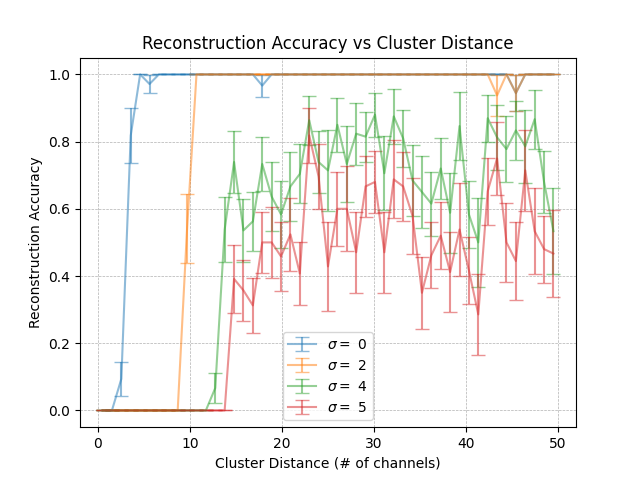

In [609]:
gauss  = np.array([0.0368311, 0.383789, 0.838272, 0.383789, 0.0368311], dtype=float)
plt.figure()

for i in [0.0001,2,4,5]:
    conv1 = create_gaussian_kernel(i, size=31)
    x1, y1, err1, _ = analyze_event_accuracy(multi_events, event_pairs, gauss, conv1, thres=lambda q: np.median(q) + 6*np.std(q[q <= np.percentile(q, 98)]))
    x1 = x1 / 0.4
    plt.errorbar(x1, y1, yerr=err1, label=f"$\\sigma =$ {round(i)}", fmt='-',alpha=0.5, markersize=5, capsize=5)
    
plt.legend()
plt.xlabel('Cluster Distance (# of channels)')
plt.ylabel('Reconstruction Accuracy')
plt.title('Reconstruction Accuracy vs Cluster Distance')
plt.grid(which='both', linestyle='--', linewidth=0.5)

false reconstruction: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

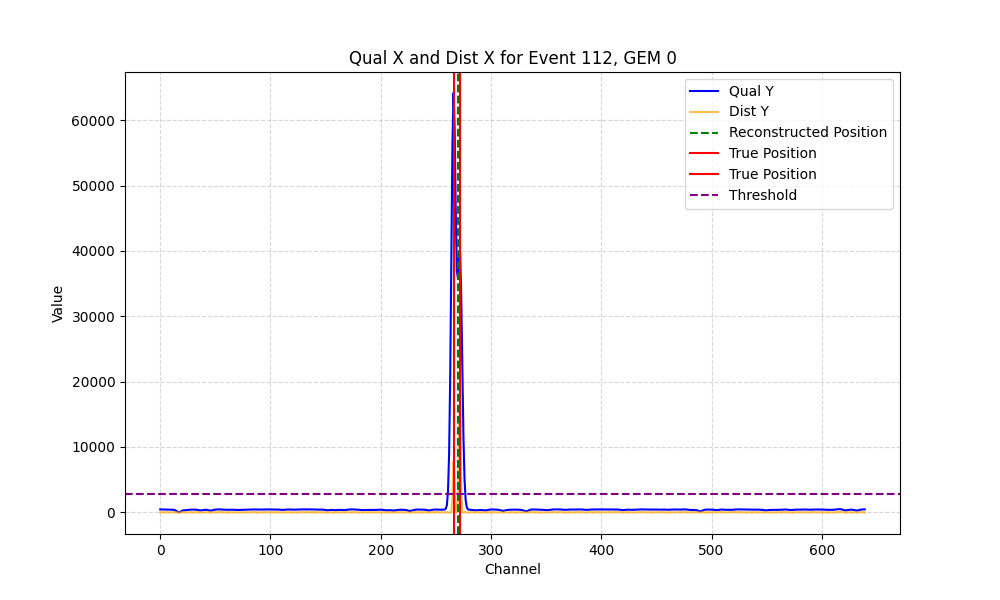

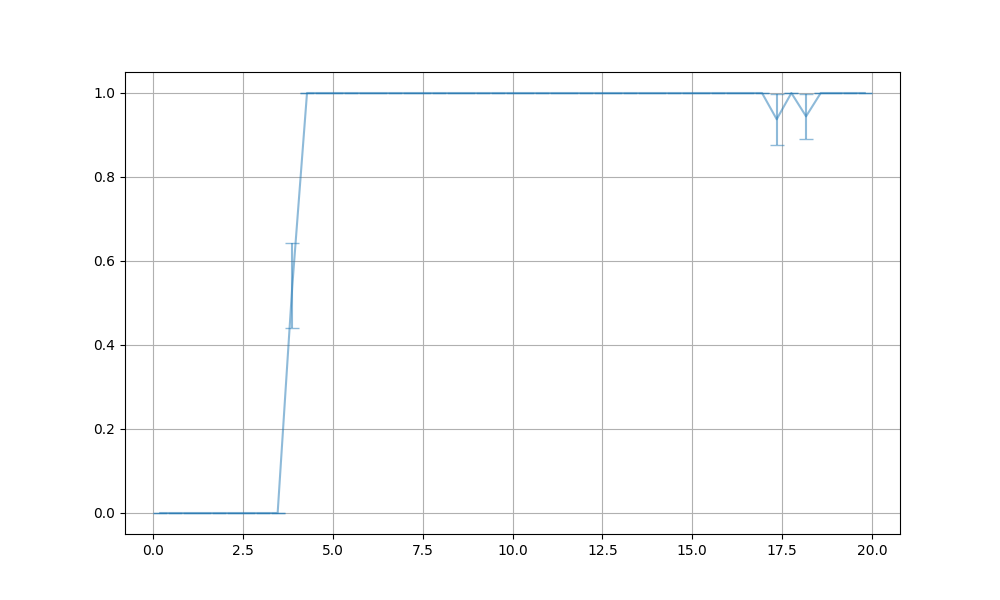

In [608]:
import matplotlib.pyplot as plt

conv1 = create_gaussian_kernel(2, size=31)
x,y,err, tb = analyze_event_accuracy(multi_events, event_pairs, gauss, conv1, thres=lambda q: 1*np.median(q) + 6*np.std(q[q <= np.percentile(q, 98)]))

tb_id = random.randint(0,len(tb)-1)  # Replace with the desired event ID

event_id, gem_num = tb[tb_id]
# event_id, gem_num = 115,3

qual_x = getattr(multi_events[event_id], f'GEM{gem_num}_qualy')
dist_x = getattr(multi_events[event_id], f'GEM{gem_num}_disty')

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=err, label='Reconstruction Accuracy', fmt='-', alpha=0.5, markersize=5, capsize=5)
plt.grid()

plt.figure(figsize=(10, 6))

plt.plot(qual_x, label='Qual Y', color='blue')
plt.plot(dist_x, label='Dist Y', color='orange', alpha=0.7)

# Plot reconstructed positions
reconstructed_clusters = getattr(multi_events[event_id], f'GEM{gem_num}_clusy')
for start, pos, end in reconstructed_clusters:
    plt.axvline(x=pos, color='green', linestyle='--', label='Reconstructed Position')

# Plot true position
true_position = np.array(getattr(multi_events[event_id], f'GEM{gem_num}_true'))[:,1]
test = np.array(getattr(multi_events[event_id], f'GEM{gem_num}_true'))
print(true_position)
print(test)

half_length = 124.8
len_per_chan = 0.390625
true_position = (-true_position + half_length) / len_per_chan
for trues in true_position:
    plt.axvline(x=trues, color='red', linestyle='-', label='True Position')

plt.axhline(y=1*np.median(qual_x) + 6*np.std(qual_x[qual_x <= np.percentile(qual_x, 98)]), color='purple', linestyle='--', label='Threshold')

# plt.xlim(400,600)

plt.title(f'Qual X and Dist X for Event {event_id}, GEM {gem_num}')
plt.xlabel('Channel')
plt.ylabel('Value')
# plt.yscale('log')
plt.legend()
plt.grid(which="both", linestyle='--', alpha=0.5)
plt.show()

# Look at multitrack X accuracy

In [624]:
def analyze_event_accuracy_xmulti(multi_events, event_pairs, gauss, conv2, thres):
    """
    Analyze the accuracy of reconstructed clusters compared to true positions.

    Parameters:
    multi_events (list): List of multi-event objects.
    event_pairs (list): List of event pairs.
    gauss (numpy.ndarray): Gaussian kernel for convolution.
    conv2 (numpy.ndarray): Secondary convolution kernel.
    thres (func/float): Threshold for cluster detection.

    Returns:
    tuple: bin_centers, average_accuracy, standard_error
    """
    upedge = 0
    for num, event in enumerate(multi_events):
        # print(num)
        for gem in range(4):
            for ax in ['x']:
                dist = np.array(getattr(event, f'GEM{gem}_dist{ax}'))
                if len(dist) < 1:
                    continue

                sumasq = np.convolve(dist**2, np.ones(len(gauss)), mode="valid")
                sumab = np.convolve(dist, gauss[::-1], mode="valid")

                chi_NH = sumasq
                chi_GH = sumasq - sumab**2
                quality = sumab * (chi_NH - chi_GH) / chi_GH
                quality = np.insert(np.insert(quality, 0, [0, 0]), len(quality), [0, 0])
                quality = np.convolve(quality, conv2, mode="same")
                quality -= quality.min()

                setattr(event, f'GEM{gem}_qual{ax}', quality)

    for event in multi_events:
        # print(event.ID)
        for gem in range(4):
            for ax in ['x']:
                qual = np.array(getattr(event, f'GEM{gem}_qual{ax}'))
                dist = np.array(getattr(event, f'GEM{gem}_dist{ax}'))
                if len(qual) < 1:continue
                setattr(event, f'GEM{gem}_clus{ax}', [])
                if type(thres) is not float: t = thres(qual)
                else: t = thres
                # print(t)
                # print(qual.max() > t)
                
                upedge = 0
                for i, v in enumerate(qual):
                    
                    if upedge == 0 and v > t:
                        # print(f"candidate")
                        upedge = i - 1

                    if upedge > 0 and v < t:
                        pos = 0.5 * (i + upedge)
                        start = upedge
                        end = i

                        weights = dist[start:end]
                        if len(weights) < 1 or weights.max() - np.median(dist) < 5*np.std(dist[dist < np.percentile(dist, 98)]):
                            upedge = 0
                            # print(f"aborted")
                            continue
                        weights -= weights.min()
                        weights = weights / weights.sum()

                        pos = np.average(np.arange(start, end), weights=weights)
                        getattr(event, f'GEM{gem}_clus{ax}').append((start, pos, end))
                        # print(f"Event {event.ID} GEM{gem} {ax} position {pos}")
                        upedge = 0

    distances = []
    accuracy = []
    trace_back = []

    for i, event in enumerate(multi_events):
        for gem in range(4):
            true_positions = np.array(getattr(event, f'GEM{gem}_true'))
            reconstructed_clusters = getattr(event, f'GEM{gem}_clusx')

            true_num = len(event_pairs[i])
            recon_num = len(reconstructed_clusters)
            distances.append(abs(true_positions[1][0] - true_positions[0][0]))
            accuracy.append(1 if recon_num == true_num else 0)
            if recon_num != true_num:
                trace_back.append([i, gem])


    print(f"false reconstruction: {accuracy}")
    print(f"traceback length: {len(trace_back)}")

    bins = np.linspace(0, 20, 50)
    digitized = np.digitize(distances, bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    average_accuracy = [np.mean([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]) for j in range(1, len(bins))]
    standard_error = [np.std([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]) /
                      np.sqrt(len([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]))
                      for j in range(1, len(bins))]

    return bin_centers, average_accuracy, standard_error, trace_back


false reconstruction: [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

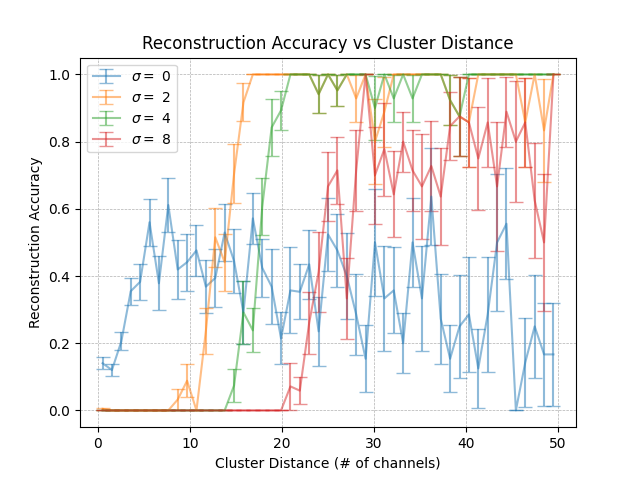

In [626]:
gauss  = np.array([0.0368311, 0.383789, 0.838272, 0.383789, 0.0368311], dtype=float)
plt.figure()

for i in [0.0001,2,4,8]:
    conv1 = create_gaussian_kernel(i, size=31)
    x1, y1, err1, _ = analyze_event_accuracy_xmulti(multi_events, event_pairs, gauss, conv1, thres=lambda q: np.median(q) + 6*np.std(q[q <= np.percentile(q, 98)]))
    x1 = x1 / 0.4
    plt.errorbar(x1, y1, yerr=err1, label=f"$\\sigma =$ {round(i)}", fmt='-',alpha=0.5, markersize=5, capsize=5)
    
plt.legend()
plt.xlabel('Cluster Distance (# of channels)')
plt.ylabel('Reconstruction Accuracy')
plt.title('Reconstruction Accuracy vs Cluster Distance')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Look at different covolution sizes for X

In [454]:
def analyze_event_accuracy_x(events, gauss, conv2, thres):
    """
    Analyze the accuracy of reconstructed clusters compared to true positions.

    Parameters:
    multi_events (list): List of multi-event objects.
    event_pairs (list): List of event pairs.
    gauss (numpy.ndarray): Gaussian kernel for convolution.
    conv2 (numpy.ndarray): Secondary convolution kernel.
    thres (func/float): Threshold for cluster detection.

    Returns:
    tuple: bin_centers, average_accuracy, standard_error
    """
    upedge = 0
    for num, event in enumerate(events):
        # print(num)
        for gem in range(4):
            for ax in ['x', 'y']:
                dist = np.array(getattr(event, f'GEM{gem}_dist{ax}'))
                if len(dist) < 1:
                    continue

                sumasq = np.convolve(dist**2, np.ones(len(gauss)), mode="valid")
                sumab = np.convolve(dist, gauss[::-1], mode="valid")

                chi_NH = sumasq
                chi_GH = sumasq - sumab**2
                quality = sumab * (chi_NH - chi_GH) / chi_GH
                quality = np.insert(np.insert(quality, 0, [0, 0]), len(quality), [0, 0])
                quality = np.convolve(quality, conv2, mode="same")
                quality -= quality.min()

                setattr(event, f'GEM{gem}_qual{ax}', quality)

    for event in events:
        print(event.ID)
        for gem in range(4):
            for ax in ['x', 'y']:
                qual = np.array(getattr(event, f'GEM{gem}_qual{ax}'))
                if len(qual) < 1:continue
                setattr(event, f'GEM{gem}_clus{ax}', [])
                if type(thres) is not float: t = thres(qual)
                else: t = thres
                # print(t)
                # print(qual.max() > t)
                
                upedge = 0
                for i, v in enumerate(qual):
                    
                    if upedge == 0 and v > t:
                        # print(f"candidate")
                        upedge = i - 1

                    if upedge > 0 and v < t:
                        pos = 0.5 * (i + upedge)
                        start = upedge
                        end = i

                        weights = qual[start:end]
                        if len(weights) < 1 or weights.max() < 1e2:
                            upedge = 0
                            # print(f"aborted")
                            continue
                        weights -= weights.min()
                        weights = weights / weights.sum()

                        pos = np.average(np.arange(start, end), weights=weights)
                        getattr(event, f'GEM{gem}_clus{ax}').append((start, pos, end))
                        # print(f"Event {event.ID} GEM{gem} {ax} position {pos}")
                        upedge = 0

    accuracy = []
    trace_back = []

    for i, event in enumerate(events):
        for gem in range(4):
            true_positions = np.array(getattr(event, f'GEM{gem}_true'))
            reconstructed_clusters = getattr(event, f'GEM{gem}_clusx')

            true_num = len(event_pairs[i])
            recon_num = len(reconstructed_clusters)
            accuracy.append(1 if recon_num == 1 else 0)
            if recon_num != 1:
                trace_back.append([i, gem])


    print(f"false reconstruction: {accuracy}")
    print(f"traceback length: {len(trace_back)}")

    return np.array(accuracy), trace_back


In [401]:

events[175].GEM1_disty

array([-5.38206391e+01,  1.23552677e+01, -1.72632408e+01, -2.69176674e+01,
       -9.65547622e+00, -6.06441614e+01, -3.43415891e+00, -2.43809208e+01,
       -2.22250454e+01, -4.69005142e+01, -3.90030005e+01, -4.73931709e+01,
       -1.56581087e+01, -5.79969084e+00, -2.58573103e+01, -5.34239880e+01,
       -3.22494591e+01, -3.24626239e+01, -1.02420146e+01, -6.33812568e+01,
       -7.75847894e+00, -9.30867522e+01, -2.72522147e+01, -1.94064790e+01,
       -3.98092072e+01, -3.29258526e+01,  1.72779762e+01, -2.73139420e+01,
       -5.92472091e+00,  1.14623096e+01, -2.14964367e+01, -6.56291980e+00,
       -7.05089088e-01, -5.30740453e+00, -5.41909584e+01, -4.50502191e+01,
       -7.04136382e+01, -5.95907683e+01, -4.22075226e+01,  1.39472228e+01,
       -4.57876082e+01, -4.87019139e+01, -5.59940133e+01, -1.38415939e+01,
       -1.40493552e+01, -2.39513719e+01,  9.57486335e+00, -2.03031983e+01,
       -6.41339518e+01,  7.62063603e-01, -5.70391607e+01, -5.08980942e+01,
       -1.88268662e+01, -

424
947
208
49
383
348
86
962
931
298
400
6
909
286
214
760
500
52
481
756
658
553
480
538
417
580
697
589
76
740
344
990
689
294
703
855
103
450
232
956
504
822
260
131
28
683
95
723
951
745
545
756
103
265
400
266
757
75
25
775
434
574
984
368
530
825
810
26
166
212
205
33
355
408
187
802
473
591
922
312
303
751
42
982
622
482
84
218
815
302
20
495
378
597
675
668
652
539
579
954
551
64
78
88
50
602
238
475
696
262
300
154
738
94
133
749
979
462
299
897
140
188
681
150
57
218
379
343
936
457
677
942
667
226
679
626
516
94
743
970
879
817
746
321
420
564
564
259
399
712
932
388
664
385
206
680
620
697
156
356
823
185
290
712
395
190
815
619
453
146
351
838
522
8
653
685
477
995
332
955
479
284
610
102
415
178
17
597
475
165
446
186
765
822
256
98
135
666
648
697
917
104
940
817
929
143
260
574
906
506
984
553
516
782
335
481
305
139
606
489
778
980
822
174
255
847
403
605
416
193
662
637
17
469
930
285
507
448
654
418
757
470
366
469
331
650
123
224
161
146
80
633
226
303
374
847
825


/var/folders/p4/z5pfwnjs7x7d9zcwks7kn0j80000gn/T/ipykernel_78814/3609712431.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


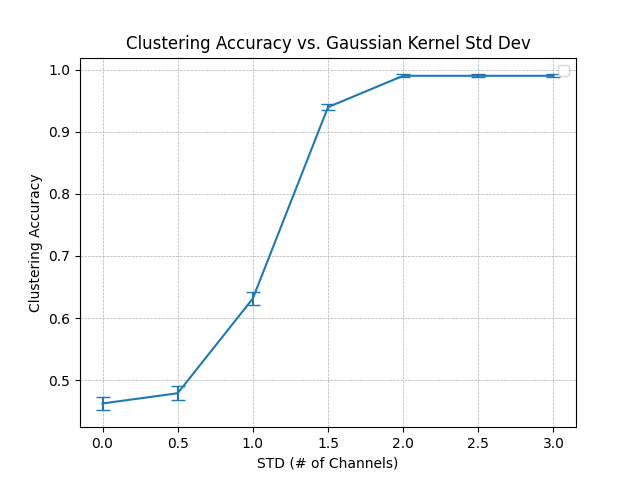

In [551]:
select_few = [events[random.randint(0, len(events) - 1)] for _ in range(500)]


gauss  = np.array([0.0368311, 0.383789, 0.838272, 0.383789, 0.0368311], dtype=float)
plt.figure()

ys = []
errs = []

stds = [0.000001,0.5,1,1.5,2,2.5,3]

for i in stds:
    conv1 = create_gaussian_kernel(i, size=31)
    y, e = analyze_event_accuracy_x(select_few, gauss, conv1, thres=lambda q: 1*np.median(q) + 6*np.std(q[q <= np.percentile(q, 98)]))
    ys.append(y.mean())
    errs.append(y.std() / np.sqrt(len(y)))

plt.errorbar(stds, ys, yerr=errs, fmt='-', markersize=5, capsize=5)
plt.title('Clustering Accuracy vs. Gaussian Kernel Std Dev')
plt.ylabel('Clustering Accuracy')
plt.xlabel('STD (# of Channels)')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)

424
947
208
49
383
348
86
962
931
298
400
6
909
286
214
760
500
52
481
756
658
553
480
538
417
580
697
589
76
740
344
990
689
294
703
855
103
450
232
956
504
822
260
131
28
683
95
723
951
745
545
756
103
265
400
266
757
75
25
775
434
574
984
368
530
825
810
26
166
212
205
33
355
408
187
802
473
591
922
312
303
751
42
982
622
482
84
218
815
302
20
495
378
597
675
668
652
539
579
954
551
64
78
88
50
602
238
475
696
262
300
154
738
94
133
749
979
462
299
897
140
188
681
150
57
218
379
343
936
457
677
942
667
226
679
626
516
94
743
970
879
817
746
321
420
564
564
259
399
712
932
388
664
385
206
680
620
697
156
356
823
185
290
712
395
190
815
619
453
146
351
838
522
8
653
685
477
995
332
955
479
284
610
102
415
178
17
597
475
165
446
186
765
822
256
98
135
666
648
697
917
104
940
817
929
143
260
574
906
506
984
553
516
782
335
481
305
139
606
489
778
980
822
174
255
847
403
605
416
193
662
637
17
469
930
285
507
448
654
418
757
470
366
469
331
650
123
224
161
146
80
633
226
303
374
847
825


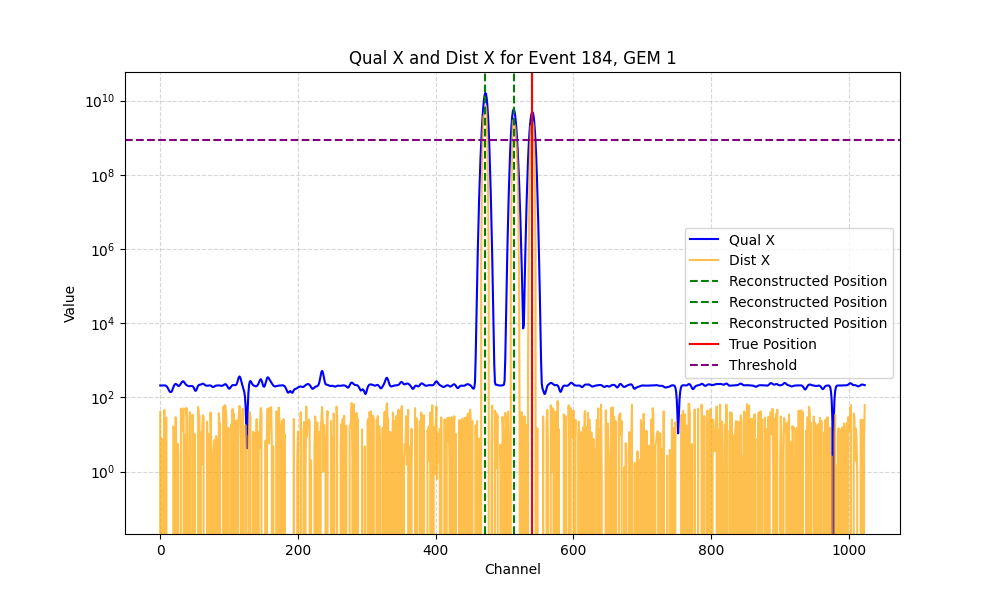

In [611]:
import matplotlib.pyplot as plt

conv1 = create_gaussian_kernel(2, size=31)
_, tb = analyze_event_accuracy_x(select_few, gauss, conv1, thres=lambda q: 1*np.median(q) + 6*np.std(q[q <= np.percentile(q, 98)]))

tb_id = random.randint(0,len(tb)-1)  # Replace with the desired event ID

event_id, gem_num = tb[tb_id]

qual_x = getattr(select_few[event_id], f'GEM{gem_num}_qualx')
dist_x = getattr(select_few[event_id], f'GEM{gem_num}_distx')

plt.figure(figsize=(10, 6))

plt.plot(qual_x, label='Qual X', color='blue')
plt.plot(dist_x, label='Dist X', color='orange', alpha=0.7)

# Plot reconstructed positions
reconstructed_clusters = getattr(select_few[event_id], f'GEM{gem_num}_clusx')
for start, pos, end in reconstructed_clusters:
    plt.axvline(x=pos, color='green', linestyle='--', label='Reconstructed Position')

# Plot true position
true_position = getattr(select_few[event_id], f'GEM{gem_num}_true')[0]
half_length = 199.8
len_per_chan = 0.390625
true_position = (-true_position + half_length) / len_per_chan
plt.axvline(x=true_position, color='red', linestyle='-', label='True Position')

plt.axhline(y=1*np.median(qual_x) + 3*np.std(qual_x[qual_x <= np.percentile(qual_x, 98.5)]), color='purple', linestyle='--', label='Threshold')

# plt.xlim(400,600)

plt.title(f'Qual X and Dist X for Event {event_id}, GEM {gem_num}')
plt.xlabel('Channel')
plt.ylabel('Value')
plt.yscale('log')
plt.legend()
plt.grid(which="both", linestyle='--', alpha=0.5)
plt.show()

# Look at changing STD and Median

false reconstruction: [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

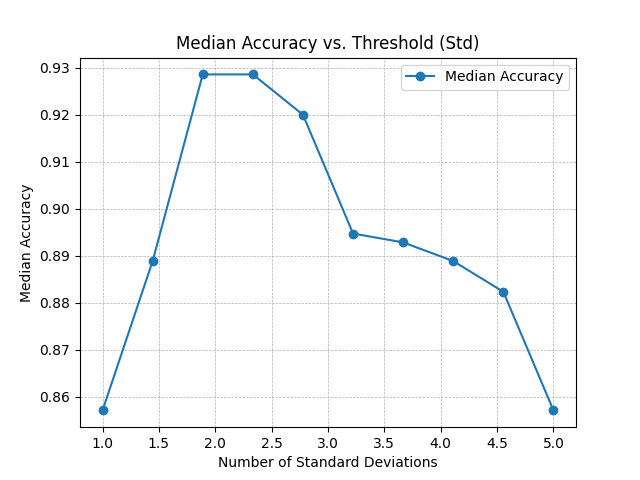

In [529]:
std_values = np.linspace(1, 5, 10)  # Vary the number of standard deviations
gauss = np.array([0.0368311, 0.383789, 0.838272, 0.383789, 0.0368311], dtype=float)
conv1 = create_gaussian_kernel(2, size=31)  # Example convolution kernel

median_accuracies = []

for std in std_values:
    _, y1, _, _ = analyze_event_accuracy(
        multi_events, 
        event_pairs, 
        gauss, 
        conv1, 
        thres=lambda q: np.median(q) + std * np.std(q[q <= np.percentile(q, 99)])
    )
    median_accuracies.append(np.median(y1))

plt.figure()
plt.plot(std_values, median_accuracies, marker='o', label='Median Accuracy')
plt.xlabel('Number of Standard Deviations')
plt.ylabel('Median Accuracy')
plt.title('Median Accuracy vs. Threshold (Std)')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

false reconstruction: [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,

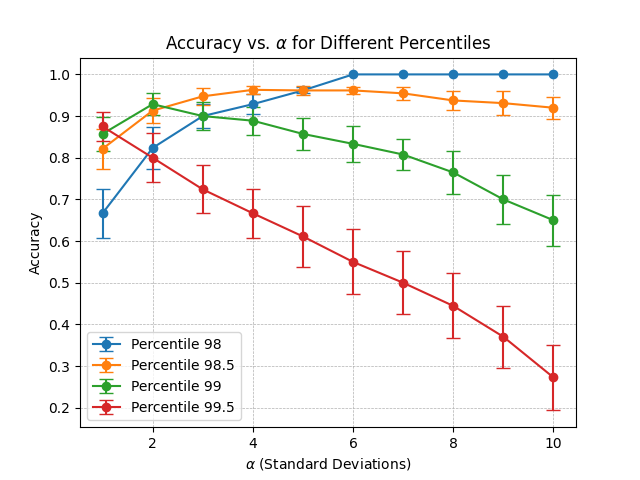

In [540]:
std_values = np.linspace(1, 10, 10)  # Vary the number of standard deviations
percentiles = [98,98.5,99,99.5]
gauss = np.array([0.0368311, 0.383789, 0.838272, 0.383789, 0.0368311], dtype=float)
conv1 = create_gaussian_kernel(2, size=31)  # Example convolution kernel
plt.figure()
for p in percentiles:
    median_accuracies = []
    median_errs = []
    for std in std_values:
        _, y1, _, _ = analyze_event_accuracy(
            multi_events, 
            event_pairs, 
            gauss, 
            conv1, 
            thres=lambda q: np.median(q) + std * np.std(q[q <= np.percentile(q, p)])
        )
        y1 = np.array(y1)
        median_accuracies.append(np.median(y1))
        median_errs.append(np.std(y1[y1 > np.percentile(y1, 50)]))

    plt.errorbar(std_values, median_accuracies, yerr=median_errs, marker='o', capsize=5, label=f'Percentile {p}')

plt.title('Accuracy vs. $\\alpha$ for Different Percentiles')
plt.xlabel('$\\alpha$ (Standard Deviations)')
plt.ylabel('Accuracy')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [362]:
conv1 = create_gaussian_kernel(1.5, size=31)
x1, y1, err1, t_back = analyze_event_accuracy(multi_events, event_pairs, gauss, conv1, thres=lambda q: 3*np.median(q) + 3*np.std(q[q <= np.percentile(q, 80)]))
print(t_back)


false reconstruction: [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

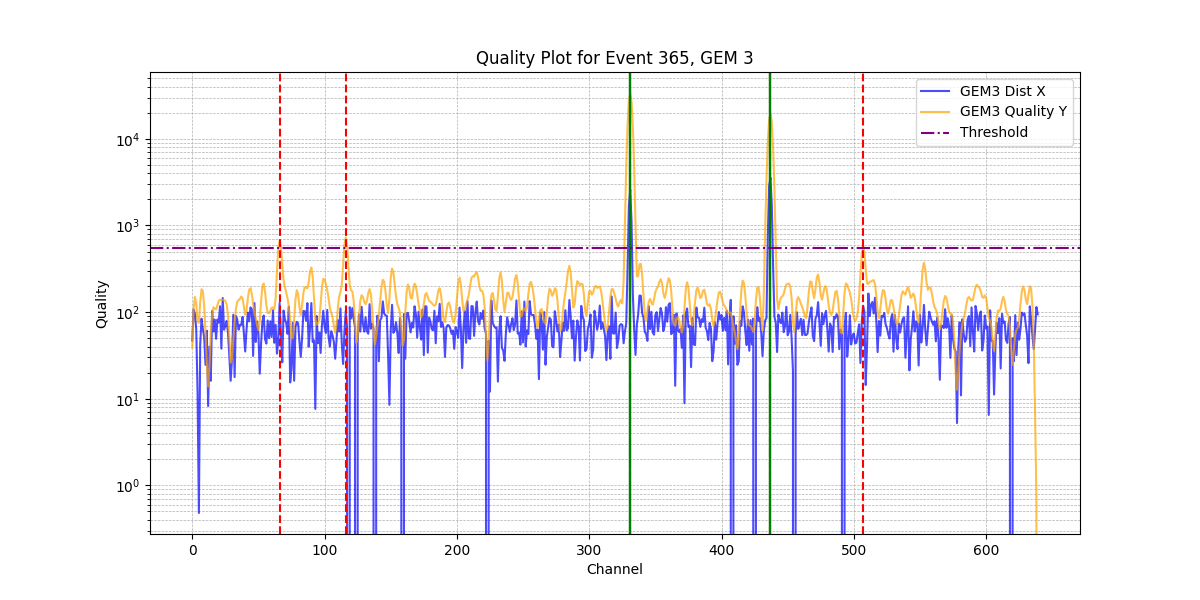

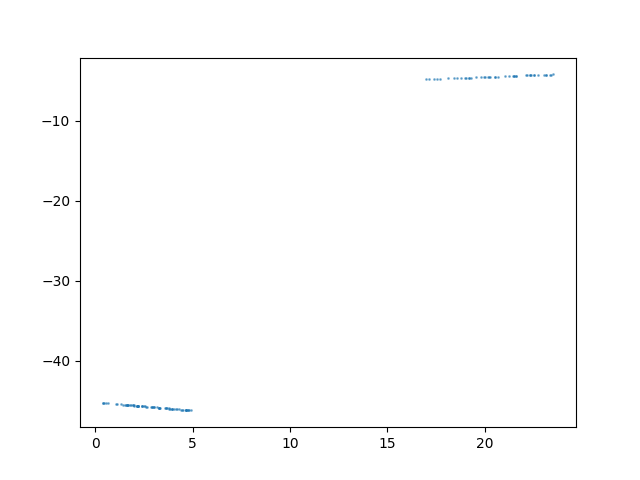

In [363]:
# Select the first event and GEM from t_back for demonstration
event_index, gem_index = t_back[random.randint(0, len(t_back) - 1)]

# event_index = 59
# gem_index = 1

# Extract the quality data for x and y
dist_y = getattr(multi_events[event_index], f'GEM{gem_index}_disty')
qual_y = getattr(multi_events[event_index], f'GEM{gem_index}_qualy')

# Plot the quality data
plt.figure(figsize=(12, 6))
plt.plot(dist_y, label=f'GEM{gem_index} Dist X', color='blue', alpha=0.7)
plt.plot(qual_y, label=f'GEM{gem_index} Quality Y', color='orange', alpha=0.7)
# Plot reconstructed cluster positions
for cluster in getattr(multi_events[event_index], f'GEM{gem_index}_clusy'):
    _, pos, _ = cluster
    plt.axvline(pos, color='red', linestyle='--',)
    # Plot actual coordinates converted to channel numbers
    true_positions = getattr(multi_events[event_index], f'GEM{gem_index}_true')
    for true_pos in true_positions:
        channel_pos = (-true_pos[1] + 124.8) / 0.390625  # Convert y-coordinate to channel
        plt.axvline(channel_pos, color='green', linestyle='-', )
# Draw and label the threshold line
threshold = 3*np.median(qual_y) + 3 * np.std(qual_y[qual_y <= np.percentile(qual_y, 80)])
plt.axhline(threshold, color='purple', linestyle='-.', label='Threshold')

plt.yscale('log')
plt.title(f'Quality Plot for Event {event_index}, GEM {gem_index}')
plt.xlabel('Channel')
plt.ylabel('Quality')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

plt.figure()
plt.plot(getattr(multi_events[event_index], f'GEM{gem_index}_hitsx'), getattr(multi_events[event_index], f'GEM{gem_index}_hitsy'), 'o', markersize=1, alpha=0.5, label='Hits')

In [85]:

conv2 = create_gaussian_kernel(1.5)

# conv2 = np.array([1])


for event in multi_events:
    # print(event.ID)
    for gem in range(4):
        # print(gem)
        for ax in ['x', 'y']:
            exec(f"dist = np.array(event.GEM{gem}_dist{ax})")
            # Convolution of values² with a 5-box window for sumasq
            if len(dist) < 1: continue

            sumasq = np.convolve(dist**2, np.ones(len(gauss)), mode="valid")   
            # Convolution of values with gauss kernel for sumab
            sumab  = np.convolve(dist, gauss[::-1], mode="valid")    

            # chi terms
            chi_NH = sumasq
            chi_GH = sumasq - sumab**2
            quality = sumab * (chi_NH - chi_GH) / chi_GH                   # vectorised
            quality = np.insert(np.insert(quality, 0, [0, 0]),             # pad to full length
                                len(quality), [0, 0])
            
            quality = np.convolve(quality, conv2, mode="same")

            exec(f"event.GEM{gem}_qual{ax} = quality")

In [86]:
thres = 1000
upedge = 0
for event in multi_events:
    # print(event.ID)
    for gem in range(4):
        # print(gem)
        for ax in ['x', 'y']:
            qual = []
            exec(f"event.GEM{gem}_clus{ax} = []")
            exec(f"qual = np.array(event.GEM{gem}_qual{ax})")
            # qual = qual - qual.min()
            # thres = np.median(qual) + qual.std()*2000
            # print(thres)

            for i, v in enumerate(qual):

                if upedge == 0 and v > thres:
                    upedge = i - 1

                if upedge > 0 and v < thres:
                    # print('edge_detected')
                    pos = 0.5 * (i + upedge)
                    start = upedge
                    end = i

                    weights = qual[start:end]
                    if len(weights)<1 or weights.max() < 1e2:
                        upedge = 0
                        continue
                    if len(weights) <1: continue
                    weights -= weights.min()
                    weights = weights / weights.sum()


                    pos = np.average(np.arange(start, end), weights=weights)


                    exec(f"event.GEM{gem}_clus{ax}.append((start, pos, end))")
                    upedge = 0

# do comparison

In [87]:
import matplotlib.pyplot as plt

distances = []
accuracy = []
trace_back = []

for i, event in enumerate(multi_events):
    for gem in range(4):
        true_positions = np.array(getattr(event, f'GEM{gem}_true'))
        reconstructed_clusters = getattr(event, f'GEM{gem}_clusy')
        
        
        true_num = len(event_pairs[i]) 
        recon_num = len(reconstructed_clusters)
        distances.append(abs(true_positions[1][1] - true_positions[0][1]))
        accuracy.append(1 if recon_num == true_num else 0)
        if accuracy[-1] == 0: trace_back.append([i, gem])
        print(true_num, recon_num)

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 3
2 4
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 4
2 3
2 2
2 2
2 2
2 2
2 2
2 3
2 3
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 1
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 3
2 3
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 3
2 3
2 2
2 2
2 3
2 2
2 2
2 2
2 4
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 1
2 2
2 1
2 1
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 4
2 2
2 2
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 3
2 2
2 2
2 2
2 2
2 1
2 1
2 1
2 1
2 2
2 2


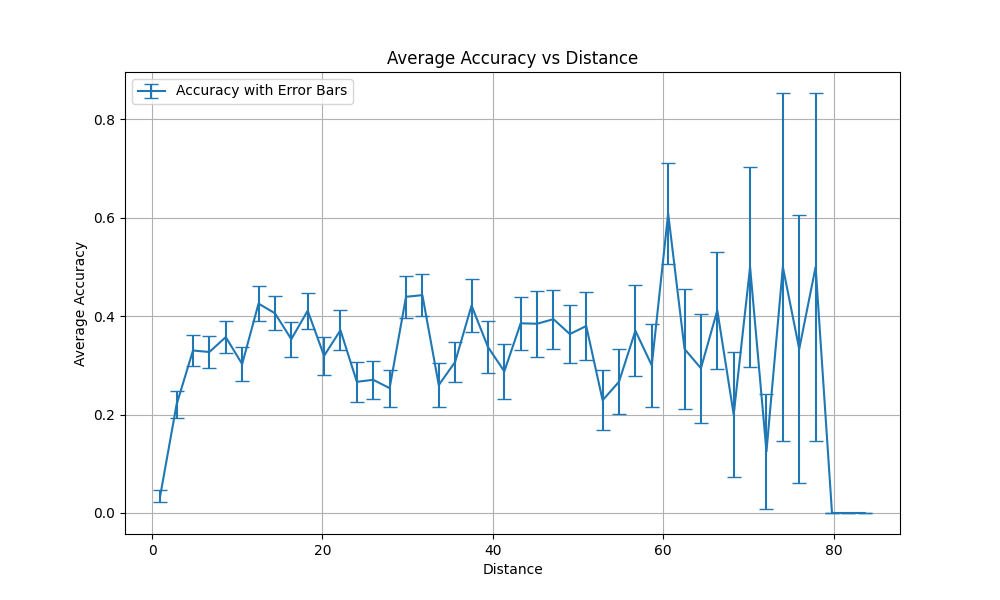

In [88]:
import numpy as np

import matplotlib.pyplot as plt

# Group distances into bins and calculate average accuracy for each bin
bins = np.linspace(min(distances), max(distances), 50)  # Adjust the number of bins as needed
digitized = np.digitize(distances, bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
average_accuracy = [np.mean([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]) for j in range(1, len(bins))]

# Plot the results
plt.figure(figsize=(10, 6))
# Calculate standard error for each bin
standard_error = [np.std([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j]) / 
                  np.sqrt(len([accuracy[i] for i in range(len(accuracy)) if digitized[i] == j])) 
                  for j in range(1, len(bins))]

plt.errorbar(bin_centers, average_accuracy, yerr=standard_error, fmt='-',markersize=5, capsize=5, label='Accuracy with Error Bars')
plt.axhline(y = np.median(average_accuracy))
plt.xlabel('Distance')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs Distance')

plt.legend()
plt.grid()
plt.show()

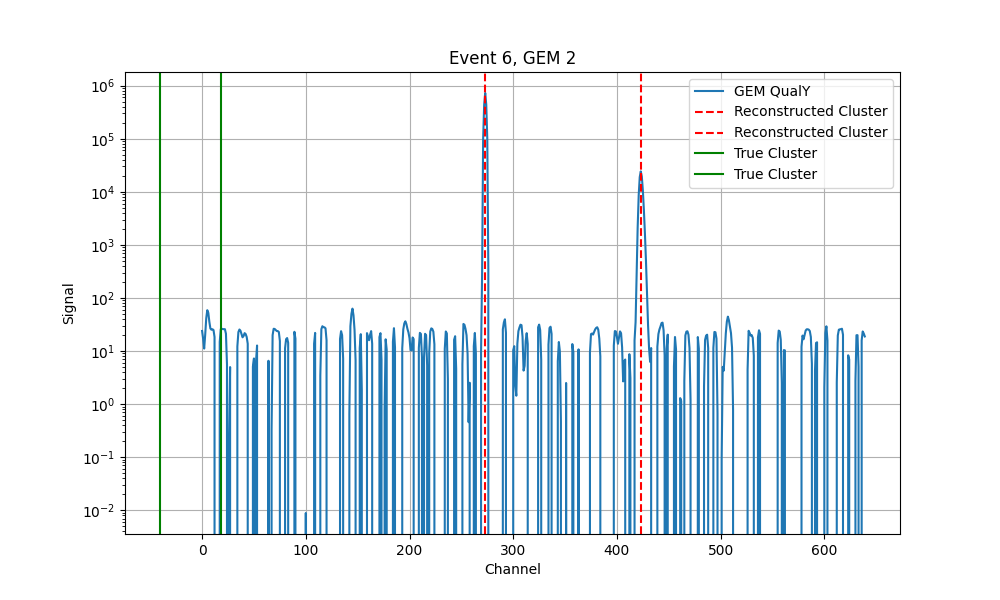

In [42]:
# Find an event with a GEM that has a distance > 20 and is predicted incorrectly
# for i, (event_index, gem_index) in enumerate(trace_back):
#     if distances[i] > 25 and distances[i] < 30 and accuracy[i] == 0:
#         print(f"Found event {event_index} with GEM {gem_index} having distance {distances[i]} and incorrect prediction.")
#         print(f"Predicted clusters: {len(multi_events[event_index].GEM3_clusy)}")
#         print(f"True clusters: {len(event_pairs[event_index])}")
#         event = multi_events[event_index]
#         gem = gem_index
#         break
# else:
#     print("No such event found.")
#     event = None
event_index, gem_index = trace_back[4]
event = multi_events[event_index]

# Plot the corresponding GEM if found
if event:
    m = np.median(getattr(event, f"GEM{gem}_qualy"))
    plt.figure(figsize=(10, 6))
    plt.plot(getattr(event, f"GEM{gem}_qualy") - m, label="GEM QualY")
    # plt.plot(getattr(event, f"GEM{gem}_disty"), label="GEM DistY")
    for start, pos, end in getattr(event, f"GEM{gem}_clusy"):
        plt.axvline(x=pos, color='r', linestyle='--', label="Reconstructed Cluster")
    for true_pos in getattr(event, f"GEM{gem}_true"):
        plt.axvline(x=true_pos[1], color='g', linestyle='-', label="True Cluster")
    plt.xlabel("Channel")
    plt.ylabel("Signal")
    plt.title(f"Event {event_index}, GEM {gem_index}")
    plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.show()




In [32]:
wrong_predictions = [i for i, acc in enumerate(accuracy) if acc == 0]
wrong_predictions_with_gem = [(trace_back[i][0], trace_back[i][1]) for i in wrong_predictions]
print("Event and GEM indices with wrong predictions:", wrong_predictions_with_gem)
print("Indices with wrong predictions:", wrong_predictions)

IndexError: list index out of range

# Simulate All the Distributions

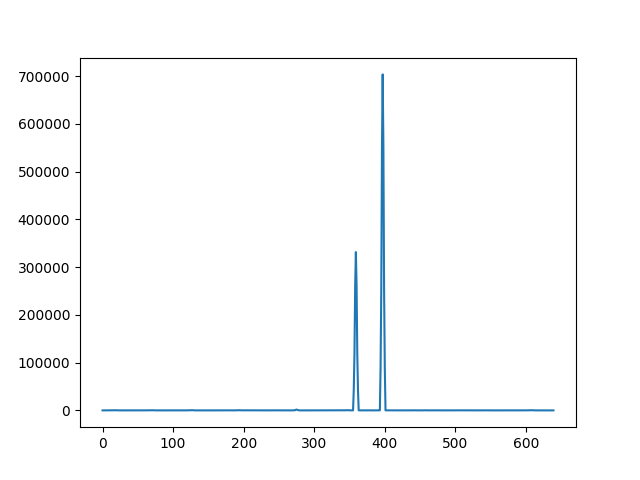

In [118]:
plt.figure()
plt.plot(multi_events[3].GEM0_qualy)

In [104]:
multi_events[0].GEM3_true

[array([-5.80868809, 25.95488834, 24.9       ]),
 array([ 5.66058302, -0.75975045, 24.9       ])]

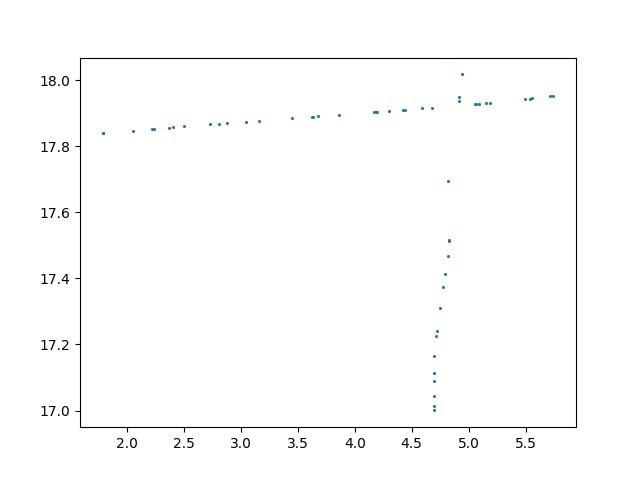

In [123]:
plt.figure()
plt.plot(multi_events[124].GEM1_hitsx, multi_events[123].GEM1_hitsy, 'o', markersize=1, label='Hits')